Bryan Jay - 260738764

## 2 - Stereo Vision

##### Q2.1 Depth Estimation from Stereo Images

In [122]:
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt

def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

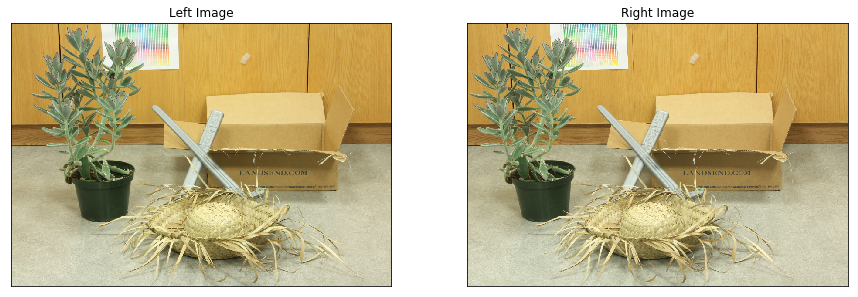

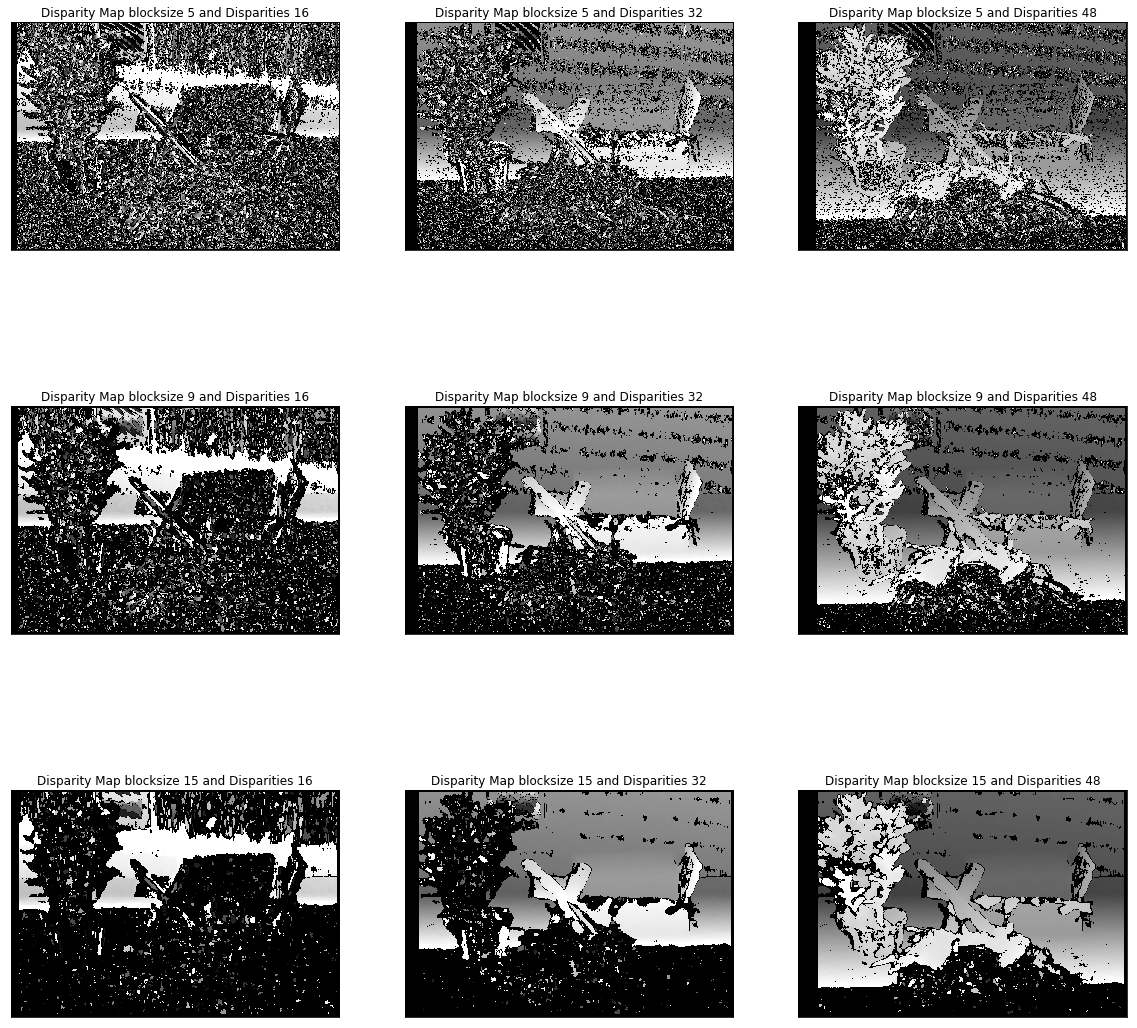

In [123]:
import cv2

# load left and right images 
imgL = cv2.imread('swords0.png')
imgR = cv2.imread('swords1.png')

# resize images to process quicker
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)

imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)

# put all the disparities and block size possibilities into a list
points = [(5, 16), (5, 32), (5, 48), (9, 16), (9, 32), (9, 48), (15, 16), (15, 32), (15, 48)]

disparity = list()
# compute disparity map for the 9 diagrams
for point in points:
    stereo = cv2.StereoBM_create(numDisparities=point[1], blockSize=point[0])
    disparity.append(stereo.compute(imgL_gray, imgR_gray))
    
# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB))
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB))
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(20,20))data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA1oAAAEpCAYAAACKi1PYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXvwLdl11/dZa+/dfc7vcZ8zdzQz0kgavf2QH2BkV2wwChZIlisOJjbPGIoEkwpFVUghAoljk2AbgylSQChIAsYGB4hjYUuAsGTwK7YlXhJIGiHrNdJoRvO4r9/9Pc7p7r3Xyh+rf7+5ki15JI8sj+hv1a17fuf06d69e++91vqu79pH3J0FCxYsWLBgwYIFCxYsWPD0QT/XDViwYMGCBQsWLFiwYMGCzzcsgdaCBQsWLFiwYMGCBQsWPM1YAq0FCxYsWLBgwYIFCxYseJqxBFoLFixYsGDBggULFixY8DRjCbQWLFiwYMGCBQsWLFiw4GnGEmgtWLBgwYIFCxYsWLBgwdOMJdBa8HkNEXmJiLxdRA5F5I9/rtuzYMGCBQsWfDYhIn9DRL79KR77d0Tkz32227RgwX+sWAKtBc8IiMiDIvLbPoOvvg74KXffd/e/8lSMioi4iLzwM2vpggULFixY8NnDbA83InIkIo/Odm3v9HN3/6Pu/r8+Tdf6lPZQRP6giPx/T8e1Fiz4fMQSaC34fMdzgXd/rhuxYMGCBQsWPI34BnffA74U+DLgT3+O27NgwYJfBkugteAZDxF5rYi8Q0RuisjPi8jL5/f/BfBbgb82M39/BPh9wOvmv9/4FM79nSLywyLy92b54TtF5MUi8qdF5HEReUhEXnXb8X9IRN4zH/tBEfm2Tzjf60TkYyLyiIj8V7ezhSLSi8j3ichHROSxWf6xfjr7asGCBQsWfP7A3R8FfpwIuIBfKgf8VHZnxkUR+Sez3XqbiLxg/t7PzJ//u9lmfsuv1J452/YnReTfi8ixiPwtEblLRN40n/8nROTibcf/8JyVOxCRnxGRL7zts8si8kYRuSUi/0pE/tzt2TMReamIvEVErovIe0Xkmz+TPlyw4LOJJdBa8IyGiHw58LeBbwMuA38TeIOI9O7+SuBngT/m7nvu/n8APwT8hfnvb3iKl/kG4O8CF4G3E0ZNgXuB/2W+5ikeB14LnAP+EPCX5zYiIr8D+BPAbwNeCPyWT7jO9wIvJgzmC+fz/89PsY0LFixYsOA/MojIs4FXA+//JJ//SnYH4PcAf5awce8HvgvA3X/z/PmXzDbzHz7FZn0T8HWEPfsG4E3AnwHuIGzn7fXSbwJeBFwB/i1ho0/xvwPHwLOAb53/nd7XLvAW4P+ev/t7gL9+e6C2YMGvByyB1oJnOv5r4G+6+9vcvbn7DwAD8JVP4zV+1t1/3N0r8MPAncCfd/cJ+AfA80TkAoC7/xN3/4AHfhp4M/A183m+Gfh+d3+3u58Qhg0AEZH5Xv47d7/u7ofAdwO/+2m8jwULFixY8PmBHxWRQ+AhguD7jk9y3Ce1O7fh9e7+L2cb90Pclh37DPFX3f0xd3+YIDvf5u5vd/cB+EeE1BEAd//b7n44f/adwJeIyHkRSUTA9h3ufuLuDwA/cNs1Xgs86O7f7+7V3f8t8CPA7/pVtn3BgqcVS6C14JmO5wL//SwbvCkiN4HnAPc8jdd47LbXG+Cqu7fb/gbYAxCRV4vIW2cpw03gNQSLx9ymh2471+2v7wR2gH9z2338s/n9BQsWLFiw4HZ8o7vvA18LvJQn7cwn4lPZnVM8etvrE2Z79qvAJ9rMT/z71F4mEfnzIvIBEbkFPDgfcwdh+zKfvO3PBV7xCbb/9xHZrwULft0gf64bsGDBrxIPAd/l7t/1FI/3z1ZDRKQnGLX/Evgxd59E5EcBmQ/5GPDs277ynNteXyUM0BfOLOCCBQsWLFjwKeHuPy0ifwf4PuAbf5lDPpXd+Vzj9wL/GSFrfBA4D9wgbOYTQCXa/ovz8be3/SHgp939636tGrtgwWeCJaO14JmEIiKr2/5l4P8E/qiIvEICuyLy9SKy/0nO8Rhw/2epfR3QMxsIEXk18KrbPv9/gD8kIi8TkR1uq79ydyPu5S+LyBUAEblXRH77Z6mtCxYsWLDg8wP/G/B1IvLLSf4+qd15ivhs2sx9Qup/jVB0fPfpB7Nq5PXAd4rIjoi8lCAxT/GPgReLyB8QkTL/+woRedlnqa0LFnxGWAKtBc8k/FMi63P67zvd/V8TtU1/jWDC3g/8wU9xjr8FfMEsNfjRp7Nxc13VHycM2w2CrXvDbZ+/CfgrwE/O7fyF+aNh/v9Pze+/dZZR/ATwkqezjQsWLFiw4PML7v4E8IPAL/mR4qdgd34lfCfwA7PNfLp39ftB4MPAw8ADwFs/4fM/RmS5HiU2pPr7zO2e7e2riDrmR+ZjvpcgOxcs+HUDcf+sKakWLFjwKTAzb+8C+rkIecGCBQsWLPis4Zlsd0Tke4Fnufu3/ooHL1jw6wRLRmvBgl9DiMh/LiLd/Dsi3wu88Zlm7BYsWLBgwTMHz1S7M/9O1svnsoDfBPxhYtfCBQueMVgCrQULfm3xbUQN1weABvw3n9vmLFiwYMGCz3M8U+3OPlGndUxI8v8S8GOf0xYtWPBpYpEOLliwYMGCBQsWLFiwYMHTjCWjtWDBggULFixYsGDBggVPM5ZAa8GCBQsWLFiwYMGCBQueZnxaP1h8Yb/zuy+vERXMDEFxccTjV2DjV1nnV+6IKsjpb7U67o6bx4EOqvLxF5iPPfuGOyKKY/P7cnpqRMDN4l0VcIifIhIQQU7PJTBNjYcePeL+51zA3eMET7bq486Bz+8IiEi0AcW9IarxGnuyDWe3Ywhp/l/OzhHHSbyeu8fN57/jfmRuqJsjmujP3Yv5J/TNx/3O7pN9ejwcs9vvUa1y8/gWCFzev8jVW9e54/wlDo+PUE2AcDhuubJ3nseODrlzdw80cf14y517a5443LLfKSejsRkb917a4eFrG+65uGIy5+bRljvO7fLErS0XdhLHg7MqsLPqePTmlmed7xmqczKM7O/0HGwnzvfK4djYK0opmZubEy6s1mymAXdDk1JbY6d0HEwnnC87iAo3Nre4tD7PtaMD7ty9yDRVSpfB5ba+mJ+Tx6t69AhuDRA8epajoxN2d1aICjI/D/PToTZ3vMuTY9QdUaHVhibldDQ68VzcKiK3cxPycc8lxmuMGU5HgcQxbsQYOz2nNdzttvPFOEN8Hh8yjxeP64ucjbUnx/cvvf5pq8wtnrt7zNXTe5zbE+eV+Xx6NhdUwObrn96DuaOimBugCBbj1Q2cj79nFdwMSRlrDdVoa5xTwdt8PZ+n4bxeRKPn+R3PTzTNfSRnc515Xj55z6e94HiLYz7y6CHPu/fcWf89ed9xbndIc/+e9oKL8ORZnzx5zGGZ52fcj+NYczRlrFU0pSf7dL4nEcVFUBGsGcj83rz+aC7Rf2aYOaoa/a+K1TaPlTifqJ6tS6fPl7lPYpycPnc5u79YW0/HWXS5++k9zc9pHp5CPB8EVBPNGqrKI48fc+Nw/CXdsuCXx4W9zu+5cz0/z9vm21nnPzn3wn5xNi5ijs5j3iyevxmIns1/cWCeX3Y6R+a5xG2j92w+CogkRJzHHz/gaNO4/75LmNnZGhmDJdYJVcXmNVRnG68pxTyxhkoKOyhh584MGgmnna0lbjbPEz3rgsA8P+a5duoPxHjU+XQG5RLdzv7Z0hZ3d9rij7/XzfaI0q0oKXNwfIPze5e4eXyTkjqaOXhlZ7XLtcObXNw9R86FR649wbPvuIuHbt3iUtdxOFZ2c2JvveLD146479IuD10/pljlyuULPHrtFpf2e64fVc6vE3u7Kx65vuWu84VHD0YyjTsu7vPEzWPO7yQON8b5ncytsWHu3Lnbc/1kwypBKR1DHdnteo7ayG4ubOqA09jv9rk23KL3RHWD2lBNrFNP13cf7wKcIcbT0c2r9Gn75BxXPbMHzGuozGtrm8eniKDz+HIzUEVnPyQMgZ/ZrBiTCihu7bbndbpGzva1VTR187Xn9enMbjg+H+wIMo8lZl/u1ObYvP6c+n9mLa6T0pO24PaLup/Z3lM7ebYGm+HeUC1nPlx8P9Z1EZ/HM7etlXM/4B/X5+Y2W8zbnL/T+/+4+Rf3ZPM8mL981l+awq75WfufHOWnfslpf4fdO7V5p97q7DOIh236OL8DPvjQAfc/5wLMfjOzjxT2x6JvzZ+8PxFEdJ6n8zkFOF0nRM9stpzZ7fie1YrmfHqR23yaM8t6tibE/TRwQUvGW4uume0fbpBm+3fqnjH7y3q6lsiZfbNWw2s6Gyun9s9nN+dJe5hy9Lm1uP9YTOEsoEDmtTjdNrX8SduaMt7qx7UBnAc+dHDV3e/85Wbm7fi0Aq27L6/5G6/7cs5dOM/m5JiEQk4wjZgWEk7NRp4qljJJV6Qy36A13IU2jdHQqVJWK8QhpUxrNTpPIQuYJNr2mNXODuN4AhS6rsdE8DpB7qmbQ7QUcleQ1hi2FUQoRUn9CsdI2Th44pj/9rt/mr/3F78OfGIcDXXBtVKHidIVUrfGqfg44qKkJKRuj83xTdZ9YTyZKDu7aCrARB1GUpcZt1u0dBFimdKk0dFxMg1sxz1WpbK3a5gTzpwIY3WST1RTSuqQVGkOPhi6OscLXvU9bL1ndoFieM+j+zSwBcHVee/DD/DSe76Qa8c3+ev//P/lYun4w1//X/C33vJ6vu3V38I/fttP8oIr93JwdMT7rj3Kt7zilfzAW3+G3/8VX8MBwj9/8HG+8SUv4kfe+TCvuLjiFx4fePiR67zuNV/Md/zYv+d/evVLee/VkX/5wIO89itexvf/1IP87i8/x5vfd8hXPrvw8hc+m+9+y/v4U//pC3jHIyd85OpjvOKlL+D17/kI3/yCfd7w0E2+9o7C8+67mx/8d2/lW7/4S/mJh36RC+Z4D2y2fPFd9/OjH/t5Xnv3V9LKxJsfeCu/60tfyev/1Vv41i/7JiAj6tjpwjBPKrMaC5gY137m2xk3hzjOOBo5wy+87R18+ctfQt8X+ixIEraT4QpFOkoveAUpGZow+YaSd5hOjkhdT1cEL4l2MlD2LjCcnJA6yDmB53gmbYjlQKFWo0sd2wpoY52VsSoybRnGiW53BzDcjNScYTOQuh6XiptT+kJSZXNwSFr3tHEiSYlgiYp2Pd4M8UpeZZwe2kTqV5iN2NjAwiC4VXK/i9eRRsKnERcn5wJmtDpCKiQVRHskJabtFlIDMpoElx73E6iOJMEnI+iVhqkiTbC2hWqYgGbQ/hypVVjvcnLjCcpqh369Zjg8IK0v4OOG3Cdqg+3Jhn63Q2uO/hsHJGesTmhztMu4N1JX2Gw2JO9iXpYOSUI1Q9tE9QaSGA5OEC388e/5Kf6v73klw/aEiIEETWUmXUZsVMpacVea1/isOVoKVsPhEDGstVibpoauVkxHJ+S14t5xfPMa5551J5uD6/TrHcQFm0a8VsyctO5w1nRd5vjokNQLfd6h2kQbJtbnzlPHAeqW48OJ3IVzst5dcXJwRO4SKkatzs5ex3bTUDFyWdNsIJWO4eiIsupxA/NKLntMwwm1OiULoolpU6nTMTv7e2yHY2BFyULKheYTpRTElM1mwFJjvdpj2FZW655v+R9+4tMxD//R41mXV/zQn30lUz2ilJ5aB9L6AjRDNc9OyMjNqzfZ292hibLqC+bONI4kIO+sGLZb+n5NmyolgWk4V9KcbmeHYZjwqTHZSJ9XEcynCObrNLHa2aeOFcRYrQpJlB/8hz/Lm372On//L309m+0Rbaq4O5qcVNZghhTFpolWjVUf9jB1CSdTjzf0e+cZTm6Qdi/ynn//CC96wT45NUQ7TIXkTpNE3ZyQS0cjnPuUM0kcC/YEMaBWtO84OR4oGfJqjdWGTQPDxd/BC77qd+IIzSPIEgw7Ddw4JXnh+q2HaZ6469JdfPv3/yW+94/8Gb7n734fr37FK3nXRx/iyvlLfOUXv4I3P/ALfN3LfgPm8M/f8Va+/qtexV99yz/lG77oS/jh9z/Ca+69whc9937+5D97J9/xNS/gdW94Jy/gKq/5Lb+Zf/BPf5Lf+zUv4q//wg3+8Fde4Yte9hL+zD94O//ja57Pd7/pg9yXD/jtX/Mb+ZGf+3e85guu8PoHD/ndL7uTN37oOkNp/Inf+FL+4tvfwcvTCXsXzvPEtQf5irtfzBuvvYPfec8r+GePvYusI7/nC1/NGx74R/yGC1/MO69+kGev7ub6MPGqF30pDUUi0kZOyWAnbCCNX3jTD/KC8nZadcZNpdvZZZw2DLWibeTcue7M4d2MkFOh5Eq/u8c0jIxDI5eOouCaEU2MR9dYn78IGHUcSetdVBLj0Q1We+dAlFZHRBvTYJSusD06ZrV/gWkYMXNyEabtLXLepWSnNqUOI7rapZ4cst7dIZXC8cEBq1WHeYMGuRS2w4CWFW06YToZ2btygWQTJ5uR1O3ANKEKqVtxfOsaKXf0ucMl4T5glvFpw9HW2T+/C7VS+sR0MuA24t0uqkK/2qWNG7bDRG0Dq73LCANdLozbikkmsWVqTh0Guq6QypppHJi22/A/q2AZUko0Ufpc2Byf0K1WaBHq5oSmHVqN1d4uw3DItJ3o9/ax6QQzAUb6/jxGpdZK0UQ1BxtBMjYpUoySMi5OqzCNW8BZrXeYhhFvyu9/3Zv5ob/82xlvHbJadeAN80YuK1rdgiTEFcOYxi3j1lnvr+m7DpcIYCAxbhvKhOZMXu1S7QQxcElQDel32Bw8zvr8ebQqrW0YNxtSUTT1eEpoM5p0uFT6ktgcHqNdx97+FY5vPkbKmeOjY/r1CnGn2z3H8fUbiBi5U+rUGMctq51dVISyWuHThOSe7dEhzZ3VuqPWympnj5OjkVon+i5TxwncmaaRc5cuUKeR4WRLWRWSFJqP5G7FuDnB6UjakFVP0hViFXOnjiOqmbR3jnrrBq01yu4uUp06bfiSP/DGDz8V2/DpSQcFsipm4KLBYbkjCfqsNBuhOu4KJNwmtlPDTRFmlqNNJBqSM15HTB3ziZQF0YnN5ojJGkkTtU00PDokAVRAkFTQNtJawzwi8Vpnlt1GtMysmig2OP0qUTIkV1qzWOiT45ORUkdtI5ocaxHpqjiuOic7Eq4a7fUJa1u8GniEQDlnpCmNeDA0p/mWWzu/hbd+tEf2n481Q9TAp+hGT6hnxIzaNtSxhZEtBVWJ/hEJUuk2pkQBOWUbAKfR5RUAuyXxnDt3uOPCObbbY8q6UG3k8ePruDsfvP4ov3hwlazKe248hrvz8BOP8sQj7+Pq4U0+mgdKZ1xbZcYLO7go0q8p/YobtwYurQo3jhqjZvpO2Kaec7s9Ujou7PYk7dh65fL5c2zaxD2Xd9npC1cuZy7sF0Y23H2pYOKs08ClVY/LxG63IpeO4zagOLfGQw7HkYNp5P0Hj0TQMGdlIlq9nb2JrFMkQxSRhmJUq5xsa2QgS0H6nurKUJ0kSoeiAu4J1BBv0EY6LZSuZ04ABsvcwC3RmjG1gZwKGKgE20iOALoZpLTCJYM5aWZCMi2ckNKjHmRD0YKJ4kmRpEjKkenxhLigOZFIpJQj0PZGWa2DJZYGJMQyUitijeRxJe0yLnVmllOwaeKYV0gJvFGHLU5Dc0LVqbXicpptrohnxBuKI2KIO80TSgSWKQtYQyiA4A2aSswX3cG9IknBhUSP+8zAt0adtkjuEMvBltmIWII8M1hiWJ3IqqRVj4gzbUfMKn3qcYVGRRiRNuK1UWsjGUgzTCbwhmTDaKh6PGNRaOAUctlDtNFoOEGoiDjTGXtrqDTEK7QGYtRagxz0Gm1nJKcIyrwqIhkzCWOZEk7CXRg322DJTEiSsDYi0kVg6oJKhyRFpSKtUZLSrKJZUVWS9kybkbE6mgxrHs8O8Gox3mbmuCtrzBqioOpYbXhzunWMsdYqrRnGSG2NnJREAjOmOpBUKdKFG2tCs8onodAXfBLEujSh0iPz+lTEyUmYphNcjFZh1Stdv0bEaVMFlK5bkUsGh2SOSiFLo05Gloy0hrUJRMmzrey7TK0jk00kdwqZXjuyOdRKG0+wKdbNFz3vMk2V7XgCruTScUoiq0BtYzhRdQ5kUmQ6zLpggIvRfMJIHFz8ej74sRUTGe1XCB20OfOtgklDJZwUSTrbzciIqQtNwJJAaxQVzP0s+62lUI+uceqapFMpAko6XafQOcNnTCYcb4+wKvzW/+QVHIwDz7vvChcuXeJmO2Znf4165Sff/eOoNX7ugXfy3oce5B0PfoCPPvQetidHfOhj76LZxJQyOxcz65091hfO8dL77uPfvv9h7rv7WXSrNaXsUqQhnlhl59z+OVKBe67s85Ebx9y1dnKCi7tr9jrh8rme+y50SNfzwnv2+ILn3steEe6/6x7uvPMK5+56Dvt7u6TzmW484aQd8uCNJ7h1suHnr36Ak+NjfuY//Hwk+mei+ixLgWAyZwJI7F6+h6kBkqlW2dSG07Gz2qP0u9RRmepEM0fUSGLknFGJzKm3LWYjkkBlJjXn7FUEdQXahBLZoOaVcWq4lmACcJCePmXcBU2CUCklAwkpPaI9ORf6viepMZmD9tRxQ+4SrTq5rJimAclKyomchFYruV8hZJoJKQnUkdrqrLaI+WIktCjWJloTNCm56+nVEDesjozDRO5WUNYkcWhGbYAq3ioqhTreQrVENxs0a3NmJ1NKwS2UGYqTU8angcnrnAFRSnI8WfgjoiiN2hqpRHZZiIz1apUQnxDJpJRI2oUPiWBT+K91OyKiqBrNtygZc8enCVql71eUssbqRHNHsmLzRBaZIgOOItIhgKaO7dEJEImckleRcG8VXINwmZUXmiomE0aJ7GYLu4TVyFR5Q1HwRNOEmVL6NXKa3Zwc0YKQSJJxEimBDQPmQ/heKOqnahTDpyGeL5mUM8NmouQOSQU3aLXOWbhEyiuSKmD0q13cjH5XKcWwaSDpSL+zRjX6TCyI1TYkEENTDjKJQrgsRqYglqi1hS9BkBnq8cxKvyIlJ2ZFe8q24dOs0RJE/SxzCg00M1WjzXKapCkyQlRaHelzQjJnjpxKjoHkFVPQ2jDC4UOEpAURpXlDyJHWtBysWq1QomNdZgmONtwVa2O0RwRvwtxMUqfUpuwkjQksIDqnL6Ug4pScwWSW8STcEskSao02Tlg7TbsKbvGQPLVII7viCuIZs1ND0HMj7/HRhx4n2QmSUgx2yiz7aLh6ONLagZwOHmhti49PpnzDzoTDYzI/sNn/UVd21zuAY1J4eFOR1HG8HdnXnvFkQ8qJ/d09yHDXfo+o89xzK/o+MW1PuNJntuMtDq99kK6AdhN3nMuMCusLBdPEkcDuuY6DsTKosFqtqSh939FE2SaDotwQJa+FG27c7BtVnY/ZCQ1jMvjY0QmjGA8Otxiq8/h4jLlQcgTufclUMy52e4ztmL2ywjDwFungs/uGNCfQ/VRu4EqrKcaQKCoJXClF8bFi3lBXECPljCiYTTiJ5kpzQyTHIiJhvFqzYFYSiFWKSPjePuEorY0xnjXGYmvDHGRsaQbNjOaKkoFgmFUV84oTMgVrE5BAMyKNWgfc2yyDBJLiCEkdPJEEUprT5SoYYOohMzJQKbimWWYUUzwD2IhgpNJRt2MsqpJp1qIf2oSUHm8TJj4b9zHiPyYQo7UKmvBZYuZtRLIiDpoy1SfcE22qiAjNt+QUWVkskdzJ6jRvoVaiR3xCW7Qz5HtOpcXCn0J2pa54sshQzyRDNXAbkCyQOsBJTdiOjS5F9iCCX0U1YWKzDGFEyBRRVGvIEAS6onGvZogljILmRKvQmuFeZ4XBFNlUd9QV1TGCHc2oashOciNJIqljbpQyPy801ghA3Kn1GGuK5i6YSyGMroZERQt0/SxlsEzuuujX2jBJpBLSBkdxmx1RyagYkhyh4kBOK0SUPu/Q5zVZcxAYCKiQc4o1iZB3WNuetXPBpwEhHJHsIZUlYZ5opJCkeIV2u5wrpFjiE+KCIKScKd065njKJI11jDlws2pozmgcjY1jBDIeks9hu2WctqiCag7nL8Gdd1wK26oKUuNZSwQshoZaxA0yqHbUFlJ4Tc40TiAdQgIp5P1d7nz281AbkdZo1MiWeBAbQkJzR7dazzKtDKngPgEVmyYghzOfw24yS8c0dSgjMBNswKnb3wjJrwKNyKJ3WuhLD8B7/8P7uHV8i+vHwlp7LuSOK7v75G7NC5//G0hlRbWB3/TC53Pz+kN8wb1XWOXEdjxEpuPQjuQtLQu7dyh33XORjw0n3POsPc7v7jGsOnLpGc3QzvGUKTuZK3de4omTY3Yv7lG6wuaOXao1Di6sucUBLvDhax/g1rDlrdce4lYz3BNXr30I9cR2e4vSXWI7GVfO381znnUf91+8yPPuvpNnXbkDZnJV3ULuhhBRMWdKl7vvvS8yo7bBbYxnLDC1RukKtYZywU3JkmZHUXGrYIpqFxJSMp4E2x6DCimnmdcdcdJMeApJM0ln/0SDuBQ1PIHRECmoEmuw5bAJbmgK32+ajCxBdJbcB4FKZdgextzRsCtCRcVJKTFst4goORVUMqXr8Oa0dkpMO16drGGSNQnNJkqXwAQtPSWvmGpIEyVl3DV4OGvUcQqpoSW8Tbg3rM2kogSx7TpL/NoYBIGPsW5np82SNGsgJqE00IpTKJJQb1AESR7Em+nsAwTRiBS8zlLGWmniaA5pr1AQSvgkczDWrIWEXZVpnGijMQ7bkPiaUkoXSQWP0gVNGsRL8BZB4gqULpO7Hqi4SSiW0VCWMBO0LUjMZoqQGcfwDQTHbQqfKIWKIuIDQcjh69hAktulkrPPVgW3iZQTZhKEb1KMEU1BBKx3VqQUKrau6ym5p9EQb+QugmlQTPyUcSeTkRxBPH6CFkcliKKuW0Gu0KY5fhA0O61GTEAqhKchse4IM1ndqE7Ia11JGeA2meGvgE97MwxXPavPkpaC3U6zZjuFrtjd8KaRgEAi8lXI0oNUJDlqpxFmsNrVhNY8JEveYkFNwbiFHDajMLRYAAAgAElEQVQifDUDMcZhDK2SE8ycKCIJtWDimk1gTmtCylBKpVkizZkqd8N8Ew6dCWIdb/wn72QYLzDLOxk2w8z6dDQs2pCNUeSMiURnWWBrKGMwea2j63a5/Ky7mTykZcFCQ5odIJkHhrRKaqcseDhYo43R16eujkuwL/5kYHGqR+5mSZQm4cO3HmdojceOjri6Hbi+2fD+a4/hzfjwjWvcODwmJeVk2iIKN7cHXN7dZXN8wB060OdGqde4cz8xAXfdsQJ1vMCFvRXbJFw835OKcOFcT1llJhcuXlpTBVgppRdGqRzZAVkmbk3XkOZsfeLIjqhaOawD5s7hOGGSMBEOHTQVTqbKKkUqvs8ZwWnaYtGjYVapXmnMem+JyW4tAgYzSEVYr4X1ek1SInXenGoTItC8hUMhSlbH2xBjhorkYP/FIvs4mSMZqjnjOKEyUS3NGVOPMUvitK4o1hJDxeKZNg9JqilKx+xOoRWSRLAdC1U4Gzrrs7UrqCZkdsANw9pIGyvNx9DwmyAaTrtY9EP16SwLFnpomxexHmGFeaPNRsNaI5tFdkM95hFOGwWo0DR09GScRsqJ2kasRf1GrSNKi8BJlaQZ1dDj04ykaa55C4e+meA2O0rV8LrFXHBJmIfsLncrlBTPuumsTU9B4jSC7FDF6oacEtI6VBzRTJMwXEkTIjmIjRa1BpihZlitSGq4F+pUydLNRM+EM4V8iYoitAqSo5bAhNkhzvMC7SGHtnkNKl2sRzHcgIomj0A7Gd7afHwlpYQ3w9tcxSJCKsHcikTQJjrh1qimJJf5ehbjSACrscZOIN6oTOE0eMWbkDXYX692VuugZc7oS8HNadOEeM80NaaxUm2iVpsVCaf1CAueKoL9bNh25sJyqDrE2jyvM9DIucd8wmudZT2GadgTt8bUtkxtrrGUChqkAa5UG5A2YZKR1NhOE65lZtALwzhBg6luSF1HnUYOThofeV/h8o4iKZG0RAaJRq2GmM9rBWAdVgemOsFcX0G14AKtYnoHV68+xrO/6KVkUUwUc5nrYVrIorXDWmOqEzl1sRYQ40okIyUhFo6s14q3RjMnpYJbpaSR03pFIEoUREhEXVATUA+SU1Au7F8AnBvHBzx0/WM8+Mj7OT7Z8C8eeS+1OWjjg+99F6qFDz3yEKMlHr11zB07F7nj4gW+9v67eO7dd3Hj8HHu8GO21rh3R1h1xu65Ffv7PWW1Yu9Spu8zR83Y3clUhPWOsL/bcdMqV+66yM75c7CjbIcN19sNTobrjD4wyZauVq7aAZdXPef39vmonVC6woObW2xONjyxucnBwRHa4GqdoGXWEGPEZlVHq1SrZ2v/KS5duAOzinjCUiiPui5TSkIwproJ4k8msIm+78EnWmMOlMc5W2D4tI3MuznuFZNCKRlzRcUjy28TzD5Rc6WUHjWoo82EVZ1LDAVy1G5ZmzCC0DytYxKLObMdJqbqdP1qJiN9JsZC4q1MQTikIOoRJ6UgO+cKbFKGqY7YTPZTK2bGWA1PFTxT60SCM6Ji2BxGP0xGQ+YyFAUTvCZUK5pqjEcTpm3FRdiOjnjULrda8ZoQO629CvIi6t0k7rtFPaJXMI9SGTfwphGckKhNsCJMbaB0HeoZb4pPmeY56Nqp4drmOtrM7DaQUh9yc4+semsN1Q4TQ2ci0q0GYVg95p4LWaIvW2uY6RyACcZ0Jk/FHEUZxgFhjIcGs+97GvhHAB++s4Q8UeYsn8dx3sZYH+b6bWTCZ7udirIq+wCUshd91aBuBxAikLQahLArhuOtYs0jo+rhH9dxCF9cOupkTGNGmtMmRVHqFDJuk4LVBl5izZ0m6jTRpi0pmF/ESpBADkkS1BjzzSPDeVar9hTwaQVagiAehbPSnGaxqUHOJWQwJESUpHNHu85ahBITTSaaCeIdojO7Xx3TkBC4O0wWRYQyM/resBZZJLMWAZ4qKWV0fpAyS8GExthG0pyRwAQS9J3SqVK3A9MAalFmNwf7NEk0GXh0PMcDqy/jaLuHpKilqQ7KFPKsJFAFrZm//QPv5id+/Cbvf9cx1gYktVicXPD1FS6eW9Nfv0a2CcdmY8ppKnBOwU5zbUXB64RKi0my3UZfz+wdGuyTyly8qXO9lkOmBLNgYCsnl8T14TpdhhvbQ56QhlXj2uaAW9PE1uFoMyAUbo4bcnIOpy1FnS4l9vyAO9YGbeB5+wnzyvn1irvOrdntKs+/a826z9x1Yc3uTofZwN3nV5gIO51zPhveTli1Y7q+JyVjb3fN2LbsSU8zYaPGuZ1druXKbheZgyfaSBLhCTthSD1X28AHhg0iiSwF1UwWDb0s4QhqrFQAWKyeuDeyJHJJ7K9KLCTa5vRxjcVRnSzBSrTqJAnjnZiLNt0Zz+oqFJdG1tN0Gtg0BLthPjv1GvUJTeaFfGamPGE2oN5IKdgmPLIskgyZA0erU5AIIrMcF8aTDdbGWWLmqGemOpKKUvIq0ug0QHE6zCouGbEomjcJCQdWaWIkqTSbyAjqCVVFmRdAz6Fn97h2ycHIkaK2yU2wKQLbVKMTUorNMbwKJUfGudVItbe6CbatgjXCqaShNuIoY5uiNlMS4hbEQ4vAKPJ3mSQZYWYF6xDyFg2ChBbGw5ow1Qk3YdqMmDfG0SNT1SKYrHaC0UALzbeR8Z6dhZxSsOwt6liyRqBGjeBMkqMO01gpApMBpdGmyB6SJBZdmQNbkXmTjA6nYzKBCaYxpMbSQtKhRamtgo94DqfDPTaksDpvnJISVYwswlAraAfWMB9iPZydGFUJY1FHVIWcFM2CS0V1DEdkLnAX6dDsSBrnFd2p7SSImmys+hKEjlVsamdr1YKnCBeGcQNaY61uBtaotSI5hURnnnN1Cplzyj1KplWf1RiKTyERq7XNxfDzepejhtNIIR+cHd/+bPOBNm8wZEhaIbVh4mS5yO5Xv4ZvfN2fwJvQbCSlgqRCyTBNAzlltkPmb/zVn+Nnf+6Qf/3R53JwqyCeQrLFhNuAXXgxP/X6f8jKjzBpTLXiU2Thc1batAEi051SZvSGzeuaCmhKaG00QkVirYb8XhMnw4CaR92n6Cyj+qXIhB10d8aTDdM04Fa56967+cj1j3Hu8iUma2zKIbUJN0+OGBhxb3z06CorlI/efJyUCpoyH7h+DJ7ZXH+cl+xm2nDC/Xee58rFPV764nu5/85LrHfXfPVz9rjr4nnqWPnSZ5+nOtx/1wX6lXDxwh5X1h2X9ndYba6xf36fYbyOtYnBoo8vnz/PSWncef5CbCmkjb70nOgJqvDI9oTqIet+nz8BacW/OfoImgo5FSSHHUyh74s1msge7F24GCoDUdQTuQv1AzVkgq1GsJC8BCmdlLTaC/IYJ8lO2A08No6wiipYk9kpn0lBV3JZwUw2Wq0kCZm+0chFY6Mhm0hJaOOEu1FKoc0bv0juUCbcR6ZpxBNklPXODm0Mx7oNEcSZRcbUJYLzFLtVzPvLOF2/xmoEP24WKihruNQg1zyDQLIC2sgKoYiK41Q0yFDTeR8BpVudzqeJNktXfXRMagRp2kg5B/kBTDXq5ac6ITgpxQd1cppZBFexU0i0fSYDSbG5REKodUtyIyHYONI8CL/WBDQyRpITQqV5DtKlDnhuwBA+M5HcMC+U2ba1cQoZoRrWEpIIiaHk8KkJZUZCSCk2HFOvKCn8eE3UacC90nU9ooXaWhCCBt7GCJ5TqJHM2pyBE6KaO0dZj0eWSEuPZAs5pmVyl2He1KK54dOEeaPrM601clci6aIJ9RSkLkEAhCJnwqUxDiex2YZ0eBFEG4JhbYN7gTyCKKUzcrYgLh1qnZAU0s3VejeyoNNEa2OQX2a4hTIl9gWYuadpijY8RXxagZb7aR2U4SkkcOi8o5gFE+tJqTVYfFGPcKaGEFzyXFPg07yjUgtJj4V0BQyZHerBJXYNsijsNgekAI54OA4ukGTejUd7cupiJycXfKxIgmQRHJ3bVQ6PWqQNRclSIo08Gb1GRumc3eK+u+7h3/AyHj++B89CJ4qlHMWonnn3Lx7whnffwf5v+yZu3v9yHjjYpdke1tKZhOhafh6bceDlX/2VJBnOWGVVZxwaKQlmijSd63qMlDtaNdQTm8MbzPsWxs5lfrorXGQvQp4YmcMuZUyNokKSwnMuXOGJwwPuuXQnjx9dY7/PXNzfZ//iPi++fInteMwL7rrM5COaBy5d2OVWO8TyyKpLHGwPObj5GIf1hEePb7HB+ag0pgyPaeGqKCaJx6i0BoeeOFZnwHh4c0CtWz58/DEeH65jVK4PN2jeuFk3ZIXDtuGobVkBW9vQE87DOQo5JyYzrqzXnNSBCxfXWJr1sbNOXyQyGiIJl0Q6DfAVcsp03YpenT4V+r0eJHTUKRurLqO50FoC7VA8djNMykol0vzN6fvVHIFPke63mCirrguJ6GjINMxO+pwSL4q0EdE8G6uQr0EHknATcklRK+ONqUFroU1WJxZDhOSzcyNtZofanMI2sip1qpFF00oWib2c5h2lxKYITqpFtswcF8WmIChKyjhBhETbmBdJw2wipMGnO+poZAmnAaFRVj1KYqoDufSoG5p7Jq/UObjo+91ZMjBvWCOQskMLaWzsdgZFEyml2ADCDDzjqWEumEfbRQt1Gkl9ZjKhlBx1URM0D620hOKSalGX5dUZhy3rUtA0Rfa7lthpaDYugpOsn2uYTmv7nNa2TFPFGWe5A0xDZDWZd85SEaxq9KlVxIwur5m2QX6Ufgck5FZIQpgY65acC5KM7XBI285r37jFxoS1uXxu2tKVzLQ9CadoEqSBZKOo0qaR2sBcyLkwbgbMJ4Zhg8uEI7hEmFq6gmhPkl1EIsAUt6hHa4k2huxZ5iykSKLoDjZNs1RG6VaZT4uyWxC78bZCKX3sNIkgXhDNiLXYOCCtICspR6CDTLQ6kSlYddRrbPtgDVJmbDXkYnNG0qph0kJqqIn13j6awtl2IpDxNoX8Lkd9RNEtv/jTbyX3e7x9+gqa70egIg0TRYHKip+58WIuvfabuPqiryKfv8SP/NR7MOmQZKRSkLTmqpwj5R5hIDHPVYndNWsz0Iy5RAkBDbEglHSWjdVa0dLNO2nqzG7H2iZN2E4TYkNkceVJ5UaSJ4MKm7MGiHHp8p3sdjuIJL7s2S/jndce5kvufRGXLlwkN+HOc+f5wBMP87zLz+Ojt27w/HvOc/9z7uOeu/f4ghe9lN31ivvvfw57ex3vvf4RDg6v8r5HH+TdD7yNoxsHvPnhhzg4PqJq5oFB8PUu7752i0NzHj7YclIH6tj4KI3BgjD7YL3GuVXPLa5z3iofOnmYvdYYNiODTBwdDmxodFUj2HPl2efv4LFbj/LcnSt0qfCcss9Knct3XAg5nswKdQXXIICib0K+lMoOtNgooet7iiqXL+3TXHAa650SznRWcupiEy53clLIGVFjtbNGWiNrRlJmmmKjk+QhpsKdYTzBNTNtoz6nlCDqolQ0BaE8B/rjaGHztoKkDtUdxDPDyXHsbOiJfDoOirPZHAKZaZxIIRYCnCwramtQlCrCNE2IKq01agNPJUgnSbGp0xiZoyYadWdR20GtE63pnF07QcRIfRfqDosygJQLUoh6fZdYD5sxjpE5i/m7AipGok6Nrl/R93us17uxMYx3TJsBl5GuKyHPVp/LCUaYgwqm4OtMnFI6mjRcHE1rvE2xcZM5pfRITuEDlIJOkLpC7nfZHo5oKnPgEDLdpDZnO7uo6W8GniBZBOcO2qZ4BgjMfdnmnUVrIwhhCuMwRA1yZCSorZJcSbkLGWfuGDYDNlVSv0KkRIAlEpsBZUWsIWLUzUgdpiBBx7A1bd4QjqmCjYwt4oogET1kgy1KFaoNUe6TC9OJ4T7Rr/YZthN92sElavBTUoRQr4kL2/EIvKfVE6Yx0baVabtBVGL+KaRs1GHAxomkHX23ilpqi1o3m7ZoyqGeQejnEqenik8z0PKIct1JEsyKbcc5hRc60+QRZGVNGEIbTrennqU3CI1Ma1HvUnLIKUTh/2fvXZ5lO7Lzvt9ambl3VZ1z7hu4F7joF7pb3c0mRVIWJcvhsEU/BrLDHHnskf8hD+3wwGFFOByhsGRxIrFNDWSJsimJDjabbZL9AIluvC9wce95VNXembmWByvroGcCBp51RSCAQDfuqVOVOzPXWt/3+7ASDy5OJo3NtcE0oSmmYiGFis5g0hn3HhOLoefW02RDJEhgPTrhu3NhOfQoxtxpxIU1pUztjrLy9/7r/4LDzRXXrfLn9QnIPX70l3s+en4HY0ZEuXnym+wvZtbaaJooF6/wsx98gAzUtcuOF23ig2fvkC8KQotxtyeKpNuDA8amyQlx6mEcFlgP15xIS8pnOmwfFv40pGrq0YGXTmiuc8el80F9xiSZ966f86xfkrPy83bJC+u8XBc+OCxc1Rt+tL8iUfjk5prVOyklGpVz6SzLSzayx/xIloXzqZCz82CnzDnzaJOYJ6H7yl07UtsRsRsusoMdOE+NorDNRpkzy7JnS2JdbmiBDuG4rtHhFWftK1WEq+Wa3pWr9YYXtvDxcj0k6vEZqI8BHzFgVI3iK7FDspGy4knwBNM0sZnigCka428QNnMaBVIKD5ZsEC1kwuQa0ANi9C/gdci2moPngAoYdAuPXxILuYFmkkrIVx0kdcyO8bBqTHYUjwMBJZcUUxP14UeoIXlVp+QJgKITKYUWXSSRSgGv1DV06ZKmMZJX1nUl5xj/W7eQDeBjk2q0tg5fjsW0zU8PTHgHcw4pRMrRUVcVpEzD8BrdQjelS3T6zI2cp5AxAq23oPWIjIIujwaJDk+comk0VTT++9YMESerolppdfxvvYV+d0jtmimuoctOovTurPsogr0tpJRQhOMhU2bwlqPjJaE3J/XbYrJLSGfRkK04lZzPY2Lqg3ApdRzcGQxaHRKW4WnCCz76doLFw6xGnkIGogqZTDpNuKrjPkezRJR+AldIRhyOy5CNtpBztb5g1ujV6a2yHte4nJrguiA6MDnjsuom4wIe/kTrCVEfvq6JLo57aOXzmKilMrxdBWQy0BlNiW4rvZ+euF++Pu/L3ZnnUF+Q4hm34TExh5wm0vAYh3G5s1YNeW0yXNqYYHeMRElCcQWNjn1cH6Lb34ZcqtswkXvQJUNNIphnZEhqNCs+XXH/3l3effmCPz2+CZJY25Yf/njC8gM+Xp9y2RYsJxznww8+5Wt/+z+CFkacJInVX2Xf4Lv//t8ltedIjuZL60tIiIYvTF2oyzKm/SlABSIBpNEevzsZ0pBMpoRZJ6UBl5KFXzSahxfGQj59inDBhiwr9pCY2DrP6wdsz7fM88TldmHezLz17GeUqfHT52/zzy/f53p/4A/e/Sl2PLCa8JOf/wjRmfePlUe7C54fr/m1V+7x8N5dvnvHeHixpajwjQczOUVX/Uv3d+yXA2/c23F/o7wyNy5S0FjvaUXmDXntvLKd+fD5hzzQ+FwXOvX6mtU6vVcqirfObrPj+fqc8ymkc3/VbkCVD48vkSnfinjTmBQEqEti31ONPTaHB3maShBLO1hf2Ww3zPPElKdQe2TofcF7w1sQmM1DWtVtodYOVvHuhJ9PQrq1HJEWcjjp+yEFDwgVcppuzSFDaytiK706rhVhJRXoXj+T0g/ceNydJORymSC/yrAIdCdJFJY6zufe1+FlymjygFmJ0WpHaLeAEMyGZyimv9kBKofjQmuM819QiaaopoKkkKpLtqFOCRha6Pw8pPE9pPqI3zYNTBKuKai4vuLaqNWxnsdaTfQqKIU+CnITjeJO42xJA5yUNRrvNiTorXa8h5qstfANtbpwvL4Gr6zLSspBJ24tmnEYoX5KDHlvR1tMJM/v7PAUqwmNCVdKOcBXQxLarLMOQJTjWANXYZKCq9zuLSMMIoYeeQ41hXVOzj4c1tpimIcwTTOaApw3X0xoVqpVlnWJCWHtiGXautKHesY0GlCqw6LhQKpBUdbGZhfeNSTObmXCPMedZrthBqw2xErYJLJS65Fcptg3uqCywTVDjmYyONZjUutdyHkOaXQ/WXgMfhEF/+94fUGPlocU0C18WRKVavhHOkmn2ywOw0dXOzSgInFMhL8runEuKWAQw5EuBUgakywaqND6yAuxzwyAQpBmApxx+uXX0JLqFFOCcAHi1jkeKw/OL7g51viAhja1LisuQTVzgzNZefutn4Akrnvn5dm3+PHmm/yzTy/43vtP+Bf/9w0f1yDy5SmT8sy9rzzlJ+9+EKNrjJ7vszfnD//hP2a7XoUUyobJUBtZBrDAO24V78ZSK5IzrTlQWA7XIZf3IUkaf4kF5CO66YzRchS24Lw67zgrO162xq5MvF+vaVul4SzZOZ8mPj5co0XZ985zWxFJvOeVT9yxnPgYcISrWil1YTnuuV5usPXIdY0RtatjWcASS60kjvS2cCYLu5y4yMpX54lC4hta2JCorXFvnmlu3M2Z83nHpDDlTKczidDFuVqPSKtcrjdc+0JJGlNKG7wS4u8wZLkeBUf42zw05gOakLWF30QDZ53nbRj/LaAuehp/2z46y2aolLi85vAhlZKRFBOjJk6QaJYgzhHYVBvTWRGh946nAD6cDv+kJZa4leEx68hchpHXME9DDF3IyQnzpYziLCQcDAqcdsU9hX4eYnw9yJunGIBcgqZDB7EU3eF+8i32IfNtaBKyCo0BerDAmZsLRkMksi7MB1FzFONqmSwe0jtzpmkmTWGoNAnNecTSxXVQR9PDLaZ4mlNsYoRMow16aDdg5LOIOHlS8ByFXw+Uv2hGUkzv8kZwbygaTZ+Bct3kkL6IKmUKHPKpyMZD6y9IFL65oEy0esAQag+ZjJvAMHWLJswrJSfU5NYvGNp0x9Ui08MSogVSiqwa5vB29qC1tXU/PFjDI5Ch9YpoCuBKyohmVBtJJpabhkh4u6bkcSGROPza2uk1Lqbg9Gq3h4ABrR1DtmIt4gByAubwEJBBnLoOcqYTJNUUMo+sjjDzS4/WF30JXULCKZysAw1r4T9CPWAWFpduLKG0uJgM1KkWIc+b24lw89GFHtJ5w1gb0QzobZBpM+4pJgs9je9wpkvEHigrX/vGa2znDbVXPvSJq/Ql/s+/MN5+8HW+9xfOnz0vt/Acw7j3pUd89Zu/zgc/fTcaNd6x+T4iyos/+wtmOYIGbSydLvrutLZgNEzGmiKM5DKefekd9QWlIR2oHnk6UsLbYQHSuV16ZuAWz9MvbPzNIOBCeXTcO2rC0VdmMjJFUSTThrevP+Lhw0e89eI9DrtOEeHZBcyp8IkduOorooWf7p+R55mf3Dzj0+OKKPzJu+9wPB5Yeufy02coUGsjWeemdWZ1cp7omrm3O0Ok8bd3MyUnfvuVx3z11a+hXfnq/a9wb3fBa825d3bBZT9ycRRWjmwqpMW4Wg5syoznhLcbzs7v8WzqLBZ3m/GrB3wICQCZRaZnb415c0ZKPZ51yVxfvaC1PQpo2qJF0TkjaYNKeIA7hvQjaRRLpShOAJoizyhRa0AoultMYkI3TW/h4zEL6XMzx7XE9zRUQmjEobgrnZDQJSnUHhJbiJiO1hWxkF7nSeimpGkT3r5xh1QJ+m3WaELKIFZKSTEdS3MoCRIRU9KHNzcLrS80dyTN5FLobYHE7WU+aUaS0bsPf1aNZ7ArahGLEuetEm36IQvsEXniKdRd3QEV5t05dCdpZ1luAnKmFvJ6D4meWMVSYzlUolUe8Le+RoE4T3MQcq1yc3UVDUqJe0FbG6lkps1FvAcDNycPKajpaJRJoGPco3noEudxnIGMyWIg1BEh/cK9ORHPLIS1IrxWRl9bgGNUgtbdejTao9qKaAdbBw9BKCnWwbIcYxjChLjS1yhyAvYW55IOKJibsB4PeDemaYd4ZfxCGMrxJiAuTsIq7G/2eA/itHNkXfbDBqAwpfjsHeqyx1XZbc/pLQBnS1uodSUp2NrotoScMM/0KuQSDTN3H+TYOoAvJwn+v/v1xWEYomG4daEdh47fE0s90Hun1gNT2YHFiC/l8Iy4DclMynRvyJSia+JjwuMZqaNQaiu9pYFO9+Ej6VhtZHIcNiZhzLcw43YDS0oqEQBaO5hVOlDmiUev7nj28UpJE84a3Q5xlEIu0cWgfsj3/+H/xp3tlutl4V+8d0TrzL3Ll2ze+Tnb7/xNnu+v42KtiSTGh/sj89e+CzitrbwoX2Xtxl//D/9jEp/SLS5ZWuJ3jM3KEetxiY8bMtZDLuF25PrlR8NYfDIp2thQO7XX8e8avYZm2IwwLNvExXbio3bJo4t7vGzX3JnusdlOPDm/w5cfvM5a9/zqK4/Z9xu+/fghr929w7cfPeA/eeN1pqz8p2885luPH3Jnk/nOk4eoNn7lAVxsE2/ehe8+3CLAnRISqaUd2BXjwJE+V6Qkqh5p6hxTZ5kdz8KeGx5MM/v1mjuToN65PxuzKtfrNefdOdY9Xo+8ujlnWQ88LfeZ+45ECgrRWLAJGXK7IaMcsrAkCR2Xah90HPMJUFxLFPjiZCHkrwyMfwckYa2GqTyV2KBEsLaCKmsNmWC3IO9Zv6Edl9sOi7uMcfxAEveOtzB5m8dY3mVAZDx08ykp0wkqxxwX5DX+vIguSDSLzonmgljAYiTBPA9Du3RyEbotzDkz5scogubwWYkazeJCgNqQIxIbkwtFMnkq4znyKC5EsX4zirdGIg6inDNaosEXB66ADBqS5ChUc+GwP94SPLMOiWceBveFMc6NDTWlFNNtia6reBw84hLTRQ/9uEho070Z6ETRDe5CmhOtxgXkxfWnXOwmyFMMDZYjKWkEQ4gieY566xSEvK7UGg2Y5o2ch6GbFvsTRmJgfBWaLUDCami+eztQUnSSW280jymZdcPlGPJooou7naMRpSmkOUmVIANUKwQAACAASURBVAMq07yBFDlIkY+yJ2dIJFo3TIVlWelrxw3KXFgWwwbJTqXhXmPde0y72tqH/0Vo1YKemAVMOV7XAJf1ynrsgV4eqGeT2Jvj+/3l6/O/PJD8aw31B0ZdAiKztKCMnnykoookcBRS8KvcP/P4CU5rEyJBP+2r4SrU2tkO+qQbtLXSjgemkoKmWgyyk6aEdCflQmuN+4e3Wd79mG6dm+Oef/7pHb765t/kw9/9x3z5m7/KC800lLKdWGvn06trUimsD78SUi4mPvRHPHryGq/95q8yc6DXA5usY+IemOosHsZ8DXJcTIAzLgEhUlFaJ3iYHu8vzsBKXZaQhfsSU0Br46+gjLVBR+0t/k6PpppKUOPeePQ6H82NV88f8vH+kjPfsurC++2ab9x5ykeXz3jMBfcfPOE3tg95cP8B+8tn/M6Xv81Ne87f/fa3+MZrb/BbX3mT/+BXfpXdtOG/+Rvf4cHdLUu/4m99+Q6rN7722l3OdzPXqTPrinqj9w+5OVzyot/w/vIco/PO9buUvvBee8ZuLszbHWf3Jy7u3OGT63f52t17fHx4xpM8MZNosvDK7g4lZx7aGTlnvsUFevOZEuZUa4pIQEwGga718KTAyB46HNidn+E9hYdoqIrMOmILJ8JcEmguTJvwxFqHVDZBzpTwquZpS86h1mjLEc05gCzLMSTYHkTdvtwgbcX8Gu+Nkuc4g/vYx2VCmlHmxJTzUCMMvLkIvQfAYppmkgh2PER8x4hbCcjayrocWWslZSMLUI3egrZpQwJna5ByI7vAcClomun1wDQlNrsz+vDFm8fEJ51wK5oRceyESkdiEICC1sgg7JXNVsd9ISIYkp4w5UpdYiK7tspms4tswyFTY6zt6+Ua60KeQv2VNGoJEx9nn1DyRJKJ84tdNBNC9sBmc868mUKtM080KlhjtYoRVMMY6smQvg9/kSSaBw01AGtGSXMArqSz1nCNpVQgOYmwqyQPmMeyLuic6a1hkhBNnO2maPz1AKMYY4giivW4f7uF99tsQPNGg7rRkDyRVOjtGNMzM/JUmOYNTaJZvVihNo/7c2vkKdGqj0Z3HdP0hq9j4qrgUyfN4C3IviaNebcNKFGOidzaOiVn8lxCSm0r83wG9NjT9BSyHbEBOlAqSeYxrfx8ry9YaMUPTBhJF9Ic2QdJGRkZUC0qfmflxOPuDs2UpdUx2huTWCwubMOHEqjphpApSnSqRMgjiydNmzGR6mjvQOBq3aPTrRZGTkGY5vA/eFsokrh7fsbzl5dYN3pXtCTKFKPIbtHhLcn5nf/2d/jS0zfoHhknj778Gq/+xm/xs2ef8Nb3/3yY9Ymxe4Y2Fc7eeHOM77d8cFi52G14+PobpHZFbxqdjzokSikjLrRmrMNbpAjeU6CqrXK8+Tje55gknA6cyPMZpB8MESglEZWa8fRsS0nKxZ1KScbZ2cLXLzKqwpfuz7w6Z2o68OA8wuee3i1kgVfuzTy+e07zlUcXZ0x5Is3K+WaL5MKdecMsyl3N3E9RoJxpeIhIiYdli5lwp5wzoZyVDY9y+Jxe0W10KFplToVj27OTkEGqhKmxDZpLc2fPEUvw0hc+alfsZokNX2DMcG5Xo+nJt0WMcSWw7YETBlcdfhkLnOfIzApPzjo2RQ8vQ4+RmVoD6sCR1jE1E3IMXXGLDp0yI7ZS3YNydOo4tjWmm72CdLokyNFdVS3UPqa8fsqYz7Q+ZJCEBjukv+HLyBLRBapCV0GmKcz0bpBAmEPSliYC5xE5XobHKFw9gn3HWvdaR9EeeOechgSgVTSHdIQU8AUnDWR5wszRFNOT+IxDuqMpMLJuIdVUzyhR5Krq6PJpYFM7WD9EEWvRpKnWaBbFHFqi0y2RmdG6je71Sq828lJOWvLwKKoZWFxalYxbZrudo1Aww3SmmZEsBPG2rnDyN5zkThIREkpBUnjs2hq+ESQ2Y8Z85xToGFEPfeyJ4d065Y84GfeV3p1MQENOOS/R6he0xOWzLbEeVSrmY5oXgmJK3kCWKFh7gC9q79iACJgHLKEPT5tYYm3Xsae1BhLTu94dWwN7LGSar6S54G7UbkFBtIrQSTmw3v4FMkJ++RqvGFYiKG1pcT9L0atNnNbcyLcbkBJsQW3g9of/6CSU1tzG2biO/U3G1LiSXGleKSWFryNnrLaxtkOaaghZEu7wze98k5++9cfcu3sPo7M/7rmZN7z5n/02b/3J/8txWXA11raSNokuwuoNf/g0Orip8PHS+PCDt8jWCAKscFiPAykd/jFSBLB3U9be6KNYdxeSE42cFJ7uPtDzmhSzSh6QH7rHM2WnJqPf/nPAxZwTgdYlzqOIaJh4elY5253zweHnfOP+OZfHKx7cb8y5MD1yfu3phrNN4vFjyLnwwq44u3+fq7aynSq5LiS/oV59GgqLfQB8Dr2RrbD2xpkI9zK8kjc8nndcnF/w5r03OD+7x7LCt+5/jUOvfGv3iPM8s1W4N28hJTYdNE283O/Zpg0f718y+4b10FjZD3osrHJDKpn3+yVaIuzZ3aMQYFxY9TMbQqDCQwa3HPeYCs2Vm2VBU6IerykpCrbuTmtHqi8hnSN8y+YB9EqAmoYEccCVVIa/TgeKSkZ0gI8okXiDyBwZj9YDwuASGakMyptoqEO6G5HF6mgWqq2QVprDuhqORnYS0WxMJce+pEIuJXyosiGlQk8TqvHvnJBCSkq4ZnI+CxVAcrTkKP66YO1kx1BSCukcCpqnUKz0iL8I7kRkrkpKWBvUYiu0GlL7iCHKoxiL5z8lHUS8hKcp8i9TDtiRaEzeTEkpwXhGnbjD+roGgMEGrEpaTMKlBCmW+A6tVTqjQVEhYA/bW1UFPZQ2vYNLG4VEC7tNfFK4EbEBOvYnaXRbR+zM8Gw3aMT3NpWJusRZJW5oT3jKQ4YZFiK3TjJFNe4KSRlSylgjqiVUcKpQPbzP3mg1oitPEQaeNXxb1gLnruP9Zqj7JWjKFuHIZZ5pq473L6xrR/ocE9nWI0et+lD/JFR3IdMe9Yh6UKHTdIYZo5E6IFUdRFoQJkcmoEg0vT/v6wtPtIK4QWQPtWHC1wmdQHKipKAJuQ/Dbg/Ji9mgzouyNoHueC9kje6pnkwTA3teB6FFSXT1MOhxwklmypwQX+kmw7AWO5SbxDRhLBKR0MTeOy+8/+xFSBBdMPK4gFRsVX7/99/n/etXOU+V3VTY7DYc2pGPXr7g5uUl3/7P/0u2b7yOlELKIY9stbMx5d9+71/CXiDd5ZObI48f3I/NZL0i8RkVMcAFIf1zVQoE8UbDQIp5eFjqASOkUtEG9bjY3dIGw581ZtmBQhXhydkFm1y4WzJZM5vi3MuZxY5M3phK5sCBSZRFGr0onhKSjCKZ4NZE5lf38I/U1VDZUV1Cf90iuG5ZQtO8tAl8ptlE61PIsLyQKOEZSTPmMImwS0Iy40yUSRNbE3JKHOvC3bLB+oIT8jTrK9niIEb62OzjGhMj3OHXkrGMZQJro3NVUITtvMU9SFyoj8DFCGNNY+oFp0t+aIxtjKdFA4kqJHIKH5m1Bi1MsS41wA0oa13GRckIRnoeuu9E8ijusmxGLlRGdRdG47LB3NiI0qkgMfGMsOAhXRuynOYtYBsiYxIRa0NSrI/WIyOutSOtjUlGN3qPz009jLtpPsPWPmS3sZZsgB7EnYRiNXTx0zSBW2iZ04J1IpC0B5Ak5ULrkQmWNFC4zjLeS3Q6k55kAS2kdxJgiF4DSehdSInbnIvIahnB5E4ET1pBNKiJ7jMqEzBFkZQj16sulV6M/aGznU4T8D4m6kL3kJu4DNy6R6HoFkW4KAiNtvbwxGBRAI6p5DBEEWHOQcE60QGthek/jemkW6zXMs+o2AhrjINC6COQMXyurUYnMs07FGGeCpARa7Ru1Loi9MgFsUJOKWAkAqVkStmNfKRGs44Sk7+Uhq7cjc1mJm8Es1j/WSMjUERp7YBbG2s/Csagwa5xsf/l63O/XGKvz/OMpJCfBlglGoHWBatLZESK4hjVhUZF3MhJgqCGD+9RpZQNzhThmrXG5SAVukbUiQ6YQGs9JKjThjLtUODyxcIP3soc0xOWm0+4sz3y9MlTusDBVt6/fsmr3/l10uuvgEQouK2NZVlxgd/9n/4+P/3JX+KywfNd9sc9f/WzdzmfDig2wkJDwtZaxLY4Aj0mc0LCa4wjJAky5Simugx4wakQ9BEQGx4VTxWO+9HI8CHbYagXIoxcLOAvEsrCIJRJ4mGOWI/3P3mHp7s7fHD5Pmk+wrHj6RDZTlkoBXDn0G/YTcre9lhWqgl9igtdSeEpndKGVp3siVaNy/3K1eWBDy6PrKuDzNxcVzY58/HNnuNaOTRwO2Nbzniyu8O96YJNzrxy/pizqXB9+ITXN2d8fPkRF2lmt90G5c+EKw5kQp2QvDJcQ6dFdrveZMjUQmp5kgxKgJ5ckLbw/JPnwLhfOEPxIeGJ7ZH3RuoRpu6dtUagvY8mQZd26gvSjhEm7whYR0oUzoZE2G8W2n5PyjOpTEiOoqz3jvVGXfehKCBRu+JWY5LgStFEKdto+KXxXWNsig7J+ExtCyIpSvdTZql3+nrAc4pC34TalnjmrN3CJ7zWQJ8rtBHfMeUAYjlGbY24kTEaZYIOD6JYv80d01ygxWc9lXkUVSGNE1I0HGhD0tZQCZhGLjNOIyUHItZguztHfIm2SvMIu/doTZh3attHc9eNujZodUzFI/MKN6wZ06agHkqHeozIFatLNHg0h7zew8OsriMjbKX3htU1Ml1tSAY9ADprDQKjiNJ8ZcpBw7VBi7T1QKvHQSOF7SYjrvgIAu4EyKMuSzSWRuwSqcS9KUVsSetreE/zZgwPKq0OMNiQiZY00a1RrYdVpgl5zpSpUo/78Fn3FbyTckRIIT1kjQbTNvJRS9FREzSgo9ZotVKtDYmmYXUNqrdFAT5vptEIYsSlSNQ4xMT+876+UKF1Cs6VKcKJT8WDemjBb7tO5sM7aHQJk7haXO6KKPVwoBQDW3BxrIVxWzUSsQUla2CtW4tsiDLQtt6N2kBkDrpTW+hrGxehhreVJgeEIKngynJYONtl3n12FZemFPkl3juahT/68ZHLL/0G/+wD+F/+6Y/46E//mAcXF/RsXFtn2m44fPIOexqH/YEuQplmJCVW7/yd3/mv6KrY5i5X+wOfXL0g9+sY5adATbpadBhsmCgQeg3dva8dfBkm0IlWL0M66CO00Xx0Ihga6dNGJGH2H1Sqh9sd2+3E61m5mGYeTMrDXKi28CBv2c0bcnIupi1I52zKzFmYcorsKhFK2rJJMyIzmULOW87SOZOEPyW54rlE2JwUjmt0wVYpmJxhCMc+UatwrIIfnW6dw6GSJYIw7/pESZnH+YyzecKt8vp0gXrj3rTjTtmyyZnX0llgNX0wGMck4nTIhJdm1KIpCoWQDix0D78UZgMVnkZRGg8ZKY/paBQXeArNrfoACgTWXG1IV9fGtCnjkpRiamNTXAaaxDTcJbo8MgKpJSRk5p3usbmrdLADScYkTjM9K7YYMvwJNjyK3mLjEnPoBdUZt1jrngpIxilU72i3W9JZSHJDb34KRaWvAVvxRjej9QGesPCqBcbdb2l6t1IDopGhNoNFDhMeUgTKFDkYTQKsMCaEKimKG4uLgZgh7RjSPxtaa4n1K70Phccc8lcZRFE6zY7Mc0a8Dpx7Al3oFlkX1gMo4WbkEgXE2dmG8/Md9VDRLEFgSikOPAkZYO+ZNhDajPgD00BQi8Z0Od/SF40yaXw2rYKU4fsbvrwkNCMkwtUpOuAGa0w6VaPLKpKCCKdO9SiiCUHjyLJRKMopr2yaJrrZICdFJw5ZkZG1VUen+YRdbu0kIOjgTi4bPIWp2QeRy30a14UUmTq1M292OPEep2kbU0IJSfMvPVpf8OXhtFiPAVIJ6cmMaht7zxKRCboJX6YXpDd6nTF3VHI8a+PMyKcuu0EZaG/VaFzKiE3RaQIaVEOyjOlBeKTfvnrED+wB//ufHvmf/9HbvPnk25yf3WUrIdu6XK558d6P4gxKEV6eNjPn8w5D+M3f/nv4xS5kfeUR9+485Hhc2foLEo5JIaXYy1MJUE50RDWaJ3GzD5+MRRFV28KsCTwDgda2Nfyk9DpkQIXrlx/eTt65Pf9GYRChduFZHGtUVZnzxNfvvMF2u6G2FzzdPuV6/wkbzVycb7koiQc60ejcTeekKYM0LsqGbo1dKSFNl0TS8Pvcmc6QLKjMgdZvoRSYknDZFTFHUmZhh7Hl06XBET6++ZR1f8XV9TU/fvmCT55fstJ4cHlENLOZznj94g0u8o7v3nuNR3fv8OWzp9zZnXOzrrzGPSqNJ+uOk4RXBkyLUxQORB6fhyxVZUZEyPM0/J7K/iqgF3lTwht8kmV0AWLCIkPT6s4oGsJv655GM7LRXLC0jgZVR0qOKdfhCgdqD0yH5TkytlKJiY5EgLWPS7BYyPhySqQ0U1tGUlgDQjKWQjbaa9iSUyKlDcvhinnaIC7MusNsxLI0x/tKGg3sZjWWXDdqbWEDGGRsvNLWI5DR01nYG309RpE6eQDbRAd8ZuQiIuGnHCA4GSAXUkZy5ICKGWo1Jk6myO3UNfzgEU0EkiM/dl0O4w46foI41Dr8mOFX7sfhzZfwsnuayVmAhmqmexR3x/2CIRjGVGb+2ptPWG8afohziXFvdHc8h/e695AnhhpHSJs5hiJ5fA8pDWS6YbXSRREq+IA31ZXe9fb+1Vt41XLasbZOD+EIJ6ZVKRrT+b6AdA7HPhqSse7WtZOGzz3lmM4iLULbJZEl0w8hGa5tiYmkTSGBTEo7Omjseyll5nke08clJmin4YvoKNRPEsSJtTrdnGmOYOraV0YWRRT2IxC7TKFO63RccqiWPufrCxVa7nExUoacSGKy4BrBgZ9BCYRcRhfOl9h4cxjSJM3sdjOtBj3PTJAUWk43GRfZARhAYlLlnd6PaE4xviYCW40AFqQUF04b2O6+EP+tx8LZXlxwfnbOh88j0DbnTRDkJCFS+LVfeYSUwuGykp68zr959yN++E//D75xeWC/XPH2i2f45pxjU8jOsjSO1jla4CvrxZa+uctfLXeYNxf8+K/e4569CxLjUbGozltv8fmkRH70t/i9H2yYN1uSxBSHMcWaqIj5ZwcNIZFTD+/NqdEctL3YtFQS93YPKKXAVNltJjZT5dHZXVo/8vrZXR7s7rItnbubO2gy7mlhk2d2pbDRHb0bd3ymUNix4UwmkivajLlMceDjsBo70ZiWNGOngh0rj9OWOU28Nj3i8eYu1jpP5h2td3SaQwKKszSjK3xajzR3XtY9q8NlX3npN+Dwkj0LEUwcU6LPZIMnvXqku0cH3j0PqYHA0vG6sJsKvR7ovdJrDxveIBD1usTlp6+4J2pbcc8xRpdAKLsHcShGxis2HjZNMTY2KnWpHPcLx6XGwzQeZENwnWPa0ENOa72D5VjzEnlYScckaZrpTLS6hAxMovlgzfExVWu+Eq0NI9NuN4si8XNFw8QsKSGegAgdjTDxwLoncXIJSZ8Rplcd34vHTRGXFBrsHpMd1RTGZQ0zrKSJYHaEv2raJKwdo34SGV+Xx58rRFB0DhCOanTyJSVaWynTxImOpHm8CzfosMlnaCHyOcRI6gEC8InWQrbhJAK6Ee/908uFB3fPwCNvTV2xHhjk6Kil4OwUMHO8OhQju0FfySWHBMLHhKrDlGMSJRodTDMbQZsEfKAaboW17aOobpWkDfWY9pGnIFWlgqYzbFmRcobrFIcXRjKNolM3CCta4gAhlTBiW/jypERo5Txl0EqZguiWNQWpqY/QztEAaKsx5V0gkaXSulN7QwuxSsXJU0a8s1+u4nBJJwnkZzLdX74+z8uRnlnWm5iQTpsBkgnSYNYpLnwSE1xry4h9CJWF07HV8TWiM1ododRuoOGvwQlplkUguEpk/3ULtLGvjqQJW5xvfckQ6ywtwTe+y/d++nN+/7//7/jy/bskFZba6XqX67XT15XL4xWIseSO5sK9Vx7C5i4k5Ycfdqwo9++9wq59GHl/0sNzMuSzUjYc7/8Wf/jWEzztaO0EaxpTLRzt0NrIC+oLlhwtKYigKQ1ScOWtH/xrnJM3eZjbxuuzqI8UipoUJnrHET/Q5ci1fcgbd+/xwt/j8a7x5NHrPLrIvLa7S+tXPMo7mlXy1NiVCzStbHTD+eaMC3bMaaJ2Y9vPyBRad3I1Ds3IXTjfbJhaZzNaF7v9njlndrrj6dkTks+8ef8rPLz7Kl975cs8ffiA47pwPp9TvfHOzSdcvfyUn3765yyizGfnfNI/Ys6FZ5fvs7WVl8eXxB4+fvdTo3sciaczUDWT84TluGsUDT+J1YrVS6weKDINgFZIspsZqo3eV9a1kfI0mtIrbh3rFbeYyECiiDDlOQqcFAVq+JMb6+FI3V/fZvklzbfUWO8y/uxOmeYQJJ/WMQ62xLoVQ3QiT+fkvCNNIc2PNd+HiiTUGZ4bJRENw1aZ5i1tuUFEmKZNrAmBlBNtv6dbXNiXNfKvnBbAqh5B4phD7yQZQbq2gI3oA4kGtE4an0di2D1KrGlJaJoRgn5ZSsiuncq8nWl1Dbmad5ZDBCPLSQ7eHCRQ8CG0Mo7rnpyEpM7m4iyaXZ7p2tCsIRG2OF+zbsCNuWxRieJxrY398UCaJM7dbuEtGtMp6UGcVC2DrBsxDzTj2KGuN/EzpXE8HkBn0pRR7wMqJeS8jeYzhqQIAaY3ej0gfQnvqQcZUbKFAqYVEpm4QU5M84zmOd5bIrLJ0hQT62Yc12Mg/XOheWPaFkRXuh3jXi+RD+oe4JDqNdRXRCZa0IOVpDNlmkniY74h1NoIKl3GEYpm1Iz99Q05T5Syw3s0M0yO4XMboWnzbouooTQ0lc99MnzBQiu60EEgC4xohAqueG2oRRhrs0CTC4bKjI+K8KRtbB3clWqRTh3YaQt5wQlSYMSUgrgQnqhz3kfWgBBELRzvgbCO0WfQuPA1NKlr6JmnubBvgSCFASkYI0Y/PGdLZ3dRoO+5vL5GHj7mTz++5NvTllYP3H/9aUA4DpXDuo9RvQjhWAOo/PzlNd/55re42E5s+mUUxZIwMUT6qM4LsvkKv/eHP+arv/7vhSRCJlTiCU4Jiq7jQBkuUE4bqg4qSxrdTR3mypBm3ClbpiR8/ewumhNfW854bbMlp4XXdufkZjzaJLQ13v9X/5b9H/wF4MwNpMWhlrtSjwvSnGVZo3NQO234e2QYkJdjyFiuDpV1f+TypvLyKgABrWVYlWOHZRUWF6jGnCbWKmzzRFblbpmYc6Ek5dXdBULnYt5xsdnxYDvxdHM3fkdn/N4BqIhCK39WbInQKciIBggphJFyeGKUIMyJKUXjs8IjVFQpiLQh7wpddiBVb4Y0xsfPLNQ1OjpmgpkEytUWvB3JdHBDNNLKi4Y8rNUVkuNMiOYoUJJiJjQ0iFs0chLwNSoAHdjmQPcNKIOgmmlrHVjSUUL1kCZFsHLgTXtvGAKSogNuLQqN7rhHGDBmzNMUUoecx2QodNG5RIBv5LfF+B0L4AMOeNCmcjJEC96iO7euKyzgHjTKmOrFhIo0CkeLzlspYz0LQ14VhEizHnp8FTpR/M6b8J/1bmyykCeJJgZBaPJjeBhuro/cXB/JeUgK0eg+2TGKIw/ZYy5CPS5RaKWQVbrKZ1NjG/I5j8tbt4ZZxX0JrbsJ5gVQrFbEDrgteHV67XGxkAmkxM9ta6Dvc0J1xex4S1FqrVObI3ocmV5G0SlkG+rImHpNRWPN+0CG5yBpmjtia0iVu1PmCSw6cc0aKcNqN7QWuvrejoHLr4pMEy7CYX8VBbVHzljEETinacEvX5//5dLYztuQ+lpk5Dk24DYRKp504nhYwm/nFdGJXteQpyDRwLToZnP6HsYkvpQt5kuEoBITBpEIlneciqG9gR3I/Zo755sI9LTGzfXC8Y2v8gf/6Hf57tkFrd3wXOI53bcg7zZzjssBvFFypqrQfMsnN5233/kZKo1EJ0lgtOM0ENZaMe7wr3/6KU++9Y0AO8nIwBSLPXBMlyUFpU3nyH5KJc4/lSDQFWD/8p2AGo28ljjrBso8Ce+9/WfjHAieqGqmGXxj9zo/f++PePG/vk1hy9Mz+Ppux24z8eXNhsfnT6j9yMP5DDhyLpl+fcAPK3kdkl4LCZy6QB3Tg9qZRWjrivbOujZuqo6gdOFwWFHNfPzyhrV2Pr5uOIUswsuXLzkeOtfLkUm3uFee3rnPxfY+2/kh99IZm+mMx+WCi/OHHNcDr5y/Qu2Vx7u7cQ4NP7JLfB4yYANCHg3umN67RptvLik8WMPHEjjqoC1Ps44GuSA5xzmZalCQJWBJmk8yOIYkjAFLqtGocUU8kfIGrUfEDHKCFvcuQeJMk0ozYgpETCMtpFBhDUmKedCXk/YhDQxwU5m34bsFThmIjrIcjuHb9kb3wnI44i0NkvUaSJAUNNU85ZAvYiNmIRrsbiC9Q1JaV7RkxAt4GpfiaI6QIu7FLPLteh9EWicgSSWTc2RoZg2qYl9bTGwNpIQ6QzWxmRN1DUVJnhN5HqHJZbr9Ds06h2UdQK4A4KSspBLTbk5TtSHTm+aZ1o5k9XiWVNgvC88/+JSUw1fnQNZOrZXenJLPYk8hGsF0o3rF1j1JZrCV5ImpXBAqORuRNmPd9CPTNFHKBCK05SW9V9YlfgZ13JlyCcKhQTupiDTu6HOZ6HVhXdYxbAlUf0qZZp0kChZBzvFepzjvqtxaBugWijhbmOcUE9QeZ6ZSqW1FLDzuvee4qffG5uwM6yFpVIQ0RRyQWXAPrHc0x37dFjge9uENE5B+gD4akfb/m3RQ4kKnjpJjvHisJEKKFh53RxMBbtCMtBo5Uim6rtKjCEtyyi+IBhjBawAAIABJREFUvAaxSmfCO4hmusR4WzRG+T6oHynH9CbJQG6v4eXK4+KWUGLim6J9o463XzD/EZdmlwh6RaHkyrcfHbjYnkeIcXeujwcujyt//OOfcv6X73F5dcV2nmMTSDk8IRZemt6OtCZcH5S/+uBtMpD9hmeXO37v+4IQpk4hshO+9/0P2T58ncfzy+gKCbhmXOMymlKEPIoI6bbAinwcuS00Tt9J/LkJYZcyIpX72dmWRHrnCVd/+ifscB7olrPNzB1tfO8f/AOur3a8uJnZibJriY0rqRqTwfk8o93IKqQO0jpTyWQXknWsw2xGb8ZxMbZJOO5X1usVkczNzZFM5nhUcp9ZV+Hgp1yZ0JsnTWzTTC6JhPBwc4dJlK9vLzjbzry5ueCbF/fBO5ZkQADju48iU8Zhk1BNcUm1oAYpSpkKmo2UQj6XNYL03IJWI5IxGwU+IY8QFVwLfVWmvAGN8T8S/onE6bvqiHamso3utFrIFSUmUFImDBl0wUD6C4EEX3q/7YrR1sjLYABdiBBfIYdsiEhG7+NRVdfIkwOQRtZCUsDqrclYvJG0kLQODxb0QcpxAZKNnKwh103jAOstqIsnCAsOud0+z6ph9k1JQKI/3WolaRCOVGKC1IifW1LAPUIlGPrw0zQouguFnDYE9kExj6k3mkPWotGpj19KSdLDuKrQa4t1kAAM2WSEgHB89PwlyW18JhEArkkRbbhPQ1YVHdV5m1ACopJlHl0saPUYx7sGoMBHoa8jS08yTFMc9CYtwDgDf28tsgat7eOC6UR4a+94W0Le2mISZkMmYa2BTeF7SQmyowa9dtzSkChmVHtMUnvsnSoZvGKWEHGKN3pd0RyNggAJQGIKLywBQIkG7jo6g+H1wp2kRrcgFnqPGI1fvr7YKyel9R7P0bgYqaRo7Oh0i0JXjUnpPO+gD+gRFckFW9tAJ0/kXLC2R7TQWqcRWXjdFhjNlF47vS2YSCC7PfxLSZ1Hk3NxZ4soVBp1WelPv8r/8xd/xv3VuLq54tVXHoNEeG1bVuhO64ZL5rAcsXLGq69/CauVZI5ox2zmD39+n9rOg+Trxp+/POPonXv6IZ0AJ/QqJCS69wP7XW3FJDJ/vHWsBfjFxcPDo84mRZZNIkJLY4oV5+3+6mP+zb/6l5zAI6fc0KyZ9PPMD/+v93n463+dj9/+Ea/s7vD6+VdJKjyd7/FQt8y+8iidQ6ucuzDpROpQGmymM0p1zs7OWdeGHlvcH9YaU4faEetspoKslWk38eLmiB/33DTj8rqyU+HyUJlMKXmm1kwuhY9vrnh2ec371y9YDzecaeHReeGV+69QkvKV+99iLpntvONvvPbXyNr5O0++HZMcBJVfzI6MQktTNBuTJtqh0npQSK1D0gmZNXLUUgGGVcFC3QBGq/tQMQwPzXaTIjvKIE3T8JRHA/B0RoGSp02gylUw1SDcmuEp0OUMWpx1Q+wqgAcDbnTyqNZmJMqQRcedrFsUMr0GipzC2OuFZgHtyWWKNe45bM8pqM4uSu8xtUmc1BTgFCZCFmk1cgrx02ei0cDXjLEE1dIMLWG47W1l3MJJEoWD5PB6hQ1B6O1AZBUMmb5Hnqx4FFxKPJenCAQZ/kbzEq1d6WMCuDBvtohX/OTttIlaF6zG56s+noPbvLx4JlZXJGXWxbm+PHDv/gVmSk6FrIXajTLPmEauFb2REHqL5meSTCkbJMeZ06xSNnHvbs1iD8sJFYO0ibPZwWulDaLqur8O0I3E9CunzYB9hFWn1j1JJuiKpcqUCq2t9NZInsipkNRIxdHi1NojLqfHOdXMSDl84u4FY8EwcpqG9Dj8bU7GLbHZbjCJe4DgSJ5ifbmjusGHnw5V3CfykLuqKL2GNDlPyvQLnts+1Am9R/7p53198UILiW6BGuZOmpSl70cxER24nMKMLa3inhA6vRnNoYqDjWmJ1EC9q2LMYMehNZ6QvsaFSGNzSElvaTZpkNlOydYqTnYQaazHQ1wcUh7TotDZbqZCThJVLg6tI43QnIrxxtklZf+S+/fvoF65ujmwPxy57MaPvTH1yuuvPw7d+boGtEBD9vjxyys+PBaevvYGH7z1E976/g/5Jz9M/JMPJn7Glu+/sx3mecHOf5313muc7bbcWX8CEvlGYeZruBqlwJwTSSNXQVNIMxkHqWp0b3RgSFViLLyRHdkXPv1BpV7v8XnDX76z4b0/+hCthpjx4sfPqNsNn16+5NOba/7Hv/8/wM8+wpfOut9T90vgpQ+d3J166ESGrtOOK2bGcW0Ua+yvF2y/xgXtWCmtkt05O6xsgX69cFcz682ex31ipxMXPTPXcxBlazNZJ2pbyQi1VYw9gtNlT/cVpzG2qtsi87QWo+iK331d44JoThQ84+Lvo0vqAl3ipHIZEx7XoFbSsdbGoVDpto5Nu1LSiQhWwoOkhmpB0zbWYsrM85asc8BeVKGHZAdRNIcML2sYiM0WrPZBkqwonSxgXjE7RPFVTiJJHQZ7G3t9w0f2l2qM77s7/XSwuWKEdrgt8f/zeoJrBJmOptRWydmx6vg49LwRMBJ3MicK4S4kQSZhQB+yM/OAW4hlpqysxxVrK1PJYwNnNAaU1iq5ZGr1QOr3A8jEsi6YR/CkmaBER1Wb01oYwFUL9bhiFgG8DphlgqQU3o9pKpQ0h5G7HTgeGrs7gVF38/AoWZhb4TBkhjI6nYrZEafiaoGa9s6UZhrGVCaoB/4/9t4s1rbsOs/7xpxzrbX3Pufce25fPauoYhVJkeopSrIMNZZgOUGQB9l5yFOAPARIggCBAT/kJUGAPASx0wAxDCRK4Ch2YImUZUtWZ0eSVSJpsREptlVFVhWrr9ufbjdrrTnnGHkY89xiAD2wAuSN+4ko3mbffdaezfj///v7Reu9a0WYCS+mFB2JCH3qqLuJOm/IZWYcZ+i8dyXGzvMNVtuFunNsdt5R5pm+c5KRiJJrZc4zZiB977j+anSLfX+O1DcZSU4uFQqmqSmvyrC/8hycJe/co3uQEbTiXYepA7SyXPaIFAdxhIVvYtIyhkEw6fmeovUeX+5ebcWlC78ImFDL5Jk5zU0pnVyJMq87sCiUPBEsMoTOc0r0PigR/x5p64UzdaJp7BcYfvh1BSERk1ufNU+eCekCH957kwOFywcrAsZ2t2Mzbrg1Gkc18oNPvp9LhxdIVpjmCbPs+20K1JjpUJ5/Z8v99R2mt2/yud/7Q87OIr/+yiFfO1M+8XxitD2maz/DN3eJS/uHrKaXKNMEVQihtlyxuBpjo9d1qGc/NCYqO+Yy+ihGZwiJg2VxB0BzcIgIv/5//c+kFBn6BfuPPcb/+F/9522dSW0oabz81m1urU+5d3zCl1+6y7/4u88RT96ik5lydAsdZ+bTm8hY0GmNbNdYDnTTSNxmlouETZnV6oB5t4Xqn4sWYVqfMI8VmwJ7qxVDntgbeu7cvc9+VU5P14Rppqx36G5mqB6cfz8r9hZLbKd84OARdmdb9swtSuMuM+68pH08fY0UhJPTV5nrlqPtHdZ59MjAA0fH+TnAh6/S1C1EUEloVjcfRB+sBOmc+rybvfsx9G5vb+S9vlv6OUuVGJJng2pp5b/GuJsgdr4faMZ0dix4dAhRjJ5t8Qxoo/pRiRLJ2X+WIniupo6UvMPKRNnsCK1kW7PbtH2vyogVH1LEwDxl8lzoe49YGIUQvcZF1VXcFKO7hRAHZgUhl51T+cqMRGM3jRCFuWTf68uE5i2b9QatI1YcCFRb7kbigkhA0orzOoZcfU+nVldqzC86wQI1R8bdBiszyEzVwnbywZo1CBYi9J0/++e06TzPLefkdQ3W4gW1TH6BTn65Db1fcFWgzjO5jp5vZIaUSBE/V88bll2kH/p2uG+5ZxQrhU4iXe9qZgjZO6OSULL3dIo6pVZYIH7QoOuaCq2GZ9kr27MNou7e6NIKnUfIM9N2IlegZZUBd3jgPWdmmdB1wEDsohcWz4U4RLRmSoVe3Cadx50LO9VaP5d3O85zIWsG61l0gzuEmvNNxCWVnCeMgGYhyoJqmd32jDQMlHEkjxsIfs6wuVLnyQe3oqAFQvGBWYF+2Xufrzj5V0JqVtbvfn9879bBsiWK25ZEKlP2B0OCY5mlqUSldpASqhvA5UMvnINKwVIlpd5vvuJ2tlpgmotDMXwGgVW/TIC6UnaeEbOI4SF4EyhSHC2fIkWTe+O19RX1HVEih3sdhM7VMpy0Fq2ALYgCP/3Ems4qi25B6sP5mZk5K1988Zvs9Z0f5NW/aErrPaHwxv0t6Mh6a0xXL3L7eMfJ2ZpdrrxtK3IRarjMJ37rU4zbkcf2MqHO3nvjLSpotdbp5BZKnwpJm/j4cF+bTzt852Ib/NcN/cCfPfc7vH2755O/+c9IZQerPT71518glUwfOr76lWPmauSSWY+n7IDX37pDqiCl8MJn/m/6aHTz7NOnnGG7RQpM6y11LExnmWSFcSpQKqEa82YmryeqBdYnE3VUL4ieYB6hTF4Q2RXhcrekI3A5LUgi7EnksFuxsMo1EaIEHrKBx9KKoI56PX85jvZczjuHYRi5un4i5jAGUIp6IDtFc99xrVC98wLqu+QinCgcQkCqq23asku5LXxirbNIG1lLSyMeOqZbUqBWgWKIOBp0t92Q55EYB1/wgKFvSg2e11Nze0WfeqzQNoLaLIEVsUaZq+59F8ynZ2aEZK1M0r3ruWz8z8R8ehb8u4GIq8LVD18ehhUnFqohqo6sNS9nVvNpKfgGeE6rq+LqjKhnIyUC1rWLkDbaky9WHmqNpLRgLpOTiKwQu4iVTEp+eHAqsBJS7wtdLARrmZVqLnCVQugSMQ7twtjUSHHPeK0ZK0bX9Uxl5HC1aG6r2tYtdWSwNlRrcBszEpHkFxPMQRhqDr/Q6kRC00QIfbN8tbyo+YDHwsK96kEaoKBtolpJIWK5eF5PPZwdxS2PtQq1WbVi6gnFNwlt/nlVV+9JvQff6wQaCF2HaqCPERUowXte1Dzf4HlOpy2lYUWI/n0wxS/kNTc4B+5fZ3ClXfBgeDP4IN4f9r3Xe3s5/a0DzeScURRLeO0ItFyDb9Yh9sxmPjhp3VnYeWA70SUfWhAUQvdAtYl97xP7zvOWhoGZd++I51ZyrRSNCIkuFn7isTWHyxX7e0tKcKS/VOXo5Ji/+Pq3WMSO1dK/M9Wg7wfPV1lmlYR7U+Lrn/oUu709rv/Ej/LF02vcXJ+x3Y6w2mM9fIB//Uef5+R4yxP7lUimmhFk5wqLGtJCjaKewzJTis4k6RnCQGnUMEmpVTbMDxw0IoGbt75Jd+kG//Af/HcNRJV46Ed/iKj1gdr1z3/r/+B0N3OyPSNTmXXiwpNPMdh1tGZ+5+9/mlAOKZNA7dmtt4RpoJeIjgG2xbup1plV31O2EzrPzLuJerrDamXaZDYnWy+hz0pKS06OzwjVuH3vLtNGsXlkezSR50IOPffvren6FePZhpoD01S5un+VaweHfPDadR69dIVowkcvP0kKcGm4xI3VI6yIPLX/sFcO2rv7/nce7979nracUd8RBVLXU4piVhwmkDosBiizn1+CU+rmycmviCvlpI4yZvohYlYI1QEGRiF1XbPNFQenBLf05ckhUg47mJ1MLGBaKbsdmHdwqZ4XWrfSefPKmtJQ4jEGV3DB13+807FopZadv28N0Ip9JToF0DtH/bykbXBXittOY+d47yiJKAP9sPJKHE2EOLBYLhuvRSEHqM4JcIqnEkwhRMzcBhpioJpThkUM00ItM6aZvvM+OYcwONzNLcNeHB+D29lLqeRJybolBENzBs3EYaDUzGJv4Reegg/JgmHFKxxE/YKbJGHVITs1e1SgakFiaPGc7Nbi2Eh7Kg0U1gYY5o6K8yxT1yfvazTDDcw0ccPw1ojBVaWq/utmL1KGSrSZXBywJXkmmGHFzy8ll/bzg+Vqz+36Zkj2mMYQI9pgWCG6Iqmhw0pksVhgeUZtppxfSNXzqkNyK6qqEaQjmNJ10txtC0K/dFtmgGIzVgp9N2CNH1mrEquABkop7nYM7dtkwe8yCmqKzg7LkFB9vwwRteyuve/y9Z7x7mYJ0wVRk2cBVAmWHbksfisH/OCh8GCHEF8M/LZs9PR+2AE0iEt4Ut3TbV4WWk0bPtRVsXNlq+KN5rWaK0WSqLN/UDEldyqG5KWlMbkSEZW5ZDDPdHmXgVJjR4yZgNLLKd10St8Zfe8B21KUMc+cHW947k+f41rsPUvWJOBhkdiPmaP5Andu3iQvPWeSDw7YO9vSR+PWmXI6XuRtfYTVU89ycbXHgb7pFjQ8EB3oCA15aeIljQAvPP9FAlPbTFpRr7jsX3FL2/rodvOMJr51M5EFWOzxe5/4JOM8ElNgfOdVjo/usquRuUwsBeyFlxCtvP7Om3Sh4+63v4Ztt6SQGMytLV01unawDBWieKhzmaDMI6UWFl1q+a2KVqPMTgEaT2aiKnkzMW+MLvWMu8Ju41P7+cxtDnW9pk4FppG0riy6SNxt6BVCy+EBD9Qs/U5Lk7SpsLb/R2bQgsTq/U4W3KZlpV1KXSUVUUwcqY751AaBYtmJTXjPUwpeHx+jhyODdAhu99OAK4wIsUveMxWqGzmtstxzpQtxZGiQdqWuOK0KaT77+IA0KGptGhT8goG2g7Ag0QmcJoluSKCtN0N9AhRZoCU7jY72ffDVgmKzAxDU/dPeYVcJ6spQqRNUZZ5H+i75hcr8M5UQqe2wGGOPqk9SY4iU6qjnWh32UW2iFg8Du0fSpX1BvARRlTBE8lj9O12rA0HoqMXc0mGtq06sUZcUzYWiTgOS6IWKYlDP29ljdUvJWN3iq36RDVpRNbpYCVEJUbzwtNGzkkawmWpbV0xxWmCXWhmhqCP/zVp+y23OXSfezVYc3hE7x8NZ3UHNXlCNQw8CbUpGwELwf0fxHCHBqFS3cOQZreLZmNkvq4u9JbW6ohjo/OBtfuCK2oF6Ti9Ew4L71FVjszIahEhoE+ainqUJMSHqUz/UMxWBnhgFTZVgETF9cLj73uu7exnQidtwggTEei8ePVfVW9WDGNTi5arnwCNTUBWmuqGWioamwJtgOjvUpWRHcktbQ0LnP/uQCGHxHYSvc0x1pVJYyn3SeMTh6oCUEkPfk60yjiP379znX/3Ob/HQNNBmMoQg9F3HdnfKla7w5LM/wtVnnuGk7hjzjt/+5G+TcyabEUvg33zjVXjsCfoAe/q2vx8JpLh8MDzAok/6g18mx+kq3bD0YQbQpx4n4lRC8nRl1DXj+i4SJp77zHPMolx88kn+3t/+T9CS6Rf7/P3/8u9QG7jmbLvhI098H3z9y0x5pIwZTQWpe/zKf/Of8gM/8Ysc7B2wSCsOVjcQ6ThY3GC1OuDi8goHe5dAhQurpX9vVbk4dEhWulrpU0/eTkzrE8QgzRPD0HF8OtFJ5ehoRKbC9WtXGXeFoXP1YT7LSOw5PdkhVTm9d8Srr73OervjlVfeZrsewSqn77zl54qzE3qtsN2wSqu//FmzdmBte6IR2mDIHGFeZgdk1AkV9YFVnpB4Xuvh1mtDiL2DuNIQsVIZlr3vQea2b4l9y8PIu3uvqQ+8bH6gPHXR90Uvqs1ug0+pXYCULjmxNVhu69OC2GpUMPV8ojm5NeedlxbXSj+kthe46mKtmiJGH7ilbgDVZtF3cm+KDp6JwehFmGpB5x3zZgPa9g01788Ev0DGGaVgU0bLFoe4tJJtnZDUMe42CIPbM1Uok/8svJKkUkrrNyw7Aj3E7yiLFwdwIEo3BDT7hZhgEDvIlRgG7Pznq55ZE/PMkAjkmklpAPPvibtjHFwSrQ176ajFbYZBuqbS+QBWW25Yxa3pIYHNAQsegQgoc1WQmdIY/w70cEJi6oVaFEmAzQipVb0EUkqM04yVrSs+IWHz7HbDOvqlJfs5vgjOU2j2Qyg+HKYwpEjojJi8RmaevZBaYiR2S9pG7GcdzdRQiEu3C3oevyDBK6MsuiXWkLZvBuIwEGKkBEfNn4Oncla3cKoTGaVU0rBAYqaXRM7tOyCxFQT8/6RoibSzU3S/pYgQO8c4W7NG+Z8anWTSDiaOyYzN0xq9GyR2jjMHIpEyObEmBJ+yY5Fk4OedSrbkk53WvxCJDcU8Nxx19exC8NpWLdlxsZZ9ui1CNWGenIaGtn6l6j1Cc/ED3y+8/5SHL664srfvG1YUZFLGsmXOwuUnHid1jsIdOjjc71l/43W2L77OvTKjNhGWwsWrlxmu7DHXSq7G/Ss/zGfeOOF4N/HBG8LCjgjnmTepZMtQvSHccqbu7oMIL774Ap/6/HN89Suf4xwHDW2RVWWaK7/2D/4er7zyVX79E/+IrVYymRKMD/zcz1C2x8QLh3z2K2/w+7/yv5HKhh978ln2Dq6weOQaiwR5WHJ89CbPv/ImDz39LH/3b//H1Nvv0FnENoW6zUiGzckEuXLv1hbLlXvHO8pmIgJ5p1wwI28nrneR5ZDYD3BxscdChIeHgSFGrsUlh9YTpkI/OtrX7jfL2NFIvrsmaCDfqYTJF0JtR4bz3gw7v80b7/630HpVGrp43rqqoJYhNrCDKGYdsGjP84KgM4a53E0hiHvZJSTAqTT+RQ2+cUUhxOoZMEl+aMapmcHlAB70nxmeQaRza574hKtWLySUYK4gqeBB95WT6cTtQX3XUbU68Ca0XouIF9lJQssGkYClQCiOdo6ha6pN8tLFZiuxppb6NKzSpSVmAxZ8GQj0SDcQzDlaSEUtUopbBpxmHqjzTBC33+Y8f4fnvik2TaWiHdhQbQeAd8E1ohBSs37GHukHqmZCiG1KZL4tzF7PYFobPt1LyIN5qWWtwbMfALogRGMqidQ1myS4Z19Suzx7qa/7MAUIzNpKqdXD+GkYCCqUaYdFQ6cN8RwwokrNUwuMez/M0CfH8FMIKgQWJAmk2FOq+DSPSmxIdX9uxYsmxxk0kGKzRbqDh1Jmv/TXNYQKUt1C2dDvtYERYjS3o8VFI1Xi+ZmSqXVCtJLLSEgDNRS64Nj6efL6Az9pLbAGLjETDyDX4mHz773e00ua5YWgdMtly3+2jqHoqrdSKVXpUsQkonl2+l1K1DKSYkcXzHMNWj2wH1q8KfgEv1Sf7LszAxDoQ4dXMfhamTp3SHj3Xs/PPnXExx/d8OilSyyjG/2lGOO8JS/3+Mb2Hqk5OJDKMPTc+9Sf8ev//T/lq1/+GnfmNatVj3Tw0Z/+GCkIkpSHb1xks1xx//iYg8Ueq3rTceGaqeY9dqFz0puWQNlmZlnx1sUf5wvhpzk9/FlmYM4TtSn4ZoHKlmFxwJee+xf8xm/+Y9Z4NcdOJ576Kz/E0AXunRyz/NATdCL8w//2v+DS5Rusa2UMruTG5ZKtRV74829x48P/Dq98/Qvce/ErvPPCC6zvnXDrWy9y9PLXSSFy/9vPs755i7zesn7niEjH5s4xsQTO7q3J60qXIK8z09mWca3kaSaEgfvHW67urTi9u2Yx7xARDgWW3R7b4y1PXzkkTDNPXX+Mh6/d4JHLD/HUtac4uHDIUwePsBwGptMN87F/B0/euUvZKPffvkPdzl5i26i7Zv9vrfnBhcuMORt91zsN2ByfffHwBtE3DWLs0DzRxUVTXxPL3nuiYugoJVPy3FDgDteRrrZcWHIrVqMhV/PLW0yJoVugWqimrjyYg7VKmTxjjructDjsoKrnWAkFC04j1KpeZq+KdIGuX4F29EvHwwdJxLhwaJFlJAo1T34ZE0h9R65eq4A6eIWSsZqw1NF3PaqFtOywlNC5OtM4tmFeaEOQlJq6kRqgqaea0sdWuEygVu+MwyqKny+8Kwx2efRuUoPUQTd0Do0rGTQwzSNWK2XyDLzV4JdeYG52enDaoWs+/r+p7rCKUsl1oopbSc/BV9Nu67b/KMDse8N5nYoKsetbVZK5SifF96Tq3Zex5fxrVRfSZfAhrLn13815GS2RoUueg6bzM7kaKS1YDB196rAiDgUrpdn3MlUhxoQE9QqMnMmzn/mzZofehEZVNM/tEyJdZy2qEAnin9Gw6JiLeqdZt0AkkWRJPwweAygOBalmzenidEaPIRV0zgRZuB2yLaC1FP91FXIb0o4mpBhaJMMH4LVWokEXO/K8/a73hv8Pipa6nlS8pDR1vVt0VNHidj6nSntgMAZvrjcdfaKNKx4SHC/q+SyF87h8rKizoz3zpS0/UuZmG3PYQYj+9/tBdXY5VOz8cfFpvFoDJUhTAow5nyM9q8uDwe1HRvEibdvxi0/OXDtcsOojoYAlIZHIWvn2q6/R9R1oJQvM6y37z3yY+P3fz/qbL5JLptaRMe8Y75+QtxMff9+jfP75r7PdZVSNh+Q2htNwsATi7zrG6pdCdZIfCB/6yEdIuy2vH99kfXbcFltFxT3vIUQWj9yglFOG/Y5SJ9bThmnesLDMK7/9KT4gyltffoFHPv5TXL7yMHe2a8Zp5ML1h91KlCL/5H/6H7h84YB/+iv/C0//3F/hL17+KiEJXYWOQNVKF9z/PY8TiLI5mRnXMyn2zJtMzTOlwLwrpJqYNkpA2B1n1scbLCTG45G8K4xjoWycNztvZroa2Z3sSNuOJIk+R5gTlovnRsztTe9uOH798oCvTxqi0bo7GrUreM5HrFH4zBGtfqFK/nsbUj/UGZHOfdfaJKHqFwqJFZXWb6OuYokICohYg0u0aVoMaPBn1e0Fnp+iKVOujuBlzsFlc2mwCVc4R9SyW/2cmEEQR8Kaik+1Q3QEvaUH9j86dc+xgIZ3w/dgpM47Ts6tliLJs5R9m7DhXR+IEkKzo1jgnCMcJKAhQ/S/U6VC3T3QFY3S/OozaPttDRFfq09YiYYTFR3VH1Mg1+zWJwLSBh2EQGxETQ9uF5+GxuiZrloo08Sw8KLpkJZgrnYu+46j3dRr5BTUAAAgAElEQVSojh5irpx3v+DWhuSfQzNYEhtQRfP5RLL6rxPv7VMVz+VJ9M8x9F7UHsU7RoLRuCUtKzf6JWke6aI1RHKiiNsMHN4C0aLbpc5pl1oJwSdqoQsuWdhALREseG5HAW11AZaoeKeWNlV8nv0g4D0kYBboY6BaoQudTxLVC5NVvfvMlVvPnbVmM0QCZRrf69bwvRegNVMNKE1RJbqrwj3nPh23QM6F1HvRaUxO1KvFSClA8s68Uo2MEdTBGqJCtcIQBI3W4jo+BMpl9u4fM0KtfrjViuCDG9XIDbnN9Ut7DIN3RNUGWdHsJcVPXH+EFAsqlSHC4Yd+mA/9rX+Xt775FVLNWPDQ+72332SelBvLQ968fYtxzIgFbhwuHWGPD5XE1M8BJVIbcZhgRJspZ8eUXHlx7ZABgwZg8WGDzQWh46WXX2ATjGKOfD750uf4+m/9Cau7R2ipXLh0idee/wLPfvynOJp2LPf2ufDQwyz2HOm8kMi3v/Q8f/7PP4lcfYIvvvIaN648zoXD6xwe3mBv/zrD0LG3d420PCBnox96tGRiFeY6wm5LyJkL+xewsaLzxHq7Y1qv2Wxn8umIaubsdMe0KxwcXKCuM0OXOD7ecf/olLOzkbdffRVy5v4bb3HnpZeQqtx89RYSek7WG9B98nbk4uIiF/YuswoDXbf0wyxN+WzEZ3/5vgL+fGh1ImASP+8QIv0iITJgIbiCoIZq9owrFZOlD6wVxISud2gUFnxlDgklMGtxu15wB0i0REgLsETNxupgnxiEfkit6Nezs7XWVs3Rgc1eWWGuOoQ0+GHYaJRDB4K5K8MhTD44KP53pg7LlSCJabttg/nQqhlbzUt7xsQ8ciBJ6eJACs7kpAawiRqFEAdiWhJoAz/p/DJm6uda/MwoaqhVvyQWIwYn3mmFIR0gWumTxz86c+ePGqTUERWqRlIUKp57c8XPB3biZYhuyxeHHEmzsYk6WRarDpGpRoy9Q7GC95yFbuUX2NRTzetcNnMmJhzQhbWMnWJVCcmtl6KBrAUYWv4vkacJaqXrzIuexXxviMEzxrXRK4MRUu/wHvP+v5od0hOjD49bKyUSlWKCFQUrPswr7TLU9YhEFstVC9c3l1x01UhCBBprQTOx7xCZHVYivuf7hdec7igO7jivlBAcbY8pc/X4BOpUZaveWWZV0JxJ4oIHAc+m4WcYCckjBuKquUOyWrdZ/5erzX/Z6z1mtNyzWGuhmlFEH7Q7q4KF6vkqbda3dijWhphUndtEVjHt6VLvB80GJYCA6YBU0CKUNr2p1dUM7+VxiblYwKQ8OBjX0ggwao0eV4ndwtWPkomxIiaUuSFjJbYvuHtTaZ1gWGCwI372kQ3XLu2x2l9iwRywYIWj9QnPPPUMXQx0VHb3N5zOxvFmgxzc4OqwYNGQ5WG5pKjwr37vD8nbzG53xmqIBDtBdaYGQ6gEKe1H0fvBLvaUvEFUefqpD/Klz36Rcc58+suf5qVvfp1PfuL/JJGduCPCY08+y+2X30QbWSqqcTUKX/ntP+CDv/zXubW4wI1Hv49d25zvro+8O6d39PqSxMf+xi/yyivf4rGf+kmiKJcuHxJDYEjCcoBYK/tR2B8SnVZWS5jzTBpHUheY1yNSlHE9olrpU2DaOBhhs1kzHu+IJpzeOWOeKtNmYns8Mm9n7rx1xDgX7r19m9dfepuqlVuv3eTs/obpbGr48oYwbxO883Jst4j5RM5pajuK+GTEQRnJFxkqIfmCAYJZflciDsHlKC3A6NNn3HJWzReAKK46EYRKw35X9UyGueRu5pMsnf0ihLoapNW/ulodDhNCmza3a4apUOaMhIjIgNaIRsc2+y4b3WoY3Eteyzm2N2Ol5QUbokkCLBaDL4ztgmHVkODKiYhiqW97dfXiUStOv9MJU7d1QsAa3p3wHf8W2zZyozSikH/fyzxiObefizUqJI1O5KQrCW1RdLMlYkKwiGrxiTY4ilUUBNLSPfVp8OldDJFqE9JFtHhWqpTJVUfJWExkhaH3rimfDLYLesDlPDMsBLq+p3n7sDq6t9+6lpcRwhCoGqkqqPWETsESfUxY9kMhtsCXZfO8gFUCCcXoFivQ4AOVtCDK4FNgzO0gQRvgI5O6xQMff9f7c6HZIRYiPlqCSKkjpjO7+ZSQAmLJN6PqmmsXPSzvPd1K7GILa/ulMJfif54YQTNS3H5czkmTpnj+gQeX1++9vvuX0yn7VoAuvh4QyMVVLFO3H6fUNyx/oI8Lp/y1tbw0gEsp3vgZaqbgFqpSFSUxVWsDDUFLK7VuQfoa3BaGtcl8nzz7WCdiH/ns7/wBj1+9zMH+PllBq5BNqXnm4YceZZESvXbM445ZjQIsnniWxxcX6UNP6uDGQ48w5ZnpzVfZnm3ZbbcMXeCpgy2FjFY3XSE+Ma+0CXOFFJdEm/nzP/pjHrpxg8204yv5R/nVf/QVpv4jKL6mSxRinXj0+z6IiTDXLbf+5e9z8X0f5X2/9Au80w/s6cz99cSv/dqv8K17b/v7WCxYHK7o+56C8oNPfQCuXuOhn/4ZdlkZc+XsaKLmSj9mlqGnk8Ay9lzYv0CdJvYuXqZm2L90kYOLF7l48RLXrxywXPZcu7hktYTN/TWpbLh/94T1yY6D5Yr1vS3j6UTX7TFvZ5aLPe7fPUFK5fRkw+7oDLPInVtHHN28Sx8Dt196lWSBu+/c4vVvfIv16SnPf+4L5Ky88vw3Ob136nEBcyXJqzDUuyHVQSO1VqpVag2gPgTXlmVe7e+hVkl4GXPqO8+3WgMBUJtcen5AtjYgyKToGR4trjT2XU/oAhUn67ojpxCTWwND7JnH8UFm2YR22AWtBVEo0w6tBTUcsW1e4IMFrziw6utdMLJVsA6sQKjUUv28lrMXSrehJeIlvGoQorgCEwOSApJ6QJlrBeshVFJakapjwWNyrHrV2d0vTa1TE5K4bdDMfECKWxF9yNtof2VELPl7k0LsOqZS27/DUAqxWeREgZbXjl3f7P0gKXrulnbf8B0Eiep7orRzorktMURtltxM3w90XUc/JMQSMQ0+AI4Laq5ITVjZ+uch1gqjPX4RJaI6UUum6IzSMWWPfUCiTBNmgRRTcwyp58I0ef6qiqtmQRj6BecXfzFB0p7v4+pzAbVCJUAUokWCKWnoseDnGfD3UPLYrJN+v4xdRy07RJYYsLxwQCSyd7hPKW51dUeQP09QMZtd3TcfbpZqLIfg7uUYnbgb/IKvdWxRnAmr1QfE1W/KoWsZLTyzrK3TUHNFrEKdv+u94T0rWtI2fVPcAxr9kuRY0QwNu6wqfsFqk1VHe/ukPUqH6o5qyT3JwQ+RLhc0FLVNRKmk2GEyE2Ii54rREcR9uFod032e3PFS1OqTXXVSm9T24RZju97xiT95i3vLH3Y1KLqlS4I4utO8pFaBPVnzi++HZYrsJZ/31lYQe/fOHfaGjvV0xv6VQ1JIWBSGw0Nu3LjGWLb0XeVoHPm+hx/l8Nlnub/ZEVLifYf73mtEQ2qj1BL8ghoWvFOfRGtH2W0hCKHrWVy/wGo1cPvolJdvvszDj17jv/7P/kPK5hiA73vmI3zpLz7HHPwg2Evhy3/0aR7/mZ8jz4VN3rF83+OMR0cc7zbM447LBxd5/rk/Y6EzJ1//Iv/mt36XeThgypUYAkc37yEq5PXMtJvImxmZKouQ6IuwkI7pZIuWkRQSYe2X6PW2MFgkxeTe9pSIcyBkv/ToGkIVyi5Tx5m6m9G7Z/TSsbs/k09nOno2b6+Z10LZFSyeP33vmibOLYPaApISO88YaCC0RUQw5uoCvClgStcWHDUgGlXlQceIJ3R7IEFwTHMwV2Jqu8hoqQ8u9ynKgw3GYUed2/TU31cIkII30Meu8zxjzO09C9WiFwZa9cC7ealvTAlKG1iIE4dq7CnZfccxJrBKyYapuVVEUlPr/MIYHeMEMjUlS9t3pYWZawX69h4afrat/GYFiUqwuUlwsSlzftlo/wDQGTCiiVtWynlpqNK8J6TBy5dr2fjP7Vw9C8GRvKG2bruWU8nZL9ZxIOeZUmfqXMm1gOU2zZwcXx1j6/mYXWXFbcy5KiGaT+ylJwVoyD5yLkhtuHXNYIEpF2IfEGZH2XYLTJNnDq14/qoGKn4JtOgXwdAUzBRcDYrJy6RDTJQ8Es7XL3VkdieCRXugMNDKigXoeg8sJwavCJCRorkNmVyhN3OlwLTZWxsNS1U9i2FKCtUHXrH36Wn1PrBpVlLyigjLbnexdmjw7pFEDDR3QfT1/Huv9/YyQ+fZ0ewJyrxzmqCYk9rEVeJgmRiUINrWn+DB8+hY6E4SQaOH3GWJ+66MikKefeCC75tedBr41d99k/GRf4swXKOqMk0O2An4etQPPWWqvPTSLT66v+aJywP7wwKkIrVQcuHzX/0qQ0pUnZmnmbAcfJ3dWzB3ibGcui3u0et87EM/QHj4BrusJODCsOKC3vTOQ6kQ3YYUo0/Ei3XcCs8yS4+K8NCzj7NY7KOWuT1P/OR/9Hd47oW7/OG/vIVpZBy3bM6OuXnnHtua2QuBR378pzmrhV2Z2WzPeOfNVyll5vKTH2BbZwzo+wUv/sln2Iwbln3Hva98mt2wz252tb+PQnnzJXbjyNmrr3H0+jtAZPvOTaaTEza3brM7PmE6OWW8eYqVzPGdU9abLWjgcG/F+59+nKKFyxd7zu6fUY/PkGDsTjLz2SkAOs4MywW6Hll2HbujE7pdIBBJJzvszB0U+fSMLgmbd24xhIHTW/fpzjaEAvX2HVJ0CAG4Gm7ybrWL583rA+sgYq76hICRqSYs+95z7Lj1FPXC+ZQSpoEUC7UpSGI+wZcQqSLuuMDVnBAiApQpO50VB6c4pdChAxYUtQA2u7tlyk7mRcl1QkNHVb/Mib+hB4AFB7q6e8LjNMq83bX8vw+QVAK79akPRMOM9wL62DNFaVawQC1GaRERB334wGq73bWhozsnzmOs1YyuG3DvjkcEknk+sszZ91EVR70LDeoREJvZ7c4geF/mPM5MYyaGQJknUkpQoteWGICyHLy+ZZx3SIzM2bx7SmjK93n6p4DQOrnCA4iEqfdZUVzcyHnnw9MqSKzsdg6eCmhT+DZO751HEKVmR+5THV5hNGW8ZPoFSCtCF5lbbGCCALW4GupKpzmK3ZQyjxDNhQPzNc4ozQLp5/OQOneQNH98rjNVhJpHovREM2qJxBgdBlb9nG2hEFJPxAvNgyiiA8TGgzAHZBRTzASNAYIDVSREr35qz8M8F8f64w4qotsi51wd817wAuVWX6MEdC5NCBrwSo1GfsW7gFu/zHf1eo8XLfcQ15o9tE9ya1bwH2xV9cyEBdDzg0+l1tzSLuLkm+Rv2qdXkD0o0jDMOLzCAla8NI/qD33ALySmAc2FENwqh0EufgmModmW1HMjxaQVJidKH/mxpy/xxsvf4je+HJkf+qvMssQ/fyecCd69o1a52h3xN3+w59L+HnurJZ0kai689sYbXLl8FdtkQqnYoEx1ZJbMW6/f5kLquHz1OqmsmJaBjc2sQs+jh1f4yOHbHmBX2rTGS1+LKq/oU3xr43LobnffbUYkPv7jP89j1x6jVuWNOzc5mTd8+Bd+id/4vV/j5htf432PP8WP/exfZ6yucoWjkb0PfT/316eMuXgBahB0GDjNM8Nq4NKlQ77/J3+Eq4Pw/h/4EfZ/8IdYb7cEdfvSM088yp985rf5zJ1/TciZ7f2RaZ6Yy8Txt0+wOvPyN4947ZU1Ka64d39i1Q+c3J/Y67z5e1WFlBakEboaETMGSRws99Bd5uL+NZgKV1Yr9pZ7XO4SVy9eIVK5eniJC/tL8nbjKzrnlyt7oGK5jdDtFCH2nHdPWDZKGQmhYU/bBlOzT/RRp81QhaCC1OiXZdU2pXP4QufNt245AD/U1uIFsVYgRLcNmqPhNfjvjYtGCZNAVj+40uhFKS6bJc4JTS4KRVJPgymol9HGSBJ5gDfWUh4gfr3sOLbf69AOgj9TatqgTB2qhsSlb4whULT45ULULzs6+VuT5BOcOCCp9V1VXzRVvZBTzS9ZIblVxaS0S6XDI4IISEZaULkUPOBrfiqI4pNFU1+85ml0NbC6ddcvKZWu7wkhEa2F/GNAUiSPo9sq1Oj6ATMoxdrgp3PrSQ/E5BTM2alHIYqj+bGmCoCEudlxoOrocIjqgeUuGUkqkP3ynEJbkyZSkrbw+mZr4pY+tJVh4gTAGAQjoq1MVefq+RwR8uT49IDRD4KWCLHZphsEBS2EdBErxjTOjNsd2SZKCw1rqY7LF/fve9WDDxMqtOe7bdQ4MTJFt3JpFUoVnwJbw9QGP6RVTS0ToCxXvrl87/XeXtkK1A7V8+4/t6yOxZBGGrUYISwoWVFq+7koUZIDAYJRbUTCTLCMRN8Tz6lYwUfOTFMmxY4QhX//336Y1772aT75+SOGj/4HpNW+Dw6JUCul+GFuSEbZnPLzV2/y9PWOyxdW9N2CXcncu3eHJx5+muuXD2AaiX1Hv58oJXN3veZ6WNHt9bxzc829zX3GYnQhsr+34mOPTIRyv9mdU7No+WGvZOVVfYYvvLFlVgMrfPyxHS/+8R/x+KNPcbY54+3TUy498wMsf/5vsdGr9H3P/Xe+zUNPPc0gxnz/mLtlZjdvHFAUEh/9sZ/g+O49brz/SapFLh5eQbXws7/87xERnjm8zItz5ejsDObZaz1UePypH+T05A3+IrhNUnLh4Rvv48KVK4jCwcV91qdnxBgZa4H1xMnb94gaeOELL3B8+w4v/emrRDM+92cvc+s2HBysWJ8EYlHG48KeJULtsJPMwf4B+SgjObEYlqgNBBnQubAKB961dbLmytUbbO8ds0hX2b94hb6/woX9a3Q43OY8p1ybhdCa7c6sgimZvq1ptbkICovVkmY8ZKqCtiJ0VVdragVipNSIhkrV5PblmgixI6tn7T36JHQRYtu/KI0iqBmISE2klFBosDGDkJjnSt/veV5PlNQvwCrBtLnTlRh7hPDgMhEs0jVC7gPEN4V+fw9V738yCzjeXJobJGLFKLmQFkOzfHk+DHEqXS1GMEN6oeuXgBBsbhU6BSJ+UbLKnAuxF+bJQVrFZX6ETIwKD4p1m40vOjwDMqHvfagnUFsOX/Agd62V1Wrfqbo2Nyk8PlDXogRUImTcMl7N3TCK72OlYuKFwSE4vn+ed8SwpBt6oinzPHtlBwNmStf6OaXzAHUIg/+docUtaERJ8Yy1EtzFgVAlkMeJiDsjSvGi59AcMvNmR7VAkkQQ8WzfeQRDlC52gLiCqT40sjz7QGUa/bnMEySng4tJi3b4++m7SJ7dzm9NCVMVUkrMeYJp8v01N+CUhAfdXiD0KVFrcwzMlTh0KNFdLe3MV1So05ZQ1WsQNDs8ap6Z8ggkrCgpDT6UDtI+t+/u9d4uWgZGoUsDRGt+U3eaZDKYXxKcn+9kvhgT4IWkPs+JxC45qCCfZzSAVgZqoWDNc2xmbtVS957WWh9ADM2sfUg9pTqZTNri44cIR8OHtrmJzUSDs9MTPnLliHDhAp/4nU/x+TdXBDlwBUYTQXrUMkEKFhPXV1v+5ocr14fA3mpBnmfmeQRJXL56mcXVy3ShY7VaYEmI+yu6qtx++w6/8Et/jaOje3REQlKevioMeopET2iF4NwS99smvnp3x+P7e0Sr5N3uAb79B37oY9x951WuXrrIdrPhzr1jdhXm2PGb//v/ippw6fJDdIPxUID1kJjVZVCJkTLvEIM7Z0eM+YwUew72LnDp0lW++fmv8ZWvPM9m24J90diNG/7g+T/nG2+/jkaHLczzzGKVWK06Vvsde6sV3UK4sPIv/qJXLix79HQiSGU5BG6/fMRiEbj3xgnT0ZZkiXJnpgsd+Wgi6UzZ7Rhvr71r6c6GfG+LWOTkzSOSdIzHa9eQ2wNo1ix17dH1IyvEYcBImAkWIla96ymE5M6D1HooqlJ1pkrL/0iBqNQ2gfHeKgBXRP1R7jx0a57T8uQE/rxqaZaOhm2mwR9cwPc1FPO8RPOmd31ylUUGjB5pNCKLsZH8ve/DexpmrMxNBTknJxrWaEuqsU0cDZ0rQaxNwFzBmXdj2wit4eijE8uarc+qPbj41ToTiE64azk0a+hUUbfhhQrYzLl6RGtTt+De85QWfjFUz66JBGIa2uWuazL/3Lz1Ben8s5bWSeK4fPf1Oz4+YjazWC4gGdInSi6uulmhlHMy4eCY3lYI3fUdMUWiWZuuVcwKfed/ZiI29S7QdX2DPxi1/TeRho1vJas1uy1QxLHIZgqW0ZJwOHGznooHZwNCqE53DEEIyS+zfdeD4OASeu9LSfag/8W30oDKBGbuC+8CQ1pgGgjWEYIiQV1hFFfkc/Hnrpr/7/ONIIbBDyOijQgWSZ1QixCSl9qGBtLwQvRGhtXue9es9/jyNUE9a/lAdRBiHIiWIagfdtT/WwgdptHBOOZlm26lavUlxf/MLuw1ZVOQOpJkAEtEE7foC1iZeah7jY998CE+8Y//CV+68zC71dOuvrfcRwgQg3F6vGNY9vzS42ueuWAMi8QQADO++sI3uHzxYS499giLPkLs2NtfMPRL3njxm0TgYx//Ke6dHjVFQ7myv2Svvu1UTEeqeki/zM2WFfjs2/e4uLdkEQte3jKx63eeU9PK7Xt3USrjbscf/OHXmdhjXB9x9cohl5NSuj1QY8wz23FkriPTdmTVDdw7PibEmYsHe2y297h64xpPdB1/+vt/yt3jnasSXaSLEWrm17/0x/zBZz/L2ax0Fy5Q1jvu3D5irEo+3SIq7O6cEsfCarWgWy7Yu3GJeTYefuoq+5dXlFi4fv0Sd46PMZvZX61ARygjRydn3L35FjVX7nz7iMODC9x58x7lnTVdF+nfmYhbJe8ydrZFirC7c8zh/j73b75OuvUmQiW/8W1EZ1clzbNCok0Naq8H1EELcD44qSO1JMQKsR2IQT2HgnpUA892Ov227VGlgs2IKKEzL8GesscMJCBS6dPC7damqMyEFJmyZ42KzsRFRzTx3kgTUr+HWSvvpv26XJwe51Nxv0xJowu34SIxENKKYj6oVwwr7noYVp1TgmluEkLr/WplvOJ5W5Pg1uoZ/zujl1sXE4JGd3ngpctBpAGXqit8uCsCS24fJ3uvVnQrvw81K8u9wetKOneChBiJ0bOKZv4ect561k5DGwb7WTl2zjRQ8z5QEOZ5YjevXRUKgdRFSgyU0vZTxBWrkMnziNnsQJI0MGtmnjMiRr9cIDG0PlDP0cVWWo8Y1uBIhnMMjJkoybN6ocfm0Yd3eD3Aok8tVuDIfNHahnLinZIRlIqJZwJDcOhGjFDw9SCGwLhd+5k/JBSH2aWhRRqqtkGytn9rwkohayQkPx94d1qbLUeIDM11g9NyhZZHxJ8rDCKtx9Q/uxQ6UvSC+H7ZkXNuVU7SLnCDRxdixOaJPkXqOGIhuOWb4Mp9/O53yPd20RKQlNpD5odMa4eDlJYt6J5QG53yp8W/tFHILbdVqy++7Yzg1pzms/V8R/KDU0pNQsZvtb0X4Vk7LLik7bfaqn74Vv903UtZXQZV876rUpWhU27eXVNt5m88NWF9xyvbzGt7P8IuPNagCo5zLhKgZAKFvW7LL/+Q8sh+IC0CwYyXX3mZa9cuUaTlW6Qy9B1DHLBhnxe/9hrfevMbxCzM85aLw8AT6R1icgRl4dy7GlGJ1IvPsBvXXFuMPnEq74bRTeH5F77GlcMLrJb73D65T4zKtMtc+Mj3kyg8/cwH6VLHc7/2+2gJD6Rq78eBXS6QoO8G9lb7FKss91ac7q+4NW3Znh2DFpYdrPZWbKMiKbFaLInbHZt7W4IIfRpYDIE+BQ4PBq5e7yk6c+WCkDqh6Miw9O/ztnMSzla3nNYdk81MOpGrsRtHNHSM25nj3ZZiyul2zTpnjMyYoZpyenLq/m08W0XbdM6VLDVfYAne5RQS+A9/wKxzt2FopEJJqAklexebBodDOHCltgySoNIO8u3SgfnlXxQ/EDcrLHV01TG1Z4/zhcIPqphTx4oWIl3z+TqLzA3ycyvs9oO6Qz88ayjFePcL4DknqUYua7fJmXjJbgCdZ79oBXProxVSJ0TSA3yy1twUikxbrlGMlCJVR6q5z75Wpxx6SXMlYB5sj34FqHi3lGgHxRHmrm43rK/NbiGpk/+MKKRAK4N2bLOdd48FHsBCfCOTRvdzZdlqR9UJL2YFzQUrgdRJ60oLbVar7o+PXsaZYnATiAg1thCsOPo8xtgmhorOk2O4G71NDWr2DIRZ8O6Vzn8ugjGrK1kEoW9BaqtrbC4QXS1ryzDZKhamdvHCrYzgn49ByT6lHMeJqIFKh6n6pNQKPYkYOoLODENPVsVqJlfHHteiVHXJpE/NJqMVK7FtloapIMk30pzV/fu6ARzIYQpBVk45pfhwSb0c9Hs9Wu/95YXqLZ+FDwqreum5Kzul5UDPaxtmRKqvSfgEt6JucTFxbJkFNMV2MBuoEsni+Ro5ByJJIGtltVjx5OI2qyv7vHJ2xu9+9TabxcPU6g3obnfOvPzanUYDLvy1pzM/81ji0uEBGoXj9RlBemKKLPuBofOCUukCH/7xn2Beb3j1jdcgF6ZxB2Q+eqWSdG49dD4FVj3vu6ukKx+hrEeeujogNjVC5siPf/BRXv/m81y8eJmUhHvHR6Su48pf/QWONxeYxzMuXrjAc7/6G/8Pe2/2a9l5nvn93m9Yaw9nqnNqrmKRLJISJUqeZFlqz5YdeYTb6batbne3jRiNIAiSvmgkCJC7/Ae5CJC7IGgbtntw7O7Yhh1ZsluSbbVkS5YsUeKkIotVrOnUqTrT3nutb3hz8X7nULmjAvSd9gUFQayjOnuv/Q3v8zy/pyl+sDZfhwYoODh+zHd/8LtZ6V5HzzAAACAASURBVEjnena2zrL3cJejYeArN7/BwbRy9Hi/1SYkvDge1cwtLaxInNnY5M//6D9wtPuQ17/6dVwRdr/4FkdHA/e/dJsbn3sVj+fG51/j4Vt3Od47JOXE2e0tnnvPNc5eOMPOzpSL5w0KtuEXbF2YcLx/gMYlw2LBw+NdiJXdB/d4dPQQKhwMVup6fLjgKA1UVY4P96niebx7yKKMDGMhj4kkjmF5/E1P2du3rBMEuLbC+uJOLtTR9hJxtu5V65HKaWmH/1pJY0WZ2GVE288Sy1KperTZxfu1CVCbdU3Al5bltJ/vBTxGk4YM1Sx8ZrMCygJcZ7GLYvZ6c6lnKN4qCVByMbs9J06kNFLrQC62RjuxPbwOI0ECQ0rUah2StWW2xSkxQOwmeG9l2eLtoE0t1qfVd4gk0MGKj51vA0Czn6XRvicGqfIgalY0CYQg7b2qnGSYHfbveN/6XrUgOeOCMo6lgbGi0fRIuEDrizK6rnO9XTDVQAyTacQRkdbPVUqz5veRUgzwVEuyYSOwOLR6lVSLAeOauyIvF3ZxplJ1iY+KBHsetJqNNms2GESjEhetKAnvjNaLYLmv3i7NtQg+0uBYdlZWAoonSCutJuNis0GeqJMotBgEoUEqUjZXR9cTxLefY8Pf3O4IOQ+UmhCnTKbRYHXt3JdKwktAemeDxawQXVPlHBVH7ARt4Kc4m1LTaPuaZFR6RD0pAerwMTKZzMxB5EycaX0BphqWyqRv5ylHGyi98+vTt3TREnH0PtqhiWIhwGJTCq8eqRnnK1JDO9xEUsvQOMDpSb7FStNCjGiuFvZtVkJx1mauTSq1ILlDOs845jZlNctCnDrEVWuMrmq+VDGkd1Ejjpx8yN5PmcfAG2/tIS7Q1UN+7TsTHzhX+f1P/AW///kH/Nnta6zOfB816UknLEU95EqvhV94dsGHr1jI72BxzPbsHENaAtDFCdF7Ll7aQocFP/bjH+H+vQMWqyXb0zkffXpkyhE5rcg1ny5WOVfy5Cr/+m9vsxM74uoGpSr5m9GRVfnZj/4iL/7lX/Dc00/RdxM7GHUdy5T4V7/xvxJDxL/5Bhd/5AdZjKNtds4echc8x3XF7r175DFzfvMc+wf7/Kc//gS3DlYcHC1QHxAZ8OK4vxxx4rmwfZ7FYkF3Zka/d8BaBz3Czm7mjIv89/UsvzJd4+zBwK9uBt49UX6eh7x/WlnTxH8z32Obkf9q/T4fOz+wfrzLL557zDN95oPc5L1rlXeVu/yzS5VtMr98pfCxJ3cI45J/9K5zPLs24/v6JU6sfd2UC2klt99kJwSm0y0rlFNpm4DgGRmGlfU4qE3UajYKn+Lx1TYhESFOZs3jbbWtlpPR0wB7LdkgK9omBO3/W6KiRehCBIKpThLJNeOkUMuIFzt4G6WgtNyEa4WDpfVsLO2gLZHqitkrnNFzUjFEuERBcjT1pEns5ncN1OLp+2ibHVaMiCiu66FNalQV8T2V1Lz0Btlw1ZkC5Dxe1KhVbmIXE/FmjYDmSzMVRMnEGMmrZVORvEEkMBth9M3yoZURtek3BRc6SikEF3Guw3nfcL89KSd8sBqHPBREBpxGw05j2YCSbZ1YrZZtk7WaBtXcLkxmwzOS34hmMeppWtB1ln/KkgzqpyeWO0dwipRs09T257OurG5CB8qYsDRooyA5I6lCJKNosmCw0EAe3i6XRpJsbuqsdvlNhjTOmhGsdsI3ZQrXmX0weEJvVkXVQOc83Swa0laElMaGCT4iZyV0dq1VrTbG0YDrIlmLERhdbwCPbFNBFwLiK1UGfCfkVWmb1Nugjm9LWv8/XhUc1WzJJxP0bAqwjYk8WZR0OshR0rjAqXXQmSOjghvQZMCf4Kz8ezKbkYclKFY46wTf99RamXYzu7xR+amnHvFjF0d2Hz7mT7+8xye/MSdd/SjiI/MIX3n1VnOS2MH8ubX7/Nr1kbNTT+fhM5/7Szbm9ny6ZtHdnM25d/SYo/uPuX3vLVargtPA9z77DFcm981lIC0HJGaH9XFK6i/z259/lYnrOJNv4KUj10rNI2sHX+KVj/9brl68zObGFrfv3SL2HSk7XtR1HpcZ3/jGa5z/wR/heJk5XC4Z0tL+vHeIn/PSmy9z59YbzGZn6CdTvvCpj/PgxRe5f/eQx4+OSGLZauccy+Uj7i4OmEzn9JM5s/U53//Bv8f+w4esXb+Gn03YurbGfCdy6XLPledmzKcdV85PODMX9v7uFfKDh5RxJPzVHpODJf9ivMz/uLHBRhH+5ytz/stnzvG+h7f41efPsbn3Fv/i6oLtuuIfn3nEr197zFpQfvXyDX7imuPs4Rv8w2em+P3b/IOzBzy3M+en1vf4lafnbHaef/bsBpveM108PH282rbXDvsnUAZtanYED7Fhq6vzTCYGs0h5wEf7QueS6acTSl4aYEebFVzBu86gEggpZaOPqrJaHiFilwcVU4BEAlJgMltjHAartGhREXwkj0anc2J1BpViKkvOiOuAjJQBgHFM5DxSqzkAoBJdTwxTHIWSRvuzXq0HcWVreM0F50PLHZ3ItrZGitpIUasndD0xCDkNeDcBb1TbmrPlhcGiKcEO0llXNkytiRhtBHLiFBOtIMlcDq0wfhgWxH7d3BDOrHPztSlOIj46fOztw6ud7c0eUqqk8RgfWo9mDeRBiX0gj/Y+qFbLo6WRXNQw9N4UTOcE3/UE3xNiJDjH8TA0NdERY6QkA1nVVqsyrhZWsJyzlSB7h3cGAAHowszOHb7iqjdXhfQMy6XVNFS7gJWi5nDLS6P8ahMG2uBUVXGx2f+04EN3GuVw3gqrVRzizTKPjjbwqyO5ZEqprJYjw8rcY1KFtNqnFkgpEcSAYbOub2JLNhiVVBiVNCwY04hXGy5XyYzV9lhxkzYQ8M35AuKdOVg029DbRSbdHK2+uYMA7GxStVJLQcp/RkUrtcOuqVuCaDb7gw9ICJQsVtpWQSTha6OriSEfEbOpFBJVLJDn6gDV4UXxsTefqgt2YazWZq3JbrIi5v1Uiqln0sL5DqoYytjcFK1oVRUfJgarmCj7hwM5l3Zrrzwzu8fz52a8srvHqwcP+b++8Br5zPuQGo1c6FxDaK8o48D3n33Ij1/tWOs6Xnz5JaazCX2szHvP1Hv2Ht/nb778dV55/TVWywXBJX7w+jpzdmnce5N+pVHr8Hzqq/c4Ohp5/6U1+jpYO3pecaraAE89/TzFR4bViotbZ7l/8IDQKUkTjx8/wq2WHL98izo2mpCdBvFTo8Hc3L2DlsLmfJPZfMbh4T63U4JhYDUOOE1MfU8ncJwXhE5wUjh8vEvXezbmM2ZrM4ILzC/NrH17JxDOrSE5I2cmhFlHCaDzCS466iTYf3aeOgmQM8mD6x01HRMnEV0eobpEgseNx2RfYDVQ6zFx2iOLx7YwtcdVtVh54smO0y5dtpAF8x17B4wUdfhg/Um0Q7/vrLRa6ohENcR2yw6ZyixUsfxL7CM5La13QiGEQFqN7bLV7LFEe/ad0ZO8RFyshpeVSJXQ+r3Eyu6qFV1b/4X1d9Uy4P3EMlpeCLVDGG2+nQekKC5jC6a3jpwgBW+Uh4a+r0Bs300HYmpTaKRCF41IpdK+v2Uwr30rEM3J8MsqluUSsQtbsRuJXeqC4afN0lipOpoCF8zH7XwEUevC8rWRRD1aDX3rm+dFTv4h1qFHSVSaV1zMPnVSupo12+WiCqXGdvGp1gXjzctPNaJZzRgxqVkmNPdQBwSP+t40PKlQzFqAt/yMVttktVioOddk9q1qnR5aTIFTb5vbSTmwiCOrFTKjyiREs0sHw+UaYtnUOK+dfS/bs5DGBc4ZZh/MxqrNiq21khQ0myKKqxBCCzn7NtUshrFVQw4rEeeso0arIGpURusiC2Z/0EqVaIH5bBPZUtSyZK5HnAWSVaDo8M3D82+/3slLwAXLS5Y0mBUGsxE6F0AmGDdwgqg0i7wdPFUMRuCA2M9QOmLnwVs+ckwLxsEu0OL6ZsFtoXn1JCyz4p0NFta4z8e+c8Jr9x7y+mrFv/vMF7lz4WeYTCJ7D45I1dT/ISecCovlfX7pmZFLE8GFQpIpQzlCpLK9tsXO5hqRka3NaywWK6PfaeLytiA+oVIZC9T2rEUvJI184os3eXSYePriBp3uGyArj3QxEn3hH/z0B3mwe5+zmztcPHeOvYM9siacn/GZT3ycL/75J/HSYodq66UPnnFYsH1hgxt3b4I4prHj8GCXd7/wndzJmZQrxyWRVyOlLqm6ZGNrh+rNrrQ93+Lx8R7r/RnS668i+/eow5L60ovkQVm8cYt8bxdflVmnXHzmGpP5hKsvXGMynTC5Jsy2JqzWYdh0iArjFGRjRjo8QucTeLwH6pltriOSSR0GYUDI057yeI+FB108IuiS6eY2cVyhMpodiyOmax3l8YO3nzF34uiQdutq/12EwtTOXw3EVDOodq3rKFOzUHMheE/Oo2VSu94Kaovaukiy9RzwWuinPWW0fipVJUx8e14dtIwbCC6az14bJdWAKAZrcU3lFRUDPRXLgdZSUG9I7uAtH+q9fS98iKS6wIGBkAq4ogQ3sfOkj7gI3WQdquVia62ot4JkxfqXiqo9n7VlpRRwGWlqlHP29zIDScuMUanDCe1VTs9SImIVRS400JVSUqKsssGgajF3hnhSOulnbK4N5xjHDNKs7RKIwayTsevRWloxcSVrJvSBOJ1Qs1qZvTcXRy4Q4wQnSuw6ugiljKyODtvjYUNLda4V0ldzlTUbYClWm1C0EKKzGpmcyWOjLvpiZ3HvqWUErUb6FWcsA2/7tHNGHPa+Nwo8EUFx1RtdMpnq7NSIvHZmMmS9kuxS3iI4jkoVbRUWWI9lTgQPs7nVrDgfWC4S4zgCEXzEVXOLaM1QChUhZaEw0jk799UT8Flx9JNJsy3W089J89j60TC1TwtDGo3m3LrXXCh4Me/MKTjG9Sj/uaiDqkZRqy3kURNCNAmyJkpOOCcEF1uovpWlqgV5kzqUlT0IpbYDQLPMxM6oJtWyHjhnYANRpMEyclWSNj97697wQoMjADkZf9+b/U9LglIo2ZSwPgj7i9HkTwe0ye9PXh/4oWe22N19zN27D/jXX9/j/s6HSexQasGLBcNzNZTkd11J/KP3RFZ5wd7hI1bjiut9z4Xjx6zvHnIpnuXx0aF5dtVzdXLH3jM8zkUo5iEWhMfzp3hjEajLzBZ71JoNG1kGk7AbXa9Q2dm5yBu3v8HVq5eZxd4eENdRN8/wp5/9OJe/570ssjKsViZPt4mUBM9itcBPrJdDBPb2d1nlRKYSRZn4jn4SuZ8MeuHVcbxYMN69j5OObrSgvhMhBm8bwTzgNnsombA1x3UBPw34Ltjzsj2xAcf2GrqxYb1UO+uUPiAxoF1HdUpen6Ci1LUZbK5BPqb20aZjOphfuZp1QFUQ0VNv+olf3XeBICe9aeVtm6orplK1PJUwMXKgmAU1Okeu46kdsSpmq6tqGSTi6fS3CKe9ayUtzdebj5tH2QAIwziaF7h5rq2XSlHpsJEDpGJf3OA9nRcbPqCtlND6NnDmUZaW0Uk146MVNlWtjGO1aZ6zKR8tX2NUOtdyVaaYScPc00KmVSNVHNlLU3Xs7+hbMaHX0Gy44F04tR6WbBP2UjLOB8iWkRTXQzY7B6HHBxuWVBdxUtqlTcwy5GzA4IIgMWD2CUvaWS6q2JBEPN4FC4oPK8vc1WV7/3tCD9BT1ChFKa0Y0tKyYo16qDKg0uG9TdIU8GqIZN/yGqRq1Cix502rlQg7Ly23JJyUfRrYy0iF0mokKNga5ZqK6KamqqqRnVyxDiA7mFpflp90+NA1AEhnmynZFm9VXIgEyfZ8YYd0LZXozcrYT8QQ4qRGbrQ1UvGmYIvRyHzbeExksOFSsFyyqXSp2GGjCj5YT09VyxKqvq0af/v1zl6iMKxGjFraIdFzQrE150emlsyYFrjYkVOh5hVxYmuo81MjDaZi6nwLlqtiB0xnWc40WoWGfbDB8qVlpGgh5wHU451noof84vt3SPt73L37kD/65F/wy//T/8JTLzxJF4BgF+uilRACvVvxc8+s+OGLPbduvoKsjthZ7XPFJcLhIV/83N9x7twOrmbKauCpKxfZHG8yDpZXEM029JSAc4E77hL3mFNWmac3wFUbJElw5GIlphtuj737N5n2c/puyjKPNtDKiXr9It/1ox/hsAyM46rlY3Pr0Yl8+dWXcFnoJj1bW9vc3b3NmfOXuLu3a8MlElUKkxDpXeTlO7dtcKuFGIXHd2+zdu0q4WiP7XNnWFufsV2hmwS2j47w44jLQr0zMB4cwv0FOSVCP2F9Y5vJ5ibz6+fo3n3OJuHPX6U7e4ayMSNcPkcShStnqT7CuR3Shcs4EmnnDLK5beXAm2fJxwtqjByNK0pI5DV/2uEXfaQ+vncKwrBTo6kP+k3/BGfrrW8ZEzJVEzUtDSJEaOuZnd1ybl2CVemCJ7deLeecFdVSWGWD5yBC33tqFXwxZUa1oqMR8vI4ErsJznmCtJyMBGKwaoGqNhSyHjWLBORKy84KQWxAYEpMMUpiFmLozIoWImEytW4nZ51T0+mUkiz/VJ2B2LwEgrP8mbScjlcDp+DMVt6Fvp0rA1UMkS+unGZv47RDFavZaHEDaP2TzaKoZaAW64lN44AET8Fsa7PZGt5XG5KI2jmgOJCMr+YKc43S7WNn1mDNbX9WqM6yeyWRB7sQRN+ho8HkPFaFUquQhhVFDfRmj4ASpz3O5dOBmQv2e1sFig2pi67QMjbisaHifQhQrXbldO8P5jhBHTH4tt9VBDuTORdJVZqTRFoMwsBWaG7DSG9nKkOl4mJkWA2WMwa8E8ZhZfbBpMQY8d7hKYxDQjUY6CoEAhA6IzPWNNi+WypFE0M2CE9lRPC2b4LZoMUbeMSD5gaRwuHVhB/vhOPDlaHuWw4MrGjeS8IJ9nnXiqutHkqzuYLe4etbpA4akrrUAec8uQjV2YXBqdrhtFjhp2qiNHKYUQl7u5kWGq3Ljgo+xNMgo3ncxaxiYofSkk2izAq79x7TuzZdaAdOFSx4F40857G1SKujVPirLxzyytcOqNWztSYcDQ5fe6oGcjILEDnxoSv7/A8/vMaTm5EbX3uZf/V/f5rf/FvHwfS7yTlRXcdqOdgCLsJW/4iffGKd8eiAcLTgMy/d5uvjhBtlwrPf9RznCZyZTHnh6g4didpCwYq0EJ1H45zf+twN9nYfszONxHzT8ibek/NRC+M3FHdRfvbnf4m1SccXX/kSZ9a2ORwOmMTAUAb+9uZX2XcR10HSSq61qY+OO3t38d6xOVvnwrlzfO2NlwgiDItjQ7bHjp2tdW4f7HN/sYCkuFw5fHSXjz73o3TzyMYTM/r5xC69ayeHSiAorBYkzTZ1XB7bYbIkUvNXaz42nObikOylWd2OyFFw6RA6I+1wplKcg9UBddJD1+Pqccs6Ngnkm14nkzwRoet6ikTEZRsI+J4QJtTqKH7KUBwp24VNvG/ENk9WQ6RLqyQQ55CcLWSKw3sDRdRs9LY0Lk+yl+TSgAalkCv2vOfSLnTaZHfwPuJdU8HE4V0HPrRhQz31bDtn/nH1hmw3fd0AGV03tUxi7E3u9kKlkNNoOTHnSOOAq9XKvOfPo3VCaZ54s7Q1AmhoZ7TWJZJSopRKVVvch7S0SZgWnDcggxX0Nmy+Wr9YSgMShOB9Q5l7YKTmliHLA7lgFgKtpDxSFYLvG2TD8oOuddqJV0QyIt6Kv6spgy548A2gg72NOVvxZvCxDUMcWgNRhGGwbJSTVuxcMqqxdY9UgvOUcTQqlBekmrU0OM90vo6QrXtNotlSUiZ0E4TS0Opqyl1SK2hUT6mZ4BXnM0WhVt9wx0IdBnycWA9YbdNopwQnhGDPhac3BDKWh8k1ghNcK20f09AIlo4ina13EkydEk8l4Eh0k57a6IPWdm8TYjt8W0pvWA44P0O8bYJFKxTfvPqdleJOZi13+O3XO30p9r0qaaSWlVF0tRIkEkLAazSgjARDU5dC7OY415OHjDPSTFM17eDmtFAL5DIiCndu3aWPAYfy6LHyO7/5BZyCd5HORytgVVvrVJUL8T7//HsqP/P8Ovu7t/j9P/l/2HrhA/zxw2fROkdTtfB7tgxNDJXnNw94uo989as3+dwbh3z57j6vPjzmO973ney+dYMxZZ5/9jp7+w8J5SFeTHmNXesPlMygM/7NZ1/irdt3mZHYqq9aBieDJ+L9xJRxJ/zwFfjajb/hwrlzbHQTs/+LKa3Seyb9hBA9pcI4LMklEWNg7+gxeMfGxjZDPubo8RGJxMH+0uoJsmdrOmdjbcIrb91iVTPDcknMjsO9PYaXX8NPZ2yKMDl7nmk3Y/b0JfoY2X7/dc5817uph8dsf/gSa5d3uPzuc5y//oT1iU1tPSp7hxwe7FN391js3iOVjDy8y5iOWd3+BhzexXeBfvmQmo5huaCSiJvrcHCTyZl19P4NuklB+p7pdiIHAUnoFoS+Y7X7hq2np+ALMRu9tZWdOgSSM2u0aqEWIYTIbD7HhY7MlOVSGUdhTCPRO4tkSGz7TEKdWV597ChpxLlKldIGN0rNAy4q4/GRFfEWq90IsTs9i6mAKwWpBSSYbS8Es+uLwQTw2gAfvdkEneWtSkmmwlcD/dRig3wvRvD0Xet/FFMxmnhlXZClGtBIK96YeUzXr7fzhyleMRh8QjCsvJbQlJsOX4VaMmVQ0gjLYaQmy8urc4SJZamcCHh732uNpFKJsRJDbz87NMu8xNZR2CIxdOZq0WJArtIsnH0PLqBiVSfiIYQOJFLzyKNHjxnT0ux8rlELU0WdOWU6PwMP0/UtUsrU7IhRAOMmiLfIBFWgRCbdDC89SMfqxJ2DIEUwgL+h7oMPdumg4L2jjku8VNIwotrokpLxmjk8HltGTqjORA3XBQ4fPsJHU6K9OMSZ60I0sBybSpYyucAwjg2CZVbrXA2mR3VEF224EkIDdxlpWFRsjajB3HIq5CWUNEBT+GtZketgbqEqINms8aqUXPGxgov0s4llvLGUSVGrbukma5TUsnzVhhdoOXU9vdPXt3TRMh5WwQV76FQzQcUsK5g1yYmF6nDWJ2MEGGya0ahYjgyaEY/ZgnDgTvIgRpjxwTapE4ZXdLb4FrEcjDaKm1ObCpcsDX9My6QUdvNVHl/7MJ/eXSMfO+Zzz1ArtXas5i+AdIx5PM329JL4hXcnrpxZp4xL7t25ye9+4SZfjR8Ct2Foeh0hZ6R2xPEOeusBL77yJo8ODxiOj3ECx4fHvPv9z5Nc4buvRlSyTdTrCFoYxkIReO0+cKRMx8LBzfuo9EayB9CFKVklcYJyjc6zt7vLdpgync/Iq8xqXJr6NyqT+QzrSFo1JcEK3x7s36XUyvnti5bvWCY+/9dfsgO2DGysTTlOA0kLw+qYdHjENPasd5tcuf60Heam3qgrpdBtzyAEuLCG315De4VzPUSPuzKF+QRcxl3ZsMnGhXXYXqf6EblwBulBz3TItCdvRnjyDC4odT5FdubAirAzx/ceN3c2WaKeXsT/P4+tmI0wBAuL1mJJBXVqgIhiSg4S8GGKuM4UHM0gleAiNVnJo5HkTI6OfmKFd7U2S6I2+4PJz7UqTrJ1uxXLHDoJhj9txL2qiguhbSDZiGJyUrps3yebJthza2H5gK/OplDV1BptBYFOwdVi1jFVpLbeE/uNqaO1IEmY4M9/P92TP4eTDZta19I6WIrVFFs792k/k6hSh0quyS531SaoeUzUhhcWsTxSCLH53yO1FfSKc9aj0Sb55st21Ky2yKsVSXqZopJxJdvksk22Syl4372N2fetjFBKowmZ/97KpzHvfOjtQFCtL6uow/me6BsZyZkNMRchtIFQTtarlksmxkAechsI2bNlgx3L6mnNpqJXtTWCSqXVSRS13DbOJogiRkp0JwmxanAPtWCvktCcoWQbUlQFiWYHczahHoel5fvGpgKKB3qGcSTGaIcoUXJZtcmokBa5KZfLVlNRiZ3D5WyDXNdQ0BWUYFwVxQq43Qi0Tj+t5DG3KWxHzanpr99+vfOXFZOL93acE1NvxAuakxF11Rnd09m0u2olBCOPqhN85ynSyHKhqfZiB0cnEPoAPnI8TPns/gUu/PQv84mPv4XWkVoTNVcWW99HnV4lq29qvuddFwb++d/bIWrhzu49btx4k3//4Bz7a+8ijwXXRZBsGQc8n/q7G+w9OmYcF9RUSSnx+Gjgyeee58mLF3jz4X1+4vknrIMtegTrhhsHiwH8+V+/ihsqm+qRgxFpKpv11yk5rThp3mD/NufjjK+89iXOnj/Lvb07hBCIPrB3fEhQzyqtyDqgXvHREyeREAPBB85t7PDam6/R97C3/5DFmMkInQ9M+4679+9SQyBUYXE40NGzWB7zsR/5ENkXuvUM8w7pHG5jYLI2g9kIs0hZHpIjLHMmi3B0fGgXyzMTXAz4Fy6z857r1Fjp330NXZsSnzlLPHuWcHmLfP0SLgbyE2fh2kXKuGC8ssMwnVDmmXpmmxRWjNfWcH2kziNlZwcdjykbE8RnVBaA44S+65w7zcRZRrlCLXTTbUSbLb22AbgLjIvRBtjO4bp1ggQIYtA/r7YfpopkbWQ1ALV/rymqJRmgRXwP6sjOkO4UR8mDuR2ks51ZIKeR2Oi4LnSnfW++2cgEd6qQUACNp52JqMMFGzTknC1XSkGLAxocIwTqsCKGznpII20wVxAfCP0m7uqP43Z+kDQ2YFnLbuOUUsTs2iUhjKzSglozaUyUMhIwR4vDsTo8sD/TZqVeaRVKheiNqF29qbglN7iVKlKULnooy9MLZK3gfYfzDuc6igox0IjZnjwmQjDVsptNzbzoAj5GvJvbQDVnqi6t57GszIEh4cNdRAAAIABJREFUgnMdw/K4dWgKwSslZ4KYAoNmasitdNlEDOedWfaCUJodNQ9LcE2ZrILWQBFnJMPQWWOLRstNlcTafGpiRCk4Ndy8AmkcqeJMRfJKGYcWxWm/e6mELhInEzvTJAXU8PESIDhKKgwpkVb293cumi3baHfUbCqn5IKQzfHinK01YjRf6w47GUoILjtzx3hPVU8uK3t/xDpVRQRxBvkANSiYWNepc8H222rfn3f6+tZgGNgUoOZGFGtIWiQTxMrJSmlZjNpZHkWdTctbQE6CTXR9B1Wt/wDNpHqS7TILi7pAQVFnuRBxmZ2ddbMNVswi2GyG4q0MFNrlywlZCp/fm5Bq4er73sv9fTi3vWYdMiHwxy/v8m9vrLE/fT9aY5sKBnx0/NoHPB98epNVzty/fYf/+OWX+IM725TNF3DRCFLiBUmeu0Pi0fEhXgurcYUDVqVw++5bnMezlu+hJxKjWNbF4aiyxe9++R7D4Ypwfof69BPceqPgGzo0NH9xBawzqtr7kXvuHDzgxRtf48LFC9x56xbRCcUpjxf7uCCEGBmHFd4poROOFku62HHu/Hlevfkqm9FxNBzhY8e07zlzZo03Hu+xXKxIh4Vf/4V/yLn1OR/5wI9Qu2jyd7XF1ymkVUKSUpcjNVdYFRwdwTt02Sb2SQ2wpWqwAPHUwS4UIVg3lNGnAsqkBXIn4NchV1K/hnQdhL4d99zpMwdv25q0WjYqxA6h9WnY/4JowndzBCVqobR2cZFoC3gLrppNSlBNZp0S66Eorv291abTSib24eSjPL2QUI0WVvNoi337vWpZEbq+AYXE4AdSzDLhbEOwfioBTa3fBNAErMxjXqwsEKrZScS1iWBpk5n8thrsIXQ9k50PIW4k0zG59rN2CSzQ9xNKDjhNZu3Lirq+2WgdhYrXQuzN8ouKZRy92YUFkKpm+/HeClSl2jROsF6SNrnKpVrhc6g4Ct7b5azIglKq5cDUDl1gYdlaMkWrIXRdQKKSxoQyNouiQ7xlo5wIqbZyxr5HOiu9FLFws6Zs9j3NlHpMaYfOUk/WGFPJfecNd1yti0bLgPhqF6dSzAKSMuK8wTCa+hZcIOBtg1HLA1Aw4lcQOxM5o6KmwTpIcsmnpefOO7xUg3XUQq3mly/V+kU0u4b1qKSc2tTZDu/OT/HOcp65FkQiKWGFowQ89nlYmNvZEKEOzU1Qmc86hlzJgxE0iyZyPek4s8u2NOv2t1/fyss29pwyUpUqkVosl5kaql1FjQCGHZ66oNZfRCWnSlqN5LwiZSv7rbVlRWKHusL5C9vUPPLZu5scM0G7GTcLp90uhYG/fOUGv/3lA/7krR0SHj8JeJT1sOJn3x1Z6z2Hjx/x1u27/N5XHvLo6o8bWRRBfEeaPclhWrEqIygcrxYt05x45dUXWYwD4+EBl/p7zX5mpdoqapbzsMPfHW2QliOzy1dxTz7BvQc2PCla2vvUnFJVCD5x683XuLh1hq+9+XX0eGFrlne8efdNYqfEvrfvIYKvwtHigJQWnFnf4fLFJ4hVuffoNnt7+0QyQUcmE8/mmTXuLVY8dfYa//Snf4at6RobW3OevvQUdTrB9RP8TsDPJzhdUc5EohPqzNFtzBiOHuM6y9P4XFmsjnHSMzw4Irie/PoD9nYfkx4csTpcEULEjQYp6AlI7E31nqwh0wvoakW3/SzbZy/QbT3F2tlr+I1zhNk15pMZMrlEmT2BDsccTa4iVGr1IEaLxd5xe9pO8vIYfXS+tgZkcJaNMGhFYcym0DsPxa2hzhNa1ivn9HbthzhyNioqCMvV0lR8dbggZBVqSWavq86iIjHaILBkAxWVESpGs3WGK3cxtFJ0KClZTKCVteM9Y7H9LYSeGHrEWXeXqiCMlqUp3oitDfmtWpHY2RBClOCDqcUIuDnu/A/g68gYt1h/18eMngdIZ3/3OPW4GEnLATQQ/ARVR5ZESonY9zZYd3Y5cs6jJ64dBa3RIEZx3lxbBSXhoxGSnUSj82XjGXg1h5EXYcwjabWyfaAh1WtN5njIjtoGraiwubXB4uCAmgo5LcBZ7trKqx1jruSUsaS1XQa8g5QTiqkwqdamHofmPDMa9Uk22PuIa11WOY+UPOIkYHg9o4gPyyWi1lNr9O8GERFHKq2OqRriP8SI4tnY3EaqsyhJGyxXB92kNyCK/TADlwVIecD5jthP0JogK6vlstHA1fJgFDsnYIXNSsVHoYhSRqWfTilqiH8flNU40Pc9wTtqTqQxM+ZkRfEVkIpTiMEuVa466xysI8JI0bYXGjCCisGrxFWGIb/jneFbVLRofUOe6qZUhdpIX87HdvipFHUmQbcWae+cZTDahLkkI9bkIaOt88U3WTxnu0h5daZWnUwvCsxnM7Q4nCaWi54//E+Bw6VSUja8ZTkJd0dEZhxLZpRKt7HJPe1Zn00sbVMTsyAcrzK/9Rc3uM01C9GJKRpOMx+5Dv/tj20TsvL4wX1u3LzLH74+svJPkL1QtfB7n/wS9/cP0GpUtaqFXBMdQqrwAy/sILKyqUCTLlUqv/E7L/Ef3xjoN87z5NnzfODsBhsifPqVB2a1korz2aAPtVA1k2uGovziL3yMBw8fsDNd4+tvvszFS5eIsaMPkd1Hj6B6xjQiorgu8tIbL+Oc5/KFa9zafQvJI8fDoU1FGNne3uRoZZOGlAof/eEf4I2H9zi/ucMlIqX1EYlrXQnFFhEbi3syztQQzHNrVsdKWR6RikLJpNEu0mVcklwgq03NsmayrIxCSgYfoJ+geYV0a4YHDr5tBPV0AzhRtk47RPCmaIl98bSal3pIyRa1wfDbZbGHlsHUjBCtn6PSOrbsImHKRjSKntjC6KrgnClbteXr1JWWp7NDs6jRjbroIA2UPFILZm3EfNRlTEjobIqnoXmIPVbUaEqIl9qmNdZjJK2Tx9HZBoSjDJlSE6rWYo/a7yfeE7e+kxx2II14Z4efePYnCf3cckH2jURVqd4+M6ojRpvclGbpUwLQrHVqlyLEMoOhEQ/NNlcsDKtm+UVAsO4857T15lqeqSRTEL17WwXT7MjLhHOZ0EdoG1leDrZZVUV8NDX4dDMpuDjBFfO6OzGohm3qQtetgVQK3uxZobdLYzvthuZ6jc6bzUPVCEJidhsXoqnyAloLqdgaZzQuT61jOyxUXJgg+Ibytee0FusG6mJH0XZBLo4YQxsQKBoCxUU0ZEppHSwSvsnGugIX2/tvdoogSi3QhUIZrbTSrCiZvEpt8xNwkWFMBOlIpQ0h3MQUxxpRNcuiiF0800oJPrbJcqaOhRDbZfvbr3f8kgaJMWVL8Y3WaUXcAZHOumXUagsQsUFVkXY4Fpz3LJeFT//1EV9+xVHMHU3oAnWEyXROLcp+35Mp+BBYv3aNXKz0uAwV9t7i8oVLvHjzdf7dN2Y8HHaoBBDHJO3xuT/6FD/63idY7B9y8OgR//6vXuSTwwuMxdaF3/ndP6cWcGMmtSn0apnoQsfh/gGv3XmDn/ueZ4l6jK8NMCCRXDuOxnP83t++xWRjm4++8F5mmsl15A/+4tVTWqxBX0LrxgHnMj/+3iu8/PLLbMctNi+f59brN4gucHh8yLUnnkBaF5w46x96/c1X2Vrf4amnn+XNuy9T04LF8QGLwyOjCsee7Z01Hhw+4l1Xn+XJ60/x6s3XuXzxEkeLPb7n6mXmO9fp+ik6u4Tv5jBmkt/AoRTfk8Tst9U7Qmel76GP1KKEScSpx/VTptMePyzNOlkUd/SIR4/2yY8esNjbI1THsLfLOC5Y7t7h8PAhx8sl5eguB0dH1OUeKRsduIYAazvU1UB35go6ZuZbW0aAa5cqQWxoK+7UISEIa2tbVPFWJZEyOQ0MeYQCeTjGh45yfMes0WNt1RYGDMND1XTqsrBqi872P1ctr4KjSKakAgQbgGtCKPhoFmZUcMFTcqaMI5oTzgXLxbpIHcy5QNXmOsn0wWyhZo9MlseV3PpTnVkXMSCHOE91lqE2xLbZ6QyQlaluSjz7QaQ6alnSRcjaI1sfJM7mzfbXOlprxcUJOMt0d/0UXWX6LiAiVoxdoZ/1ONcZe0AdJdneWCvUnE6BF6I2tLORnJ1rq28VMqKWV6LQxSkhtuG1WE9mySYwdFPPOCZQs69RM9PZFAlGpi0VQgzUbGql09KcMCMhdCwXS7x3BD9FKOQGohLXojijWrWD89ZNiX1/XW9qfK7F7HHiLdOlQh6rZbgcDMNAHk0Nq9WjIngdCbGzs3up1NFsrcNwZGe6Uomn0AzbG71UYt9Ri8MHZ7lyb2AdcZUxZ8R7xjwSekepK1zn6boJqQqaGsRLQaqDolQdTHF0PWBnA9HY8mlWaeO8ud0sQ29nqMLULvPBzlwW7XFGanQVpz3V+wZFMctZTQZueaevb1HRauXBziZkWsDVNndVK8TsfGt57QzzWtUOMOa5tF+yipFPrNxxsO9JWTWLl8mmBlWy0FrFDkmf+YrwxvhBVmWTz97Z4fiJq3z84Fn+/P4V8sJKdUUgOnjlDQsFrxZLJv069+sW57e3QJXlaskL25XLOzucv7DDb/7Na/zvX1H+7OEFkt80ildZcX5N+Zc/1fHfff8652TBg9t3+Y2XM58+eo7kr1CefD8pWfeSx6yONRVC33Np+yJxchbqxKZ9WQ1/7QM7P/BfMNFzvG82QS+s8VKG6aQnPPGMeXtrRkmM5YBPfvqP+MN/89uthdtzdvsSH37v9/P6rRvkvQV39u7x4P49hMAFF9naf8QH3/Nurs43ueojFx4d8Z6rz3HpwjlWjx9S3Yq9wwWxdMwfPiLkwtH+io9cfo73PP8eXrlzh1uv3+R9T38vznUQOsRBmQjeN3/w3EpRy5rgZ4HaCazNoQv4s5v0axNqcLizW7ZA7mzhNucwCbj1HYIX9ExP13VILJSJIHkk94nSe2repQbB+Yq6I6x1rEWc5JvUrEahFFF8MFXSNWla8Ih0hvcUxbtKF8UOsicKUlW8k4Zk7tpUzjJZIsq4HMnFrGb4/rSUtySFCovF0lSpkk3urYOFbr2nC7OW5zP5W7HOK1rhckoj1TQh++1ax1d11vlkxcTOuiokGznLWWlgrgkXZ02Jy0g3x02eZ+36L6H9VagjJY2UYWHBYzdnf+g5PnhkJb4ihCA2pRsTTlYm4zMxC5N0eDfaRdAbLS8XR875RFc0W5k6SrHDZTnZcCo4V5gEg7GY6lYZVyukE4oTRDx9mFBLAV1RnCON2i6YHkel81BzpgbHuBwI0TOubNoq2Pvigsf7yNHhMbUhn6P3OFaUIubN9haOtpOjErrIKo3ESWgHlILXyvEwot5Ta2K5yNSxhQFEwOVm0zH8bE3+tOjZUewC7TuG5Wik09EmrilXaoJu2pOS2Vcc0hSPbFM9lWZjXbWpG1jYvLcCTSmty0spYjjnnCB0ppzEycQKFzv7TtQy2GQ1RKrL+KikIVFKsU3LA15QAhW7qIfQo5qQ4ChamU4ndoH+9j3rW3pZF1FtWcUOCQEnkWG0A1OVQnU9pViGwCAZhSGv87t/OuKu/zKiytdfWaLf/RFubFznTx49y5deLYhGchqsIHb0ZBcYMRvxU9/xIctulErWxA+9a0ZKj3jfcy/w4GDJ//nFu/xvny/cqM+ysb6BqvLC1jH/8ocn/P1nO9zBQ177+jf4rdfP88bsh4jX38XxYt9IUwpDGpHgCLGj6+f817/061xbz9QquGCOgJxWUAu/8R8+x7WtJ1gfB76aE/3WJs9ub9G/5wWG7Ane8jHLeoGvxZ/gM6/P6Jxnu77K9Q3h61//W9LRiqMwcO/uLd4Xphy8eYvnLjzJey9d5z07W5xbHpKd8MIz38Eb915BDgMPHx2yuXOFw6NDrgbhyvYOeZG45tbY2DnDdL7Gwf4Djo72+Kc/8lOsHXyJMUT6PlLqA5yD4eE9ShB0XJG7jtJHgnf4tTn9bIpG8H0kHT6mzJS6yqQ1yLOe2ndwdpPZ2gz35FXOXr1C/9Q1+utPgUv4a08RL11CohKvXmcyWydeOEOYreEnmTwJdkHyh4ydIz94kaNyTD24SVl8rTk5TFGhuSD0xPYtgqKcvfqkwT5yxQffiHMe6QTnI0GO6KKixeplJEPNpt6b9cxynFoMsuC8sBrsc7ZDZ8LTmdW5ZmpJLI+WZmOsCaeVUgYDA4nSTec2fBDbH4oqVZPlbp1nHEagB8Uos66SsgEVnDor9FUwp5JrKoy5+Msw4kJvdDtRfFyDeJ7ZtZ+nyBq1mLpWVsdoWcH6ORZHQlksCL5DakDVlJRatF2qRkI3sf1d2znDVbwPtkdmA76JN9R8ydkGXa713KEgjlUyy1wQRcexKdmV44OjRlM0LGScRhu+qxieXh0+CMFPyDXTBVN3UoE6FJzvaMVj4Jut0k2Jk4iMZs0rWej6HliaMlY8wUdTq8cEvrfBtRrICueoNYFEShrxzuOka9UlHmQg9j1dN2mfU4ePbSjcLuWlesaU6LspQQTXB5bLgT50dolXR5hFlstjXAjQ9aSSKUPDqavQT4RcCpo7uuDpg8c5ZW2+Rh4qmgNdNFBYECP05jFBNktonHpzxaSxdYFWPIHJxFk1jyZKWVGKsSRTtYy9FqAWaqp4pw2OYnnlYVhACbhQCLFDk/Wg4XqqF7Nxv8PXtwjDgDxWilj7tF2KGu2sZKqOeFfRohbmDTAOCVLGEyje/JpCRn27VGWgtIuVsxIy1WK9SbU0vKKySpUf+vATfPpTf8rB1vdQ1zaoVVksFrw1dPzea1O0diahSs+LX73Bxhs38BSKJqbnzrK+HiniGFbKpe4BW+6AO5/4FL3zLMfCZ1+7zf/x5SW3xguomwEOr8JmHPmVDzn+yXdNSI8e8YUXv8Hvv7rk/uIAVwuxYUxLEcZayGMFl3kwfYLXuu+ltMmR+EJFWTt7jsNHd7lTBh4dDizHgSFGVD3DsYAWhJ7f/5M/oGjmA9/3g4bBblj9n/6Jv8/RasHx8QGLO495sNjjYh7wG2dIZ8/xjZu3uLN8zDce3yNcPs+2L3zhxS/SpZE0jCz2dlnPSybPvJuDKsTplNe7xO7BQ566cJknz5zHrU0pfYVoEIXsFN8FhjpCbIV73lmNcJN2XRXUW9GryxW63vI2/dRwnF7sAubFpv/Ro96j3RrVraj9FNf1aFBkblkfP5ugrUxQVZq1zw6VtsHYJUZcJGelpKV5bWsyW1uIjShkuHDnzZcu0qHOKHf4YlYG6cx22jKAXT9FSKRSLJgptkmJVztAh56THpOqiVSharYplzPsrbpKrgUXAi7YVKxos9dqRTGUr4UsMSutwYYMR5vMs55rsdxTnFBKQnREGhLXacFvPkWlp/oOK0ptPuxxwf7NPyOOd9+mebUNq5bcJj3BCsSjM1NKSdTiUOdwFaOjldUpcAN19kYWQYLpTC7Ys63imj3KCneN+FMJwWxtWhXvq/mia8ulFOsbK+33xnkyAl7weLwUs7RUTAXXTEmVUo7JuRL7Vjg5KJ2rVCdUbIKqLVuQy0jwHVE9npbtFEGjs0yb2NBoyJnptGXCtBWk5wrVnU56cck60qpSVEhFKaNNjuv/y96b/Vp2nmd+v/cb1tp7n6nmkVMVx+IoUtRka/Igudt2x0En3e4kThwkSNydbnQHuchFgAC56CBA/oJMRtrt2G3YbbRky4NsWZZsTZZEyhwkUhSHolgTWfMZ9l5rfcObi/c7dJArqYG+0wIKIEASVbXP2t/wvM/zewq2BhVTiZ1zhOgoWvBB8K7gam4HF+gbGj5NmOpYB7R6pKwaQnhOjC3siyFwS83QMqlWfKum6u2bZps6XFXNcukdodpEIpeE5ErJI2AZOFyy6WdJ5koXYRj3SZw/en7gR5U01qa0m+3ENcpeyaNRKJ1SMVuQ73pySQS/zUd/4cf47P/zKWp3hHfqFsM0Mg0Tt1d7vNbfyV+9sM1UlPNv7vB//OpzrN+6RU0DUx3pZpvv5l9EAiIT+aXn2by2ZB57UlJWw8jvP/c6n768xSc++UGGpYFn7lpb8p89Xvj4mTmr7V0+9/k/Z69kusUGIe4rwWJ5i5KoWomzwNeWd3Cpe58dpBBqNivP4z/3t3nz7W3KsaMsU2GvVN66fJmJgKbexCMfeb6cpjBy/13H2vfe8fTxjjGPfPel57lz6yjHSuZa7NjWyvkrF3jj7fM8f+Eit51wJzMuXn+dtDPw6APnuPf0nQw332Z18QarzaPczrDYOsLs3L1UJ2zOHKcOHefvPnmOOt+gri2Q+ZwYHdPGEWZrayzziml9g3HcI3eRGhylcxQPnRdKL2xtbbJcjWgnjMNI6YRVQ1HX3DK/w4hU0GnP1obVyFQyq8lcIRJ7JJoRqet6y5P2WwQyzE+wdvhu6NZYP/YANRe6Ox97t+/PaW0AA9o+2Jwkqmxubtn5rGZMkTd3R4wd3lXLKzuMUueFGh2I5ZXwbQq7XxORE6VmupnZ+kXESNLeREahMqVC6CJj3gMfTZBNZgN0Rc22XWw9ydNIjA7fRZxfmK3cLSwygE0Kai6tniA0nEUHIZBrs/YX60qV4CjN6mzVHwaQmh8+R0KR2NlZoTZAW14xvPFH5PEmiAEq1CXQSmq1QUULuVay2D4cRJud3Le4TGW/RmgalzidiPPQ3v+M6kBuZc7RmctHgseqjTo0FzYXfatwECjh3foHx2g5NLV9F8l4P6MUoWSj8IJvYqYJdR5PyRM+mP0ziTmShikRWi5XNOO6Qi2eWpSiE552WdRgg45aCf0M54wsmIbBbIcqhFaUXmtp8EWz31mhmDP4SKNh1qyM44opFyOsVsuhgp0NS7XeaB88bj8br1CTEaBVPdFlfPAoM3BQpVByYjVOuODI1aMFxlUhj9b5WutECHO8m9uktprAEAgolXFIjRVhNabjuKTUYg487xGpxJk34Fc1JG/JI1o9s25hQnXKIIFhX0zWhKtWHv2DPj/cRUtMeQi+Q7UdmpziXCCGaL7dYip78AYYmPU9hYmSBgvEhh4f1s1yUM1a6Lwj1jaSdZVaK5MmsypheMlOCrN6k4/9rZ8AXSeszem6nu20RHyhO3KK70/HAeVP/vRFDjz9tyhnz3FkYw1qZTbfIPaW16kZIPLyN17iyZ/7Bd73xFN0bkGsAdet8fuv3uCzb2+yrUfJYpYBLcrxtZH//KnICT8x7lR0qgxJmbJaGDRbLiRJZbV3iy997o+4XXtu+3upknHiGesaqtAdOcGet4Od+mh41d1dZNGhfsaltac5uHGIZ7/yde46e78F/ELE+0j0kQPxGL4P3Nq+wdN3PsSVvSXfv3KZ3d0Vq6UVX66WA9d29rh+9TbvP3mWowc2mYnnwltX4NBhBM88bHD2gbMsh4H1bo3Dhw/x+Llzpr56oTo1w9YcW+CDQ9aChWZnDg0e5j2pkXxqF5AAEirEYFO8fs6kQu0FfKCfd6YMiMdFsx24WjE/sIO6xLtGkJQV3snfXK4aHsXONaYCWdbKmSLXbAkV65PpQ7ZFWmiofGu5tzBqb2nsqng11alUI3gZfnmFqqHHjVIYwJlFIIRAzYOFhAEnHTH2VrhbaNmugncLuq5HteK9M6LkVGxzEytO1qJ4POqdZbicM6tPBfEdUqv1yqFGwPMOLWZP8MEKjNOYDfWKInEDXKXUibK6QZfP22aplo0QCZSUDD1Opti8nVrM5mYuwYqmTMFa5KUaocmFzrJVqhQZkLYJp2RKfi0Zp5HaQhgGVqxtYzSfdcWR02B/VolI71uZoWuijWvWjUCMEWmTq9B7fOfMXkuH9z0xGr0visPNeps45kJwAacYmENqoxNW1JcG8qgNZeyhLeg5j4Zrr5Wum1GqedB9mFGYWubBNvuqAY+njqaAub5HolLqYOokiTSuKHnABZvOSZyBSDtYRqywFqI3KIi4aj8HLQYgqYVx2DUqYgxmNSstLBwK83mEWtFqzfZO9q9a4KM3NLhglsquR0hGUoyGzffO24UwZ6q3TkIJkZQsPM+P7lk/3CNmaxOxnG0XZqS6IrquBe8NIR1aX5lgpFwpymHZYdfvwt0f5+CJExZODx6vMOTKO8ceBI08e+kYp//9v0PcPEjsImXKdF1Pdgu7vKnjL5+5Tn/2Y8zuP8UHnv4QRw9tIgEW83WWBXYPHeD12VFSjeSS6PrKg5vX+cVzkQfuuosyZsiJYRoN5DMlppRQgeKEf/Pbv8ojDz7Kc2/fZpTDNpn2jqQ9m5sHKFsb7K1a2TfK/NhRJI9ILxTnuL3xQRabx/jc7/w6i/FVfBBKrczzO/z8ubtw0fPacy/BbIPtMbG7t2RaJlbjyJRGrty+RT+fc/v6Nm9fuMh333qBowcP8/rLb+EPHkBrYW19jc2Th7i1t83p43fyzW99mStXb3HHQVgsNtk6cpxuvo5qoT981CZA0bM4cIyhTLiDh9CuQxc92VmHzhDFxBBRdD2wnAb8wlFQwnrH7XEP6QTmVi7u5xHX95B26eaBvWGPGBOpFtZmc6Ts2OkzX2XKu1AG8vA2e8slw/bLTGXJtHOBfP25BmbSZjH3/x8RRN/9Zx97JBS6IA2iYevp3s6u9eSFDqp/NzsvrQvQugmzWV2bddtLYNYtGIfR9lnJuBJtX2hI8T6adZksuJpsH4udCWW1ULB+qCrCYm3D9hUfEQplMoAPvlJdNcdHMFJsiKFNpBJ1mqg5237hDSZVqqKuATpEkbiG8+tknTd7tyP7jqrWx7S8/iZeRuOJZMXhkWICINVcDQJ48Xh1iIflMFHVhK+Sl63g3mpJgu8MplEM7KHVUdWz2lshqkbza5Uq3kV8owOXajUwLnqUZJcWHEoHwTqnfAytcsGASArMZusEn3FYztH3AXRiPusMqiMRV+zzd6oEMby665ptMFrFTYgzVsNEF4zkqI539xsb7XhDt23cAAAgAElEQVTAUaalDUdCZzRkBC+9OdGckcJFFNdqlfKU6GYzUjsXofquyMo+uE4i4j05F6yz0lTJWqoJ2dIh0oO3i1ljXRixUFufKMXqo7yaAOAFH83dgrMzdB8xAJlWqy7xdpGfhkrXBfoukscJp3aBrWU0y7YIVSac94RoufWimHiWJoTMbL4AbB+WzgTSH/T54TJaFbxL5k3UhGIocVWhVEWiCd2VCsW6ZqpamVip++VeZiWqYmF+1OF8Z4qvs6yHuM7GmpifGywzMeQlh/N5vn3pPO+9/yFc5zh64xY/de5RjpaJZ5c907ggvOeneGe1ZHtYMhbHvCQSlXE6QHCVm3uZ3/3Lmxx56uMcPX6I5e1LfPIj7+fJxx5jOQz42HNxL/Fb373N//YN5Za/s4UpKxt+5O89Cv/xo7f5+IOn6YLiq6I6ITqhpTIt9/jI1gUePAZ/+tu/yYvpODf8A6Ti+F9//xmmvT2+f+0qnV9DXLKJRBA2T51G1PHi9BBfufAOxS35pV/4L83+JL55sz1OHP/Tf/8/c+fRcxw4fZTZ2kFu1MK0mhiHbYayJA9T81aP7JaBr37xi3z+Tz7P17/6HGPDVN539i7WT69zcecGLno+8NTTfOOzn8F1NnWZnP18S6kUH8xaJR5CJaOUTqjiyTEgnalkOl+AF1LoYL5FdgFdP0hcLPDzjri+Tq4jur5B1wXigcO4QwfNm3vkIG6tw204dH0dDZl6dEZlapcrA2Hs96rtv77m+3egNiVQrTitOHXkaSBIW0icBwKl2FSg5F2zEUpnMQkPngHRQhoHfGgZGM2WsSh7SANTjOOA6wyfKk0xEWBquSyt1ah5rdhTFVtoFYSJEM2yINkW35JbsFIdZZrI05JaTbESEcvkuP2MgvVrCYVSBRb3oxJIww55soWjZM/yxkXSlc9TNVgHT8pMywGtRlws0nqjcsbitCOFggTLYtU8EeKCWqygV7XgIoxTtsJEPzM/s2a6zjDrotgUSByaRzwFFcPrSlDqNCI+4mugYlQ8p+2ilxMpDYjaJldrYRoGanGkcQlUpFpmz3lQDVYgKVhJ5wSz9UA3n5NVmPKA5mwXakCrhWCdEzR0VJ3a4u0Q6agl2aGjKATLqnmHbTBik72SElXNAlV0aou8WXNEKzFGSh4NhR970qg4t4YXpWg2tbZMTOMu47ii6/tmP3XgnGGTUyMeFgh+Tug64n5ZcYGaErkIuR28cNqAJtIQys1d4rzZabHukUldswY1VLAYlr404lPJySyS/E1h9I+eH+7x3i4vSCXrhCb77FWMppmbJT4XSMnKy12ozPIbfORnfpq//OrznHroCToJrF/9Ph974inuCpmUMt/ePst0fIu9YZerw8BxMVrhkCZe/O41SilofwfjsadwGz1n+qvkG6/wyL1n+Ikf+zDUAQ0dEnq+fXnF//7cxB9cOcKKLRTlUH+DD5+4xH/06IJOjGRa6sgwrchpZLVc4aaJX376IH/+md/h3NGzfHnvDrY5itLxzz/9DV567hlGrUAh54R6zzgUvHRMwy0uhaf43CuXWK2u8Iuf/Agzn6iYdcpJ4MHFNQ46ZePkEVazSBpHpnFC62iW5QxVR26mHeZXdvjHv/SPeeHlF/lXv/tv2C3CmEY2ZxvMD3Xc2LtJmgrbV7/HTz/2ED//YccNdxHCxK3pdZJmhuVlbk83Ud1lNb3DSjPjtEfChKokE0OaKFrRKPT9nOId0jummsmLiDpHCZ7sA1IrebFGCJGp3yRsHWQoQtk4wdbRk8jWBmHjCNUpcvQU8/UF4cR9zO96kKK7uDsfYXHyFJtnTzI7eTf9AU/3wIO20znXnET2rmkrrWY/ryxiFSV+hhqrAFUlerHMt+Z3YUK1aCPtJvI+abQ5ZgzNDmlaEaLlcUvOuK51VKlHNbEaG7QkBsvRtlL1lGnQr9YdWOwipdi0yDqYlBg8NYnRcpPlAWubitUxkUbLU3cz62NMo9nwnCgxBrPIqUNqxq09gLpAWm5TtRroImdWN17F7z1D1WS0QJkoebB8tbcJbS0jlMw47Zolu0x0/czIuKni+3VySmSx/c3Hjr3dCY+JZN6ZULuYLSxG4qywWYJjmvbQ2qBS0ZNUKOOI7xaIs4tt877Yz1QLQQIh2H4lKKWM75Kqq2ab6kwZDZGqPb13FOdwM0/OVvIb17ZQtW4qyYXoA5OqAXact4LmolASmm1qXdKIw9OtbZGzRXqsy9Xyn4IjTZmSJ0LXYQW+FT/rcD4y68xt48SRp4yLnU2ikuHdvSjiAsthxMfANE5M42hColMTEfdGvDcoS4wzxBViH5gt1ijijb4YWiSJAa0myuJGi/yEzoY6Ys6BUkzEbS5oxM8McIXh3yXMyOPEcjWRp2Jk9DHbOUbMIitiFvBcrN+UWnDVABw/6PNDWgcVogXLNcRGQIm4UNHSLlI14FwLtRf7olH7Zh0qEO3Mm3LDDkkx+5YajltrpZbJmPW1tmmDfcGkBkK6wWJjnX/5v/xz7jpwgEN3n8T7SH/fGR4/czdvDkdZDa0DQAumCTi64JkdmiHiub0Xmd3zEGPJbIWJj2y+w3N/+ClkWvGJD/0YTh2jFlxYoJ3wm89d4YXhDhILSp2MSlImHl6/wiOnDuCCNWJrgeVyDy2ZW4tzPHryEPc+ei/n7r2fb1xzXBoP8dqtCednyNo6Q17hXYQQKBmKZF7ZDnzltQt0Grhw/jL3PvEwYDYBJ/YZSSun/af/6J9ywB/h9vZVIjDWQnX2UqeUKQkKjiKVzbuPseo7lprR6vG+5+LOda7d2gYnPH7f47x+4RX+zr/396HvzZPa2cJZpaLRU8mUqNB5kivkUJEANbS8ARVCNEVXLDOj2Di+1ErVJVPOLbSviK8UXbXp00R19gXK8SZV2kTGDdjfYj+/195D9jcZRZpy6kJTZ4p5oJE2M/CuIT+loW+xsbN2iIx4SXiCqVsCEjuiM4IcrkPVk6pN9qoYDhVXoBqOXaQQnAU2BUF1NGCDb/nFMhihh4rK1Pqoqi32IvZlDr5NzkzlDh5yUUPPSyZ2HsEw7Q5Dz4uL9h3rNtsGWCnTknHvOnu338GPb+EFRJIpj+LwfcQY3xUJc5wGw67XSB5bcLliF9b2udYpAZMttnVuADwLpSFu9m5uTUKDlHhBscJfo99ZiJliyHcvFRdsWmQCjVjEO3QmaEQHZTRAhJf2q6Mmb4u1WJ+ZYDkp6+nwDMPAehTSsKJzEHw0+lUeKcUUOu9BmuIn9JRcG33eSHBOovnGA0xVSVO1Ekw1AIx1/BULVaeCem+bsnhUIkLLPGGdZw7rDqtUs6a2zyXEOWjrOHNWY+HVG0VRFO88NRdqNtKUeMs6WAG3I4vlAXznGkLYcmjOGTjD6gUmYm+/R6qZaUxMpZLYQ9SRhgGIVBpwpZVIGoHB/2ig9UM+lvkzKychNEnUDnPilBgdnXN4HxmHHfaL12utaAlsbL/Kzcuvc7zfJDrH4TtP4gv4O85w7z338Narr1PVoZMRzHZqpXNKFyN3Pf4EOQuXVx3LAF2c4Ye3ef/Bm0zPf4G3XnmNj37oY3RS6Oc9/XrPkeN3cmU58unzkenA44AdhBZuh48+cILoHAGzPQ7TLjVXNl3Bu8CRwwf44rN/Rj9f55tXF1yZDnNjFE4++IgdQjKotwLbbtYTg2PlDvEnL74Cqlx66yLHNm5Zy0G29y+ubyCx8otPHkRXt5nFGbt5pDXBIbnYBL4IYyo88/pLvPXmRR65+1GmakTPLi5YO73Bcjky6xY88eBj5O3b3PPYJ+g2t+gPnMVHT3/gbnw3Z6iJfv2E2bHW5jgfIQoyWzCfL9BuRojB+n66QM0TOQC9QHCoh/naBhoDXdeRUrK8Vq1o76mhx0cl9JEpT1BvMuzt4ctAnW7RdUKd3iaPO9ThGrnscO3qdfLwCmlaMUxvMA7fAZ3YL4Y1ikJtof39d8/Wq9jNLa9a9y9kjtu3brXpYiOdYuQ5yyd5oihSDQNu2HWP6zwu2DkAMJeCtndZxLoL257p1LXcLuQ8mJ2/mCgaXIfZGCezmEvDbrto/1wbmEKEEGZN9ALx9meoRdGp4n1HP+9NJMqtC1NBgjKlQPZmIYRKWt5g2r3JztXzhOkKtQqqzmIo0gAQZLPNxY5a7fBesEqR4Ho029oukgG1uotsXAKk0PeVrIPtYQ21X1LCB8GyTTZh8QSQRPDBxgbVJlWx78wdAyYuOnNOeRdRJwQ/Rwu236kV+Trs2CHOwHDScnspTbhqmJQy2SVx3L1JEEFijwuWRyNZ5YdItX4roGQBElmz9Sp3zkRMPLVGmypNA3hIteCCXTR8dBYdKRPOh3auMqFOnAFZUl5hxcCWjZIQLLdeqllQxZHSROjsLuE9iLMUeHCRUjI5mcjknCOKI5dq4BhXUI22vlaFYmc8SsKJ7b85p7b+2nlzWiVEYRiXaK2Ic9RpoiTbN13NJui3CilaXr1UK8nWirmJxCyp+3zrH+T54WAYYt5cL84WkmIXI0ekmN5KKVNbCNRoXRWUCddwx05tbCqqSG1KcNvUpbMvgQutOk3FurOcIU19UJQ9Npxy38c/RtgeuFaEF7/xFTbXNri03GOnBsZYCcE2sISwWt7ES+Ha6xfwXti85z0U1zHveub6Njrd5u9/7CgHhkt8/a+/xofe9xRH1w4wTHv4fk63WPD1t67ze28fJLkN2xxCJJSRT54ZeOyOQ1RJDNksFmWqfPqZ8/zRJTh0YItP/dr/hYvr/OkbiTW2yLRS1slCqaHY3/PuY4f5k+deJ48Td504zSMnH252N0silZZ+Ndw7SBH+h//uf+T8zUvEzqAVrgpjLnRdxEd7MT748Fn+0T84zlCreb4XM+6+5xQqmfn6Ooc2DoAkDonj5ImD0DANSWxClLWizl6urEZ9q9jI3ztH6WxxSAopeOvGE8+QE1myXXrLRHYTUzJiW/HW60Q/UXxCZQVdJVGRfmX2jTDBfGmWpxb8/pvH/L9GgXHNMhYQ9eCjVQdgWUJNhsFNrQjDO0etFSFRa2dgD1fxYU7NzhbWKqi3dygGT6hYKJOM4vE1No+1LaxF7QuiOrZOLbMLFqrZxKpNBlWroY2d4corq/a+28KjNVBdQqWHbIHkfYutZIVSWoDUIQph/RHwB8klMzW8fE6ge5fw5XorZAahB7yJGBoMJ46VTRY1+1yQGS5EvPfs7WyjuVrgPUa0CJBxMeFKNjKXWm2DNDKVq62fq5S2xwcrjLQ9Hh+DXeYkMKa2QCpQnFlWUqGbdaRs+N9aMmRTYjVpO2gUg5gE6/Fz2IR3GFcsV7u4EJn2GhIW10Qc6y7J1WoSVKWR34tZXajE0OE6w55bUWwl+mghfxcQBO/N4jSpUGvr6ul6fHDkZNMtbXYIL4YDVgKlZnxVs1GIYejHfSR2IyQ550xOCF1TqtVyMa0jsGL0pJqtvHPas02+tgxd1hW1WTe1epy2S2P7/DUL/cwQ8lLNcqLe1hJqtMtnFdKU2qX9RzCMH/YRwSalZEP/F8trokItjmlcmRBTJ+J8DfBIsPydkxG/d54zT32Q3/y/f5VzZ+/hlpvz4re+wmJznSs7O5x67GEjmcVAnkZydexeu4xo5muf+QwyP85LVyfLzoSE5CWqyvse3uTpQ9t87Stf5ANPPMWpw4dZLrcRUTY2D0Kc8XuvXGV34wmcOKgDjx24wT94z3HWOo8nkIfMKo2c2FzwnXSU5y5dJ/SR9zz0OFeXK/7w1ZtEOmLoyJqIvlm8qhWLP3TvSf70+e+zXMKZ02c4tznDld2G4xYDYo0DNU10uuS/+OBxtI4s9m3NUi0zKoJ4z3y+YLmc+I3f+T+5/8GHESnMYs/xM3dw88ZN4vqcB8+cYxqu8XOffICqE7lcZcp7BFYMZYd5B2m6zlhGhvEmKU/srEaKJqapEHwHPtLNeqY0Ik4YpgmJgdh5XOcYmZiv9+QYmW1ukbRQY29VDnHGzd1dMoUxZfoYyG5iNSypdYcSTKTT2RKZRarfpt+YMeUJt7jBrd0l3do70A/v5m7AsspmTzXb+n6XVk6VNCXAuoSkZYZv37hupasIRY006oNhzp0kyljJSanebHuiVo5ds+2bRYvZ3aqQp5bF1Wq9cDWTNeEM0mrWfTVabZFKJSN4+/eqln8pHlzrrXS2h5bSxFMNVuoeFK3BKjX2s9Qqlt2pNJFtguKIBx9BZE4t2MG5aaCxXsO5PfZx5PvOK3N8RfJkOSYfAjkp0UEIlp/r5h3LnR1ybhmlGKi5NEtfRLUjxDkp216oKC7YOuqbvG/FyNaJVxuZsJ9F6lQNmrRqk7Via0XKlZwmXKyIy5QykvLKpoCqlCGZzT8XnHhinLXuRLPQ1VyYpkSQnrwq5NH2YXURkUyIVjuDRmoyfLoIhrInMuvmxOBZ7mkbgijeBdIwmKVTlCgYUdm8lERvImrsIqtpQot1A9q7WBECVWfmnFGDQPnZzM6NZXrXfVHSZOIu9hlXFWK/gOrtvtE6NEGJfQSFPBXifM40TgyrlXUAOof4bPEQZzAY5+coHlHFC/T93Aq2SyFGT2zVQFW1Zesqqs6qtZw20rTVgzc9k6wF9f/OYBhCkIV5WhtX3vtAFcOzi7dbrmh7wbBcEQ5yWVlWQwveW7Ay6UjN5rsUMlSbgAi+/ckKrhSc9DixqKaqcmp2C7e5yUtX32JIyvGHzjATIaUVz371q/jiUfFMNRNL5fKNbaR6Dpw6xV2Hez7967/NMCaCFDbT1UZiG3nixIqfP7Hki3/+RXweeeLsvaytzdhY22DzwEGy7/jszWOsFmdN7ZWJKJVP3rXLobWO1bBkHJesrXUM48j337rKdy/eYHb4APfedTdaZ3hgrezi1Ww+NsxTSkn0vnJzN9HJjH7h+fgnPtl+H7HOMHiXMoQtpyCB0wdP0q1H+mBldp7MVCZShQPzdV787vP4WUamRN8vOPvAGb5/420KcPrwMT705Ad5+Ytf4qlHP0qRieTsEFjRhmEvTKVYMBBhzBNTW0y1ZbMkWJCwhmgHaGeKZqWSncPPIuojsTcrDX2HSiJ1HfhA7iZK7OlmEfpC6GeIL2jXNQy5FVa/O8lC2mTPPgvnvflrvVncPPbZBh8MPCGCV7vU5+xQouWFNOFdh8O8xbXa39NCW+1dDvueeIfXgK82AfEuIGIHKangcc0y4Q0dj12Gg8/WI4dQs2udRw2IkYMF2KnUaUUtI3W0Bnpp4IPgPK7BDVQ8OVVyHUl5YHfvOtUlqptD9dbJUSp9Ok/OE3ibrAgVZKCLa1QtdBiwpmhCsl38q8tIBarQtRb20M+hZCoeCdY14qLZZYQO3/Jo0BRDb3wb53vLO+1DPtT6YErNqAepiqbRvOvFfn8X5mhtIo56EGfl1sUR+w71WI7IB5zOzHoZwAWP08SwzMw7T9GOEKw+wvmID5jCWuyzKWq+cRWzgWryKBNaM/3MW26yBHwIxNARJCKukNJkiqRGqjU+ohLJVShlJKBkVXJaQbQyREOoW6u91ooIlBrwil321TpLnMd89RJtak4liIFbgo+4UnFY+XUM0M98K32NiIuUZL2CWoxjqZS2cZiVtpYBiinaIfS44CwHqZ4QE7VMlj/orABAJDYR4UfPD/oogqsKBJtoMocQkOgpzgrJi9pEv/cO7+0dylkpCKUkNjrPwz/9UZY3t5mmiVP338maBMZhhzeefRHXsPvLMSMRVpMj18Qd7/kQv/Frn8PJHCeOrb7SeYfUhEM42N/mP3lY+asv/wUX3rrA++57xKbkIiw2F7iu53MXd/nmeBeDzpEycXJxi//mI8epZcW4ykx7E7P1Azz75i28D+ysMr//6d/mzrP3otWoXNF3QCHlTCiVIa9QEY6ExOtXDWTgY+DkATtA+mgiWa2FXAcrb9ZMl27wscMrumhihwjkXHHZxL0jx0/iguf27jbPPfcV5n6d+x9/mGu3LlMiPHnmcdbXIpe+9i22TrxI7B0y20XmlcntIN0ezg+o3yGJkrmFhD3GYUVil+3tbVxQVmU0y1RtsIRazMq1WpJzIsxmdm4Jnq4zEBHOehqLc0y5UH1mVTPdvKOEGVtHthjzHjqL5LQkhTVWVah+pMQFh4+dgN4xW1uDWUbmMwOQNSugiJhA0krWnXN2GFXw0Q7L4gKIktKK1XAb76oRcWtH8EZBFfG4aBUCBLEcL5GUrFfPiLFQVN8tA3bOflYiEdSh3lvdS8uxi9NG8Q0mDLrS+rYCsk8vrImcATFBEq1UJtRZabuWzLSami19MhCTt/2ZasJtSSOlmMB1+/ZFahC0W6OII1fbK/tylZoSosLcdXZoFjUgkRbbC6mWiW2kYbxNKkqthAjUQr9Yw1XrixLnjF673wcbmumvgqOw2h1Q781qipK1kvFW8ksGAiXv4bxrex9Mw4BOljczFL5rgoyARAgekWQWPecgersMoEQpuGhgCicwTNYDqUnJFFIa343fVAyBP40rSnUUtb4/pzCt9sjjSNHC2rqjpGQESx1xcWY9kVIZlpP93KtrEBGb4u6uVpQ8WlmyRJwW4sxTNTOlwUrR44xaBOpgtr5c6UJnl81q1MtcrNQ9RsE7pZ93dH2Pi711YCrUPBLCrGXA7BYbfDDHT1bLr1dt3wETiENnDhrNiVIttqGoWflrMvt9sIGPNnfduFwCmDDRzsJGwFSi87hafuC94YemDqrLVI1oLa1QMdG5ffZNwLtsWR01uoi9PDbjstO33TK9E0QDdl1vhxK1qYkWIWsxZn7OaE7UJEgRclLW997gzFrHxtYWj7gFz7x+nuc/93ucOHSCcz/5UyxdoeYJ5wJ7aUQ7z4XvvsLaZs8v/covc+pnP0GuiaObjlhXRvQjQlEOzRK/8njmJw/d4MKLL3Lh5QtsBeVwv6BIIXvhj64lfv/m3SRnIVqH8vc+9CDnHj5D0cydd5yEPqBeeWe5zfarb/K1b/0V73nvk/zY00/w9OG3WVufEXyk95WpDqx5xx986UvMNw/y8fc+Sdy+BUzmba5mGRCMLKZKK4DOOBm59PZFGIV4dMasC4QY6WeBzc0Zb3zvDZ5/5SqvvHqY+8/cz9F7jvH9q5dwQfiJ9/8Ej93/AH/+W/+KX/4n/wFuY0HulRzAR0H7NnIloxG7eAUIYcUz3/4Cv/eVTxF8ZvIO1C4oE4VUJpIsGfJAZWyLTqEEm9xVP6EBVDJ4yM4jYvjyglkSiwhVEsUHpNmvnFoQ2TQQm2jtd2tVFYN3tBxXlUZUk2Re4mmJcxOlJLrg8V7JKRPcnFQnmz7UBHnE4aBESp6IsXVkkal5aT5tH6HRDot0lJIg2CJhC2UxlRqj76D76Hnr3/K+s9oC9ezLXaH1ooSuRzzkYc8OxdK1z68plftfo+TIVXHLN9j57qe48MJnKDpSfWC8/kLLHgVmsUMY6Nc3sRb0FbVkhtwmKjWTywh1pKotdhU7oAfX4X2G0BarZuvw1Zkt0qshZrHPuWQDclj1cUW9o9ZAmHekydQzF4Q8jqbGelOwYhctW6Yj+70ovlrLvOiM2HeUKRMaEMQHo/jtlwfXonSLNW7vDcxnkS4KNUMI+1YPKHXCO0eI0S5wDiNE+UCqpW2gNtWJXUB8haYaawP0qAZKUuaLliGtBecKeZoMp44QYtcixZ5CoVbLOIjvKLWQMjip5FyZ0mjob1+prmMcE9UnvBNms46SHehEmvZMsCiJnJaUXHAu0nU9tY5oGYmdWVBwgS4GaoZxNVKblU1zaHbQRhHN5uscy4QSwXc4MTR9bZ0utdHNfvT8gE/rXoNqE/YyNRtIxNdKjD2SIBVbp0orffVO8cURQuTk8tvklHjmK1/gsfse4YU3LvGdL/8RJ46e5vTTT5CnjPfgQmU1ZZIvpJs7HDhzjoMf+3luloR3cLLbJkphSvZuu1qReptfedpTn/ksb774Ld749utErZxc22LRB1KF13ZGvpDOsto8hw89Urf5hz/zNEePz6l1ic63wAcKmVIyxzaOcOnCJc7ed5YPPP0kD9WXmfULnNih1OdCL3DkxAP8s3/4T/jZD3+cl1/5axZ6E+eDTQe8UatnocNphmjOBRnf4uiRLY4dO0Rwga73xMWM9SMHuLx9nfe+51EkdPz1C3/Nxj2HufD29wmh5wOPfpBrl7+NXjrPL/63D5Fki9h7atwEd5pUltRwJ2MZ0C4g8QA1gs4WHD1xjOw8z7zyV/zZlz4NvUOCkh24eSRT7f8JQumEW7dvgFSSacxmYXQwlRH1lSGtQFasxkRwSvV2rsm6hG6DWnchdIxTh/pbTKWn6yP4ieoChBVJFnjZbpNue7/U+SZISZtoAeJM3MNodlIrXgI7O3vUmshpl85npnGyKIcX8gRxFshqUY6UVlaBguJwjGOm6+eW2SUxLK2awCx+reydTJ4yEhx1zPjoyfo30xpharb8ZFmxNh0JKKjVl7gqiFa6IMQ4x8VAWe4gdcL7eQNyCFRDoHvpSGkw6+P0JsvvfYoLX/s1A5X4wPLiX1F1ouaJbtZTtbJx6AjttEwpidXqNjWbOFVLhSpGvXbRBLGxsN/75pz1PnZdNGFVnQn0OGrKSOzMx6WWITMLprPLaU3MFz3TgLlaJDJNu0xTwpHxoTJb9EyD2vdVLU8t2sAdgLiONA3QejV9XBjFNFo2utaE9D3jKjPrImG2IHg1Emka7b0tVqg+XwvgK7F3VA8QbM2KDlzHOI6ExZycBOfss/M+kpKJdqVCt2j22DIym80pk7K+WLd3L1j2ICelqCflzJgMJrUadlgtc8uRT+bAH7PlzwmQKzUZGRJgTIXV3opxZxvUXCIxWDQmxNAgX5CmRE4TKU/GfnCRvJpIy11yzlQNZrlv+TkqSBVSXlGzQ4uY+EqllvTuz72kTIxr78abtLRaBeq7Iv8P8lutihoAACAASURBVPxwFy2lHTpt3FvFLk4FoPUj1GyY2VoKteEhRaMdeEpz/YvZDZ3HZryuUqonacGJZX28Gn0FjBgnHsRNhOBQV9h+41nSoLxy6xJ3HL2H/o67YHWbvRuX6Yr1jovAUEcqjsOnjiDS8+q1d8g4+hg4MkuIZFJtWZRswT9l4uAi8XcfXvHjJzKvfucNPv8XX+bamxdY5MBwdY+L167ymYuelRzBec+m3ubYoQOsH1pw+eYVdrZvIBLoBtjpNji4dZyXv/cya0dOIi6x5QbEFXK1/NX9hwK3x5677rqH62XJc1fe4S+/8VkuXXkNEUM72wILtbVZi1a++eI38V546c3XOBjXOXh4EyfKoltDFhucve9OSq587i9e5prusEoTG4sDPHnuaRwT51//Lv/VP/uvSaFa8SnZxvZBSdLhOoe6FrKXysULz/Prf/CbvPTqSxw/vE5uk4fqQcjo/iBdBHHRMP6+I4YZRPNhi1PUL6wg18+odFTvqNIZ3tNHy+rJSKGj1v3emdrIS/sHQAtCWnGjgJqNLLSSY1chjcVyNc3PHjxUkkESgkOd2VjB1NVSnfWG6IRzVsKYcyvJdY1U5C0nU10lYNMnW6ytZFC0Ir61zbuIn3dMaWWH+WrTXhc8MRjRxoVKzs3GpckWx9Bh4eaE1qkt2kLG4b3ZRL3YpuNcZS43eee53+bay39M2T5PIuG9omVl1g1vnRE1W17EOYcT82DjohGIih3KHckW9mLqjyoUbSZlcYwUrH/DWc8aDnG9XXrVLL9dN2t5LXCq9NGBE9KUAU/o5jgX8WIKXugiJVmPmUiFCBJadwzY1G6a2kJo5CInltewTFTHmCbW1y1TKFLxobfLJB7X0PaACTdq6mEh4Q0TiXPW1xdcAAK+a1M656kaCU5ACuIwC0QIVuTpzGJjKN/WS+LV7DI+WCFxgDIlqJgLoNjFlWbRQT3B2yQpxIi4GSG6thkMaLHNztM1YUjMzqve3tdqQA2HQyRSne5/Qyg5020szPqQXQPAVIOVOGyCmyYTcry0AtPwo4nWv8WjeCpGckt1ZWXRZWWXeJTlaoloo2+JNHU6ohSyi3Rum/uPbLJ5z4MwJDR2LI6dRsYlUk3UyGkidD1JJwO99DNWQyE5YZVH5qFnzrIVqo5NEM2kHHFB8S7xO//ij/kPH+6ZLr/D5z//F7z67Vc54gPD7h5X3rnKp169yJt6ilSUTXedB+69j9nBnu9dfg2tlXEYmW5cRzY3uH71bQ4fPsVsMSek65xc6+hjZCJTnXDuiPAv//AP+dw3vsqFt1/hxz/wYcb5nXawz2Yzin1PNs2VmqEUs2i/8sZr9JtrHDm0jguee+95gDGP7ExLfBROHD3EnQ8/yFASB9YP8dH3foz5Ws/JrRM8/qGf4bZc5HpOiIcbZclUYLfeZsIx6DZ7/iYlK6uyy1iUL3/zc/zWH36BqTgePfUoKgEJDvVKTolENuBBCKhAnHUmGqmQi+VkKzZxqi4yX6xTfbTeQwF8jwRFYgW/TtaRHLaYqoMo7Cyh6zxTWGM+m5HEM0oPstdExWo2tFph35omDmiZyrCGik3xvbOpS+d7XGhnHITQVagjWifbb1Wa7cpbRk1B1SZdfR+x1j1wMqObOZssemwK5AR1hsemVLQkSqZRDi0LLtIT5wvSWPGhI+URAVxv2b00KhIitQi5JFQq0YPvZ6hfsJqWlNI0CynUZKXunQ9IzAQx19TmwRlXv/lbvP3Cp5HVBaR6YoxoHuzgrJZNG5cjAH7/ImKnbjR0Vk/j9i9SZvtWZ/Q7m8YYSdkuftGgEt5bf6SPJh6LQ2siztZsPfbgqme+iDjvmMaEw1k3WzW7ZaUSg5DGXct6OYd0EfEZh+Wqe9+ThqVNNLNNqmo18JYPHcEpYy6szwNIpuRM7DpKrrgq+BjtLKMBfRdVbplz7wNaPDFATRnnA94niiazkAYjFnezgHcBFY+XQPBCSRMbGz1ZXLtRmAA7W8zNvVTVyIXOoznjpWv/mUNbRY+TRsMMQoiR2XyG+MCsi/hSKeNkIqu4lk3HohoY9dOhhN5bPU/JiIyohxjnRhwuE2HeW6yl7IuNKyiOIolaM1qxEmjXM05L4mwBTg2iJXY+SK0+yLjF/46sg3bHMxqRtnZl57oWnLaDYVGoGqiYfcvSVZXq7fZrIwxPEbuwVeepWYmd/WFKyUTnKFM2ykqzFJZScNLhGmDh4bt7Th9cpztygjtOHuOtC1e59vprXDt/jdVY7NJQrC8gttH2+auJbq8njyM4z0a9TcWCe4gS2ufmnKHqtcCH74P/9P2bHFt4wqh86evfYnlrhzMHD3Fzr/Avnn2Hq+44oe5yaBE4fOIYyzKy0c/YW95iPTpmp48y5cLlS1c4fvoUox7g3OYesy7ggrIee077qywWPWfuOc2rF7/Pk6c3+eNnvsoz3/4Sz7z4F5S6MttAVaO0AT44Pv3Z32XWBbrY8exz3+b0nXcwX9/k/gfPsBxHXnzlFbbW5mwdOcrezpKtbp0PPfIEp44fZvvabT7xEz/JzuwW21KRGNihsixQRZjE1KdEIk3b/Os//jX+5Ot/BgqPnzvH3q2RqkppPuTc3g8VxXtpAVCz+IXONyup9XVo60ur0uH8GooHt0Bch3CQ2K0jRRA5iPM2L/3/Q16qmGfXfnlyMYSPXboqooZZtviU2TOdM+tNKUouY6scsJdPiKDe/PftkKklG0K0RMsyuYCrlUpBp6YdiNmGvJpNQatrlw+7PDkEnXKbRGAlyd4uhtK+DzizF9RSmIwxT8ERupmp5CqWF9IEknGSCSHQdTMWBw7QhcD61oLNsIOXPTo6CzJrIKcRxOOCN/sYLXTbqFBCoXMzvIMxjVA9QRIh2EWIUkw9EsxnXUw31ToitU0sayH2Ha7aJU4ltwuRQBFUPKKVvp+jZWg9YRWJ1mXhXACnZlmgUBOIBkq2PJXzPS4GFOtrmerAOE2I5FYMPbLam1iLM6Qkckk4J/hYLauQsN/HRyTOKNnZwl5sc7AQLoQYwBuaX0UaLbIg3spoa/EQBdX9kG1oeTvfbLRCUcuS0IQoqXtItqLsXI3cWDPEGPBS2iWpWghXQXxn69FsQQ1z61xx9nf13rfSUkMh55QQFxDfUPqu2juZM7XYZdAREa8slwOaTAigOFxoE8pSyM7EgTzZ9wbgR/esf4tHBHEe75w5NWohq9p0wSuzHvCVNCk5TwSxbp2SC4uuQ4tj4/ZLOFd58c1X+MAT7+Pti28xvPM2l7/3BlO190XVyrCT2OTxi7/xr0GEPGX66Ii6tIxY1WYjdTYRVjiyMWdSuOu48rP37fC3H9zgUL/gC199hu+/dp77Tt+NTDN+79nzvLw6ic8Dp9Z7jpw6yW5Zse4roQbWDh/irXcuM+8XfO2Fr/HQo+9n8Gvc299GtdIHOLi+xh1ylb1JObR1mJcuXeLZ773AG91ZLp/8eabFHTjDsQCK6JwuzqlaCHGTHAPf/d551g4eZHM9sr61BuLxufLi89/h8aee5M0r5zm2eYwff++Ps7u6ztuvfYdTH7lKtzHjWvLcmo6zUuXquM5u9ryTtlmWGbfSktt5YCxwa6X87h98jRfOn+fA4hCHDiwIpw6QJDPUzEjm9u6OcVldRbwnqdHfihayGAgFCqkkqksgjsV8DZywsb5l0343b9TPjsyCXCu4QxzYOo74QyzWj9vQxZ2m62fgDhPjnSgrzM2ybx3cFxttjbIN0lPU/7/svWmsZel1nvesb9h7n3PuUFVdY89zs8nuJtnNbrJJkRSpgRHj2JGFOJIFGI4MBLH8I0gQGAlgGIhtIY4CJ3CM2IahBAJkO7LjiDRlihIpUaQ4dbO7yZ7H6q6uebw13nvO3vsbVn6sXUX/CztA/nH/KHQXUPees88+3/ettd73ea34UZnw5AkfLIvReWXMK5z3RouudZqcmMT+BmDDOUL0uEkdYtRcmz7VqhNoR4zmWxSmBlYVUD9Bn8poyiUv4A1mksoSLYXgJ8iWChPph1wzqNlEah0Zs5A1QVrRzdcMWCDCarWyZ7+aOiQI+MazsWuTrnOs7eq4aS1PIKWp6epbUloZGjxERB0uCDEEU9ioFamNtxbWsFpOh38LdPdqknfXWAFVFYYxmSx8mnRUrZSqzOYz6qh4H8Bly+RUodRkfjRVZvM5NantrQq+sdgPH4VZ01lcgnOUfkDq5P91geLEirLJrpbTyDjugLSIVCqRMffE0FAm7KRzDteY4qgORs9V54jNwqwFGLrfI4ZCr5VZZz5trRCbNWKwwiY4T6mOnBXvhJTHafrniU1nxUe1KGNqMv80ELwQHaQ84qMaOdkH2sbThED0kMfMkJXgnTW5vUelJXbr5GBQj53VEovzsWK81op3rZEYvaDaWfSOb0ACIo5Vv41owUswRchOjxQ3ATwKLjhabyqwkq1hImKkwpyVnGRqTjjEdzTNFG9jJ90fe1v48Uuy6fKipJrtxbtgchPNBKnk4HE143ylHw35XIsVZU3TUkuCGqniiJiMLDg7cFu6p42zVWwBCDXgi3WTqJN+s1S8KCGsuG9th7fOjbz0xlt8+jM/zzd+77d56Gd/nqMnzjGsMhQBge3hGld64XztuDizIMi7Duyi6Q8TnD04OReaWcu4HPDXEfVa+dLzPV97+QSzOGPcOcX/8FfuZ5kGnj91lK3zPet757ye9jFcznxwP5yerXF+5zyPPfR+/uQ7z3Lh1HHmTeD06WM8fOtBvv2dr+M+8jEeXLzIp26Gb5zt+Kk7N2kk8egjH+L8tXP87IHI+vL7fPaOR/nDp56mWzxL2wUOnzzDk488wYHdd1B0xW/8b3+P05e3+NCeu1nsKeSa2NjcZPPABvO1XUg5ymd+5rMcP3WKl48d5xd+6ue5knc4ev4Uv/jgR7n8wC6838vVkkGFtcUuLg87eFmnVo8Xz3ee+0N++OYbOBX6PHD7/ju5/aYN5NyST37m80ZNU48Phi53LtrkRzu6mUfYTePNSIs+Pmm8d026fAHunozTd9F4D6rk8l8QolDqXVT3UQu5doAKVSYJoV5HiU8ZWwJVOsuVrQ4tFmLoXMuYl7hS8L61AiuNltGEUpkmFkkoMpB0RcAaBdSRnC3/zLmCOCXlkXwd0x6qHcbr1MF2AY8RBKsWnFh3s1Yhl4pUR+wsgd4Xh84ioeZJSpaQ6vChxaUBHxrGnEwj7aMtvtFZgC+ORMCjiCY0F+YL8G6OlkTNjrZVC0wN0bDpw9I6a5Mm+TqtD3FGekRBPK3z4JRUPE4zIQ04X6EGSCZHrM5oU148RZVQrLNZSgLnyGlFbFpEB2oNk5k5k6tNfrTaJlDHRNPOpxF9op3NGPol3kdr6qi3otJZCCLY70xDQjAEefQRBYpvuNoPHLppFwXBu0itkyk2QK4jVYJJAYJnTAXnElkNIVuzs7WnGM61pB7XLZDp+fJYMLFEO8Q4J2gRo3AFQYeKU4MDmR/NYCztrCX1I3EeyKueMlbapiGETOhmiATyOJLLFDKZC01TqdVNUykD7Ejf4lozhiMmpSx+uueiRNfRtsF8elTGrJOH0lNI6EppZjOqr6SihFgmg7anOqWRacrmG8PT608mWu/9EkIwSYqIp2ncjYJ6VMsTklLx0tJGsYK+DpRkFM6xLHE+EOolHt+1h2+cizz7ykvc/9in+e6/+mc88Yt/mcPvHqf61g6uWmCo9P01Nj7yKMthIKlyYEPxNTFbrNnhRgKx8xQGIHLHXbcQ/uwNSmr43edWvHFqi3vuup2/8bHb2Jjv8NrpNzh7/hpxfY2TboOjZzIfudOzd77gZO256/Y7uXTqabYuK7qRuO3ArTRbl/nWc9/m4Vvu5JH5YZ68eTfPX0k8cTCjWXj/Bz7E2eU5PnPnQZ55612+f+IEdxy6lf3738/obuc+OcN8ddwmCFIYw37+9WtXaLqGlRQ21vdwTXfoZnP6YclsXPDTn/8PeOXYO3z0oU9ycecUx46+yHjhGn/j13+Tr1z7W9zfbXBudOweN7k0brNKu0llja1GiLrBth7n6//XO5RwgjEPzGSDJz/0cV556o/41M/9d2zVywTpJrS10AXDt4srxBCJtbDYXLNmlfPWgvZzGh8mUIUnNAKygWgl1w7Ph5DqqXwQNTcrrth3Nef/EB+FVBxOf52CIPVvmj/Nlmob+d2QLZl0XtUkYYKj+jm1nkInuEI7b/GzObmYqiO41nyqY7VIIO/Mt4QzDDmDrX3tHAVSGghinmTVHucdJUFNA7kqwZmkr+SM67JJQckmr68e56yh4KnkAZhyD7VkhEyNHS2QRpO/OckE3zIMPcEtSG6FlEQ3t1D6ppmTpRCdo89isr6qJiVDWN9YR/NIGzNNdJMaxuNVWe0Mpj4MGZec5Tep4CgIrTVkK7Rth8ORqOiQkMbk3FpaIxhrnooKm4hpVcubkkoaKs4XxnFk3jWINGh21KiUcbKZScTrgHjPuNqmCQ3iPWVUmnlHvxyMGBsiI4IPxnQsk5wu+JZx7PG+pXFC4zxFHC5mijbMZmL+vHEgiv23SmUcR3wXqGkwz9zoqOLRnDDUoKlNSlYaEcqYcE0ka8EznXVKwbeBVDNRLEtXnH12VIs6KaniXEOuDqQQ2mjB2U2HpsRq+wo+LqhVCbMOEFbbl8gZymTyrsGjeWVFJpg830HKvXnAnLLa6adBDGgdcNEAZubLErSq7Wc104894OjmDblUSlKa2YI8LBHnGcfE2mIXJS2ZmMnMomc5OJwKLtsgoXMeqoVqcyOy6v/9eo+FllCloTASpi++MuDxjCi+GBlIqwWAiTbUOuImkIBMMIPgbNLlXDC6mApBWihTSvmkAUas6FKXcI0FqoozH4kgrJWTbM5v5fz2VX74xqss7n2EsR85eGA377x7BoJjrD0lFXa2hZIaM/O7woG5x+diUy8fzFin4CdZmKpyYkv54WnoYseDD9zLG88+SxutOv/sfZWP3OJ59YLj2ZdeZM+dN/PsqmcxW+fS0DFqT1oNHLrvXi4vE0uXWdwS+dD6Dhd3es5svo/d7Vk22kRDZWu4h4OzlvrqO+xZrFBxPPHQk7R7PsiXv/F/88U//QqPPPAgTz3/FPPuh7z28sucO3+WxjdkMi5DG1uabsbaxjq+bXHFs773VtzFK3zy3gd4/u3nuGvjIH/t83+V9c393MrdiHj2cnDqWMHd8R6GusNX/ujf8uqpt1iudugWa/iqbHTrrDWVJq3xxM99CoNS26TJyRTmOA2ZRAwLewPcoWoChApgQX8mfnAUPF7//UOdToe8ycwvPzL1CyazdgJg4AsRm3JyXdpXi0EVUNP+SqVKwEnBeaUOBY1qskf1BrfQjBAMj5srvomo91DEyFCTHK0JHUKYuhoV0orSOFxdTMfSH6HDcw7myQrWeVMveKlkb4sfKRm+vXXEdk4q1WRvKLWYl8tPYYJZMeka00ZWE9XLFB7oIClIRqlGo1PT/KkUkAaqFYFaRqhm8HTBCuBaDDmLOsNHYxQw1IEzCI24YN0wZcoJEaoH5xpcaNCUcTWRNGHVLnjXkVKh68zT5dSKJ+cF3zqG3gIPxbVEny0c+Hq4axI0lomsd10ioag346uqYfqRhpq20Vrp+0obwRMoLk2ORjMVeweUTPDRimDvbWKeLGOkumrPsyjOB7QkKEIZe5p2w7rQacTFxrLF0s6NLnIdyyTfCGYa9zYRqtIQgEELqo48Qi2JlCfEMVjIZ3DkvML7xmAmbsZq+xJNuwbZvH1OMAz+CFDts5uCl700ln3jBXEFqrOMmmqTRvv+OTsMOGdTRrFOsosO6ZUSHGQzhV+nY/74/bqfXDBZSGoy7HfJFDF/zziONinVCt4Odq6J9MNgjUPTj+LCHLQwrHo6d5Sod9BXpU+FzYc+yjj27Nu/l5NntmwBrJU0jCyXK3CRQXu8CLujZeOlIvTjkq7tcDod8pywe+8M5x3/5rme06Nn7+ZNxFDZWBtodeThQ8r9ewpnx5bvHjlC2b/GC6tt5os1mn6bS1cvcfD22zj3zgnSzkDfr6Brcf027a79vLlUsi7ZrAOLvU+w0pGv/52/yxO/9Hnu2X2ae96X+ac/zLx+7F22qdx98G6+fvo099/yJLdfepGOwh8cTZza7tlw3oAYo7K+uU71lbEfePyRj3L89FEee+RDHH73FW7e2MOrb7zGL/9Hf43EyOc2/ja1KD8//1vUhTXn9m7eDuLYtbPJv/vKv+Kds2fJvhCaiqTC4088yJG3fsiv/up/i3Rr7GdhN01gIZW6aeAAsIzQjTC5UcX+znKaArnqpOaZ4kLU2b8R2/7c1FgWFYtBMSG0QfV0KqCuZ+pNXqzpW4zDJkdmVZYpP88uVUja4WhJDPb91UoXxSZaVahScMXhHZZfOiwJfo3iR5Peo/gwSdpcJISA5kzOmagNQiFEN8nkGlMkjSvENfhq0mowBLtKpowJjQ6JWIxFMFm2YhN5TYkxjXgfcMFbzI0Hr0qtPcQZXizgNqnJ/clCLoLoCDpDRAnRkUajKl+XaEIGjQjVVAdicsGcHYMqpUD0pm6RYnu2hkge0xRcnFHfEYIj9Q4aKxxSVULXmpxfKk4KITSUYhFGWStSMrU2eOfIZcC5NZpZgxbLEKMKTRfZvlZptSA4XDSgnAvgZM5QrtJEj/hoIfelUr15i5vYTTJ6qE7RsYesaM2m5HAtwVebNahQ3RSUXBRpDK6l3qFaGIeRebtOwfbDiprPqSbG0kFKSDc3Ip8WxEViu6AsdyZ0vme1WiE1EZpoYj4poFeptZu89QVcpBQ7n5jM1VHU3MyxmTOma4RmRmFEa2C5s42FPk/T1hhwzva6qoVmFi1X02HPlQBSJguA7ZGlChbA7cl5YJkr80VnMiccWqPJ5ccluhiohMnbZz5zXLWGNwbsEzpqCbbPvofrPcIw1KZEpVLU6F5WlFjivTqhJvPHeOcQXw0h3Rp2W3y0GzWZORTw0pgcpliIqmJd7yAT+AHrvMZgGGbnvMEKKDhN3L5vHZ8r/XbPLbfezpFj79LFQAyGBBWFQYW0yqyup4xn4UC4CtgHYGm1dbKgNNTaMLLOF15ThiLcctud7N6zwec+eAeQ8JOUaxYdjx/M/OcPC/fXxPY1NSlXmHH42HHuu+MQm7t3sb3apu+3udDDh+8+yPOvPM/p2nC+OUi3viC1m7x54TzbufLI4w9PxmXI/RUe/uD9/LnP/BJnT13g6aef4c1nv8N81nDw7tt48K4HefzBByHZIkQMcN3vUir33nkr4+oKV8YrvPbGK+i1q1xdXWMx30SBIMGoRWqHBAdkSfzm//4/8vSbzzGOA7kU6jDy0O33sR4qD930EE88+SmgwYmYDM376VFyk0nWNpkq1z9lK7js/+G6p9dNf0r9Ubq9iS8MC6xyXfdnB1c37Soy/anXo/6mzQksOM9yRHqQSvBmj/Bx0v1nR3SRmj0uy3TQ1+kLGglqB3tqMZ22t+lFHiuo+XbEmWcLrKPh8Ugdp4wzuWEUVmdSD+LMikVR861pZoLk2tSngHjLaEqDhSSiphuuKKFtICklT9NfqSAtVIPQ6DhSxgataoGp0+JaSoWSJnP0DjXvIN7kTFSHqx4XmDLuWgsodECtjMNofiRMpmKhq0ZDEmckPa2GGicP4CouNKZVdwabKJNEQAgmBSAhvhLweIl4gaoJ8cU6uiVbIV0dY0lWKFK4DtTxjkl2YhLlXAvCCK4x3HXKBC9Usi3GxaQdtSbApARVMMrp9fw1LVTvUSIlK96bFCtnQwJbwyfbz/TBpmwVxsHWKxFHiA1uwhpDnSSW1kUlTjjhEKy75z3BeYSGWgtNsM/JvAw29ao5cT0guYrDTzklaaw0bUvK4w0CZ1XL1sKJGbtVqHXEx4BvwySpEJrGfABB5jhfJsmh4KunOEN6W+3lLM/kvW0MP7kAEEQaRIWxgFQH0lK1UPJATrYfIWGiUxZULATU7POjNQKDI0rlvn278KVy5MS7fPiJT3D4+BE2Fh1tFxmHHmGklEoaErnskFeDgVTylrWvxOFKi+IZdwa0CkPfsxY6/pNf+CxHLm3jQ8fDH36Eoy++TON6802LI5fCHRuX+dX3DXyqzfRbK4oX1pqON44fY3PXBiVXNA1cuXqZWw/ezqN3HOLbz30Pt7mPS0PC79vHN7/1VU5cvMJf/q/+Gz56qLPAbAr/6ftbFjVz+OWXeO47X+Whex/ixNmLfM/fyQ+HQxw7d4Eu2CE7eE87s0O/F8/utd3slGuc39li6+gpZkPh9MXzNIuWm/ffipv8RfZ5yESDBXGBr33jd/mHv/0PePHUMQYdyamwv9nk0fsf5OTTz/Erf+HXaRdrtj7A1Oy1SbK/rrq5Qb8174kAQWzNt38y7YVqU6YpgcSASApVLDBVnEwlltzwEKla0CrFMNeT1ZIgOrmw6kRUm85Q1xuUk39LXZw871iAtTOIlupAxYLd1Vv2Xi7W5C4UINo51ZnPTKi2HorDeVO3jP0KFYvpQKuBLepo1GkvN/ynHpODObFmU6kgPhJCM03friPRq50dcyUNK4KzRndOA2MaSMWUC6gSm8jYb0Ou0z1JWF6VIM7k8RJn4D0hzuw9V09JvfmRVJBaJgmiIw9LvAJugip4hzpH1YwLQtUVw8oCbMHUIVIN2mHJYNaUUtFJtTLBnnzAKUZ+FEVda8VHnGjaMhCcw8fGfL3VimrxHhcsIFykJaeB6vQG/lycToqWiIv2u0opDMuVNc28o4xGeDTVyORnKpk0JDRXy9USk5PqlMkWnPm21TlrXqpRaUux/b2NmE8xuh81XJ1JR4fV6vopnlk7w3vz2XE9VFsbnBdSGa1Bi6DZImW8Rhwe8pTDVQuzdiJDjjYlNPWaEJxNdXyFftVDE0hjPz2v9j13v3pQPAAAIABJREFUVYCGNMiNEOPghbaZpLFOqRWCMymsZW5Z0SuAj63Rj71SyIh3N3JB29CAOKQ6szz5govxPcEw3tNESwRWw2gCUVfNB4BSpvFcoAVZAp0tIuIZ1HwQimk1qyRKAYK3Lmsu4OsNg6GbdKtFEuSAlmoPVmzIY0+IjZHOxLrb9/jjXL5tP28eOcWr3/4WH/rgI1y+dJ577jrED157G1ehAXZ2BnJYo4w9UeZscJbTWyu++r0TfO4jd7Lv5khxiRr388fn52ylgb133M49t+3i4Xvu4erR4zzw4KPo6nVKNf9KzUt80yAl8eieC3ygH8lS+LPYcPjaFg8euofXvvcCpWm5slxy7tIV3tp7Gw2v8/2nn+V977+HROZiXMevDZy7eoYqe/nBlfs5tN7y7Jf+AO/+hL/3N/8+H3/yU/zx1/6EP/rOF/jil/8d+249yMc//ATnrlwipBUnrlzGh8BQVrhaKd2Sc/EsHxg/wt/5td/gq3/6ZX5w4mnuufMBmFDSFfMyKXBu6wT/4su/w7mLZ7l8eUmoDTfdvIuPvP9+zh0+TNy+yq/90l9nlArao3UHsFwtqUpVC8WttsIz5MGkorkYjS8vKSkxjj059QxJqQS2h4z4NUJ05JIYl0tEM2VIaL3GsLND20SG/gqLaEGfXhyLNpOHgRALGx3MXE8XG1zXmGTOR6PyFdBquE9fHQSoE7lHNaKlUJxM9L0eddEmsL6dFnMr53Ia8MHh3BxKmvw0lsUlwZFUJygHBkRwleCUgoXyOXGMw0DTtrRtx40sFIE2XjekespQrOABal4S2zW0GOGvotRUDQ0dJ4lkyka+DCtqVgiB4GwCloaBZt5aGGN1eLdGqRW8SSHxDdDbAcGBd544kQB905kRFFA8WsoUQA6uBkhWFAnggiflamZXVSRlamxx04GiTpp/HRPSrJHqaObq2BmZDKNoigrL1QofTXpZBqz7hnmdaq64MJCLo42RVYZczMjsnefy1Z6uidjEFFSL5cVonYKKhZKT5V+ImGelAQnOAtLJeNdZPpoIdejJtTDzlgpfK9B609oDtTSIFAvCrsO0ptlhSjEkctQFwY+A0sbAOIwoViyKDyQE1Wx4CxFC15D6AUcLUkk108YW781DpaIWFpozuQrBzSyriEqcXlcaR7w0xKbFVROZ2pTUoZLINvQFmHyzSk6Bbubok8kqet/faH785Prxr+lbSs6F6ASpiXGayDtvk95SEqKJZr5ASyanZJPkGsh5h/lsQamZW4eXKYfu4wfHL/DF3/xNPvjpn+LM1gnuOLCX59/ZotQGcYVhGPA0lH6FC2vUnUuc7St/8LUX+PxnHyXMRlb7nuRbb5/n4vIK3WJO85GWv3jH/YzHT3B+Z4f/7Fc+Ry3HUTV/iRfLkqkKt3UXuHf/JqurW7zQ3sXbyyUnz5wgp54+Kc3ONtdWPbsWA7funvO9p7/LvQ/cx854lfd/4qd5/vln2Lt5gDe2lQfveISXj53kwoWLPHzoAL/8vpN86dXMl778JZr1jn17D7Dvngd5dH2TU6+9ye233swPTx5lbTbnan+ZsVnSHYKtM2f5u3/9H1CkEH3lf/qtv82eO++lmy9QTYi6SdLnKL7wZ9/7fZ5+8SlOX9hiHBJrccHHn/wkT33x/6T70C4+csfj7PvpX5nkemaut3FUMf+tKOquKy0sxHaKUQYmq0EtjOMKaqGMiWFYstq5TBpX1FJJqy1cTtQy0O9sU1Nh0Mi17SUjER8caRjJQ7Gf0W/bXpiusJi3tFTQQhl7NjbXiLGiuTJrPaHJtKKsLwLSzK1RHSKaYbHYNOWOmChegCJ1At5O2Y85ohUaFyiiuJqQiC1mxaJcKp6aEyGuWVNJGpPflYyLpgJy0/6BtpMKJBs9OiW8K/R9JmwuCG1rXjtRvM9oVpSE00g/rsxDrJXl9jXWNjYtp9VHa8SmQjdrIRgwZUw7VhyMNomIISEhUIar5Apd19oMzVnsTx2WNN3MfFHOUYNMza9ArSMhOsiVGKMV2FJwRJtsRAdiPrQ6Dji1rFJcoKx6fNsY2CMlim9BTNovMdhr6kfcvEOHbaTt6NY2mTpz9vqyIrlH2kAoWIOyePs5NU9gioakiaaJJD+h04M1gIcqNI1HKRPXIBPbzmR6TcbVYPRAp3hvHqr1jU1TWEhjMs+o1JxtYucKQa6j/uuE6o9c7zXYZ2w+YfCos3sl6skVnGa6piVPCqZmPif3CRBCJ3gnU5C3EJo5Qia2jrE32qWPkaHfQYvgu9bk+qWQCrgykBI00VQqNTtCmKiAxZQ4iLdJczC5flEI6qZTnaHo07BjOa9jR9NCDB1peYWSN20P9Bbi7CeORKWixVNz/rH3hfcsHRRNU6ZBoboKE0CAmhFXpirTwXXwhdiYuNSM04owJ3rrxIwhosnG8Vom/w2NdQvUiIUhziYaiKeUgG8CIoY69qLEssUBv4utPbuYA+w6wH7ZTZ8v0ngL+q25cO3qDs3cgmwXGzNeOHqFL35vyezmh/nySfgrNzsqmZ2dFafPLTl/bRtRx9vHj/LKK0fwonx3s+WvfuKnKGdeYcYSZTllW0QjJUZFyln2z9+Pd8LJMyd56KOP8OJLR1mmRD8kLl7eIZVMCMJrb7/Nrn0bzNpNvvbl3+axj32Kl5//Y973iZ/h6OVLXLhwkb2LdS5fPoqPHZ/45CN89OMP8pv/+Dc4feQY37yyza6D+3nyQ49zYrniUr9Dn3fox4FdeZ0Pasd6OMNzX/8dbt3c5NWmZW3mOfxn/wRfe6SM+NBxaXaQ33vhebYuX4FB+NTDjzK6gWOnLnDm2Nv87J0jTl/iyB/915Mu2aRbvm1gMByv9ks0LnAl4Z0nq9Vz2XucKF4NhhJRgvO0NSAxsNi5zNALY3HIkIlOLUtLoG0aCgNt05EkM58tGJttnG/oZnFKbzcC3Tgko2ypo2SMkoOj5kx09jyJV9KQKCjRKykvpxyPgMNTk+KCoDrifDshX62QMCGwNQwsD8k8X4Lp1aVrbHSmI8E1UB2qATThQ0eVpckqbWSDOiPkBD+fpM3RcOe+4L1hxkOw8EZjI0zgAofJ5UoyuUFoKMOI5opromnOFcYMPsapi2bSu1ILWkcLSBbFhwzYwUQZqZrxEo3k58yQq6UYHS+GG9O64nsqDU4KhTq5oAXnMb9ZGQm6SdXBihzVyV+neCkwZCqO4MMEyc+QlSqmm/d+KnRqhVUhrnUG2Ii2tow7O5TQ4iVSy0jwEXGe5TCysdHiKIy1QvWImBYe9QQHqWCI8zoVNg4qjqJC8GrebBWKt8m9v5Hf4lCdQospVO3tAU8Z6RqcWG/aY93boiM1g4TJNF0tUzBM09KmaagKoXHU1FIZiI2npsqyH5jPWgRP9AEhgetu4OhD6Mxs7jD5nzN0y8iATGZzX5SxX+H9DImOqoVu5khGKyJE84PlWm6EjdYiiEzgmfrjd+t+cv3oCjWSRWmis+dGR9pgwd0mdZ5kz9rgJDEkbBosJgO1ieR00IkDt4VzvDObIW1kdsc9bIRK9ldpakRbyENi6+JZVljTYrGY8WdnIq+9ts3aPR/l999N/Nq+Na6cfZOtKw2nz5ynxEJR4a3X38VLYM+BBfc/+CTDuUIcTqNS8US0jDi3jsSKqBB84f5u5CkfWSa4pZtxLPdsX1ly+eo2m3mg5oSrhbcOH2bf3pv4rf/l7/OxT/85zr7wLDd94CGeefMYt998C2+98SZ3v/8mKJU/f19mVT3ffWeHY0cO80K/4oHb7uZzf/4v8m/+xe8Q9yxo1jrGqz0+b/LYxuN8/PM/w4VLR5jNNri0usx8tmBjsc7Rd5/nwrkt6vIiY79ksTjAd86/yJWxsL11iXv23M2999/DC688w5HXX+Iv/cIT7I4XKUf+D06/PaJlwEtDdTp1zR11HImzFnV2IE+9UetEMsF3Zop3oCmjTQNjT3SBlHWaYkdUhLkDTQOqjjUxBAixReYjq1XPMDpW/YrgPc1shiwqjpHshPncGicW9xCJjR0wnSrVO6RG+u2raPaUME7BvKYI8W0kxogXI6sN/QBe8Ar98ird+i58a8Cmqpbp51QMElVMxh4i5LHisGKljL1JuBvwOZCHnhgXpOzxNaM6IqzRzsxPSLWGo01ZDKUtruVGMLrTac8V8wg1HmphsTb/kRw+ZYJraeIEmhoqLoz42ZwyFsOQR08t4Mksi6PzFgpu0xrD1vcpsxYCWUzuEr03hUJd4QUj4IWCqCf6hlqsgIwyo9ZkewIO8S2iSs5CiAUaQSRPHnGTTho8o4CuYREt9pkMeSA4oQmKuoBUk5E7J/Racatsr7uOOGx9UNdSg+KkZdy5TBor0XfkuiTUSAhztGR2b+4huB4NkZrUfm6oqM7sNemIKy1FbeLpREzunDO+8WbNEbNd1KzgA66aXNPE+BZiTXU4byHWTWcyCB+MvOiDnTtyqlOosfny2taatrkON6TybWwYmgQ1E2cdw5gZl1eZb6yD1ElVMjV0U6aJDd2sIVAYpOAJZvPAMYwjUYKRoYtRTX2080ROiflijarW0IitKTlUPK0P1jqZGjSKnyS+lpdqfxfQWijjCulmU4H8Y+4L730rqfgpVM3jTZ7krKMRRBjEAhKdd6izSZVzJjtCLTW7umDj+BRARyqWU1BV8L7gaCw1utgXJ40joRbqOCKzyJunNhnKyMOPPYBuvcohPcrTlyJNWMM1wjvnLrBv3tFGT8Hz6L338OqfPMtWa4zQzZnniz84h9t9E+O4op/PuXLNsXdP4OlTI2uzOeeuFJbDij6PLFcjMTiW1zr+1699h81Zx0N3381jzSlquYLkFSF4KxYcnH77bXxoOf7917jnLzzEJ37+Di6ePsdbR44RZ7exe6fn5gfu4qWjR+nnM06fOMxNh27iM7dc5JtyP6m/yqybc/8D7+cDayvOfP2/Z/vqDtXNOFz2ceLCRR687S6uXTnD+eU1vr69zQMP3Mewylzpz5P7yua1K9wix0i15/XxIMt3TnP/2iHmrtKmYzSaKGE339seef6dl9gd13nwA3fy1vGTHD91lJuj8Is3O9b1jB0OwUbupQfmSM1IjFQSDkWcB60MpdJOWVdmkypGUuO6zExRTaSSiXEN7xu6WWURA3nw+FgJMVp3zHnyLBKbwCx6YmMygYAYKbJUkjn6qYPiZyYzsINMwbCtdrj0zuQ5wQtO9MZovajidDAzsWbUTvOoK5MwpBilxjWGPHWeqibRG0um8ZNfCXs9hEgt2WACLiHV4gnMJ1RMU02cPBPFAmibziiGVYE05WsZ9MC5aHEJUUwr7SMqJn8QcUYg8lBzIQSjLFY8FhRs97z0Az601JxxoaXUZAVYVcA+n4D5KWs12Z26YPQdqRQGfFyDmqhSURpERlDMqymesQxEbLFP/TVERsuiqh6ZFj4ZJvmBb0wNmk1OgE65VmPPzEeTg5SRMi343gczc0ulTF4oxbTmkkzil+vAMJgUECcIk2/Kr1GzUUazlqkLZ/ICdQOODofJNvGtSaGrmdtLHXDOWGIqo/mhEKoGC9SMM0IwIck4ZNbWWya1PSG05g/Vib5ZR+uKBc/29g6LtTWYAoyRYlAPVZwEZjGYpNULmsyrF0JgLJVxlYm+RYMnj4m2nRDEVKNDVRAXKWVpQZZYFowQIQvqCm0wAIoSrDcgxSa9WBTCoEIbzdPwk+s9XAJFbEJlGGKhFE9sAmUcTEJKtqBrJzgJaO1hVKoPnLy6l1se+AAynCRffo1QI255hg8c+iDdz36SEhxHLl5id1sIrR08rrzwGtx+D35Xy8op62sNz79yCbdrF2PqkRj59vGG2CoP74+cP9swrpasxp60TGiobF/d4XdOfoWbbtrgwdsf48ObmTi8TC0Drh0RzNPhnWOPu8Zs2GH3+q3ow7fw8O7dfP2P/pS+3yHtWmd33WTr0hsMMXL7Bx7jxF23cnX7BLvuu4cw67jJwalTJzh04BB74jV8huqFtvR88u6W757xvH76NC9ducjrR9/i0U9/nJwHro3nScvMqlzj6W9+jfHaKa7swGLfLvZtn2TUhPcQz/2AQ5feJCwa4t2P869ffYnVtcrj9z7EsfZdtq9c5PibKz6ye85Dt3lkPGMKBu2tYTTR7MgjngGtYbJGmIdJnO0JtVQq6UeFFiC14Ks5OYZxG9+sYUFF1Q7FXUsVsWlQteaIiCLB0y0CHbCYd+avaQI12zqvEgmt4j3k5JAoNNEOxNRsQCSJBnkKrQEKxJpXBLV8MnHkYmuR90bkG5YD7XwDsPB6F6IpB6oRiB1icScSp2yjRBNN6RCCkmuhjpnogiG3K9SxTp7TipSCyxWm4Fgn1706gQIERlzTUnsst7JCzonoo6lm1JDfTRfNh9U0VM22zqFIjPgQrBCq5m02T84U45FGRpmxcJCGnq5rqCWwtrYbzQNOBFcxebYzVPnYj2gI1LREfGsZbzXZQT96GAby9fdQenwp0FkTsqaMmy/oFp7VzhJVk516vJ2TnKegIJUYO9uTr0s+q9kO0jASvLOzgnqUQNLMPM5JacC5iOhgBEQRXIyQCqV4UlkyjEoad0xq5yq5VtrGqN3qgeLxLthzV615XJzSKBTxE3ehQDFao2oxWaJY4VvVW76eKqvlDnHe0XTWQMr9wKzZsJxAUdoQSHmEgDWyS7JzRSisrvSsbzQTqRK0NEisrNJAEEe33mBY+IBXR64VH6D1gXGZiO3CzqD9ADFCzpQ6EkK0UPgaua5IQqecsRDJKVOdY9YFil4PqhopEvDR8oFFbN3Gmb9LJyuGl4IQCe0MNBkP4Me83qNHC+vSeW8dE6eUasFqqPlFgm8pxcLJ/GTWRjxl3DFZFc7ejPYmXyJRM3YoLIVclKx5CjM12goyoRHEwo5Pb+znmK7xhWdO8s9+7zBnLiz46Qf2UaSwiC2KcP7aDlEra6HhB9/4Fg9+9hOUnAnecS1dRWeeXnvGXJDY8tyZyJbeyvPHr/GD149xy57dNM4b/rkKQ/X0fWb7/FXOn7zMt55+iX9+BL525Q6W7d1maHUN3imPHhL2zde467EHuXz1PJd2rjLf3ODQwX2stq8xu/kO3r44sBYabts4wMtvv82uzV14Cm+9e4yzF68SJXHx8nleupgYdMHaPLK+uckfv/Imq9XAst/m4pXE2VOX2Dp6jJd/+CLb5QrXVjsGG9m5gneBf/vWyDNvHOXw1hYXd64xc4LUAY2bfG1njdrtYleMXDh3hjNHjvFwV/nlu1d89uZzrHMCxHxItdriolOnw2SClugtWBK7SCVInoy6+ca0x+k06cTkKM7rhNw0n5VX89uJS0jw5qUq143EpkUWV01eVidJByZpczg0T+nsOslPnZByNtOwK4AVQzq5lXIGFwQIppGXQK4FXDNJNTJSzfBbFSsSSKhOEgFNlGpUy0qkMEEzvLMusLccC0PY2yTJDJuRSia0jqqKBk9KShpWgFrGFYb5FqLJHf3kHZw6ieq95TCJWtEjCS2OpmvRssIFtQVounmVwjgqqBVpln0ScM1s0lErqG3iPrSgkEq232VbAFr8FJqd8EENYy+BnAvFKbUayY8qU5BmtEVIMQOpz9b5knFSohScxKlJY9CbXEwfXp0Jcop4fMm07YySR1szCtRsoJyakhXMOLRYrGOZ4ubEiX3mMVIZcLEFl01GKNiCGQ0icT08/rpM7rqcwouahC9akLqrjoRAUBwVLx0xegxMUqdJ6EShmlDIJQE5Ic7ZvZr6WsOwmopzoz3lZN6cKp4iIwTBhYi4SOObKTDaNkbLBStGp2ucNbi8M19F1Qkrb34tJx2CvRbnlKLD5DtpLI5hWqeteWaF1zhWnKvTzvCTSuu9XWIylAqaM+paiiqlVOveT1KzlAXBOu/OOZRMDQ2XNm/mq68c4fdeuMzv/uEWOrsXKBzkOGvrM5puzpC3WY2VeQjcvXc/9z7yJG4RyWMmimPr8hnywjHUzDIZdfRidby543Hr+9i3f07RSnCBYUzokElDZvvSNU4fO8s3n/k+v/2DI3zh/F6W+z8MRPObeCy7R5fcescdbF08hzrh5JUtPvbTn+LC+ZN4IqdrZrb3IHm5tPUnzFjftUG7Osf5CxfoYsvujQ3Ue14678webcF0uG4333t3i3279vHG22/z9kuv8dKLP+T01XNcHM/jxbFz6RL3PfZBnjp8hDfPnOS1N99mK2yws1xCzQSu0kY4u/4oT18c2LPrIMvtHd567SU2tlf8pQcW/Mf3JT6w9xKxXDack1aDFIj5K4umiUjnp4iOOhVZBWTETw0g5735qEqi9QYRgooPShADH6RqXp7GCVCwEIhqFFsxZHnJmTIaYttrMEXQhK8W51GvU3h5MghTsQaZwDRpd1CSZUd6gExVxzAOBIm0bSAlyy5lkveVbGAW7z1uyoYqxQitWhTNK9QLEkze5abGW655khxWdEzE2Np6BJQyEDo7CzZNJHqPVk/KJoWkGBDLqWe+tuvG6x6H0aA8UpFqYCY/7cWeSfaNw0k10EJoCKG1ZtxUYGWtphTRgRBbHJ4QA+Iz0CC0iC8GH6mJ6oR4vaElk/fNBxB7FsroEWfRKm56v4IpOoI36m4IDTmtCM7WfB9by4FsAlDQkm39VvO+iveUVCaqtgXrDuOAmyY+49gbRVYhJ9vbpFjGVBptH9E6MNZKdVPjtVG8erQka9yITs07mxrGaM9SiH7q3V73wys4R3COxkXAWzSOms/dxHWWvem8m2ibeZIcGoOhm0W62RqqFkAsMVBVzfM93dNUM9KYH6sUAI+TwtjvcD1yRxDGtA0IXjqLohALrTYUvCePlZqmyVjN5HEF1/NRg8dH84+pVBzWiKjJEP5WTTeoJmuKaDHVEw6nUyNAC+IL6oU0Dtij0BCiSYW1ZkpWSk1otUZC1f8fC62mnSFih2ivYsALsUDbPKYpDMwOyFUzLnYAhNBRcr6BT87J6IO5Bt45qVza81m2uQUnczOlqafkScbCv5fFpIndQZH5gmt9hjvv5dvXHM+cKGy9+Dxbxw9zcN9etq6epww9t2ysceC+B5GZvY7N9Q2OvHucZR5QsQ+kaTt24ozffeE013ImeuHqduVzn/40t+/fhddKq0rOiTpk+tXI9s7AkXdO8K0X3+QfPXWCL5w/xE48gFLYE3e49+bbuTom3vz299mY76JPA7t2rbMsheQqadhhsb6bm/bfzHK1Q2Lgn37jOO8eO8FTzzzDqROnePyRDzGWwL98wzPkjt/65pucP7PNLRubvH74XS6c2+b733uFbz/1Gk99+wXGy5ep256FOL701DH++YsNx89dZvvqkjyuGHJCa+Gt7mH+4UsXOPryEfZtneIXD/T8+sOZX7zzHI/tPU9wIwVFipoxXxXxDU4M1Wvj/grjOD1BtnnUafKlUqdxuaPxjWUPiQFM0AFNJsErZbxBr6syUdIyltBdFURtolTtmRGbr6OTIVj1enK7bUC1ZCvKxBE8E6gjmpxgetiDC/gAaAdiMrVcKyUJlGQytlpxsaHkFVp0yuISM6sOO2YeLWqyinE1gakKebQOaE79tIn8ewHERJxvyKNJymq1rmkMmD+xOrxztHFuaFynEG3zK+oNJ+qc0XDqiBc/yQ0cjmzdLpoJyAFIpuCIsSW2BqpQsEXFT/dSIurtEK64aZOOUz6FmWOdu+4nclg8c0C8N9ldDDRNi4QAKCojwfvJ1M3kVbAFqiKkZU8VW8RUjWwn2KTbieEAmq41E2sUYhtQHUHs92m0ZA7nG/DB7qGOlDSSCwwrZda1U5Hs8d7Mw0qZCH0Zr4rWSJmwsVqgqhJjoKRkBUkpqJ86zkYHAKc0TcDVSB161BlVKrYzioitV8X8UxKnCV2p9shPxulaDI/sxDGmkTIUy7nxFkhZx4p38ykoWy2Prgk3pNOigVwt68tFcL5FMK29940FI+OQusQ1HeJt3dRqNC4h4B2M40hWyxQLYsHNVON/ztpues/1J2XW/4dLs8EbcOC08uabhbMbn+bMzm40Lux5w/aeYUxGAgOc2+b+xUVC8KxIlHvv44tvXeWrW3fyhd9/i/6t19jdNOzdu4/Tl7ZIq57D3/0+63ffzn33vw8njl0b65w6doKURkrJ+OghekLbccueffzZC69y+Pg5uhh56M67WITGPExjT8nK2Curayu2Tl3gjXeO84/+8AX+ySuOF9PdjDVCaKi58PiBXVx89y06HE3Tcn7rHI9/7EmOHXuXlHuuLlfcecfdPPfaC6CBt06/yx8//w7f/e7TnDl9lj71bG4u+P7xbb56+sCERl/jf/6DH3D18g6vvHsYGT0XTl7mu195hsWyY/tUIpbA2XMXef71dzh59iJDySxXS85fWRqsxgl59wf46ngL//IPv861w2/xsXCZ//LDgV+5b8nP3XmFNXcBLxmRaib/KSjVx2hkv1LxVXF4a8ZVCw2nGjG15gJUSplAG+LImqcD/5RRR5ymIIXGG42X2GBtrzoFVk99rpxtKqE2TXDeJhGuMHleK61v0FIpBUKwCAHnG0ratiI9D2guFlNSJi+rg7X1BaC4aKoQW9/VGoJOaIOta+JMEYEUNE+SZBqj/ant9yafHomhIeeekqe8PvXknKcGlsUXqJpcLWeTpDupSDuffMlWkOUyWDC1erp5QMqASDcpoIyGGpoO8c2090VUPYVIzaPtHb4x+FMxZLypWIIBFcoKHyIxLhBvOUhOOjsDhDhN/gp2onYYodBTU6ZUJU8Fg/PR9gJvRMaaLefR5L6Ka1rbj1xLqXWaWCopm0ywiqJjth+vhWG5A6XgQ4sWCOLREm0P9NeZBBHftniZ2AUTwZGaEWnxWgku4pqGmuycLTXZQGBU1tYWiChVA4inVvf/sPdmT5dd53nf711r7b3P+eYB07JVAAAgAElEQVSeZ8wzCBKcRNIUNcuyJNqKlarIlbgqceI48XDhlCuVocoXKecfcCpxVWK7yuWyYkeRHUsyrckiLZEUB4QjSBAgQAyNRgONbvTwff2ds/dea71vLt71IbfEPc8Vpm58fc7Za73D8/weJCSPOrHeGzKKyy2BUjOVQuwDc5mIoacUJcVAntwqpMxI6BpZF/J4FwlCnkfSYqNRtMw/m1qI9BA7bCpYxeFhWpizD7RjhJydeKhV6dpdVuc1qeu8gRBBJbi8VoTQ+xDU1Oj7gRAjXRdJuK0iBJDcqIM60S0SMW0QSL7lqgYkUly6h0szKp1vCcOCOhnJhOXG4Hmboj6ECENTJVWEiIQC1dU/P+zrPTVaZkbOE1abnjEk8tQE/hKbrr8ZqMWYs6dCu74yUasyjQV09C2XCcLEqXvv4bb1fGV9nOfTk+TFBTD3PJkGcqkU8+LbTNBrrzD0brCPaWCaZq7fOWC4/2Eu7B1n0Ue2NjfZOL7HS1/4KsPmDlXdEL7cbAY5ejaGJf2wQep7draXjOMhi6Fjd2ePDz39JF/78ld5YmPNjz98gkWC7cGpemouSwoiSM3Mdw757vOv8w++dIVnDy+i1nF46wbDds+Z999HDHBy7ziGsbm5QwqV7XLI3fmQFy+/SNDCa1ff4vrhzGJjSSTw8msv8/KV1/nAkw+zubHNi90TvHyrslxssnt6D6rxg+/9gGG5YJ4r69WM9MllfDXxyZ/8BNfKiJqgUsjjmmW/4Itvv8yffOeb/JljO/yVDyceOn6DQQ8xqdTSSGo06VzqGu7bqCVTVByz34g+JkI132ZV9fW5iR/44FOWuayJSal1omrnBTKVYLEFo3aYRqhNJmGKNviD2eybstA55l/tKKrBUaRSXBZlbTqT/OJEwEju+TFweZw3E6Vk13KLN2S1eFp8TGAhotb7YaDZi+Q6eXNnng0R2jZPrKIUZstI9ZBf90NX32bUCXBdMgilTtAki1rxh1i8MHZobwHpHM4gfguH2BFFHFChGcPcy1Q8isCDen0DBNaysBLWMkw6A1GjajjafyNJiaYEKy4l1ODUJCsoSimrd2VCXb+BWSFbm8Ki7kGydtlQsNBChCUiacASxOBbHkKH6ITOjrFOoaNWaxEQhb736VZerTw3yvAD0SpdH+mWG0QR6lywkBvAwch5JKTWaEtHnyLVEpP5QXmEJvftmEu0aq6O8e0HN8tLpOSC2dSiAGIreLwICaRmpvFYCVMjdAM1KHm+i4QlqQsNShVdA0+hlJk+gpl/5mYZiT1lmlF6CImQOsZ1I7zViEjAqk+2xWZS6hE1ytjyTkJESeS8IgU8243WnKn7y8yEGNQ3aLL0SXwLrD3Kw8pVKXSOEA6RYOYz9rb9rLV4CLMdFV4/arXe26vFSYTkYbAGFx55gFtzz9fmXb60epD17hPEZtbugkNYKkLQQL96i82tDZbDkkXqOBjXXLs9sr73UdZb93Ln6lW6ridt9iyXmxxeu8t6ntk9dpw5K9ubm4TBvQPD1hbZYLkx8Oarr7Cym6xsJKbI8e3T3PfwAzx633k2Ys/GsEESI1MgV6Ypo1XIpXL9nX3+5ee/yf/yJze4Vk8RQmJPbnLpgw/z2ne+zbLfYLkxcPPObR58/CmWtubYAu7MM3kc2d3b4O6dAyRAGhZ849lvU6aZe+97gJMnTnDl1poD2eHVu4GDPPDUo09hq0ySxLUrN9hfrVgsenKduHThErfyTK4TIRjTaoKS2VgkYoQbq7v8xnNfZPXWHf72J87wyw/N7KWbeDyH3yNinmlYaWSz5FPyMvu+Wa22/L3iweOpusrCJucDSte8PkopbowXPHzdUkKltsI2YkUaCKq436MYUQaX5QUf/qhI21rN7uENfnZk9UB0McECbbgZqFn9zKgOUCEoAY9SsRDp+rZtqopppKjQdT1HcSmYUGejzC7jAmGu2RsJiaj58MVMQV2dVGqm1uybx+T47mBGF5PnF0nXtkkemg6VZEqUSJc6vy/Fv/NBZnKeEAnETnCdQCQfqVHSgn5o0TAh0Q2JRIdFb3DzNPl2yZJvyTTTdQ6mUulc5aE+2HeTbGh5gX5eTiVTSvV7pw37XK3hqoDY923DlgjJ7TBODwqtQfF7u6o/56K1rRGj+7tSQglOqrNWC9i6SS8r/eBET0kdQZVusY2wYto/8Cs1+MAPDb516weqVPJkxLRAxHMydS540HDXKMeJXCparRErvbgPwbPJqkGuM3laI13folGEeZ78a9He/yG5QkVSI36XdVNoCKrZm3wzdM4ey9MNLhuUQtf1WMLtGJ26pDU4NUNSzzyNuDwnElNiHEe62Lu3K0a0Bifq1krs/PmxUkh9x7A5oGaM09qHQ8WQNDT0/UQ2z/QiRHJpeW7iG0BVEBxWVqeRLJkS3Mbg/nSneApQdY1l32bncogFY54PHYIRYhvy94Q0tDr3h3u9p0bLffyGgwFdBxxFfNtQHKccYudvLE1jjJPSAEJYINIOsEY0qyrs2A2uv/ocp86c4YXrd/jsmwvens+iunS9NI1QmDOShCcvFbpS2d3ZBIMxz4zTihyML77wAm/+wZfY3dpgtVaOv+9BSqho9Gyk/cPbrJjY2ogQoV/2XDi9xwvXbzBVl9zcc+kebq5uceHiGf7ohZukaeSvf+IY9295xpLo7EUNgAo1wnpc886tW/xfX/g+//ol5XRccawfuHH3FndvXaNfLNnd2yPXmeHNa/R7p7gnLVivVuxub5GZPQenM4aNjsfP7PCQvcZ3X/o+Tz/1BM+9cYNH7nuQn/2JT/D8q2/y1hs3WKQOWyRMKqfOnECTo8g3lzt86RvPYJMy55VPE4Kw0UceWyz5Kw/3fPDsIaIzqlBUiLLhERjqGyI0EVXbhqK2oD5BGAjakLAB3wzU6pkTpggdeR696Uge1ltxT5NP+X39blZd1hVBgmci5ZoR9SETFW/GxOUZIu4Bc0lcbJeGr8VN/HAwshf4+KFObQhlleZ/cfmiqCN3JSZf6YuTatQypmuwgoZCECGFrk3oIhIDtQhJEpb8z9HRNS32hESXKkoYMPM1dqm+vYppcG+RGVq9aSh5btSliFZDdQYiZfaJmXRCnv2Sg0AXA2Luo7G2uapaIGdSSA6FUGmHx+QkIiKhW1LVSCy8yGPGUfgR1UIMSrTQoAj/fxiqluzFBf5zm0rzP7UJLD0RBS0tCFlJoUU+tImUpQ3PzjjCm5u298slgxISxuxyFXVfQVBxo7hVSMnzRYieASaefxJCci2/X31YHakGkoQpF8T8JxepaBkx2sVU2yFsTjstBazODQDg74fWwlybVFTUJVDmXiaxQC/JEfHJQByVa1WIEpv0p0Nwk7VLNDwnLjT992Jzk9oGNZPOgF/4ZZ7Ifg8xT8XJi2ZtSwv9YukDLjOqKRKMkienVIpvWVPfOy3S2iaulncL/2CKlUrraEGtebgaGTR2FK3E5JN6ey+Xw49eQAu3DqFd7IWt+DZ3rz7H2dPnuLZ/h8+8cIPnDx9kLhFJRlHoes/6ETlk1w45trdHqZU6jUzzyGTKW6q88ZVvsbPcYnuxZK6V85/6oAN+UiJ1wt3xLiVAGpYEg2N7vh1/34c/yOWrb6Nj5PjuLk8//STf/e63ePWl11jduc3F4zssotFhhL53wp7OlGnFNI2MqzVXrt3h7//et/nMi4VkMxeP7bK5k1DLLDd22dvd4/b6Nsd0i82NE1waItEczHL0XHapsoyBsv8Wr770fR596DG2d5b88fVd/vlXXmNn7xjXp7fJpfDyC5fZ2tuiW3RoP5M2Fnzhi19izn4exhgoTCwWfq9kKse6gV87vc1fuHSXTlaUEFFpBXcKhDC7EkIdEZ51xnIr9J2g5JN0K+7b0hlqaH6MI6iQS6BK8XNTcDmzFfXNDwmzyaMqYnJZWRByyU16aJSyQiQQzGXziBHjglxmTOcGFXMtj9+p7t2lOPAh9F77B1kQxAcxZg5hUG1e+K6HRtft4uBUueT3neqR58SjJQI+5DEiVIdFYYEQMh14cxcEwkCIxjwVqo/4iQRKnd3PZ9ZgEgFLDX2ukOcMCt0Qid2Squ6fqtWYs6E2I2LkafS6MCRiWrpsWxJFMzobXeroNxKlzJSyouKbO2rGMmCZIANWZmadIC3avweoTik2p7yqRJIsfRhlFQnBlSp4L2DmnqJq6uetmFOpmwojNDx6SKlBA9eEriOIOqSphdebGt2wDaZ0yT/VYMXrJvXxqEqgmjf3WiqmldhBmStzVVJTVag68duYmKaRkAZI7vPWLkLMaPWabR5dvWQyuJWhuNyU0GwboXfbhjjS3qo3rDG5xFlze05Sj/t4gtMEm6w1xUjsFnTd0LxukZyzo/fV6b1oy4upECxAk4IGSaTNLeZcUZnJU3A5J8o8zpQWoDxNa1eXVHWiOcowONFc1VwRhZcJXQxIglqVruvbd9qbf1VpPvE2UByL+81ccNRGEI7yl+QDqpCkbSp9E5pnlwgH6XzgHXDl0Q/5es/SwW4xeJERokt0uuQT6ji4tC9E33pp8eI6Nk+OOBQjJiHSPkQBIRF0zdObb7Kjwkc/8BFmCfzBDeW3b5zltfgBiuxytPIWTQQmPrz9BrFmD4RF0AqHY+VgVRgvnuOxC08yjyvqnQNk6MnFOHdmDwk9IgMaEiklhsXA/p1bfODhJ1i9epnzu6cwXbE77/P4xjXuv3iBP3ntNr/5zbv82seP8fd+eYf/9sdP8+cf2uXSRuREL2xYReY1aYY8rvn8t1/hf/u332ZDeoadjs9/7k95642XiV3P9t4JNh5/lM3Tx4n3ncfKzA+uXuXi6Qvsbm6wDD2ntpb8hQ9t8+SpkV888TavvfAsTz/1Po6dOcM7dw4YxokyZi49fi+7e0u2t3Z5+rEnCN2CjX7J81deoVaoOjP0kQ44ub3BO/U25/LbpJqRCl++fQ//7KU9fv3KOb5w8DiHux9zIEBpmtS2RVQV15iL58GYuexKxINgVcynKbgBHAlICITagg1zpNbs6NKgSIHUeb6HVtfFRxSKUs23H8SeopkoHaH4BqkWdRqOFi9kSD40qm1aKQGT2jxNUMvsT5L5ZrSJDomxebq0ErvQCHy9y6zMGymxRIiBnEewSL+xhY/6Z6rOHplkBilStZJC8kFDiqQuEEX9+2o++YpJnEwnlTytXOvdu2enlOraXzME54jmsWJVGJablKruByjmIZC1UvPU/jpjnRd5IWiTf1Ri5xIwI5IQ+hCY8x1y9rwwIzdJnULt3KPQK7keepYS0vxya6cuWmsGS/FLO/jlpSZeCAQPuEQC/eYm82okCFiZSSl4w1ODb9UED1+swfkhyXNZPONC3RybPe+rzpNLMLW6pE0CIsUPPKutgTK6NHCo5vCcvMYzsKJfKim2yyJ5NITOzUgenXKlDQ7RzMsSEhFDYiSlhFqkTiNU34iOJSNDRwhDGzR5aGNICYvuq6t2FBg6ekMpES3KPGeXtcZKSANlrVQxv+xjZDpcUQp0Aaoade3N7ji6ll1MXY45e1EXUofVhJihEpnrjFilZJf1ajBftgbx1LlYmefZvbVD2yYTiOKkzxASXbfk7uH4I+nge32ZYTWhhruxFEQnntq6zkZa8sEPfJTYL/jqtVv85tVtvnL4CFf3t0hx8IFMrTzW/YAT8z5nzx0nRf9urdcz++sD9OFLbNSBRRpYj3fppaGmc+H4sSWZQydXhpnQG33subS9SdrY4/rXvs3uoufDT3+Y7z3/LHvjDVbrkVMnT/PK69fZ6Bf89z91gv/sAws+cXGDs5sdZzaW7CikCpRD5gz/5kvP81/9w29w/cbI4QLG63c4OHyH7b1jbGyfZPnQBfoTO3D2OMvU893nvskDpy9ycucYi36Tjd1NfuWpLX7l4nUO3/gWm5ubTFV434c+xsZez3jjLusbtzh5/DjH7znNieOn6dKSWCqjZkIxlostRI3NBOeOb/PGlWdJGrh/e0lfbqI7j/NbV87x6y8f57eunOLtnU9hCLm2rU4ITGOGMjvEwIwUvTBDAyo9GoVgAyEkIo1EZoK23B8P33V/krRYC/NJIuB3WgihbdICEUOl97tTnSarwVH/NXu+Z6Bl4dXaJMcg4mqErO7NzNNEmX3bZaxbnp7LpULnhWYtE1YnNBeXqkulTMXlflURKw5OaueHJKGWRreLwbcydc08rz2QWY2u2yR2iVIyUTIRb0BKdc9v9R/WJVYiVI6kedVl7s0rHSWheU2thVIrKYLRM/RLUn9E5cyUWrzBioODn0KjClrHED2wIoVArYKZq5tqNmL0oXJoftlaClULfYiEWJjmFaB0BjmvXSHTJJ+5jD6Ak0o3eP5jqUqtK7p+gc1KHjO5Tk2ppYCD3bwJGbAavQFcDEg1LEDOxQdaIXoYdEjeoJvfb1Yjw2Lh34HF4Gd6KW1w52TRkAzN5nme4iqvGM095c3mQQ3MCt1G50CrpooJDYxBbeCuvAIq0Yw8F+osrvbBXLMitL8O1DwSO/eVlXGkFo9kWk2zZ0rhvi3phICSktf8RP/nKfqvleAbJdWIlcoiRZIofZ8oeoDhWbqLxQbjeu0KtKBM64n1mLEEZVJi6OhTYi6H1Nk30+6byt4cUsl5RutInlZIcuqWiIDGd6EaeZwptULfImkI7o3GLSv9MnD39j6EBZ5+U5t0teXfRW2KrB/u9d6kg0hbq4e28msFglbEZkzNQ+fUM3FC9LWsmSd+S/BkaiW4udYMkdnlP6w5eOnLyHqfj37wIwQzbu3v87nnX+Nzd06iYY8YuzZ9Nfq44sfP7nPu5HFSwhsugRqU24e3efkHrzKkBXlKHlgmhVW+zd7OBn1wk1zaFI7vbFOXA1vHd4gl8PCj97Ew4+nNt7jvZGSdC3vbu1y+veKffOU2aM+yP+Qj90b+6sd6/tYnO/72J3r+u585y9/45Dl+4bFzXDy1y6IXPvfFZ8k3jROXTvB7n/ljrl+7SqVye8zk8Q7Xb1wl5Js8MRRu3b7N7vFN4kbPjz18lkUcMRU2u4kPHz/ga9/5Oo8//AjHTxznzs1DduiYcmVYbLGzs8n9j5xm6ArHtk9z5ep1yrRGtbBMC45tLQmbxum9XUQPqXGXX//KxJ9+7w2uXdvn5lvXeO7l1/n2W2sHH4QOQbDYU72joBS/IDyo3hxw0XDfmJP8AoB2bdOEyxqCEPvYqg7fZEjvYbN6RL+z4EVgElK/dM20ugTAUpOaWXhXVlas+AQ4tIDr4OSYowmKmEsfSp6hVt9ciaLV27NSPVg2pIQkBwNI81J1KWLRJXdYAuuaPt9Q8+ZT4kDsUrtwfWJZzS9Uf04MaRuekAY3X5LaCrunqoAWd7ZJC9RtEkdB0bLyC9tm6lFKPeoXQuowdWMsinvQUueBgtGBGdDjqdDV852oPsXTSjDFBzHWnj/PUdGSCXVwH49EQgqEZo61vKJqJsTiksjgzy6dN6+1Vg/4Nf9cu9R08upBxx7mmPwiFVw/njMeylxduhmdombWKJZASgMheh5XrUYUb6zJycEbJsTouXqSCgEQMokFgQKNDga+GQ0WXFppgRQXbk7WQhCfKk951VC4rn0fFm7mrrUgRLoh0YaKTp/UmWJuMk7RiLGhudW13dESkYWfhZ1Qsme/hRA8r0szau4DJAgbG0v6lLyY65bEEJnL6EUU6u9Bv/Cpq+GUr5oxnTkypIfQUU2JnZNhRRJURzenRSCouORaktPxUnSTd4TQhfbPghvDf/R6by8BC0opM9RINS9ce1bc+ubvI+PMx3/sk4Qucnc18q3Lr/CVgwXjsadcxqbu0Xli53XOdJC6jkihS54kcPdwxfdefoGnHv0Ae2HJeHDgk/UofPihSwSBvc1NUkp0/UBKkbHv2N7d5tSJe9k8dpxvfuerPH684wzXePjSSZYbiX6IvHO45tn9k5xY9vzik5v8jT+zzd/8+MDf/sk9/u4vXeDv/NxD/LnH9zh/apvlRs8ffflbvP6DG3z+y59n/9o+b157nX654OVXXmLMB1x7+xqX33qNv/5zT/PCSy9w+twJ0lJ48OQWQ/Csxw8fu832+A73X3qAkIwPvv8j/Or7L3K4ruihP4unT51g0kMeOPcIZTJKVXTKbHSBEzs7fOvNFznY2SRIZMnEN6/v8Y+/+iqvXLvGjRt3eO2Nt/iDZ55j4hgiMxUfonShuvfCtMmLmhxawBh9CxKDDxvlaILu57OZ+3msmA/ncHqqqCsopAZS8Dw/nxp1FKlUdWl3CEbEJ+ZOXI4+bW9nusboeGoDYsIs+0ATI/TJN6DWpHxIs24kpEGkQhggJFLs3ZOsRuobzTUER713/nOk5P5Pq8KcR49BQSmztrEkhFKalN9IaUFMHkUCDkaLfYcEl1qbCR7Po4SQXNFSK4hvokwioUGTrBZiTASdPTS4bdlFeh/oZW0S0QNXtHQB0bH5emZAyGXtCo1OkWheO0iH2uAHpGXIKybLlKwsl1toNR+IocQAoj2K/7qgAjF4SK4pNk9YhXH0Bm0YUpOKL3yBEDyrE5mhuDIiRGGx6Vlj47oQKB7erEZMHZGjs9ZlbYTCXJRu6Fl0HbVM3piqQ6R8IJZ9rtsJISwY+gHMQ7L75LCMYdF5EPp63QAkM6gPUyWEZpHoEFl4w911pOTqolArIj15PnSCcTeAZmqmDXn990lLjxQQrb5pC73fyU3GKlGoGhvQWCnqUkYzH8bmvCLPExoiMXijp7OrOlCjGyJ9StR82LaygTKvvWaT9jxGV8uVXFyuX4/4AOIhxyGhluiHwSWv+EC2X7pf37+OiSCVkrP/zG3ILV3ncQZx8CG8KaKQOu93pIFNsIU35T/k6z1utLzzE5F3CXApuhm0qFEqFJG2hrdGdIlUjU27jkuK2s8XpXd9a5gwMx45fpNnfu9fU8fM2XPnoE8cTIe8cett/vDaBmX3KZfWSGboerbsgK04s7GxTRRxIs40k2fj2jtvI4eFR973Mc6fOYOWmQ8cWyBklkuXCGzJwLHev6yrg1t8/OMf5bnLr/ITF0eSrAjM1PkWD5w7Q98Fruyv+e0XBOKWy90aqajvhI2ucGZrzc88rvytj3X8l5+8wH2nNjhcjczzxOF0wG/989/hlRdfJG32yGKg29xhVeAvfuIiT24qi82BxQY8eaGjWnJjrSS+fPkqgyjfeOFZTpw4y1/8tU9z/qGLLKPy2HbH+oWrfP23Pkc5WPP21av0WghF2U4Ljg2RrRNLxkG4tLnFS29O/JPn9vn+rQP21/scrO5ye3/F4eFdrt287mbOqoj0BDH31DRggVK882/5aMWfDddsS0J1xGRNVfWAW6IT4+qEhIUHdh5toMS3DEe4E1PQ4pQbc/wNoZXO1kAC1oprEN9EtGAqw+kzElqIpPi2zXXZC0ekixG7APhEjyYVFPPgWEmdT+Nw7LuJUMuKbjCsFayhJiRntExI8o1L7BaIGTH0BI608YqVjGgiygTmCF6JAVP34Lg/x4Nq3S/j+4Oqvg2UEJnXLkecphFwXbg2uYLUxJxHjBFpCHVTN8ymzuV7HpAqPnFSw2qTR1hoTZCRcwUJTNWo9bDR8KDMEypGLUDo6UIHGjAG/z2rG5LrnJvJWtEyM+cJE/c7lLL2iawI6+nQ30eSyzw7l2vG4Id0LUpkYEibPsHszGUVxeUvKfX+ewUPdK51biSs4Je6KVIdfqGhUktwqaMEVCuWfforoWnHyQjekFQ1avazzdqhHKLLoK2qT13Nt2+BNYthm76PpK7zIsmgmMsLw5Ep2IQwBKSDYk5/qpopmfYZ+rQ6qtd37rnzwYXKjKrSdV5/pRBZryfMCocHd51sWN1jp9YQtOoI5CBCR2zSSpcEQfZIDe2bj8+lv0EcZR/FFQHREhZ7Si50nYc+/+j1Hl7mk2FVaXLS/G70w4ce6fjm7/3frPbX3HvPfaQO1mvlYJz5zHNXuXn6p9GWg1Nr5dH+Vc6fOkNceAbTOGfmMnPnzl2e/fYLfPuzX+VDP/VpUg+5ZO7Xl7HpgJMnj9H3HT1wanuLSOTFZ5/hoace59EHH+S+Yyd5+swhp45t8soLb7Lav8ulMyfpYs+///ar/PYLgWKR1TxCNGIZ2VpETm/N/NxjA//jz53h7/zCAzxxfkGUmQceuJd/9+8/yzN/+FWuvPEKy9MnqBLYPn6Sja0FXTL+m5+8H1QZNuDJB067fEccQPPxs2u++dwzPPbAU9y5c5tTZ0/ykXt3efDScQ6+8wqPbC+J5uHrwTwTcREyW33gz52/xUdPLDl57DzHd3b44nfe5LPff5vbtzzX6/b+LcbVinG94u19AdyfWcWbAGxyXxQOqFHzs9DU5VmKo/oJHguCOF2tluKB8SEipUnVY/K/t8kpZ4Da3EJyC1a8qDdzCFF1M4tv+WmKRQkg7uXCnHyqqg3y5IYMrFBLRdU9M6j7aYMWj9OIR+qHCVWHokhyT6aoOvEOJ/mquCrEadDqQ7ZozbsFXdpwL5cWtGTfsMQGT8lgLWsyxsg8zjjd1IeqUjx/SwsgFS2VfnMD6RK0oXgMPRb8z23iPxsxUNXe9XR55mTAqt+xxJ5uWBCWW23/EpDQgQrSOUDNdCImH+h3XUBjogtOHPbPKKDVqCgVodaJSIS6RrpI33mjavPczlB9l96Xi0vazRTN/vtoLViNxBSw7A2daPUQZs1ITK2uKp7BWHxBEVPvXsAKMThlMsRAPywpNTocQytROt+oiccooTP9oveGFSD1BPPaJ2Rjo1uQugWhd9l+ybMPtotSVbDgNVRMvn1MXWBWpU4T0fzL2Ik3Bx5b41JUNSHPCnVm2NpmsdHTpa6BIwSkd2llhaBKLbAcNlBxUUqfEmWeKVoIaljs25bL6yVTR/o7OdBnz33ndomaJw7u3EHMWE1YGbYAACAASURBVO3v0w2D0zNzoWp2b5cpqeud6Anu8esGcvUhSJKASO8xDC3YOEhEMaIUtKpHsEhPztVBK1qJ3RFIbPCaqrEo5D20T+9ZOpjEaV8JzxPSoK43phkj1UjRCw3a2yXS6HWIr8XFjaWVCaxzmZsUhhD4xQ9v8co3PsfHP/gxHrj4EF2/gWrljZt3+I3nr/Mnb5/Dat9ADIXt9TVO7G355SKJou5rWU2HxN1t/v0X/i07G7uEJNyzXNNJZWNw0uC9Zy5yYzzgwpkLfPFzn+davs35vmPXbvoHocbPP7jkhedf4NK589RqPHv1Fl+/tY1mBy1U3JhXRUl9IpixWC549ITyN398l0/cf4bJRk6dOMGcEv/md/6Ib3/l/+XatRuIKQ89+CCTLfhz7z/BThcZBuPGHNF86MGpoePKmPj6C8+ykZXv/+A534rcPuD+h+5j64GH+On/+Jd48Od+ihuvrbl24y02F4n7jg387IOR/+DJxKHO9CmxoZnPXS08/9J1VusVZfYDL88zdZ65uJVAsk+vQs967QZQEf/sgnieNjaD1HcR7eCbHVHxLLSuyclUIfVY7d33pIaFSp4rkdgOh9G/t+3hx6bWtEXcxu+eFAsLxPwwl7aJEaPp1wO19iiFGD2DKtfadOlNamcuEdS5+BRGxSd8bf0bpBIQz2vqPIeJRjkqOpOSUTn0fx+jT79S540k7mvLzeciKo38N6PWU4qT3QRHw8YwQ4gN9gyCk+pUlZoLMbnRN4Xoh0NUtM5uvrXZ6YbB6EKP6kDRyb1baUDVKOWuy77ME+KlFqYyeoFDxrJLQEueiC3zrOt6/7MdgSAqxFZwpC4Ba0Ra0K35e5gQlwqoFx1gUBW11BZ0kZR8AkZWQheZ12un45UWIjhnlxMvekrwAkxiR7DWiJeR7KN+zDKatckuF/79qrkBahKaGtXrCJKlEAiehdVyqiREcgEhkrrBw7fxAW2MDehjgTzObXur5FqQzn1+tbgnAnXtuhgNT93iA1JqU0ppWvhE1IDYgmGxpOganZU+LYgpYqFvch5vQkMXyCNe5Eok9R2alCh4EKSEpqVXz6oJtCm2UhRMKyV1PkQIyjxVjOTFTC0+CLAGom4k1awKwT2CnSiqvIuw/tHrvby82EnJzyctRq7ZJ8Zl4s9++BivPPPveOrxp3nq4afY292iWOXWeMgffPO7/MH+fcxhyyW3deRid8iJjR035APzOFKnNTffuc4HPv0zvPjMN7jv4kMMEUQzHzp3liEFYoxsdhukQbh4/h6+89WvsnPhNH/6pc/z0xfvIrpiSB2XX/w+y/0rUJRTmzvUZLx29w7/5oVACskL+yjM6pCPJImUAqe3Zv7ap07xX3/qca4d3OLYsS2u39rnM7/xu3zvq9/hzq13KFZ535NPsbIFe33h3qXQD4Hn33kHrdGn4aZcr0tgzWe/9FkuXniY3/3Wm+w89n7Ofewj/ORf/hW6++7ntW+/zmuXX2G7T+xtbfCpB0/xl55KLsENPfvTIXvbJ3nmlSvcubtirCPbwxKdZsbDfab1mnO7LnNK0nF42PuzYhBCD3hkhIUEVvy8lgGn0gqgrR4Q8jS5t6WdR6VF2ASvBIhxgdBhEr3AbtAE95mrNz4x+SZSZrCKou6xNEUanTkEaZAGpRbfqKGhUWZpQbkeqaKKb6IkYURMJ6wGpup3KKKuOlCgGnWaSSGQwgB65Hl1+SChQ5t2udYRtUAJkdB7w28loxoJXSKK+vAypgaiSkx5QkL0GkBwuE8cMOuoxVUlfde5H7WuAIidNLWH4MqtSs6Z3CRhUdzXDLP/P0rBSvbGLvn3qJp7XlO05nduipCasFpZr1Ye01EzBtTiYAbN2RvUJhWvpRJiJBR/z7T62dh1nVsNQiAtlu9ygiQoMYxMxWWIKi7jy3mm31iwjB2hW1DnlQ9CCaz273hciGasZnReQb/pBb0IEj2zit61HXX2X5dSj+ZKiOLZmtG/E3WaSMNAzb7wWKn7yIQOgvftUVL7DldiEGqeqRkWC9/MaHZFSBAhWKIIqLnKotRK1YpFRVTebUKqFWrwrYlLa6EW/9xNXSVRFOxoGCEdQz9QxgmRyHKxpOtdAVUVf3aiEGMil0wXEjEIw2JBPyzoQofq2v9b3HqUs9HFDtHokJJayTNYSFSdqXSMh2s0JKcgijePVjwl1SyQx0rObStdK93QYTYjSVgkfDit/lljHhtkVpwE+UO+3nOjNatrbavM/uZrcmNl8pWa91c9EhQNnQeW6USKvR8C4jpfFIK5xAgR97ykQCdrfvrCLX7jf/q7nN0c+NVf+DQnjp9nHisHByteunWHr9qjZNmBarz/np7Lr77Msd0tdne2CNHJiAd37/Lyy5c5cf8l/t3/85sMiwUdhZOLBSKB3bhk2ErUbqALI+9/8nE+eibxSw9cbwZUR1Y/ed8Wv/rj9/DWlbd49Nw5Dg9HLB7nT2+eJ9iSQs8/+heX2Z/OUjSiJpTm3RHgJ+5bgESOnd3gxPkdzj54nvU0cyJPXH71RfbLxM3lPaQY+KVLka3Fks+9/garcJqC8I23E7rV8dc+8jC/dPoqF8ptvve9b3Ds0fu5tarcOFhxZ33I29feIglcv/YOf+mJxKcfyzx+euT1VUcOga5b8o//5DtcubHP+uCA9VS4u14xjZlE5v6THR88dhvNhf1jP8vvv7jBrROfQvrOoQAtUDqYukmQ4J836gfgUfib+NYEabsvNSxmqnpAruAeH2PGouCx16kZdcVhKlbboeQXA+JbiCqeq2BIkwTiFDdJTUbYUS2gKCn1pBj8+5bb9qWARb/stBYogZxXHhwYE1W9wEg0iWtDxccmlTtCh5L8+51SISbPdzKUrmn1Vb24Qq1lX7gpuFombu6g5sU/4hvBvlu0S8bzakCJ3cIvAidt+yGaR0eBR5fDxhgdDwwQIWp2UE2gFXprv5AUkEACurRsnsmGrg3m+NZ8SIpQtaI24vlba/8uq7aG00C9rDjS1uf1jEqmzvuUZrKuudAteiLuWSu1EPuBvk/UfJfFcvD/PwbBGNd+MfnfzqBgYaLmkW5YkEIg6EjrvdzkHa1liTm4IY8uxRQrSENmW82ETshToeuSZ6mpb8e0ass3C3R9Ry5rB0yIX9hVzQcECShKDJG6XmHRMdJh4d+7IzmB5yEd5ah5oGMalk0jXiFkQhR6G5jnCYvClCsxFsfYxwIpE/olUic/N4NLwJToqqLqU3cRpZq49Cem9hw4ZlmtyTILaI50MbWJo5v2Q3SwSUi9N9CWsVrJk2cUphiJQyLn2rbHP3r90C+hSWYD9NHFGmGBkEgxsrS7/PT9mX/99/4Hdrolf/7P/gr3nbuATsK6Trx98ya/c22HfOFj9DFxf/cmq9VNzp45yeZWwsrMwXTA9etv872XXuX6/mXCLBiKBeO+7q7Hnyw6tjd2yRK4fesyT338E3zry1/lL39gl1T3SSj9Qpmy8Ff/4tOc3xyZ6l1kUj50z4M8+MDD/Kvnev73f/YirxycwUqlCz2zzmQzV43FgUtbEzFWLt1/nu3zC04/eIZb4z4Xu543nn+eu3NmvX2eEhMfPTPx8LFdrty9xav1JLlWNG3zimxz7fJb/EcPJL7zR/+WW/twe21cfv1N7q4qb1+7Qlgk7ty8wfXbaxai3Nu/SRcmcjVenYyaM1/8wjPM44q7h2vqNHPrcJ9cJza7gQ/ft0tvNzHZ4F9+7S7flyeQYdOlfDH7QC10RFOwzu8T1CXiqXdfd+i8EOsCUXpvyqQCs3uCUmxbmFbAleIDGDXquHaflzR5k81Uy03K7tumqD0pxgb6MIdTiA+xJSoxJgjF5fZpSdNv+3BOMyQfXAUyc3Uz/2LhwAokMq4dPhFj8k185yRHE+j6xNB1SExO00sddXTMdpDRGw8RUgdo9uYmCGHoMHNpXM4F05E+RKoG6jy7ZLzrXH4Yzb0uoSBxwZRrUzcI4HIt1ckbm9g1VYgyz2u/xwk4odgR9E6u631rZA6Uohq1GKnrPey3gs7uJ5MQXBKuIzEWJDiWPXVHURaKjmtXPEAbqk2s1iOpc6ldiEuKGXl2lYWEiipMuZJEuXtwAwzW6wMMo0oiz4eEFCiTgvT0GwvPtAqQLBL74JmVpTSlSSGvDr15N2EcDxgWLnetbeAYW6N19HMqbmvIOZOrshzEFTQ2+lYuCbmMTicMSim1EbuNopkkPWFYkHNmLkap7uGr84gMXsfqVElxAwleI4zjSIw9MfY+XlIj9R4CXBEk9oCQOiHn2VVFLf8TEXIeiTEyjpXYdxDNIXkoabGgjBnVQuoXdF1PLSOGMY6eoyVpQZ5GUupaBiggxnpVQKGUEZ0rUWdS8rBs3+jUFm8AkjqGPjokKkRmK2iIfq+Gnjq6Oqs21Zah1Jy9Ua3WcsF+uNd7a7TcSuAPjvmmIQruKUCwYhA6aqPvRErLDcG1oureGqv13UmOpNqIaYGET2lLhf/81x7h4PXv8uwzf8qf/dRPsdxY0sXImEe+d/U6f/h6oHTbUNe87/wmL1++SkjFjfzJmy2VmUUaOFyv2dTEQd3m9//pZ7j4zsjFsyeYtXJy9zTf+OIXOD8c8tDuvk/SO19V+1bAeOhE4aP39rx57Q12Q8fr199ilJ7PfG9FqMKHf/UX+OM7Hf/4T25xLX2QGo65n0wCiZGtvkNTx7lTe5hm6AM/dv8p/pMnT4NmvnPjHdZxj4Xt89ixY+yNG/zhK4ESt7mztck7d25zdnmHGCs/dn5GbxxgJPb6JaaOzNd5zWq95mOXTrCwNdEMNPL8nZE+Bo5v7nLr1m2mrFQqeZ59TVwrF3e3+PT7OhhO8OriI7y0v0KOHWdPriI6+ujvqJEKDjQI4lQ3QzAbUI7Q8OCf+NE03BPizQoWBeh9Pdzw7mY9Qm34cqcBlQqk1rD4Y+vyN8sOHTB4F9tKQJIhGojRG0GfNlVf7WYP2OuiIDITxf0uIcTWEPkXO0lH7CPzdIjGQKmKWSYNHmVQ1aUIabFFl4Qk1nws5uGB1jDr0Sl1RGkFlkvbarUmJ8wO7TDelX1Y4/qa+kUd0+LdRsyskuKSXO3dy0UIDf+bm/ctEM2NoVTXjJc6umk2V898iuoTSXHCo5k5Or7rmwG4SdckEePgssYApsV9daaE3ou6WrNvIaMiyRtW0d4bsjJhwU3C3lB4uGOU0tbvPaWssKpoiAiROPRQCikmum7RfGvezCuBXIVShNhM63l0T1hKHRKMlPziMfALyByJ781gRQOk4EQp0UzRgtaZaIaYewxiN5AkQBg8kwZ1T16TrzD0/n0dfUPvksyWp4bDWY68DiozU8lggVKNOat7E0IkLRNaC9NY8eRsz1yKssCKoAKhXzIerCi1qQJM3WOhhRgiuRhdake3BSdYavZhhTXohRg1KDX482BlxoIjllKX/DLKExI637Ym8MyVilgbRLz7DP/o9cO9fOtpGCl0aHGpl0TXhubqXo3/9D98hLuXn+EbX/o8n/joT3B8bwfTxDzN7K8nfvPLL3Fn5wOYzbz/TOC1N66ws7WHdL37H1DW0yGp3+Rf/IP/lRB6Rvb4p7/+FcZnX2b/7dtcuu80x7eO8/I3vsLlV1/j3Plj7PRrSvUh4rAYANBS+NRDA0Nd8fCF09xd7/PdV9/i69/7AQ/+wi/z3LTJ//m5d7ix+SE0brfMPwcNKIVHT54gm3LpxCmKFYZ+g2WX+C8+tEOnle+/c5X14ixJlOHNNzmVLnFl1SFRuK7bfO3yd/nLn7yfJYf0y2O+2Z5mYug5XL1DmSb29w9Zpg1u3nmHn3rkEkPwAZh2x5hT5PTOWQ7vTkgNiBqr1YgUGBDO7y744Om7HAxP8EL3Y4SLD3FhN9LpXc8EGrV5jsHzzcw9myG08FxtJMCGcS8NIqRzs3RJ2z65P0Rp9ogIVgpqk2+stBIaNMKjQtxLHFFEPCxV28aDtARJROkRCw7oKO5RASepHm3VRPDvWDUf4NEGWO1eqBglj4QuMCxD2/QbVueW4dTI0Agh+lCQUtjY3vGfxzpS8tDdIqnJ+nEQg04MwxIQuj7QifvACJ7hJlbbRs9VEOFoMGseY9EnwcgkMWJKxLR4F6+fOocyaPY/tpbGAgiVbtO9+tqIviZeN4YQ3L5SCjC1O9MzzlKMTlnURL/YBrvryoSAu5+rN2xdt/S6RiqrcWTovKGJ5s9yip7HaOpDvq6PdCmhtaNLS/exhSYrE4+ekbT09wslqEfWTOMIwT17mNEvOlQdtPIuLVga8Vd8WBaa38lrBSXXQK2ZoRsIw+DB4ipIhXlyKTtUkk9vvckxadJ5h1Gl6J9Z3w0NvFJdRaTFPdDSo+Y+cUJFdCbPM8NAw/pnpGZiKFAhdb6RlAal8G2gq0ZkcIiJiDCuXbZbcstkRQjR1Ukh9oQUyfPs9pQUiAn6ISKirgTRSr/oPUOOnpIrWKFLgolLthH3XikRjQGJgtaMiA81jMpctEmJnYYYRHwjKpG5QKlGyat3A7GPBvlCpQs//P343hqtRtgCL8qoXlCq1mbUrCQTYuxIUQgy+ApXImbJC2oqWGp5LZEkGxQRqgi5uo6Zxu9//97bPLx1yO/8o3/IL/38z3Py2BmszKwPC8+99Q6/e6WnKvzY+ZF7Ti34/pWr7G4Pni2kMGXl1TdeZ+vsaf74D36XL3/9JZ78iZ/m8Ox5rr71FjkrD1+4wEOPPMipjUwffatCQyybJ9USxPgzDwj39BOf/uWf542ba25cf4c/+uYr/B9/fJVHFtd5+8YhcvIiv/+DN/jtl428+YhDBaTy4PFdah0BI2lB58yBCHvpFh/bMm6tD/l+OoVq4vQ9j1N2t3n1rdtcrgu+9vr3+Ojeebqu8wmQBYYzpxhL4fbhAZRMlMpi6DlxbIv3XdrCxHyDaMahJOJmz9e//jyrcUbXIx0Dy0Viux944MQxjp07zzP5SX7v1nFWi9O88oNXeWC3Z3n4khd/uPEyiTdQZr49qOq6YsMx8eA4d62VWrXJ85x+KLisyRCiFCqTI1jD2OQC7pWTJvUSU0SGhv82BxkUz+DyzIziB7b6g+3WLW/WfIK2ZM6Z2Tr3IpWMWESlkX+QttWJaClIqG7qFH8sjgAMnsvlUw5q8ZR6aT+TCCF4ijoKpoYUnxpazZTgRuogfrHlluF1JEmxqpT2sKoqiz6R6yE2tsuniw1TXll03kBUVbRMTihKHZGA5uyTURE3EXcDKSwQgjcKBGR2KpaZ++2O9O86z01jrkSqNxtHcg/8M9A8+dEyu3fAijbNvw9MalkBBR1HrBQonjV2JNvLOVOLEya96dr0bKiqPnBRbVlCToxkLn7BqBuzo5S2IfVGJvX+nlh1AE+VgE4zA95oa8mEkDAWiAYvKOiJOAYaqZAipSoERXP1izg5NEUEB0kEx7krEDVgNb97YpZ5pM4eLWAa2oWevZluIwiLTVYYM3lWJEFIqfGdKiqhbXR9UzqNa0Lb+qZemNcTtfqz1UUPWuyXAzE4EatmJ5zF1LwMR8Mvdc9YMCG1YizPLjOJbdNeqsuLYmjSKATISOrci9lIsT96/fAvwYgWsOySq9QJQSJBBlK3YM7Z6V+SeXLrGk/tHfAbf/9/5hd/9pd54OK9LIbEdHiXdVH+1TdfYZQdHt0YeeriLq9euczpEzsMnaB1RrWyv17x4EefYKEdn/3Cd7j4yZ9nvPAATz7xGHfWB9xz6V4uPfI49z78ABd2lyx734RbEpIoSqRfLEmd8f+x9yZBlp3nmd7z/cM5596cKitrLlShMIOYAVIcRIGkRFEDxe5WqyVZbCtC4e6QF3ZvvPSmd45w2N56ZUfYboXdstnqVk+iupuERFEcQBIgCBDzVPOcc957zzn/5MX3V4WXhNc8S1RFIfPmyf//hvd93j947hCPP/Ysl/Z78njA3mzG937wImMO7K2f4F//9CJfe3Gf2zwLvqtFuOUz544CEVpoi2EYD7h6cIBl5PmVADHw8tgwmDWOfPa3uLJ5m9kQGdOUb135kNnWwFF7wFAm7MuIkNmdHwCZnC2TScexY2tcvbXNSrdE118iuQkpCrdiR3ae8299QClZJ9ym0DrHinc8+dAjNEfv5TvDM/x4q+HCtXdxY2Stf10zIcUTSJQUKAj9fKwRHYDRsN44JgSveYtisK4DhFiDi7Fepd85g3VYFLEtulIGDG1XYyiiAmska9GcBYpV2ZzqGDXTy1RBvLVOM5+cepAhaa4W6qNNBTR/ULOZjBhSuROH4lUCXhoaN9XiOWV1JYmQgsZSiHXEmjGl8sFS5fpK4B3DoDVeCnpSpephzgWxitzuB5XCa+SLkCPkpLJZpVCnSlbV2AsjiaY2YlIsuTgkQRrj3ZDklBLOSaUfayZhiNVeMI6kqPEyxRRIVUJpErYaXp1bxljRvkSswiDE4iYtfT8jJ4sk/Tw1127AmrbGzWgMhmtaMjoIjfpDYhiC1iU5aXNeCiVEYlroFmKMSCkQE2VcYLzFisoRdbnY0viOdjLV0OkUMU7rEOs8xIDGCARtiNFmdExKyROblHxXmzYRfcekQBoSUQpNVyh5oTE7VE9WTLTNFHKVYUat28lGB6MlQqUHZiOQhX42I6VISYaQDhDTksce8EjTkkIgDIlivFo6LChArIAx1S/lMalASZAsTVub8ZRIInRTBXAJpnrWgKCFmIhlXAQsBtu0uHaC9Y2qU1wLuCq7V+VMSkLxSW0npdFsuwowsZKhtHi3VD2J2qTnFJhOGuUSGNQSYtHBshS6ZoLrFJpDEXwNDy94zWj+GZ+PDMNQrr5hHCJRBCmNTqWNo0RHSgHxllCSEuuMemOGsNC/JxbvRgweTGQY5qR+0KmBtZVOoheCt8IprvGHn2t5/cVvsdQU/v6X/z5LzRQR+PDWAV97v2W0h/jt+wO//OhpLpz/kGu3r7O+1rI2dWzt7mBswZ44xqJdIlx8hyPGcP/HHuLcPQ/wwc3z7G3fYsPsMw79XZJeNg5cQxYlvnkx/M7zZ/lPL36XxWzG8uoSGxsbvLc543/6y/d5/t5lLJGda1tc3Vzwv/7oGv9m7xwXTvwKv/rAOZbaKb0MPPXII4w28+61XUQajpnr/PYxx6Q9wdc+bPjWK68yzY4vPfNx/sWf/IiHZkt88XTC5ML+YPnfXobNvagZPVaL56WpY2XJ8d6VyywtLlefSWHkEM3SMourC25dUhz+oaWWc/dscOTkSdzGMtdsZisWmm6JtHOFH7/0bb5wr+cB97qa+51iw0uVuenmo6HkqNS9WkzqWlqnbca1FGtIqMwKdKujEiuQpkVoqme4kmTQzWZJA1J3sjGMpBjIUX93xQrGNFijhkRBpxc6D0lYGj3Ms8WajHOWYha1uWnJpRpwxZCGQC6D4tHRzYaxCr2QigzXJkulCCJCzBrseyd02Fb5VTE6DSulJsPjdMOTwJlEGUfERnJUe2lTfUHlznbXenzjKCXRuQY8ZNdqno0k8JaUM94ajAUnouh4o0ZONaLqRsw4B6knEYmxV5mCNdWPlmqAcqoNra8r/qwUn+x1StdOGYaBkvViNl79d7EkSsw475X6VAox1eY6QLFBhyqil5XrrJrEoyL5CxnvPDEtFFMeg+YIGfDujpQlghWcKZTSk4M2XdYUQtImyVAwOYO1lFB0ildhO910gvMOqeCLjBDDQs3JRLxt8E2nF3DN5dJGL2pId9H3zojodqrSGkOKCu/oJhTAZI1AKKXSxJKec2nUTRaVxCSimP5U5aM5BqUrmajgg5IxtiXGcHdTpoWBxfhAjkK/r7LG4gsGR8rqOxQjWGfVn1GASiJLdzZx1ROCCBEdfKQByAZXTCUqGpVto6CZFEZNRIj/3630z5+f5SkoVdUawbpEImvhaUGMVD+E/oyNFA5zkX/85Qd460d/zXiwz2/96pc5dHidkgvDGPjTd4Q3uZfPHN7h9565l3fOv8nW1g2ObKyxtjrh8pUPKLbl7QvvkNcPka++xXHxHD55gpPH7+XDq2+zM1tw/dYVHljaJJQK58iaS2etYYyRkmHi4Jsv/g1727usr65z6sxxkim88uMf462wdfkmV8eGP33pDf7VjWO8c/h5bvXHOZpv87Hjx5mFfU6eOgo+cXlri5GO5bjJby5FHj/3BP/ufKTrPZvf+wm771/in7+3yVsXrvOPnrqPGC1/9nriYDBk8UxbLbi8GNYPLzOEgVkY+f3nH4e4hSGRUuT17ciJ1SNcuXodkyOHV1Z44P5zHDq2DmsTrg49iyYzzK9x7dLbzLdGPn/kIk2eK3ypKGDDNL56VwwiMA7qP5a7Gyg9rUG9QUofVMmbQYjZkY0OlrAdmVHJeXflxIVQB62q5AmEIhV2UJCi2/iSE85BjJqzqPci5EE0Hy/r2aCDlqKAPVuHduaOj6sir2MiEkihJ5ce7yy5GKxx4Ax3yb7ULFTT4MyEpsnkmBX+QcBkg28mjP1Ci2lAbId1LRSPtQ0ryxPAqtwvhUpR1CB2Z5Qi52K+S94rptPBbdOpAkmCDmMFFvO9u1CfGIRcRqxp8QZiWjAG3ejkMVR4hKXkESOWEiEWlXrF1GNK0RgZ6+tnHcjjQA4DaRz1TrSOhCWUTHZGB+tWB5pecs1xbPCtNpVWBGMCUrcqeegpzmLIpGFBLokQBkLqsbalmU7JKKmw5EA/38e2LbE2985OaLtlHVrWZlybaf16a0egTSiG+f6AlJ5hGJCsHkMNhFapIhmsbdQbLaZmL1pEBGcES9K4kgobiWkA31CM4Jzg3ARnWkzOiJvimkpsjqK+8lxlgVEJximN1bdntPHMI/P5SE23RKShmFIx+xDNnbtKBxwaJi20TYezSjUvTt+V2eIAYwb6xRxxS+SS8M7iJlPCuKgNYsY1DSK60SpDxNlAiDONEsia/C7qcwAAIABJREFUOSY4pAyENNYxRq6wGQW+kYLW/jnS9702zsVSRCEs1ijEqx/2KYB3IOVnJ/N+ZI+WSYkcB4wt6JwmavFt1FCZC0ixmnpvdbVuraPxav5PCXLRl8OIrd90xUyjh4W5+1VZkIiUyCeXLnNc9vjW3/4tn//spzl35kGmkyl7A/zZawsGu84nlq9w7uRxlpeX2dne5vefXOI/e+4k/bCJQTj+8BMc+dSncGfuwYgnyoI4n/HxDU8Y50QisSTdGoSALRmpOVJiCnN3gvk8sNK2vPT6a3zyF55mY30DrOH/+cFrdC6yMtUtzGI+5/yF63z9m9/hHXeCr3z+1zjUrXNj5xaua7i8c0BEcMXSzK/g9y+RKDy07nnsMOSNQzz7lS+ys7DMp/frIT09gkwmdcuml3hJidXlZfocOXZ4HQ2rVS39rTDBI7z/7nlWllconWc3ZW4sFox5pHEt959+kM99/Dneu/gq+4vCvRtHcK0joyZhpE7yNa2sJqIHiomqzQ1VfpfvEFxU6mRTJd0VA9aq403QrJKYKlJdiYaSgxbNFEp2xKIyLyNQRLAmU2wim0ChIYA2T9lRpKkHE4SU1VflFYhhjdUMLhy5JIwpiNV8pWQiSKuEpjzoZ5lVIon1pDzi25aYlMxESdhGSPVdcFYUHSrqNXTOaGJVMTppE4BAFoPvpuQgkAZytGQszraIAet91Xs7rPUMUbc82sm15GiRqOHJyYB6BxwpxOqvqWjTkrTxLmhQptTaoABRN4vOqNwzZ9WYxzLWqavFtQ3WFZUr1u0IYjEpU3CIVbx6lFA9c4acEt55lW/kAFHjGozx+p5kRa2WAmIMrliMkYqF1Us/hIBpNGBQjKkSO1MR/tUk6x0p6dYnx4xxHYuFGqWFBBL10nWqnVZcuSclpZm6piVJhKJ+O+u0qNGcM0u/GBAcpnRKTyXhJ41evlElLzohGDWrLBliCZAHchmwFpXTmglYSJm7U9QYg27w84BzDus9ftIRR2Ho+yp9qZ951C2tb5QypVNrBZ+UlCmx6LZJ1Fg/6Rqd7OZSG0oA9SkYC4JFkvrSrBicT2RGUi5ECtaqIbygBWaIAdCmUJz7OXXwoz5FtxAiRvO0soZglxQxRhHSY64IHHHYlDESeG76IU+s93z3ey/wzJOf4JnHH2dlaZlE4NtvXeG1+WlO+mt8/qH7WF1Z4sbt6/zKw4f4R790hmXpiXFg+dQ5Nj71KeT0EXZ293ENLPYPCGPk0cOrdMwx2erPugjGa75M3wNiGFfuZWf3AFMCH158hycffZSPPXiOlZUpt29d5eiRZYxoruLlS5u88M3v85eX58wf+R2evv9xpssr7I57LE9b5v2C0a5hDJiyw803fqTKg/VVfuO//i85mE545v5f4O8++BiHyj7FLNMudzrUiKFKxXp8U7h5+xY7+4lkEsNsSz26MWPEsr3oefunr3Nq4zDBCdtx4NbBHtnBycMn+OxznyJc/4BrN3cIYcB0hVfsE/SnPkfqTlQzvJBiwBqLbzrCoL+vxngo6iWGQqkZXDEXvLe4opuZTJXaBlUr5BxUji2qijCK2UGyx0pVJSSjcRZJh5Mp9pQwYAzqi8wqVyypV9mWzRhalYg3RimG1CaNO9TCDERyWWCK/rsmQyma0+RsQ4mih5MUQlWgpKDZjN47Sr1fxQlYSwgFIVR6bSYzMowKVcIUKL1uqnLCmqC+laCSY21UbZWFJd2gZyXyIiiiO+uAryAY3yrdr5uoPDNDN11SeaQTYhiRlIGBxrmakbWoWWiNNr7GgHGqvvTL+HaJnB3O6JnmGqs482i1Z/UtJURMAVcAdJtUxBPGnlAMXpRqrFsvHWwLWpeQCjFrUxpHzZSMcaRpO1K0mGaCKQ0pLqpXOZCxKF9Fh4PWZoVf2aZCPCqEIw/6vRAgKGQnppG28/S94NslDXuO6kkqKVLioEPnMqr8zipR14it4btCKpbpZEnPKfTPHKjawXZYq5C5ECKTaZUoxkjISvsVo8PeXIQUFpDVS+ad1/fFtCr5S9R8XQhRP68Ye7xvaFfXcN0SMSRy0KWLbWoQeNINpW06nFhm+wtVRpWIKYqilxwrtANF2odEGIUYYQyZcdQAZUrBFI8tDmpv4b2ojUk6UjFY7ymxLlaKox/nSNGlkfeWkHTYndMdWbh6NBNV8fYzPh+50cJqMWZMV1GdliJetcx38Mmi/azljkymILZTPXHdcBTTqkfcqZyloJe75FQDH1UCJnc2GdLz5OEtfnljmx/86Afk1PO5X/w03WSF/Rz52htzhpX7+eqjwu88doyjx9e4Oof7ViPOO6wX1o/ew0wGfDcwiwve//A9rl2+zEpRE6OCEKga3applYyRTJBVvv7GLeKi54sPrvCZk5aX3nuDJ569n09/8hk21pe4drCHNANHV1tk1ATqYTbyvR++yLdefJVnnniGL33+1+msJ0mklAZrFRxxn7yPmJ7XNm/y7o2e/b0Zt4cRd+xevnF9JLHEq1cjMUVKTixiwGDp2gnFFq5v79J4DcuLxZHkENdkmVAy62dP0HeZbtKo12064cTGPTz/2KO03ZyXXn2Rxe0DDq+1vLe3xb94Z59++X6VP2WLGIcxgVI8OSmRL0e9EIyxakQ1hWLUHCtGSKbVaW5OmKR0RuOMYnVt1YpL9SGZieYBUarHt2aLiMEUpwjcYjG5RVjgcpXvGaUyFam69RT1PazZbqkiVI0XrPOaZm80QNtRU71rYV6ybmKs1fyTMgxYayAGTKNEQKJBox10UmlsqQ2cHlTUAN1SIsbUjKtStzlF5SQpzHE2QxkU0LGIOuHJKlnzVv1muu0pWKefk7EGkwqFeoCIhSQ1MqFWeSlTQqiT6nB3K5El42xXZS4KbMhGNe13prk5Vy+Tqz/f2lSbVkM7Y4iKzS1aLIRqZlZ/mauAk6g+vhRV/16zxLzXbV3xGcRRTJV9lJF20oJRCaIYX99vSw6JVAq+nRKGgSwZcqwEr4xvjQJKGlFsParj9hNHCorDl6JSVBGLiJpxY0oQLN4ZUoLCWKfJKpez9g5NBBqrUkXfeEiJMSSMNWQZkFgnykllG93GGbrDD+tgIUf1GqSMlanKAZMhxqRAERoyGtaYYqnNlsX6hhgyMRjNO8mCbTpImXGM5ACRWCXcjhFU6lNUVy7G1d9Jg4Qq7ZV6xhqp9EsdiJWiqN9cv29Am/tU3/Vc6tT+58/P/AiUElXDb6wSc6tCI6YRU4NyhVwLmjtUOOGkXOZXj2zx1qsvc/HyVT77mV/k2JGjNN7z0uXb/ODgHp6/d+SPPnGcp+89zmvXZqzZkQeOepx3nDr7CPM4wzSFOBHefPOnbF25zu1bV3mw21X/YNGg7CKRtmtojCGNFkvDC+9vEkLm0WNr/BefXOG9t99gJy34wq/8Eusb6+zMdzl9bJ0yjoxhzmw+cnNzl6/927/k+xcv8ntf+of8woPP4J2jXepIGPohQBx4rLvGqWUY+4HNzS0mkw3e29zh5juXIWd2UstiEGwxpKwT/bbVzVY7XWJ3f4fWCavTKciEMjnB9vKT5M7Rtw2Xxz2KFZZWl1lZWeVTT3yaZTPy6tsvIn6JY0trLHLgg9tbvPLhZf7ZX32XP3t3RpBlPR+s0Y2xVD9pA0ogivh2iVJDiI14nLHqiTR6V0mKYDwZU38HG0K03M1yTJoV6FvNpowoylt3CxHJoh6ctqMkp3ee0XfCWKW2llwQM+g2UrJGgFC0SBQQ0U2DysFbJpOWpm25k9GVy0DfDzpksei9kYuSm9MIUVUlxjmM6YgBYs0Wy9ZXKIdK6JUmZzDVOaIhx1mHVhZVT6DKAGdd3YB49SinoHesoKj5MpLDyBgKphS8022dSuoCQsB2naqbmk6381kzx8KYiEm93inGOny2SBxpTYPNPcioVhSRSmcUsI5x3EdtyYP+mdFGwEndGuaIcyppw6gfURtEg/cKeSi5/izFEaNuIZ2JeGPqICBrgS7qsStUsq0TMGpHURDWRBvOPKikrSRs0yDiYFzgbYfpLM41NK2nmBYvosoOE/TddCorzZX8pwO+BWDwThCTdBAsBiOZVBaU1Fe/pW7SjERy3Xg760CkKkMMRgrOesIQGIaRbrmjoMMI5w1megh/5EnNFDOGrtOBaipgSsQaIQyB/mBGSrnWegMpRwq+Dg5SjUpRn1YmI63BtR4I5KRfp6BkRueEIoUYwYrG94hx2Haqku1Ga5Kc8t3Ms0QmqOgGayIxRB1QS6ZtOkAHASkHZTzg8R61rVBwzuGkaOZWUnnnz/p85FTKlCGmRJGgL1DM2BKR4vSeFv3AQj/g2g6khVJwVvWsOQcaP9WP0laxJDolUuCAGkTJwog2P5QaTorhkN3mq+ciW2PL91+ZE1Li3D1n2Ti8xjcvXeXU8mGeWFvwR0dX+WdvbrM+XeXYGlzc2+LypfeZDfvM+gXDzZ7ZMOO5s6eZHWq5eOMAe+Qki/Pnefz0JtakSnSBWT7FN24l3rzwAc+eXObc2i4fO77CJ/bnfP+D93h523H4zDqffOgRrt24zY2dG5w8MeVgFhiisFgM9Iub/Ojl2zRNx5nT5zi0dogfuWUe31ii2b1BO27yD872/MurlltdZJ2eeDAQxoHZbuIHh59gz12GkhiHA93gtJnViSVZIYbCMES+MT7MZOkQq5NVjLM8cnKJB+9T/fr2/jYXb94izQd8GHn/7Xc4sr7C4fVDXJ8sc2V/l9lixAwH/B8/2ePI2ga/+sAZDu38mDEVrI1EOYaELXybtCC1ULLRQz0GnTgWzYqwLtxdqpTiVIqVeypaDyuKTC0EjDQ6NSJrHkUqpBJwtlETZlHqTukDMvFq+rUZg4bsCdrApXHEia+afdUfp+R0ZU6iJG0KxSWMm5BTT45CzkomLKKHYhbBNC1lvo9xhnE/4roObyCkhHP6q6NUwYGY9d8TU/QAKRFrGs3DMFrsa8YOJFFPWo6BbmmimzRpgEQMBWsUhU6pCfBi1edlEykEnLeUYYFYj43o9sg6Xc+DTv5ELxWpn7V2c0khHWKVHpgLJlWfmxiV41FlgRm8dyStHtU0mwPWd4yLveqfy5BH0tjTNlaD/0IgYbDdEsa2uhVuLGG+wCxN1PRdFHcs3qnsL6sBuDCQBw1EphScEUpeYLyjjNWflwOtLGPuXHhYYlpgvaOzVrHFjSPGAw37JJGy4EwiZyWKZaJeeBHCkGisox9HVruWnLP+f4tmzZRxgawcIfcD7XQVuSPByyNE0XBvI8y29xWHe+wx0vw843gA1jLpjE6WQ2A4EEoe8d2ExjcMB7oNy0kYx5HWOYYhEsvA1K9hjc6rl1eXmR8cUEzBDYaYF7STKTZDqmAXMU4LBwoFJXJKjpqDVqJKUI3+XuhEWodavjHs7+m75G3LMGpBNwSd5P78+dkfQfDGMQ66qUxxpJi6gcx6tiwtLyGSNFrBOwWyVGBMYw743dOJRYbXXx/Y3w/4yYRnn3yC69du8L+/5fnykyf4jXvP88LmOl+/tMNn73PcuH0R5zrmZcGwdZNr717i+OFzfPrJp9m+epH3zYSNhec+f4XNWzOOHl2i7RLWwbXtkbfY4JX332SC8GsPCyYe8E9+aZV53/OXL36PTdty7uxpHj7zINH8lDgW5rPA9mLGOPZs7xRuXv1zmmnDyeP3s7y0ymvpEE8//Bhu+wrd4iKfPDrw3uabhBgZwsjm5duE4/dx/tgTrKWRUl4ipcQYtBHpGst0tWF7d45xnsceeJBXSmbt0KfollcwRXj20ZPkIiyGAy5cfp/t3V3caLj47qusOceRI8sMK0uIXWZj2sH2Tfb6fRxCn+b8z2/BV57+OGdnb2IlkUpAug1uXL7GPWcmZBNVfkREbIukhDUaRSOh6PbdeRh7nG8JccAZjxGIY8batoIRHGLH6slUoAVVLi+mQZwhj+qdshgSuW7Q6tCraD5gyREZC1mibr+dVRCRgDWOsQSISf3c9g4dz9Zg5BFvJyrXSkW9mVnl77EEvFF1Rxh7ckm0dkopAdt0DIsFiJDHTNt1YCqd1Xfq7SwWYcQ63ZqQM9YOGNFYlVS39W7SMfYL3QZZC9nivSUWqf5tII34xuGtIUa0EJ7oXeh9S449SIu1Pd6tQMkYIv1iwJqBMVqkzPHS6YbZaw1nrSGFQhx7mskqRuJdi4IxHu8sMQtxjDhTGPrAZG1J4W45310GUEZimmIpiBVi9bxa15BjpmmdEv7EkPoBP5kSZru0y0dYbF4nSYNtp0gJ+nk5Qx578jDguim5j4QhYKx6iK1A7APUuzKPvdoMsma+IQ5rBUmNgrLqxs05U6V7EOYzbLtMzANjyXjjabxKTHVLpNmaoHlfOedqkZiQM8Q+0a6sYI2Q2wmGQomZKBGSZQhzJm5HpfK2xoJkIY4LzGQZ8hyKoeRACKMGetsJA4EcF0QaSk51kzdS6O5CYJxxOmxIhZSDwlGSegFdM0U4qL+fHhsHVUfRYkzBeF9jWnQaHfsZrmmr/14tQuSMnUzoFz1iDJ2b0icNxHZSGMcWYwLOtPTzRa3XlDT6UaiDH6nREhEtIMURshrWnGSdtPuMs1WaJKmmR6uGEmNJWQemxjTEHGGMmHZFC9Uout0wXjMgMEp8M0kntk6nrAaqjAfWzAG/fnLOpXGDl29c48c//QkWx72/+Cl+MNvlnhh44tQS37l8lY3DhwhxlxACa9MVLl24QmOWeOrEIW7MB95/d46jkOeXOLayxr/8yRa//vAqa64n+RP84MKMC1e2GYcFv/nYBiXdJucJrRN+/clVPjcG/vTHu3zj2veQDj7x0CPs7B7g28R9x5b44GpkMWbGUIg5snvzOntbm9y87HjFZEoHIoVjE8+hIxu8fvFDvJuwiCOZgc5NeOWNt+j2DrDtFGOFaefIMeInjjwcsHbUsFkGrt38gHzVseyneDG00iJSsFJocuHQYuDsuuOew5mms/yb96/QliPcc+Jejq6us7m3xfb+FmOcszXr+dOX3+KPnnqG5uA1ojnHD2eFpyee6fgh1mdSythJ0aJTFDGZx4KRoETBpGZW6wqxqDdI6io5VfiCFF8zugKmeGKM2K6Booj1koHigEFJd3WTUpIjoyv2UpQClZNQrDYMxif6IdO4COLJY8a0kI0gbooGb9uaXQElWowNSIn6TpbCGCImBqwozRLjlBRVSX2FkUx9N0Wbc2tEg7UrTrUYgEDTKOqc0ur2tzgKhmSAMlS6jiXniE2K2S1BG6yCYK2tuHWwzt4tnEsOFNGEdOccMSldLhfRwD8pakeShlzmpCDYxpKTSmOi0TsbO6EYR0yeIiMhF6zNSkosGkQuJSJi1PgslpwNzqpURelFunXpx5HGesZxjvMNIfTagOeEEV9JlA3ea/OUC0hQApe1mn8iCGNJ+KLQHSpYJyPEYcC0DXnoqxcp4Btbt1Hq9Swp45uK1w8FfE+OStmjZq7FqBlZNlviqJuIIrXw8ULKenml1OPbFW2+ssojxWgOVTRCTIF+d49Dp44y9IWI0U2nePo0x3nR7JgS6cwSVrxGceVRPWdW89tyyDTSUlKkm2oTXopg8IQwUJoGYzMp9Vix+nshpp6zUmWAurFSkljS6VhRuVIuhpI9MNz1xDatqwWLbuds6zBj/3MYxkd8Cgo4oHoUrRViiNhGZWcua5GsfkmFlYSgIaTWO5UAi2ZUPnvoCg+vrvOT7YZvfeOvmY+Bp576GOf7jh/dXOPTp1b5T3v7/HQ3EKwwjntM2ykuBY6ngFstvPzhBd2q7G2xv7LGqanjP7wnjBdmfOzwCp2BxeQsb7z7IcPBgq88eZbO9SrXLgbvFvz2Ey3ntyx/9d5F/uyNdzl9eoNHzzygBN7VNba2DpjNe/qSicMCcR07t7fYudHy0zdf0/M2D6y0S5w5kdhYWWN76xKN9eztHfDX3/shv/jI4xjr6dNMPT1GWDm0wpXbtzhz9DjTIxPe2XqPMPZMpKN1y5ScsTicCB5DSQP3Gji7njl1JtHJgt7Dv3tji3TkNCsrGxw9+wDXtm+zNbutfs8Q+fOXXub42hq/9+A6izDhJussVo5yiguUaOjjotLf1HNUMJoLSPUVBVF66h06YN1W5nzHs1tIca6xDGYCqE9JKaWKxjZVsY5IHcI5CioJzcXjnQ63JYM0HgqqHCgCTr930xjyXG0PY+hxWaXpYmAcMr5rkTxo/lZOSGPUf5YyKUeMc1hnMV1L6Wcghn5ILE8ceTFgjSOGOTkXuqWWHIsO/MaZfj5KYwC7BGVQGR8K0EqSKUZqiHIC32JzxLpMSAVDhsbjnWPRJ3xtIkwZGFJkxQrJmhp+bEkRUrLQRLyD+UEk9nPW1qcMdsSaDiOZPCSyV8qeoWEx7OtQQ8Jd1oCRXLf6Dsk9vltGwoidqv0gxYRvGhTtPZKyYHK1NhiL2p8b7gDoYxxULlru+Lb1HtNGVGsNYzLD2CPtFBGjwJVc4VSp3rkpI9ZTSqBtJ+rpoyBddzeuhKxb8pysSuhzUolnVQKNocd1qyBeoSRxhJgV8uQ0b9aWiLGdyuxNwmZRIFIQsgfrCgezGYcPbZDHmQKesmVvtkc3nYCzhL5Q9m+T7ZRhXGizZzIx9LRLy2AzMY4453SoXSKT6ZQ8n4Ek5vt7LK+uEONI6x3z/Z62bXGuQapUPhdIQ75rEZACKelgMcQRKZ5xHHS7nDPeNuQ7MUFeaZO+myLiCUEljNlYclQ+hLOOOEaSqOzeuwmpgG8a8mjQegGl9EpDroqkn/X5SI2WshB0bSop1YvFqmwrW3JMuNYiJZO9whCgojlNBIRiUWN68dgSiVExkiWrzNDaVDtOdcmbPOKkJUg9EIzBmEJAQ1PvO7Tgnjayf2LK61srvPCt7+C849rJDc7ccwSWGhZFMEVYXZuSY2a2M+eXvvhxfvTWm/S7u4w50TYtaytLzBcHXNo54E9eFn7n42eIK/fyytXvcvXGJqdXGhp3wBitGij9ad64cIvQW776uQfZv3mJFy+NvPijVymt4eOPPspBTPzBM+tI2GFz6PibSz3DaFlfbvnYeiGJ5fZQ2MuOzWHB3q1Nzh07y5gLnbMsFp6DcZ8iwvrpUzx35gzfeOHbZJtI71+D4RBvHu5pkuOBI2f54mlLM5nw5xd7FgT+wb0tTd7E24Y4zPGTKTEcUEzGSsd//hDMyoy/+PADDh87wolDK6wvr7A97LCYzVnkgf94fpd7V58mBo/sXWKyOqcMmpnlfaPZBNmiq4hAMVRkrobP2kps0ZDGUiV/lhx1q1nKSKEBq3hpDV1MNcS1+k1KxGbuZmxg9D0xpaEPPUVUmiUZJCt8wxpUS54Fsbo1zVkoY81iaD02WVyr065SStXQJ0r1M5WkGO5ExNGQSlTNsLFQBvUWVbqehjkrKUjEqOzAaT6F865O6KIakkvWiZZEUhDNCsmWVDJxHCmdxyRDrpkWJSWKazFGCzUrqn8XnzExQWkhDmRjca7Vosea6nPS6VsWlT+Wqqs31lKiqwRDqT6gESlZJU0xUZwnllj3zHeIUMIdbHpOoUqGtdbHt5iYGccRs7pEONhDOk9KgsORk0OcBjg7qfSePGiDZO6EFTqazpPGBc5YrNXQ40TESAHRMF5DxHhHGgolGBpBPRPG3v3+NNow4L3mqohRibOtyOJCUnT6kBBxikJ2hnHoaYrDLOlWMWerB2Ae9UIsGSkjmUgOvhqBE/3+dZJdw/meHAqlAVBqZckZKY4xjTRO3wWxHvEFlyzeeYZxgZW6iRSD9YYYR91mmYJvLGHQfzOV+m8UX6EzKmvQrzXr+VwKIebakKMByGlAjIY7ao6MuytlwXW60TQqH/n587M/Qt0Mo01rLla9EEXJlGMONMZDUFmmyqOAptOw2GQZY8A4lXlO7T6fPLTNs8ueTTnB1994i5eGzKHVFr864eSZ+zh/+zpd03Jk/Tj92HOqO8Ira3vML99gTCNT37HUtbQWnOxx+9ptlk+f4FvvXeS/+e//KV//6xe4cGMTnx0Prvf0g8Eun+b//rP/yOe/9GWObnScNW/xj+/p2F8c4i/e2OMvLvwNJ9ZX+MQTT7OxvMmTqwtyFn662fD2rZtMnOeTZ1YwcY/N0TBjynYcub61xdmjKyy1np1ZD1jyfOTy/iYbooHv+eo1pg+e4erNS5Ql4bUbr7PkV7h/4xTPnz7MNN6kb9b515dvcGZ1hc+sbOHyvELNsxLZxOIk4pjx+485bi1m/PWl26wcOcnx9cOc2Nhge77H9sE2/SIz6wsvba+zvrzCj7/1Tf7OFx6BecBIqRCdgimKVxerRX4IPd42IKn6uLOqO8ZAFkdixBtHihbnICSlwyYStmjprRg6IZWg902VkKtMyVaPctG/E5RCm6PgnXpUsEbx1qWobKtuw3IMFO9xxjBmSNX3KcUjpU7jx4xrMzmO0C7Vofgd2q+eVSkFMA0h7eOaJSVqxkzJVs/A2IM06vk1TgdgacDmQsX3aQxmjdwoRs9pYxJDAN8oxGmszZWIIsJTMXjnScmzZDRD0piicntRTxmmkJOp/pmBppuon1cyxkAYgyoackKKU0l6AkqqG6OWYvTuySiQKWeH5MxijHijWVxd6wljoJ1YoKgaIKPKiBgouPpZgO0cXgxjUshICRHanjgEmiVV5FhRgIRKuItKtHNiEQLLXmW91jZII0iGlFpKtjjJhKSo/JIjKdsKOYxYf4cCaXQ7WDLNSkeJqBywEWIccKjDQbcxlq4RxpA0a9M4+sWc1bVVUhhpmlQH3RlfwVxjULhdlpGm06iXsddNLFFYOfIQw86rGJNUhltUGULUu2bStJXm50lhUKtHBus7RApjGGhabUxDHCqcRpUsBEeKQd+zrB5/17YkE9QHnhMhFZpGSAF8dYYYp37mnGsupMpt8/JtAAAgAElEQVR3CCGAJHJK2KIDR9864hC0lksZaxuMFfq4wJcVilEWgIh6uvXO/dmej7bRQrv4bPTwuUPoS6OiOLNHfRmp5st4Ry4BJ/VlJOCyZucoZCEplSwEyMq81xVmRB0gemjd0UKKFQgGpFFpnzFKkpPA1I986mTg40dWuRknvH0bLly/jnGepbUV1ihEK9gEn/v4x/neS68xGxfEFGmswxvh7Krnp3/zAqunH2drZ4cPFhu88v0fsrV9wLJx/OGnT4PMeOdqz9e+8T5P/sE99JN7CHnOzb2O/XwMa7e538yZ4Xnhb7+L8Z7mk0/z3NF1Tvotuhx5+YPzHF5y/OYXH6Itu8iqwTgIWc2zC5P5tzd7VpcOIylxQAs5srO3xxsfnGdtfZVVEst/77dIsefpyx/w8uYVhpVtVi1cGA5xe+82ncm0caGeoppJlZN6mFSKAJbCepP46gO73J4t+O4FQVaPcXZjg7JyjGs7myy7KfvAm9/5Nn/4a4/ixptI01KKYl+dc7hWU7opDaUsiEGzflR3rJrllEWn5knDirkTQByV9iMKFMILUGqxWIoaf0X9Jt60ZDIki5iWIpp0XrJSkorp1H9igGKIwxw7mZBzoJhQi9JQJXVCJuOrt6WkgPONmjYbS0rDXT+LTptz1XDrBhIKRZySKUuhmDqAMIqJKZqKhzGRXDy2jICHErDWkXKPMa36AbPFieq4ozhKjBoWaDSXpxg1z2cDqeJ5KVNMqpcZor/4FsYcMKZBXKRkxazmULG9NBQZ0ELdIAS6tuKHsZqzVTTwOeWCSYMWGORK4IukHJWU5fVrl7xAzERlKqYh5x1sack5Miwiy8uORYwYk4nxgGKnZFcoSQETYrxibpM2CSK6IxTxgCWOC8Q2ONsQSlJPKCMlqzF3iDOcF9qmpej9gBGVYGrqkObTRAxODCmNOONIKKTHmA7Tqik9Y7TZpGUcA75bhqIhj41VwmFMYIwafo1MGJNBg2oTs1nP+qlH6cdN3ZAheKOnZ8xKfMxFU+qN0c2sKQ2200vROYdYD0SKNGTJlfaZILUquZHEOAa6rq1BzzrESkGnr04KOYrmxtTi31qjTVhJSnzNI0WyDjgYiUGYLkGSUQdfMf0chvH/44lJh4tJTB0Ugf7sixbuUsh5RKwgxRBzxhdwtmGQhE2p5g4VxHhsThifOcV1/vgXVjnoE5fHFX56a4+5WXDu9Dl293bwSy1Ta7lw4QMOZj056ZS2lMTKpOVjh3bxqccvLmLMCVa7Vb7+/e9wa2eXkgNP3XOKf/4XP8bf/wnWHnPIc8/zzZu7rBVDGU9gzh9gr7zP7z5/H2vved69sc2/+vp/4NlHHyHEKZ8/XXjGW/79D6/QiOULDx3nlJvx8LJKrtxkmZQWYC/y7dWj7A89i9kM37Wcv3CRe48cZXU2sv7l3+Tij3/AqvT49dNIWcMfJF585Q2+9BsP0TrLD2/usrl9m7/3wDns/ALWeHJQiIZ1jeKeRX0ZMVtOrwW+utYQ4h5//uZN8nTK+pHTPHz6fm7evsU96yfY3tvljRe/y68+/yma/R8TS8J5Ry4aQJyLbtAUeiM0k069svbOoCiRYo/IBIvVXLxsSHEfcCBeQ+WjU6BOQYNqc1J/uGsIw0KzpMyAqJNPFURJSCWr+qIsyGWivhtpCXmOsYaUFAFvjZCK0BlLyD3inP53p16mXJXDIuidZwRfM6s0tgVKzIgR2k6pgN6oFG2YwWRpCUFjSSyeFCNN21JCIMdciZuQxjnYFWwxusUqCjSyDv1aTVHCbx5wPlYfvtNM1pJJ1uKtIaQ5piiave97jDjapWXG+YAwkMWDsQxjTzvpoHHEAFYsMRSM05B35x1SGoagoLBWdJOm26xG4zCMVC+WZYgDEy/qHy/qVzNiKVnP7RwGsi1IGElNQzNx+r1bizUGk43KsENHzoWYIGNpbKty+1zhCikSwkjoe5JvwDQVvKTFfjaJIQSVyltRv+c41w04hTRGJktLhIVefJqRHWjEEPGaX2YaPZNyYbLUMvQJ6xKYlpznCgYpkcarry9nCAvBLd9RJyppIaRM4ww5ZlKCxjjE1u2dEezaOma/q83rndoJisl0bafEXemIYaBzDd10icXBTGW0ybO8vKr+8vGALJ6JVWKhkNneuU3jDTEEpsvLxGFBDqXCUxI5F6ary/SzEWsLml1XYTMFYhDSEGgnLTlB23qGfqDY+rmKLo3axkMWQphr3VMsjRrlMVnU6ypWN8HpZ/dofWQYRkY7Q1MEh4EMIWopI7WwRLIayHPEWLRzLAmkrQZMJZINBJXGoBMhKVpUlIorFmnUYJ8d26vPMm/PEe0qMAIBbw0W7Uwtpnbe+5xdOeDX7+/56rFdfvvQjCNL61hnMKXh8fsf562bV5gNAxIjbW6Zth2/dLbhmZXL/MOvPEzpI1/67Oe4tnmFzatbtDnxT754nPVuxn/1332PK+5xHvjCJ7ny9jVuX7zB7k7PxXcvcf3iNuf3ei5NGtZOn+a//Tu/yD/93Ane+unb/A9/8X3+5LUZTzx0hunSlLyyzE17HGu9oqgLmKKSkkna5an1FYLRVHErgZwicRgZQ8/Zw4dZe/BRdhdz9sfAcOwM6weZtdaxkGX+z2//iM2r1/nyA2cIZZlXPwzsyAPszppK6HHkjK6inRJdRBLr7ZxfO7bLb65c5L7wIds3bpDnhnde/AHXLl/l0x9/jOlwAWMzi36hV4GYupZOSEIldQhNY0l51NDXos3BnYBebNLpvkAWNWoikSyiF4BT3bD1TrMNcm0CcrwLy1CUPCSiSuCMImrHOCOTcOhlYsTotiaLAgnSiIa8ZtVZG6PY0kiVWwVIgvUN40I1xiVo6rnQqKG2CDH31cNSiTh3cqWMUTRuVj8OkqvTZUQaj4ZSRlJcEEJUqeOgqPCURmKx6L3Xqk6/FFLISBpJeayG54Q41b4no3LCmAIYc2dIWv1oDYgW+GPoISfGEAijBofnOBBCQUGQlhgH0piIUZgvejKOGBULnLJGfOSimRe5COI6jQBoG0IuJCOEHEhuQog9YSykmBgXAYxnjJkxZ/Z3twgRIpacLWOv0sgQAjEr2rifzchZ6McZ+CmIMOZc8eiaz5JKRrLijcU1dI1SjpSCpZPHkg05auBx44QQ1UOqeH6vkpsw6DtQDDmNSCm41jIO+g4OB7tMl6aUkAjzQd/HVCgpkYrDe5UTiLGU0BMOrtMeegyxDSkrdfMO8l2KJYeiQwmJOKeGdANgWrxTaUuKPaGPUBpyEbxr8Y1uMlvfqKRWSi2w9PelnXTcCRvOKRFixRM7Nc3bbFQ5YNUXJEwwVklyzmohp8REg/V14v7z5yM9DgHb0pRMNoJ1UgcaSWMlopDFkLFQMydTKMybe9hb+wT98v3ElInJkuJIzgHbNoQYsTLQ5j0eO7zN7564zR/fB891wqHVQ9xz+Axbs32u7u+rlNlGjC2cWF/h88e3WI036cPIH/32c5R+wZPPPcy1K7fox8JT95zl735iyiO//BXs+iqX3rrO7Vs77G7vc+PD61w7f4vz2zPeXzrK//Jq5NgDTyHzkT9+5nGeWO753is/4X984U3+9soOh9Y6phsTXnjnGmI0r01KhDRgTKEtPc8fH1hyLUtLE3KKpPmcN/7qe6w/9DG25ztsPPEMh+59kunmwG/ds8pnTlqaSYPJgcthjW+89AZpa+S9V37Cnn2K92+29GNSTHPdwvbjArKtigOQFOjswO89Zvi9Mwc8333IdPMKUzvlG1/7v7h+6yZf+vQTnEk/wRt3l35mjMM6hV0UgdnenNjPFb5gLX0/I4WsvhzjsMYS41jPGPUxa3Oj8J5yR4kAVRFhGCIUDNZ4NB/JgTR1MyokYyg16U5KWxHqXjMXTfVbilJ3RQyN10KwlLqFMR5Sph8GQqxNjbPMZ/o1p6DUxZLVv+ualhxTPa9UcWRch/N10J6DQilyqfRfJRKWOFcghfH4ZpmcEjHMKNkgNuGtJY7q89XMIkXllwRpTGA6LIVxWCBZvc7WCovhDga8QkZG3apZp3Jb46e0S2uKpTeWFCIhGUJcMMbI+P+y92axmmXned6zvrXW3v9wpprnqp7JJrspskmRokRSshRqcmTKTqJYhp1IsBEgsRIjA5LLALkPAiMGEiOIgWgICMuWLEWyLNGRRImTJDbZTbLZ81hd1TVXnen/917Tl4tvV+eWfeE7/kCjqxvn1Dn/sPf6hvd93mGgVtvO1DqdzQqrVeJwbOQhgzrWg5Kas8yqNZQSyNnsAMN6YP9wRZ3O1nFcmQLFeVL2lFKpEqguourIYgPY1eEh0veM60RRIY2VYTSk/7AeyDmRGqQqrIaR+7lo49rUXsOuqQvE2fkEQpx1HK4O8KFjvlxQUqakSQ6HUsdGQZHozROoxai3ztOq4MU+i6IjwUe8q4T50jzuQwYCRQwZLwQ2trZJB4cWeh9m1GnrmtWycr3vKKWQb7+BbD04efZsOG5nXI/HI76npgGtIxaLUu1MC4HYy1Sv+Sn7suGiR11DYk+IkdhH+j7iVIkxkvMKaZiipSpUpjzVhpsAaWmszJebzGbW4OWUDAbmCr7rid4h1Vs9PBFhGzawENegZVQLdbKF6AQsUclG0P4eH++p0VLFis1pjW5adJvmduIoTg1lKUJJGZUwUZfAvthuMI1CFcGLBZoBNGc5OLVUWy8a92ySFC34ty/d4Def2+W33pqzDpfIJVCplhlVQcng3bvEOsdgf28zb8z2coNHLzzAN158joP1ATE4unmkX8Inz8MpfxOtFnb45Acvcbvu8/beIQ7hobOn6VU5WDWWDz3I177+DVb7d+h9Ry7Jcm3KmmirDrx6Xn3rHX7r+XsMGxf5lc8c5Vc+9Rh37t7lD196iVOnjrKxvclLuyNNvU071NsH0Bkc4uIcrq7ucOzUJp03XTA1U1PicG+f5ATFEtWZzTj9/sdYqOMrr+9xcNA4v3GEjY3jfGn9Pt7efoov3+74v/6i8k8//zq1RSgJxEyiOjVBznt82OS3X9viN18aySmzf+8y22fPcXEj8sTWNZwmtOi7k9pqiYA2VXDWNIubvB7cTzifsOdOaJOcUGQi+mhndDR1ViCq+QNwzbKZihEKlYY48+rlbDlWEhyuyURechYI6f2UP+Jx2jOsM6UKzWUQhyuGAlcMfuGdZWA4cbQW7MbkPUhHKc1eH1VEItoGS3j3RqFy9BPxz8K4UajYdKVOz8W1jNZCI0JVmiTLntI46fJtGglKqx7vGuNYqFTLBLmP+lWTTFZtNKC0Si6W7VSbZTnl1sw7VR2tNgsKrkpKJjFIRanqGBusc6UUw4LXDDlVcoVUGjllG4x4IdfGqGKYe7FGpeRGdZ6sztLTW2S1zgzVNPe12dcfrtdk51gPiSqOg/01TZaoLCgZci6s14WxJvKQGYtQaiQXaEUZciWNsD44oKonpUqulq9S1CQaFmLZW9h5F23l3wyja+/B1JR7e826EKYAYyAncDNkeWG6/hp5GCcfk91UUZOiio/UVlinQmtqocg+2M8pU1ixA4dyuH8Hv+hxzJm6PXwXsfDEGblmVCulWYB2KZZP2GioRCIzWvOMw2D0I7VGFG/XUZFJSVDtQKnqJqCCBcr7yR+IE1ydlmDq0BhBGjlbDpdFcwS7Lrwh6MUJNecpIPX7j/f8EG9yJkzqWRtUzfhmNFtxVgxH35NyNi9KcFyLR/j9Z1/jD96GL9y7yLg8Ryp2P8U1gsPgMgFE+2ko55i1zEwC9w7ucW93F+kjXQzE2LMxC3zmzB6+7Ft4rCqxn/PjP/0Znnv1TWrNnNpe8uK1d/j9bwy88Kdfpg4D8z7AqEQVKM0oaNVIW/vjAX/29NN89DM/wqkTI0+e9/wPnznDDz94lpdvXefMhYtsbR+FrSUtLJAu0LyYT1UEFY9nxZHjCyKNTmFj3vPkz/4kyTn6uKQLwvzIDtULJ/0uRzcCOgw0H/mDr79ElI4f/oHPcPfcD/L0QeBrNzz//I/uUls/De28+TpcsUFtVVBn5zSev7yzza9+R7ipc9548w3OfuAjbDbhoryO90otIzFgYb2tWk2CXdsxTNufqrRqkREO/f9JuWAS5Dpg137AS5xw1M4U525uqgwNIG2SC2aUhjbTYDup04CrodXk06gg3TSMbpCK5Rt6b5uUzneIjyYGmYaWIp46jga76TwxWqGNg8V8ZrhzTYzrFYqzTCSSQXaCqY7GYZI2+mhku0lJUNW8yY2C+G5SOQS0CsoEGyDaENlbJqmKUGo2UiDRPv/ekOxKJcQZFfPxgODcwgZZE8W3ukBqow1P1SEx2kBCE2OulBGqy6ThkFqFVpRchHFsDBpouTE280Y2FShQKgzjmlxW9nelinphGEY737AGxc5qDOhSA6VCdTOTTOJQ7VinTFKoTim1UYttVVerXUpTVsOKVJR1EdIIKWUODg9RdZQGKRvivKTKarXGzQKr/RUpF8YxU2qlSkfNUHNjbJ5UR3KtrNLKajlpZtcqldQcVQO0aIoUBefyJDL1xK4DB2F5DpnOgpxGy1dsU7C1ONJ6wMe5UcGTDdVV3QRXsbDr9eE+1c9wzZQcJTHZLBwarLnOOds2r6oNoBQkmhWjTe+xi5FajMfgZQMt4FTpnMkKxU8+stpRaiWX0YYaIlZ7NnttGko376Z4osbG0R2QiO97hnWipmQRBKI0NRok1TL6Gg4XbDGUi8XZGFwsABVtwmz2vQsC3yN1UJEJY41UK0yl2qGPI2pv01KUWqc1djM/jmpBNNiTaA4vhntXKVhMg8menPemIS3GD61EpCbOnTjF5Zu3qUH4vcsD5zfP834qO+0m1TukdWiu5vuZAAqOhqsww3P+1Dmu37rGnRu38c3RvDLvIk8e81yY7SJTw3Arn+YOju9869sMh4Ujixmv3r7DM0dPsaH7NKfcWg9sr5WuG4kOciqsvRBIVE203MiucePeTT7/jYF/8NETXNy6zX/zmUu8uer4f98uLJdwS9e2CYTpAyQ27XKeWTskho6DvGJzZxutt6nFpGU33rnKmUcNv16oLHwPp05R39rlK9duEGLghz72Cb5y7RAtHRLtRnHm/Y9xfNmT4h38OLBoZpxUheJmXM5H+NLlA06dOUXau8OVmzeJ6nn0TOATJ27hXTZQwKRbdyi5ZIQe78y3YzpYpbr67tbJLmpHa5kg0ZogP0kKfMLyZkzegLPJOjgzlvtmJEGWBl4QT/AVJZGrNWze2/tueHjLSjLtjBCDUIY1DoFomxjfoKltYbyzkFFEqXWg6SZNB7yYBKAVm6zF1lFFCAQMdWDwD1et0csKKlYwT1ZntCnVdVQdTWaCosXb9i1i26Zs2u2a07tmS0OOWz6Fak9BKbVM359pMVgEQjEU6pAF8ZmaCupnOFVoHUWLSUXFM2ZorTGu1zSxz1qZSD7iLKPJdZBHkxg0FfTgEPHByIYoojNaUlIOzPCUdTWUseuIix2bOAaPD55ZdxQJPX23JHT95MvqaGVtRcN9qEi0DVlJlZwOkWDIc2nmL1IRtKwppREWlTJmVJptYSRwuH+PlgdyaZw9dZJh8BzkOfNQURVqs1V/wO5bq1SJc2tklmceYT00iu9o7TgcHFgT3tyEW7f8Ncg0jVAsULS5jjZWQie0INRc6EOwLJUQCamxunmV+cmLlLsv0bJ5BuNsTmmF4G06Sxmo1dNUJ/9pR63KWFekIRGXM7RkK1xcQSVaI41Nbl0rU1aNJ3gYcrL3IHrLqnM2p9KqlOKIsdihp+Z/rDWhU8yBmeIDTQuhi6ShvLej4fsPk4NJj3M7lHZ32pALAcFscwYioEaC2FCujCPeLcniOXv6JO/cuQWbG3zxrvLpM0/Qbr1M36o10mWgFQPKrNKabmMJ5ZCdzTPc271LKhlqpY+euQ986pInct38EnnEdT2vLz/I7/zxn7N35y6ntna4eecmh1l5/s491t2MU+uBrhNC56YC1ry3dZIpSbSA1y8/+xxvnjjC334sI3LIX3tgySfOnuGLt49zPe4jM8fQbbJVCqWNKB5pFXzFU7i2d5MHHniQ29ducfnpZzn/xFO48ZBxb59aZyxmczYuPISTN1lQmS0c11Y9uznwcz/3c9y6sT8V2ZmNUxeYnbzAqrvFrOyijilw3MA7DQfOs+9P8rvP3ebc6VPMFq/z6htvU4aRI1tLfvoxQV2CZgqTmgcbbnSROq5xrac2y3SS+8NmhVzWzGab5uVqjiBi0BrA+UiTNaWBWBATrkWcVhqm/HFeyGVg7npURwMJOJkiTUziXlqm7xcW3h4jPmQcjl7uf55AfCR2hVoKUiL0Jl3PKSNdxAfB4w04JUJHR578KtoqLRh8vk7AIecEjRuUrCw25riytuJTHNSCIKhYM6StUtQiDJbiyZrxTq3m8wIxGm3OQcmNeedJrVJKMnUEjlYtUqQMJk8nzkEdKa+nEOhKKZN/uwYDa4iipZDGQtnfZzZbEsSGmiUlUlN8KKCOth7pl0tGZx7jMRUaldh5yljx0hjHRMMk5XmsCIWi+zboNCY7eX2IiyYfrykTmiNLw7fAUCpoRLz9s9g8RkqNI6fP0FTp5lt0MZJLootG6VZXOO0i6gPUbDlyTozafV/u3Ro1j3bta6EdHrJ16gTizP+WDg85OLxBzoVj80DKwrg+NMVXEDIF30x95iSBCGlQXFT6+ZztS0/xzt2bzLYfR+88C6p0saO5RBscLvaEXnAx0PJUW/fRbAhakBhxrUAZWUhhHTdRnXzqzp6Dd/Z9JU+kXe0neNgEl3FKdAHphK50VAnkpPTRBlOzeYdGb0RyaXgNtDoyrB2HewdsHTlqNoHaCL3FxPRxTq4JKwhNcRTDzKwh4uz60oZqQLTQmn8XZkbz5DHRLxeECT7jRahlIDrzgyL993w0vGcYRmmHtv7Gtg6qjaoVN9p6Eg+0aJ4C6QneW15LdTjvCBIoOlL7OX9x+ygffPRBzpw4yurN56m7LyEoJRWa8wS1LAt1iYvzzM773sftvXvcPTzgxtjz9ipR1lt89pGjbK/ftilznGhg1Qp2L4WurHn15l0OdweOzpRj88b/+qt/yj/9rz7FfEsoSRjqBl+9e4Qr6zVvvfI6rjaWsbG7u8fNe3v8q5t32AkRlUCVgTfeuML7Hz3HMnaUquymbDc9B+o7oiZqgbsHh/wvX97ns088wlNHDrg43+cTDz3MV955C6+RNDtHv/+qTacVu8hlh3/21beJZ09x6/Y91uOKx0+cZkiFMSlnP/YDrJoSonB3vWJ78wg1Cv37n0Du7vEzH/8Rvnv5LvHmVc4/9H4ur/cZV2uOzjwfPdmI5SbSn+ba2c+yGg559bXvcKAHvHH9BquDwu6tQ2rJHN2Y85OPb3JCrhN9eHcDo+JwaplAIXpcLajzlkklzZLHayYYds0mX04tl0ygpoLzHpkC4GQKYFUtCPZhlxjJ68r9ANxWRpMbUCktv4s8b26i+2Cyv1ocXbBNU6qZgqNbbDCsdnHqCbPeDrwpswUnuPufVwRxztbeJYEPNKdTAGRCi6F9xasFILpIZaQ1T6tGqGNIEAxAodUjOZOr0vJ0oapQWiavArkpWlbWEKyV2FtS+Zgb0XVoFLQVw0U7h1YI0VPGQ3AeHRIhCLU5htwxpsh8uSRIJMw3mMUZ8+WC2C2JfW8+M0zy4sRTcib0c8s+cQLVsL0VmUh12PvZrDj3TixHT82kqmqmZ8svgyaC5mSZZWWSU5r2c5LPNNtw+2mK2yaPUoi4rtC5HfMTqklpmzP5jqrDeZu8Vg0WhqkOXOWoikkpxfHIDzWQwInpfiXSqMXjvU0wjbI3In6Thm23hmtvs+hXLE9eYv/ISYYXv2IJ9KUQ5zPG/RUuzEnpkJwT4meIr4aydx1STf7VnE7yPGu416tdNjaOkHKP6j2CX9B1AqrkAuNgEkXnRqCjppFUqhUvpuulC5G9gwN6ieQGHZCTZYT4GNCajAKJQVOqFkhm1Ga6IoKbKK81wRRImabsLCeO4JR1KzYJ1UzLiRAWMCkCvv/43h+KorlxuX+YdUl89COfIt15k/HGt9C9d9718TVpDNVkV92sx+nA+fXL5M0Hmc3OcuPuPTQu+PNra4Z0jPle5tPn5rh8GWLPerVvod8UpB5QU+JbL3+TMxsnubQQPn5snzreZrnYpKQZ1WdaOMLzi8f5wz/6CuvVAac3drh9+x6Lbs4q73Hjxj1mG5u8deUazgmPPnAGdZGUld3DA8ZSmceO4guaE6lULt/Y5Z/cLnzu44/zQHubvh7wE+dP8NtvOnKoXAsn2Kp3aeWAFhziAyWBm83YjJ47610uD3e48PgjHA4rcqn08znrwzXbR3ZoVRj8JiHe46nTZ/mdX/8if+tv/12++epreJkTkmccVric+MgDx+iOP8XeyQfR1RXiW1/m9vwMz1y5w9bOSa7dvcXrN15D0oK7z71EbiuWPvAPPnWcXu/h5X4uU5oUDgGt1jDYGaE4DJdufh3b1ohkyxt02GCuZRvmecsfaqXSLwJpgjSFmZDHlTUqCqLCrBMbclQ/RfhVU1AwEMOckkZKOaQhRAKtBVpd0/ezCcxgtp6ULJ9wcriirtBFT3OVcYQGRkPwUJ1t0fA9vnijp46d5Sv62QSSEko5RGVJWhcDSNRCyRmvBjFIaZ8WBDd5XlOu1DKiElDnqRKhDAzZ6NOIcDiucdKxHiu1FHyYgQTqWvHeM6wOGXWPeVyiMZJXh0axaybtLmKZkmllYc6H6zXie1xuJAkMq4HNnS06ndFvbrNYbLE8co7YW/6jUhD1NG/5gzF4G3LHHmmV0uwc0WrNtBaLy9B2n0pr22RTEzSCN7VCrfXdDDSLpxpxkz+K5lCXURVib/YN0WJLiWbghebEgurVM1tU84zOH10AACAASURBVPe6QM3jVG8LUNlS04VZvpopeE4+YpvQ//PTf8OooSIGenBKdTL996SAqZWum2NBII08rDmxGeh3jnIQPsy9t75GnC+gBnIe4GCFppFuvkleHeB6BzI335IPaDbliAbYu/MWWw9+lHrjG5N3HqsbFFzsCGLKqcZ0vYi12tpkkr9adhzSKOtM622bGzvD//vQ2eBkGlzU2tjaXtL5Si4rqxXbgNSeJEyZpJ4QjGDeWOHE5Jldt5jUTeZHLqnQLZfoOOAkghaG9QrVZjUuAqVSew/FozV9z2fDe4RhOBrQBUtMFt9DHQkSkOCgCmVsxN4ZMUcbRQtBg2mJ7SnhVJDxFpc2l3zhq9/AS2Wz8/zYZ3+BXIpBD8Y9XN5F9q6j4wHn6gF9PmTr5HnGt15nNaxQgew8//KFG+zIjJ964ATz4Q3Lj8AKCfHCQm0DUdPIR8/3LNId9u+OHI6Zud8gVeEb+5u8fneX2zdv00nh2M4mN27dYWPWc7NU9g/2WR47bQGrg6Khcvnt2/z3f+Mhvn31gO/c6hlzZp1GeorlyYu3jKWq/P4zL/LG+eP87CNbXOgGtsIGuRTudUc5Ka/TSrObkB7n80+/xbBqLFVZTdlHTx3NXB4CL1zfZd6d5+iNu7x9cotFS6yHPfqNDZaLHX7045/glWvv8COPP8ntozvczol0uMZp4ZEzJ3l9dcDueJGzJx9l3jyZyjdffB1qhVpZeGG7j3zmiWOcnd3C1Ss4iZMPyqOa8ahBBCY8NjKlpWumYjRJUQENFByeSGveqEWtIhIM/jI1Ym2i8ThkCgy2osVJRVxHdSPedaSaiUSEGcIALuLaYDe9Bq1AmLZWIg6vzaabVMSFKbTTGqDGiFaP64yaifP4ILbyb4XO9WYmLxkXPFo8RTPBVagBFQu5HFOjaWYcG6U5xNl2zQ6FjHpPyUbCqzUzjgNZO0QGxnUmxhlCAu9ouZCS6fnHUpEuklxAuwWbm8eREFju7BD8HOns9Vc1zxjeiIS1WEGgGHpWEct6akY4c2ISS1XwvXkPggL3qV0FM+NPHidcwAXwGHXP0OhGsjJ5pgUJgsdgkiZF9TGgakGPpU3bPJTq1KZrOBtKNMwA7cSiHrSZj0kzTu1nlzrJj6s9D/MrmAzV+wk1r1Ngr3egAa0msZEArRqaFcz/KTHgmyOlzLhasbe7oozXmB85afhYFxlLw0chjSOLI9vUYgb10E+ByGFuIdf3JTbN/H7Kfa+pcHj9MpvnHuPe5W8yd0LTYMMJcYxjpjeh7ZRn4tCyArFDO05+RktMUCSEKSnDNsYSjQLp1A4c49hZKHirZvKOsSPnwmK2IMw6M7o7RwwWC+C8eX9it6DVEW2KD86ohxrsPfr+4z08FHWJ06u/5E+uHOW5V36DmRYefPQDHL30YaIEooct79C8i9y5TFrtE9ohQRIPyx1mRx9je7nFS2+/RguAC6yAP3h9nx9/6H3sHLzAxnyLXNZGXUv7EA7p+kgXhB88vaLzjVQDaZzObL/Ns3KUL33xa7ihcWbnBAerfRwF3y3ogrB/Z5+4tY2bLUhp5MXXrnJsZ8FD586itbCSjHqha55ULFh9HFesPfzal5/lIxfP8hPnI12+zYNHT/Dde9d55vLbXDy/yUzr5CENZN/zG19+k0sf+DDv7N6gUThy7BQv/cZv89Qv/yLX05o6q+wfHrCxvSB1Jwh5nyff/yFOPfJp5Mg26Z3L9HNHyoLmkbm3bcE3bx3yxMnGSOTP9ze4/Oor3Nvbg+EN+tCjY0P8muWs4+MPnOfho7v0HGKiQCYfnW2zK8kGM1gWn4+BUhoiDZFIaYkoQuzmtllpllnUSp3kikJRo6SqAyeZKEvGNJp6QybVgE4yfM1oHQzwpI5GwWMNkBXOES2J1f7ArI903dxk0c5NEnW756OKq7ZZL6XQx57WAtENE2LeTwMy0OJw4sFjSg2XDVbl41SpNUpt9B1oqpMkzeJVWi3ASFMLjNeUGMcB6Vam5MgjLna2odHGuE6ETlgfDMTZzPzhAjWDyyuCj7jgTVbtBFcj2Qs6WDHtYo/0HUe2z7B59ARtyvESL4gESskTZdZod61NsjAUF6KdF21AupnZUhSk5YnGe997ZtYVmvmTnDc4hkTzRrlgKisf7DApTXHYn9s0pMTeXUQK6maGX89l8hOb1NuCkw1soVptWVGteVcXsIwcO0uUYk23VsSLDT1bRgjTVM/u1wRo1SSu4sWUMa1RAS+eVrN9zrXiY0RiR1WLnNjdu87Va9c4XxtbZy5x/cUEfomEbL9XUMrETaip0G3MyQWc2PDSCLwmk0y1cLL33CvZgrhbwcf+3TBlCdHIlbVOVhCLLinJhvbjsKbvI61Zrl1J09nm1AaICoL50cWbdUZUpsiEDtSUdiE4Ykw2s5RCq9HqvGo6MOcE5ztT87SGC46Wir3mGmjt0HyAi2DbeBpFmuH5q5Eixf872miBUbdSWZvBTco0KXaI76A1ColWjFxim+mAuoJ4W/c61whR8DjOhxv89CMbfPWK4+p+4rf+8F8zm8/YXETc7T2e+PQn6U6fAeeou7vUENnfX3Hs2AkemnfMZh3DeuDNt98htZHfe23Nz188S1duUmsxsp02tK3JmgmdJ6ImP0NIK4fmxHcOT/H1q9dZHezCSumCkFLmhx+8yFffvsaJjQ3eWifOPXKeN6/eYj7rKL4RVfBtxV999yVOnn2crc5xEMQkPFktPDX0FFXGMvDtqzd581bgv/j4RXb6jiurNV969XX++oljzNod7vaX+NPXrrAaClHMmJe10DdlU+9xYnGGV1rj3o2b3Lp2nUtP/Awv3nyZVi2LYzetee3FVzm3c4R/84//GT/+K/+QN1/8Jj2VU9tz/vT6S+zfHfjcp36et25e54NnzjMfCqFU5hI4vt3x1IUlZ5b3iP4awTmG4ghMlCSsGapqsiI3bTTNIChAQMuaiocJw63FJmqq5gcrZYRmZCjixATXBtOGpFQzaKqzVbeIUOo0JSpMcUEjTcOUHxWMUuccbgowFn8fnSxQMuv12mKYcsZFtcBtVdSPJsFT092Lc5MG3aaUeEWL0KTSWqPVkaQBH0bzBWYh50TTSCGbPCvYFM+pQ+IcmS3po8kifTfn+PkZ2mC+3LLpzH1EqE4bzenwfNf/6LxNvJgaEYrlJDWhOcOcKmpysEmvr4RJ7uBNlikenfLG2vTeITa1i04mnL1h49Ub4t6EtwbeAEzaoI1Sk92cNKJaKK2Z/LIOaOyQ5mitIC6iNeNECGJ5a+AN8OMMd40UXDPZgAVdCyJGGZQwYcjbHGq2cFAmMpVCIyM4ck546VAqtEz0M0pTa9SSWvi183hvuSgUqCWjJZNzYTbfZFQIsw3aaDKDrAOSKy72ILZ5zWPFd2HSn3fWUIrgtVJ1JPqZgSS0Up1ASVQv+FmH+s3JxzkasYqKD41aHAGHd42WbQPfasV7JSw7RDyxN79ry5Umjlm/IA2ZxbK3Qs0Vmtpro2VAie9+PrRVO3B1un5bptJP6Hg3ScA9ZMNFex9IuVAkI8E+899/vLeHBBsk/PRDK17cP8KzV1Y8/d3nWV67TBegXb3OI08+xaX3PY4uT5HWa2pWbty9wf7hPeq9u5Q68uEnPsbcwYuvPc8+iaQz/uTlt3ns1CM8qbeRekBrhVQbsVVCb58Xpx2tgQ+FkhMsTvInV5RvvfwyNTXOnTzJ3rhiuZizs+h56+5ttpYL9vcH+t7bNJ+Ar7BaFT5zNvHVPHIoO+weHtJqJMloYKPO0ceeIa34xttXeOVG4D//6HEeP7Lkzd0F99KKve59dMMNHJEDt80XXrzNXqosuzmuQSeFZ77wZX7yFz/Hkx/5BP/iz36X7BpzbyGlv/OFr/O3Pvkw/+qf/N988h/9CrVmdnfvsel36ERZdh1ndjZ4PQdmsyXXLr/Ad57/Dm/fvEdAWYwB76BrjqM7Cz77gU0W7h4h3IRmcAXunxfOE9WT2iEtg/S2OZIQjewqMhXTQnCWr0fLlLEROpOBuRgg2YDZe7svaRNydsQOgnf41punt2UUaATbmInFWLRmQcE2OnHUcYRgJFof1OwRsQKRpglHtQJcJukZHaLVvFyYf701MbKr94QpZy+XQtcp4rvJd+2peY33k4og9LhiQ9Rcs0EOmtVMY1UWvZ2baWXZp7UEamoWo+EmyTVzvCyZbW4RvGfr2ILZ9jGCD8Q4NzlajQY4CmKeH5086cFPcups3phW7FwMHlFMYllM7mgeU5NGS/BINbUEztFywnXzCT4j5tmrhYpYuDOOmtNksaj4aAG6rVbL2arBAuCd4LxS8giTjFKVKVPWYEcSsEaWhjgjSYbgCSqUNs1Eo9hgm6nJtmkgeI/TjHMdMMWNlGSvS9EJknCfdlwsVpI21WERByZBB6iWZ9XygA9Lq90k4v0E62gjNCGt13SLDRaLI4T5ccbVymi3+QDcRCFMsNzcoORJuVIEccHqwOps++sUV41GOA53zZOupn5LJRv+fj4zibprSDWSc21WG7rgyUXpQrRNUWlTPYbFHqgjN0VcIaWRWdiy4YNCiHNqNVaCDxMwpI/ksdCa0M+tzsy5Ws3VlL6boZpsi4wjeE9z2YBuKKV4aGIb5XKAOJPjg6dKMeGe/97Px/fYaGHTYizwTIGWPa4zqhLiqVXpOzX/iIJ6AyIoxTTrraP3ntxGPB3LdoefOOspKXEtn+Ab7+zx2tVDcnF891/+HrP5jFKhE8v0kb4DdTZ9nXcEWSB1xbomRAJ/cFN48MQHeXQnEu4+iw+VeVkxrNesm1Kkm3DHjbt7mb3xAn/wzGv4nDixtcPufODUiW2ee+Y5nvv2y/zUZz+DC46Hbt+jpsY8RtYUFtJxvO+5sjdw/TBw98pl/t7HH+bc/Bp9v8G3bmzwrRuJvbFRxcKB+6Cs68A/fvpNPv7Y+9Exc21/xatHH+HC4gx/9MqrMAY+dOo4P3TJ8fm3C4t54NLOKRy3eb1tMO6sObtzmtNP/SAPnD7JK7ffwCsshkN2/+wb1GPHOX3iFDv/8JdZu8R237h0ZIGUPS7OTnDt3AXevHmTbr7k+e/8BR/b2OO//GRA22AFbN5F6AhxRhkOTepUG53rzPBBhWZYfde8rWVLnRraaobZtCbEhcnEXEZkRqmjhVJrtMmZ78FhpLf7UjWM0jWOI3EWcZ4JKW44GRemgOFq/191gmigeO+oxZLNpandAKJAnjI5SqaWRBeX4IwGKL5DMzgyFQMCaCnUIvhQCTGS6iFxtqClkZYdbt6T1msWWzscvfAkbraBRRjZJMpgIGa8BqzhaBmwhtOZTdg2ds4bkUuDhT0jk4F4CqnVCmrNCVSam8yYzkiHHvs+16bGTHUy14cpe8RoVFXXiA8WgqhuIvPYNqRU04RrMd2/Yjf8UjPietM3FzO9iuvtOaph+mu16ay6MB3WkyFVbavGJKmgOQv4dY5WkvkCqVANVe7d1JirFQRIsD7dz0EN2iI0Ws04H+zr2xRMGDtoSkVwrjfUPiZzrIzg5zZtmwopnEOAooXZcoZHeOfOLeTmHV579pscP9XRBc+QK+1wn9j35JZJZWAel/jYo1SK6/AZKg2cgVOCj0bBcsUybpxn7+2XOHbpfawvv4LvRnIFqQ2S4qOCi3TBMM06Cn2ckcuBySpF6EKHtMowrPG9va+r/YH53EzkdSjE3uRCqpBLwhNM2lgauEwpAepI0xniKuKVXAtd302eETN/ihdCDFCCFQ7fz9F6Tw9bFESTGdfMY/NrPHyhUJzn2b3IS+/sc5AKV59+Gnn2mxRAa2XWL7A3oCEhUBBevXqHrlNSauSaEa3MJXIzwZVzT3Hy4GXmehvXRha+0kplxUjSQqyTeVsi//vX3mE8GJg5z9/80Q/wu19/E1dhe2eOriuffvKHuLN3jdPHzxAWW7x+7R06ydSizPuOrs98+9V7XHhwyZHO87nHHc/dPMp3byj7qZBdpd/YpvpCdvA/P3OTD5+fcaHfJiThC8++wL//0Blu+iN8+bvP4FPg4pEj3LlzjUEKy9k2/94v/RinLn2Ab379S5w5cYGrh9eAxublNzj/w3+N12vmyb//S1Bhb3+XvvOwymxuek4d3aAduQBNeeTSea6/9Rw/fioTT6iZ1WugmzXbRnmg3cHVhmIEtPn2NqU1NA+4YAMhUcF7pZDpfAep2P1ZKxrmU+SGZRnhKl0XqDXhWm9bBVVCmDDX2tkWATgcDukmUIVg/1bxeC04NWqgkQJtoKMlI32kiRiKHYsB0FaIIZJrMVAAJtGS+zmPOkKdodh9PPoZZFMrdF7tfq92TpFG6Of4rlHSwDgOxBgIXT8pgyA3u++ikVbXHB4OzDZmHI6HnHn4Y8St89ivaDQ6FJroxPloSIxoruY/n+R6im0BtXokOANTNIMhiIN6f+vTGupse6FOcc5sAV7Eti0xmnQdaBLu7/UhWPOEU3zXmwc6dOZJxqJiAhjeXW2g2UoCGi1ZKC5tilXx3pQXWnAU8563BmogDsTZr+qxTkpte9RIhNADttGyBs4UFs6Jbd6mAauECNqMLuhMIVKaZYE5BO+E1iYCpHRIsF1azQlHh3OFWgXxnSlzivnjSrZzEvW29XG2QQt4UhqYzeY4ljx/7xViuMsbzz/NrGtsxhmsC9p16MEIxzbJhwc0CTZAaCDV0UJng1MaeCF6ZffqOyxPPsaw9zVqGomzjkTDtwJSWS6OMKz3aS2SU4Ja6ZZboNnKQDECckmO6BppHC2nUpUgUHHkmujmc0oZkN6TD8G1SlGsFszZBseu0lxnm2Ut07bK/MwhKM4VnFr+pHg/IduVGKA6j0rDBSyyJ0wDdGcUbHH+ez4b3nOjpa3YitOWlFO+kU6aZUNDVsA1RaPRfhyGqvUSrahUw3O6yrTuzuQ0cC7e5NiJkdZt8tzBJpd3C/urgZoTa4TaRooWXPMUaXQS8Z3gNBjZzhdu7K14/a13+H/WA++7eJQffegi3bCLYLlISR1RPF3o4Ozj/M4zL9E3ZbGcs+mUfVehjpw4cYwfOHsWPyhbmnjj3ooclBMzz1LmvJoyl04u+eIzL/HA2YssQ+P8xh18M6z5Y9uHfPCIZ790/P5LjhurRrfhmS83UW187a0XOb99BOKcd/YL8egjvP/9xzlSdjkzPktskeYCvilbV+/wzdUpTp6ds/YbbG5ss7l9lM//T/8jxz/3syiZJx/7KM/fvcvpYxe4c/MG860dui7ymfMjc72KIlw9+hS3bu4xcx3nj51GD6/Qles4P5GZvKPVjhjqJC8Tu1lopDlnUrRqoEonmbEVGmucbJOzTXDUGUmRlgh+jiI01ya97iRrU29koyLEDgs8dratwS3wsgaNU+HdcGKhiKD4+8nnwTw/Tg3t35zlY6GWwIbP4PqJjmQeHsRjSHpHJZrcMARKdXYx1UmWFYQxDSAzcqqEmUnTCoGgjVQLO0cuIYsjuFZNc6wmkrStlMlLWm3T2rvZLlDjtJrOSLC8ufuyS0RoTZDGJOsyqZi6hE75De7dCV028IZ40IhzjULBiQUnt5rf9bqpi9AMoYsEqMVkBM5jJ1u0UGZvHjBxJrMAu8kwmXMBChnXbHOoU/6IiJr2Wc2/YHpDmxKhapM6mRqr5kza1mxrVtDpAGkTfVTtuTtw3k8Gc3ueWhuhm1GyhTqCoJrRHJBQEJnZxq0UgreboKK2GdVmm8/pcMcZXKTD0S8CvQReePYZdMiM6xlxqahCyom4sUG7b/5GKK5CaJNuX3DV/l7nAmmaGGub4hpEKLkw3n2b7shZxjt7OFXEm5fCyRyoqBZcmwy5msz3Jg6tJs+03B0zBTccXYyksVnB6QJtkmmrQgw9uSpOR8T3NFdAC0U9QsJNQc1NbYOLM3StqyY9oYHrC5Tv91nv+aHY52tSTaSc7T2JwlM71/no0TmrusFf3Zpz7d4Bq3UhN1jnfZx3DGNCVNDAu82yczZJjyGyco3XDq/y7HMv03fCJz/0GA8v7tmbiRgMQyO1rait5/XVNuPhHc4sN/iZD+/wz//iZRYhkmNg/9ZtLpw+zc0bV7i2ew83j2znEffKKxz9wMPsq7DdB3KOPPy+R3nptRf5b3/2A8R0nY+d6fjQiURyc/7Fdxp3hsJs4WlzJc7nPHfzCj/06BmO75xjEWG1teRLf/67bPZHeHRrgxf+4mke+9kPcqmDb7/zKmUcGFviha98gZ/6T/8Rb798hdNV+IGf+pvc/tYzvHzlFWaXPkQ/n3Pz2hWCq8y7yqcuCYcnH+OF67c5efwMf/xvPs9nnniIjXBgcuRqcitpERgRDbRcoAt25mglpdGm6QquWrCpd0JplaAg6ijNwt5diEDCawAmKZI4xE/xIJjkwnnAC2V0OGeZiapCrtWu15YtbDVVRNrUjBl0RMT8vVntnlJzMfFia0CBEMlDYyFCqwHvG645A1R5RQdrFJsmnBNqqUh0VmvVjMoCZco3co0qjo5GUWhN7XfFJF0uCHXtCM6Rk5FSKUZGLTlQq6PbPIW2hMQ5JlSPpoQodqaI1gkuZCHIhhtn2i5ZRIdWnWR/Fkqv9/M21Ty1Jqvs0PsAEWdSQRN+GI1VpzBfmqKtohgl0TZATB6rCWKlEdya1jr7fjCp4USrZKInO+ctoqAV+/Mkz3TiUbHhMsjUD7YJBJZsGCoyZVo1nKrJ93Rq0jApn/kA7dbRquJjsOGYVGhqBD6txj6QMKlAJi5CNhmiqtI0Ic5PkvBqzaR4i7AJHofDBRueOcwHXjWZiseDauXBcyf5qy/+McuNBet1Zb50+JqJi23KzH4/LY7ZIlLpLRaA0X753JAu4lKmhenc9Z4qATThWeLcmqxGMsx1hQBODXw1i95In9Exrg8IboFNVwdms0329hLL5ZKS1waKm89pY0WDIP0MkjPMi3jqkAmith20K8pMEdmAOKq2KBCpOI2YuBJEOnIZ7R6u1a710kirCYuvFlWjqsy7BdUpwf87arRM22smz+ACJVfzpKiY1hSHyKTh9R3emaerks2rRfduwyVdoEw5W5pNktg0I6KIW/Hh+QEfP9YDwjpH7pZN9nJlrI6DAl4ryxi43TqScxzd2KY6z83d2xytPTk1btxe8fmbL3D81AazjY4QeiQuKUn4xc/9CP/2rVfRobDslf/o53+B12/f5CceOMKv/+qvI76RauM//nu/xL/+P/43iJBH5UYbWYTCdio8cfEiz77WsymV/+DJHbxep7aKr5YnJsGxbAO/8KHIwDG+djnwyu3bzI4L2nt23ZrHLzzKuIIxwJtXr3G9m9Mf/1G273zdEr1jwX3gg9zZHXjjmy+wvbHg5s2nOXHqAh/+u/8Jh61w5vg2r++9w/KRh3jm1z/PR3/hl1kTwAkztwJnuQav7xqVarG5YDnzLHca8bBNRZ+bjLUZpUObZWsU52xaZU4SVOuUjeWYRaVJtGLYVZOKNg9STOJVszU5dNOqH2uwqUjrKUApFuKJWIHqESre9NSTKdKCBStooOKoOuC1B7WDxAdnN3Z1OBcpVGuaqBOZyKYtZij1uFDJ60Q/nyNmEbZwOxcsK5BkRtiqSJjMse2+xKSxGh3dbAZlRENncsNiIBCnFklQXbMJnOp0qSsiedLyB7RO4YLNbpyihn5ubvIvqU211Lkpc2TyEVST/DkcrikNCxh2BLzYYWaet2iAkqkYcE1paQRv2z/bHxpJydLtq0k11Az7ct/Aik3ejH1j31VzQUIHzVbz5hEyxOu0Wptkaw3nOpyA1oCKvSdMuPFwX5YoRt1zzWSTKt6ypVy0RlWnl6Te92LZJlOnz1RuDmnJGh+tRg/CiGNUOyS1GvBBmWiRislDXGBjZoVFKZXVODDvZ2gzg67mhuZsCFrNMEaIM0R1aqjNydTI0wbR0Lq4MnnNRtLaM9+EFUdA7+JlieMQH01+CjKZsW1q1wXb/lVAnFJ9wMeeGCLjYJmEuYDEDGo/p+SKD4EQArkcoNVIceaVSwZRyYpXSKmAU2pWQqeUBMFV2lwnQpTRYb//eG8Pvf+BVLtniggSFbSZr6lXunyHHz0WSTuN0PdkXXA3zdkvjaEI65VlYEXvWM6U3brBjSGztTFHfMfeao2e3OHG3V2++vxL/KXAmfOVbhYJzEhUOtnkypGPs7da89jxW/zYw4Ff++pV/ut/9N/x27/5a5Ruzhsv3GDf9+xLopv3rNYjdzTTPXgBKsw64aHjW1zbvcfVm3v89FNPsPT3DHjjTKq+2Rf+/g/OWA3Kq7sdX7+yT9qOjH1lLcLMNS7fvMW1ez1PPPoRLnKT092a+PP/IW+8dZmyu8umhxOPnWAYEx//O/8Z9BA18OBjH+TN69d54y+/wJM/9Xe4cnDAmAaWR0/w1z/wMP0rf0g3P8dzdw7JFM6fPMnq/ENs5TdxVFzLNBEEAx6Ji6YW6O+HfCtxtrDBQlNEIDhP0WR0vfvgpwYuCpqMlohO8m3tQAO5NEIoNKc4dz+iwYKnEQMr5WzZgN28Q3Ox4VK+H17uaV4pOaPNpEloJsiClA6QaFEU4gLSlBjn1DSadHmK4XCTR7WmZKTDYsW2x1O0vouid12w+19RyxA02y25QpRG9UJawXw7Wk6qVIpYIHPoZngPpYzEOAMaa7XNhoo34E5rE/BhkoM1h6pHSwE3KQrE2RHgdQIsdZa3mZttnywhl1qrnXtqFFuT1gtuyl4VuX/NGUTLjudoqpcy2nBNwvR1zST0zgp6J1OeqJg3W3yAOoPpdRQxyZodOkyDxjoNRR2tjrRmW0sLXvZYtqvYwFA8tEKt0/npLF7ENbHzDfOQN2feZbybImHs5zP9bNeaMQ3alOnkvGlmSkZib8NO1UkeqpMKxTZmEnRqnA2WIQq1DngfzJctnloHk+mFSKmHlNxIudF1tE8nNAAAIABJREFUHXlsqAq+Vtuk5WRbXGbg7P9ZY1ssOiVnaGu8bP9/7L3Zr2XJdeb3WxGx9z7n3CnnuTJrYk0sFSlSUrcoirSooSUbcrcltLptoGWj20AbfnAb1pMB/wV+94PthgHDMOyHtmE11JZMDZRaFiWySXGoYpVqZlZWDpXjHc85e0fEWn5YcZP95qp3HqCQhawh79lDRKy1vu/3UUrBlnt0m5ex9Q2sTg4HG1ek6HJdh455RM0wS5QyEuKmNz90SZSBoZ9TEWKsTg+0itUI5tfJtDbBjcPYIpWun/l5UiJWoJQjuqEjSEGazaToRAozvy94gHZej676adE+3viuzGZzxnGPQXpXiYwjJttonfx8+jE/4ZNsJIJgVZsh21/winpFLwEDYtehdP4Q40GxaPJurGZIlWlcEk1IKTUZFU7QUm3IUPdx+J9pxLLPE/MDXth8yE+dH/nCyYf87PkHfP7MAV8+/RFPLgqvvfc2B/u7LPoFD3dXvHvzBqFUXnnyIpvdBhvzU+53aBK4+9uJ5f6KX/rUeb74uc/yZ2/+NXf3HvC9d99iB+HO3XucPH+Zf/2XX+OZX/xlCjBNE6t14d7+EVMf2JA1l69eYffRHpv6wKdzKhAj4figYsaop/lX7xRW1ch3H/Jzp05zclow5Mj1g1ucPLXJE4uOFBccTUd87Yfv8b30LGfPnuXM6XN0g4etdpcvYefOk3fO8fof/T9cmm9xMUX2Do54+OghXdfz4q/9KgdSWOYlfUrk/glEItP2C6zKmvlig+eefprf/V/+ObPpA8QyQYd2pb0gIAghJDfxmptNXTLqgYZGhVIpKu0eO9BcxbwgC16XWBDvfhX1NUsNDYoEN3lKcFSxd6N8qlVxuIa1yZCHr3rzyIsYz7/QGlDqjw6kwRfEmHoHcWCguckXpfmQnAxk6vrfIA1Xm5RSq+uvtTToRwuuGzadgFdHJMS2kDkK9ni1D6p0MXlvrKgv1hb8r9BC7tS9YZiH8EnyPJHQFnMz8wZZ1ZYRkn1xr8WnxtXDmlUUOSYsmk9DfDMoXjg87hp6QUz1Io4IpM5xx9ZhKj4t1OYVMIM8MdV10/RnP2ykjsoxXadpz0M8fmt9TZBKjLF1BMFaQWbqoYXaJl7UBs1ohVtIPaHridIBHqyr7Z2B5AWbRKwdeLDgRaJ6QRhCRKLntYXkE6CYBve41YKZS158+h4JUVpnUUndjKmMaM1snDhJPywwJoauc+qfJIdkxUCplUCPRL93tcJxToxI55s1/jxp9WekSITOg0erKo9uX2fn6tN+X4J7WGOT3Jdp8mtbPSrDJKBlasWgG+KDZfd7WKXre7oQPOjTsj+rpbpcNRoSDYvmE+jizQesyZXw/Jkkg19vNcq0wpLLY1D1A4HltuH/+POxP0KbqENRj00v5vEKoiNgHgpdjRgqOq7oZMWFxT7PbO3xyuYDfvr8Iz67dZcX5ne5NuzyE911PncW3v/wOqujI+Z95P7BLh/dv0Ms8NTZS4QSyKZYJ+RuxtvpGb51/T3uHj7i6sUd7tkmT1x5hf/r//yf+XD/gFv3P+TK1ac52NtlJi6bChI4XBf2j1bcfbjP2Z1Nnr+UePduoa4DL1+cQO3xlK3ih1yCT9TT4gTz2Q6nx45z620OPrrJhbMXoO8Za+GDw0P2u4uoFJ7lDbrtDcL5s3DlKb7/xnfQB/c5MfR8/X/858Rs3Hl4j4f7H3H+p3+e6/v7LKeRFBPXr9/gxr19iAtuhIusmdie7/Av/of/lqsblVj2sVIoPrJF8cBoNW985TwhxRizUac1Ki7rqprJ6sEdUFrzMXnDjIaqtq7dZsGCeROljm1yn6jFSZ1iPnmG4z0puSzXPGDXSMd9NEojwVmdMJsQEUoN7rWJPe0E5ORBRxIRCZQykUSYRkXEvc0heUCtilEtuc9KBQlGnUaG2Pt+KlDK2jfpWpz+GwegJyZ1mZZmxvXk0ynpSb0XD4aitsZCYJpaMRQiVJc2VhNqdgmh4H2HFBMhzpoao/wICBES07TEN7BKDAlFKDr6BKoURCp+lEqtwP2RFM7M8ypN3YuvpaLFYRoWHGSh1W0sIURCCk7cje5fNXN5oEd6HGd7eaak1ona/OMhhiZFC80GYL72B3w61awDFl3hJVLdZ2a+J2NCLdbOH9mVFUFIMRH7AVLXVBheGHk0hys+QohYO19XKyCR1CdfZ1oHMsWunX/8lqZu5p7m4Nmkofm4j20HMQRKLcRhwZgnalG2Tp6l3zpBzhPDACkoqivEKmG25UVgBWFBYMCVno1ALYGAEtLwuFl6sHuHU1efR3PyrNeqDH3vTZo4IJ2xXI4s5h5ALM1DbNXQyZvHPqj3hm8IAa1QbE3QgDYPYlVv1v/b58iqfk6REFEbsFLbvzeC9f48hUQMPpG0aqTg+aeqhlkDx1hBmdwTqco0rr0BLQXRgunHb0Z+okILaYoj6VAGJ8o1I1wZC1qqb9rifx/D4AbFaD6uk+gbvjiNTqkUBUSJvXe8S/apiHcUXHrYxeASGJzHn0LDYVohBeOVUyv+6Ssdnzm1yYsvf4GvfPZv8cLZq9y6c4fvvvkuP3V6wfLggKmOHErgb/Q8j3aXPFHuceZU5TuP9hnXEw/3HnL/0Zov/Mq/w3/5S5/iZ3/uy/zwz/6cD+/dwoq/QGWayGPl4e6Kt/eUN298yD/64qeInXf6zIJLqaRg2nOw/Wl+7zrINHKwt8t/8qWrPLt5n3/4VOG3rwiftm0qAw+r8unnXkAR1uOK717/AMsDFzZPM5vPyHlkMe+ZNHNYlN2dbb7+9t/wu//9/0qpsBkiMQyMm6fIU6GPflB9qz/HNHuar33kPp6rFy5z88N3+Lt/54ukusa9PxMx+CE2kBoS1BA6lOJJ91UI2uSi5t3BLrTkeVEvhMSNv6W2A3gzZs6Grk10el98GXxxzzj2P3TuSale7NGyvXzE61lGIXp4o4bgzxxedDnVxyUZUiaKLtuiElCZufwAo+bYENZGbh29irjBWRN1WlKKYgWCBfphi7o6wqpnk5h4B3AsmaN1ZX/vkBCSk4tMqJodoZQEH+05pclqC/1Dm6a3thrQ5Wj5uAueBojJC6JaSSEgXYfERCC6TE+tFZEu0/TOjlOFIv49acVprYXQgpOtTo7eN8Pw8XkItOdVsNi7fyH6PQoWnBIq7l1wOpI8llZIk/tZiGgQJM4xki+O2iY0wZH9KFh0iWTonHDl3V8eY3It+AZVrfrUqwVwWnUUrYggfe9Sxph8chbahmktbJpA7GZUrV4ktslCLSvMjK5PlCkjogRJDb/sHrb5xhbXnnuOra0dUqyM2aWa/WJBKS6xsBgZVyNa3U8gx11JLVjy5pIVR8WGEEgWqdPKO6tlQoGj++9Tu7OIRLo+MOWKBiCJr31kh6Goy1VWy4kQlT4muq6D0HkGF5VqyjSNfv9aEzTgg90uzhtmuGBBCeKIaC/wipunQ0V1whCG+YIUm7SyPY4eavrjSusTfcT9pbm2JL3gJNeUepzr1nIFO/x90enxe6JV0Qjr6QgNp/lo+yvcu/ZbfCRPcpqH/IfPCk/1a775rW8j08h2WnDv3j1ee/dtnjrbyIDrIx51l/nWzY84OjyiVuPmzhV+8ED47f/4P2Lro10uXzlPOcz88lMr8t49X7cQupAIYuRcWa4ze3cespkS9yXwD3/+WTY4co8FrStvFULHrlzjD2+f4a07++w+us8vXFP+/SeP+LWdBxzsP+DZq89SLLNvlT+5eZPf27vEXn+eIQW62RzVysM0469vf8BXf+9fcv3WR8zXR0x1yWI+p27vMJVMQYm9UPvKjb197l/4Gd7e26OPPS996nm+/Cu/yvb4pk+ojuVSFafqNZiClz49KtEbFU0OjE50EbqU6FNH6AeqNg8TPs0QoOaMViFbaI2mjj72aIwQzKXzTQtWS2XMa8yMvK7UDFOdCDE2sidEGZzOXJc+YYsdJg0IELyAQr3rHoPvzUp2+bI5VVDEfbd+EA0+6arqioAoSBeJklhOU2tcmjdBVcmTUnJlKiNlzIQk9MOGd/gnl32HrqeOa9QipVRWavTzOY8e7TJOGZIj0c2C/xzqTTeOr28UKoU6jdSijSzrKZxaq4OaFDyTyPf7QGtcRXH/U6h+uA3uwY4E1EprKBqKe5wciFuxWpzijGI6eXZrqZTi0TNmRm2Hd2sFYoiRlBy0JMn9vtKmVJpHUhq8CCAhYWg5oAahEiS6PLMpS7woq1gcXLWC+wNFA92w8LOKHTejfS+hEfgqlZAiMQZSjFitTjQMiS4ODtWNXaNHAik2P7hTaENIniNbW3MTpwADpCFSS0bESM1bRZPsD7MNNk+eJCGEJKxWGUlOIE1JmdZrGAZUFJWJJJ37rqHlnQbQQK7LthR2rB5eZ+PST1AUSvEJX4wDYpWqQi2ZrusbMTCSR2/49jOf1oUAlv0MacXzLSlCGSfG9epxEetWJEM6p4TmMjnKXiYS2XlP2a9JEGWx2SM1u2VEfR+nG4DYcrUCzrlo9zslgkRmqfONtjp0xMOLP97nExVa3nVPDRWtvuEfJ3z7EgwxEYNLzGrV1l32seNURqq1tHsFqiOhJXRISAgRzKv1WtbUYiD4KB+XbZlED/ntPBi2Zq8uK4W5HdEPPYezDX7qy7/IxYsX2M/Kt28+gmgs88Rbu/f5w3c/5OyUee17D/n2O/tICkzmnaqocBR6ho0dLl27xGd+5ddYHy2Zii+S1YwsxpQzbz3Y4/SQuLDYx7KSGq4zJENt4E7/DF9944CDh3exoyW//uLA1rBLVBdUplB5cXFIv15xe/8O0+qQJ688zVQDi9mMW3v3uXd3ZGN2klNPXqBkpZaRaiP7+/vc2T/gwi99iSc2TnD02mtsLQ+8K2RKDLBaHvBgt/CGPUGNgSunL3N6+wSpFE6Ob7kHq42p1SCJZ0OUUuiDyw6idG7iDNUNgWTQhEqTHPrz2CZFjTB57O9pBUipRpBIsaUjPUMLCRZt3ibvgJWaqVYI4okhoUlgQ9NneUffaTWmhlrn2FSJKF4wSGujVRS1kZhGxCCm7FJW/VHHg+oYbl+TY3vuxgY4EDT4hq3FvRYlF1ZHrgUP0jqHuH7XzFy20eRw0Oh2VGIa3OQaArHv3I8mOFUuJM+xonnQuhmEDiWhpXgR2opmC63BI00GSfADchqcXmhNW493C90I3CPdAmuytiCtS4ZDakTw4EAREO9OW0qO5Pd2JNHEqYO43lxaSLmpILi5WGjSjth05IJvmqknWodIJOfivgQLhEZJEnEtfYq9/0TaAClVsRAIgJbsxCnz3enYO+TgCZdaptCwuu26eiEYMHXfQy5NNlEEF1zim1v1TeHylSuE2JGLe13UfOrkNC7X+qcu+XU0B3Y4iQzvbAX3SCQ8mNtXLYeHVPPVcXm05syTTzrRyH/TZYbBJ/4SBlQnalWS+N+rQdGKpQQpELoZXYpEVWqujUbVwBYt/8aAmgNoj1bBcN+kh4d79EaMoUFKAhYSOR8htO9ohaI0+uSPPx/3IwhJeqIErFbMElUdZiFdAxaoUhU/BKWEmsugoiREhCSBwMT911/jwcEee2de5OCJX8foeWq4x3/xpUtsVqPf6rl07jwigdsf3iSYkHVNjT3rUtAE+/v7zPrESy+9wjrv8+zf+U1eff0N/vanztPVNf/4y5c4fHSfnY0ZpRYqbapjlbEWbk4D791/wJlwDxyqBkGan0fRdJI/eeM+68M9br5/ky89c4IFK/cZ2cjq+98gGlw5d4Vg3oO6e3TIH95e8/KLP0GwShlXTMslq8Mjxq1NLv7iV/jil36N9P4b3PzaV/1wHB0YIBjrDLMUWeWOoe+5ePYi19//G06s3qOvK28sEVpjpxVXqWuodtpk2FwGp+57JPTeLa9H4Fgdz20aR1IKrXlkWOcEw6bjQGgj6UpTVrh33dSoNrpMXtyHVE2JKbksOhcmzS53o4MakDTHQgILrqrQ1nBsSvIQIxaKTzeKqxGq+eSkqjWInRc5oXNPq7Qp+zR6PIqrEQBz8NGY195s0kqVyc9kwfdGVVd5aPbml5alk/k0kvPEalJSNyC14KWKBwCTIqpTexuMOrnPOsZjGZ9TARGXFkryYPiAKzfASLN5k7T71FTSDAnzJrtrhVHy/VRESMkBUO7zdsuCl18+cU197z+reNxPJHqz1ipV/Cv7XhSJQVrhRotMEZf6ix/km9bUZwBtqqOPp1z+80k/azI1aXubx5FITJRxjZbs1ypIyx4NDlpICVE/G3hDG/cqh4DVsU1xDIo3Rx5LImOHRCGGJlGMDhXzPkFoPndxv17sqKrU2pQdyXH4EoXPfO4nvfGbjWmaMIsc7a+o65Fcil8o7YBA1YlgtSHrXX5rZv486xoRYXXwkMWpU+Ri1OJqIu/VJ0LoiMEQ6XwqiFH1GOYUkOgZXaoOLCklU3XE8GsgFlgdLhErLlWttcFVKsHUm/rqU00hUceJLnZM1aeMU54eq5wIsU1eG38A2vVSr11qpZj6udEAlFoDqh/fo/XJpIMihDj52LR5WHwCUTxENKgbx4q6BEjcUR2Co7tFZuhkzaAKapNLoKq5Z8VVd4DQd0OjhLix73hqArhXZGqTgSDUIEBi89Qpus51wLd3d/nS536Wy+dPc2e5Tz/M6IJQpOP5rW1e+uIv8o/+09/guXOXSWZ+wO8GuthxuMp8/T1lpcZ8e4frN9/niYunKNllBFigC/CDH97g116+QmTdqF9uFLUauTt8ij969RbbYaSn8muvbLElh2h74LqYIECq+zzPLosy5+GDG5w/cZJPXXuS7c0NNoYZdw72+Pb7bxNmwsbpDRYbjopWG+kEcl7y2s3bvPCr/wFHsx2KFZcuDj0379+nHza5efiQmHouXbzI9//yT7k63iDmXX9VaxM5NCKbinf/ikKQQky9dxKiUnXllLJYSaH5OI5hKClS6ho/YSdyLf4MqJvsK2789MLMA+OOH+uxZu+uG1CsyQK1yQG0LRQ+9m//Eq6Om3zCoBXTkTGPLoGzNmEzw6oDFFSNkr3IMive8SneMECLH+zVKFVcshBqm5YEcvZJQ8ltiiAw6RozP9UeEwa1ZqL4C65VPSMrBGgm2GjBX16zlgEyQIpI25BDCI185NJZiR40GKyA+TZuhhcXsZB6L8oQl2OAE3ckdq7p5hjV7pIKrf7OWbsRjnoFnRpm/dgrZg5jkGayd0KhNKz6MZq9I3WRGHsvPGJA+g4kuFY+RCdV0SSk5rKI1PuBx38s93apIywBoWojOHkzE4nWJG5AdHop4h2/EBOSej/r1NrWE/95Q+zccNs2PJFEiMnRuhZJyaUVMTpsYpgtmKpRCtQC07ogNfu9j+ZLWeqQ0GPRnDRJ54Uk3lUTbTJQcXO3mMtaJLghXKxycPcG/YmrcGxkrsXR7jU1qYvLZyUGpjK1znDrvOE6dQkQh8FL7djIZSkiDXzhAAWnLsXksZQSXbKkNIw0LectBJ924VEDSmBcZVKf+HGd9Uk/hgYPGp2qd9atqufUNZpYNT8AWxlJstGy9SaU2shmIFZ4qEtOnTjD3nTE23fvc2Pjb6Eh0CfjV55csxMr6z7z6asXeeqJp3khzrlQ4foHHzDvN7DRJzRlrJgsePUbf8TKKr3BS6ddKtWlwubDG9zZu8eF86foLNKlxKzvgcCfvvo6J6vDo7Qmpmny+B8TQn+Gr92ILFePuH3rI77ymUs8e2ofj5qIdF3HZ144xUd33+bShcuc2N5hvthkGDYYMd669SEvvPwCmydOkfqOcRoJGhjHJd/4/ms88/P/gMVnv+DLfYau6zlYr4jzxCAzbjy8zcmNU5za2ea9P/k95qsbrXfheqIQI2VyQFHJzbOTJyx6Qy8mISVfIzCnDVpNDg+SiMeEeJXjPvTKgLRpvEN2TKofzkIrunDvmlYlkOh7J5/GIK5mOEZH10KQ3t91w/1SwRXLqNNVtRQnGKqrgbRCKRWC0afeD/S4R0WtNE+T+CF6HElphom6miG4t+Rw95BSKjUb1QRy9n9WFIeFOY23ZgOzxzYBCQElUas3WKfRPdBKJCNN3m/uA86jS8W0oFpIXecNruOcQxFXZgvQd4Q4uIQ8dL6vheCSTkIrMmatsPUDdYwu9w/mUMI4DMTgfmHPWoLULdyWctyRE/F3s4yU0g7YWtFjpYDgPjr1QjaY73tB26E+OphDqp8ptLh/PUkbEMQea8H1seHivcZpErDQ1CbqDc3Qdd78NZqfzRwlj0EwB49U9YQuo0kee7Q0T3BronbdQAwNzlF9Ku4+ZmmTnmOfdTPjNahWjD1BKikl99YLxBg5c+Ys66MVSqQUmFAcVtfsAmHuVgiUx13fkKBYsxnQAEsRLU5IXD26QRxOkUtutyJ4NlsXKMXPlSpCColh3hNwOmKXFpgEUufyxFKUlOakfvDmI5N7lbM0KWYg50pueWrunRNiP0eloMGb+tEMy0bs575X441KrYVJFQ2RqWZEOkIU956Zv2uGy4+NBk+z/LF3hk8mHQSKRaoIGptXxzKxvUQWOrSpiM2MUgqleme4qstViHjXJhhae1QD9+4uqbPzKEpK4nKrqj6C1eYGMc/7KVlRXLdai5Ji76bBmtGDd1jeuceVCxcZa+Z+NH71F/49Fq++i3z9DfqxUJaZcxef4NWHt3m1VO6ePcXGxpzT25sshoSJMC4nvvwbv0XXezf8F6/2vH/zBjs7PRfOn2C2FYmzxNWNBddOrAnHORYo0kXucpY/e/0mRwcPuHv/IX//ZWERj7DkG22MiWIVqYZQmE3XeX751/T9Bm++9SpXz17huSdfZmd7i9MndjiwFW+/9SHXzp1hZ2PB1slTzIbt5p9J3D14xPu3bjM7se1eHvWR/P60x/5qj1qVy+eu8L2/+WtevJAY8nWHQAQj9YO/HFYpFQ8qPdbM4vQio5DMZV4lZGqbBJl0mLrnzST6YRxfNEoxhNSsNgp1RZCBam3UjDXpmMvVVHtSMEySF1kUskrTFHcuv7PeN8Tj3CCa3DF4dz5qe9GDNFFI5/SZFNyYKgHTghVBrbCulVKLH85DdLRo+2ieiBHW4/pxgbHOK8a1FwbrowPQiZCShy1KhNh59yn4ZqC1edNommLxzaga6DRR6xoski27gVdr6w6pb7ClksuKUhSpAMepu8cG59wWCXVvzWMSoctYIFAtgyopRpfnMni2UqMPmlTHhIt3Mu24o9c2WjX3SUnQJi+NhOQ0R2mBuhJa4K76Bl1NqSU7mh/vMiGtUKweklmOtfRm/u5WQM3lG1p9gtcM5lh1LLDSIBXVjcC+IDWpqP8azf1/TcvqWOZ2ONKWA1bykctrjulcIVJtRAlM44T2PbmOVPVMmxCEyUZSGFxaKWBWCFqo1XXy4Zj4iC/05uMj33Bt9jgQ+GhvF9Elw5mXaF+IlGLDr7tfqxZ/fpJ2HpNRfMPXLE0u6Ae0qREho/r0dFz6tHlcjr4ZhImahVpd9ql1BI2M4wiaIA2Uae04aolEBsA8KNmsNTV+/Pn4HyGaT6g9Q84Dta9/8BA1l6NZreTqHsDyOFRV2h6ZKaWiYc2Xv/Ayi40FJ7a22ZsOeT8f8L/9izf51jeOyHXO339h4J88c4rT58/x2tED3h92WFx6lpMnThLCRL8Y6IYZpxY7PHHlGq9976+xIPyDz11iCHuoCb3A0f493vjqd/jMhZ7NrTnXLp1ha2vGwbji9s37/NYXn0GYqJNntKkJj7jA//6dA+7tPmIuyj/50kmube856bMN9EOA4egWnw2P+OD97/PyUz/B+VNn2NxZsLOxxa2DB3zt29/kyaeusbNzgtmsI/YwWeCj3ft8763XuHrpCmNRimQkRH7w9ndJVclkRI0LFy7wve/+OX/785c9oiC41G+dJ8qklOrrQFUHLRDdU+lrjHsVS3WgT+oHsMkbUrmCOv6J6tMghwpkUujoUo9VKJN34a2oq32qwxWMQrVErsp6pVjoseiHOtNMioF6HHHB8TTKu/tKIEYaLClRdWpKjrHRTweHPZWK1N6b3kBKHVV9r61Kg0p0IO7DXBVlvjljnCYkOWwCmjKEhBZDKpTs0AcnJXpwvIpQx4JJomZhPa4xlL6HUDLS9Q6sCIEYe5yE2+J/1LM3Rbyx00zOLinPa1eQqEOcSmtMhNB5FIl6NqBq8ffJmqqKNl1t19y9VNHJyW2KE1oBEgjeORP3BPfDovlYI1IrpfhB2qFBTo8MMVAb+E3bYIzk1pAYe7rZhnsTk0/IRNXfeeSxRF+CUKfs3rvazjohuQLF3I+W89iouJ5N5k1iYZjNPb5GHMoScOVR7L0IOe7I1Gpe1Jg3aYI0Sbu5dUNacxPxoOrYOfY9TytyPvR7W4N71jVyuDqCMCPXSlkX0EgumVyUrl+Q4qIpz0Bi789by5MsVpqM07+DaiFXYbX7iJNXrhFjZBynNrWEKRtDP1Cm7P60JE567oRpykhUv35EhtmCmo/IZU3V6rEMg4dVm3mBi3izoE+JWt13p9Ulq1Ei88XM/YNaPfanuvfOz66u7un75L5pep8c1tJCiXusVvpuaE2CiJYRUT725xNLB5O73X3h0gjSU21oB91I1dEfYgLH9qw6GVJj85hk1BSkoGQkCOt4iQfdM7yeXyLHy2iwNmGhjbKbDjdGSj7y0NTUuY9EC4SOEIQkhe/+6R/Qx8S506cotXJ0sM/P/PZ/zhO//Ot8Ks95IkykaMw350Txkf1Pb53m333mRb54+iwLCSy6GftHRxwd7VKCcma2z+/80pMcPNxFy8gTZ0+RZrGNYQU0YhZccqFb/MFr96lD4NzJk/zmp6OjZKMbYFWMrD61qOojy4jSlUN2lg85u7HBO9/818y7xNbWKWKfOLlzhhor3//he8xzYI29AAAgAElEQVRDYXu+QdcbtY5knVgfHfHg4T2XDUqlinIw7bE5bDNZ5dyJyyxSzzmBU+s3ibEdTHPlWJhpDXLAMexCxhbW55jW0rw5ZpCSdwt9+FgxPLW+WqMmUZ24VpQyJXLssbBBpcdqxLSjyuieHKzRlkYnyzQfgNN/mk8k+GFWzQPlvGMRW+c4I7TD9JAorejwhXvdMOnqm+MxUUgUq5EhRkS9IeB/1Jqpbbxe0AeiCMSOqVTyKI7fLoXl0aHjSat3E83azx2bzESiT2DMICZS6DFTaogEC/76aGgvrDUohkD1hSurOSFJfapVyU0mGUBmRLxLiEafGpo4wcoq7rvzLk+S2EQGguHIfLN21xtxqWJEaRp5A7HaOjdGDMkn0ipYgGLN/9aMQRqdbnkcHC2WOcbcW6mPN1epDZ1jPkGM4nIFtULnKY+0m+A+MKJDL0Kb0GE4QUyagtBzVNQm7/o1vbgdi8aD545QXdJg5oSWQGpkrsnR/DgoJYrQzbeZptrCFCOPdvex6GuLZYcbuG/D9fCWms4/RLT2WAiOWq/Spn5OixJpOnP8oLbcP2D7zDZqSg0ukxRxTH5KHdN69OmSFCQUb2zViSreWLCQiES60Pkkr2nQJQilrrwJUaOj+ht8JqCgARE//BeWWJlIIbn3MrihvuSRUieHxPDjkdYn+ggupVcjhsFlYgjj4iofbv0Mrx1dpfSXCapNTdAomt6KcT+AeI5S/ehdDh8+4NT2GRazBVaFL/3T/4r5F77Cd64rRbYIUugX28wWmyy6nlfOP8PVtODpjdP0qWc29OSiZJ04ceUpJoNtDtCaGLrANK44sdWzqsqnzxd24j4ffHCda1cv0qWOs6fPs5ZZG7M1ibEl/uC1u1y8+iTLEb7yrNFH76aLiUNASoaqVKnMV+9z9eg2D+7e4uLZa2z0M+a9d/7DrOcvXv0rZrMFQ9/hijNlWh5x9+E9MGE9HnrYuWW6+SbPPfMcoxbOnb7M1//6azwxj5ywBxA6cq6UXBlmC7oY6FN0f0zwA5maOY0vtD0kmst/zPdBYkKkINGQTkiAhQjJ12eLvTeHEFQE6YTc1hBrcnWj+D+3FmcRe5eQZ2WsChodkIvL9BWlkMmleoaPOT5eA94kDIOvn3R0aUGZJldeMDn1LQhVYSqjr38B4mzT11FAKWj2IPZQO/p+AbX6lK3vUS1NmV5cGtVkkmoQOnEaYM6EqNTg/tepeKFWJm+WieIkvgZ+IbmUn9CmWXXlRUrXtYOtN1LNfC2lTlTzbCkxo+qEiJHLRM4+2QvBASCqRhSHMXlUSnUPrNYmM/PGXa21DXEMghdh4lhX/2+0EkJ0/2T0hn9ITdaIeOOS5ERj8YlksB9JFysOX+L4O8fOn6Pg+40WdZqiowexmtu0ErRam07GJjN2lYFTS/HnJnUugw14Nmhq+h9xb1guDWCl5vcoBD8Tm3vC/LnvXMZpoal8jBChS5170EpA8CIzayU1YEhp8THj+pBhY5NpXRzXLrgcH4hdJbSGNgYxBYKEJt2vdCEQLBMwVg9vU2tgWk9u1yiZOHj2l1l1q5E6CVHU/eAxtHexyV9TP6dLCa1GiMa4nuj7BXly1YkWRbrgVosqPqCRjtAl1us1qNANPXFIj3PcNGe3WgTxSZ06vXDoHF5TzBVbiDUwC49/9aHCx6+0PvFEK2sz9hkgGemVwEjV7Hksx4Q3WgAYikrFYmmSsQGJHZSeLkZqUa6dKfybv/o6F55+nm+Vi+ye/QIm88ehdCZKsNweeDclCkA1Xv9A+WC6wpv6Ah/qy5x76hJ7uw85f+YC9B0PVoeMVniwOmR58XkevH6HbuM0s27GztY2F1Pknds3eeuje7w/jsweHdLFnuVyyd27tx0Y0XIMnnz6Ijfv3OZwb4+zZ05z4tIF1uEEKoUQCsqMb9wN/NTnP8PZ+ZxfuJIZ4kjBK2yRdtDDfGEz92MYiuaJq/I2s3zAzqUzvHP9da6cuMD5E2cQq8wXGyyt8M6De2xvDKSQWAy+QBytVhwsj1ivJvJozLuOhw/vc/r0NhvzHbZmPd987ZtcrW+BVhR1b1FwyYRSXQLGhIRMYE5W93jEOFCnidQkXuEYgWtGtexoVHfNgTldxiwRxYNxLczJ53+D+uI/Y3rpn/Ho2j+mxk3vGpSWc1TNKVGSqDpSg3nHva5dEk3rZDVfi5l5faEVsdSKDHXfiVQvKkJPxSUBgnvbHM2qBFNISoiOWacWx3papI8JZY1abt0zB0rUPDGVTCV5p6RNuSI0aVrAdIJcEBy04K+XEGpphYlPSJAMIbYQvtLW9eblkYpOIymJb0zBp2EpOW1JUdQmilWSJGq7zhjuF5LQMjPq4+lZIUJIWITQuSQmCM1P5hPDEJq+neShv6Fv3jGXgBhO+AmxR+vkcsFa3Xjbsq9Mvdiz9u97x8l8ohmibybiAdVFfTPyNcHcG3acqYU0OYN7+dTqY+iDxJ4YWwHgv+GbS50ewy2iu6Jd2hpC02nH9nsjKST3hUrzKJpQzTixs+Oehyp+zarfo5qPfaUeOm3tXgY5piBWYjKkVvo4a5KV6sGowZ8rESPFzidsNnHvh38D8ys+WdRKqQnTyUEe0SevWpxiOK5WGC6PMROm9ZKqlX7mREVt8JkYOmrxaxZjy1hTnyyXUhuJy6mE0qAqZZrQTujEsbuWM6bN/MyPJ1qf6GNGrS4jL/m4+RJ58rTw7ndeZevKNf5i3MaufZlig6OIVdpE1YhB6UJAs3D99hE333uTzc1Nzp46zaJfUIKwN66Jz/4Uf/zNDxm3n6EMPRv9wNbhIW++8RY/PFrBVHlpa4dalM35JhvzGZefeI7ERNc3mW5IhGHBiRMeuF4L/N1Pb/HZ5y7z6quvsrG94MS5M9w5BJXeD/dT5YgTPPPiKzzY3eeL1+bMpLoMLsyoQZ3nE4TSDqtqldPhEffuvMfu3h2u7DzBzsYW82FgMZvTzwf217tsb2yxsRjINbMalyyPltz44Abr8QhBmfeJISZufXSHE4ttQhe4Otvg3NFrLvVqB0+JkTyNqMA4jg6QqB7VEC3QpXnL2POmTYiOqbZiRIvEftHWDI/V0Iw3iWJEJw9Pd9CXESzC5JJ3CT7JqRUCA9OFv8f48u+gn/kdls/8Z+xv/bTn5NUG9QreUMMiNhp5XCGm5AxF4DFRz1oulCghGkWrKyksUsyzmLw0cjuHtD1MkkvRRaHSUcaRHHMrgpvXR/yv2Pta4HhxsOoKArOAUDwwuZHzchmp4xoEUj/z4kg86/LYS9QqZkLyzFQ3W8vjKQM49p3Y7AE6eZSGVY+DkYShxCiP5ffVAqkbsCbVd4+2EzOP5YiuxIk+4YitcKm+f6ngao3Y5O6hqRay33+HW5T2Gqt7sFtTS3G4SYleIFtV0OwTklJ84khttFj8fgVIIZFSR85+flSJ2LGkrZsRMKpWsNriYFxWX62Rt2P0s4WlH1koGoym7wa6fkEuI7FLTb5ZGvDLwXPuH9bmIXfCXpkytbj9h+ZTrOo5p2oua8xZ6eZbTNNEaJPJYb5NIja1VI/Vztc39VxSf0YdoqWhp6pbC6r2rB89pD9xFYmBWtq0tEw+jct+ZlFxZU7XB2azvql1nI4oEolybC3ynLd+6IkhM5ZDPydoU8JoRXqaCqd687JPNL49Vho5U2C5OnCKZCmem6WC2YRZ8bMuTW1gFaJPE02sebVcIfNxP5/Qo+W6UyeQGZYSUtv0QkvzEgSX1eA6yWjCVH3DQSoimSSeml3Uw/0qh3zlMxf4yz//Y1554jKv3X7Ia/FFpp2XkLhwqaAFhIokH8saGd3+NHdPPs9f3jrir967y++/9S73VHj3b77D9rDB5nyDSWBVM1oq9/f2GF94iXF3j/k88qlTZ3j1a3/FAzpu7R4y1sj2U09xSrzb8W/+73+FlAfUohwcLVkeFV556UXuL/fZmHWsQuaunOHhdIpcA0fdk5y/9hKvvfMBP3d6Rc8BkwUPDgXMUltouhb86+F7YoIG99Rctpt0W5XNRc+Njz7k0vY5zm2eYWOYMwyJdTLevfVDtjd3mLR64G80gimrvI9OS/ouMu8ih9OayydP89q7P+D5E3MWPERsagfZ2iiAbsCFioQBs0QJTrKrMqKW6dKMYhGCP1hiiTRzTLjWjOecBs9gkuyHRPPE8unqbyLblzgqlTgb2D59id3Lv8F+9zlMPbPg+LuL+KSFqVJjpTbohvuApAE4WkVRvbDziYEfpM3aIuNcImLbgop6cJ9aC0YU7yb71AZKnYg06WCMniFRHeFb8uiSguwHoFKUWmB1uEup4+OJm9EDTVbbRufBajOkCp6r1rskKwaPMYheqAVxM2/sGuY8tnsSe3/uQ08tkSQ9HpTZigZwNXjTfYOjf1X92piPupq/uYXs6nFYpWvLtVTUsmNnTaktJBjcUAqdb2A6kYJjxJHok5QmE/pR5pK4nANp38GIoWvlqD1elAnuwzL1LrivQr6G0DTe+FPavJ0RJPgGqtUNyMcbuWrzEsVWkDcJL4GucxiFd6wzQiCGgaJ+30wdqy64LPKZ554l9j3GmmGIqCgheEc/MhBibaZ819pro6MK0dekGFqBiU8Bkhd0mUwx73fXam5Ezsapa09Ra+coWcltghvpYiZIx+bGQJ2WxNj59Lq4xt60wV5KJXXJJSMpYeLeqiCFyoRJ8YmxiL+6tUAsrlFv4z8tXlBNTdqvrVilddx//Pn4HxGhqENravUpqqmC7fLcS0/yjX/1+/z0c5/hq69/yF/kZ1id/AwFv+5RDLVELZVb3XPsXXqWEJWDvYdcPHOebgh4wlPH/f1dlk99lvf2lUsxceb+A/bywK1VZX9ZWUnHsHmK07t7bGxtcbB3i/LoiJkVfFbs9FKdCqdPn0Fw2q/ajL115rMvfZrzZ86wCiuWseOP7+zwKF5gCnN+sDfw7vvv8PnzgSe3lo5N1gw6ohrIkx/+PWQXgiWijvzsbMnBg4+4t/sRp7fOsOgXzDc2mc3m7OuKOATSkNgYepAZqpXltGS1PHLFwdDx4rPPs7Gxxemdk3zn+1/nWXnPA3FRQkiIQgpC6pzm59JhD5KtdfI1rgERPDw4IBlAGu0UVJ2ohlaqRZ9+m6+bIQ1QzRvKFgiqxNkGP5qAZAiB/cu/iZx50mMYup6NE6eZPfUlDhefw9RInUvoHfYVqCYE6ZmOZXG5tglI9Sahtm5jXICOjNmXFweueJZkas2rao22V73fbrF3f02M1FHdIyseypwa4MghVkKZ1lhxFYs3PqXlXMK4XLapSMcx7mn34W2mBqNyFUKLgsEQXDbXVktcXp0I0RuG3uzr4JgeKHjDLzq5UawjyNDOh60hK4kYXGFCQ99L7H0/iYJ0HZZag1cdVyJ4kSKiUGsryAGppDgjpOA5icfyxjKh7ZkgV2+Mi0/8gno+qFlFpPdMSzveXwvHOXoqTjM+BialbubyP62uiIjJ1+VmgrVmJwm4VPAY3GINDGVkYnIAlolPMZXqTcPUQbNMCJ7NifjczaBJk6fm11A/Y7TmpI8rwmOfmEQlRcf2hxSxyRz+FJMDN4JDr47bbzH21DbhEpm54oTUVDwFUzBxdc3O5Sc9Y7VlseWxUmtl2NgEcVdbjL17/fGAa3AJrQHdbCCkmXtZTYniwd59N2/FfvbvIq0h7yx4JBRMIykGsmZfr7Ir7WbzBVqNqu1cp7hHuwaw0QuvFu8Qon8vbWqESuET0N0/WWCxBwe4sU9rImiiNE+Gm0UDa4PeEjkZWlZumkf8RmtPjMqIkRJtIREPzhw/4EtXL/Lmez8klyNWQ89Xb6xJdp6rZ0/yKfkQ0buE2kbEObC2RzzahwePdhmrj5E/mCqXEnz7D/6QZ3/hZ3j/1nWmB49IXeRguY8eCXsHh3z+whneGQ9ITz6NKuRSqKrsr1aE2ZxXzp9l/wtfRHZ/SAiRnRBIDcjx+edf5sK1MwyXK999502WYjxaLkn7b7Is36Za5b+7FdpINRGGjpgi81li+8Q2s0XHbDFj3s0Qq3Rdx2ocOTjaZ1weUu/c52S+zJkzV/jW69/j3LnTPHvhaW7cvcnDeo9VWvH8WTibNnj94ZF3DlXZ33tEF4WPdu8TSFw7fYVvff+b/PzVE1xc/8B39GPviHWUWpw6c4wWtYJExeqa0M1QOi+go1OYUM8jcclacCNlGFzpp4pPsGdUXRJiz4NVAus5OZtj60wMxtHeEefPX2a1cZr9h68wv/N7RM2ODI3CVNuzUY5zLmKbkGYCPYo1HW5tE5zkEgFwyEMMPpKuvnkGEcpkWHJpQgh+SE+hwzMSoOaCDiOQQZxQNE5rNuqM5VigS5QJ1lP1oMlYYTSm9ZouzYiSHHOuXbO1jD5BCf79iX6YNw3EbmhFYZOLxc4JdGaoB5ch0jCzJXsnBSP0/qKH1u0Tj7qHoM3jNhLCgFp9vHHRUO5YctmlitMJ8WmMBzO2X6t3F0Pw8GItCj3tAGFYGprcxcs72v/HmlzC32XcoXxMUZCGQxWXG4KLgF3bbIQkOEUwttgI1+9X9XDL4yVdSznu8mASvVlxnLMn7jNwUp538bQey3LMi5RSUSZSGhCgMw/crJJIwVD1RX6+Ib4+ryrzjZ6SRopk5iEy29qmmAMuRBIxQcmKZPVrUaNnjkikctxNq01S4ffBt4yA2UgNiYNb73LxlZ/l1ve/SaqO3p/1HevseUUWC3ltzGeBqoEpFw9wpGB5QEJkWq9IcfBcptC1Y01qIBNz6mBR6AJM5tLdoFTx970bFlhRxnFN6jfJuTBIT5oP/p7/+POxPwYuazI3Swcg9B1ilUvjq/z6F5/he2//gJ984SVef+t1vvr2DUxP8dyF81zrHjAb76HSsT2suP4ocPvmA17/6p/xm//1f8OTl5/i1oc/ZNH3zGcD9x484K2jnoe3bpFPnOMoHxEksh4L3ewUtw92kZNnGbrA1//097n6/BdI6xt+WI2BMa+IMnDp/Cbz3sjZSEycnp/g/NNPkK4q776/4oer2xzoPj+41VPKkql8RCfG23cC8iDSdT2xh0U3Y9YJi7On2dzaYOg7okHo5qxX+xwsD8jL99jIa+6+dYuXX/o850W5ef82q3HFrekhF7dPIwLr9R5VaAoZmM/nXP/wXZ66+jw5T3z31b/iqbPniMvvweCFhjWfaF6v6RcbTKb03QwtuDRTQWuE4L641PJ/pPNIhNS1olh7Cmtv4uRGi5SE5BHpeid/qhfUxZqfKFQQn6AcjT1r5pzuBg7XI4utDZYHR2zvbBOf/hV2H32azdu/S6fVsee1EIJRrNBi6FGJiHVtauPNNJ0qsS+uGpEl2ByrHdK3vCCgE7dT1OLrnttuMxIKQTJqPbV0SIxO2rXmWa5rNBvTuKbrHVoVBSc/a0dH4GhcIbNNShmZRpcpq/WMB3vE7W3/88TDllUDZi4fVwmEOGs8Cp98hDRACEjN0M0c4qf1RwCk0LmX5tiKUHFpsyoxdN7UOvaY1eyTkSA+0YtDk/Ap4LTAFIfmHaoQE6razrKO6fe4LJ+cSKhIEmotxBhRK5T1kjjMWxPQp58htigMbYoMXGptZo7Vr/hZxNShONF95Q6ucN8WrRkQglNo7d9Sa1sj6lbzpr82WJx7soorfUR/pPrCXB1VRmKaNVmy/79iXCBRmKY1UZJ/Lxw+FVqRo5oJcWDnxBlu33iX7S0jRo8m2Thx0n8wRwl70Zj9ITFVJCYH1OHQDqvrpjbpIVc0CXJwg50rn2Z5/w2oiclyU7SVln858+mpCGYFK4mQAuN6Tew2XPkyZbqFyz8lJWQKTjtUf55nwc8GIbgEdFortQhIpeIRVPPFnDxldIAyQuqh2sS8m7MqI12cYakiYQ4cQHF1zbQ6JIXoqqtpaqqYHxGm//8+n6zQcuQZABI9aM/Tp6FLvROXxJBUsam0Q7d3EoJElAmxRKiGBb9AMVZCNIgz4niXzy6M7xxeYl0nvvSZz/H/vvo93rh5m/dCz08+/ZNcmm5Ryi3MYDbd4qcuXeBGf5a0ueCN6zc5zCs+koFFvc/GsM32xg4Ha2V5eMS879lbLllOGV1XDseR5WoiSUKpzMtA7AYOxxV/+i//Dy699FnSwUMODtfsnIw8NRc2T59itTnnjUcfcuedBywfHMGhoz9TzKymkdQHtLrmVWVE0opunhj7nkd6iPQdi40BOgMp9IsZlkd6TcwVXpltcWk45L0AT53c4O7uLrfMePryE8znAw8OHvDN+w/4+Vll7+Q2h6sVIQp3H33E5mKTrbjBtQuX2bv5Ni9fPssJ+6gdwFwSYRKaD87ayxK4132Onen7RNzTISr+Alvxkf9Y/OGu6ptWck9XKQrWUdZeBEiolOKheFvdIa++8X02d3aYLRYcHizZ3NlktV4zP7GA7hL78e+x8c7/RAguyxOtrRulSOww1i3FBJQR6hyN7o2hqv8cBopr36Ua0ldqKI8Dg13OEijgBUQZPTi5+sQI80DXmiFiVPUCNGclT4GkI1PNTikU0Jra5mU+MzOQVtyoZQiDL8gmrcPiVED5/9h7s2XLrvNK75vdWrs7bZ7sE0n0fUsClCCSEDvZLLFUJSskXTiiwpYrwhGOsP0EvvEr6AWq3ETYLlkOKUy5pJJYokiRACmiYaLNRALIvjt58rS7WWs2vy/+eZJ1Sdxz44ZMJPLk3nutNef8xxjfsK4u5vF+BsZRvws0THo4bTM2qE1BMiY7istYG8ipv0910umg/j2MVGQu5peGL0E3fY3DJiiiZcbqh1cEunFefeso/aqgC4Apla7kdIJXcqrdHVIPfGiGQALlsPDY1jXuMMN1OGGjUiCtWhOtK+SUsDWjmNVvU9cdozj5w/du7P2ukVxAsn6vGP3skk04o4AUjB6wcknV56hgD71AKkBFlMInRWd+WQ4PpYWYZhgL1gWMFEWd95nYFFwG67VM1Esh54CzRaE2ovcKWL2ns8JHUhZy6hEsllDVRyW1Ogddt6Ddv8v62SeY37pIiR3iEraoZ97hKKZHzEAnjYspppKm9IOrCq7VjY2IHswxSVvsi+YdNFNm9Jr1DWSPyRZrwy8vFKNK22A04OCgY6XRz+vXr8/3cqHRBwIJSgtSK07oMdPPeGF4nJ9/6llaXuHlB1/iB2/+mPeuXOZ9mzh75DQvNbcx3YIvboz4yWLCgy/9Phfe/zlPffErOnUOXuEpZKYHBzx0dIV7WQcTIsI8JppuRh81eN9dvIYbLNGVjqa/SxEhZsEZtRcHO+RLT7/IvYWhGT3IfLLF25sfs/PJHvubU+gFKx7bRObdnEnj2TcFZ0pd++e0gwGpFXYvzXCDKW6wgw8OoTAaahcQRQgJTjWbPL+2xA/e/zkbx0/z4MkHaVrPrbu32IrbPHPmQRYp0x3McMYx8A4nM546cRamM/ZvXOHE+poCaegQM9SNuNNps2sasIEHX/0Ttq5epLv1I0w1d+Es3qBT8WwwRsFaVjLODe4Di3J2qgpbizGevpupWl4izLL2LGWQooAu5z0l97jQMHQd58+fY7z82yyPx8xmCybjMYvZgtF4iNiT7Mkfsnbj/1AoAl6tTsVA7BGJ9dk/R2SE5IhrGrUso2AEx0DzUC6pC6VmwIvTbioBRbajNnYpENoW4zzZGgKZYi19N0OyxzV6PVnXkIvmZl0p2gsVoO/nFOsgJfrkQBSUUPIM7wPehvsHF+PGGrXIFafvCiWKWucoChXJRYdQim4jSa7PIrUWGmN0LSrVcCUFWzJYr/uYrNkVxYkoXELx4gYnCvOIWS3oh12H1g0opldDjNE1i4JawYw6IAoG57WL0Vmrw0MHdjBUm6hJ5BLUWSEOS4RmoEW4BazXlTfXqp++6/Fec2h6EKlxR9OA66q7REmWJSl3oNT3Y03dsRmQ4pCSca7aCgs6jHVqY7VWh9EmOKwoBbikOfc5B7nDEmj8QF0utkA2dfhXsMUq7TfD0ZNHuXz5vOYimzFkGAwbjClkY1UJR/sXpWScNApMq4dfk2eUHDF2AEX1leAsXZyxdvY59m5cQPK87isTI6swClzSXi1G9LlXVD3a69dKUtts/QBLyYjx2KYnziONdZgCse8QHKZkhQpJ1sy+aKG2MVVJDfpdCgbjHLY0JPFg9D5LMeLcsHIGtZPLNeqOkaJW2mxa3OfA8n7OjJYQrCP1tWDRKCUMa4lFpcKCToixlmw0IwF6QRsU024OrTWHIdoihFYpMT7t8kz4GJnO+N7/+e8IXcdzjz/F7myf75+7wF9eFjj+jG5gJXGm2eHUg2vsTAacfvoRXnv5ZawYih9w/folzh49QxgMmbQO37QYr90BM6ub0LYNKLfAslgsyCLM+8iZF75EHzxXdwN/+g87XNo5y6WdTCrLLJ94iG89+1W6awmZFiLCq194njaBpIxMNXPVz+f0faRfQLeTiFsL7EyQaSTuzJjfWjDYHfAbzRme2B/znfEqr9g5T032WQoLhiFwZ3+fra09utmcn7z/JsEHzh45w3B1jXNmwtN+i6XRmFE74tjqEsfCmNMtXL/0PnPv2d7aoRs8TGFJsyB9rzeX9HoQiII9+jJpZQ1rNJxdiq1EOKNqexKEHslWlSPqvVqChjrpMS4rKUc0m2NsxpA5ns7xwXvnwBomwwmzgwXZGGb7M9rhkNWjx9k9+m0wY0pRvzdGcdaC4rFtzjjx2k9Cvr94FBFVadAHsa02sUJFqYvBuxZjVJK2oqFZQQuSTbZqPSQRcyHV92pd7WGixwchJQ2vKrQjVuuhoZmsIVZb2JX8c5gFypRSaUi1jE+qT9q6RoO0xWmRYtGfr1Y59V/jmirRW6zU0bgcQjbk/qEGo9PMXLGxUsr9+/Swd6YAue/uz0h0socqW+rVBCrD4/CBkNVHbkULbksxh8O8GhZGVdOLDOEAACAASURBVOWaIdA6AKkZPqnTMu0D0WGMEitLTlBtvKbm14wx1F0MglP7i0l6LaG+fmeqPVK0q0ydhUZLta3F+FZpSOodxPtqcyh6VLDW4712fBWR2glma+2EqqIAi8WMrlOYT4ozJaAeHrxsqLZUo6CTku5ncIwzGKcZqCy52lwOqVtVeXOi91fOOvHEUYxhMTsgjAJh/SEK4GSoh9Okth3vtOfksNTZGR2Y9L3aAk3Jeq0mBcCYbOq9B0ZM/f06USuHPSA5sVgc4MiqFhajOGSrmGbdjFQk8a9fv/pLIKW5bkLyoZ1H1XVnG5wR2nSH54ZbxO1N/ux//TecXj7GoGmYLgrnPr3C9++M+XjlNG8sRgyPHkHyjMlkmRvXLnP8xBmML0zGY2zb0jYBhiO6EilYsik0waqF1Rpi6pg8dgpZW8MUoel3ENFS7T5HYhowdw/wtf/2jxi9+BqfxTX2ruzxXHiA2c0ZITmIFhMTi+kCU4QuCq6Hsuix8wWxg26vY3ZvRugKZS+S9zoWt6a0u/DC5CxPxwkv2w3+5bEJX1xNDBqHE0eeL3jjvR9zdPU4p4+fYmky5sN7H3NmOSDBIi7xytlHWLeeg27Ktd07LJE4u7zOYxMFiFhjwHtyttXeBGIi527fYL8JCEk7lqwgKRJzBRLEvsYgCkUMfZzr2lbURiYkrIGEklIFsBViYW21GpJURYu67ueUKKXnZPqA8+c/YpEiTdMwjz1NG+hiZDAcsXz0KDvDZ2sWUy3bisfWHCt4StbnopCIOatlOy10DU9dHW7ZaobQjCyHQyipKjuWGtJS2573BKxu3Ps5FE9o6gFSV1V88JRSy9SLVIu9Wtn7XmtUStZfX147Qbu0TBZDqVna3M8hZYz0SO6Qoph2qQOHYpwOHhGl0ia1zRmjNjyp1nadqh1u3gvi1B2hgzJVY/QpV/PD+ib1uZsTpL6ad1wddNWKDSMYUSy/oVCq9RFjdatabLWIZe18zanWZh0W7grGW1KaK424JLWtWo0jlMquFwy+bSkoYCxXxY6iGV0lE1qMPYRShWofzJWuqMPkmDJGItaqLb7UyJta2iyH+wbntbKDCslytsEag7MO1wzUDQKaHZeGw4I2zepS9+ZQ7BBnAn3f0QwD5O4+qMNjwESkOK0jMKJQsyz3XSyld9WlAkU6XFD1sETDdPsij7z6O7UM3CN9IZWelCKmaCmwcTrgLZLpuoXuQzNk8VDBV74qhiVVldIUcuUESIYooh1dJJpGh5Hq5G8pxeMHLaXPhKAWfCRBWlTYCTjb6GHXemLU7CRYcurx1mJKR0rpcx20Pp+ihaHERaXoBd1t3w/1Uze6DpM95Bl4lb81Q6dqVykWl0qVuKOWZ+KwxuPMjFgWmGx4danwyiur/GIKn3x2mTAe8PJjj3Dx0g3+7ZuXaSTz6Omz/PYY9lJLPJiyN5txvb/DyqljrGys8cH3/ozFi7/NU6++wvnPLrI6nRNNz9aNG2zvjZhbqZ0xA0wWvDd0ixmlZPZjzyAM4exLvPy1ZX505y79yjH2Vwxpd4obDRh4y9de+i5f/cZvce79f2Dp2Iu8+/5FUikMbGE0GjIKhtWBY+wMy4PA6tCw3CzwttA6QZ7+Y15/8y2OLK1xNGxy0KjkvlgkxmsW8YFF2efchQ+ZTIbsjkZs7m/j1wacPLbBW1uFlx9a50ounDjxAJ9e+Ih7uzv0MeKtZxCGvH/nDifKKR4bTmtAElJRL7BZ/xLvuQlf2LuBl0g2DlMUze0N98lEliFGdCLQ9VFv/voQKaXoBCoddiJlbAnkHNkY7DDp/563ftbw/EvPM1kesXcwZTIasn13l5W1JTYe/TK7d8/irvwtYX4BqW33iCKtJViMz0pRK4KYQjGacdOKNaPD/VwQ32IlqLplLUXmQENOGuqmmyoRri4wYiuW1lqyA1sy2bbaO5R7cLCYF0oC7xwlq1oXJbGY7TMe6/t0tcPkSnySpSMnCc7TdXPSYkqebzOxu6y0+9UKUO0PBBAl+qWScKnDBvWUYyH4ltRPK2Gx1PCvNr1LtpqNcrotMHhwlpQjlkzWJbUuTjrc0oJhlK5V0AUw6RT30EOuFM9aSI2p/vuauYL7NELtwTOaT0uHaGXN2ImAlUNEux6mrK+kv9qBUmq/V86C0+VFbXzGaBddXRRLTohX3C+mPqCNLi+aYzAUl/RwX4PvBcH5tioJatksNdfmvK0TMVXtrFEcfh8XeGdrVx4Qq9peYDA+DjaTs6EUg/dSUbpKzJISyMWqMm+s5hxrLtBkXRx965Qy7HXRTFG3CW075taNA5rFNTCBWJvqjaRqrWzQ53wmhGW6NKcdGPr5nHYyousiw8mYYtQyqh+rpU8dLqjFoqQ5KamiG4patW0zoBQtn05ZsF4HXnExwwfD51hDfv36T14pG4IRvHf3Cy4V6KSbKXGW5XiVVyaWV756incOduj6jtXVJZ5/9GEWews2p5mDWcfV7R0+CQ0r4y3ihY/5zr/6Hzl+4gz37CbLO1vk7Sts747IBvpuFxtGdDHBImJkRuwMu4s5bRiz5HpsUWUmyRJ25QE+yWN2babdT9x1C77y9e/y8OMPcmvzLuMPW/ouMxm2dDGx1LaMvSVbh889k+GAYeNYHgxYCpFm0HJ0CMuPfA0Xb2Ou/5xAYTYIvO2XeHppxqWL53n+8YfZFU+XExeuX2I+m3J15QqbB7dxQ8/ZjQfYvXebLz5yEpp13r16kemsQ8QQrMHQ8Nn2JqODLZ4bD7AGujQn+JbYLWjCKqsv/ze89bO3eLJ/h9EgECXjjUOC4n6SUY0rRiU+Su3+dK0hx4APSiPMpjBIieyygptw2EaBT84Y+ozCNIwnW68/w2SOjGcMu7/nJz+4ydd/558xDgP2Dw4YDofs7eyxurKCf/I/Y+v2E6xe/0uI+xAMFAVLKc4dYq/DpuANfZdx4vCtUZqcGAJBhy3UHKtNalUrVslqRQ8HxaqLxWPqcCiToyrxzo4oqVdQUtOS40Jti/SkhcG0DukzNgTyoq8wAy2zXRzsQUp8Fh9naXyS1utaOJ/NyQd3GXCPY+OpUn71DSm12irEx7paqlv7Go3VjbNxrj7z9DCkBEWp9VD63NWDZeGwv8zYw3LorLY9H5CUSU5/dkzqwMmiIJMsBesdMUmtMqkwjJTqQUY7phSqoE4gF5TQXJKuWTr71MxjLwZfPQDZZJL0uNLiTO0MDSNy7nCoymOs17Ur9Zrpyiq8GKfDT2utQioKSEXLW9FSGykW77WAuFghGVWoJWnnGS7XQdkv1221+cv9QySVKG1MrSIRBSP10xneeeaLjrYfYU2ifvD0OeGwFROvGHtnggaeKs1XZI6hUXt9VaW6bsZkaZWcR3z4+n8kWGHRRYwkQlY3WcwLgvd0sUeMJ3Y9xiTagdFrshmSUiKIqqZSu+xKKZRkCb7BegVXSF8HKEDpDDKIdIupdqCVrPlFsfWsotcPaAmzE49zqgXnmLBloswJSYCnpH1yHuJNpI+/eo/W5zpoHYbBcI4+J7xRZYGsJ+OCq4SxHmMCOVrtU82qVKi3syBDgy1WN0SiIXKkkJKl8YqYFjpMWvDl8Zxdv8EbtwJvvv0RKSS+/NyTLD68yB//wZ/wb/7s37K+vEeigFXU9m53wHRzwXe+8xoffLaJ+eQCZ86cZW97G7buMhgtcWCLYh+NJaY5hhZjMr1rGIaGPhUaDvjxP/4jXVCM+4DCjb0Dnlg+ybBd4r/+w/+K8cYaN65/jJXAC4Ntnn+60HjDfN7RDAw2R0Lw+LbFlDkYQyoWcQ03/YPcu36dM4+e5cGlJd772z/lsRMnIMN4PORm8CzyjKWVIYnMPM+4Oz3g5Y1VYuz5xaVLNOsj0njEqeEyi0XP3f0dYtIJWSqaIcokTh+xyExA5or9lkS2x9kcnuDg7j1s97FOiiQieGLuKUXLa3PuOCzJ60uuQUqPs1k3zakWMholbYlxpBL1EJQNI5fZ+vgHvGuF57/4RZYHQ/b2DlheW2F7e5eNjVXWj59m2/4u5fxljNHQsuMQ2V6L5kTzVm3rEOlUExFVkKQqCZI7ihNFYxdH7KFtUFKeFfADTJ5rjsdXslLQvhAQJROlOUYsi65QjKNUypKqMoZSyYbOKakNCkUc715esPzgMrdu32Hj6DpHNo7QNmfoU2I+m3NnZ4d+vsO6u8XYbONcoxh6oxMTY1SaPrwtcylgG6SGTHXUpeh75w5D1NXCYwwp1l4e61Q5otIP/5OOC10bdNJpRd1nerKopcJec3BSPM46/T6tWmGddbV0Wok7IhkrFmc9XeorBaIe7qxRuJmzUP97FaYMOXa4oAcI5xtF8GaDapIRWyqYpRRMCDWVlPF4SulxLmg+wofaB1OVs3o4996TslTLMnpAqz1pOtSpuTIg5cOyUcNgOCYmVTeDRIwZEAYDqDkuyHinliG1pHhMKFASLriqDlogktF+layOJUqKIArFKangbakFyI7dnZuscaBl63QYcXSLnsGg1QPeYoH3A0zp9VBbCsN2qBsAUyqFK2MOFTqb8JIwMoRUKEEL5SU6GCpRLKce1yjt0AfUAiqFlA2+Gml+/fr8LzEFKVpY3AT9TlLskFwn50U/45IT7WTBE/4W//xP/if+/d/8Oa+/eY6nHjitHTVk6gyIxWJB++iT/NO5n/LK8y+zcmyNcNOw9sRTbN27y2zW6S2cI0YcqZurrVt6dnZ3GfuW0fwSRoRe4MNLHTv5Eu2pJ7gd93j2yGlObZzg/IUfsnlnl75f8NDJ06yvrrO2OuHTvSscW13n43fe4w9fOs2g30FKxDWOON2kHQ+J/ZSmadid3uLuaJ1nv/4/8NGbP+bv33ydJTek2AMePHWaUgqjdsJoEkhF1d0Lly7y+AMPcXwc+OjaDcZHDGW4RvCeWb8gZ8GQSakwGLb0ac6Ljz+KuXFbLVPm0ALbYDae4ScffsDp5SX8ba3qKLmQgyeXqJhsqV18taeInGkazTSJU+WjrxvzWcmaw8lZ86nFgCvYHLQUtVg9bLmaPzIg1tEy5WE5x8WPn+Txxx5mMpkQu8zSeMz+3pT1I+tw7Czb5bssXf1LLKnCazQTpm4FdQhgDE3TEKVHXKvKfA+MwJRDW7auDX3RMuqcLNhCyhkrhZKE0kKfMwPnNG+WMqWqckVECapZh2cGj7hMzEZLr2uBuhRLkYAzhfHSOp/cjMT1AfvXbrK+scFkNOLMw6cx8igH+/vc2tlhcXCPda6y1M4qVVC1F6U7QqFXNUFyjd5ajD5osX5ITnMKVg8RdQ0rOVb7YEPOHVAwvlBSwnmPxES2gYqV0KFj7tViKXVdK4Vw2Jklak8vVnC2Do9tIJaokAYtT9RBdK1ZKZWIjVUwSnH6vlwdeBmSkvy8knhtyZgwQGIPXjN+LgQtHTYBiQsFTDlRfpOxuMFA/1tRONP9KgGVXvDVMSFY8JoHs9QMlnHkEiEbbKsHT4Pi8cVapGQl8hWUVecNDzx4ggvvF3Uq9R2TY0exRjTP7PQgrJZQJTaLVeBNKaJ7KHGavUJZCoZC44dgDZeuXMJNtzEDtF6BegAXaq5Qn131Daly2CdCM0AWmZQNfdI6At24GLzV9bSkXu2UOd13qjhriLKg5IZuvmA0GiG5135MdC9QctTetJKw3unepoi6ERxYPyClA7I4jUbQ1mG3Onl+1dfnpA6aKrt3iiQV7b0pJtf6IAs240KjYUGnF7OIIRtHbfgBMsb9MrRvsuLONVugIACVvfWUuW63+fbJPV44NmFJWt5460PujJf5q9d/yH/5R/+aZ599mUJhMpmQ20RXlPB1bmtKWF/mw0/Oc/PqZdaOHmF5ssRgNCSXnnnX08dM3/XElFj0BSOZxurFfu7Ce+wloe86bBEef/whJGeC98w395gcO8a07PHBrcu0NuFkRlM0SGpFFQHBa+KuJHLKxGSZTp7mh3fXeeP9q3z25s+4e+UmP7l6lRf+4H8mDs6Qg5Lmgm9ZPaJ/57UjK4wnE4yzXJwKD6QP+N1mi0d6w8xHpvtz3jv/FtODOZIzzmSW2gGtizw+nBEOLgIQs0cKLAj0j3yDNz+7QHf3LsFogFGMUwKaaLdApuhm3ehEz2QlwjkjFXtXwCT63Ks8HpPamCq1rxR9iH/lC7vc+fAHvPfWL7DesLQ0Ybp3wNrqMtPpHN8EVo4eZX7iv4AyBgmICUjstHxRPE0bFCQgmZxVoYlZEflqO9RwpJVf5qN0oOPuk5KESgyyrjbKF4JxIPrAAA9Zr2lDIcdCRgsb552GTiULQcDmQrYo1ck0bM0blpcnjEdjpBj29g+4eesWd+5ssr29zbHTpzjx0JPYE1/j2v5JDXFLBrEEowMMY7xiXQ/pTdZyGLRWm512vhQRbHCI0QBqKmppVBWnBmyN0jkPMea29qCZUlGw0ldyVa7TLrVCSEXilxJrL1X9d1JIh3kso2pXLpE+62SnUHSjL0W/o0rnIyr4Qxcn9TAKKOmqJC18NKKH4UqXMqDTJymk1GmA1+S6yOSajTPax2V0CGQpGOco4nGm4L1aSYwL9Z6kFgfnit8WtRU5i+SM9x7nJ+S+p8+AMzSjsVo6qfaI7Ih91NxamePEkIvRbGG1jx46O1WVNNTuaUQS3gbFsGc9KN/bjRydqA1bsGSjC1+KasnIxeqhUSwx1RwYinwupZIf6+YlV3iFFEexARrNyTgppFxoBqKeTyl42yISKBly0kmglm5WJfNzmsp//dKXd0OiFEgQXKBYi/UOb2qGEzDe4duWnArj0ZD/+Mbf8o1v/C7/3Z/89xzsLjAttD5wYmODkuYU60m5Z21lzPdf/1sGdsj68ip3N7fwwZFSR0rQLRb0/YI+droGWGHr3j1IhTW7rbmT3nF5v+MKwsqJdWKJHN84ycbaMS7cvov3nvPnP2br3jaXrnzK5Ws3wDkWOXHs+FGCdFCiDsFKolfJpN7b4K/+E+7uDX7w1s8488Jv8pXf+Ca//dgQ2w5ofYPYjCx2CU3BNIa11XVGw4a5ZIo4vmnuMIkT/Ljlo4sfsDfd12deyYS2QSSxHgR743V99llzv4dH3JDLYYOrt24xmZ2npCnW6N1rij4zMjoYzNnrgcuqSp9SIhVT7y7q5tdgbVHAndNMlxMwyesg8bCjsGQUZa82qZwjkhMbk8T5t7/Pxcuf1n1hpk+Z4bil63sGoxErJx5i98zvk42SlakaVU6JLLb+GqSU1B6dewYDS5a5TuizvqfU9RQWWGqOWHK1sXtVs5zofS+2bo71/RjvwBdVVEQtycbrv8tZdJBnohb7GiH3PbmLlUIMV7Y6Tpw4xsrqCk3bgHPcuH6dO7fvsHnnNsdPneL0w09hTr/GHf9llHSntm/q2lMby9SRUGtASpa6jvS6sZdUwR2p5qC1cy7TY0OrQ9A+3R82hdDgyJiigBpdyBQ3LyXWYb6wWCwU/5+jqlEiqgqL9hhyWAtSEiJOiZC1xgjrMBL14CRK9RU5HHzpemGdQUpfLfVBD/h6uqwQKh1Ol7wgiw5aJSlJVwAjUfPO1tw/lOhQtgoSh8XBpcJdTKP2eqtrlsVBo4RGEal2x6xqjW8AS3bhfi/a6pENrShwA/o+sby2oet4kfqdqJqluyLdA6p6pAMP5+V+jMg4zUUVSfQddLvbSOq0tNmANWrRk2KRFEF0PTNZ1/RmMCAuNONXiuBqL1dOkZQLYjOxQkVEPCnqYNqYXoe31MiBB+tbze0VHShoYqHUA3btAIwaVTG2RR3JHmF+3/qJEVwoesgvnpR+dWv957YOppzUxyvqB099UlWoZJqiH2LfaX9M6Xvt2CCpz7ZQN8OZKI7gavCsHavnMTQ1T6G+ZRdaSj8HCj7PeGbc80Qzp//CUd7fMlw89w5pf4/xxhrf/PJXWR6v8Off/x778xmuGG5t3WE+O2B5tMJnVz5lfX2d02dP0V2KLGYJEc9sMSW4Bmt6RkOLKQ2DtSW63S2uXboJVgO0Tz/0ILe6PcbDIQ+cOoMPgQ/f+msOimNtPOJeN+OEG2DNnkrbrlUYA4aYM9KscWtyko9v7vL+T99g0A556Ngq33hgTo7vMd9d49/9zQ2WVpcYLG3wtedexV26StnaI5uGxnlObZxASmZBZDF+nMG9CzyWPqKbH+GNW5eYbu5pe33jGTRDHhkbHm9vQdcpOCHpoYBikfVX+OGH79JtHfDiaaUO2RJVlcyaEDJ1c5qLUYQ/imLVaI8lJ8XIOucpJVLEY20g5Y7GOrJYxcpmwQm89viUrXv/gZ/+NPLCC6+wtDqhnyfapuHO5hZrKytsPPQcu0dOYD79O8blcu1u6vUzlRFgq9QvSK7TGFE7ocSeYi0xKRzBii6GzvQsck8IAyQbCNz37XaLTDtx5BjBNzU3taBkVwl3PaSelI1aEUwm+IDYQipTRvY4Mc+4dm+fM4+8yP58Tp8SIRdiX5jPZ9ppBNy8fZPGN8QY2VoM+fS646tPaGg3G6+DB6vQDCM6LXISiUnh5drTcViuVzBJp1bGaMGfiIJnxOrDVH/N1XCW4ksPveG2esqNq+XCUrCVGGi9gvH7rNY5UxGnuRQtFQSSAFJU9TycNFYCqbGWYL1mx3KpVj/9Pd5ZUu+rpVCpVxHFJRupy7BVT7+t/S3U6Vsp1bJhks4oJVU0Ojgz0KJLV6eH1qrNH0OASm0SsEozNNarRRVTaY+6IZkcWSPuXGc0HAMQbKtBdSMYq4tpCJ6cFCQSS642wppNpNpUDJoxMKVunqIeEhGsGPDQDkbcvHKVMytKw0o5YnJHMfo95FwXbHN4iAMfHNbAdNYzDiOaQUspQmg8fdeRnIavEan9IJaYbS0p9/hgmXcZiwJfvNc+vJwNpou0g7Zu2oBfZ7Q+50vAdtjSYgeORbdAXCF1lYYq4BpPTBHnR7rxzfs8sf8BP/nhAW55hW/9/h+yeWeTW5ufcf7mDdaPn2B76y62Cbx7+QJrw2X+v7/7C179za+TcsE4w427W8R+jpVMKg1iHdYbhmGMGBimfX52Z0Syy+yWxJ18j1VW+PDKR/z+a3/ARx/9gI8+TJw0li/svsnzTztKGPHezY6fXv6MDfcAO2XKK08+h9k5p8AEDAPnQVoWXY+zjsX4Ic7Ne376/X9kabjC5o0b2MmIpclZfuc3/hn3Pv4Z3HkXZy3bd7dZWVojUVg+dpLFfM7dYJi0G3x5epHuVubc/h4ym9M3GR8sZ5vAE4O7pNk2YTjW/A+ePk1x4QjTh7/J2++9y7iLhOYGpQQW3RRrAsnohi7Ne4JvKbajpIBSDcek3JPjQml7uapdmTpIDjg6skgFZBgkOYSo+WA7IMVI4y0x9sQiBNOSc+Jbp2/xsx/+32zdeY1XX/0qOWcODuaMx8JiERkvr3DkzCNs5X/O0p3/tz4XdWBm6DHisEazqqY4rBESCmPQPiCjeHIfwARKMaQ4xbeNgqqM9jY4p8CKvp8zDEMFS1mrLgEcXTenGSmFzhZhkQTvIPU9zji6WrosIjqYoWN3PubMl15lf3/KbL5Q9WXR0aeeHHucc1y+fJ3V1Ql93zPte85/0vLVxxToINZoxiajapABHfLoAaFUGq8xnj73ukF3mg8zkuq64xCckn1LBMr9Pw/RTLJzSli2TvN2qh6qatU2um4oKMoRMGrVE/1zDKkW3BpSWuCchwzJoqj/olAm8Vbz4lmJjNbrwBacHhKNwZmEc40WFkuPE63XSTHWjqpEtobGtkj1EuqKGLV0WskYFV9vySniXMXL26R/KasHOa2MsOR6uBBRV0eRBA6cVweGwWt+1zr9c60h92DHtnZ+1feAkIoSnZ1v0Ry6w7VaWWIPFS2jXVvF6v6DYqsyt4aP55nHzHDFkHNRqEzwmJgoeFIGkuCGgRRnWDMitA2z7gBrrdbLiGAJ9HHGIIxwVgebvlErIM7Rz2q3ZPKAgWwYTlqk7xEjxGgIzYAkc5rQKCfCqzuqiO75nPVozqJByh7GtjixRDNACLSNYTqb/corw+eGYSCGgtUCuKTyW06KkJZsK7Wmp6RUCR299reYBhtC9f5rp0IpWi4qaYETQ0mFxXxBFq/WGyJd1Gmu2Ig1iWRg4g/44tIN/ujJwlqZcff6bV5/+2f84uK7/PG3fo8zG8cZDYYV1OBYpAVzE/nJG29w7+4m60tjjmwcxTYG7xrduNtCrOVzi67nzXfOAcLAeY4srzI8ukzfz3nigSfwPnB3epvbXWapafjFu29x7fYNspsQMZRcb1TRScii+QJv7SzzwWebvPeT9zi+fpTJZEBuPBRHLh1jucs3V/bJ29tcu7DJX33/b5Ch4Xf+89/DZEuw2mOl3SMDzveB7DzFCCbPOHH2GCYYBk3Dw5MJv3PkgMe4jBOpBJ9cZXRPXnuJW4Nj7G9u88qpEYOyDcbz8ZV9iEULDmMmF4cYT8pzxGRsBLGqcqjqeDghiVgSTnLF0VqSgI2J5A4f9kLIsLE85/qHb3LunbdJi45m6JlOZxxZXWF3Zxc/GrKyegz78HcQ0+KcJbRDVQiDwhcKmnuJMld6pYDEXtXDbOtMUPsspEQESzCtbuSdaKmgJF04S6c2SKPobucgZn3IpxjVhmcOlVtPjko0KjhGo4063fJsLtZYWT2iGTWrGIqDgykxRhbzjtwn9vcXzBc9TRO4d+82N29c0wOcVPy7VM9vJS966yh4ncB4C0nD39apCqNwhjqDlaLI3cPb2miHR6WGKG3HWj1oqy+hlulmVZKt/p7DXFOu8rn1+vDS21+tlVmf0FX70IeIdRpKd+6w5E9wweN8qH5qPdjFXChGS8ypYWUFlggGC/WQpWqW1ImngYr8FdEeLUGHNjYMwQ4UX+8C4DC2KIikHtbUyV+qom7xLuBr75iGjBPO6e9bW1un7xJiYP3IMS2tdKLX4sA/NAAAIABJREFUls5IyYdKruT7dhb9rGuHWM0QiDXY4vAu4EydTleIi8PjmyXWWvVuFqOFoYfkemPL4UBOn7eI5vdK7dKi1Kmc/gMRWxw59WSJmFJ00CMOvNPnrAGSx/pA8LrR0ByY12vWqM1KUErs5+hj/PUL0NGqo/Etpuhn7jVCTvBKWLNiadtQITOAcbi8x9P5Xez+Lj/46T/QxW1eeea3ePrkI0g/59iJY/jhADGwO9tn7egJ/uJ7f047GRGwjIYtthGiEUUFScFKpGk8k6bl3PmL+NFxlk6e4vatTUrf8dQLj/N7X/kX3Nq/wp3FnOubmzxkr2BMpMfQ+Mzjax3/6osD5jt32d7a4vKta/qszXp/IgZLh/FDrthHeHtzysfvfsrpjeP0+YBbn11nLSZuXLnJX/2Hv+CTWcR+5V/TPvtdJsMh+9MDcuoJTcOwaVnkjmuMSGmByTOeeOpZgnc4Z9gYD3lycIuAYHLNg5pcM6SW+Ph3+PDSJ6TdHb78QINkIZuezJCOFmNGZHEMglciMIMKw8iIRLXFWUexSlnNMVJMUSWnluMWHBR//3li0Tym3q+JlHpS6rDWk+gxpgdX+PLDke2PfsK1a9dwzjCZDDRzFgKz7T2GgzFrJx5l/+h39HCRelUCstL3MIJYRzOwYBze6eDKmoBUnLrBYnIgd3Oc1ToSKZqhkarqaJZa7VXODsniKEaIEqsNzrPoe4oIbTsgiqqUqYjmwoohSSE5Lapff/bbrK2tk2Nkff0IIx9Y39igJKHvE9PZlNl8l6tXr+Kc4+6d29y5fhkbRnpYLQrvEKfQi5yLZo1EyLnDeq/VJSK6IZaEJM3EGes1A+k8xiSNplhLKVZVJBGFT4hQ+g4XLJYGa/RgqYdZrasxrsKUrMMEdewofjZgbKP/Gx0qk4u6QyTXnxkQrwN16xucc1jnyRlM8JoVE4Vh2TBQEJRpCFb7rGxVTozXn9n4RmMPAkYSqXaRmeArRt7qwSlnxfqXAsFpsa+l/l0N1Oe3sdpdhaUO7ZwqiDZgTKvDgqwAMFVoBee0G/fJ555RNdAYMk6n7mK1zimDuEiMGe1DrUXQgHF6PSqVNDCZDLnw3rs0jcXZAiVWW6GANBVSkTAkfKuZVksDJdN48LbB2VbPFjGTS0/qe7UUm1b3C1lR8bHr8U3QQbzTg3ou4CVjjapQzoAwoyRLMpkkFYiRM5QFKaVqhaxk4qLXU18MxidKXNAXdRb9qq/PbRApzhKswTmdJqQkGr7Pc41oOL0YbfU/W2e0S8ZFXcDrP0V63fgUDWYqfTDfL5WVEsnGahCOgs2ebCE4j0XJJI3NPCwf8eraLm4+584n13j33df5zle/xSOnHqRtW5ZGY4x1TNOCp196in965+dszXZwTnNKFt0sZQehMbRDR2MyNsOwcZxcnfDq809ydfcuTRhw7Phxbt39lCufXeREO+SRxXs8MG747NJlZuL15pBObwJrWQxP8sbNOec+u8netGfp1Bo37+1wfH2d5f0drLHgDXuzyDhv882VTb59KmEWkX/8pzf43g++x/7Nz/j2b70GyZFJiPNMQ2Cx9iQJwaaeYTtmaWWZjZHnmckugalCE0hViXJk31I2nmd37SHOX/qIL0xajuZLiBnzw+4055af5e/9M7whzzDbHwEguce6VtUiyZAUrSoCuIgtEWtaKEERurY+p4zR6V/WDYgYiEXIyfLtx3e5dv7HvPP2O6TFgvFozP7ejPUja+ztbOMaz/LqBnvHf49OhhixGk6t8j+HqnDRamKVXTyFCocwBWxHEY8Q6uTP6uQLMKZHbMEZVWs82qEmWaeA1Y4NziFkUiz0UR9smaR4dxGMN5BhbxoZrnwBGxokRVaXlhmOhjSjVju5YsfewVQhCCmRSmaxv89055bmfxBSirUoUzfoxmshnzEOqdY9a1VZKbV74rBQNvUdYKq3GKQUPTiCbs4p+t2I1ENvPVCJqZ57V2lPh/YDfTirEmf04e6qDSXrBMkIOMXT6XUmUpUxtQhaq6HlTCVq1XAzVtRKha3gC8hJi4M1fqb2GwSsDUp0MhZyR3AVhGErtpaar5JUg7FZ/yypNgv19ZBT1EeikbqBEaTvdNFMUc+p6LTwxInj4D0p5wrl0E8AURKSFY/3BmsbLB6Lw3k9EWnvW6VCiUDuKJXOhB1gbUKIVXXM3NnegXyg/Sd5roucFazTaWbs+vrQVbuqtepJB4N1kGIkVItEKTUEbR2xVwJiMQIm4vGqRhqnJCiM9uGVjGQQEs5UpLGobSQXVa5//focr2rlSpKoffR1U0gt/85gDCmBLYJ2xtVNdel48OBNZGeHq59d4vXX/5qnn3qeb7z8GnmxYNw0LI9XaYYNu/MdnnjiEf7uH/6Gnf6Ax77wEA16qPNiwXsQz+qRZWxc8OJzL7BTDnjnnXeJXeLFF15ia2+XG3cvcv7CR0zv7XF2Y5Wx6bFYGqMWYiMJkzO/cWaZzau3+fSTK6RmrIqwJLIkSnuGX3Tr/Oj9y9ze3OeBh1a5cOMqWweZ5x44yZ333uY7q1PiwT7n3n2Hv/77v+Iv/+bP+Mor3+C3v/Qaq4NlDvoZw/EI23jKaMxBD6SO4WTIYBgYDIQnjwQlfQKuHepAoxitlFl+mh+99ybXr1/j+ZOrrKZrCDB88Bv8qJzlp+5pfsozfO9TTxKHDzUPS8H5hhRVNbFGA/DGN3rvFfCh1aF41koMiXMN0Eu5P/DJJWtfj9V1sEiv37c2gCMkvvLgAe//4i3u3L6Lc45uPsNZj3GwPz1gvLLMysknmJ74LmIVbFRwv1TbMRTxJLF6QKcQuwQSqgtAD9lasCxkItArrMh4rFcgkXINCrl0GKObUGcC0USsyYyGY7XHx16tdPptY0SwxSLSYAn49SeZrJ7B+oDxjjBoKcGzt79NM2zY2DjOvc1tHjhzllOnTjGdHTCf7bGzeYNYCtZbrGt1iFctcV6nXhyWOisQSzNmktU5UNBrk9orVUzU9S/pQMo77RTT6FTAtwPEW4jazygm1cOI1Ge+HvgEvR9Veap2U1OAct9G7Z3TLJzVDk+cp1KhEPEUSWi7l61qm8WWhNiKj8+JUgv2xHh1SFirHVpFwIWq1qGOHGsJJmAFbCl13dMIgXOVe2AVguGsV3tijqrOHdpiixbUU0CcHixxBknVuVOS0sGL1YGCMcQcq2JYB6ICVnqsqTyFXKpdvz7faj5RSqq/ZlQxk0zs9umKYX1ljBhVDaUIzur9lIh0KWlFSp+wodX8Fxm8Raw6NUhSs5KFbpFwfqhrvwWttE71OVsP8FjISYFZgFjPbDFHslXqfXaE4JEIcQ4SLdQqI+ecRk+yaM8dUpXXVMfaqnaORqNfeWn43Aet1nuSSSopmqL2naJ9E7EsavO1I6XaBZQsKaoCUYoBU9DLDmxW1Kbu2jJhOACjjy8paoUK7ZBSjG6Mi94EJTtSTLpBcoURu7y2uklrei7fvMv3fvjvGQwDT5x5lNHyGB9Unr13cMBzzz/HxY8/pe9nPPrII9jQsogd5IAJLcvLI978+ZsEJxxbWebFUwN+fucqJgmvvfx1NneucefGZXa2bvO4+ZCQZjx3xHKwM+fCtW0KASuB3Bu2/Gn+4vwu+/szxkH49PpVLm9u8dDZE2zt7/LSo0u128Fz59o1DdwZWHeJ559/kQc3TrJ55RpbZc4//uJHDFcGfPGxZzkxXGd/0fP2fiSbI2Qp3Ny8Q3FTHj0yIuQFzo7x7RrZtAgjsI67S09yd/VRzn18jv2tbV5c2eLafJX/5/qQDz7Z5NbtPe7emrKy1NIcWVE1xPq6qR5QLAhq4TIimNSoR5jI/XJZEYJoJ0aVHYBqSbAWY3pMiXzr0W2uXniHd959D+ctw6URO3v7DIYts+0prvWMj3+B2Zk/JjOmFIeYhkOcqxTFvBYEStC/56HFLKucb7MeoHLntaC3ajBiHM6O6HNSGxiFJELKHdKr1SvVYmxE1FZlLMVEPSQ0mZQjqdNc2sWbiaWVVe7d2+bgYEEpBW8apnszrLccOX6UyeqE8dKI8fKE7Z0DFrNtbFxgxBO8p3FBlR6qR7sknIHSL1QhyoedENpibpwumrkknbyYSiREiVpFUD91VD+5KaL2zlrWqD1Xar9QO+hhCSQVhlHzX8aASZolc9QSSd2B38e8yuHPE7AW57RtXm0cegjWwmKPJSg50BolHKKqWSmHVKRcMa+/vIZKUqtgEdHOqALOqnpFhmKMZicwukAjdRKn3581Gr51rtXNktFDhnW6KEJWLHsRNo4eqSTCrJ+NM9olhv75xWZSKSTRZx8m6qFcsh5eTNKDU0HtPGieCgGSEPwQvCE0ExY796AkukUEGRBco0MM09ReGKu2a+tJ6golVZy7EeimXVV364bOOqwpWOMqml+nrxIjzjuKJi5JWKVcOk+MPbZmA0vptNpBW15/bRz8nC8xWnyLeKwT7XGZLzTPanoN18deFZNqUTPW6ya+KP7/5cF14v4+V7d2+f5Pf8D23pyvv/gNjo9XGY9bxsMxxjsWpfDME0/z5rtvsr04oG1a2kEg2wVNYxmPh9y4dY0ja+u8/clHXPnsMgfTKQ8dP8M2U772G1/nxrVL3Nu8w5HxKv/7n/5vOql3lpTUNXA4/T4eekKO3Lpzh3txAmTEeuas8n99eIdPr23x/FHPq6db3rl4A8FzZHnMJ/eu8fIT65gS+c3RNb57xjM52GJ7OuPHP/8HPrj1LuMjqzz/wGPMFnt0sbA13UVOfxEjws7uXSZLQ+Y7uxztN8lZhyE0DSW0mNDSrbzEJ8NTHGzt8sDSiIfDbXIO/Lh7jP/lnz7i0tW7XL92k/FknRe+9DKgefHucBJPAWdpg6odplrOXNPoxjQVjT0I6gzAkvJcM06SFeKQOhRSUBX/w+yRsyARY3QDfiZ/wLvv/JzN7W0myyvs7e/TDgeUXhHX46UVxicfZcYxrFsiGNTlIFkPDAjkehCwru7eKkBDBKTHWK8DuVIHa9Zisibj+1j/PQHjWw4BELmfMw4jve+dqcqAAJGcUi2Yj/Spq8NUy5Fnv8vSkXWuXbvOfNEz2z1gvjuFWOhmHXvTfdaOb7C7d0AxhZ172+zd28S7DpujYsWtHnYFi3UB6jO+iJBj1Pd1iH3PNX9dq1KyqXUqWVSMQA8gRbSzLR9mjqMqQsUY3XiXejwuBmcUKmWsSj6l6HqTJN13axhRxdTZgVIGi60OC6vqWh2AFulRqPsvUfZSCiWq6uqMOv9USat7Z1RQwFqK0Sfz4ZppvBJ7xZmqqAI5ckgO1OeN0oGldqLGuuc2oq4ekVKHpGpH9a7BE6oNPemhCc1HZVlQjCH3PS6MSFYw4pVaKJqpy/Wasl4PnIJSHEuOqm5bakbZkWLtobQt2zsdeXa7rkkRY1uKDfXz0L2JtYbYF1IWnFcQl5LwdYiKtTSDBuMKWTQrn2LRMh0RvDV1j4Cu8TXfOByt6B5OouY0W6mVOlL1qIL3qaqX+jM5rH3odVicYsGIJ1N7N0Wpvprh+9Venz+j1ScSmqsx9zGSqQZkRzXr4RHTUqwG+YzTi8OJI1a6TDGov7IIuVetwXgDJZNSUktY8jivtCC8I8eODAyMZTDW/5+iQI6EHPnqes/b/WOcv3ydzWvXWF87wlMPPomcGvHepXNIn9nZ3+Ps2bOc+/gzzpw6woMPneT61ds0rWFp0DKfzVhvBmzevstvnYUf7nmWV07ypWdf5tM7H3P70yustI6vDG79/+y92ZNd15nl99vTOXfImyMSSAyJkSAIzoNEqlQSpZI6WlXdVVFVXba6rLC7w8OLI/ziFz84/Lc4wg4PFW51jaru0lQaKFKiCFIcwBkgMSOBnDPvdM6e/PDthOqtxQc/WfdNFANE3rz37P2tb63fokqZoBVdPcZ2Ne/dvcnDSyfQ7TZ/ecOBusWLp/r89PYOa+u7KByPnD7HeG+TP7k4wIVd+Q3oxOnTZ1C6pa5miNrSrzWHVk/QXZpjsR7Q3LrK2+u3+PD1N1g8skjVHbB6/CzvbzrmZ7vYaWLl2Cmuhh1+Wc3htKMyio5ZZNHMMsMKt8frjK/9nEFds7TU4//eyeys7TLa2qfT63No7hCPPPQInb3buGOPMQ6BcPcdZtSmbFf4dRASJV5q7wOV60i/lcrkVtOqFhDlAxPJ2uBwsk7XGpTYZv7g3G3e/niNt6zj8ccfZWEwYG84ojvbYXNrk5VDy3Q659mf/bc011+hpy6L8pGhtGehVHxAMjIqEQsZL2mh9lVa42qBchwMT2LW8lhqsi2KkHHE0BBCxNYOnRShqCdNlK2EVhqfPTRgrcFkxe5E0T/2KL2ZLsZZ5udmqKqaNgYWF+ZpQkQlGQCacYsbOHY27lOFLX7n2eNUNhfSk3QrESNKH/jQJWuRojycc9l2mWJDkoyVxlVdFFHw74BSsjpXWgAWKWu01WScgDCyFwuFKqWSSoANKsvPqXAoE7FVTWykd00sfMgDKWeURfzuxqFTIpuaGLwc/EXtikEOBqXFhkoZCIVvq8pAapECX8lLhNaTdJAuFlP+PSWWZVsGMm3KQVKIXPrAQlJKCrXV5La8j0pw8qoUC8tw4XHW4nMWbDzy74ScwDmsq0mqWIB1JvmAyaIGWq2LUijWjJzDAxujArQyRK0BT4pibzG6lP9aQ5h6TG3Z84kZNSbEFqeKdx6LbxNaZzCa7D1ZVyQSLkeiVhjk4DVWy+Ct5LBIIIqbO9g+CoYYBPnvavBe4B+21uRGkXwDShN8xjmxnGRatI6C7+W3K63P9MqQgsZUgZy0bDqtCCPjUYM18n3OSXIM6KKYZ+lJSjFi1T7PmX0mnSN879qIjRs3GPQqnOnxzDOf4/bWPe5u3GY4mdC2cObkI+ztrDF7ZAE/Dkz2xxitmV8eUKU+r156ndFoSI6JrnUcP3ceNdB858d/Q9oZceb4MXYvv8ShXpcYGlH9ARuhbac4V6P8iD965iJ/e/kKL79/hT84AXfUMX72+h2+dqbP0WrM+36ev758g0mIPHZuldv3b/ONY7Po6RbB9KidocpjfmdB8ewLv8+N/W22761z9YNfcWOuh0fRqXs8euoiL135Jb+3fBRTVRxZPcvi6hwv2Yad4QQ/mlJVFbO55nce/0Ne+dWP2L3zEcunFrnvt7hx8ou89u7b3Ln2Ed575qsBFx97gbW7H/GF5XmynaVeeRT0gN3hLv31V+h0Eq0fYUyP6Fuc1Vhr0SnjY8Q4QwiJqgaPerCpjzlB9IAjKQEMWK2xVPgoFzqdFcpUaMYc7bcczj/nlz/Y5it/+KfML8wznYzRVcVwfx9b18zNLcHT32L/2tv0d34g5arakIPYxVLMRFuB1nIJTpGkvVjNlORVMRYVgxy/CQKBGeNQrkPwQ3wLWaeSgwqoqkuMbRFGBSuecsQEjdE9Qo5MxxmfHUZHsutz6OxD+NBS93sszc/h6pqMYri7S3cwA8B0OmFhYYnpeMLe7iaTvfuYdhOlWkLUOOsIGmwO8pzPki9SWZXBQjZH8cAWGGUTZsq1NfgGZSpM10rNRkasg8WSIgv6UhasDSbLexFTLoAtJREiDMYUoBbqQTZYaSfP5QBZS99gVJKJSimBrbDGQWyhciUrpx84KlJq0FgIkaArsZsqEeSMKuRcLT+LyWJnDLGRHs8YhQ6oAGtEZLRdyKC0wqhUMmAi6BjtiKpFkzCuDCnKEHVCp/L+RhmkwWEcpFCy7jmjsinkvYpO1/L0kxfkLI1iK7dRk3TZiBUrrVZyDxRhKRbQlQxyVkWCz/QGs+xsUxYtpRQ7Rvw40Jl1xKb00mWDTw1V9CJQcPD3d5g8JuaARu5kruqUPLeRBUyOkqM0mpwnUvGSIWZPSo5aibgelUE7I5bBJFsqpZHNsRZni3KKZjim6vXASOYvpyRZt5xwHUsbA8r2SA9op//p12feaFlTMM4qk6L0OMScSLoWFHbUpBDxaYIGrJE3XiNKsirGf5VkaxCCUEByVMQUSnt7IrcSHjdGpnnvvZTrRgEApFyK2ZSouzFkkm94vLfBo2dOoqLm3sYGr77/Fp/cuMrXnv0SPkamk8h4MuaJM6dox0N2djbo9Cu6zjA/N+DypUuEe/eY6zteul8xP1jh+aef473rb3H7xjXmq5rnZzaoCzI7KynLPbO0ROM0UzPDllsh58wfPdRhkhNrd3fJUXH+xFHW7l3jjy/OYc1YnoJFia86DnIFlC+JrcXSiMZmxcr0KicXLUdWjzJTzbC7do+f/ernDFvY3Bqju5rFxSNcef0Ga69vcfPSGh++vMZpHuLU8uNc2bjO7u277G9vMzu3wJ1Jy+2P19jfGYvvOxlOHl9lwoiFIwv89S9/wSfX7zGOfaIyJDwxeZQTJU8VK4NWqvx+NTpZMF72lb5gQJUhJ4fPiahiadvWpShP8/Axz9V3X+Py+x8QgqfbqZjsj5mdnWVjaxPnHIPFRTpnv0SbDkloMweh7OiIwgkCN0VytgK70EosmYCquiRVFZuaWAJ+fbFuUPrX25mcHSFqKalUBp/EJ1/+xqJMGTnkQgjs7W3z8d2WmcEhJm1iOJkybQLDkXSxoWF+YUDMiWY8ZmZmhtFozHS8T7cOXHzktHyXdCKVfiilFaoSvG0uPn1bOYypMbaS7YM1onQVJS7ng44tJTAKo0kkggKlnfyOksIoi6prof2UDRjkYl1LZetjsFYw7SmI9URgDwcbSXkOpHBwSRRlKEUvCiG62AuLfzkLiCIl6dpSB4pcCGXwkr4XAWCIbVhpRTYCp0jZYJ0TjGsqqmU6yEYBJEIWIwhW/OspZrKpSVh5T5BS0pyiHLLWlCypQle20PqyiEVaUMZLi7NkPDqL7SKRQVeI78DJJh/p1tIY8aUrTX7w8O0UK2Ai4yUPSCU4X1sxGkJOHmsrQkyEVnDCKOnjUloOh4SXS3kGrTwETcxCPlVJyWGrIUWNShpyjTFKKivKoK2VQakajUEbg59KaXdITiw8tlBEs8aUA04l6Uv77es3f+WcMdVBDq+Vz2FMhCbQcQ6tAqaUaTstuY5wcGF3umwlApFMj02+fqym0pG1zX02mxG/eu8dzh07y+OnH4amRatE046YesXavVssLs3RH1TUxjDZG8qfP5lQb99m1lnOHF7B9zPvfPQBzfaQk8dXONLpMrewQL+TCSjJr+DxUUrjVckVrtSBfteyy4S2t8r33rjKsbkuy9WIK2GWf3znE3Z3Gx4/c5p3r3zENy6cplITQgoMd3bIsZXsiekwbhvqTo/u0hJPPfEcWmu6MTPc3OSnr/6UR85c5I7r4CrF3NwC19+7xdsvfcynr9zg3uVdFneP8OTpL/OTn/+A9Wtr1Bm2Pl2nGXb47qu/4MbV2zSTiA2KemaAruDM0eP81fd/xN/f2OOH733It//u73jn6s3SJSeZ25ynGORCH1pRq7XJxILFFtu2RCAovXyRQqdTiRi9OCjQxVWQxC4WPKqAKrpV5vlDt3nvjTcZT6Z0Oj1iE+gOZgk+MGo9/d4M/dUn2J3/imxFYiT4qQwgSgh5YvOWbA6ULUbKAulBugtzrlDGYjFYN1scIXXJA4kt3tiK2E6kugNB1uccyVF8KuiEz82vn7naMHv6RfrdAR3XZXlpUS7OMbK7sUnV7RXEOHSqDsbC1uYWW2t3MGGPb33zj8tzLhGyBuXEtq80RrtSAmsk00gkR0NVdQSGUNUY5VBGbHXiXpBMsLJC1lNJHBTaakIqKHnlUCSiU7iqJxZ0qx9Y4GOMJB+l5w6NtV1APxjIJHME2lqMERoyMYkokZKUJQfJd6eUIR7UtBQqJYqYGslaI8/ZFKSzS/LIslGJgDEW4xxK2Qe2SqEFR0hCA46xIT/IF1LyaBHr5HwKKYntPcoCI2clomAZRg9qajIKTCWDjYqQE4pQqHyyufHtBKIiKyeFzhhy9EIZL52REEr0IP46kmAqlLaMxp6UZLDWyqF7PbGEFrlbQg1ylyOJiHFwf1EpSObbVeTkST6hc0GvlxiAsXL2j0djUp5CrsTCn2PJVrWE2BB9pHYdiCIu5AJGiV7uJhK1cIKZtzUmZzrdnmywEMJhlEmMpGUhpP+/wrsDBGqcVpKRiZ6sZfWqc8kWGLnkWm3lIZQS2evyXJK/tFIHPlYrXwIlHVYxSbGgTxqlIcRWABteWpijDtjKkZMvriBR6TPlg60t9WSL89zixOEFTIRmf8jGxn1++POX+b3nv4pTmdA2fHr3Nsu9Gc4cP8OgVxU0q+LhC+doz62wcu4E/aUjPPP0M7zyzmtsrK1jAyzPaHRqyMojARMHOvPMsRWsU7wz3OEv37vBN073yM7xD2/fpNKOh48v8+nNW/zBEyep7BiVAkS5XPpWsiVKC1LbdHpCHEN8oXvNkM7iER6/cIGd7Xusbd+jqvos9jqsbdxhsDBHVYmXfG9jyObaFrsbQ1587POsTXf46aWXaLc3+eijDzm5eoLXrn7MzRu3mew1QhXShhPHTzLX63Hz5V9y69NPOD1/nJO9DVbqNVQ6WJEbVACFkM5iFKpfyhCjKCsqV6Qg8E+jQGmL1QKxsNYUro8ESbNOODJfOnKHj99+jfc/vExVO7qdHpPhhF6vz/b2Ds455ueW2T78zwn5ECQtYISg5ADPqpDhNMaIym+sfTBExQw6ZwyKoASLnbUi+2KtQoocg5JeCeXF4mpQD7qqVBnOZODSxEazvz+ls3CKTr/PeDSltnXZELRoo9nb2WF9/T6j0QTnarKG4d4eu5v3uXD+WBlAipG2YMejku8LUWxy2jlRNHWxsKUsFpYHjbL6gWVPLAuZTCu2v5zlYaiEaJQ05JjByoOKlOS76iymWChzSEK/064AKWKxGSahTCpps9emQivpXhJrqHTixLLhQZctmbFFIZT8ZtNmAAAgAElEQVRwLBnpa1EZjXrg6xarIcXyQKl7UGTVinpYcMsxBVGyfKH9aYMtqqCcYeVwSqLulXpLOYStbPrIMqwqpWQLV3p1lKslz6Adi0tzaK0Fy67ig2eXT54cBXcshzj/BOery9AoF2ylJbfltMZVSHbQJEynQk33JBeia1JqQVlSFsJpTkWMUrIJ1EimKnpdtnsatP21TSlGsVIQSYwxKYtVNMo2NUt7gSwSU7Gn5AbrZEttqVCqEqCJEZBA0pkDi+hvX7/ZSynIUaAmWncAZGucFEprknKSB0qgdBK7VNaQLCpqCZNrVTqFEr3hVb7UGfLQygJhf8je9jY/fuX7bO43PHb2YVRIhMbThsDKzBzzMzMsLs5TVYbFhTk++Pg9Vs+tMF49xWD1EE999et88ME7mMmUxdk+N7e3+fff/R7fefc++dgqv7zeYa86RpOEmGucIxVcOGmbi0ePkq3mrz68y4nleb520jC2S3z/jRuEieLIwjxXrl7hv/7iYxwzN8g4rHasr+/JM7pNqGqRbr/PtGkI0zGh3WMxTtgd7dKtByzNzfL6e2+yHaZ4m7DO0O579u7u0e41/Pk3vkmoNT+79BOmmxtcv36VZjSGQYd7a5ts39xmtD8lAQuHj/P4Q0/yi3/3F7z22iXOPXKRuWpAly4Xz53iC0u71FWxB2aDCtIVlUJEO40PrXCDdKbTs2WDnYR+m0FnLUXlWn53Lmum07Y4LmR5EEo5urMWYywxRKwes/nJJd57+23aZsrMbI/JcEiv26UZ7aGripnZAXOrn2e7/yIxWZSWbjXRFD3FyFyUdrnwE6XeIiaxdxubHoBzsg5MGqlFkT5TcZVoCnSIjM7y57VBE5UWkVRpcnai+pPIusPg1DPcX19nc2ub69dvkkImNg27wz22N9c5emyV0f4eg8EcTRsY7m0y3ruH01lslFGK51WO0v1mDCk0YoNXqohpGfUAdOHE/mZUqRcp1LpyBkoNSS3fQQwqBQEQaanJyVqRU0YnqQ7K5XuXjPwOrdWYqiv27xiEOmcriG3JNotNURD3UqyctaLSlXRTKSt5KSSGnJI8+0mFCqkUKidCFACX0vZB9okoZF4ID8RhAbAcDGuyyLCuAqNF7AaCL31RKpYtknw2yVmI3abcW1T5LBr9ABbljFQiYDQEL4JdVmhdo9B0O50HZ6oyDmXE0RJTOSe1DHNKK6wuz7aYIDtSTFSukqFMRRYPn4b9TXb2tkhGEZqWkBJ1zzL1DdFDSpakK/lZo1TzoA9Kqz0aVVDr4roIQcTLVM5d9U+iKtK0kEEHKaaOYnGUAVliS1lXqGxwlcQGpEtNi/CpNNa5AvyQHJxxAsLSyoFOqKRwzgpl8Td8fUbroIRgk5LMSwwJrZNkNxLFMxvBOgkuhlamP6PwSUOYiEpbNmImZ3kQ2UTbZlSloFLEkZDgKqcR1oEgq62qycrIQ8E4mkYUcZ8CKYXSaxSwzQ7P5jXM8lm2k6UZD9m9d5d/fOkfObxwjOeefpL/8y/+Dz5p7rOydJJDx4/SUTWf3LjBJ/fXaXYmXHz2KU6cP8o//uxHdJVmYabDR3fusr+xx9/d3mBzuse/+d2LHDXbuKg5qob0Vc2drSl/9MRZqv17/O8/u8Vc0Kj5Dr/4h3f44ouPce/DT3j4hcOEpMGochDd4djhFbRVxNjiOisEMpPxWAh5Pcfrs8usf/wxeRI4uzTHtfub1CQ2RiOmqyepjw7IRFYPLXDxoa8Q5i0f37pBb6Mh7W7RdTWPPfkEP/3wPaJX6JBwVc383AwnT5xh5fASKm7yzx7rMcMtyC1GdcghyWVAyZYjmlII2EbSgaoXA1rLhzCFSDam4D5lAxlCQFc9TJKAacqiypuc0KbGxDFfP3Gb195Yw5ke5y88RL/uMxyOmJ2bZWdjh/6gy5GTZ9ju/TdMd9/nmL1BM9nFT3ZROtOkkazcgxeFKkcJN+tEx9VMpo10vxQVJ6XINHp6yOGHqgqsosFiaFsZgL33xFSUmiS+a6UMqWrZGweWL5xiPJoUaqWnW3UIlWE69oymLcuzA0ajkaybJxM27t1msnuN40eeKCv7XIZ8h1YGa6TTRdaBjtg2UqqnNNHIF7xtp2iKj1m+DahQYriuKpcAsR4cYM2VEdSqWNSQwkKlZJOlSmVvFhXPaoP3U8kBcFBwKBY2dXBQFK9hLvCHKLx3eRipJA+/OC2FvUq2NMrKIPZPQrMK6VvLSUqvjRGFKWPKICgdH1HlsiGy8lA1lpxEOxY1OZU8mWzdsjIlN8GDrFbyQQAnyqNyliLhJKNYNkDKhBh4/NmnUNNNYko4a6THSksxtlEaYxTkDiFOsaYjGayD91AjvSC6ESuoUoQodhOtRXj48OMtFrpCLqqiwQeFq0QBj1FCv0rJZaRpGjAGG6RuwDpF23istRATpnLSM4LHVFpKJHPC1hVZfuwH6rzUw6hSYmxLcaZBp4CuOoU0qnAa2Y799vXZXkoBWiohkIukqSvIkq80SmAmo1FLp6rRRbSeNlNSdljtaaYRW/dQWFKaUuk9ns4jnji2wKse1ja2+GTyLqqqeeqxz0Ma89OfvcTN8R6PP/x5esfmMGju3bvO4qDP5Wu3+fyFz7Hpd/juT/4DA6XpzA7wMfFE33PxiVUu3W7YCJF3t1veuvER02QYhjFLsz3+5KnjLIVtsvc8tdzl/d0dzi4t8MXBNiHAz65As7eH2sxE1+G/enyBGbsFbUdIz9py7uQKSoF2NZ0j59mKrXTABaDfw51e5cK9Eddu3GCn9cQ2s9vbYfHwIUKKfPn8KhcWl7jpDD979xXqaWDtxjWa0LDcWyTNz/DB1TvoIILQXGeOh8+d46FzF9navcax86v0UJzpZRbdFkatixCHDCGTqaeuatosqV9MByjFpVpcAaGZirVNQTPdo9fv0aKplMeZmia0+ASdblfEopTxUeFMF1Si9ZkYJph6hsoYvnxmk4+u/YCfbG3y3PNfYG5xlp3tXWYG82zeW2dhcYmlI4ex9e+Q7jhOLu5SuR7WlU3B3hbbd69iD3oQtX7wzDMVhGHCTz22GwuFL9Dp1EyHe2grl3zjLDFkQdUbKSFuplL74NtEMxmDrkh+WsQoy6Fn/jMOrZ4ihsT21jYrh49SdyuGwyGdeobhaMi9tTu0PtHpK9Zu3+HOp5+gm03+8A9fBC2F7AeEXZUVKU3RtpaNihRfFuu89GYGPynPdYFk+GJpTUnyXTkXyz0aKoNWujACtHSpaSs1MylK0FXJGamyIalAzgXkFRXWCLo8NiPIUgGijUUhhEQB3BjJgj+gXkKMcoYnEtrWpKwh7RFyxDmpujGIbT5pqRpQFsgaq42cX1qhbY0Kkp86WB6QW9m+5IjWRixy2NLtVPrgJJwkMCZl8E0j4iSpWPE0JI/WEMPBkO3IKLQV6FxW0DQNjz7xCClMZJMXM0bXhDTG6IoUGpRxYtePkHQuWceMqYz0jgYResfBsXP1CpPxhEpVpDZjciAlR4hyb8Q5kppQqa6Iijnhpy1tG1GqRVuNqw3NNIhd9kD7y4bpJKCdonYGaywhJFo/odaJ3GrpqkyN9OaZLqHECXzwWFW6VnH42ODaQNME6ln5XBlVoeyUWPJn1hhxnmRFzBk/HeGqmd/4aPhMg5aooprgywUEudyYrJiohG0sqtKC2M6NdA4gE39OipitrLyTIWoveFGi9EOYIJ01QCaUoFwuFiRDjjXRFNQqmcpqgp9QVWKZSeWXnaMi5AanLc+k69zqnuCHt+5z7PgJgvds7t3nh6/8jH/1x3/Kj3/+Y/nvWJibWyJc+xSjLQ+feZTF43P85JVXWKwtncEM2/vbrB45wrWr1/n8U0/xxuW3+IufX0HbxDdfeIhVNWR5psNH+0OuDcecrxeIu7cYLR3CRMeTX30KVTkefeQ8v7xlGC8fxo72+eKhYXlzAylWGAtmYZmgIz4EukYThp7D2+ucYsji8Yg1+yw98iTvvfUmL5xepdudZRoinSrxzX/xFf7mysfkm1O+PNPg6kCc7TJyy3zn6k2IhtpofGxZnBtw8sRJLjz0MB/88vt8dVVj825RgEIJVUZCipgkl2xTOWJ7YLUwpJxwORNUW4KiEliNucHamiZ5atcRMqU8CsW7rgR9HVIS1KkNPH+84UdvXUKZzPnz5+lVXYbDEf25Pvs7Iw4d7rO0vMx6iqR2m958D7NwRDY6VqhUKY6o3IDWT5jsj9navMWkEehKpmy+civ8y+SBDjlSQBmibkwnDRqNUzBOHpIjmoRSkaQNJme07rA+meNwVdFOGqyzWGsZDUfSBB8Chw8fEqx3yMwtzrGxtsbO9j06fk/W9sWiqHKGnGRLR7GgHZCWjFgc0DIkxSjWChDPtcy/JWmLIoeMtjVZByICstDWkdqGpAUM4RuPsfLwVVaXrdoBkvwAryoEKIoilwplUWWKdaaQm7R5sL1JIRRwhCDdtXWQpXQXFbAaTDIS0FaBXDJTKQQBgWgtaj8UW0IQX7c2omYlX+CF0kkEmZwNKiuxG8RQ7A0S4NXWSl5PaYHolPDqAX49FUBKUGBUi0/FchonpBDQDkIUH32Miein2KpDM27RzmJVRUwNVneKHzyXza8Ungp+VonVUJhg7A2nLCz1SHtTait0sVp3xPppDLbTx9QViggm0a8LvUwAuwVjX6OcpmtrcvZELV1hKsnGVjmhnyolAX1rNdZVEiCPGdMRPzt1BVlu+1krFIHaKmzdwViHNr8dtj7bSwrCfQgYq2naKX1nqDs9YhTgjk4Ja4x096Qexhqx22oZcpWpCa1HVRCVxeRIVokq7/G5us/3jKLXr4htyxuXf0F/5hD/7Ot/wC8v/Zi9/V26MwOquk97fcy+Srzw1BfYGt2nmU7pp8xuTMx1+nz66bt88XDg26/eoTl+mpgDxmT6S0f4/WOGn354j/VJ4n996QrPn1/h+eUOddxnHsWNvS2eWDrO37/yKRM6zB09zaFVeOELv8urt27yu4MebvtdqgRJK2pX0foptUswWGQ8XGM8GhJzS5h4Hh8c5sbMHlW4zqNLS1yZjsgBJpMx3cowv3SY99R9uuu7fGF2TLff0iwsME41bzPLe5/coVKOqCPGWuYXF3jksSe5de1XnJ+d4XOrDTkFXN8z3WupezNiH0oRbHn2qoxKrRDUJGIvFlAdJcBPDUmKoEW8EdBFVBZpQMw4JyJQbCK6NpgoRFVrK8mu245cdNMU0Jw50rJ76xJvvVHxla99lbn5WXY2tphbWmJ9/T6HDy/T6/XYGpzn3s77HJ4d0gx3QWdU1iwsn4QjJ2UzkcRNotSETm+G9Vu3mE5H5DAi6JrsYdqMpDcxGSJTEaZTZDTaZa62tCHKYKk0nSrTTCskbW1oUyTaeQZHH6Vbd9kYbnP0+HH8dMru7jZKw8qJFaaTlnt379Lt1lTWsbezSTu6Rye1MqzgSHmK1pLVQYF1Xbz3EiFJxWFChrLpz1kIdeIryOKWkOVN2ZwIAIpCuFXGYbMhCkgObSu8H5XNkyH5Rk5fTbnrFEqvMSiVxSWgDUYVml4567SqDoC4gn0ngLGk1KLUgShZEZnKc9VanKrIoZWfRxkwctYm5QGDtg7vGxEnUy2ODZ1RMQgIJGSUlY2VyYjDBlPsbnJGRyVWuxzFFp9VRkWNtY6MIfgpWmWUFbE16xp0xGAJKZBjI9vRVvLP0TeS244arSPTZoS1lnbalJJlccQcAKwgld6wgwB8JuWWaVOhlBABk1aYWupxYoqCwA8drIXKWrRR6I4IpLgO1kkezrkOMQU6vWLJL7jD0XBM5Sy27sjCwsjQ060yKU5RxuEq6DAg50TwgarTA2cxcYoP0On0MdpQ0UfljO31CCRssU4620EVV5GzXZIuJHW9x3QyJnwGx8dn3GgJOVBFadwWFKKjzS061xgrWQjvJyhr0NGQlfxvbSLWVDSxIdGSfSRGUZ+1SXjvCKop5beZqrbEKJkR6TsIqFZDJdQ7nC1WOwmxp5ywZfUYgy89JZqj/jrfemKFH1zfZrNJHDt8hNomXn79FQ6tLHNk9QibeYxPXlaGrWL13BJvvn+ZhV6HYRNRbcP2eES4t0kIkfWdTf7t430m7jA/vDrh22/f4fFT8yzP9ggbO0zGhr99fwO3fIyYWnoanI6cW+kzV49Ius+jFx/nJ5de5bvjAYuHfpeB22fAFpoeu8bQZo8x0MYps7nDKXePlCJWO7oXvs69D2/TPXWerTDlicPHeGfzCvtmzA/WdzlnNY/MbOJUQ3YWryt+trWD0pbKRHZ291jqzfHQ2Qusnljlzt4dvnLCYtudQsvJ5NyRcClatlWqKEHaoo2EUFsfqV1NUh1UbsnBY5wM0zrPYF2FBSpnwVXoFFG6WKpSJseKyilSnMgK2Cq+PDvi5bd+hTKWRx95mDA0TKeewfwMG+v3WD68zNKhZT65+RhnzftAi7ZegrLaQHZCpMTR6fc4NrhQLtbyubBKk4yi2d8jMyEFaUT3aPRoj4Ripqtopg0xwlzVZ3/UUFkp6Yw+4GyF7szTP/44sdA1YuuZ7A4JSlGngLOWpm1ICfqzfXKG3d0tJttrPH72qDzYlHSxyNpW8LFJZ3kYhiSZRqVlM4U8w1LyZB0JSjz6KZaNshYkqVESak1kebhiCEGhbBdDJseAqyq5PNhKDicE+YrS0meXArK9QVbqyhysYwrnUaGQIdVoSKol5wqUiCdkWbcfkAi1zqC6EjwuwpuyDqPLIKg7oKQV3hglWTsVUakqA4uoWYkOWpVeF3G0F8ytFUXTVgLIiBlna0G9W8HjJiAm6dDKMRZSIygctpKMqCKT/IjU7IvfPGg5xJNsR6kroTc5J//cRJQvdkYjPWzSc3VwGFu0ikVtlOxYUDP0iExdLO+nou4OmExa+Z26ihDA6fQgD5CCJ7axvG/d4oPXtFGITCZXRCsSlW/1A8eftrUE24Nnbyr1GU2C2iiSV2gXabzUILTeY7TYaLTKaDvB+/hZj4f/379SzgK9UAaP2OBNbgqBV3IvupJBiRSJXr5RsY2S12t9KV81Yk3JGVpN7mY67XX+5ZEeH7Y9Lm1ssHpiFZOn/Ord11g+scr80QUaNaINFp0UfpTY728zHI5xKZErw2J3npsbd3ju5Gna5hrp+HH2/Vi+80qTw4j7m4ZvPd0lpJot3+WvP7rH63f2+dyFcwz6ges//YC/3lR41wGfqVSF7lo2xhs0deI/XNthYe4ss9tbPDKzR60tpITXfe6Mdhi2nqq2JK9wIXInZHanGo6eZCO0/MnXfpcrm7eY+sBe2uB6HNGJiue6a5gkl9yaCXe7x/jw0zsoVWxMSbMwt8RTF5/i/t4dTs4OWNp/mwec46DoVJLx1boiFUFXmwqTbbnEFpKdNrRpQqVqUjT43BTgTY11FqW7kt/KiSaA1V2cMoTUiu5luwQ/xfY0ylRUxmCqSiAbSsszVxm+uqD47q9e48bNhzl56gSLi/P4lFlaWmBzfYPFQ4vMLh5iJz+CnX7CnNnCJF8IeMUVFDJWKXyaooDRcEJvdkBvMF8qMwASswkRiLRlvLvBZDwh+gkr84dQJQ+0O8mwu4Prz2B7iW7ShLal6mfaxReZW1zg1rWbzC0ucPPqVbq9PqauOby0zPWrH7O4sMShxTnQhslkzNa9W8TJLn/0x19C1i0VSnVEJFRKcjExCzZdCbzIIJd5WTtZuXNoEYmC9wXAJgJECh5MXTJ0BmVqfApYW0E7JVuJNVhXo5QVEcN2ALmPppBQViiISUKtSLaq2PqtQ2krThYM4DHZChRLVaCUFFbngM5i4FZZF+GvLyA4JdRloGRtHVhTREzQVU+yyxHJzAKhWHa10TTeUxlxNAh1WMTOrBNgy1atwZgadBmsbE0bGqxzGNslqSxDv3FITUtD1ErkP11JDrqf2b53G1IS5DuZGDXO9sgEXF1JZjDLXUjlYt2zkiHLiCUxZY3Slq3tDaT6rU81o2lCxPVqyeFpy2xfKmRiFhdcpzOQPjsM1gzQNCSdML0uRmd8Gwjl/jWz1EMFIe1m38rmzxlUZVGpZdJ6OfSVxpianKf4nPETg1IDAppmJIRK5xJNUozHUyaTEd3+DJDpVAZTO3IY4/RYRMycya4Hek5gIL/h6zMPWqgs9CyyUG80WFOT6xlSOxWFwRbbgJjWQVdkowgZoYuRsdaBiRg6hGzozsoqVGtNpUU5MMTStyqB7mTAY6itQqua/qwrKrzG2B66ctgUcP2++JC10F+MmvCn5+CltT4vf/ARzimee+xJUmy4snGT+YUZvLIszy3y4p89z9///If0tWXfT1kaDLi+dY9zR4/z2ua7mJjYGTfUZ5aZ1RP+9dOanFZ5ed1zZX2HpXrA3c09dvfH4st2mV7XcOHYHE+uZLTp8/TsIS7fvMwLp87x85sfsxHHXB0Z/ui5F5lF89DjX2T8wSXWm/tY75itE2nUATw+z/Dp/X2G4x2aICSUV955i/ODWdbrzFetZml+H6MHKD1P8BU/WHfsjDbROVO7Dv2lLodXjnHyxElub9/gvA3MdhN2INO/1gbvI7VzQm2zoHQHUNKtEDJt6+nagjDNCZXniN4Ts4DeU87YqkOIEa8N08kUnY0UXUdPaFuSH8rFteoVylvDufNzvJDH/OKtSxw/tsLsYI7hqGU8njIYzLJxf4PZhXnmD5/g043IQ/WnmBxQ2UoIVwnONAYPKmO19FugtBQ3F2phZ7CAVvOihGX5rCilUcayt73HpTc/4tatTe7v7NOMgoRHVSQH+dk+9+LDPLOwXMiEDVVlmD16jJ2tLXwjYW+UZzQeMjOzjMqZ/e0t4nCbCxdeICmNSu6B3zsrSRSlKN57pTsoRE2TbJVH656UMFKjlIdC2kmy5iEHXwK0YIqlQBlKt1aWP6uszEuKlJSNHCRB4A5ilxH1buonpUtLizVXSwg8JU+OtuS3Wqx2RA4OTiXUHy3dYCXVJkNjkgdTDAoI5CzbuxjHZAI5OchTVBJocW7lQpFiIEZDDBOxxVmH9+GBsJIjZC2DS4gRo0vvTTbyO0vyt/B+Sk6BlGVjaJUD1WJszXA04vCxE4QmCXFPWbSWg8bowvVLmYQBVXJiCSFwYjAFZqGsQHLkRw1oU4kglDWuhu37I/7mJ28RVcSgy9YLIS95TcgencFK2hjrKrKKaJDfG5lf+/ll8NVK4b1UD2g0UYGA5ZUUTyNDYNZifyBlsgGrNConfA4oo4lBY5VYWa017O3/5h70377kFUNH+swUVFVHbIMF12+rg89MKNkHBwas7WFrIBv6fUFVQxJKlrX4kHBayYU5RS7aewxWj/Kdy+/iNZxbPU1oJtzbv0l3dkCdG3oLS/z+01/i+y99jxrNMDQkY6RzURse6a6z3znOyZUpvd0d1kZ7slHLHj+7gu5sUmXD4U7Df/fsEhN1ijfvTxhqzeD0WUZ7E4yzdCpLZRLzPcuxxTlm9IBP6322xzts9XqMZk7wwqmjHNq5jDvyPM89/xW+8+p3mQ5HWJ85Mqu4O/WMJ7vkrNE4XnvjbS6unuSO2ieONWdHkcVwlxCsiBMhkeoFXr67LjZYDLODLsvLRzi/egFUy7xvuODu4laWsNoQknT1ZDWHIjMOIjqG/SEWgQGl3FDpHtVsF2ssvYV5JhOPMzCo5sjaYN2g5GIURh1hOh6hnWQlU8rYpKjJhKSwM9IcalTGJ6GR7o6nknby0kOms+LJE5q3fnUJVzuOHz/KdGuXutdhfnGezfUtjh5bYeHQYbY2YNGOhKFlymdJRZxSNE2LMaX0XWViMuIoylEAS0qXfIcmxoTrD6gHcyTAZEWTPM51WKxnmPjM97/zN3xyc5/JxKN1zbTx/Bf/43+P63c4Vh9nZ2ebo8dX2dsf0jRTJpMpc7OzdGe6+JixSrNxf4dm6y6WKa52xQ4rlR65ZIq1kmy39CUqckhEpcjZlXyR5HBDQDKNGul4E9sDpnKSMVOSzcmqlOWSwdQPnDQxVWgjA5DPUg8SciLrg2oLyd4IxCSjtCMGj7M1Oioilgio3Cn2e0fOijSVjWXMGm0NEEjZYHJF8A0kU6i+qgzXWs4mJFpBDsQ2kLMMNjnrYj8PtO1EhNIYIIH3reSPsfgwwShLIuJbAc04XUv2PUdUlIM/hJYYA67q4tsC0/AtCY2zmqwC1nTZG+6xevYRRvutDJVWtmtG57J9L+6MQuHTJpO1K1vKAzKyItlAjpndiWI0TPz0tasPnG8hZEKCyiScVYXjJNZFFBJTMRaTD871QNIZazqgPJWxJC3bRZMkwx6TwhixbhorADM5K6UDzGaBjKQAzklmziZdHCjgI3RrUUZDkkCbUZsyu4QkopeW4Tdm+X7lJNINMf3G54I6YPL/Jq/TRwf5f/lvny1fEHl4+WZCwkioLU7LRcwSoqhxkUhtRN3LPmCchhyZTLLQS4zFWFFq69rR+BZSy2TsIWTa8uWxVnzGKguius3IZStr2jglJSudSCHiKitvdlnnitYrKOpTX/0at7d3ePfKFbo9zYVz51l9+CGUhegja7fXGW7vsLW/R+V6jJotTh86jvNCRzs+J6Hxa1ducP/9D6TTB0ObFbP9DubCGS6/dwujLH2j6c7ULKkhm9fW8TFTVxaVAm7hEGe+/nscPr/M9mbLrfu3SEZskUu9AWeWD7O+tUM3Vlz+3neY3NuSD5iu+MK3/jX3pw27oyEpJSpjqDodBsnz9nf/I9p7UgRnK2b/4EuMpq3Y2XLFkflDHD90lERmun2Hd//+u+T9oaiCWRGTJymDippAwmQNNhXKn0KKGiWb47PCknBGSIltElqaRuhukybQcVbw2gbaGFFYrCloWRIZUd2NimiT+Z//pz+nMp4mK/7d6zVPPvscZ86dJYXEZDyh0+8z3N1nsDigtp3fzsoAACAASURBVI6NtfvovQ842b0joVUlUBNrOoQUCuq1XDRTS1RVsR8YoQMdeMW1KTmmluAbjOnKFg9VQpayPYgh8uOXr3H2xf+S5WOnMa4WOwiZfn+GtbtrGFfR6dS0kynOWlzHsbu7y6Uf/HuOVhucOrkIyhDb6QMohVymOzwgHOry+VUZktjstHKE3KIK3jvnhHVdGW5ywtYd6ebJEFKAmHCuKgV8kn1KWVRCo6IcxLaSgr8ksIiosgwwBFRQ6MqJFz5BDoEYveSHtCFn8I2AP4zRtNNICMMH4eW61ycGGdymkyGV6xGjXCJlqxmZTGSLrZLYIBUywGltJIOmAS9KYc4ZZaQjQ5HxoRFAC2LV1EZojDFIbiK0E1zliFmsWjlHyaGFFoWTATd6fJOYDDeZmV9A2YrpzjrdnuQ0lNGiFZVFkVIWHyM5NaIoW4MyFb6ZYpwRqyiBFB2UXJkyjhRa2mT523+4zL31IdYkiGAr+d3lJC1jQoKMkh3TInqkKANbiokYA1Xl0FbReDDZlwuJKMNZRaw2TEOLRVM5KYauayVdNKocFCnRhIjOYnnKipJ9TaTWknXmr169y8Ze+1sixm/4Wj3cz//Dv3qElDS2TuwOPV3nCG1L66WMOqcIxslZYMTuO5y0GC3qrq0lf2FURCioDbmN5BAJWRNywBpNCAmjFdkNqB55mA/u3eHZi89y+PRRbAd867lzc42P3/iYxVPLTKPn1OJx1rfvoj9+Dz1sub18lHETGVSJh04c49DiPP0c+PjWXbh5DYUixECKGYPFVJrF0w/x4w9v4pSm1pr5QZdjyzPceeddcoAn/+ybNPNTTh9/mlfefIVe3Wcc9uhgOTpYZH5+ibWN++gQqNG8+Vff5vlv/hv2m8DG/hYpGQwe5RzzOdBZXeSj//g9Jp9ugxGR+ukvf5mrvZZRtJgQGfQHXDj5KNZp7m5f58g0cukv/7Y4BgR6ZCtDkzUdVzKcOZGDqPDWVoJrb1sBFyghuKoUC2FMPaAmG63wWeFMEnJyjmQvl/eM9PmkFGhR6CiOG4Nh7Fs65Vlqq5oYE5WKRK0xWhGt5cQzv8f5x57liWefwTcNzTTQG3TZ3dhkaWUFo+D+zWusqKvMmH2sEuKqVolYKK5aG6ztSA7F1LJhOfj/EWu0FNdK5igl6S201hCzenAmqaLQpSSG/3Gcw5/45zgnwlw7mTB7aJGNtXVQhrnBHMPxkP3dPZYOL9K2U66+/y433vgeX372ODk2GGfk8pwzVVXhp1PpkcteurydRWcrFv2ksIUMGFKLVaZcdJEtUtkeVlWNMRUxe+yDUnCxw8ckbgmjNVpnki99j9pgjQwTcnZmDFly47oqVFovZ0rVFaJuSvgYSKUKJmehGPvJEOMsRivJ04Yp2QwwOlB352nDEI0mTKfoSrZPMRwkqzN7uzt0ZwaSt9VSJyJAC+Tvl4WuF30kW0U5EAVElQIoIwMKUn5staFpRtiqRwxTXKcHPko3WJD+qBwLAVjL2RZjohnv0JmZJ1OhwhY5ZVzVgSRcBoyg1XMqzgrVkQw+kVyyjiTZyicC1+63fOevXyYU2z0RdFYYJ+99GxIkJdEfJXd0Zy0htNRVT/JnKWG1YtxGKqNoUqJrIQUZ8gyyAQzI1lVbTW0NbSufdVNDM44Sr9CWWjtqlwp9WoNJhEZyfm0SuJVT0ulFESxVTozbxEzVwSeB0xkl35tpm/jffnrz9Zzz5/5TZ8Nn2mgNRy2XLt0QkorPtDHIhBkSJks+wzmZ7HNB7McQUdYwmiSckQuEVRnb0bRNoFNXhVY3kob1LIx+VEJFZAtCZNQEjDU4FamqLtkkcpvJTmGTQRnJUzStxzYBrSzGCFZSsNGZSkWO9Prc3N3mwtmzZBJTPyU1spJUGV790aucfuw0KWhOrhxmc9/x5uXLkC3/+YvP8+0fvcqLT57n9uY+phV4QJtbXN2lSY4PX73C8PYeJ587xejuNudOnOHWW59S1w4dC6LTOMZ7m3zyd9/F/8nXmDnd5wvHn+ODq5+wNx2zORyyOR3z6JHj1OPIcHMXFRU+QddGfv5//T9c/PM/o54ohiEQNDTjHVJdsfrUM6y/8SaRzHP/4ht82ldUZkrX9Tk6t8LhuSW2mw3W1+9w/W9/SDvax2RH12qaFPAtGC1BTw2MYkutDS4rQpLJ3gchvlVW0bSe0GaiBp0TRE2Doqul3FpZcbxr08FU0jNPEgKdNTU+NPR6Vek7knYsrxU6wsMz61x+8w20Npw4tYrShuFoxMx8n931beaXl1haOcJ9Eq3fx+nxgw1Giv8ve2/yZNl5nvn93m84w705VtaQNaJQmAmgiIEghaYoUWq21FbbkqMltSPssCMc4XBEr7zwH+C/xF7Yjm5Ht7tluTWSkppDixQoAMRIoADUgJqrMiuzcrj3nnO+yYv3FLQlFt7xLKoWiUpk5L33+97heX6P5sEoAAHd9gjksECqhlJ0k1HSSGsqcaT/gHPt2FwIUjQp3VhtEJx1rD73G7Rrayy6GS4HvPeUDHMOWFrSrAuAoV+wsnyUUmB+cEA4fMCZF5YRErHrqSqVuuUYsV4lYSWNCfbF4EwhZqXuKD0wUVLEmUrlJ7ZByMSicIfQgXUWYz0SO8Q5Uo6EPOBxRJswSRCfSFmDf9P+jmZblKhZYhT6cRNlS6T04+9IhFwilWsIQyTFGaBgjBg1RBcKYdGR0gG+ajR0smRCLGNuxz45C75ypC4ipsLaQuwOlKrVddiqQjIYb1nME8YoqUmNypZc0tiswaMNK0WHS04SpqpJw0DPgDP5CxrmEBNOCkO3wLuKYnqMVCQRunlPTJEhZcowJ4eBEFUCaMRqRkkcsNZDCmjt5ZQACEBU9O/YJGZxXxAHMXE0JFt6GubbCyRmHRx5Q9cFaqdNdc6FIcx0SFAK5I5cHG3ttODODmfBSiGLJeUFIjKGMw94q1427yxVVSnF1ahMQ5t5gaQFoXWWCkEsoxR09F0m9cha476EAv2XD8B8EfnZB3dpa0dbVYjLHBqrYISQyFJwpuJgvkfjNLrDmkLtK7qSdTJ7MODFEfNAjBoSapwjdipdS1JYdJFp44i50DaJxZtv8o3v/BY7/R6nzSbzbkaOmY8/+ISXXrzIle1rnGiPcOXuFY5Iw8bmOfp5IGdLNofs9pGnLzzL//2977LeTiD1rHeREHRja7Ml2cituwNbn7zLxvoqizawQoU/Ilx9911cMdhSeO/f/zsu/ue/x2fxXb758jf4/Mo1JAhDXHD54RZLqefc8joH93dYn7R4DG/+n/8XX/uv/pADW+jDjEGEtAgsvPDPn/1HfPT//gVx6OkNnHviabZPN1SpZil7pvUKm+ubFBO4cfsK1d0tfvLGW9RW1JOTEwOF+RCpvSd1gSKKsjciGArDGGq7GARvhabSQr0blBg6jAHeRsD6jCvqISrZ6KbFGRyFbgjEwagiJA94LDELyWZab7HO4qye67k2xCS4AhlLlSL/4vUN/ujNS5y/8ASrq6tYE+hmC1bXj7B99x7rx46ydmKTu1vCmfIZS3KAM3HMpKqISQeDuaTx89zr/RXi2LzE0S/v8cbAKKPWwY4OUq33pJTJWeMJwLG7qNidPk+7GGhyy6TKGFtx+HBGPZlA0obcSGFj8yhODHsHc7bvXGetjUhVcKXVrCtfQ+xZzGc07ZLC4pLB1IqCLyURBsV6Z8CUR75fPYtjSHoGGkGk0Y3PMAAQbcD6aqQ7LlSiVzSX1XsNnM05jVuaQpn35Nih2SEWsUnZAfMeiqXEAVN1WsuiodW+rgjdXO8Tp+qQfrEgZwWR5FhIYQdfWVLQuyuFBa5qyV2mMupryikTjGPatoR+jjMV3bDAjEHBOAvxUAOjgUTEdCrPz0mbKlOAYohl9O9mQ9XqvZvSIWAoaUGKg9ZdKbBYzPCuwddLhNhjqxpnK4a+Q+yCJJG2ZDCJISwwqMQ/p6IbYVS2HsJAVVdKHU8okMNAyJmmaWgnDTHrFr42ELJR75gYwGLKQqOcjB3rHGG2GGid0PdziJCNpRuBYbPB4hwkIxRxhNBRVRbvaoVYeCElheu5uhoHmYZ2tUJsIQ8W4yJJDDaZkaCI0iyNyu+lqFpJRHT7mbQOm/pMP2RK7sBbqqowHCqZ9Bd9vlSjZcYOrxJDrgqeEV1bqQ4yxdEUnzOi9gaMMwyhYzrRyXIlgqNgxeMnmvvjjVMMeNLU7uygBDWh55xxrmbZCOaRTM0Y/WBXKg18tC7PRcjO4J3TD2WEyg7IWDBlC/euXsMvt2yFQ55ZO0E9rcBC5SpMge2th5xJmdMnjvPp7jUem27y8lPPcu74Brfv3+P3XnuOrYNDXnnhad649jkOwTvDsHaCuDxlc31g8vh5YuM4euw4n+7scqStkaSbp6EUSs74XIhxn9v/8Q3OfvMV3t14m9eeeY1LV66zM9+jlMh7Nz7j3NoRXv8v/xk//X/+jCrG0eQSuf/GG6xefJ4+Gw7nD3HG05XCV178Ktf/9k3OPP0Mt1d7SvRsrG6wPl2n9hWfPviII9Fy48+/j1vMqYxnIJIFvGiYKUXRoVkKTfEajopiTivxtI1SJHPSLIFiEo1zpOyIIVChlB0kY7MQEpSwwPIopO+R2TTT1BWlBEzxeBGstXg/BZ947WLD4q1bvP+2wYlw+vHzzOYHzGYzllaW2d/eZXp0lWMnTnD982c4Vd6jlghG50WGMsIrsmKrAan12DLiNJF8LFpLKSAextRxBWeMqF5nsUVz21OO7M8S9WSFnB2UyO72jO2tXQ72Djlx5iinTx8lDYG1I+ukHJnP5uzeu8eSH+hnA4MULJHFMAfnQBImDMhIbixSQZgzRIslEbEj6lXpm10KyFAwphvNpzJCFxIxoLktRjDZkEWlSqEItmp0ohcYN2VGgRscEkZ0sLGV6tVLR7COMsz+4YLzltnwEH0raDNmSlSvg2spaVAAh63IQOg7cBVWCsOi4G0esy00P0ThJVmna2VQ2lWMSBog1eQykJIfcedFJVV5gGIUqiNK2RPRDc2AQ1JQMZ/09CFjnWrmvTWEoJr7IauExkkiFlh0+zgKYb4gYLS46jqqyut0c4wQICe9LMqjPLGsZuM+4n2t2+DyKOtr3KyKIeZA00w5uHtA8YnGWxxClMjS1KJwk4Ih09TTL8AmRla++H5iVR4rRXG7OWea6VSlnlZIYzgqIojJpGyprKJvY9ZC0hjUL1cEkYR1mjEmpkZKxCd1l2dntJGXX7ZaX+axVjh5YgUpWnCIqELDyRguK5nD+YylpQkxgRTdchiTaaSiSwrjwRZ88PgmUUxN6ROl8ZRccC6zluUL34cZc+Lu//hHvPK7f0gWi7ceEcOD7XvcP3WXqZsgy+CDJVPzYHHIhWef54P33+Sx1VW+9uJXmS32+effeo29/T0O5wt297fJaHDx3jzQPvsi6ycHVkRolkaCVy5cvv45TzUbHOw9xFiDd4X3/+zfs/nsy3xkEsdPbnKS03xy8yrCIf1inw8Pd/jK5mO8/93v4aWQyoI3/vX/wcu//wdslcLi4IBCxNDw9z/9MdlU2Max2i5z4jdf4EEpNOI4u36W5eU1bm9dxS16rv/5X1EO5ljrmA8q7yMrEbWuLCFEmkoIoVBiYVayhoVTmHpo/ZgVSCaGTFULNmd87Uejkyg8KKq/xQl441S6VjIVhmKzbpasZQgDzlhkjOoooWcIwmAciJBixFiDsZHp2oTpBH736xU/efcdXvraayxNJuQqkTMsr60wfzhj/cQqaxubXL8bedr9TDfmJmuhbDTIvhjNGHVF33NmxHo7U5ONxUghiYz3t+KrcsmYpP5aSsTYmtjPyWXgo+uJI88mNirL/a07rK9vcPWTTznYO6RqJ7z82ivMDg9oV5chZg6GA+7ducXswU2eubDJYncBptfNU9R8KQjMDxZYP0ASBpnhrNNztRjCcIhxnmQqUqc5X0OMWGPoU2YoRf37AS3yxSPJkfqelPX+QjJOHH2MSlL16oUaelUqWKO4dDqNikEGHVIaQ44dYi1xsVAuSk7YyhPiAmLUpUBQiiDG4OuKoetIaUC8Ycg9pisYP77W3T7GehZZ4W4iDrGZIXUghRBmOFMRYyTHDlMcOQVVe4pTFVHpiTnhrSUG9VabMvqicqCIZVjMRkiIDhljKTjrwOqAsm6mDCFrPeYsqZ9xMJsr0K5b4GRBMAnnvDa7Iwk3o8TfUiyYMlJt1UoBmnVrrSXFnmyW+dFf/4C2tRgqcol4h1IDi8E7CL5Wy0IqZKM/71rV6EDDKN0xCfiSx6GmwUsgJ1G6tK11QE5madJQV4U4oLVqUil8GTefJReMS9isGP4iOuiMKWGcYIs2geSIOJBiR7WKanucqalap6wPMcQYWFqdaujxL/h8SY+WvqhFoK69IjiNxUrRibK1DHGg6yMpQVMJxlmcOFrnGIpgYyKStfibR3xjlcQkmSSGymUGEaQW/FguZyxfef03KBNPVTl+/tab3LtyixK0OCsSVa+ZEu1kyn//P/8v3Nm5zZ0797j01t/T7dylxJ4c4doHH/PVf/afsT7ZZ/vwgNWtjs2TGyxyhyTL0xfOcWRplYd2n7NHNrHG8sM33lVKWdLJT1PX/O4rX+H4sVXIPSl7DuplFrM53ghJBkqM7PYdMRnOPPs49y5dxZWEnzSEmInDAjGeZtjj3vf+BnGOD3+jolvPPP34GU5PH+Pdzz7m4fwhd+Oci//N73LrP/4tcWeHIkK8e4vtrVusnDlL/cTjDH3g6PIq7/7Rv+GVf/w6VzctG5NlNptjbO9sc2Prc852mZ2f/Cd25gNLZMK0xpaIyxbvGsIwgK1IncoGq7qiMpmSLV7bFCBTxFEbxZi2Gt+l/joEQ0WXFD8tJSqZMBlNN88JU3QLkYpFRkhIlgYxukEyVolrBkMqkW+9eoZFN/DvfviXvGZ/m9OnThNcYdH1TNeWOdjeIU5bTjz+JA/urRMf/JzHl27p9ysRU/Sgy1k1uWp+tuSYCTbgqKAMYHTKYW31RQq9M44Q+lHf74klUmj4ysWvstQu8eDhQ+ras7S+yvLGlKaeMoSB2bwnxZ772wf0i0N8Y9i+c40zK5nQ7WuYnyq+kRi1YDKGInNyFMiH+KoF6VQGrNkJFBJiPFJGipCdqmE+P5JCCkM/x01qDfgTJQEZp58NCZEQFjjX6qQ3qWyvDIFAxjc1+ksKpJDwj2AzqSOnwlAM3jeUFEgRPbzzgHEVKfXEPoAkvHEYI8ScyF1H1IwGcDWuJKzU5Dwf31GFLI6UCzlrUZrRLbQTp82LIlk05BHNvyJnxCckJoY+4pxOJMtopk5FpXg5ZMZUSqToJFOyEhkjhZRg6Hps7YihYzZPNG5gqa0RU5HjGHCcNEtFQ5tlhHyMxEZrx9wX1OMU9deIJJVmJri5s+DNNz5hZWmiMqWUmBiPMRYzenasKGjEjv4DoRCB2qkvhaIUQcmMr2nUgMUCVVsRs/43xnvN92KCkPGmHUMg1feKUdJlFzVI3qohFskGbwLJVAzDgHe/pA5+mUdEsE5lJb44Ft2CFBKHQ6CuPZO6pW2nbB49zvPf/i1CnrO8doS//Ff/O/uzBVNfq7w1W1799u+x/tw5jBEu/fiH3L5yCRd7upyISQuQ4oRh3rPoOkIUfvpHf8Rv/Mv/kcN+H6LBF40HOHn+NDfu3Gb703s89toxHr73GfGxCyxC4vqDHT79i7/AmcIs9FR4VqqaF55/iadWaq689Q535pbQJ/2cWMNiUHhAN/RU05azLzzL9oc/Vfl5VmpfvHuJ/j9cwj71IvdOrrN54THOLr/C5/eusd8fcGnrHvbVF3ji13+FT/71H1O7ipvf/y4xFR57/Vc5KBqr0TbCGpG4PoFf/woPMZxd3ySVwuV7l9jcWmbn7TfoH+yw5gRZ04B4oVCKQ6zeN/pRtHT9wGTJUWJGnCMGxXsbF2HILFKgridEM6e2oluqecfyyjIiAclFwUHGj9KpQvYj+KvWoceQEq4ISKtSOetwI9I7pIRzQoiGYiuqlOhy5h//k28hklifOo6n9/nh93a5+LVXOHnqNLPDBc5XTFYm3L91l41jxznz+FN8dq1wvvoEzwJb15B0K1XQ3KSSg3pIs9FhmBFMcWPcg1B5T0S3XCmo9x6rWZDGOlxqCCmy+cRFTj/+BLv3H1I5SyWFJ599EsQhBob5gu2H+xz3hp2tfXKas3XrU2zYwwJd1yElk9L+6GcSTcsoEduD2IzQkKUHVOLu6prcdyALhcVEQy7gbENOGevqUR0jpNLhnIEYCXHA+Fo9OtlCDlqTJbB0o2zPUqQnFr1LQq9NWeVb8Np4g+jdQVEQW4GhS9RVzbjA0eK8CALE/lCzHUdybrYtJgdCNxulcQbnNTDeUilAqUSFWEmhFE9IA8a3iPRKkcRSDAxhgTNuxPcbVbuInvt9zsS+wzj1R+PHnNmxKXhEAIzRItSkcDg2dD0lCkMKOvQRbTZ354GjywZXNToMTaqEcE4HPSIBQz36yPIoWxMKPcgUxPHeB1cY+kjbNnhjiMlgUQhNEosTaLxHsgOrebS5FCorCA5MxomGp3s3xkBIwbmJgq1Gr2rKFSJKiw7B4ZuAt45KlFDYZUaeg3zBvHbejsTihPHa6JWcmaeEs1Mal3SjSFI4CoUcoFRZAVK2RmzGFnT4+gs+X6rRsgaWJtWYHm5I1uMkUtCcgiyBNjccWQZNpNBMndQXxENrPSUFclbDfGyE1OtU2dmxqB0MdaV8l1gMYjVodvmrz3Pz/jb3d+9jXr7I+Vdf4uzKUd770z8m7h2Qc6KqDOcvPMNb1z9he7ZH8Jnz/+SbrCy3rC2Eva0Zn89vsm8iV64/4PiRFdbPn8RIIcYFtVvlxKkTLK237D/Y48PLl3jp1a9SBGLU7C6XYNk3ZOtZfu45ViWzc/km13pd8yZR86MYSxd6rFi8tExbC2NYbzu1pLD0RaBvL2q4vXjhSS7fvc2dz+5wZfUa33jqdfYPB25s3+DmwRbHvvOP8J/eZufjD1UP7g1u9w4bKy9w53CHLh9y8txJ7p00VK7GZOGDa+/zuFllevMyh3e3ObbcYqeVBt55cHai2QLZUzmDiYlUABHNosiJIpaqVmO9E6uHltELJ6Wk3hVnxurSUpROoH6PrOAFN/rPbFa5mFi9lDKqhxWjGxVyIsbEyLLGecOkdvze61O+987PEGM4eeIMQs9iMWOytsp8/4BJm1jZWONBeYou7NHYmWL/i4Ecsa6FGIFeL1YLYtQvKCOpz1ctsQQoKjNLKVGKavgpGUfF/gxWllYIKVBbS93UTNop+/t7dPMDnK1ZWZlyeFg4eXqZOKzwkx/+iG62jV3JdCFr9knOSiKTgseQfB5x3JrhoDs13XblFHDGjgdSwrqKGAMmdLqZoxDTgLM1tq4VfJErDdVDAyJzNpgS9HM1zDW/DJVwpqQSM8kFcZY4dCAaxmikJqrAWhvRqDkoIgXrGkzRAPBszPhKquSDkpW658vo6xMFbkghGy3U1KRaSHTUTYUMQipem7+k2yGSkvBSSjS1YoBzKmM2SKE4h0lFTcZFp10lJ6UnCiQxEAPGWrAjBdB4bAwksXqJosnvFKM6d/FIDqTYg7cQDcZoBlzJeQybdCMumBEK0uNMpZvR4igMqoEvBd9OeHjjIQeHC2wpakjOgvGabO+tvg+scxgRKq/ZW42rsQ6GoaNenjCyyv7BlIyhelScx6I5dqkoDMULxRasr4mDFgzERB8jkgXnClWxqlDJljIqBUowFApNXfFL7eCXe4wBJ2C9h0Zo2hZDwVpHzPr1TOTrf/hfczvPuXN3Tnhwj6Pf+XW8q7lw/CQ/+t/+VyYWTnzlPD+58nMWaeDY+TOcfu4Mj1VHuHv1MncvfULf7dItAq6tOXb0JC9/+zu8d+sjKl+TDjtqu4K3hnMXLvDZ1iXq3iNNw9rKKgeu4u5sG1fyiL22LIqMm+zM6dObPJztszI5TnX+SX7tpXW+/84l+oB+1tCpcxczkpxubpxK43XQUSjWkobI/OpHcNWxZxw3p1c5uX6GF0++iLeXuL+3xb35Pr/23/23/PxP/phSoMx7dt75O85+43WuhwOu3LxOLZmnv/1trrWJSeW4sXONbuuA43d22Lt3G5MTR6aWEqE4Dfi21iA4DXu1Vql2ubCYKoXUGvWYpawysWxrnDUUNG/J+QkuQpKM5MxiMAgqO2yr0bfpnG6ZXUYX83o+qyhUxj8hBUEqIYegGGwjVM5QUOOnsZanHztGiSovfeHxYzx89xYfv99grOPEyVPs7+xQzJSl5SUOdndYWlunWT7K5d3M09PLmDwjAQ5PoccYR0xJz6TKQBjl3xlsXY0gnkQuEScVVW1JktFjVYhDT0yBw9AwPXpKh0lENk8fZ2lplQf3H4CggII28djKaYTM5PEJf/Jv/y1m2OXcsZZhfkgKYI3mT8bYkxkli9mMkSMG4waycSNNcXRwG5WjpphxxmBkpM7VFbFbgFMwhBOn1gAjaHZtohRL01T0QYdiJQb6mHAixFyo7aPsKq0PNF9R/20OgEvIo9DmMJCNJcekvmAAAV83kHQQWVCLixMDpmBKUqmhr0d/sYEIiGZkUeLoQyqk7LBV1oYs9IyQSLJAjBErHiMFWzliP2iTJhmhwlWRwCijtEIxTiNhQvfIwUAfMrVvyDYiI6UwR9VQSDaYohD/TKFpW5CBlBeaJTXKlWMK+m9NpXleIzBKY1IyUrTu8JN1QrfHfDHQh0TltTkUpxQ/A+SgHq2qKvRdwBeL94I4hzOFptZmtnYZm1tyrRsoYyyLxcDqtGXoO6JAXbVK+S2ZqtLNs7M1MXXEHmytNajzHm+ERdfT+pou9gxDABEq62lG31sZQ6NL1ky0UoTFMDA1Dbl2lJJJUpy1+QAAIABJREFUYYydMr94+/TlNlqCegtswRcZw7zU4OmdbilsBt8ahphpnRong0sYUXLSZLqihXRB05ejeigSgimebgwVa71VRDxClkJ39SpLx46xvvIMH9/4lFQ7PtvfYeXXv8nZ1eMsOcvnb71J3tnl4OAhi/mCw6Hn/n019tUWnnvhefjM89ix45w8d56rn33E+aefp3Zw/cYBh6Gjmjqu3bvBtG8JAe7euksKBuNUtrg0nfDq+jJnj2xy8/49Ym2x5zcxn+1oc1IKcd7jvSVbQ45QS2Dz6FQ10OJwEsgmo6eCwRgYKBwsIrtxQWVgebvmr+7/FXbJ8dLpi6y3K9zdv0148jRPnTzK4Xtv6IFY9PLb2ttlvdqgfeEsQ1nQpwPcfual3UM4vEXOA+ubSzrRLwFhqihbo6tplUyo/KxYr4AEMUjRqTpZg1RjCYhU5NwrBCT3SNJJXYoJZwtDV3Q6kxzWW51YJUM7tVgKfSh4EsZOCYuByQSK85hUdDqVK4ot49o6IyWz3Djk8Aof/szCy8LmqVPMDuZ08wVLy6vcu3OXI8ePcuToBtc+f5pz+RITO0fpXVlNjFYI2WLNI1i60YPJGUzJ5NzptoVMyAO5RMWvlgRR6CN0R34Fawup7/C1Yz5fjDEHjn4+UK1ocnnT1tTWsbW7TZjv0e8fEKZqtg0p6mVvVRIZAQk6xRNEMzaSes2sQdGwI16dkgihV+rciHFX8qdCPlIueD9hSHNSEjV2Gj3Yc9KvZwo596MULSrwIkScsZQYtLkmUCqFONS+IaRO3wMixNRjXEUcesxoXDZOEO9II3AiZwHJmhQvhmE8yMVUozzEUcoC9yhHKCtJVPc43ehR6jH4UR5XkYueFVmMSotd0SbFKSpZOXxCxpFFkLyAMoar54ItPabo1GweBUPQCfRQcB6KEVLfE32mp1DZcYPlRsNpUcqTZDc2vDpo8L4aE+iBogtIsAorkMKQPMsrK3hxJHQrZ6yasMllDNZO6sES3exOGpX4iIHVpWUgI+KwLhCypfSZ4iJpWOg2tHLYYrBO02aMFKI48pCRHBDjydbReqPTywTOKVjEUrTAyAXXWEyxJGOx5pcbrS/zCErtq12tW01jqCpDP49M6oqqNiAV1370N9SvvszpY6fYO9xlt1c/0aUHW5z8L36Hs8c2ub+3pVvYvnDt4D4pZj53Wxw9c5y1c69zdKjZPthh/cLj3L52Gf/4k3zrha9Sl8LRvTW2uhnnHzvLtbuXOLG0yc/efo9mdcL87k2mrSOEyG+fOM65b/wmV25+wp/+7Y8JLtO4htObm3xy+TJ/c/tDyAO/9eorTJqGIfaEjMp9iRirxeFKM6Vdq9SrkTXPxxihrDTEXPBGWF46Qr93jwcPbvL2pbd5/clv8NiFi9zZucel+QMu/v7v8+CH38Xkhj4GZPceM2eopOXsc89yc9qx388Y9nqeDJ549zrkxPrxZWJcaBFYtKEyxZBNRKMxRrKrLQiVhsOPsr9owMUJpQyIeHBeJbR2lFznhLctiQEjjpiibh9SGbcZukGOEfWZxIDkinm3oIih8cLDwwWV9aRZpJpWSNYzsWmXEGMJfUcOhUQm54ivHTYJv/a1o/zpj37OR+9bjhw9zpEjR9h6sMPK6gq2zswP56yurVMMfLITeKK+jmemkAt0Ay5WoWTWeKyxFDEUMkbcuB3PVNWKgh2KqipiTLp9ipnZsMTD5a+z2OtoVhasrq8ze7Bg6IXJdImHW1vIdMLsYB9Td7RtS5gH6A/p5zM2NtXnqZA0KDmRcBgiRYRiBYel2EyMgaqtybHDWiF2I7zDuVHCBca0SOkJXQCD2lZQxUISweIg6VBfhkjXBZytRjWIZpolU+FKYggqqYwxUNUNKWatjRLk3FEGi/VWqbrVlCEcYqxgjQbfG2sIfa8Eyphwvh2bAd0q9kHpt6Eoep+SKdZgim6pSrDqGSfgXMDmCdkIeSQLQoAkeHkkWfVj3mXCjvRYI0k9VDYrIbegWIoQMG6CGeYEEZyzhNQpwCpnbOWQpJl/1hoiNal0hNjpa6STc3ytWhKMRpgYCkYshkfQOUMMCUqv200Kt+7e5cbNm6xMKmIxhKhcXiODbqaMYGuDz0rcnbqGRYp4DFLGsO3QjTJFwdQKaxK096irBimJZm0FpZSN9EaEft7j6ppi5lTOY0egmDVa8w7B4FxFlxSuUk88uYyfO7esEU/FUwS8QHYRKYVJ63AidBG8b5AUsd7xZSaRX6rR8s5ydG1CorA0qShJiwVTWYxkGIluQiJFlTNlSZBFM1mMSmZq70hlQQ6O2ifEWvVIVVCiFkXGQCzoFsXB1gffp1reZHj+Is+fu8B05RhXb1/mweFDtruOOynQP3YGzp7GEGjXlwjbqr+NObLfDfz8nXfJxvKDn70PRgvLt97+CctrqxSguMhkzXOaU7z9xofg4fOrlzG2kFMCCr//e7/D/Yf7PGjWONE4DpPw8a1tnji3yQeXbzGUiG+FmJWy501myU6o1lqKjMST5BTTHTK2niAbJ/hgt6NOMybthDwMRAJ8co/aCpduZa7M77N6ZIknTp9n/+Q6GyvfZv72T6hzYUbBNqu4Rvj5nc85e+QkF9wxFtc+Iy/uI2V8fWLBWeiDxdgwXi7qSSlEEIfDkZQCgBTRVHTFNpJKwEddqyY8KQesqagqwZeaw8NMtkKxlrYqWKsp3CV6xEQO9yOSDU3rGUQo8zng6PuAC0KiouuiyptCwfoKk1HssIn8wa+e5frWLn/1/e/y+m/+FiePnyKmxO7WFqvHj/BwZ5fp0hInHnuSe9ur5J1POL98HSc1xaQxHNgyYmjG6Ycjlp7yKPw3KlhCcsEhY0K7Tt7++uPIV77WUkVh0Q2IRBpTQRSuX7/F/Z0HvHTxWQ2uFOFgPuPOzU843L1ObQ9H7GhAJBNzokQNYRSJCELfKVbd2Q78BBXPKnGulKLSwRiBSok5I8rUivmC8qlCBqUdktMYcCzagOSCWMEW1R3HksDqKl2ypVBIOVJGCiJ9wbqaEAfd7Bm9LGPUbV7JA0U8uKLa+6xOKhFtygXBmEKQhANEHJTAEEBSGRu2GlB8emUzQ9D/v/o7J6TYY4zHeFTuk9RDoHRLnQ6XIBQJWkCkMk78Rn5jyWBUOlj5mn7oiWOYr1irmvgUSEXwXs8aMZByoGmWWQzjBL9kslWsLEZ/F8YJIq1+3UEMQbOQ6LCuIsWA8TWXb97j/Z98xGweqCqLwVPISiA14+ZJtOm23mKcIQ960NfoQCqJw5mBHAWRiPGehFDVumUjaVGRjBlJZwlJAVJAitMCxuuEPQdhGAaicarDj3PAq4dt2hJKpAzdCDj55fOLPpV3PPXEGX275aR5a1hS7ij50dBKyP095m/8NWuvfQfp9nnpyVfYeniHezt3KLbizuEO1jTQ1hxtp5StnsF49g/36K7MSYKGqZoCt7fwvuLw8PusLC1jjMfVlpgGLrx4gWtbd/ngjXeYLK9gfCZc/ZSmXuH8cxe58+CA+/2Co489gX3jb7Gp5vi0xVx+i5day2AqxE+5u/WQlbWa/cWMFLP6PEdyrGCY+EDyHlObMdJBMF5pr8YU3Mop5gQmS0sczDqeDOe4c+kK7y/e4UHe5clTT3FvObB49Wsce/AAf/My9anTNLND0pD4u/k9qi3Hc6vPcBhmhD7Q+AnGLxAMwVRY5wBPypkhDnjjxgFTIqZMWETqSm24DoUkVMkqzMkYKhmonZCqBlMiFDC+IktU2VbO4/dUlHVMEfNIlmd6UhKs8bja41rH4X4gEmmrCdhC23gOFwN1pRXSbH9GyhlX69az7w8w1hOGRNVoQ/Y73zzNtduXeeuNlueff56NI2ts39tisr6GM4W9wz2mS0usrT7P9burnB3ewHmVexfxKnW0leLLbR4lZ+4LE4C1nhAHHaiIkIdMKXrWGyv89Kbj1V85wsnlZebznq5E6pUppMyPv/9jfNNw8eWvsnF8Qt8tkJK58emnDAe3MaXHlBUtsquWEBbkpHElRhwpdGACwRhKckrWzTPEWcgKM3NecyUFUehHVMUCI1I8RdSm4RzGNOQ0oGsplUJbHDkNWOOIRrCmIYn6J2tfKThhVGWUHBSAMHr2SIVcOpzX7YhmNqJS8yFRjahwKQk7+u1E1DtVygCoT05yAWcUEV40yiPMZ2AhhYKzFWJUmm6dYRg0OsSaWnNUByUE1k4YQiYnFORla7VjFKXzUQRjdFBgilByJBYdaGv5ZjDGkeJA3y1GiIWjjwMhdlASddUwhECMiaXllowlZ5CgyiKVDur7V6xGqBhriMkiArNgOHvuOb73Z28RhoI4iFG3i6ZESmWwkkmDbsOtTYhvMGTwChpzVOBUrmgrfV/GoKAgKZaQBOsdoe9xriaXHmsqVT/VTv2TxYKJGKvNKUVtTa4UYlHcfRHHPAe8tQxdoPKZbtZja4MUS7KFqqr1dx4ig1dVS+w1RiUNQPn/LUdLyEr7pusCKUO/mOFcw9JSS04HmtWTHb4SPOBiIXud2oo4lVW4QgoT6loX7LMuaufda3fqnGXWzfBWJ7+mKAI172/D3/01u8+8zMOT9zhx9DRfOf8MV25dZf9gj+w9fQwYU3GYe8yS5dT6EvsHM5ZYgaFn1nW4xlJbjzOOK1ev8vXXvson9y9zcuMcuYL3//5DxBmqiWV7P2K8YErFH1x8mU9uXWfJTTEr0N+5wSQEXjKG0Baa1jLMEoucMDX4HqauhjQjjpOQhLL7i/G4Y8f4049vMVzZ4dyR05yJHUM/kMpAnRJDhr2DnqX+JqcnLRvNBpc++5RqveapU4+zcfE19n/2U6SuqExBUuJke4ZLV7b4KG/TVPAKE1rpSBGGOBDCgkosg/NMmkw87OnKOKlJC4wVFkOiNg31kh9x0dqUdIuAcUrBGgal4YUU6BYF45QmJxj8FGISjIl4W4PLWBxTacEYpCQlV4KipbMdvTlBszAsSMiIycTSITSQLdEWzpyo+Gbf8cH7HyAXDcePHWdtY5XQDyytrnBwMMPXNatr6+zlp1kM+0zcTKXEWUMFY0o4z6jpjmNmm9ekemPo+zneeEIxowzNkKk4ffZxjh47xjAkpAir04kWvDFw/ORRVo6ssbO7x62bd6is59T5Y+xvPyTPdnjisUa3GCGQxkYipwVYq3SqGElkkBmTZqq5WTkhzpEXc5qlZQg9yVgwWYlDoobZlAOmatWXk7Nqrk0kB9EwxiTg9OAjF1w1Va1z0AM6hBGTWwy2duRkiTEjRQ91RsOt8k0SzjmsbSghj96wgLUVSCRlp2u4rBJUb42GHqeiwcaMJD9nsWYKAimpyGaI8YuQ36wj5bF5TJDUmCq+QpKGViJa9JB10iw2q0ImBIqTf5ABGY8x0M2VppmjHsRiGqzR18Ni8M6T00CUTGUqhpSwBZ12ir6Xc9EzK+PIQxoLXj0bq6pSBLGxesFbuL+XeLiVCMXStkUbwKyI3SKWbkikvuB8Bm/p+wEjFl97qmI5HCLTSaVhw70CSZxYqtYgOVKibvFiydx9sM/6ypRuGLRhy4U4BjEb70hDUHiPN1RVw2zomFjBNxOGWLAEYgyK1bfVl7safvkQQmD79g4r6w0lFeazjpgC06VlrCT1HJioxLkYGN77Liur57izfYml5Q1efuY1th/e4/7eFqFfECzMSDQn1jiSPct7ni7O6TIMQ88kV5hWhyipW/D+pc948sKz7LotNtbP4HNh6laIBiqTkMYypSYcPcGHN6+zzDJ21fD5jU+1QUk9z585T7tzk5wK00qHKWcWdzFVy+aTj/OD9z8mGqckrywsO5g/vAch0y8GyD3WWFzjMI1j2DhLbo8Shw7rVJJbO8vW5/eIu7tM2iXuyg1uHN7m8Y1NttfXMJcCZ5sJZX6IIbPeTkj9lJ98/CnGFayBV89fwH7wDnXl6buESKTQj1lzkQDUVYWvK0WxWw95IA2FLixGGVvEWEfJgaatmR0uIHfMS6DETDttmc96rDia5UqlgjIAntBrkSbeQtLBSDKZbphjnFoFSlJZXcyqiFmr6tE7XHBuxBgWSyxQSiEOA85bUkgKrrGGc6eP8saP3ucT43nmxWdZPbrB4f4+7dIqabFgQUduK5bXj3L56jmeXL0DZaE5fCO0p6ROz+4YKL7S82fMN/WjvxQK1nr6FMZ4EOGJZ19gsjohdAP7+ztsnjw5niMDTzz7pOYlHezy87c/4Imnn2Bldcr+3jZ56Hj5K8cxpicENazanMnWIinSR7DOK7QhRkxtSSkw7+ZYI/jGUzn1EdliGNKAnaxSzAzBYCoHUfS+SQlKZmJb+pQJJWHjOOAIAeMrQoj4qiKVHpsKrm01T7Do4D/GHtcuj5mQ4JwnlqSKpJSAQDGOYiqkKCm7aleYHe5pNufYJAEUUyi0UCwUHZgbI3qnlog36vNBDLYtEC05DpQMUgrWVkgeMLYmjNlsxhlyMngRYiU6QEPIZVAwVcxK4yuBmBUa5bJVaFw0Y/xKJnTqgUtZ7RHWN1TFszic45xaEsKiUDmtUXMZIIO1jowOScmKCjNWQLRxo1isgYf78IO/+RMmyy0pCyQDJZCS0dqrUjBZzJm2tlgsIRdyH5F6wryLLIZI4xW4ETpBzICXGl9VLPqO5eUlSq80wJTmGCtUtdDNikLVDOwdLIhd4cjGlPlhRzOtmKU80lotzjtCLMqcsomqnhLyQDVt8VU1NqKeRa+wjKFkbICAsBgiS5VjNpvzZaKxvlSjJUZYXl3SYs0YPdAmDVJpkrYtQoj6QpeQmAUlfuXQQ6mwZC0A0ug1sZrOvb7qGRLEPpBj5mARyVEwBSaVpQsRKwXvvU4XLr+Nu3+G/QuFNz/6ay7+2uscO/IUS03L1v4es/keh/2CGTMe5oGZBXJPPRE21tbpdg9582cfqsbUVUyaFls1zPqOI2tH6BaRyjvW11d5cH8LZ+HcxgU4sUF/7z6V7bBFcAy0yzWWxLB7g9988hR//P4Nch7woSILHF1rcK4jpYhtpkgq+FMn+Q8ffcz9ax9zrD2CF8uvfuNXuHZwG2c93gqPnT3H2Sc3OLF0lO9/9z/xyaVr3Hqwz8svPMnKZMpnsxvI6gbHXn2d/WqZpt5hWi/zzkdX6MOAMcK8H7i+vMZTwxZNbdUEL0uk2I+mZYOfGNWmEsgItkC7bClp+CIE0LgCOVM3YzBdztTeEHKiHvOQQohkLEbAi2F2uCAYi8kjZrSyBGOwVpGo3qr8anaQKWRKyCwvtTp9G30kyUQSBWMGpcMYi4jhqXPr/P33PuEjgOef5/jxY8QuQMqsLC/x4P4WR45tsHZ8g5s3nuVM+JRG7iGmoVjBjBIBrK6kS0kUGUOPC1ROs70euV5TSfTJsnr8LHXTYnzkYHubmGsWD2Y0bYtznqlY5vN9nn/xOdp2wt/94AfMD7Z56kRL7fRASllls8YI2FYlHBZK1ila7ZUM6LJDpCiR0BrF1YulqRxBU5/1ABeDpsvo3wYoOWBNjZ860mApLvIotb3YAcZMEeOtSgFGnwBo8S65ABHrHDFocyBWpSfjonrceunlIMaoAX3MUWOU9xmbKFKPGSgLdZ2JauFzCKRYcJUZqaCqSbei634z+qGMVCBFc8xKUZmPq8afsZCTUiONK6RQEBMQr4h7Sh6XWb0WHc6RuoCpdDpocwFpiSFha0cxjzwdUCQTukDd1MSh4L1uDd2I6y5W94RZDCUrDStrqA0wmvGjYWt7n+079/WSGsWNISasURKiqVUeTcz0/Zy2VtnjZFJRGWEeNLw4FYOz6i8JQ2HW7VJVNc4WUhKcNawvT0hFRZquuLFIUOOQk6Lv9xyJEaJJTGoNPdVlfQLjR9lLVPz/L01aX+rxlePYmQ31Y4jQBAU6xBCZxR5vKqWIZrDG0QNy/yr2wS2GJ17hKp9SHzvJyfVN1lbWOVws2DvcYREW9EMklwozGCZEfKpxIpxaXeOdv3+HnZ0DYkp8+sllzn/9LEOZszrZ5O/+9gfU0wnFGTY3j/Dq89/hR5++R3h4QFpStce7H75HL4VjzRpu96bKh4aI84GEcDgbMGWfupnz2LFVLm/t44sj5sh0MuHhrbtMrTCdeMQuMRTP8plz/KufvQOfH/A//Q//kreuvIsxPeuTNV586nm+/tpz7N2f8Zd//l3k84e49eM8NDvMjxq++k9/Bxcb2n6OMYHtnY5ZVJ8IyVAV4c1Pr/PbR6YYAWX4pC9OwSROQQLozIcMTgRjW7IL1JMlkIwtmaFUlNIhCI2pSSVgbAviKCmy2k6QktT/UiwYpZk1IsQY9GxBsFUGPF6g7w6ZjyAvJ57u8BDSQOUd1uoP1eOpXWSInmYyggvQoQu+08FyNFjv+BffOsm/+dHPMd7xwsUXWVpaZndnm7X1dQ4P9rFiqNuG5th5Lm8XLkxuaBC6MTBmDZIrPfth9OkUCmOgPUqxjKlDsOTUE7NnfXOTFME3npIik+Upn330MUePHWcyqSkFtrcf8No3v8Zkeen/Y+9NemXLzjO951vd3jsiTn/uuV3eTGZDJklRIkWWSKokGVVlybBdE6MMFAwDbob1hzz0yIBhwLBhoKRyQVbjkqUSSTUsUmQyk8lsbja3Pf2JiN2szoNv3/SUOfCMMUwgL86JOLHXWt963+fhr/78z7h4+gmvHBsWbiSVQolR4QVSsHiGOCqpOGXEG8QGSCDW4kvFNi1Gqj7/Rem1TgpI1Ni3ERCP+IyxHSYWcq36/XIOkyypTljT0K46chw04pbnw7YIUpU2bJsAqA+rSkaqHqRSjoixerDJCWcMrs5qm6oAOAVJzRttYSa7GgULoQdZI9B0DSULyoMqVOOQoumgOglWiv6uPhAreKODvWLBkTFNQ5ZEHhOVTElFe9gV1KFVNR7ndN/krJ2BY0qczDWS41brDa5lGnuq9UjV53tlvpWzDXlWehg8eVJknfMNIhmixhdrhSqJWizIC3F0JWfDBx+8R98PTBGtnjgFR9mgnAXm9y4NEdc25CKM2x5MJZiMCzPZLwk1F2xIWNPSrhqCD/TrSQesBqX5xkScEv1mgxW9detjYdE4okxQEu2yRVyljpV2ppQbKSQ06FImvRU1RmOfMY1ar4iJJhhuNiMpRqoI3gUWwTCO4Lsw75l+udfnOmjVktlcXWGNY7kMurkyQs16VapsxETjPNVp9EpKBlZQI7UoanjYzsVrbynbLckIplp8ELITOiPgnD7k+wQU+gzx6nq2QUfa9YfY5w95Ze+YzbsfcLp8Rm8T0UCQhkVjuXd4i87p5DsW4fHzTzg/vWIdN3z3t77B2299wFZGhimxajsqld3uFk0XcF44OlzxaNWwbA74g//s9/nBD/8Glwyr3SV2umR32Wi3oSqafjr9lG+9csj3P3zEUCMOw5sv3aJef4AzluboLh/Gwh/9+x+zExreOHjAV2817Erh7p0jPnn4jKO9fU4OV/zi6hP8J9fceW2XB1/YJ6+PuR4Tjz/9lEefGH79/oon7ZZhCa632Mazu1yw2W7wYpEgWOmg85TkGfsepLIZJhbeMU0TC99hGiHJRBkLTdsQcyJuMs4KvlXARX8ZGXLCGaHxOulvvKFMmZiTbsaNp0pi0TZkERY7HT40usrNJLhaMmLVTE8peOfxRYEIdBrT+6yPZIpSXWpRok0xuNKSEtha+Jf/7D7/y5/9jLcdZPk17t25z+XFNcjE/sEel6fnHJ8cc3B0m8cXlntV6MqZyraxWgyt/x/+s+oTHW1UV2IsULM6KUrh8XaXW68cUQVOz87Z39klNEuGaQQn3FxfstrZ5Xj/GIvFGGEc1oz9hsVRRIwhDpGcwbeGXCy+QqmZFNWt4UylJmY4Q6UaXawxghVPMTqNLdliKPpwmMucU45gnRrmE+CLZsiJCgIp6vSQKpQcMbbRIjTqU9EYgFMapBUkJ1LWyWPOull0ocFYPbyUPJFSwnlRuqQo5pg8Cz+txg4lzTFE77BZEQ4lqri6li3URv8mKjOpUul/IgUxVrtoWRcZI15/hyzUmnVxkaxunKiZfTNb3EvMiC3kmsi10IbA0E9gLTmpqySLIuhzynrgLQmKRhElJP3vIuCLomB9Ry0JdT6rBLskXczENoi1ettVHMxwl1dee8B77zzSaDToXVin0Z6c1Tbf2ki2CqOJKeO8sOl7cvB4b8kIjTd4nxHXcnG20c0Kgg8NEhNjHGi6lsZ6amPVE+IdrQ8a+USF7DLHKRZOFBaDYCQzTWicpCaa0IITrPnVQevzvspUKBIxxmFCxRaPOKE16jkyssCpgwFSYogZmGjf+Stsroz3vszm8ISPH/2CayZa5+lsS+uW7J+8QsBgTOD65pRH50/5h4cPae/s8ebxHT599BipwrJdcdNvMDngu44pZpql5aXbD/jB8/d5cnGKMUuCM9ggRJtpGsPvvPoAefqBEoTbRnuPPnPQdrpxBP5RF/jgrDKhg7g3Hpxwbxj1OVojy1e/wr/56U/4+Ht/x57f48GdEy6mNd4H3njpVdZyzb97+0/4xsFLWGO4feeARw9HwrBh85NLHnzn6/y0e4cvLH6DWAonOwe8896H3PQjFkPrPDYU2uC4qYlm6hWhbgWmSLYOMVVTCEUF0SXrRjLlCjEzlRuqOMbhhuAaUlTC22pPBd7DeqRpWnLJ2id2hrZz5DoRx8RmsyU43QCO64Gm7VhfXdB0HeM2gVNQ2N5Sy/ndwYJgdjRlINqBDJIQWWJzYrmzj6lVb1Co5Dyp4qOI3t7Ugf/k654/fetnHN894fbJPZY7S4YU2dnb5/L8DBssJ7duc4bw3tPEF/ceY0qm2I6ce6xMqp2oqqgwohFDqXX26xUo6kcqRfj0ynL/yys2V2vWNxt29w45ffqcw4NDRAxlGnl+ccXrr79OBc7Pz6jlGmhvAAAgAElEQVQpMW623HtlR11RRcX2U5zwriFOI6UmdV2JRss15q0KDYveeOWUKNZgRWEeuQq1WMSrv4xxJNaKMGlc0xtSmohF6X6SMrRZkffFUL2yq2tRQEUpgAmoYrNi/YIUe0QSxTiM7yhxoBbBNw1lGkBUv2KtBTIlJmqesG6pQCXXUqeeGRk7wzJmP5VRTUjJYYY2aSKjTj0mdOA6pBS8qL5FsDCqtNv5ikTDxKQpkFmqG0uCGhBfNEIZNWFmLbrezvCjHCdqdfjWEfsBEYezgcSISCINayUxisXkmWxrRmKKLHZ2yVPU/QFZ+45Ucszg5pRZfeFihH/yB/8x/+P/8L9irNAET4yVELQjFZOoHsoJi0VHThnrCs1Bw5gKm5RpsqFbOLAVqZaxCq0RYp8osdKuFlAi1ltCFxjXQhwLuRaM85guEMaBkmFvbx9x+nOlmFmtAsaDEUehwKQiYxFLg+oBKhUnHmcLjkIxhcN2j5hHSKLuMor28EeFc/yyr8930KpgsuayL857grPgYNpGui4z2UwTPCVGXajnyX3UC19q0kgZ1rLpE3WI7C4CzjsMlnHe6Iwpa17YQuMAaTF2YtnAkCqStPIejIebM9Llc0iFTXTsfuVr3L59F5c8fX/F+TQxpi2bYeTZ+Sk305brceLR9VNe+8pLPLhzm83VcxrfcDXesN1u2DnYIex6HnQ7XD94ma/feoW//+EPSDeJ6hyHy5ZP//IPqcOEby1Nq5HHhQ/cT9d84dYe711d0Uily2vca1/jjz94l7O33uZuOOFfvvmAUCO1jhi23P/6P+Gd0w9oq+GDX3zAY2eRPPFyXvPR43/HEIWd5ZLF0tA0sCoRefKYu2efsPvmb/OwtTw4eoDrKyc7BwyiG0dM5u7eMebyES44tcY3SpJpd5dYNFpQSqE0CVfB+la7K7lQBKqtNE0gaGKCcZp9EkVoVkIeE36hf0q1THMe2IGZiHGk9Q1J0QrkWR5tJeGd5umNsxgPSr2BtvXErFfStcrcN8yUZBjSpFAEybhW+K9//x5/8bdv8aO/vML+7u9xeLRPKTAMI6vDPS6eX7A62OXw7j2eXXTEs/d5pXkfa0CkYK2fAQNQiqEapfKUrBO0PA063TAt4c5v0C33Wa97xaeaimtgjx2mlLh7/y6bqw21MXhvefr4MZdP32Xl1OFRSsEY3bCnKWq+uGRsaDB5ImeLuKq4bed02lgN1nhKzQqjQF0WYhUtKlj1R83Fby1ng/Ea/aslI8bNRVaQnHBeiU/iCrEfsGF+sBXF7ZuSiLOqIRejeOQZK1tmjPqYRqwPSNJohYjMYBXFnWMtIgVTitrURZAkYD2GUaEYtmKsJdWCFIOFudiqiP2UBpzz5DyDP8RrXNUaCkUdKFkph84FgreknCkooKKQsNWCGBxBb5StkqOmkpURFbUgTRYoeT4kFrKZ8KK/2zT2tGFBNUZR+igqWeKLVa0iovIDi6FUixOlUG1j5I//8C/o+6hTtCy0ncd5BYIEY6hGsK7Flkwh4p1l0Tg95Fin8aac2URDiIYQJvb2Ftq1wqgQvjXsLuahj3iGbY8Tw1SF/vIS5xzjNNE4T4wRFzylJI1pGyVH5SmRnQp107TFunkg8qvXL/0quXB2esr+zg6RhARFGlcpJCzOtRqF9oYpqaMmmcp4teH8OrJqlxw8+4B09j4uRpZZ2GyvGWipO8fI7dtch45JDJdXZ1z211xv1gwmc//OCV/53S9ztFiyHRNXw4b1sGbvcAlFsLsNb+69xl/9+HswQDZbFreP+eu3/5y9l3bwTxp48h5GDOttz3LZYHwkboWpRKoRGucp1xd8/aUDfvTknNFH7u51XDzN3PlH3+RPf/73XH7vx7xxcodvf+WYurnkzf/0n/Pjx++wudnyt9//HsbBgbM8e/j32GnLrZLZOT5kYzyxChcfP+X+eI/xaODl/XvsWEfqI40YVju7BFMZa6FpPYvxUoEuJZFiweFmseiI7bpZVaEQoZSTNlV9i5eIqY6m2acKLL1Dikb6qjEsOx0M25RZLAOpaIdUnKH14BYdgpCmjF82GGPYuXWLXAqhrQQMUQqlat+nlsxQI41xKEYk46IlscV6y2/+9m+S4pqSLJGMkzKDgwrTrMxYNvBffNvzhz/4HpuvfI17L90niOHq8oLdw0OsMVytb+h2dmmW3+S993/AGwenOhjCkqve9zlRYqupDmvQxIhYJayVkZL0OWXvfZfLs0uo2pcXgeXuPv36GucDtukY4xkxa7rl0fvvc/bhT1itdhC2CgTKI0mqxqvLpHCfYsnTCA6K8TTWzZh2q+JgF3A4aqkU9Bknkiipn4mwjuINMhWsk3mgZtR75C2lJIxvFAJEoRgIdFRTKLFHvCdXXZOnocc3zTw8SxjTILVo16tUjG8R47BtQ8kjMfdYt6L011jfErMw5YFcMmE0c3xQ9zQ5Z1WzVKN+yWQwTntOlIy1nuocqWYkai/YGKEWo1Rv48k1UuZhn7GaxrDes02Tcg5K1N69F5xfMAz9HBXN6pu1DmuCtrRy/kwBU2uCXBnLSE6WKUXaPDFJmNduqFXf2yqCkqQrOWWKxFmBUz9LmlhxXG1G/o8//N+xrlCyYb2ZKGWi33pSroRWtPMuLxQ14LzHOUvbeUxN2lkMlilqfWhRhKYFrKjvrs/a6XNgbcS1wt5iF4OKqIdxwliL7wLirdKWp1FJu8lwddbTAFOG0FZiDng7IVhSyXTeUQqMqeKD0A+RUq7wc0KmC7repx6sFArxl14bPp+w2BianRZnhFA9YbaI7+yamdqSiaUooa0f9drZG9KUaYNePQavePBlq5uMqUaGIRF8obUQY6YF6Jq5tJlZj6PCGXxQt09jSHPECFFLdghwO3vqtufR9RmmgTFmrsc168sr1n3EjAYTC187OeHeasXznHj4+CPaXUNbDom2EsvI0ckhPmTazZr/6Evf4Ifvvsdmmsgp8sbJPk/+9k8JQLvrqdVQs8VZIVZorfDbdw744OqazrdMOwv+6Bc/44Hf5zu3l6TL54zPJ5LTiJ1Z7NHvHCLrcy7Xa0zOlL7ndXuBmUakFA4tHGmmihKVbpUag1iLcS3XH3yM+eJLMI58+Rsv0U2Zo2r5+U9/xGRf4mDvDjebZ+SatAw7i0iLVExVSEHnIRYHSSk+3s/o7wSUgvEaHQvBqmQSIdeM7xykSCpJhXRmJtF4q3ACZyGOn8UBLWoZ38QtodG+idhZUidaom6doTQ7jP2alDTq8GLLl1NPNY641Unm737zZf7kr37BO+8e88X6Je6cnNCvJ6qMLPZ3OT99ztHxEbuHB9zwOuN2zdKfUZOliiiNx1mkTgoNKDphpkSNTknm6XbB7S8+QMWOicXOLt46rp6fY7uWmiJnpxuGaWJ//whjhNOzJzBccvvQk0W/aAlD2y21h5cKoXWUOFEKOtEzAUzRKFpoEFPJSZHC3nq94ZthEMZYZKZnWRyJTK4VK3rg1RuagjOKWZbGY5ybS7IFny2Nb7RQT8U4D1LBGryFWvVvOueoB79UyVVI0w3WBKzxpNprrBCv3Sqjm3dTIVeNa2BEN/cpIqH9zBlmjIDXA73kgmkcZV40SknkMWPMqLezzjGuN4SgkJFadBEzppAiCtmhUZrkC7/JHI+RDCEYpkkPnmAIRnH+NWvGf8qDAh2NURqkGHXwiGL4MVkx8UXBFRQHUqm56CS9apQwlUip6uswknn5jd/A/d/vsNcuKCRc1Zv1UrTbNlWVKKY64aqj8e1nAtqKYCTROoc4oTH6va1iiVmfi04SvmlxcSRLJYcGm2CxapEieGvY213oM7Jo3DOjG6laMhbDZhhoW6/f86x9uGZvoRn2X1EHP9fLOsvde0cULClODLGSSsQWGPsJ1/Zsr9asdg9oW4sEdcqwaulKR6ZyebNWAaf39NOGHd9RjIHhOebJFXHbs//aN/H37nBk7nJ+/RxfHMtmwaNPHvNkP3O3e0BNhWISe6sFslpgp4Hv//3/wzpnck601TJwRtiD1rfcjztsf/4MVz337h5hvDKD+k3GGEupUTe0Aq8Zx7u+IqYhW8enJwu+9+Pv84XFfb51fIEvV/hoae9+kfeff6QU16mwHSdeNZ7Vs3eIfWKqDTH3CFsOFpZprLjgufXt7/Lu+Xus8ooPpwv+8bdeozlNHN45onn9Czz847/hYh/c8wvEFlIy2KBSdWsrlMBYElYCVvnTOJdJuSJO5ao1J5x3ijmvSjWlTHPEUB2HKQuYQghCTJCTkOpECPr/OW9UqC6ZKYEPDS5NpOJwRLwrDBMEZ8nGYByUKUHJxKro8BILxgq+thQrkHripAAjFdEmmHtJccgc5Pf48OcWYwyvvv46rYH15TU7RwecPz/l1u07mMbhj7/EL84Kb+yf61i/WqwVvUnJWeszCvYDY3SgM98wPYt3uXPvAdtNTzUWsY7QhXmoZNls1oh17K0WxNhzeX7F449/AXHD+tFj7L3bquAoFlsqE0o+LGmkXSwZo9LtnNN+HNXpobhAYQLsPDgz1GmgisU5p4eosKBOW8QUjO3IddJZrCgP3Vn1YhmnA1NvLFPc4pwD5zFZY2ClaiyuFFHtiW1V3zE7o4oYdZBNVXvSaQTjmIYbrZzUSM0jYg3ONFhrKFK135YLgiHFQaN5pZDShDft/DnoM73mqrcXUjXWX/SAkWuch73ps0j/NOmADOtpygvojNJla9UDszVeUesEBeLEpLJg38xExQFjnPafTVBqcc7a5RbVUExxpGg6TyFoogczsWauCegtTs4gpuCcwpeWB3dJ239g6Ctj2hCawGp3Qes0rplLRMTQSKBKxooOznOplClp70uEOhacVbx/CB3TlMFEind0YVaZNJ5UdO+YSkJixTeBxTJQc1b1kDGYUpmcsGo0NbM6WMxONU2lxAKpLLBRKEa7Z0UyTTVMMXL7YAeplXGbefz0CXb3AOcFUmSsWYFjv+Trcx20cs5s1msEgwuBOOkkoBS1R+ckLBcNxglL32opvCRG55imTH8zERph0QZWewusK6TRsr7cUoqhNw7vvZLebNFeRbV01pCmQimZnHVKSDXcEJGYyXXeSEhBrq+oDz11tU93+yU8nl13gFkIzXKLvbnGXHzMzdORpffstA1u8VXOJJLTljEndldBcZf9gk+ur1hv15QaCa7BffoTlj4jLpCN0stSLKTsmMbK5bilGQpNA4d7ezzfwH/7z/87rLNsnjzl4vv/lrjUfH3Nhv1f+zaf3lxwcXMNrqFthNtlS12vsd5STSYljfHkSaWoKRdCsJAqxlma/T0uHp6TpWBsy9QZegxH3/gdulo4e+8tZNiCE6Y86ZV9jFhn9MoY2FqLqb1mk71DbNbPFyhZs+KFjNSGYut841QZY8KJpRCJsZBqpbUGLWuCsY44TQyjblqboFrjmhXNOWyvyEX9atZYpikSJ0MI6sUwDnLSaJ1VwChZCjUp1rzS80+/8xL/81+8g5vJOndunXBxcUGqcHB4wLPTU27fus3h0TFP+y9yNFb2wxVijMbQClSr0S7jLDHPEAYLki1u902asKTvt/TrLXt7e0zDhAseSQUXGkLTkfMaa2C93nD55BG7PnO4ZxjHohltg8b17LyBzZqTN85Snfqf+n6kaxvIlpoK1gWddIkukpoFV++cApa6OYoA1jaYWkjSEXBUUYJiwVCSdr0+E+MWLQK7YDG1klOvHbaa9YBZCsYFvTlKUSdcWQmA6gHROCRzJt1a0ZtMiRg7R6gAquBrRZqOnDORRLB+FiGDNVbfl6SAkBQzxRSstQiKx7W5ULylznJIa1rEauREJFKyR6qCVFJOegACjQpRGYaot3YuADOxyFolOiGUKSqQw40K0ShCdYWKUwxwTHTtgmHbM6fN58N/xaIHGMlK4XTea59MDH/+J3+uiPcCUj2TVXphFcFQqQKVijeOKpVsmA+h6IJWCtlBsJbPimwUjY94/1l/MFnF6pOKLiLGIm5+uIsKoatNs+PL4G3BhAWlTiz9EoMWoHVRBSOFrjHYFzGYX71+qVfJmfOLrT7Hhi3L5Yqu3SHGxGrHaSy0aeg3keuLkcZbdpaBw8OV9gkFzk6vGPot01pY7gS9YTQWiNTi2F1Ypo//A/75PrU75NZij4HCtL7ivu8IV4LtPM/jSKoTr778Gu9fvM/vffP3+bM//T9JQ8VK5e6dO9xymenWfUqaOBkq/f4+QaD4OYJV9BCyHQemWNk5PKZZ3ebud3+bfzX0/PH/9j/xHz56yG7n+YO9Y+p4qgRTW7m5zhz+zld5dHVKyYbQGVZll3D6Af1NJSxbJGeWO7sYW0lDxprENGQuT68YzguT2VCMY3Atw7IwlBbe+gj/2jEvPX1IjhNprLo2pkrJkaEvNK2hlqKdLitMqdIESxwrzntSKnhv2Wx7rFRSUXBTzVYhAcFTq/Y72ERc4xk2g96mp0oc0jyEqHhrGacecQ3rYas3FWUgx8o2F2yjnbEUCzk4ps1IP41Y5wghICTGfoNIxhCgGDBBezxlUnJdFZgmUi58++tf4M+//zMeviMcHB5xfHQIubC+uuLw8Jjz5885vn2Lw1snPC/wweUveHX/khw3WIwW+y1IMhivwl6pDu8K4xip0uKOvop1nn5zTt8P3H9wn816TWaNGEt/vQGxHBwd0i2WfPju20znj2iIfOvrJ9RxBOdmdYQCVYpU7YLNt+iUSskzhRmlrVpj2F5dsVgsyaZTDU3o5kGsYEwgpw2xJpzzxJxwXnNrIo2mGMTh2oZSI94FRDw2J8gatRfn8SKUkpE0YNsW0H1qnd/rahy1TnpD6VtKiTizYJzWWGswxpLSoDeDGMSpXNe4TIk6ZCtxmmOKBefsHEVVMIl1gTqpl8qaCtqQADI16d+Oc1CxTCnjvdNUDAp6Ijh1axlDSQlqptZCrSohLhmmUQd7uVbS2KtWpVnoWjuNWCNMWYeLtUbtXNWMbVTmLMYRc6ZdBCbdimlnvOph3LoOkUxJWnF47933ccuW3S5jaqeJFyaqqdhqMbbDmaz6lzx3nI3BI/qzCxipeBegauc7oQkWYwyWpANr12LNfBYoBSOWdtXQ9xFnFdanQ3QVNVtrsKHTPV6FaQaO5KzvVxsCtRFKUpWPFJUdO++oSTAeVnuOL3Sv8OzZMzKeYITGLgjt/08HLWsti9U+3kAfoyKP8TReSEaYZKLvR7Zjom0algvBth2r1lBiZDE5+jGyWSfOnz/FNiuWXUNtW5wYIuqo6MeJYZxxq+jN1c6y1aK+d2QccYoYHOI8UJnGTGh1SqQT3Bt49jYLUcRznukstVSuN9MMNNuwXHZMP/wb3viNb/O328J185QvPvgywXY8eXLKw/feZeVa7h/sUh++g2ciV/VTxD6T+0jTGKyNLHzA7xyx/+Uv850spJpZtDu8/+Q5X3r9FT6Oj5h2bmGefIIw8bV/+i/4eY6ExuK3jjhsOM6R5XSOacK84VcEszFgGoUSSJkoVbi8nhAKBs+q86QyQs345GgbYfuzH7F59BGlKgpYckJknnpIJa+VsDPmyO5qQc2a43ZeY1Op6B94a9Sj5EJDiiPrac3Uaw+sxgoSdaNgPdY7qvW0rZJmMJa28az2oVpLqBDnzWpOWSenWRAP3lh1l3hBjMEKGGdwRkEENRcKmqOvVYi5Mo4Tzjr+y+8u+Dff/wt+eHbGN3/7dzk6PiSlTMyZ/f1Dzk9PWS53OLx3n5vLHZ6evc+Xdt4Hivob8qQ+q6ruo1Imaqmk5Dh89U0KQkmws7dL2wSic4xx4uTkhGGMPH/8iOA93nk+/PgXXH7yc37tTqAUzZXnqFGSOotqS0Z/DwwpvshWQ9PuYL3eLGi8ziBULb6WohVveQG+COQ8zNlhP8f41HVVcpzdG+rdAMWfp/SCeqiH9BzzHNdz1LzVu5Sq2Ng6KdZW5q6O9RpFKOTZ12XJGJzohswaT41xRtxmje05D9bOwkPUJVXmWzunAsCUwRnRaELRyANUxDvcC0x81Y1UoYIkXOOJ06jiQFAAAdr1nIYB2wa87yh1IkohjxHjLSWtKUWjAqYaYtTfXUolJXXBlc7obbqpKhGNiZ5eD/65YF0z/5yZWj3WBURUmVCTHh7XU0OfGsassQ1lhFT18wC26nGtVqNlW2MJuRKLUE3BBqO3kckQTcVqgxpxFUwgFZVgStVhCC/K/067WylXjMtIUZyxNVWdLliqZCqZYIRMZUpV4QFSsKKTPv2OfZ7V4VcvMLSrFRWdgt9sB/qLNbZWut2WtmlpupZlCMQxk6VyfnpBfC60TUPXLZAmUKvHO3UkDv2W7aZXqicG6ytd12BKj2wfU9ZP6chzrFYJcunZY/z9Y643Zxwvb/HdB7/Df/jrvySNhbs7C2wjjO6Gn7zzmP/+v/pv+OMf/188fe9tlrGwyYqDbjqHcZ72aJ/06pvc3JxS2gMWboeX9xa89ehH+Ffu0Zz1vDpNTNPE5vJGlQUu8NV/8a946+m77K9WPN2cky57vmCvsR3Qrnj48DneeNpWo3Jt65HOsnINO3XDwbJhHBUwUNOItY7L8RMa49n98GNcnaD1NFlBEk8fn9E6T7PsNCJFJpHACiUVzi425AjGj6SqGABbDMYKYjJFLFIz45gITmiCJY0DGEsdCkM/0QWjg6+qCYFxTEx55Ppmi/cDUyoYo5G8UiAEh9iOtnEYn2m9w3WBXXbBaR9p7+Q2eg3vVL2BrvVVCjVbplyp80BIqhDHiX/8jXt8/OlH/MOP/p7Xv/gVTm7fovWVXCt7h4dcX1yys7/P4fEx667h52eP+VL3jn6u1pLiqGtLKaRiQMZ5PYUn+TXuvvQK58/POLl1a47aCTFdcPvOS1xcnWGspes6rLf0/Yb3fvpDJN3wG19aUfOGXC2lv9beNgUkU/IsdS6T0ndlvsWqFmyhJO0tdat9ja6ZisNhZH7OmYY8DVQ0PihVYQ81GvUrioIoUlWnlClmXv+i9lIBSJB12Ck1zdF1i+SMcQ0lT4pLj1tqFawT0thjrGEqEe8UFlTEEETTTLnMCBajg2CkkKoh1UpjHdlZnOtI0xYXOjKaaCilYp3VikDJM5AL0jTiuiU5JnzrcNUiVdMkdQavlDHiQsMUIzJHLE2ZsLYlpokybfVz8wajbSNyGZEUiFHpnymOGCzDlBBx5GKwMZHiROg0nWaLEGOhpgTea7zTiq6X8+FOLJxde06fXeBtVv9p1J5YnYFrNRWSJEryZNE1NhQlTzP3h0X0sqbKiDNW0fxFKKnHhwZr9fCMZJLCoXGiBOYpJRwqmCZlFYU7R6g64JjGSWsZ1ZCmSDGOUsFKo/3/ahBj1Y+H7lsskJ2oV65o7/vkzjFxzPRnV0gb6bfpl14ZPtdBq1QYxjXraJimkW0ftfRnVEq7WKxol4HV/kwuFYuxlfXlmlzUidVvBrbR8NLxiuoDOSXcLMbtrzdcx4laG/b2G0KwpKJdlZoimzGS8pbYJ3zwGAksFipFa1r9Y6+5EGtiGAvbq5HVTsAiNJ3FWId1icN2oaSZtCTniVSE0/feZfHyPTbbEZMsz5894eLpMx4cHdDvDchlD0RSFbwoEGCxXJD8yGaI1GQ5+erXeGgy/3BxpaAHadndO+Tjn/415eZTdu2C9fYx26FnGGHyLZ0UttMWSqStlc3DtxlTT9cGrFRCpx0nV5U6BTp5cz6xexCIudIsYLvd0K4c53WNSMvBJ8/oypZ0ss/QTwzbgak0uNkRknPGdRolWzV+xp8XrG0ZY6SmysHeTMBrOnyjIIOGSju1cJgR25LGrSpYjUbF9NK8kGbZcE0VrIccoVhlGzqdRGCFYAPVFqpUklRMrojLKip2jZIsy4ihkiVjqkPICoqolTrn3iVX/vPvvsYf/fsP+eAXx8Ab3Do+4eJyS7dYsNzbZ3N1jVt4Dm8dkkvienvDXjij5kJ2Mm8uDTXqhj/GzMW05F634Pn5JdM08YWXHnBzc0PJhXEYOX38lG65INXK4f4Ol5cbnnz0AWbaUBgxVbtMVaAaHasYUYx4sZY8JmzrkKwkJON0YQm+BavX3M55alIfSJkXXCmGyAiicbdCVjHh1OOaFizE2GNnX5QUyxhHvNEBgMXindWJVlHykLHzeztLCXXxK6SY8d6SZpxDTRnng95IiSDewCwgrCSsDVrmFh1sIAogyVX9ViQ+K5I6achlJMYJQ8U5vVUrCDVr5MDboI6zIjoJpeqNLI7iCiWK5uRtCx6aVSHGxNBPOKvvqzQNVOaH/0RKmpM3NSHeY8NC1QN5jVhDxWKrYH1LTolaEs1iQRwTzmn0hlzxXpTCVDNiA2bOoH/04cc8fnhDLdoz1MOtaAHd6FDJVY05xuowUomlECTprVoVUlECYp4SU7L4YPAYppQwNmPFIcYB2v9zJmhsFEdjK1SIOc9Di4I1jhwL4Kimsk0D2z6R4kBwgWlMlGJolp6a6686Wp/zNaXMk0enxClzcuuY5WrFYjcSGo+Z+0IlTpzfbBGEcSxMxXHr1p4e6nOh4jHF0G83bG60K3q0v0Cs1+hohVIim34iFUMaJqQIYWHY29mlLyOhjHzh+AE/33zMdpj4+OJ9YoT7h0eUd/6O4698h+7WLm9tt/zZD/+GK184PNiFyzVVDOPQ06zuMbz+RT4eNmwfPaK1nrv7B5zsGH7yo+/jWPH4ySl3l8eIZELTYW4ZtjcDpjRcT6c0zjJu1ozDyHEoyMWVurzixK1bO4g41uOaq7PIMhW8d1xue8IrE7ffeJUP3vkxbdtxE7dct4k30j7+4U90IyL6DMwlI0QOj/eIVWXfjROK9QREIRh+YLE6IuXIMBZu1lvSVJlyT5OMTtclE4JntezwQTuuiA6U8lA5Otojm0xwDd5byIXFEnIWVvsrqmnIeSCngtVTc7oAACAASURBVJuHFTlN+uwmk0tmM8zPWJP1Bt0aHrx0G1MqxURiSjjfaD8pVaxtMXlNcaIR5ai3zULl5Zd3eetv3+Ij67DWcOfWLW4214TQ4ZuWi/NT9o5vs7e3T02ZR1dn3F1e6KDSGB3UWKf9J6wOZoqhOX4Z7xu6sKRd7HJx8Zz1tT4T1zcXlCnRLVr2DvcopXL66CFmuOS4S8Sx1w4xGjGMce7Sxqy9HjHUPGJ8S570989pQMTgQ0NKRW/zLTjX4K1QqsEQieMaMV5hE1FNniZDMYUqhdY15DTov2E7UpmoU8SK05umqvAua5l39gbjO4z1VDbUOiI1YU1DNhYnczLBaYzPSKZIi5AxpafQ6GDKyXyjZolJEw5mBjWlCi4sIQ0Y48l5UiJvThjRA6J3bl5HjWpnFjsKkBMdwCnmzyp4oigdWqrRg5h1Ct4pgZwnskSsFVy3IpeRNCaMCeoty0mfMaKplrTZYBsPJIRM23ZaKRksrpY5wVLJOSJzwqUgSIFqnUZOa4bS8smjD1jfrJkilJKwVjAJTb5EHXlQDFEGaqkYF8hSiKkSqszCYCjiP0tzpJQxIjjbYWzRHlkwbLYbcrasFkYpjF5oXWCK5jPXp7PqEI2iEcKUR4J4NkNPM9MC9TuWcbTU7BjGLZubayqJ1jfcXG8JjccHz9RnmkVDihPGC3bRUiXhPweV93MdtFLKpAmEymrZcrC7S66ZzreIn5BqNNoWs2Yb1wOQGLaRhGGx9Owf7bOPUETLpyITw6g4+DQmjo8OKEYgj8RhYjNmhmFkZ9GxWLYY6chd1ilJhSlFxAj9mGmMxblEY2Gxu+JgN5CyLkbbfmLcbAkLi/eFZiEIjoTgg2V/6Vjtn3DaX/Ps+SNOz0452dvl+nrDneUD9g5azs9vKJdninluHIZMWAS6g7v8tDV8eH2jzoFU2N0/4ju/9k2mxYaz81uEYojv/YAWgzta4NOKYdkQL68xWKYRDuJEHwd8CAxRp/zbyxtsFppFg7UDroGaLSOGkiK2Tnx6+Yg377/CsLfmpdNdlu+9T449mIyTyt5Ow2qnIaZM2sbZReI+c/aIEcR6mi7QOENodkjzlC2liZImpm1kTIWaDTFnmiZg5Iah73UxMQ4bBFfVr5JqJU2Gpquzeynog8m4+RpakFCxMpFLg3FzebNptOBvC5RBez4ogbBSqFkn/lIUk+yt/rtjHGEa+P1vrPijn7wDxlGM4c7RHc7OL1ksO3YP97k4O6c9uc3+0SFn0+vkqbJnn+OKIVV1fuRcyMVSaqUP98F5dhYt58PIk9On3Do44vT8nL2jXdaXN1w8ecq9+7eJKXJ18Zyr559weyfPi6Ya1KcpM8VEsJVcDeHwi5SbT5CgaO8KiHdUXjwMNf4SQkueJmzXkvpBcbFUyGCro5qssVaZJbiNHo4TepgyoqXWF7GzQsA5vZ0uGKZ+Q/Az9h6v2fqqD1hj9XYkNPpgsqB+kaqfDdVQxVCjFreN0YJzjgms08x10cNWlYoYpyAJW2bCYyWhHTBEITqKxs7qlUm93qAV9XfIjIZXmbHTwxKeIplaDGOO+EaQZIERkcqUMpYXh81CkQJRGCdBGBTj6ixdt2RMI5mKrwaDBVE0sUYp0Vsh0SmfawxinE7BcgJrMVWpkmMSNmsL0mOMloPFFJzRuKHkSjaVTNEycdUoiHWWbKBEMFllnlK1y+CNwTghIVgresiyM4WLF/CYQdH9VUd+YoN+r4pjnAbWlzcEm+laJQ/GWmiDagCkVmS1okjSzw37q+jg53wFb3n5wS1csCqvDpCSg1zY9gNSHNvNhlQsq70l7VJvUVLVG24hMw5lHjqOnNw/1m6rFMZY2G57hs3AarHD7tGubiZWHlsNuVSmuMVkwzYNnFxv2StLlqHlo6efcBQC/pMfUSxsfv5Drm5e47VX73B+lbh38BrH3/kSH//bf83psyve/K1v8XdTxpxfkGNlZ7Xkt3/9u1yYx/zs4w/Y3Vh49mPMKPR+wKws5IHWWtrjIw5f+ybZeQ739nn48Uc04mgun1BqZMpCrY7GKwV1d7lLGtdM06B+vmBpbeDnH77N9fqSlx8sWDSWxbPA9q//mlyhcULXtYTWaeTcdboOhTnGNYOOSjY6vAmBkkacCaw8rBaOUlVmW7MKcS+vL+mWHSINKY8slx3N4gBrqsZyYyZWSP2aYdtQZ/E51tO2gTicMyah8Y7qEmK9UpRTj6l6c7Cz1Ki5GIOXgg0di90FzN0eQJ1KOaoiJ6mv0dSq9DcAcUqwi5Hf+3LgL995mw+daiPu3b3F6dkpuzsH7LcHXJ6eEe6csHd4xPPhZZ5vMreaS+bUowqEgVoiccr0IxzeusNmPXB9fcHN5oaLmyuODvbZPdin9BO3bt/l44cf0XUD1cInH79HTmu65YhhgRg4fOU3uTp9St18CjnRNIFcCnHUg1dKStDLLyTBVlMIodUhG0n1QaVUldPGkdDukoaNPgebTp+7dsTgmepAqRHrG8Xs56ouwDoPb2NUAIPo4iGzKqjWTB4nTSoYQ0kD2JaaCrEMCkTC4RxgNHmTKIxTwQVdJ8sLrYloRzOlMkNYFJuf+xuq0dOdwejwzAVAwSsxVT3clTwHVTKlVnJKGBMxbkmthVwN4qEOI+Je3NYZatGuWCXjbEd1hjJtFMQhetg3zmrccb79GjbXxFqY1htqylRvsKEll0rKPQWDNRkpnhxFwVjVanKD8iLnSM2wSZH1Webs2TUxlxmEBohFatEhk7O0Xgm3zBoDcqH1qojKMRNFKHM6I3gFZUgtFJvJo9aDfLOkDS3OVQo6JLBG113fisaWndOLAqDBU2Wia5bkOrLsOoqxpLFwfvqc/d0dTC6kssXExO7OAmd1RV3sLHAUsjWYfUM/RkLTaa1GCqUE4JcfRH6ug1bbOA6OljhnoQgljYi0RAbKoIt72iRqESXIhYA0LT4YrNeSXy2JUo3KjjcjVTLBBBb7S/b2DJWBi6uRVdOws9uyZyw5J8YpKamwRHZXK6ypGFtAwFkls00RvAj9pAz9fogEF1isOlo84UQ3jmVKcykwEqxuUM+ePePk6Iq+JD49+5RvvfomH3/ykHa35eL0Mf0qsPrOVyk/e8r00bsIBX/yCj/sR86vB3ZY0XYr9nd3+dprX+HKPOanP/0rvATufPA2QSa8axEBaTte/fXf5bpGpCT+8l//Gb/1B9/leb4m/t4bPB4i3YHDn03s3X+JvbJHfOdTpkfv019F1utr9peWsFghk36MzldWpwPy1rtgPCYL1mrcTIxehfqayTsNVD34tF2gCvTrtZa1rcE0gcvLa5o20HYO++JhgrDoAjXCmKBxjioFs+gY+gkLTH0kJjV85zRiXUcaKr5VeqHF4Bs348zV9ZNyZvp/2XuzZd2u8zzvGe1s/m71u8FGtwEQJAU2kqjGoixbtiyXk5QrPkn5BnI3uYCcpXwBqlTFB6kkVVbJoiyxFUkQJNEDGxt7r92s7u9mM7ocfJPIKXmgo/A/BgoLa81/jDnG977PEwNx3VO0+H60ySRliIN8+ZRKE7bbU8ikrBgzMjtTMrqvq4Y+dIR+4M+/ZPibH/83tjdX2G/9EQfHR4z9wM3VBQfLAx4+fsTBwQEnd1/k8mnD8/UTXnHvYlUkYokpkvLIddewev0rPHv6jJRheTTH1xXnF89YLmZsthucN+gga6uzjg/f+Qm6f8TdlyrGOEKKxCzdGzlbVOQ+EMNHVEZj/ZwYBwqdvJBTsF4R+h5rG9IYpUs3yoEkxURCUZLcBFo8aEuIcvNUrEerjJ1y0JJDkYMPKaFJQiGKCV15nKvkZb0oQEAOv3JWaS1UoZhlg1eIvLkog1GWrIN0kIyg3XXJkok2lmHcUfAyhStpusGDyjfEOP08YaSQRZKLwWopm2u0PB+mBVMwWQSkxoi8kSw+lUIkRvm5NYJ4zkOkaLBGEMLys2tilMkrVorwdeMYusAYE/tux3rzXGhaWrqTUQ0YJUQzbeQ522076lnNOBbU5DJz1hKzl86hAUwhpBmfPXhCjMPUT1HkUBjHkQQs5g1eJdJg2A4RZQJ9SOjGYrRmczPSzuSFatcVUh+p5lLu9rqwOnBEZdBRiJAx7gGNrSqslT6DMhBHGIdM0XuMthyumskD4yVmmiJYRCiJIoSeGJJM01KeRKa//fy6H60VhUS/iygi/U7Q4JtNz2y5QtlMYyyLxhETQCEUhQqKOAzie3Ka2bxitayJBLY3W9AVJ0ctxytJYIzRsr3pAbnws94w80Wi3s5jSmH38Ofc/vIf89N3fsrh/JD47AO6ZzsOjhuKhnpzzsMHiYODGf36CZ+3DUd//t/z7k9+yN8827I4WNKYhm+89S2ebn/Gz97+DiUqvvryLS6v3mG7G0TZoC0q7rBojDU4p7F3zsBE3nvvPWLV0/mRq5dqWM6ZWUtFy4G9zYFeoc8/5mD2iUSerYCyDB27fkuuPGl8zgvv7VHDnodKUTnZ0/b7Dd3ec3W9Yd56lgcL8SOqOKk6DA6JNxESdVWTxwDOoZDpQsYQTaKqLNX8DsZobi6uGfsBnSImRz5/fk1lPUenh0KDs462ZLSv2Q49Rsm67pqWRhuurq6ZaY9KmmGMqMrQ7Ue8Vwxdoakt1hRQFldZvBXYQCpTdLpoedHFyM+ukQNBkRdlZ+Sf09oyaxR/+uWR//bOD/jFZkdV/wmHJ8fEviflhtl8xvlnn3F0+zant17k8nLG+9cfcb/5GJLEEw2JqAxDP/BUfY373tPt1mAU7WqO1oa6qthe77lz95THn3+O8RZfeT74+S948uHPWIYrCJ5Cj1aWy49+SDGQYuTFL/0JH739naliKlPdGIIIm5VCaYPKVvb8yQNVNOz3a+pqSRoHgTkMe4wSGFIe9wwxYCtPTD3We2LcUrLF2RmZXiY5ZUQpD0riiikEUGZyIY4YN2McAyhLIaJNJRGy3JGLBudIcQcIWKEgtFanNSl1El0zFlvXpCQxdqMcxSpU6OXy2XogTWAJqJqFTIm0JBh0icShw9gZRsklL8agdMSZhqQmQm+UZJfytRBptSGnToYVRgvUJY8wGmLWOKunSGCcwByjOCq1wvgGZSIDgXHXY1Dsrq8xjRwH8nRxaM1ISoW6ORRoSRY9Siny/AlF8YgnFz9BOUftPTH3pKhRSvrKlRXQyjCOxByp64aEdLvUaFgcNtRWEYpi340Qp+e8ZCKZ9fM9BwceVTTXTzfs+56D5VymV1axbBQxFAFehcK4jiijaBpH5QPGV4wpoLJjHDMmBTSF46Mzku4nDYEiApVR5GSJOdN1gX6UzqXSmfmiwThHTpnKGZLKZPVPhHfPuZC7yFV/xeHhSuglZSQPA2OyaJWZLQ6pGy0S2yziy6wDKsktfAiRrpMT59FqJfjGrEkqcbORHOWytrRLTxwLsQT6AdrGM59LbGo3REJM9NtEU1l2YQfG4CtL0o668SitqWatuIRixHnLbjugi6KqLdYZrBEaibWKRQqo7VOWhy9xsd5ifcPd7pILdcLq9EQyqYPm6He/jLp1m+3H7/FfbrZ0u8TB8ojl0ZLX773O3ReP+OXTd+g+3fHi0R0uPn4XkwK+ElmhsopsasLiEGsTfQh881/8Eakr5M97bm0cXbE8/bjns6GnefQJzUnD/KWW19/61yyuI/mHf00eICZNZQuutlSh4cl3f0GDmMzJhWHoyEpu2Zq6IpEYE0DGqUxMhWpWEbFoHXDeAonD1QJTK8J2ICBRp7EP2CwvDotVJRG+qa/TLAQr/iuxW4yBEK3cfmQn42yYEJziQ5HXY3EnVbrgqxajDFiHMxU2g9aBHBTDAEUFnJsJHdBZUk6MY2QcwFYOY4V2p7XGZsUfv9nw9++9y8fHt3hdFQ6OjjAsUUpxdHTK+uKKum44PD3mWsEn68zL9h1KDkKki9C5Fzg7PqEfR9bXa4a9LFpNXVGU4uT0hIunzzk5OSDFQMiJ3eVD7h5Mkr9fEaNKYAwJ45xkxK1GqRHlG8K44farb3H+0U8wTmGNQ1mPBbGVu4qcepxrxAmiIyqD8zUpZaH8Tb/LUrKIwJk6RrkIoRA7le0FOKG1dBlLGMSJkiOkSF/UVAguGKchS1manNAqoiJkp9AEYpabO0FtJFQWNLFRhlgCvpoTswBQSpG+k9GSof8CQasKOcepkyXAD1MkLmmcxOlKlhihM3JDabCUkoi9kAL9dHCXbhkkpYhhj7PyTUg5YIqa/CEQh4xzNWEfp4JslC6Z8ZQih8ysNNZqjBLBdMlKopg5YWOkJIXzlmwlTquLdBEJoL1DkfGqULczSoxcr3uqxpIo1E31RRw65EBVeZTJ2ElvQBQg1DgmGqVpG4OdOaFUtgqlKkJRWJXIwYCJ+MqJc8cE9utIVBmvK/b7tfQNUTR1EkJU1PSlw1h5edhf99RtjTJCgh2VbLTe/ybBiN9+AOl0bkcwmm6IHB0f4irL8lAxRBGhGicRoZzFe9PvRsaUWLQN9dxhtSGWwm4nFNH5rGHeVGSj6cfI2A14D6e3GqAlRYlfXVz2LGaeYSM3y7PVAQuVcEajvOb4pdfIKpK7iLWW9faGFw/vcrkH71oWsyX/5XvfJUbNC6dnvPHKm9x99TY/P/8e3ac9t44PIW/Zr9fY+3f52t0/58d/9VcYDd4IBc1pizt6iegNlEwzqyHPUc+vyCNsH+74bH1NrlsO7/W4Q4WaFd46+RPsJ2/D5kp6M3nAWQfWcvpoQx73mKR45ZUTjC5ksYUTRsHjL+uGMEm3BZwE+6sLvNKT3DXxdL/F1aKpOFjWxDhJV3NmHAeu19ccn52SVcHZBu80UTnu3DuV4v0YQWVyKmxixDuD15a69eJ80tJxvF0dSk8lFqriif2AmlmcAVA4W0gFjBJ0t3IVttSYMhJ1JoaRHAoFORQorbCuEcBGTnRdR1U108VjwBv49tfm/PVP3uOTBy9wX7/E0eqAJ0+fcHxywsHJCc8fP+bOvRc5OD3mmkQ33DC3awqJMRRKGtiNFfOXXiHuI88vnlH7mhLBNzXe19x64YSLy+dUTYPzluubDZ99+B6EDl96UnJ02z2pabGVQWWPM4VPf/Ffufelb/DZL76LchVE0WwY20plII4oU7B68i/+Kl1jHeQeZTwlRnxVTdMbkc1WsxXkkVTiFHGvQUViGrET9MsbAacZbSbIhUhpUxiwviWOnUh1S6BE6a7HfgsFvNPAlOpImVLEmyi9IOm6xxxxWZJeqkBOw7THF2w1Z4wdqUQMUnFQSovugQi5QueRQsG6aTpiHToWxlEuxpKWQ3hJBW0SqghEKxdFHLZY49ETvTDnIrj+lFApgKmIRS60KUkifc7IsK0EYtiTo8Q04zDKtCpmrC1o7eRwlhXipIwERqySmKpSokNQ7ZIYtnhdwBlqB9t9YTZzaKXpJ32Kd466acgxcnWzYzVfMKSRqoLQD4QMIRfcNHlTRPoiHWpdO7ZRvI+LecvBQU0aM7r1qJIIupCZEgFWM/OVKF70yHobsSrLWaHrZcKnNU4pjJe++D7KRec4wnYfaVpDicKY0EXxq5SkGjMlDLhWkkBag/QHfr3Pb3TQUgpM5Thd3KZksM1kfl7NREwXB2KMjEFkeDFIX2DoN8TR4HzFwWrB0UmSP7LWhBDYjz2hC5ydHpJQ7DaG7aanbhz1rGLeaoZxYOyy5Cwrz2rVcLASMEAuLcYahqHHYIhF03URVzXY+YKiMpV3NItO4hbDwPV6jXOWedNQ+xpXeXKJrBYt7X5BHxO533FHRz55d83hay9TV5oh9pjjQ/7+g4KJM+6dNZwd3+EPfu8bvH3+E/7+5++w6BteWjac3l7hyyuY7hHZJrp9z8ItOXntW+ybCpMD3liyHTCbK/7k1BLjHucdpQZMw7p4fvm8sN8P/PzoQ+rG8fW/+B8If/t/g0qgCnVVoYzidNVOiFBFt9lj/JwYo8Q4g6CwrS+MWRHHHt80hD4z8zWmrem7AUKhLwEfBbNhjIeSOVjU2MYyjEHAHEqhdMbbmpQjkYw10qkz1qKnPHRBwBU5Awaclk6dtQJwAHCVFmhD1aAQQII2hqrASMYhDraShyk+CNbKISDGRAgDYSw4Z7HewxCZzxS//1rFDz98B2vgNWVYrA54/vw5i9UBy9WKi6eXnJ0ds1qtuNFwdfmUuXoIqbBLYI5eBKvZXu5oq5qmbVnvNqAUcbtj3Hfsuz2r1QKs5vMH55jxhuOTQMxeEOuSCcQ7WSBDCpATrrKErkNpzbOH7xJZ4OgIMWCjFmy3FnGwtg0pF1BJulsloXMBU7Cmoh/2koN3Vg4mSiiNyoncF5NAe9zkUivDmiFFvPNIhWja4FICbVHWCM52KjKj5aYu6l4M8knJQSwkMJ6sFMpqbNFC/MsGUKAKWqsvEMUxJXROKJVQukIXWbS1cSKTNApdBM+YRZIl+XClKUnIh1iJWWrr6PsBSkdCYbImpg6jHZVtyVZTRuknlajF31E0pqoZugFMJO1lU/FaSVyShFSbtOT/jbhU0iBdKRsjaQxo6wkpTZO1gHYWnRXKFoxrePv775AKdPsRowzGCzXQO4kykQWv7pxIEnOGcfKJeZ1xXmIuERhiousyRWkiGpV7Soa2XeCrIofZKJn//TbjXUVjJBpqaksJYZq2auH1aoUtjv1+h7Ka1WGNwjLkQt+PdEOUP12t+e086zf7aGNY3T0lxY5FgTFkGAPGOsJ+R9GK/X5PSQ6nC/Nly2K1QIVA1gVFxfVuQ7/bcXZ6jPGGbhMYQqIbM2f3bslLfxwJuy37fY+NsDxaMVu1MrnONWiJ8+r1Dc4bUgxUB2es+5/SzqSzcXLQYHaf0c6OubaHfOf7P2TuVtx68Yw3X3+Lh/uPeP/HP2e+rzi6teTtJ+/zjdVdHr33C771l/+BH7z9D7z60ot0FzfEODJvG5Qq3Pv9f85V3vL84gqvNfuu42D3lJePLE8unzBbNuhq4OF1w6dPA/ZwwduHH/ClL32dw+sr/LP3yNZhtcOEjC83+MoKeMlmVPHsu8jl82ssilndUDUOF+VlsZQi0f3FGWAwlWF9dcPSa1L2GJXoByEahyj9m1BgvmiF+Dqb01jN0IfJS1RLKkSJp0ubQj2b01T2C0y01orGKzIV0U3RYC89F6OBELHaYpRE6q1SoAz3v/SarHtaVCheJXRxEEdKdmASJcllszUKlQvaGYbQk0vGWyNryJj54zc03/3gXWprcdpwdHjE9fU1BweHnN69y2a95vj4mMVyyfmzN3iBX1KVNVAYx4EL/Tqv3Tqj6wZef+NNDpYr3n77bYqG3lasr58SteH0VA6ez588Znv1AFv2aFsYhoHZ8gClCiUWlAqEFFHA+QdvU/wxNtxIjy4kcrkW0Jc1WOfodsPkYI3UvkapCpwlhkDdeMZRQF3eeaw2E1BCUfuacewxxQihVk9KkomGW0omK4uzisosJQao9sRhRDuD9U4ijVZRwoixDrQjhh7nKkxheg/SdH1P7dupXyaHCV3EB1nIWFMzjAPWSdReT/HuFBI6B6EZJgVoih5AFYxtAE0qCV0yyoLTLTmNEkbJ8qyoLJ0kjIai8bqi7/eyhxch9g39ICRL76YOY/6CfFhsM5GUp4RTcIxlQE2uSaWVqFfUFLunJudEVIUxroVa6K1Mi7UAJ2bNip/+9Q+42QRihDAvZBxDyDiLgGScOCb7IOTHqpkz5BFTaTCTwKlorJOO+dgntFVQNNpkvJ1AYNrShUDuIKWBlXXs+4jRmfm8JmmNiorBFMiJbogsGks2jrrR8t/TClOEIoAyxBhxqtAPhaaxrFyR6kNW3FxvyTgIhfmspR9HjHeksXB9c4VOBeeaX3tv+M08WkZTtQ5tMlY5YpEFKyvJflpjQSXCKG6cNCS6fcfp7UN87VGqSGRCOzSRq0tx8pwdH5CPIEfF/qYnjIGzsyMK0kEZupEYInXbsDyYk0iEfqTbBqqzl5nfeonq7JTD2ZxdGHl6c8F6e0McAmkiwc2dY0gJbyqcStybtcTnz+gefAwm4a2n6BFjDLNZDRp665jFyJuLHc8++RhVfY1dHviHn/0jWjl+763f5cUX77IPW/7zD/9Plp3jJd/i+iu+98GWf3d6gvEWM/M0zjFbWJzV+Fe+RJfWPL26YBgTdTbMiezGLUTLMEaMNVQzw6xkvnUIJQU+vYLLneZH5Zd87Y+/jX33F4wlg7ZURVMWC6waScXQzlpBuWchyFmTiUmjlMQQcslUXg5oJY5Y45mvZlJkRHDQTjkxlSuF1ZaSRoIyyN28J5WO0DEtboLTHfvIft8x9oqsxHdkCeLv0jI9VEXRxUDTeKHwFPCVwdgRhfRcZFbwK8qeIRoPwBh7DJlcMs5WGJPQKrDZ7xlDovUilyspsJon9IePePBBAWt5VStOjk+4uLhkuVxwdLTi6dMnrI4OOTo+5vHwGuN1pA2fcLVvWN6bU2KidQ2ubTg9vYW5eMb5+VNmy5asNC/cuUM/jlTec/nsMUufUBa0igSVQTuZqOqW/bgVWbCWsrSy8kJPTJzdusvNs4cUW7C2IkSJKEQMNvH/GedzEtkxIyprhrEH5bCeSVosxEatMyrX4BOxDyg9opUihIGSDVXliWNA4E8yxVJKBMKMPUZ7kSQmgd3EMMoEO8jhPqdM1OCLkYmOsPwFQ68LKY1YZ4QoWSZXjRYy4BgizmeY+kU5JTloC8QVo0VCnFWCKIetOG2iJSnxo1QSl9VoYtehnMW4ioKhlIAqFusghUxQAYIoI0qW7sMwDOQisUyyFk2Cs2y1eGaCzehcoUJAFFqKJOxYbBExs3WyTgipUm7g5qsTzi9+RrALCiPDmInaY7OU7hkVqWSZvo2ZlDXdGFgtZuiisAbaupYXQCT+W2mNq2C0Cp01SQuWZlAZWznGvmWaEAAAIABJREFUfhTnskqM+8ydwxmbXQAKVbUkhUBWEavqybcCfjWnYFj3PX4CBQUTqVvRPaRcKOo32h5++5HiCyFHarPANRnGRCxym7q56ViuDlkcVhgiXQ/OOZSFm/WGXC1581/+BRtVUPWMfRfY3Jxzs74mFculSrjK07iWMffUGEJOmLrm1BbWDz5h9+gBjIFcMk16gDu9TeMb5kfH1LeP0Qkunl1ibAWLGQ/8io8/fo/T49v80e9+m2RHvvfe3+I3hlvzFfffOKU5aDmqDdv3fsmrhzP+6v/4z3z7D99CVzO+/+zvULaS7yqObezohi1aKbbbHQvrSftL1OExt1+6Sw7y+3nTdXx1BaH0vHPT8rH6lE914nfu/yHu6jkxdji7YDMEZhmMc9gSAMOyMfizI54/eUZMmtpVULVY79AqgasY9nvpkjg4vnMgoKeU6FKgsl7CBhRSglikAO8rI1Ce6ZLixC1FVUHG2VpejFUBXVPSSNF5AhsVSh7pA7ginq4cA90Y6K9u2A9JJhqlYCa6nKtaDlYtqkiMShumzrrCOgdKM0ake2Q9JQ7oyuJjIg6JMBSGGGgrg9Mwn3ns+gMefOTQTvPaK/dZzRZcPn/O3bv32MYrri6vaeY11WLJ+fZNbud3SOMzhlDhV/cYusjV86ecHt7i/Pyc+XLBdrvHWcP5k2e88eYblFLwvuLxpx8Qxz23F5lwAyn0pFJk8oNFO0eeOuCZxMnJMZePbkQVgsHrBq2zdAvHEWVrUh4pykxx7xGLxjVeSL1K9jVJXGiKlvTEOIhyJBWh2JIS1lny5Khyk+s19gPKZIZJWeNnDf1+N3kgmaKk0nuOYzeJ2weMNRgFMYh+IYYR1CSKnxxk5JGYDNoWqmZBSZExbbBuRYpSYykqYbwnhUgaoyQfUibrhGYUMnBRqGTIBrnAVoWUFEpFUlY47UTRkQZBtduWQhRYEx4/AZ1i6vFWqKEpKOnEmcCYBryZM4ZIGDIpKrRVqCBwMu0bdpdX1EtLoccYLXCwrLGVhVKmZ140On/7t//Ax48uGbQFk9n0hrYCozw3/UDdtlgVyFn8e6GMpCigGqctOtgpujcy9oYhiHj86LClHwInxwdkEqVorvY9vmpQJtO0K661RrUNOmlU8mRdcLZit+8J+4HZasWTyz13D1tCSHRdz2LREJLAZIw2BJXwRlEdOXa7nqFovKnAQHNYg5GUScyZm9CRekNTKRa3j0kk+nX3a+8Mv9lESyuaekEkSla1iClZ2UbGeDGhYsZ7j/FSaC9KcbPZc1h5nLXMFzUl9uzXMA6F2y9U4lDIiuv9DXGMnJ4dkHOiqEiOiTwOrFYtJVu6oWPYw523/hnh1Xu888kHjGFL/nyN0obV/AidDb454uR4RVvXKKVo6hnLeYUuiSFEdvs1g6sxd15gPSa8HjlqWuLNmlEN7PKe41v3iOfv8/w8cLF9Qvfii6iy5N9/+7/j2XDNzz76CY9vPuTMr/j6y6/gNlv0Jw/4wbMLvvWHf8iziz3d5obF6VfZfPYRsVtz661v0+mOjz7/nH59je0gPntMXQttsWhNDplkLJtNZL3rOFuuUHXFS1pxuF1D1KztBZuv1uyfXTFrD9Cm4XK0NH5OVJkwKs6fXzFvPXVb0+1k0kGJaCWurDRo+iHiXMOQDQ6DN5KVN6qeFoiMVmrqLXmcc+SY6eKAc4eoUsAanl5s8FrJQ50jY4kcLOZ02x7jDcMgi8nmeks7a+j7hOoh5Z5hFHLPmy8v5WVWyQaolZ7oawrvp2iVrcQBNSZSHtHGYr1jqWZsh57n65HKJqqZxyj4s99pefezz3nv+wPXz2/4vd//XQ5PjtnvNmQVWRysuLi4YLVccvbCy1zXc86vXuKXDz5l/sE5B4/3LA/nvLpYcPH8GcMYOTo+xtcVYewF4+o9n336kPMP3ubLtwRAkcq0CJeEojCmHcaA0RKTG8eBylSYuiJmxc3V59SHd1DDBQYIcSAZLdhtK9JCq5zE3dIoRdwUgem2s9RkEyEqMo4Se7Qe0EFjvBMYRowoO0EvcsL6aeHWaep/RYyCFGT0rrUSSI0TCh5aYayWg7BS6JCJSg5wxhZAkxO4ajHR76Tor6yBMUpJVocv5NQoxDOZpVSas2x66EQMcTLUF5QuIraeMP9p7LDaCRkqDminJNdeMpko1OCwx2qx3hcFlBFTDHGMhNyLA4xEGRNJBcoXt9MaoxXG1hDTFJ+TfpSaDn4BkS8W5XBKE/ReHGa+4v/5u59y561vMT9YkULGeU2MGeMM4zBinRcvllGoCTXsXMW+66eztGXXr3HW45xhNm/YbiRKVQpYZ/Desdt3MsHVMtn13pGzIow9WhtWMYBSuKqi8tLBUMYRR4mLxlxw2qC1YhiFzNn30rHIFMZ+wDU/+022h//ff7RSNE2DDY4YIzn0GOWoXUMeCq3PbG6uaZpjis3MZjVNMyd/5V+w7S54+PQxDx++Rx8SxhgOlsdUxjFfnTDzM+q6pfYNbdXQ1A3awjgMrLfXPNk+J730BuH2q1SqcHp4itlfY88fEEyiTzIBMIwcnx4y+CN+Xrd85eVv8rpO/OPHP+ZHP/2vrGzDkZ+x8YHruKGq77Pfbnj2i0+4t1zRLe5xL37GnXuvsttd8OWvv8WBgv7Tj3n1z/4DD/ePefj4nBJ65jja8w9pTw7Y7WG3X+P2I8FM339bmC00X6kS/cc9+fiEc/8Z+bjB3Mj+0ypFjpphGLjZDJycOipbKNUKt8rMmxlDgqgMDB1jFhx5KjMWbYU1houu5/zJFTFmbt+9RX/ZYZ0n5ES/72jmS26uOlmfjWHopXfaLhrAYUzGlAS5MMZMbRJZOyxidu27EetrkQ/bwuNnaypjMbriZnMwOZrShDXXciEYHX/ZtOTUg8qoUqFLFLErBm00rfX0OpOivGzmKKLztplhTcf19Z7tfsAYzXyx5NtfP+Cn7/+cd390Q+Uqbt26zfHJCedPH7NaHaGt4vLZOfdeuc+FMTze/T756of86OPC/OAxF886mrZm+0IPxmJsxd3bCxKF+WIp8J8SePL4IRcPP+TIDtQqSFw7RUqMjCpT+SUpJ3TOgtrWmsvzD/EHd+HmnFw0JSWhwfoG7xRDSOKGshrntLgNM2hVQZnkvEDRcqhXGUJMlCIXwkZXhDgKnRZHSR1KSezPGAOmkmifFfdUChFftxhrGborjJtRpqSDKpEcM9bXhDhglcFYRx4UvvLkHElFYGQxBjBafE/GU0JHUZbKL4glUhhxtSd0e1TMGFXIxknSoapIKZIDqBxkqmVqdIpkAyVorIYYi6DlldArUyqUbo92jtQXeW6tIoSILQWLXEbmFOTCLENUCWdrhm5LSkVixIhmRZ4vEfFSItrVmCLcg6ICBT11wzWmGIwXMuBNPuLw1buYSjp7qhRcWxP6kRfu3mXd7Rj2HUcHh4yplzh/ElVBSbLGuaYiRTn8gMJbx74bpu7zyKbbs7A12kklqNsP8ozo6TvSzrnZ3LBYLBg7gUEpYzBo+iGILFxyhXjvBQqShAIZwijgPqU4rRzXF5fUyxlN2xL6QTQ0Bara0j6/5vTkjDHu6bqBylXy7sTf/Fp7w2900LrZBP737/ySMUBbVYQxk4piiHti0pioyVaJZE8lum7qdaEoXDCrvdwOUxiTYexG1I92eDf5bLwjDAPObdGmkLWVAl/UaNvJjXnJHDWOv3g18+riDt/+nROsqwkl0vqWOO4IJC6fPyfYxLa/Zj/sGW8G1u93jMOAyRqfDNoYvHX0Y8emv8bVitsvrzBVxivLtr3Fu08fcXbvJV7857epZwsenD/ir//xb7BKczJb0KnE7OSIj87fZX7tOT24z9nyBd57tqapHIfLQzZpR7z/GmezOyxeeIGH109olcZaz6Ktab90B1USoLHOk/MOY5eEmGhtmbokhqpyHCqofcXBTmJrPxrfp9YBNWuY3/8DvHPykk+mfqVn1szEiRUDvqrRmakLZNn1A9pIwa+oRGUMwzhQVTVKZ4xugSjFRaMIsaByIZVRHBIpTWSywr2S6XYjqELb1PRDmMh1GisZQrRxKKPJKUAxVE1Djr1E42JAjVeUPAgFqCRCkpdsrYugwXPBKY1yFTmPEvPKipxHlHbMG43XiYv1nv56ja9rnCq88dKK3QdPOf+k8PmtE+6+8AIHiwXPL54zWyw4Ojrm6vICX1UcHZ9glOHLb2qOTm/RNjPGGNl3PZX3xJT44JcPeP31F5m1ju1Vh9aBq6ePyP3l9E0RR4kxDoqSUiUTgQ9wSuOdh5KIXY+tKjkkxB0xWXzq0M5hnZ2isYXKt6goUxiSJSEiP0eD0kU8VdGRVcSpRLKenEZUycSQsU6wrqQ0FZE9hV+5LiLDEKh9LTfk3kkMCdCNIg5RBIRFMtcoS57+toKdVdJVQiZToU/y7xoRP5ZsUQRKsagoBnqrLWMQD5xSTCVkmfTEmMkx4WxFZpDyOnn6HSpMVZMRybExHlMSIRcUInYsTlE0hBTRE8o3a0sqhawhZ41WmZwNIQ5gJJqanZ2mpZoSIsbKwUtlOYQVXWRilov4VFIkW4fWDaDQruHe/Td53jVQMnVdM8Y9GY3NhbqpMcaSBinpWy0uuZA7fF2hYgEFTTOHUvDOEEOmrishsmlQSOShbaQgrK34aHIpcgiOcijXTiaFpRRiNgS0oHSntcFZi1IS967rGcM4UCL0YWCIgYPD5W+yNfz2Azy77vhf/tP3cM7QxTLBUhxDioRUsIjryHAuFx5a8a+++RX+9BszXlmd8NqtN4hKoY1lXh1wtXvM1eaScH3D2Couto8Yt5GwD+y6HTpbSAVypsZSOU8MO877Hb/45F1WpzVuBQ0rNt3A9z8d2FwE/uCPvkJz/4gXguLt93/AGEcO7IzNk0uW37zHR88+o9vvePXua7z/5DPGfeFydcyzAj506Bz4v7739zQrx53ZIU/Gnvv/7N+yNz3Xux0mZdbrjhcOX+B6bhiqmuXcU+HJwwXGzrDa0dQST7JNzRwIMXDfWN65eUCX98xUhX35T9EaXAw0SqEwoBW1dlQ6i6JCaYauwxpHP5EXy0Tk1GROsKxeHWmaGSlGgfNog9Xy8pUZ2W872tmcDAxdR9u2dN1eJufayUt7KQQGVJrooVmSFQXpEmujKRpeTQJ82Pcds1lFHBOFiaprNDkj4ulwSaXURBjsUVm66yhNSoFSCpVrGYgYPRKioiQBZHjrOFjNWO87wlBYX99QNY7fef2Q7/7scz77+COs9ZycHnKwXLDdrlkerFgsD9nuOmbNHKMM1wdf5ctfHTk8PmZ+eETsR25unmHrlv3Nlh//4CO+8Y2vYWrNzaOntLOGq/MnuLzhaNHJARJkUhFkXZG1uUdZj1eGMAwYXTGsLyh5QJuaogW9lIc9utSQMqpyAgRhj1P15NC05BDxsxXEQTQ0aYIuaUtRNcoYYhoxriaHDqwX4mcaIEvCwaksfeQo8XjnnXQl49S3GgLOWfFEUZOmNdU7SwoQw4CzijBIVy+knsr4ydkmXT/iiNaeYezRRSarRjeUKHvYMMjlpXEGZSANPRhZBzIWXRSF6W9cPOKMUhNJPcnUMwn0SeUEccR6C1n+v4yWS2+Fpwz7ibyY5R1NWXF3Oi17ddSUOBLGhDJWJrm6xTpDDnuUq4XeWSpxbhZFzgHn5TK1mtWM2aO99L5iylTOoQM0dcNmt6ZyFX5xIFNQ136hDGnrluLFOVdCYBgG2llDt+2hlQuoYRiw2rJsGhRGqgpoqtrjvEC2KIqu63DeUFLGVp4QEtZYnHXiXqWgrSKMEa1rjNHsu0DTenJMNK1c3Hdjx/L4EKVg7Af2ux1qcnuW0nJ0dExIA9Y6ctwRjMHrfyIYRrtc8Kd/+e9pm4ZMkpO2d3JgUjCmDmsrQEuxkSJy436kmTeo7KkaTd+NpFHgAViR9OWY0VYxjAN1Jb/IlEA5RU6JasqdliSm7Xd/8AMu2HD+4SccvfYioanpdlsOQoVftaROrPAFjUXIhbeqlrqaM29aVEpERDinmiXV2T2st+zHkev+EbiO23fucPyv/4xw4Pjs+SMunj7AD477R7d42F3xaHPN2eqU6/UlCxqepp4Hzz+j1hW2lTKi0ok4FOazY47vnNLFDWXoubq4ZHN5w+1XvoHWihgGhn7LycEx/SaSi0wPBIsuo/Nx2NGPhR176rZBR+nJ6JkQ/aw1aGvIQQ5AXs+IKRKCLDIo0M7KOD2LiywMQocpSmJRCiVdmslpkMaA1p4xjaw3e5azGrKZzOtqSowJwtj5RESEfdoqvG+lw2cNYQgUXYCMM5VEsUKPc55tv8diOGocygVUgZK0dLxSohgtDg2VZJMshbquySUwDCMlSfmaUrAus2gzu3Vhf73BVgar4Ksvz+jff8oH7/9Sip9acXB4zOXVJQcHKw6PT7h8fsXBySGLg0PGYWC3W5OKYjZfkPPAbjegreX+63eIKbHdJq4urzg7O6Dfb6hLx7gPaAvWSBwrh4CR/BspFxSascgXVmuPUgptNSnIZnt67w0uPn8XVybkr5JDgcoDGUOekN+6/CryMICxUwxgZOwHotJU7QynPSF10rsqGlU0Vd2SkkTucsnEOODqSmSFMaINUxRDpNI5TpGMDKlkSgZlDdaWSVUvAUARRBlySmhbROirFEZbQghYW0vXqiQKmiGOOIOUsXOSiKg1pJImRUIkRcnlKyXOLIUoD2ISoXPJEsEEMcUbV8vmPSbGIHFZpYSAqk01OT40lkApDlTAuprGTjeIKqGcUJVM0eQsvQpUgCxrGkjvTuUEyYgbLYs77NHjDc9VS4gBXztClpKtdZphDFRKE3LEOrE0pqIwtkLl/IUvTZVMpSSmkckyyUuJGAIREVjXvpHnKI0Yq1HKCFAoB7mpH3u5ySzTPaEqVJP4umkbye0XwbgrnGCIQyET0d4yq+QwV34DfO1vP3B8dsp//J//I23VMPQd1jnquiaGkUihdjXr3YblbCEicwXeDPzyB99h3d8Q+4K5c8Jme8WLzS1GC6HrcUr0B0qByYmawok/wlWOyijqZkYaR/l72zNKHHGVJ+bM+88+I5iO3fKKv/g3/5a2rblWO9578DFmMJzamrPjO6yvnvKtf/lnfPeDH5BTwZma1HV8fHWJUhnjZrSVxRrPftNxePsWLCEO8Mrdt2iWjm0/ENZbhr6HbWB2/5BmtuT6+RNuNh0vvnSL/U3Az5bEEJjPF2z7LSnmaa8WPPaw2ZOrgdXBbaxRDEOQ7mVV0TQNu+2WTKLbdCQF81lF1bSUDAt/SMo93U46yClMHj4KKXekpEhlpLFzfFOLdLXUVEvLfi+eQV9XAg0wMiVQ3uOdkZc/U7MbtvT7HYfHRxAzMSq52IgRbTxVZdnFIBS2YUT5mspKOgEl0KiZFrCCckrEwSFhlawLxhtKVDIRyYbaGygN2kbGriMjl6PaWGZtyy7t2PUjw1p8eF9/peE7Dx9gmwpjDCfHB+gC3bajamueP37M0fEJs9mcYehRao2rGkI3xSZVIfYduXR88/ffYrvdUpeG9U3P8fExw7ClNSNGBUKUF+BEIIQBdJJqiatFeTUBmyiD1Evae4y7Rxgj/SxtpacqPCR5VygxomvR76Q0YH0j/i1lSamXrabIpQU50vcD1njGcS3kwhixlcfZlpQ7mX4Vj/UJ3y7Io8T/KAlKmX4WDblQ4oi2LVZLJzjHOPmgCklbOSh6R42b3mfUdOgu5CJ0XJULstNDiqIZ8ZUj6wpSkd9JyngnU5UkMExxu6YRbTQYQ+4HKEouGa0G6yGNqBy/2J9jkA5+yUL2RRehJmKIcYQSyEoL9RFNTgZjC2rUWG9RxtHt9hjnKEYub5lEzEYhouOJSKy1IaWM9oZtXxiAbr9nPmuwRmMtuMqgtJv8YAmtEyk7ShoFmOO9+OLsBNnynloVNpsti8WKlALdeoNftBALWUmVJZdMzgOlwNBHtPVUtaNSjlB+1TEzmHo6rKeMtpYUNCpFYuxRdsYYpeZhNLjKsd/tmS8WNFqJ7D1khqGX+Gku+NrinGccdgwhsZzPWR2fMO47TPVP1NFy1nFyevQF/UScNoXeQhwjBI8zhoOjQxSKfT/IeFhb5rOFRJOcwRgNpRFMqZF6R05igW+bhpRHvPHYairkpSSHB60ZkcXny3/4R+SUufX12/KwpUR9dEaKEaUN1bzCeylRxhAw1uBtxRAHrLGYysAwEGIQiloCNSrm0yZ5pRNrFbgZH1OvV7zS3uGFOvB23vGwX9OnQF21fPXl13h285i/e/tTrPY0dUtfEmd1i3GaD37+M/7Vn/87Yu75/Oqc3c2a/+kv/0f+1//0v/HNl9+kah1dF6Vo2EMIA91mYHHa0oVMiSIjNXWDTTVLr9gPkXk94+2Hn3M1rDkZl3hjoRGaUlVZ1rs9q/mcXKxMOGIkZ8WQEyUnlJZSZtvO2e93jDEy+d0mJO5IFyMxJHwlty1tVQMabMbjGPMk5os9JVusMVhXkwfB+MdiMSoxxpF5O2O/27MfdnjXYpWhqMiYIk4ZYg7EHMXFkEGTZexvKxRBbnWKRhuHUZrEgFUe3TioMsMYGLo9WmnatqH2M4a+4+KmZz8GVB65f6b58Wfv8Y+bG+5/6at86c0vc3Z2ynq9IeWO41snnD9+wunREYenZ2yuruk3l1+AHwoFsiya81lN5S2VuuB73/8u4+XnnJgdOUkspmhBsqecsFUzHVizbLalgPYS6QoDOQhWPcSey89/wfL0dcLNQ0II1I0lKSXZdyNOFYpBG8XtN/+MRw/eI41b7n/tj/n8g59BOsf6KAtblu+W91Zw5Low9p0AS0qZbuOURFKKxnpFSkWgCSrLa3aRf0YW2YRz9f/L3pvGWJrd93nPWd/3vUvdqurq6mW6p6e7h7OSw03kkBzRUajEWh1DVhJFkuEgCqAIhh05ARQgMRDFsRVDQII4CAzYVizYSiyIthUKkMKENEyR4jKiyCGp4Qw5W89Mz/R0d3VX13aXdzlbPvzvUPkW8oO/8X4YDDDomuqqe99zzv/8fs9DXiNRFQNaTdCqJ6uKkrp1TKaSAQEKra1EQXIR+aQRw73T6/iizVDWi5UWbLpDUbyn5EIaOin487afRNC1qVi0FUBIToJDfhtHrrWS28Ai/10VTYwLNI6UMzEHmQwiB6VARjtHyQalRAAsEJOBXDxGO5QK5KQoOmK1XxMzC13q8Kqmno1IaYoNI1AS7/De0IzEedUjkIs0SB4+pCiDjHWEous6dGUoRaIg/TBQezkcVqMRqQfnIeVEH6QoXdXrKWFJDJ0IFru2QzmNt07ANUoTQk+MSSj/TmG0gwJDGsgqYHXDxtYmKcb1+7sSR5n+fkfre3lpBZuTRm6vtMZbS+M9dmNCt+zRprBZxkwnE1ZdR1V7UrBcPHN5HW+V7qOenCGmdUvVCmSoHtUyWIgDcUhY7+nbFVZZ6Qhi6PsWlrIRsjqT4sDFzXO8cOcaalTxav8qB/v7nM5bvO/0I0yqwqITMWjVTPjStT+ly3IrfNLPee76aygNG5Mxo5HDG41SmfsuXGa+ymzv7rJ9apuoVrz82gGljfxbT36U3//E7/LUkz/IYrWgUHCTMSOFDPrqBhMzqyFycrJgCJHpuCGpTFV52rbjqD8Uituix59uGLpARqLii8VAVY3oux7tDY2rqZua48MjiQb5CluP8Fk6UdoLlbRqxqBgEZdATVYChHG1x2lFlS1BrbC+5uRkiTMSybXek1Lg8GjJeDomhUBdGazbln064JxoR2zd0LYt2UgqYzQa0a96yvqwYZykQCbjKdPqmKwMfVQoKlBLkvZoDTEFIbBlLRTfsiayGqgnm6QU6EjYnGUDveGYjBz7Byd0Q09J8K6tu3z92x3L+YKrDz7M5SuXSKHn6PCA3fPnOb63z6pdsbm1hXae5fyIjY1tSIk+BSrvqXTBLK+xtXEZP5nSxRWf+cNPw3yPS+MBXTTZyTM9l0RKUGlLwZCzQINU6FDGorMR2W24w+XHP8KbL3+VytWEFCQ+VzJKObQB4yuMG3PpXX+e11/8E5LOXHzXR7n54tfI7R20lSGRST0FI8RdoKomBL3EW0/GMYQVxAHlPMYMKDsm9StCHNBrYlzJAWWEYKeUxq3F4CEltDEoHCbndUIgr6Fp0hGLOWHNOtqolWyI0yCKAu+QiyRFKo6YIkZFktbidcyCSDdaoTx/Ji+OEeecDOmt3Iw648lA6FqMKhRr0RRyMlRvK1+0DNJKXq+H6yQUa/Fy6GQPnGIi50H21EVByTjnRCig1oQ9FdE08u8lrfdyjqqSvYcyFd965TZGj5nNGqkKrdNhta0pzsjvNgS6dsl0VqNpyGUgZ41vLN0q0Iwc3arFOMuonqBKpAw9tvHEEHHaCoiqAZ0Vvmro24F6VENKDIsWbSzNZCRrvyosl3OquqJtZX02OpNKoRltYrRjsTrCOk9sW5x1VJWn73tKikLUdJbRqJGOvDNyJx4DAzU6rjhZzLFWk2ImpPhdrw3fI3VQvAfjqmHRzzEY2i6Qo6CM7TDgrKfrBsGzasXx8ZzZdINSCtY74jp7W+goCUIo8o2nIgXTAlkbTOXp+iUKQ9OM6PVAGnpKhmpUo0phUIFpMyXHTOh7QkxY55mMJqT1m182iB0FKKWlaCMLWJKNfVXJpgNlcUb6R7V3DEXhU+KJ0eOM3YSUEn62ib31EqvFgDOWqbN8+WtfplUFnd8+QGYqK46u1MFDl66QTcve4THz+Qmr1Yrf+K3f5PLp82Ttia4QTORgOGG5OXCn7FN2E8rsc/HMOSa2IR4GyjAwBJnIO2M4XCw4KMcoU7hy/ion8zlGa1Qq6FHNuCkkJf4s5aR0P8SBSTURJGqSqNdJu6CknroeEeKKGKAyFUOBSdX4AAAgAElEQVSCogaU0rTLpZAEjUzhc0gkm9EJtNVk5Skl0g89cdGhTMZX4ntou47K1vSD/Kz95BT0meIcKbfoJN6lHOCwb5m/OcFWHuO1ZGiHQB4KqVty99ZNlqsV7XIBZcX29g7337/L5qSiaSzNunNUSot1Cutm9AWO9yNDypQYecdWz3PH+1y/9iLbu6exzjKbTDmZt+QQOb1zmoO7++yePcvmqW2OKfSLOalonPOc2poSokzvatWzafZ435Uxn722DyNAa6ytJSqiNEobgS6YGm2SlHbNlN1Lj3HpkXdSSqEZjeWz0Xcc7N/hrVdegGqK1xpVz5iOR8QYUP0Ryk/ZOvsABzdfZjh6iXNnpoQ8Jgx77F44TdbnGG9eYrX/MsQVoevJXqFNhdWyEHTtSnjwFEK/EMpS367jC8PaUVFByZJnxkou3q7jolq6cwpLLgMYi9OZYqo1VVDiiAVFjAVtrWTAKdjRaeLJPdaMd9BO4jcxoq3CaUHzykFOi70+F6CQstwkFZVxzjKkXr6OVmhrMGndW9OC2i56ffuk5WvlUiCub0wL4lKxVhDKuhBKgtyRjBUhZfby/zZKbvKMJceBrESg7bJGhQx2ICTPsstkW7BNRYkBozWiHk2MmjG5JOqmYj5fkkqiGjVUWiJHtR2zGgZKFJRw5bz83VAM3UDl5ODkvcdbQ15j8Bs/oh06fO1ICay3DCHgjWc8biQybDyKnqzkWauUYijgsQQUyii6rqOpa4Y+EuNAGKJk27//+q5feR1fbWpDtl6iOzkxDPK8iKvIaDImpMh43ND23fpGpRBTEdKmUqQk9DMRjWuqumLVrqjsiHo0pdcr+uUKbazc5KhEoxy+lmTBYrkk5Yg1jqapcMaz6JacHe9wfnQaExV9v0LFhHETumHFqYtnSPtvsKEL906OuHc8x1qDVRbtxqzDyvTtCtfMuP/MWbKJxLxg73jF4ckRq/07zP/vA9752LuZM3DHLZiXFWWcyE5j1VvMTk2YNBN22eXg+k3Gs4au7anWElrXNAwlsDOZcWH3LKtVK24wZwhDoKprYuho1+/XMHQslitGjSMDy76n9AsMwmUeVWMBZJRCVuCspe972m7J6e0dFstjsk2UIbJoO1SxNFVNSIN0hFKRWJrSDH0ihR5nK0mhaEFjq6xwzUgcSqojhkzXrVi1LUZrqkpchSkNGFdxPD9mPh/w1QYxD1jbkFMFqScNA8ujBXlomR/tc+fubQ5u3MXVDY+/7wM88dgZLIHRaEzfd5RkMcaCSUy3NomHLat+Cblwqd7njdsGazyzrRnb21tsTAwhRKYbM5bLBQXN6dM7HBQ4OTlksQqc3jnFydEJ52YRWxZ4c49SapbHB8T5PsPBPew5ICnxMfqMtxWxZMGLW4+bbvGuj/y7eGdxfoTxFqUsr3/7OV55/hlcs00iUVUNzfYu3WqOTz3K1zzw8FPcfeMZuoPnuHTpDCeLlpPbz3H23DaFbZqdJ1js/Sk6nTBEjWsajo+O2NysKaFAioSUiH0riaKoCO0xmgjWkIuVjm4O4tJQlkJAlUzCoPOA07LJJkWCSqhhQNtahr9aaMoG0DlKVcY49GSb0raUcgBFDkCRQuU0MSpSlviwHOKc9NKQmL5SRRIvCrowYLUMdQWMkiAJ/l5bRxoCynlU6SjFSqJEa3FwZUl7hCDpEYrCGYuuJJpLidLRSpkUsuzR+p6zjSWExNt+kUJEGU9eR9GNseQMyXbUo3Nsnp7SjWAIUVIUYUA7TdSZCkNMAW0Ks9kmMSdSFiCQ94YUBybjMUcnc3HKlTXcSlusE2BI1y5RlaeunfS6lBHqY10Rhh6jDdVkhNXivWp8RYyZ2jfkrND0xFCo64qmmbKat6isqWtPyVq6btlIIks7tLekmOX791bkyUWQ/IvlUryytciju3YFyHv9u319TwetlBIlZuZxTi6gbKaUhK881oD2FcoYKl8Rhx6rFDunTonvJwvy01pN7AIoTTesBLOaNE3VkJRcXTsrP1xnarSWWx5yQRuL13pdnhd/UM6S16WpaIyja1vCEFm1y+8Uu72vJKKlNCFGutLhbYW3DqUVIVY4J6I07zUjO+KwPUbFTHOuYRU6rLK8ubpLaCPkLDcsphCc4eD4WFxO6xxsVplV23JqMmV8quLOwRFDCCxOTqCNXLp6haPcsz9cZ3lrjq8kzrM9Psv2dIumrrG1ArPi0plL7Dyyw4vPfZuUV/TdnJQdCz1nUCtm9YyZ2+AwH+K0pqhMHzuhoiUh/iilaKqaZXvEol0yGnlimzBe0TQerSr6FLHaoL3cNJCLxN+ckT6UFSO2URrtK0qK6y5VICVp6DTNlF63cnuWZNw3qqcoMqEILcmGjPESb6oqiRe0w4C3hZgaVnFghPTBnBtTWaBOLOsJO+MdzmqD8pahXaK1oSuFfRRlIQ/RkhJJbdHOF/TzObdu3OPO7bvM20CjhP5z+swux8Fx7cWXAYXaPcN0OuFgf5/xbIPT505zeOcOO+d22djcYv/ubVQOXL7yDk7mJ2Qyk8mIxY1nOLrzChubp/npn/132Hvzdb721a/wxBMPgoZr166ztbXJxmzCi6++ztUHrnJ8dMSHnnw/KRXuHd9DFTg8uoPCScyxclx8/HGBMCjps/XtitFkTDPelsMSUM0mDEHkzQJvcJSi0E5w4puXn+DkpOXUeEQqrbhElCGGHt91xAKkwsG9A77+pS/iKsvZqw9waucily6dIeNoKkc/yGcvhczdu7d4/psvcLx3i1P3bRNXC77yjef5xf/sl9jYFkro3q3X+d2Pf4IHLl3glRdf4PLlqzz//LP85F/4cW6+8gLv++AlYmOZjCcMZobJAy7OKSmuPTFzoJCCIrQtKQ8oowldi3c1tpKNgsKgVURbI2XaLH3RmMEggnStC33M6CJVlpITWXspCZeIrRwpFsE2Kyez0WxxyNpWtDiR8joWWUoU8EaBQqRLCmc1scvcWtyhtxdJgCmJUT0ixogtCu28HM4i9LGjqh2lWNIQ6FJkNN1gsTqhqRtCkXhT1gmFhSg0QZ0TMWe0Bj+ZYgpY61FG4YvFGkcIBaXB9oFcitDNjKMZj9CD5Njl8KQgZPG5pYLVHq0EZlRI5CLRQfi+Set7exXGkxEpRQICGqmbhj501E2NnUj53WrNsm2pnKMdloQootJSMpU3OF+TszgOc4oMqVD7Eau2Z9XNGdUj7KgRCmdOFJVIxVISOFuzszNlvjihFHH8jJznuJ1z9849zu08BDqDVgyLllYfMJ5O+dwznyckTdf3dHJNAxTx9GWgGOZd5vC1V3ngqY/RD/cwjeHGjWP6IZOWK65efTe32lt8+d7z0qXRmul4k1m1yc7mhlDXCJR0yJPv/SG+PYH2qKOdW47nK8bNhBurt9gYbfDE2XczcVOGvsMYw3x+jHGevm2lfF87hqEHo9jc3MTVFd1yidaFtv2zz23fd2glwwWVCqPRSAAwIXB8dEhWBZMT3nu2/LZE30MEbWm8ZdmuqKsKa53g3o3F6IJ1lm7oqPyYlAJOa1btMboolPdMvSV0K+Ss7EhxJVqIIVBVjjWrhsaMCEifM0ZPSEumZ+6XbubuFR784CaqWGIWFPdb3ZIQO9TC4vwmKSbaxSElZY7uHPHma6+zd+euxMNtw9aFzG3lOXP+PJDY2TnD0cEhdT1mOtti//Ztzt9/kcl0CgW65R7WerZPTxkOv8qd/RvUo0Puu7Bg9fofcnVLcebRS/T9RepJzRf/6I94+LEPsXFVcXBnn7nyfOjf/hjLxQEn+3cIeSBrgwWsdTQbG7zro3+OynhiHEgx0q4WjEZTRuNtfCUDtZl9L0NMBG2oxwrj5SDntIYqsHnl3RydLJjWHpU7Jpem5BzJsSO0/boPCdVoyhc++QfMtna4e++YH/mpv4xRQtAuReOMgKlyDhzc3ed3f/sf8973PMEf/avPMd3cZOfUJo88+RQPveMRUtHcvfkWf/CJf8nlyxf50mf+FY+978PM793mI099hOe/8SxP/uBT6Hwfk+mUiMcT0GW+Tgm1dKsFoQ1kokRslYaIwKXIQt0tFmMcqfTonNbRubB2TAWsr8AU0qBIOsrBLxdy6tHGo7LFmUy2Y+LQEWKk5ARZU9CoNTXYOPGZjmqPVuu4oGugCHwlxSgeMmspORNSIWZFe3DI/onjZCGViIkzNNXbyQ8IOaOKaH5sJWCTjKOuaorKtMsVlI7KSxQzhcjQD0w2ZsyPTqhHTmBtIndZf5Z7dPIs2wVOGWytsEajUDTr/T06U49HdF1L08wYul7SNyFga41tDK7UhNTjzYiiCmVIcvOFJpmCNjU5BgqOkhJdv6QoGIaB2nl5njhDU0/kOfFdvr6ng5a1FtdUkDJd3wuWVFtssdLTIcqUOosbJmU5MccgG6IhysYxhgGlDN43aC0uiBD69Ym++s6mfhh6lK0E0SwYOkLXMxpZ4hDx3kIUD0ZRiTAErDb0YRAAAwajM23b0lQVxSuUBlcc49EUYzWLxTFWwxADk1FDzoVp3bB3uIeyPRSLJVFNGm5dv0YMmSElaq146+SQk/khjW6wVUWVHXUtmeVF25GWR2yNHmCVE+1xz4XTu9zOR3z93iuAIaSBSjdsTjfZnu2Sdab3B5yogfaopZ4b0htzNu2EemfA7zbEtypmu1O+deN5Sgp86Pzj5JBpqhprnCBTiyKWQEwdjR8JzUZBU43EZ1UKG7OGth/oh8D29jbhZE4qEq2SfqUh6SxUs3VGV5wUkoXt+l7K1wnBrIZIN7TElDHOSeY6KULpKTlRV2PEM2np+oGqsXjvaHxNWh6T+h7fjEkoQgj4xhOHSD0bE9qVfJhGTnCuVoESgSFFganQzmOswjSavh+ws5rxZJPT91+SqI1V3L17IEJiCjHAzRtvoq3FKgunDdPtGQf7B+ycPkVd1xzu7zPd2qSaTukXRzz/7LNs7GwzGU+gGNr6MsfxgM9+8g85uH2XHAYmW6c4d/+Kd73nMUabuwxDy7/4+O8xP5rzjS99E2UVzz7zMkeHB8QoVnawqCL4WF0MwWZUBKMzeT2ZVQr+0s/9R3z9T7/F9dfe5KEr9/ONrz5LIMtkrQykKFJaYwVcoZ2i2jzH5s4uIPj3XAYUnm7VMaSW2WTMsl2hULx2Z4Hj62hjZSFKGa0LCsfGqU2cq+iXh6xCpL1xD1NNObV9mo//9u+QsmK8MYWQaeqGe0eH3H/lKjjHE+99Lzf3Dhmfvco//T8+zZlzOzz5vsc4c/8mSo/xG+dZznv6VU9UJ1QjT3u84KC/DWWDt/b2qEzF3v4dnnjnY1y7fp2vf+1rPPnhD/P0nzzND7z/vbz84kv88A/9MG/cuc4Tj13h4OAely6eZ2jnjKdjjHob5FJYHh+zOpkzXw7M53PiENDOULJ4cpIy6Cy33r6ayK2D0xATJhuKMmSNkAqjITtLGV9AqwZnNDFlhqGlqkcMsVBiYAgSFSyqUFXj9TMw431F267IOTAEQ84i3WxqES63w5KqmlA1DbVW5KLkxjAFYiioJNGvth/kABgF1FFiIqwSRSsyJzJoQoZg89WCuqoxXjG0iVyC4PeVzGn7rl13476X1eH7LwHXGDkAOYma5qTIQ6YbWiZTeX7hGrQyLJZzQp+paot3HqUN3lm6TiK4RjdUlWCoMR5jAlW1Qd/3DN0KtGU0qhgG6VZapenDwHx+zHRjg5gSoR+Y1hOO5vfIyjDkHoNFYyj1CKdg98IuZf9FzlYTvnXzTU6OV8wmM4yC8WiCU4rD5QqVI+dnOxR1TB8TZQEb0xnH6YRjC988+DYqiOx15MecP3sFrTXFrXir3KA/WcIcTpkNPv0Hv8/73/MOvn7vFWJXM55sc6/scau/zju2zqNPeg6HO8RcqJzHVzVgsVZATpGBxjf0w8BytcKljul4xtAPjKZ+7ToCNLTLBaZYZttThj6gSmFUN5SYqMcjFqsVFMvmbMatO3t4o0g5k1JPU1liiihjsFbSLyEGtJZY6GLVYjR0bYfxNf1qRT9fip4ia3yl1iLbijAEmroBMtYKgnygZzSe0DRjhiEw9B1NPWZJS2Xl/RLjisl4TARIllG9A2qg5ExWGjeaEYbA+Xe8iwsPvxNtZe+TciH2Ay+9+jrXr72E0Y9itGVzY8bRnUOa3R1m2zPu3LzF5vY2m9tbrPoVe7df4+F3vod5fIKzFz5C1y95+Y1X+OznvoIxlvvOn+Wnfv6nufnmMU/+8F/kn//mPyGmQZQ+SnG0SLzy3FfQaT31N5KsEfVIAoxArEgY/fbgSvHv/dzP8+UvfIHDuzdx9TaHe3vSoS+9bPwpskYqjzFyo4RSFGc5e/GqKAs0WJ1IWdPHyM5sk5t7dyGDN4pXr/09tFPYDGhFKVlcTNs7nD17gVIabtxeMDl/lfF0ixs3r/HG736CT2awznH6zGm0zty8fcTVd30QgN2LV7ixv+LUlcf5nY//Hir1/MWf+ffZ3ppiJzPc6CyLecSogePXXsVtjKjqMZ/71O/znvd+mH/6z/4B9128xOuvvMSZ82cJqeLW9Rs8+t4neP7pL/NjP/cf8ql/9nv84q/8Ml98+vN8+IPv5fVrN3ng6n3sbE6YboxRcYXOkagtJSYIA0M/cHxyRN9l0rAgU+h7gVBoa6XDhSYVSTxZrQiqUEoAZGBZrJVhizGUHDHac2fuWKTCbGvKZLxBN3SUnNHWoNFYr9FFU7RiGKJUeDpxrcUw4I1QEa1zpJgloeJrFov5et8hDk5SBuPQqrBaJYwb2JiOpU8m13jknMVT5hTOViyWCyhFbjOto8TEarXEGsMyS8fbakvlGxbLE+pKPJ798DZopQNjKOuBk7YWUzLeVAJks47StxwfCV/gu14aBFH43b2uXr5Q/oe//dcpJa5ldJpRU+FMw9AuSapQgFg0I6MoVgs+0ShSFLfHeDyBXGSjFwJKiyAtR4EweC/Xh86JzPbt6M/JidDdJqMNVt2SoRswxjGZjhgGIZc0oxF1U+G1o+1aAmUdVZTC4LOf/zxHPnP38B5b5zcJRx3v/Oi7+eInP89P/+RPsHnhAbytWe4f8tXXvk7UhQ/d/x6qqmHJCc+99RbtIhBToBkZXtl7C6LBFsWFcxeJqSelzHE45vKp0+zSMLtwntfbG7RDJAdFZTRaG6Zug63JjJU+IFUrurxC7VXcZ88wqiZSOsyBlERKeuvwDcYXGy5ceJhv334Bf+OQC1sPMhrvkDLr6VpNDgMpF7yTSFY1nrI8OWFU1ww5AYk4DFRVI1ABLWCJNPRSBowytc8D4EBl8TJopQhJUTsvKNcsvS+tBMeutJZrWGDIBaUKVjmBJaiM0w4c+GLpQ49ralKMOONZLhfUvkYbTdsuWa7FeyQhUcqA1Yj7pGRSyXidWbYDRgvFqWgkm53EI2YUa/BCYohZDuUJ+q4TqfYwMMTIy9eP2do5y4OPPMwjDz2CcYaTwyMmG1OM9ezdvMEDly+xbHsWRycs2zkPvuMh2tWALZHPf+q3+NIffZaUFKUXAbEumVgEM1CI4iJLWkrGJZN1wWD5y3/tb/A7/+AfkvsVSstnJ6lMSeXPtFkoOewojyETS+LKI+/mlW9+E6XWNDwlcIuEXhvkLb6ynH/4CUC6BlpLdwklIJOT45at7R1efvENUjohp4S1csASz13i0UceZU3bZ3E4h5LIVgYJ3jlKHhhPpxwcHPPKiy/z8KMPMgQ5oBzs32M6m7E8XhAJkOWg/+c+9lE+/5kv0Q/d+sHfc253B+MqTp3bpnZjFosFr7z0ElZpCgMla4yyPPDIZZaLJdONDaaTMSnK84EU/j9AjkJWGYVClQyhcHfvNfrlAWd2T/Gudz/CjRs3uXj1fq7et0Vja3GohEGIT0VQsFnMjGsaJJChGEXKia4duHfnFv3iGBJs7ow5feGdPH1tSZ9kgepDRJNpRiOssyyXS4xRDMueZIxEJnIhZwOq4JREOCqvsaaib1fyGdCKNmScytTNBEVhNB6DMjjviUUEtiVJzGQYIt4ZQp9xtQalcd7jtSNTCMNALpm+7UhoEWmnhHYei1CvcggMMfKrf+c3ePX1m98/bn2Xr3c8eH/59b/7y+QoGOa41gM0TUPfBarGoZXhZLWg9g5fj8g5sTw5WReeNYqINo6uW1GPxjilca4irQ/2q3ZFf3CX3//kJ9l95CLL5SHV5pSt6ZTN8zu89NyzfOwHf4zZ1n3UbkK3f0BWHc+88iyd1nzwvicgCYE2FTh7dpunr32Ve23mZH7MwfwIqww7G2cY1RV9iJysDpiOapbXX+VjP/qTpOQ46O5xGI7puyzdR5WZ1VPOz87SpiWpWXCcDlje6rnkLrDtZmjjRNbupHA/hMjrt1/gB3/kR/niy5/HdJFy4zYXzv+ARJWSxHW70FMZiKHILNck6npMVXmhAeYst94xyOZMlfUEXjFqKomFWY8pmphFGaMEj0FVjYihp+17ptMJfciQgkAVvBcoTxFPbAwR5Qw6gatrUhjIZIExrAlkUWsqJXTktF5EjVUSY44FZwUFbuy6tK8KpggEY94u1+JnRYyZxWIBWTqcqcDWqVMMw8Bq3lLVGpUU1WTE/OhI+m967aT0ntViIX1YoK7HPP2Vb1KPt7n/HY/z6MMPMRrVnBwfM5psYGzhzo1bnDp3FqUUi6Njun7BB9//Ee4dH3Jn7zbX37jG53/3f2M1rMhdwqOIOZFVxCCxOG0yJAFcUAI//1d/hf/97/+P6JzBSi9J9ptWasrrMaFGoZSQ9kanNhgWS/q2W9Or7dqlpIR+ByjUuu+bKErxwOPvl9/nmpirlEFrzc7uGayb8PRnP03XBvnzTkMCX2mefOqjfPmLf0wKA4+85wmMNnTdIAdr1He8sJRE7Rr2D/a4fesOO7vbbG7ucPf2XQqZk/1DTOOwxvLkhz/EV77wBaIq6GJIiEt2e3PKdPs8uQycve88TltKLHzzG3+MNhVKO0Lp0dnw0Dsf5XBvj3pUM5vOsCQGgJhAFxlmY4TIjOXG9edY3L7Jlcce5epDV3nlpVd46iNP4qziwq6jXa0wyhHzgEb6dKVkFG4dkZPOeBo6wGC8gKuGPnF05xbHh3uUoUMXxZnLlxjvnOdf//F1uuA4bpfMxhPq0QhlnPSxC1Ai1lvaZSdJNKfxvuHoSLqUfd/K2qREWJ1SQCPU3b7rGI8nIiQ2mqHvqMcVoe0oWjGZbmJNhfNWnpdagHEU6UZTJLmhtaOuPX0niSlbjwkh4X1FyYlu1RNLRymaUeXow1pbVU9JfUeKEd9UnBwfYV2FAYYY8ZUHCiVk/sov/vfPlFJ+4P9vbfieDloPXr1Y/qdf/y9p26XI47JssBWKGMWPU1UO7xx9TKQhUDUV7bKjqiwpgqs9q9WKbtWBCkzGW1S1p+s6vFtnZ4tmCD0ajXYSYxm68B1ynnOWkhMhRZpxQ157JowydGFFCoWmqTBG0/UdOUnLrwsnvHLjBn3uiLHg/Zg+9IzqEePpRIAUWvHo5au89NoL3Gvv8cGLH+Adj5zln//hZxlC5GR5wn2bu7xy+BolKvJg0FaztbGBArqUyCXzgfMXOegzvevRSmONxpmK05ubUAon3T1WakEbFuykLc7Z+6hNTVKBynnaITC0LUYrDroDrh+9gWumLFPk8bNnmS01zdZZlPOUmCgEQg++qujTQGVroEOZCmcdXhvaOJBiQRuFc5bY9yidSWs8Z+wjSomQrmgpiqYoi4DzFdNxTZ8j/aolK6HGrDOkWCsZYxHvJWJESps5oJQhxUiIAyVLtM1ajSrr3LHW8jDNBu8UQ+gYj2YcHx2gnBRENWVtgnfiU4pBiHMJrJFez3hU03UB5y0lFbpuYBgiikBRmdlsk+Wipe8jJKHszVct12627J49xQc+8lF2d06Tc+bo6JCd06fJKbHsWjY3NohD4uTkiNS3TGdbPP3Hf8wrX/kM+zdfF7lfTJRcpBxrNTrLezmrHl0UAVEwGw02ZrLRbO1e4vjgmDwcgUpYZQkkbCkUZdbdIOnjGKX4wR/+EZ7+159aV6wkWw5WsuJWQVJyq4nFqkylNdlWRFq88nIg1AWdDB/60Z/gi5/+FCov1t+nKAZUUqi6QtKh4l0yCaIqGAwQxfXF+vOoZCIp/yyglCgBLKjsJPaihYJnjGVzZ5tqtMnejeuQEyqJANs4DWs3FEZL/UobdCj0OayDBFkIQ8as3V4Zkqa4QuMmMvE0ijYMGAq1azheHEG/hCILk7KF0XTMzvYG9108v+6BbjCkOQ/cf5bTszHagoqJkjIh9WQyWVWYXCTuAeS09n4pKGbEwbLwyp1AHOQwr7TBKEfXd1DCeigBQ0ho6zi1fYr50Zwcl3RtYDzRtJ0UrI3SKKPl8OhkAStFPh8Yv95ugDOKpMQxo4yRP1dkIhhShzPVGrOfyTlLLLtkzNonkqMlZem1pUGcbCVBFwP/3d/5DV57/db3D1rf5evBKxfKr/3aLxPaFZONGTErKgdd1+PX61+Mw/r56+lDIKwk2gOZra3ThDRgVIWvYEiZoetwtqbkAa1g2XaMx2PeuvMmbx3foQ8DMUKipvYGZzzNeEQxmqgTl89e5PRsk689/yfM08B7zz0MbcBXDePpiDePr/Pq0RH37Vzk6W8/jVEVZYAzp8/IRlg5Vu2Cv/CRp1gd3+PW7QNOTCI7Q6Ewq6ZsTXZwTnF4cocjJd9T3cPV5hHGzhKSRpdCKpnpeMTJYknOA9f2r9HFga4yTJThwZ37cYNmNNkipIjRjr5vxalJwRpPWqsWnDGiifCGnDOV93ILFQv9IDdKKSuqNfrZVTXNaEQfOqm85ITWsnkfhkJd1bTtQmie6wm9WiPEQ2yFXrwWro+nG5RUWK0WEvkymq5tMcrhaksJQlHMGtIwCDynRJyVA3RKmULrAR0AACAASURBVBwGtPU0dSM+I8D7+s9EuMYQ+xUb0y32Dw6o6oZVK5COVDLeOkpJ3zmU5ZJF8xEKG9Mxi1VH4x3GKBbLJXEofONbrzOeneH9H/4Qu6fPoFTk5GjOqdO7lBTZu32Tcxfuh5SoasfL3/o2Fx98mOtvvMqffOFz3H39T+kO93FoQkwCGlLSV5JnMZgsw8GcpV/4t/+X3+JX/4tfIJdWekbFYFQmZnF5hpJk/SiZgsONaobFQpIepqyhRKJGyVkOGNoU2Q+wBiytqczKyl1tUOtkU3MGO6woqyUwkJVGl4RShb/y1/5rfvt//Z8ZSi8DyAJJK4kV5kzUGlMyKAS+VbQciikSRV3H0bUWwq7Wbz93FbYZE9tDChbnNSkAaFIUx5MmoLT/jhcx6wiqxsZIX9YaEwMqSpLFVY6QpCIQc8Y7j7aiwLG+oguBup6iU2Q5v4PJoJxhPJ3w6Lse59x9F/jTrz/NI48/wanphM2Jo3I9JUkdJw6t9LuwKCVEWpQmZ41RiqwGdDbSWdSO7Kc888yLvHRnwfbmBIyjbmpU0RhbU0oU0reOXH3w3bz00vNQIrkT6fZq1eKsIZeCNZrlcsXGeErICQmpFWLfszHdJlNY9StKgmY8Rq2VKN5Ih855J0kdpSk5UdUN/XLBZLpBSJEwDDjn0VbjjSOmjDLQtT2jSrRQZAgxo3Rad6QFWlYopCzvgbT+OgVFzANlDW37T37p1/7NHLT+7q/9dYZVJ/RAZShabhtiEPxjSAO1r78jBLXGk0shDh0pFVJIuMrgqxE5BawRuWMXlnhfUznPso1YI30jsmIYOryvZAJcJB/d90IiclYK62rtc9JKfYc+VhQMfZDvL8lDySjNKvTsH5+QU2BIkSEkcpb+mK9qzuyeR48zL7/1Ko+dusILh28wXwykmMmx4/5zZ/jqG99GR0djKnxV0VQNMUVc7ch94erGBs2pU2xMJiyHjnZYsL9/SJz0vPD1L/PQxXewtfEAD27fj1IZlSCEhKsrmfrVDftHe7y5/waL1NM4T9sP7ExPc2G2y8Z4TNZGJLTK0HUtKINxRg66/UDJkclkShHg3FquZ+QNFwcxj/dRrmIp9KuOsn6LoTTaa7z2FFsIQ0JnKSV2/ZIwCOyhri0qa4bYo1yFUwVtPO1qRcwJ5yxVXTF0vUAUlDwYrbOUXNDacHxyj8l0A4qj8lZcDzFwslzijKN2nlXbYr2mdhVtyIT1h09uROVqo5SMdRU5JZSydINk563LHJ7MOb29Q9t1KBTL1ZLQtoScWaw6rt+e8+i7P8ADVy6zu7PDqu3o257Z1gYnx8d47zm1c4rVsuXu3i1u33idr3z1Wdobz7FaHhNCoVt2zLsgVKGi0TbjtDx8tVKEIocCq6PcACqDIvPUn/9xPvPpz1GGE3nfZonYKi0SXmXWFCdlMNUIEwcEk++JDGirKEmhTMGgiKVgMShTUEau8SFhtbgljNFyJT+akU8OhdqUA85aQpID3n/+N3+Vf/Trf4uUFVonchIpsSoKbRSdKNOAAZQsAEbJFNBYiQYY46Gs1QJZCsDKJowy1LMxqR8R0wGkAMXJLQBAEk2AU0aKtTmgvEerSN9rvFMUHXDWod/+rBtZEI30lxHUS5LOBCJOV1kisDkb6UCtb0KtNvjK4YxhPG44e/8up7bHXL76OPt3D9g9e5qdsUWVE3IQnHufBH8rmPz1xsJYcoS948DdEzhcBtlAFE0KiUwgZ8H7/vTP/Md86pP/ghwjRE3SRYYSKZOtgSwqBpUik9kGuRicsYSUqKwMhGzlZRilFM1oDGt3W9u3MvTp+zUJVPp5bw8fvDcUMtpojo5O2JhuSNSxGtH1nXT+tOJX/ubf59qrN75/0PouXw9evVh+7W/9VarKMwwSF9NaPvtVVa1lo4E4ZIlEKU1dCe7YeQdZseyWVNaL5L3tGTU1IUa8d7TLFld5UkrSPdSFbhg4Wc3p2oGoMn27IheBQGnnmG5MGG2MafMhe3t7XNy8xKYd4azjsQ88xm/+3r/E2oYQj7m3WhHaxKiZMRuPhLJaCiEMlBdf5Wi15EM//uPsnL3IaljQhyVvvfUG9Szy1t4bpP2eK5fexwNbF+WAEwrWW3JJeOeJYSCkSBs6vnXrBbSt8UhqYndzly3rsH6DhJDXirFYo2gX4mva3Jix6gYqX5Oy0PysF4R5SgGQdTCj8UY+06vlAmtk05lSYTwacXR8hPcCB2q7DustsRskPWAUi8Uc60SY7KxFGU3lKrCKYTWQ17GmGAf6dsBWayAFyD7IaJx162rCHIrGOSMy5L6nboS4XChCDs2BEDJ93zKeTChJnHvaGYkTrjrQMKobll2PdYbae+bHC0pJpJSo6orQ97LWozHOMuSEQzOEdRRMwxe/+iIPPv4BLj5wkbM7p1m1LbkUJhPpUscucv7CWe7eucPerTe5c+cut27d5Zln/oSHL8549flvEmPmzuEhJWi0KkDCWEdtHcWBinlN0QRrNH/pF36JT/zjfyjvzy6jyTKflSez3IYpxU/89M/wf33i45AySStUSmtnkrg0dXEoKxFwisTqjZZmU2U8mSyOqaJwTrFx/gpHb70mz+aCfEPKoFLBVTXtsFwPNDXaW4gF64uoUoxGkckBofUW0EmcjwJa0hjjcDqK4dEWiAVtHapEfvaX/gb/5z/5RxQycRgkVqcypliKERdYjoZCIMaMtRptNQwJ5w3oQtdp6koO/DlbrI70UaK5Tgt4wqCJvRT+jDZkIiUrEsjvphjRlhRD5cQbt7U54epjV7n/8sO88NxznDt/ngfv38GpgRhXqAw59qSSUapGvhrr6ogcKFPKnPRjnnnhLfx0gzAEjIrkYkk58dTHfoyvfP6LKLViuVrRNCNyzuJ1bEX1kyk0TYMqhq5dYrwjx4GyZkyknJhuNPSriDIw2dgEZUixI6bEeDrGO3FYllKofIV1jpgjJWbB6Mcoh2AtfeqiHGFYicLC1TivWaxWGKVloBMLikxSQmsuiEvL116Gx2rtBo4J7Sz/wc/+V/8GDlpXLpb/9r/5BUbjsRCOcqFrV/ShfGeT4l0FWpHDQIhZFv0iOVBjIA6Bwnpj4zylSMEbDFVVyQbTWFKMLNslTdXIL0ghMt+U8NYRQ8+yHRg3lQjYRAn+nR9O6HtySaAMWmnJqw8t1o+oG08aBjJJmP7Ky2HHirhUmczeyT5v7d9hMhtzdvs0X/zWN0lEruxe5dt732ZIGa8nmHWhEqfwrmK2MaKJPdujmudffIMcV2yMN6mMZVbPOLd7H5uzGUNMslFSSmRzxrBczuXWJM7Znx9yr58zqiyNrri8dT+jqmE0aliFhDOapnJo7zg+mBNSS+3HjMcNy9UKhRSAuzRQacd4OmZxsiCQmDVjUk4YXzH0HTFIxM5YL1Q242UCkRMZTSyRSkucyhlPVIkSCimJlDjFQlGRuprQth117QSx7z1DlwhZOnPOeeIQCDkQgkzRvZIJHSWh3YhRbaiqEYlMjJF20dGMK1KIJBROy3X8atlTGU1RRYzwyG1JTEEcYE6LPyPLbVJMhRgz3fJ4HbEKlBTo24D2mr3bB+y1hguXHuChhx/h8uUrhCFwfHDAmd2znDu3w9eeeZ4z506xXC5589XXef31a7z+tf+Hdrnk8GRArd0n3igiUSJ4pVDWTiyFWieECg679oAEitN42/Duj36MZz7zSXSWqIlSctto1kCTh554Hy889ywWmRaWDNqII04ZjUGDEgebVloiikmTlMLpQlIJkx3GwU/9zH/Ki9ev8eyX/hClFK4UQgFjLB946of46uc/I2VRJIYnMcx1DNEkjK6I63irMZZUlDzUS4Zi0UZk2ALQSTKhK5qyXvCttWirme2c5t3vei/Pf+Pr7O3dFr+T8ZQEsWTqdam9lCSxTC3iUE1GF0XSb0tgDQX1/7L3ptGWpWd93+8d997nnDvUrVtzVVdVt1o9aBZI3WhEKICQzBDMaKaFIcHBVhLsrECU2G6veGWtrMQxGOIQG2cgZGGEMQgiQBMSQrOQ1K0e1FNVd1XXPNy6dc+wh3fKh2d3f430OdrfevW9de895+z9vM/z/P+/P6MyBIrCyHgVCkSVyTGTtcZbeVbYUigGSh5frxwx1pDTCNvRBhBSHwoefOB+vv09P0Boez7/qb/i+vUbvOmBV7IxsRJmqJEQ5DG8sZSCsRUPP3mLS3ORM0ymWywXO0wmDcvlUg4VFJQSVC9GwCN+1NA7X+O8w3kruTtAKGArS2WnxNTLJLykl2S9zknMQxiCZKUokfZ4Y0hFcvViFI9rilleVyVGa5SY/o3R/Jfv+3XOPHfxm43W13ndefpY+W8f+gVmszU2NzZZtCvZ5MTEYr6Q4MwwoJ2nJDkwuqrCeiU4fWuZVBMKkEvGai1DyK4XD7BvWLZ7eF9DEmVCzpHVqqOpPH1KVE7oud47YkzEkln1CxbdLk9deoHtzX3UdsIbX/8Gbuzd4oOf+iR3HDnIoxeeYugym7N92CJYc2UBHfm2wyeoVtf5zHPnmG0f5MbFXaqqJvnCpp1SLxNHjhwnEdk+fBxtHX27RykSV6A0JBIXr73ATmgZQs96M8WkxPH9x5n4Gc2kYTFfMJttsJzfJpSAMw7jPM55ZpOGPkW6+QJlFNY1GCVh8Bub+1jNV4TYkrJmbTpBV4729hxj5TlbUsK4CussKb2YxWjHYZZlvrw92hQ0zooHua48CUPqVijrCUHydUoq1FVFKooQOlHX9IlUerxtME6zXHVCDtWKaVPTdT1DDHjfjCogOQj2yyW+qvF1xfz2DnUjntBmuoZ1mhwiWskE3lW15EqKiIS+awFPjOITG/oiDZ23pGHAGE+xChWFdMcoHf7CI89y8I67ufvuuzl98jRtv6LRDuM9e/NdFvM5hw4f4+qVS1x64TleuPAcX/7053nXd30bX/j4R7m9WMngtYBo3C2QQAXAYYq832bc/GsD2jRkbdDDiqxAJfFRaSPbPGscKcvmpOiC0ZaYJW/JZCUUaINAPoxAHLSSAaFWHqUgatApoazize/8fta3j/Fnv/evRPJeRG3hvGX/wZNcv3pOtlg54bUljnI6hx2fxxKZoHXGKUVQWZrpUqDX4DMljoh0E9EjPCFrjVcKZQxKG171xjdx69o1XnjuSTmoazmsk8WPq934fSVStMYVRhmckHTVixkCSnKdCuKlRYs9IytRPcjzW0vOKALBUcagFeKDU3pUYmQoGa8khiaWQlGJNee5/1V38o7v/0FWe3M++xcf5eKFqzz4tjdy+tgaqQ+j9UFETCkbvC3y75k13v97H2J29E7uee0bOfvkM2SVGIIMEKxRFA2Vb8hB7DXW1Rgn1MrVcoUZn4HTyRSMJweBfAzDIHA9ldlcX5dmUmniIJmm3ktur3UCcasr2Qr7yjOEyNC1WFcxqT3Lbol3NaUkYiois68qUuwk6LiucMpSVZbVYkUfWqypiDmiisJ7Td8nmrph1c7RzvFjP/G+r6vR+gbx7rC1bwbWSQiptkynG+huReUdOUSyccQwsOpaStZQCvXEYY2EnSXtGKKgbF0jN9d0MmUIoy7aOVKMLBYrfFVhrIMYscaKfEprlu0KSmbS1BhrMAZyKOiCIN6tIWYJsM1ZJvhyeJLgtGGl0S6RY4GkMI2RwF0jWFfnKmbVjDhc5PlLVwhdgeQgazZmNd3VSAqRzfWGOPSEktFZs7U54w0HD/D+v/wUy9IxXQo6+vm98/hSuHN2lKPHj7JqV9i6kZC7nCkq0q4CMQ585dyTDLawt7rFsc397LPrnDp0mhQGhhhwyVNCz2S6STsEYttjKwehoLWmXbUiabIFQ6TxDUpJ2n0hUSvFolvitKPv52OiuscqKynoWibzsZfmqGQlIAtVCF1PRCguREUqQVwdSlHXU9rVEmMNQ+wlkDMljDeYoCR4MnSoAtaCNRL2Zpxl1XbMFy0sVwy1Z9L0oB2TiWdtWhMRVLfOkXboMMahy8AQlFAsQxQvVC8bU6+WLG+v0EaxeeAI0XiGbkkYepzyDEOAIpEAShXSkGgmayxv3uDy+RfQyrG9fz8b6xscOXSYazd3iGT27d/gmaef5eSdp9k+fJDdbo9Qn2DTXqSuW3Zud6hBoZLGaS8DgCINA1qaDIEGSmJ7IqOLbJxy6Hjii59h7eidLC6fw2ggabLO6DHb6enHvoLFkrWV+qY0JY2blCL3CMmKfFMlQf1bhc4W0iCbTJVIyfGnH/kYv/DeX+Lxz3ycoir6sqTCkrTi0a8+SVJj7dRqxBaLeRmsYM9Tjzc1afQmaA3GaEIYQwqDDCBiKVhbEYYB4wyYLISkLFvcncs3+dS1D9MWhVUGk7VMLC2Yoikj5h2jsUaaKunpRsR8KYiLL5GTIRuFKdLMZhyqJLLKWC2fbVcECqF0JqNHCYr4CJWRQFGrLUGNU1RjqJqa/+If/jKf/cxX+De/9bvotOLokW2sLvzVX3ya+17/Cm4tMlPvOHxwE1vmWDfDGUfbdxw50uC29nH27FVILY139H3H2tqM1WKFSUn+gpLwuqKeSj0fomNvb876+hrtosWvVcyqNfFeRFiFhQRQZ9nY9b0ML2olzXU9aeSZG3vQmm5IWCVh2kZpvLOEEjEOhpAJAXwlf7NMBL6R6vDNSynF/u0DDN2KebskhkDftuKbqWqst0wnaxQNfdcTUyCmyNRvQG6ZTdfZuXWD2WQNZSCmyHwxx1ondLRuQe0qcu5pO4lSCWWgaaZ4q7FInqXyilu3d5mtrTEsljhlWHMbVPkCFy5dx3nDpY9c5/bQkRMMpafPgYopOimSDpQMdak4srHNyZmDjSPcevwsX33yaQ60Hqsg1ZZnwnmcNbyuaQipZXP/fiprmM42JQPO16y6FR9/+BMkrwghs9k07K83OHHgJNqMNOAw4LxiudxlfXMfs811SgqsVr0cHEtmsTuX4UVROCNe3c2Ndfb2brOxsclqaYhRIh+Wu3PGJRN1XdH3PUYVSJLJGFIhLhdoXRPjXDa/3qOUDMaqqsIoRd+tpLHTimq2hkaGFUZphrYlBvGKKzNQ6yld6HEonNYMw4C1ijBYQojUdYMG+tDinaOyBrs2E8VPGHB+wt7ubbSFYejZ3NjCO4N1Hm0r4hDoQ8futadZLVpe8do3cuPmHs5XlBwpqaNNijSPaKMwrpWGHkfVGIYucOniJZarnmuXr+BsxaGtQ2zv3+TW3g47l66xtb2fahi4eOF5TtxxkrZf0K5a7rr/Ppa3d1mb1tS14/r1PWneSsJaJFsqyzD2RZWAyRAM46BsxWT/cbobe5AU0WQZbiuLAQmcRxO1wZAIWQaWaPGnWTVugbUm5YhRlkREaQcGQhnl9saRc+TpM89y5S8/jx5JrU5Jc1bNtrl++dJYHw3GFMkYNFo8VVbU6EWN0jwMUfgdpJhwWlFcFJy6MmM0kUJb+dslpDmRVKYumUc++3EU4n1WTmi5MSnxV2lFJmKNgqwBS9aRgsZYoeQqNNkYbIFiMzorTCkEJNeulCQbOe1IJWCLWCtUHUQaqAUsR6pQLpKiBPnGIjRbpx3aOX7u7/8S169e5l//i/+TxvUcOrLN9vYWT3z5Kzj/AFcuXqXte1756leRV3usb1icLQzBcOXKTe594A08e67n7LNniDlgtCXHQlVbJqamzYGu3cOZio19+4ihp8SEn04ARYgDtXfEoqhVxsxqcgik5Lm9mLOxb5ObO7eYrq1Re4dxtYB2SsF5OQcorVl1K7xxaJRQX2cNRMVeu6IE+bxqA9ZVJAq196xSYGNjStd1DKFDqYpSMt7XxBCpG8/QRW7NF6xPZ/Shw/lmzKL9+q5vLJFSKZZtT0or9m1tiJa/b8m5YKzHOlnP0VuaphFPAgrGSbbSmj4smDTrWC/TYlMs8/lSVv4pY73DOJl2TyeNfJ+yVJUw/fsUgYJTHm8dqSTykOUQpwxOw9ANkGRjRH5Rjw1r6w2rZYfWCaIWWUbo6ftBptepRzvDpJlw5tJzzNbWWNyas2xXWJNYm22wCh3KQErQdyvR5HrD1lrNW7a32Fte5YXrV3Cu4j/8jr/BWrPO//C//i90DMwnK87dusJPv+eH5XClHaiM1o7glnzpzBPc7nbpSmSjqbnn0N0cO3ICSkEpR0o9QyyQBtpVj3UaV3mGGNFGHuZaKybThi5ECaFzhmEYKGPIbHHgi2Aqk1I4K8Gw/dCLp8TZEZUt6eZKZ0FJG0tygnLX2uAbTVxFwtBhnejFU0nkHoyW8L0+9FSqggzz5W209eS+kFXPdLLOctVCiZAK67MpKoGvZA2cYiBG2WaEPrykt1/O53Rty2RSEUImRZn45NTRVBNKSSyTIdAwdC3hxg2+/90P8PkvPsbVVc/t3du4qqbrVkAhxQGU49DpV7E3NNy8eZOL557jwh3HscqwsW+TXCI3rl1lc3OLI8eOcf7ss5w8dYrTJ05x/f5XcukpaPQL7Itwa2gld0lHdFYoI0hVnaWAa2sk3LGIzM/oUW1eNP38Nuv79rM0NSovCVpRFSNocOVlOjyGQBkDXRJPnC151FRnGita6gRyACiADmQlsQNGO7CKfr7Hn37g9ylFo0qH0xK6eeTUy7l27gLOiEZ5UAGrAipLUQlJ3q9sG7IqMlE0Hq3Ehy7eqYK2RTYy1sp0s1LkkqV4WZnOKaOwppf7OwImisY1azSKnoxRedTWFwltVtKsKpAir8fJXDL4SpMSpBEuoYYAXpq3ghonjYqisng+gBDBKMkIkhR6jRKLGMYYfv4/fy/rs3Ue+eLDfPojf8bhgwe5895jrG8dJIbArRs3uH59h9m0puQlVy7ukmKiqgP3vvEtxFt7lG6X173yOOfOvsBqGUVKCfSt+ANcVYsfKwmhsO0VWUE1bfDeoH3NrFbEMtClgEHTLjvqylFykvsfg288bpSiKS0AlK4PVFbwt820ohs62q6lYARrXQkyW42yJmMLa2tTbu3c5pud1jd2aS2+wrW1TZbtQiSddYOxlpCF4NrHAY8mhoHJbCrm9CxktuVyzqSZsbOzQ9005Bipqob1dYEjpVwkGNTMUKpjtVjgnKeuZEMfhoG6rsgpS1hu14m0Wim8rTl26BjLq+foYkCXCqVhqmsWyzkqRA5tb7N3+xZ+4sFmZs7wyU98lm/7oXdybXfOc1d3gMLRE8d5+7e+iflqya//zm8Tk2J35/NMcuQVL7sf5gvspKKZTHnu+nmeev5JbizmWK/ZP5lwfP0Ip4/eDSXTDb0cJqMEvVo3YTJp6JctMSe00lR1gyIzOzGlbztWyxWJgnOW1XJFUzXs7e5iteBcVm0rZFhd6IcBqx3JJHKOo184j14nz9B3+MoSYqTvowA2Ki+H2RxxVoJXtTc4Z2j7hFGZYYisbczYudkzn9+mqmqUVTTesVp1Yz6fxhjPEAasVyyXC1JONI1jvjegtSblghvr2v6tgzCt0doyaSq6vqVbJZyvGUKHUSI1rDeP06U5N26uOH18H7NJ5q8fucxi2ZFVYnvfNvP5Hu1eTyQytInp2gTrPFuH7uS0X3Du4iUuXXyOa3fcgfKKplmjWq1o245qOmFnZ4cLFy5w8MBh+m5g1bacffIRjE5MnKKqLbkdtybFCX7cKNw4/ItZvN62GJISYFN78xJvetdP8ZkP/S5Oy6YqKGk6FAZVIpYosTwpytkvFLIWP6oaFRWMsBFnrHjBtcEUhMSVQemKqxfOoUuPsQaVi3AEVOJnf/69/Jt//o9QxUktlS4Mq2SIp4CgFV4bcu4ZSsAYj1UeUxRRRUy24s8qHSDRRpSMdRZGSLtD/NkoizYBhUNrC1maYDVKCH0qJAskgWhRNOJ1diiTUUQhJCppFrGaWDROZVKS84DynhSDbOF0RIahSeRyTpOLRilRHulxA6a0oXY1b/6ed/Dgt72ND/xf/xvPPnOe+191L9sH12icZnP7Di6eP8OlF56nbmqm04prF54iDYlrN6c88F1/gzOPPMqhU3extrjGjZsy1IxDSzIO7yXjKowIem8lrml+exerDVFBWS0pWjOdroOBEiND6un3eowx1E2F9jNUyezft0U7dMRk0CqxXO3RNFMB8IWA99J3GC+kRFRA65ourZhNJkKerCtCGGi7MQIgJSZ1w2rVoTTszffY1Bvs29ri2o0blFIIbcA5zebGBt5obOVZLVra1fLrrg3fmHTwZcfLP/3Hv4ivLTGA8wZFpKmnlJy4tXt7LASWrEZKj0J0x0XJylMZwRzncWiqBKphjRoDOYW3H+PAEITalHKErDBO0w9J/Fsoaq9IWUnYcRnJCCO9iSIEmpILJEQmmOJL7HsJEmzow4BzDqc1GbA207Y9n3jmYe46dgdPnz9DSQNHj9xFu1pS1ILzix10rIilZ7pes6ErPvaJhzk826ArHfPdFVSGU4e2+cnv+VFsUWACv/P+f8+z589ijmzypvtezZtf/wbO3rjIYm+HMPTcf/wYfYbLiyV5mnnNxn2jB8ywWLQMfUvVNGirKZ1ILFch4g2ElPHW0A0ZZ4pozItsCMMQhcSmDHo0c6YkB76U5JCudabyNe3QY5QklU+ahhgyThtBtyNbLecNZEUuha5txe8VRCrmrENZCL38TKssxlX0/RytLNZaUokCcogZYz0596SicM6hcgI9GpxrS4lijiw5c3t3B+clOHlYdqy6JWXo6YeBoesJAZyTyT1KEfp29Popvu89b+SeV9zLv/jV/5sSDejIaog0tuLkK97AvpMvY7a2jyefeIovfPHzbG/s49R9L+flL7uTA1vb3Ly5y2L3Fn7W0C9WnDtzhte8/tXs7fWcOfMMzz97lnDta6xu77AKgZgSOhdeHHrELAcxmzNBiSyokLHKk0ky9TMWlyKzoyfoViv627eExEMepQ+KpAxOF7KyHu3o5QAAIABJREFU5JAwVomEQvB7KGNwWZMM5DTSBpU0KEUlFBnXbLFx5BDXL7yA7ZckbTEUYtMwmZykv/G4+P9KJCeDsRqvIaiCSmLWDVnjrBICFIxkQYNHo0wiFCmOBo1yjpwGjJEAYau0ULlA6ElkAhFdzIjITphRFpEL6KGgrRAZrXJSv8ZNlNXlJcAHWaFGQpjWRjbqeqAU+dynklEUoRSRxxw+8dBonSimQPFYm7n3W97Od3/Xg5x56nH+5I8+RB4kG2S6PeNnfv5nWC3mtHtzXFVh1IDSXg5bumK1vElOmQzkNIBueOb8HOPW2Nu9TsryPHKqoa7l86qyYjI1EtieZSiSwoDWErXQeIf2Exl8aA1FVAWTiR83UEKtbOoG5w39EElRQCnWSvZYiglXiXTKakhZMZlMximgpR+iYHqNwmrHe//Bf8+zZ77p0fp6r7tfdrL8z7/2K6xWK/rQY7Uc5mLMrK/NMNawbDsm9Xh4t5qURHavtCbE1Qg0qnHOYpwlpYGSCyEWcpZ66KwAECpfE7NI7HKWyJWqcig0bb+UOBbj6PsgNTsWPvbop8glcOTAac5evsDRrUO07jrnr91gqz7EYAKNVzz+uSeJRert/noKtuPmzgrfNOzfv8Z/9J4fpWtb2cSmwMc++RGePXeR43ed5Hvf/W4uXnuBVb+iWyy599hxXriyQ1grzCabHG+OsH+yjjHydyQyqSS6+YKh61DeU7uara197O3toG1FXdd0XctisaT2Nc4rQhTKmDGakoqY6bUjq0TOBWvl2VLVE4a2E893sUQNtRVfOQgQoBs6GieQmX4IEnJeoG4qATKMXtlh6Il9h68aun5FKeILM6owhI6SFa7yWKOIoYfR0mCsp13NUWim0wldGFDFkmPAjMMxXQrKamLSIxSqx2iBi6WSKTlza/cmtXZoawhDT9etOLTf8/bv+Fb+j3/9xyxakc6VYSBj6Lse6xwKOHL61Ry+635mW1ucP/ssD3/pMdb3bXDPK17J8WOHmM1m7Ny8ybJdceTAIT73qY9x4OgdnDhxgtViwRf++q95/omvckDfoO0H5ouOvoccZZCnikYr8eFkbcXjVApea0qJZCOEyO/+wZ/gL/7o94gh4owlK/EVySBRaoRWojgwOo2ydIUyFrKALuRreGkWJNCMhNKGyfp+mrUD3L70LCJ+l/ytH/mFX+Hf/db/JH6+FMnKiixeB8iaTJbX1kggfR+DwDf0SKBVUmdU1hStUSkjcCbJzFOmYLQiBQ06jkoQiCnhrEGTJSMxF5QWj2ZJUNzYKJZEThllHIwSSK0k0iNJ0AuQMdqO9GVRnEgoh5LfMWWSNiiTIRWUGaustpQwgLYoY/j+n/173HNqiwvPPcYH3/9n7LVLclJYB7/4X/0y7c5lVqs9jJ1hSyAhQc3aTQlDS0xLtPIMQyQNHTut59LVOf0QyLFDIzXWWPEI127CEHqUtrRhjtU1zhqBbWAoqScUxWwmEUSxbbHeS45uH8SL5S2+NqQhU0ap/WJvztb2fjKJup6QY8F6JbTKPBCTUHWbpmJ3b0FJmdnmBt1yhbMCqfHOC405B7q+x40yxBiE3r1c7LG2sUYOiVASqihWyw7r4Md+6r/5uqSD5qGHHvq6C8lv/PqvPfSe97wd7wwFqL0n9Im2bQkJps0U57xMbaoJTVNTNyIRC2EANWKhkalyTgUVA1kVYhtZ37dOSpGSEURrEY9KXVeknFm1A8YYzKhdDxEh3RhBXVqsaLBzFMNwHyTQr2+RoaERD5nRWGPk4JojcRjAqNHHlfja5We4uWrRAW4td/HesNZMeOSpxzhx6ACDHTC5Ah9xi4ovfuFJYt8RiyZ2Az0vrsEzr7nzbpyzOOt43Wtfx8VLV/jR7/0B/L6KF25f5vLly9iYqYxjzU1p7BqHJge4vlgQJysqU1PjxeCoEI9USpQUsVU1SkwU09oLwc9orJORvzGGNBKNNBJYp51mUnkWS5H5ZS0PhxAGoWPrjLEV2oiBP+Uiu3QQk6BW5JToup6oEqRE0Qa0rNtTSlJg0FS+HmWbMHQ9VTMVeVbRpDhgTIWvNMqK5ldABhHfeIwW+lw/CG0rl0xMCess8/mC5XLFsFjQtYGcCl0UqpHQiSKkIJs2JbKMM89e5R3vfJC7XnaMr3z5cWKQz0ZyFS971RvY2jqEdx5jDZubW9y4fp3F7gJnJHdkc5/46q5dvsKJE0dRxnH2qbPc/5qXSzE1llttRi8vSg7EOJ2SB7k4gw3IazkSd3TRKDXI1zkFWXTd/fw2JUvDkFOiKCcPS1UwWgT6ukgTpcYHvWwwMiDhkKpo2d6YNDZ7CqsyZM3Je+/jyNFTXH/+LFklrFJEMpNqnbi8RspjQ4YWLXhJKCVbK40Q7dAyFY5jRptS9qXPXUYIVBbA6JewrYWCikIlLID1MuGjlJeaQcZgUcmC0XilsU6TSpQtjNUCuHBWtgFJfr4pcn8nBWj5Gk0gapGMqMIIDdEom2T4gcK60dyrFdZVfOcP/gzzdsWP/a3v5Wtf+gp/+oGPEoPAJaxSxC7zyJe+zDu+5114X2FUImfF7s1dXjjzDJcvnuHaxXPcvHqDW9cvMN08wObmIQYqbl68RlYypNBKiIZ9F4mhF+CPlXs7rHp8YzDOU4qS7ad1EALa+pEuKBNULTceRov5vpTMarVkaAPTaSMFJAZiGqldSoNWpMiIT0Y2CklojrkU8abEwp9/5DP8p//Z3/8nX3eB+P/59av//H986Du+/QGclwN75RucNdSTCcYKOpqS0cZhncJayWEZwoBCaJQHDmyTSyCGRAwypc65UFdOniUZ+r5jMp3Qty39IM8x7dQ4oIygiuDIYyCOZODlYsnQR87dOE9Ikb7vOH74LlbtLthIU08Ycs+aUlw9f4udnT1igRQHonK0YSDGJBIpUzh9+A4BUcVE5SruvusuDh0+yIl7T3Lx5kXmywW6SzTaMfUVBzaPUlHzwvw8pklMzToG8alUriaFyNpsDVvVrM3WCGFg3rYYq7HaCVRGIZmdXjbXlIxzDq0VYQjMplMKSQZaxuKcFaJtFtobY7ZnZQ1NVbO7ewvfVKQ44J0fN1GiMhj6ntn6OilmUowYY8gloooMAXPJdG3AGCgpgAFlxb9FkTqYCnjj0dYChqEdWNuYAUZiHXKPspa6nmK0pk/SRKSUmU3r8b3XqBfPSloIlnXlmO8tmM+XLJc77Fxf8da3v4177zvCX3/5a5CKhJeXiDYCxxqi4u7XPsC+Q0dovPjeJ+sTrly7ymq5YlI1VPWEtWbKrd0b7Fy/yd33vYInvvo41liOnDhBChl0xcUrO2zUhTRkFBCRYbd1Sp7TWmNG6bHVAsyIReqAUpozTz7B5vYhhtWClJW8Zk48/0IATChroEjV1Ai1OUfJHyMrisljtpOEb1sl32uN4dUPfjtvestbeeRLnxZ5opZsuyce/hLkRNGRotQYCjzgUGhjUUWJP4qxPx4Li1Fa8PRYaXJyxjot32MK4MU7VQxWOZIeJYeI2saM6oKCQReRPyqtyVqJYgM1IvBlA6ZUGZVOnpJHMFwZLQRFzq1K6/FrDCpr8cFpJXYUElpXoBJOG0Aa3KI87/ihn+PqhfO88ztew7NPPc7HP/QpycgD1DjQ/uKnP8d9b3iAQ4dOEJc3iRS6bsHZx55g5/ol9m5d5cqF8+xcO8dyb8Hhl70S+o7LV/e4/75XcXPnKkpbXOVRGELoyargvWXoWnIR6wQJutSzWiwkDytnwdCHnpClOdLaEXIkpYi3MpRs6gnGjQqeaQNG4D9ltAyslh19L7Jsbz2FkSqowLt6JGUXycMznklTM/S9SFKLIiQZ6FojNbJyToLmrSemLPmZWZr6f/eHH7v80EMP/av/r9rwDTVav/7rv/rQe971JpZ9R23lIdZMambT6WiSlwZImpZI1w/kJMbunBNqpO8ordDIC4+ShOd6IjpI7wUnrkgY7YklS2bTGL4HkGMipySyMzTGQApBJkpFEZLo5Z3TyD3iiEWmCnk0HjrtZfKVFJPJ6BeyhhB7nrlxnVUcSH0g5hV9zhgK4fYg+lLbs15PuHl+j8eefo52DEhOGYot1LpibX3G0CcObqxzeP9BuhDIFLZObnG1vU4ksnv9NpNs2WomHFw/yImjp6jrGq0d636Noye2GHKkqmqW8wUhtIRuoNJILseLyNksG5EwTveaymNVRSmFYVhhrRPpnXWjRKNQVeOKNYB3FSEEchL6lVZampuRVphKRqOw1klmVSp46wmhUBmPreQhmV70ibUd1tXkUQZgXB79NDCbzki5wzgnGNUQQVkMorlHCYIaCkNMsoYfiVyFxGq1oLJCG1KjFAeNYKtDAltwxhGSTH+7bmAcSPLEE0/zlne8jRgXPPv8NZx2HH/ZK9k+eorJ2hrNdEpV1VAUjz72OK62LPdWrO3fYFJPWJtNaduWa9euc/rOO0mx0IWOO0+exDdTQs5cvXwNlW4jcQ7SoOoim52kErpoTNby+5ci0zptsUq9NAFUKlNiD5KMhSKLcXQsWJmIUYlYxGsjUgTJZHIGsh7DHXWRbCTrR7+VIVG4//Vv5uRdd/PYw1/ApiTwiJjIZcDmgqSVJEoxglrXlowaGzA18tylAaCIRCQXJah2pbBKjVh6+WwqlBTREdWLUuRxcmmKQVslmTlK6EDGSno9WZPU2AwUjTcVWUszrcZFfFKCFtZaCrJR4tZN499hdRE5hhEYiVIBVTQROYCmlNl/x0nuvP9Bbly+yI3rZ/jJn/4Rzjz9NT70wU8Q+l5QzQqcEsJlQPHUF79C9PC6NzzI2toWMXWsb+1jbXObg4cOcfDwIfZt76dyiqhmPPvMFZrNDepmymp5Sw4PtaOMcQrOGvqU5ZlVW0qAmDOVN9S+oigln+uYqbzDOk0/BLSyKA1ZKayy9F1AaUvTVHQxsr62hncOK6wvlFakKAZlawUcZDRQ1BijIIe7lCMf/ujnvtlofQPXb/zGrz30fT/wdpbzJVoXhjjQ9xBij9IK74WI6r0Vj2B60cQu2+719YblskMZK14669AKwtC/RFdbtoM0/CESR4qXs3IAzGUghB6jDDGCWA5lCOmU5lq7y+78GoOGogZU3/Lkc09xx5EDkhUVLE9+8SlurvZIyhKHAWNqiFGmz67CWouKA0ZnTh0+wdCtME3DTloS6sAyBOa3FujesGY9R/cf5cDB4xhtqYzBacer77uHyWyN3Ru7VHVDyYE+DKgiXrSYBOudg4BbcgkYY2iXK7q+ZbVaUnkv5wRtUNoCgZgQ7HLRVLXH+ZqUMqu2ldDUvqfyHqUhDJnJrMJbTx8yxspBPgyRSVOPUC1AJeJIFZW4GdkgDJ3INPsh4JsJzoh8Kydp9NrFngQcI7XPWBmI5FJYW98gDi/KOjV936ONBGekFGQwprVsPEomj/LCnMRLulqu8FqhnMLZmq5b8vgTX+PBNz3A8tYFrt9osZUj9EJ3a7vA8dP3cujEy5hM1/CTCU1VMQR49JGHqVxNNwSqxrO1tQ+tYOfmDba2D3HHyVM8+ujDrO/bz6njx+hyImRNbq+jckdKmWEIeCPn15zLS96ZosZw9VHiHbM8Q7OSg7vQCQvKFFxSKDVITTMKtJYtD1pw8EU27UoplInjey/VUTY7CJ1XGf7m3/p7nLr3Xj75//w+RSuMkrNDzgVURGcj9wXi3xc1lMXoPNJrDaUkQilMjEAmSpF/o2TZOqaROpuyBLt7o4mqA+Q1oCB+Y10Yf1kUiZgFn65GmXEBvBE7gSqZYhIpCb03q4RiRNxrJRmbJWCcQ0h7yOZLCwVwtFWjUThVKGOR1M2UV77xPVx/4WtcfP4R3vu+f8DTX32ET370r5jPl2glVo2MeUlO+dSXv8IXP/8FvvNHfozNjX3kMLD/0GGajS2Onbybrf1rbO47wvrGBsZori0nHD1xmkcf/yLazMipZ+iWKC2qCZRisSv/rQXdiPGycS8ZJtPJ2FjDZG3yEql6SGLraZo1GKnmla/lnnA1q3ZFU9UykDeGEBOTSY1zmjAkZutTIYw66QOGkRMQhoFqOiPHAGNtTCGjjaeqJP9VocceJtHHQioCXdNakPveOP7t73/462q0viGPVsqjNrme0LY9jbV0/QpVhN7TTCaCviSDLrjGjuQ0hbGWkoSU45sK5xxtJ1uHOAiuWilNjIW262W93nUoBWFMsG6mFUpZCZsdMrW3LBZzvPd4X9EloFvQ1I1sM0g4Y8WzoS23Vwu2Zus4JRr5rutR1tB2IDkLhfM3r7AaejaqGYe2DrDcc9xY7XLt9lVO33WSmW9YFEWjNU+dPUfJRjreGKmcJik55PfDQFN5nt+5wp3DvRw7fQd/9eRHSFnRdYluN+Cj5crtSxzefgX7Nze5cWuHKzd3uLVzncWq8OMvfztrZo2vnHmWz/7Z54TglhXeGtbqGjtrmDaWAwcPMqlrDm3vp2RHzpY+tIS+x3pPChnjtKBws2y9UoyUovGNI4eMs9IwCdFNM0QJIuxjz9raOt28Y7oxZXn1GpX3xBjwVhFTJnX9ODVPpCFRNxO0UsQQxHeXHJlI6ANqXjBGCpdSlqIyQ7vC+4q68nTdQNt3omlWicrWDMNAHCI5Fow1FAn5IoZOmrOUBeNvZYWfUsHoTEwa4x2EDDlx5dIuWmve9s538LWvneXm9Z5Dx+6gmU7x1o2UL5FYvus97+LDf/LnVAcV585cwCrDwUOHOHD4KDcfe5QXzj3PqbtP8YmPfYra1hw7epDF4iSXzt3DtecLDddYRIG2CG5ZYZQdJZxppBop2WoBsUQJ5kWDdhSbyEnId7pkVMoULfIBpR1k0WwblYUMOG4mRd+d0Mqj9YDWDoKEJqcREHPHnaf40pe+gjUV5A6dIeqMQqhJJQVAiloiSh6YGil/JGxy48/J4vvTRTZTSiQc8cXGHGn6clRgMgZL0pJL8WLquyKStSKqLA1pEeqf8iKHU1oRIyL9y4EIVMrSl4HaWFyRyIBSMoEgjanVEERaqCS/VDwZKRGVk6k4Qow6eucprp27xM7li1TG8PO/8F7OPvMUH/yDPyflAWuRrW4RkqRSFpMSSieufu0p/uCF86zt36LePM4rXns3PsGqnTP0KyZ+Hwp4+IlrZB3pVks0GXSDUhGrHMoUQsyEPOCdk2m8k0gM54UAGK1kzXW5xxpH3/WoZgJ5nIJbg68NhYj2Fms0qSg0YqrPo+fSeYcstIqEgbtRXglIfh4w/v8xEuab1zdwKcCpmqruiUOiqSrcZkMaOgnxVIL0btuO2WyGr8YDloKh7Ymj19UAy65lY30f7bKVbMQ+UHJkYyrqjhQKi+WK2dqU+Vx8p956+j4xj3tMJ5OXZOPeWJ69cZ5bQ8+pY/dw6cYZrs93mRw8yQF7nanfYMEV/uIDn+L0PfewGuakrkf5GlKi8Z6oEyH2aKvRruFmv8tjZ5/k3e9+D3/58EfJyqJDYffyDXR2LPf2+Ort83z7a9/IAXUE5aCpJ2yimVUbfOmZxzi8dZg/+sN/z/Wrc4YuonJCU4hWvyTH8s7TTGqmdcOho0fYN51x+NhR+gzTpkYrqKuKEGC5GqgnlUjYvGM5n4tvzYsipG4afF2R82hiHbfsTTMhhI6qlkZyGLoxJkQ2WTolmtmU+e09Nrf3s3vrErPZjDgI7Ik8SO5l1xNTj+4M9WwDlQLtIP4OwkDXdeQSZNOjDNY62mGJKprQtWhn2djc5tat68QYxJdNonKObtkT80AeBEM/pEjsg2wZlWM578ko3vE938dzz//v7O31OK/ohoy3nsOn7qZqprLlU4UhiUrkXe9+F5/7zGdY7BrOn7/A1uY26+v72Le95Pkzz3LX3ffwlre9lS98/mG23/IAd548yd7Nmzx6eZt10+J8i4vjgCePsSJAMAo9imGKFVCD10YCjosm51GGoK14u3URquq4wSsjqt0UkcsbNcqwlUNljxmJuCgtz1QlG0ulAkdPn+Ds008Tyhi/kTO2KJKJFMooQRd+QEZihNQ4sDOlkEtiSBGvHbGYUeat6ZOQD3MSomIoAyo7UJFiDAovDU8BrJLhMlq2SbqgsthtcijkFMfarsgmj1svofcalVAlobNGmYpcAt468pBQ1hFCfMluo50jJ7HDFMA7RFaeE+B4+/d8P5/+sz/k8c9+gGqq+aV//I84/9TX+MgHPkJfOtAV5B5vK0oQVUjMRaT/Q88/+5V/yL7tLY6dPMX2gYpXve5Bhn4PwpRmNiOnDl9tcuVLD2OaKWvT/Vhfs7jV42eborhRsmBpmgzaMIQl1jViI+kjVVWxmC/w3uJdQ+oDRWus95QQSJSXegFrLH3fS+hx11JVFat2oKol8y7FDlF0yqA1xoJWmX6QM1fT1JSssV6LrcJqkUUaoTQrFRgGAUZJpIKlbQPegbW15NUBq1VLVfmvuzZ8Q42W0bISH4aCdYbKWwgiWyklo0qimRoWC6EKegc5WSZToeKgpIuXoE8JzR3CgK89QzuAihBEPrazs4OvJkCiZDFYaieesOl0SjMppNBj/ZoYyhXEqKln6wIL0IohFfplT93UUAqb0w1CzsQYMFpC1mKMFBJG1yxYcDNHHrz3VTz7whM8+tRf0wRpCn/2B3+KcxfOsiyJ+7VBp03+67/zrRzYnPHQv/xNbt/ewxV5IOhasoSWcUXbrfjiY1/izpcf48pTV+mWmdvXdrh49SpXr+0SfeGrT53h29/4et7/25+kKC2heAaOvnOLfMPwN9/4XRzemPK+9/0GXS9ZVgIWUCL3SYLML6PZ1yjIxuAQCcLJE4e57557ePO3vGYsSolMkoNr7CnZMVuv8NoyX60IgCoD2AqrNH0fcBPH3t4eMWsYAqoY2n6OMzUxJnKUG8o7ITvhZDPpnENbR+qyTNa9ZbFcjLjzJA/guqFrB4Y+i/Y+ZFJaiYzJBjCaVbeka1vJQkjSFFjnqYdAlzNWF5bdEqeB7EAZEgMlSiheSlJUf+tf/i4/+4s/zX/83v+E9//eJ1nbOiI0KGsACVbe3LdBIfOjP/3jfPhP/4Jr1y9ze+8Wd5y8g9MnT/Dye+7h7JmzPPrwV3nHd7yFL//141y5doP7X3kPt2/dovKW61evUp3/CkNOME77VA4U44ghU9WFmAESulhKNjgluRqZQsoylUpZJLfGAKUik1AJnFIkHYkkVLYCLFGGwaYxL2oM9qSgXZG+RjmSVmxvHyOsPk5UEt6ojJASyYXEgC6KoiwUgSpYFFGLtAAMQWW8/IMYLW4nyeJ9UaYjvuQwPv2Ne7FRkfetFDMepCKMmyhrAzoZipYm3GSBflgUyUApiljApEIxmVpZYpL7JJckGWMqo5UaTcKiTdfFUmwWuXIRE61x8B/80M/xkT/4E66dewFjFK97+xt481u/k9//7d/hwvPnZWumBEFVxuGEAZme24CvPc6BKoVuvmBvcY6nzl7G+oaf+PHvpHaelAsf+/hjXLm5i0oRYz2u2uD0nfu5cf0GQ+zIUbyIqc+i/c+KfjFgJ6MpfrYuEgijyTg5nK062tUKXzmGEMgF+m5J0BaNQVcaoyzaVvRDpHaeohMqJ0oUSlYumjwktBY5j7GWGHtytAR6NPalPMJvXl/npRS6gpmasVQrUir4IgCazemEjGJaS1acoog/NhdKifimoe3lEB27TIhw4+YV1qZbtKteNrLaEIpg4atJxb7aoVLEbmzJVkAbhqFl3+Y6OTP6cBXLFNgjcOjAYc5deprNZptDszuoJwp3/91oZXjwxOt4+d/9FiaN59jBQ/zbP/k9nn7+Aoshkcf7b1o1hJIZ8kC3yjzTPUfjJlx65hLLNjBxDReeucRy1XL5+jU6HTl/eYe3f8s1/vz9nyWWyM+/9yd4/rlnOB5Ocf+pO1h+55t53y//pgzeRlk0lJEUaghETFYv4b5zKS8R6pRSKGVwRrO5b8bL7zjKy++9m9e/+rVMUTS1mO+9a9BW0fU9KQ5Yo+hCpM8FlYPEIXQ907UZVTOl61viEEglEbpIVQvxr2lqutWKygo6f28hpv5sJYTVGI2xnqQTKXV432DjwHQ2oe97nPdo06CUZmdvjjdCk80l4e2EbtXTri5SNTMWqz1KEF96shXKKFZ7CxmYGCvMBJXphyW+aRj6jg/+8Sd5x3e/hb/9d/82/+yf/iZRARiUdqxtH6KaTISWZgwlLDl9+jTD0PPd797Hhz74p3BD8/jjj3L6zjs4fOgIcRh47NGHednd9/DWt34bX/jcl3nVt7yaNzzwALu7u1y/UhOvnaW2uyjvaYdB3rtxq6WNHgfvEhMjMSF6VEFAyUXk8ON7mUrGjxuVRCJHRUa276okNI6hRAFp6EJJAooS8G2RHCpd89/9o4f44R/+gdHGIooXVbRIVUtAKU3IWry1YoGm6CT+JVWExlcqUFJ7dMhEBcaMUScUdJGfa4pEqqSUKKrG6UhKAlhKo/TeGEspEWX16O+SKJqcRX1hsiIiWZjaIN7knDBO6ItOGRh6svVyLxhRx2C0EBO1CBVVsaJ4qAz3vfZNPPv41/jkR/4A7RRrszV+8uf/Do989rN8+I8/DErjsgSA5yQ1UllEDWbE05wrORuU1DG/fIa4U3Pr8hVe8eBbOX3f/8vee3xblp7nfb8v7r3POTdW7FSdgA5oxAYgEIFoMIJgWqQt2RJlyZ5YE61FWfYfIIy8lge2SYoeaXlgeUCbEmnSCkwgIBKN3EDnXDl1Vd2qG07a4UsevLuKHgJrSTPsWa/qun37nru/7w3P83s+SUiBF779Fu+ef52QCsPtW5x+8AzdqsU0E0oIVJMJuWSWS4kg6Lo1x3Z20NZSCqzDQnJVa4/1lmLGzFYnyxPXbND3PaWIAk4rS9utCElTOYk9Wa4Gui5j9IqsgL6n8noMiw4EgQrYAAAgAElEQVSYumIIAVdLdm9OgzTBWupYYxGM+zAQcyZF8eQNwyBquhSY1FNCJ+Tvqq6YzCZS1P2Qz48sHfyVX/rJsQgrUjxqzTD0gmwuiXUXaaqKyunRnyHNgLgyDN2ylS0EWnCYRjDQucgEIOUoRZjRY6htJAw9CkNTe9m8eIUmY5UhlijaTuuoK08f1uQRL6qMYrFaiZwRBAUeezSGjGRrAOSQGeKKw9iz7Wv+4I/+gPmdQ45VO3z96z/g1NYWJ3dnNDZzfu86V67vs1vNsL6hjQPWOi5dvsykbggliURHSXL9amgZVgte+P6LbFQNb795npdfucS0qlinjtIr2jZwc3HIfdtT9u4s0Vrji+ejv/gkcV5479YBh+2aZlpx/t0rGKUloBZ5qVMp4pXK8vLmUlAJhpIJoXDjxgGvv3Ger/zVN/jq17/Dnds3sNawtbkpMq+S6dYdYRi1xyNeOybQRtbSIUiuVlUbuiEyDOIrSCGhVWYYBozR9CGgjZM1PzJlSbnIhsMpYki42tJUEybNBO89zjq8rUBFcg5jFpPiruxCAVVV4Z3HWk1Gs1qsxzyHMSE+JCpTUdAkrUkxCOKT0ciKBPGulx2f/clPkNGs+0w1PUlT13jnyEWoXk3tmUym5JTZ3tnghW99h2basF6vsc5z/32naJoJ+wcLUoo89cwTnD13gaPDAx593yO0faLvO+ZHS0pcgJLfRYoYnp1VlGLF/2SsXBrq/ycpGKl7gnA3KCWB0jL1UmiVibmQNejiRKdNISuDG98rrWUj5ZQWX4HSlDKQydzaW+BN4fbNPXQR+pVRVlb3I7IWDCpnskZcfqPcV2mFV4xo0wLGjSAOmcQV7SAptI4YLb4S4fcKvkIpJ4v6UvBKgnqtuutqznJBjz4ibRSkgiuZpDVWKZF3WATsoqSBc06NIZd3/y4y9DDy76lRqqCUkE6PP/A0b373eWI+xGvHf/2b/4gPfewzvPDN7/D6S9+TibhWoJPIEk0ZKU5gncUZzc7mBKfldzfmNVlPyTSEMHD50i1efukdLl09YLU8FPqcc8SsePTxh9i7dZthGPDOEAeF8R5SwtgK4yzOW4wRX4KE2XpiSVhTMappcN6RhyhbajQpJZxzGOvQ41TZjVleOUV5VyjUjZfNVi5ECmlE+Ksi74d4JMQL8edf+Ta/+Zv/9MfSwR/y+e3f+V+//MWf/iRt2+MrT1PXWKNHCEwh9ANdjsSul7gDI/LiUsBXlYRgagT3TBFviTWE2BFCJz48pfFeiF5GydfNJYkUSmkmk4auXWO0wbmKxXrOPPc0xvD1b/4FRzdWpKHw+EOPsDVR3Njfo2s73r5wkYeOHadqaoYU2N7Z5PW332FIWWBXOgrQYBDZTBcis9rynW8+T+Ubbl3b4+t//RpXr+9z53DJseMNy1VPWgWuH97mpz//LOfeusZzv/I52rJiPY/UbpuzV9/hxRdeIiUzyquQwQ9JzsikMBk6BnLWmGJGcAEixRtDzldtx6UrN3nxpXf587/8K9565xxDt+bU6fuIJWLH4aSxntWqYxh62bhoUbe4yrF/OEcV8UNBwVUysFv3c7yviEmouyEFunYYcd6FGIPk/ClFGnqROdeN+IpCHGVJCe8qoTIXoUK6umHSVEwnkp2lbWE62aLv+9HfBEVpnBWa3WQ2IcWCryxt18lmWwEpsVgvOdzf53PPfRaK5qXvfZc4ZFTRPPaBZzlx/yNMqgZbGbq+I0Uh7NWNR2mLVpnXX39TaIlAM5uys7PNum/Zu3GT6WyDIay4en2PE8e3QRUO5ysG1ZCX10kl4RD/EtpjldQgMsRTFC0UW6dEKq5HeE/UReqNEfVetBp9uxZtRY1AGfOeBBAo9W3RWCU3vCoKEcUD1pPaFc/93C/wra/++3vAjEQcw5VBCAOSc4kWGX9OGmfKiHWXIXAsIrktyiCjES3y+SL/rIulaAFaYAyWQFIZU4Swq3QZLQRx9JMVrBVElCriXyuqwOghE/mg3LHGCFlRG00q4l/XGJQRdoHOMtxESW1tjQEjPrUHzjzFxTdepOQekxUPP36G/+Yf/3d866t/xde/+rW/sYSM2HvGQF+RqiosImmWOxB2Zg2VV1jfkOLA7fcu8+7VFa+9fpZb793EadDaEUNivVrw6OPv5+hggbOKMHRMplOJH8iF6UY95jgKuC4OPb6ux3BkTT3ZkMgWK97LGCXAeVJP5PtT4mmp6op+6MXrBaDl6znr5H5TCl/XKAXtusP5mhIGfF3R1LUMAEphCEEsHmPz7a1GKSfxBF5htWFzc3OERGmcc1gj/nClFL/3+3/2H9+j9bu/+9tf/tVffg7rxCjmveDTq8rgbEVTO/q+pw/SMdqiiUUm0zEIm0xZIzk4paBNuWfuS6nQdx3eWOraYbQj54A1ImdzlUUrJbrmUohJzKfeiMwmI+a0FMQT4r0nDoMU8BS0M2hlSUHWxHnElCsDQ3tIypFFXHDz9jmcmXJiNuX118+hrOWxR+/HW8WNgzuUmMlZc/tgj5hbEjCpDK+/9qb4VhCiYczxXmCfmXdsTA3bmw3P/cxP8bW/fIH5smd3Y8Zq6FGhEPrA0z/xCGE+sFz0OG/5p//oHzCJipvzI770yc/SqZYXvvEWfZbVOlkOYlVkGp5NpERGP02QDKckpvsYBwiW+arl/MWbfOs7r3H+wnmG2HH65CnqxpNzIeaA1Q5jDE57ur6n5DxmaiXJoEoid+m6Dl8LuScr7r38OY2ShgLGOVarJegiFElrZCUfh9FcOAgdq67FZ5Ujk8kmrvLklGlqR1U1xFAoObJct5ScsGj6bs0QBuJ6oBv1wKlII6JVIadCUVZIMfpv6FEvfv8VPvPZT/Lg/RscLizWN2ij6PqAd45YoKmkqA0h8sILP2BxeMR0c8bQDewe32F7Zxdfe94+ew7vLM889QTvnr1ELpHdE9tUpmHZBrq2RYc1JcTROCyHJjZLOLaSz5BxK1uKIRvxA0RV7oVbji42EoWcNU4pwb5quEvQAwkfVOMhqZQep4mM3iXZdh7OF2SlGNpCSWsURqaMo/cPZcgEVAajK5QpiOLPglbjdBIshpAUpUQsMl0uJd7bkqQxPFElMZJbLc1PGTexSYs0hDEb664ZOacwXqDyjmeybOlKklwYZUhlGGWuhpIhG41j9KYhl7LWErAowvWEQREVtEe3RFasaz79pef40Ec/z+svvsRX/vgPINtx6jnSwpRASJS2WK1wBqzRbE8nGC9Bv2iNq2ckM5VwRmWofM1qtaapKox3KKPJMbFYz+mD+MWcMhgvW8DN2TYpCdK2YPBWkcYxgULj62r0mCnSMMhAxBqM9ShdqCcT+WUY5RX1pME58W/JfrEIfXSU9yzbNY2vUEbjnZe8kLoaM+lEVvNnf/6NH3u0foTnd3/3t778C1/8CVKCEIRkVois25aQ0pgZdTeIVLwcRsapqLFhKEk8Oc10Qj0G1GrlQIkXSyFxImFIaO1JpTCtKznfx8LEu/GsQ77+/vwGb1x8HV9mxGGgXS157Y2zbO9ssLt5nMPlESkp9m7foO0XhDiwbjsODucczZforPBFo7Ql5UCjHEVHdo7t0u8fMm0Ujzx2hqrKXL50W7yRyIAuAoSM3YWnnzjD+594nGff935il3jxndf5pc//LLOp5ujNdyi+Jo0kXHV3mKukIL8bzFpSkeI8SDMqLZGihEQuiZLkDLl1c48X3zjP8998AVU6HnrgUdksZHnvm6nHaDOa5DUlRQlUTbJ3b6oaVSQ0vuui+JNVFuS+98RBctDquiGlQO4ivm5IOZByJkYJtK0mM+7sH6CBGGSDUjVTck44y0gt7NmYTXBWPJvWGykYK9l+1b6mxEg/UgaNcbTdEaok2nagb3vIYty/ePESz3z4SZ792If57ndeJKN47JlPsnHsOHVTU5RidSSxABs7mzhrCH0AbTh39izTzU1WizVaK06cOsXGZJPDw33uHBzw9DPPcOP6VW7c2uPUyZNsbs04PFqwWPbUpWMoMoxKSe66osfhopVBmDJyS5HzSMCV7eXd+B/xZgnJNlkJiZURngApdIFSLN6MQzsj573XarxDodo5TWwPePJDn+ON732VmAUgpZIVmjFi2VUKjBK5WSbJKLYkASkpkWGTx8EecveYLP6cjEJracqKiugybuFywRsHypKVwlst4KPx52BUJilDuQuAQ3zLKhdQoJ0WTzRQSkAlD2ishpgHGYaNTQFmHB6DDAJRUlenwmJ5WzzRSvPF/+JX+Nlf/Q0Obu3zp3/4e6Px/i4uP1HGRYjOAwUnFhOtiCrgrKNSis3NGa5y0mwoRc6wDh5dNdiqFviJRnyOSXPi9GmmG5vMD/ZwzovcOCF5qEWTwkBTTdAWZptT+nXPxuYmJSpiGEgofOXGjbWokTIS1GyMZuhbptPpOOeV93hSTzFGBtLWWqaTBmMs/Tj0AhiGQOUcvnIcLY7wvmJre4vK11gnlgmjRT0UY5BtFiJ/rSa1fBZjfucwEsz/1R/8xX/8Ruu3f+t//vKXvvg5jFG0fRgnIg2Hh3PW7YoUCl0n+slJ4ynaUDnNuu2p6noEJfSjv2ag8uK3yjmLCdSNQa5JJt5mfDEUmtpY+hhEQpQjhUzfrch9xlQGXTQxi3xR6VHHWmQd3XatkJ6MTKus90AhF0XXHvBnf/jHvPD8C9x6+11WNw/YjYoLe/scHM354DOPEUkcrpbs3Vzw4In7yEUTcmR7ssmQgDjw4ptvkjGEPop0KivSIKvXw4Mjrt+Y0zaaeTzgH/7d/4y9vT1WyzWRfiT2aY6Olpx+Ype/+2u/yOKg42h7wdVrRyOYTbG/nLO7O6NdDKzbMEroMs57vClATVKiI1ZKXjxtnORDFBhIYqJRglG9ebjktdcv8Bdf+yZHR3c4fmyH++5/QLZJWgrvGCPOCHSiUMih4GvHYrkGhD64Wq6F2hIGmkYuh7ZtyTHRh8C0mWKMpq48VjnW6yWrxYq272DE/udUaLuOHAMhDFgtaM9cEkMYGPqeu1drH+TCSUkS0FMStH/CQE6iy8UKxEPJVk9RiDGSkmaIPbf3j3j/k49zbAPWeSaSswwHt++wvbsp63OtyUPPrcM518+9w/7VS9TbOxwczkHBqRPH2JzNuHTpOgf7h3z4w0/y2ivvslzM2d3aFHpjs0UwDXF5IFsVUygmYYqWRkD2cdJwoIhKj2RBMfEKXSjJ38sWjeSUKTMaaJTDqEIiYgyYrMhJTLh3PTaqyAwvaynuVFrThwFdHcOEI1JJoAyFBEoM3CpnwemOsQCSeg+lSNMXVZIiSElzmlSmZEdBqF5RZSxWDkqd5JJVeiQLKYqRqabVhogEMWYl9CVjK5FPkiVbRYvHL0sniFYjCKYYkpZLTy74JOhzksQMoElKELxCcRGyoSkeoxUf+8zneOOlN/nrf/NHvPrSC+KPEQaHwDy0kMtSSWgdEeqUoZlVTFwRk3xJzDZmZF2h/aaEQeaA0oacIZRBtq654J1lCIFHH3nfqCMfcN6gjROPVlVTN14GWXUtl5SCqq7G38/EsB6oNxvAMPQyiXfW4scpXuU81nn6tqMLHXfjO4xRWO9pGssQ0z3FgLKCgEZD6EcfXCyEMPCVr32Xf/LjRuuHfn77t/6XL//Uc59E24qNjXok4IKvHE4LbbdtW/IIOCgIBEUhxEGybEdyEdLd0PcC9dGKPmZq70VJoEWStWpXxGGgC4GqMrR9Pw4tFDH1hNjxf/9vv8v1H7yNOVixunYVv7XBhSvXefL9j7B3dMjB0Zzt6QmqyhIibDRThl7k9G++c475esC6irZrATDeSyAphmLg2vn3aI0hzBTHTh/nUx95kpdfOYfSjmPHN8UjqBSrg5Y0KTz60cf41ssvcHhb/IQma5aqpTp+hp/+wmd4+dV3JIhVKZ564gMcHNyGookJpnU1QiUSRUswbhm3YGWEDGUtQ8CSxOLeDZG3z13hT7/2dV5++TU+/pFncBNHjIWYIpW1xAyTSSPh0bMpxljJi7SKfohU3tANPQbouhbnPPPFIaoU2m7FfLEkpAGKhBIbpRj6lj4P9O2Kzc1N8SDXDb7ydH3L4eFtQjfcyzwLcaDrA6txkFj5hpIT2mr6dkUfe1SWs63vVoQgg8thCGNjKqj89WLFUx/8CK7RKD0w3X6S02ceYzbbwhgrUrCYmWzN0CqDcjhj2D88IoSBl77919S1l5gXa9na3uGBhx6gDwPvXb3B0898gO2NKW+8+S6zScPp+x+kGyKrMiG1B+gsoLKswCIk3IIZCbmyrVLo0f4gdQg5Y41F2SznLnkc/mmKznhtoFjJ9NVA6SnWYbM0IAI4FPJgXK+AxMWrN2iPbqCzIaPFixMHlHKyNRpjRSARx+BiGWTdjb4xFDTajMoJDKpk2S6OWZEGKMZixm2SU1qaNlPEvnGvKZL/ljYVthTASoOoHMVITVOyQSPNcimjZ2y0sZVSRm/tOEAtUhepLJL5ca0pd0TR48+4YL3jwjuX+Maf/Tte/t63SKOqIYW7qiu5R4mgrKYYLaqZUX1mydRNTVNryTVLhen2JgqFnp2UcWsR+wcYjJUogv29mzTNlBQ6hiFKnWqNbP5yYbIxI4+qicrPCHmgrmdYC7PNzRF+UVMyYg+p5U6LKbLsezZmU4aUZVNoa+paFCAUTd1UgDRVXd9jnSVn+dyccWJ/iomCYba5wXqxphtaUsyslh3GWdqVBLkba2jqiqIKfduRgBKhXc/x3uKqmt/7v/7kPxF18Is/SS5x7KTHyZzWGGWoJzWzWY0xlsXiSA4rZbFeLgY9aj+tE5Z/10WMcQz9cE/+UFcVKcUxADUjOcRapH5ZzHRx6KVgVFrWjnnMFMg9dT0VDaxWOGtkUqA0k7piterlcPUaaw1dO+drf/k1rixakQJtNfxXv/aLvH7nJk1V8fBDp1iOgYqq1Rzf2OGF57/P7QtXWIfE7Vu3mTUNP3jjLe7MO0qUbVbRCo2hqh39kNjebDixVRHmhVJV7G5u8MGnHmO19x7tUjHEBCaSe0XXdfS640s/+xlJjF8Vhhi4enSDVW555P4HWfRHPHrsOKvFUoLztOX4qS3JCJgYul4Q4hSRYJgsmRbeVSiSUMnqeqQBWbSxXL+xz8uvvo0m8uBDD5KzFPneOLogBu0+BEpWtKs1WhWmkxnD0FF7P4b1FWLKtEPHpGpoZhukFCSU0VrW3Zr50YK68Uw3ptJI5UKIEVRi2mwQ04AymmGIDN1AIeOto+RIH2Ui6JxmaMd8mRxIJY6Fi0i8tHWQC05rFt0gXh89mmVNoYTCA+9/lscePUFJLaVo5r1CF8N0o5HQZgUxZNZdxzvvvM3+zWvszhSrO9dxm8cklLEUHjlzhtnGhCvXrjGfL/joR57h7XcuMHQdmxsTJtNNcjEMpias9nBIAr3WjpRF5+2QLS9FmqiiNQLDlRW+FbW3ND13UfFFifRB5XuTH21qUhmkMRtzTAoi770nzVOCqdWAzi0qB7S2jOcUOhescZJTgkzqIJNKQCsnTY7WKBVHr5iTSaM2eGnVxqByjdZBNoxjwUDOox4fuYCKSBONQoyoMYLRo8RQvl+jRXKRisLf/X6UTOuUVmR9dzMu2zurFCZqQVPnAVPEhipyLIVSiaIkQuLGtfP0656oOgwKpTw48TGpSv7/S4p4DKXUaJdoGk/TOOra3fOQFV3QzTb4GYbCxvZxhnUn8j3vZYruKnIKIrV1CudqFgsJMPVW41xFQfJktBai1Pxwjm8c1micrUgpyZCkKNpuKeZ+W90LohZfTiCGLBr4HMlJdPzrVmQWbTeMmxbIWpH6ATOqBIwFX3m0Kmhb8Rd/+a0fSwd/hOef//Pf+vLf+dtfZNJ4DuZL+rZjOplQkig5jDV4a7DW45whpoH1qiVEuf+sFRJkLonQd6NMRQY+dVUxDHJWlVIIQbKerLfjWTHGHjBSCF3Fqy+/wP6dA1a15/TmFh/4mZ9g72DOww8/SBcDcUgs9pa8+ML3uPXubVwcOGojq4MF7914j0s3DoQoOsigRGnJ0XN2Qh87Jrbi+MaM8+euMmlmZJfY8lvMpnDj+oJma5vKiKcra8Pxepsv/tSnmN88ZG9/TsqFS3eukdUAncVqi98x9OslT33wSaa74IdOQtJVwitN5RV1U1FbkSppDVobxAaqUGb0rxrwkwkYOfuNVaxWLecvXWQ2bTh14gRWG7R3IwAjjMHI0gzHEqldjakUcRjQ2TKEjhgG2nWHtY7ZdJOuW1K5itpVJBSqaFbrJaaq2d05JoPkoSPkwHq1Zr7YRxvLdLY1+qsjOUc0haqpyEHqmnZoGdqBfhjwfsTbZwl+RT5tAUTlCFGIvTKYSrz94mt88OPP8NADD3C4NEx3juEmNd5aUpJhtneSeZlLoR96jg4OuHb1EnvXLjAzK6zdJBWpu7Y3NtmYTrhy6SrL9ZrdY8d467WXSUnhx2aXounxxPUhToHke4xgiDFiI430SKnJJIjej/VdIaOzbC6MdRidAEtRouDQWiFHuaDjlbGySVIFP9ahSWsoEe8c7dEeKIlWcYURvCGrLGfMuLUSIJW1MjDTthIvaxJZv5VLEPHwC90XpPEhJ4F0INtXVbJkthbBrJOTkG2VEkCTEnqg1po8wojE9CDU7ZizDFhTlq+BKLDuguWMXEhjLVPEN6zlDC8piuIIUawoLWHZMQ6UGIk5IWGySqiCJIyyYx6jUOy1shKnREZjMCrhqwl17ZlOxFONlrOoqAKzU5hicV6hikMbLz8jXZg2M/xkgzgMZH3Xh1pISUiplbGEFOT3VxUa12CMoe8DSiWGENB6tC8oha8taYjUkykl9gx9wmqDrQyV8yMMC5JJhC5RdCHGAYOjT4EUI4dHc1Ca5XoNgDYQWpHollRIJbGzszlSQzOV8+QCwzCglcFVThD6avwZFFlC/P6//k9AHVRKoSxjtkPEWyMHSehlJe4sfYijubOhCx2UjG8mpBCYOEM9EZqPSoZis3huvMMZJ8X1MAhq1Bm0NgxR8iAkP8tirMiZSoRcwpjPFSlYclb0KWF0ZgiRnBGanMl0XaCpLSVXhCGRcsvi6IDDbgXF0K7XvP99H+PNwzvMtjfJMXCwailJ0x3NefiD7+flF1/i8vlbaJd4tDFcV4krl9/mQHmZmmAln6F4IBNTJJfImVMPc/WNc9hmwvLqPj+oXuEjpz7IPCgOVmtObE/Y71uUKfTLyMWz1wh/q5DbzM99/IP8u2+/wAO7x/n4B5/i9ZdexXlNc8bxU/c9y+6J+9iya86c9EwnPf/4n32Vqq4I/SAXTzE4p4jZMW0s6yFKPoNSTKspw9CjdEZj6VPkj//keR586CGefPwh0PKZ+MagsqWuDEfzJd4p+qEwny8Y+oGkLEVJ0xZCwlmF82Kut85TYmA+X1J5S91MRP4UpHCvGyEroSTHLIa7h0YWz1LSrIaVBFumiDXQLlYorbFWoTuFy0igJxBSpMISc2HRLcSzogwhZVIYsMrjZpvMjp3C+hP0i8tM9Jyh2WGI+d4qnVRIKXCwmNMvVyiVyKP0Y7n3HreKxTrPnePb7Gzu8PCjZ7h88Qrv3bzFZz79cb79je+inKaZTXjy6SdRBq4vb+KH25KhkTK1qaBoQYDnjCmSTm+VJuSMMU5oSbqG1FGMRxfRiOcilD+KI4qGFJch1zUOJy3W6N/QxoEW06tWWuQUBgoRpbxk1ZhCyE6oS0CFJhSZoOmQwFmSEaiGLRmjKpIuZCVxDjpbilHUJMro+SF6nFFoJxec0YouyoVi1ejvirKztjqjfEWIYQTraLQFnRTJjCKTLJM4M07mLBlXjKDlyThERpy0fM6lOFIWglHJasQPy8UqskqFUUHOMyBbBL+vFSUUuYi1ZigFY4RC5Y0dG8mMLpYhBzwOoz05aXRVs16vMLUZfQiaxjeEHDHOUDu54Dd3jxOHpaDzBxlcCcYX2tWa6WyDybRBFc3QR5JVY9ENqR9orCe0A856FodLJtMMSknBWDliCqNMyWC1o3WG2aSmJEWKkRgCtiBbuTQGORvLarmkbmqGdRCD5Y+fH/oxxhByZLUO1NrR5575fCEyHheZzSZytmklygel8d6Ts+QDDt2Atvpe0c+ImY5DZIhLqqqhnjpUUfR0yDhGfC65ZHJKKCNwhdD2KArdEFHO8Klf/xUuXT3LiRO75KLYOzwiLXt+7rNfoPrZT/D7/8+fsD5coI1mf7nHcr4GOxllVaCzoQwyRExugKRZd4HF5Qs89fjTxKOW99ZLjj99jF/7lV/l7Fu/Q7dY0K56dnY2OIo9Dz30IJcWV2h0xcO7nhtD4JHjp3h8e8b3brzLuWvnOAiH7Dy2i6l7aj3B1IX/8u//bUocWF15la2dzMNn7uPLv/NN6klFPxRSjBw/dZxrN2/w5KMPcv3Ke3hbE3Pm6cef4Oz5s6DANYaL167xl3/1PLYyPHzyNJPpjBADqUCDJoRMPTGoIojnoQ1U1RS7YehWhXlMVJVlfnTIermQAZSW/Cyhe7ZMN2bEWOjbJVZb2jTAOtPMJnjVyAgt5zHGosFag3GOFDP90DGdTlE5M0TZzi3nSxkODSKjO1wsxeszIuf7kCQPtAiVbpk6tJugcsf7HttiHmuR2ofAuhto/FQy+kjEGOm6nv3DA5aLJSYHvNLcufwKynt8LRuF++6/nzOPPsDF81e4mBWf/fzn+A9f+Q+kuMvu8V02JhsUq9hHYQ7fpCJRomzrdU4EpVDFU1VisgpFnPJaa3JIIyBClA42KVKuRh9MJI73AXdJgUk8+EVZiqpJaRBp4fjn2iiy0KMoRXJYhz7JIM7ae36bgiimLApURUw9SldgEzlbSjUSWotjKKI6MUaPm0apK3JJ0ngVjXF/E7bsKo+Osp1yGjCy3cMuwzkAACAASURBVM5FlBHey4aGnIlJYjoyY/ZlUqAgEkW9MiqztBa/V9CGbJAGLydK0YQs8kyjoagBaVIA8hg9VCRnMUcyRhpkPUauGMg5YqyV7ZaJONdgnGziEoocgvi4U8JMdxj6QDESrtw0FatWhobWWvowUJVIxjJppvT9QM6B1Bc2ZhtU9UR83mhC6MgoSg742jF0A75p0EaGwUPbkbwTmWUKWFcDPSEEYlbUWxPm8yO8rQEhlJdgsMbhKrDa4ZTC+ZrNzQ2GrqMfeoZ2wHjD0HZUrsJZx/7+AXXTyMA6i1JqtiENo1aWfr2irhuytqScR+DWD/f8SI0WFGIIhJSlWULjvWVjtkXXB9pukC2WgawKVlfUTSUSKCNkHu9qIEpXSKLtpLAqCGYzjwFtuQgtbrlaUZsa7cpYJGQhf3gpGqxWFCrCEIg5iV43FpEqqkJMiu2tCfOjAyiGbt3iXIVSie+98hopa4KOrGPh537mJ3nn+qucPL5Dv1qx7SdcuP0uW80Gm5ua92726Npy8tgGk6rmZmp59PQJhltLjsjoHImDJeUWqx2VVmRrCKpwa77GDD2zpubgVs8xf4XnPv9JTmy9Rjd0TPY1N/bngu9cCcb0Tlzz77/7IrWfcfHObfZffoFHTpxke3eDKzfv4Le2WZaO5BqGRYVb7/DpTz3FN7/xGtkYqsoztC0xBmxR5AgbsynzxZrZ1g7rxYJIxiSFqxCNa+z4zre/y+b2Bg+cOElVSSZLTJEMONfQTAyH8yU2DFRuJoHEMdD3HSlmGi/aYmM1hECXoKotuhhSSVjTCH2yQNtFYlrjXY31grxdtytSkoI+ZEkGLynh65oQBrowEDsJ9XTe0KZCcQqXy2hUhRR6nGmwJtMOCWcU1aRhyJkzj76frekWV25njteeVFomap+j9YSNzSkK6JPg/4/2D+jmc6YWlFXYrFnfOMd0tsX19xKbWzMKmgfuv49SCufevUDXdnz44x/k+a98k/vOnGTz2JQHTj9Iv1qyvHmWptyWuVHKIk1TluquXKEIhawiEzFURuQIJjUkVcCO+S5JKHgJCUoMKWOripLDiMTV6DJOBcetDl4Qun0q90idkvFiefqph3n9rfOonEE7jJZcNHSG2ommvkCmwplAiHI4au2EnqTLCDCRz16nQHQGfW/jJljcLeHPSg5czhI+GkRSaK2j0plUrJhcR+2Ew0jGk7U4QFXgklyG2hRysWidUXGUPYyhhEplrPGj/wtxuSXZ8IlhWczFJCgmYEkjeVEmfEYXII8jv4L2goO1efQlkrG2IkSNKhE/s8QuMWksJMkUdI0n9FGyWeJAUZbVasWJ0zKXHtqWECNNqTBetvnKKPphQCLHZDtuKCyXSykmRgiC4N878TPmSCmZpp6QcmAy8cQgSORuUExnDUbLu7UxqzlcBGl+rWSvhZiIObK9tUGIYH2+Jzv88fPDPTlncghoYwTfrAx15bBeSKPrdoWzHqPEJ0EoFCKpaFSIoDU5FZyzoDRaRdpVh7GeaTMVSeCQGEKSTekQyNbSOMeQBynG3Fj0l56LF64QbMVDDz1OXUXadgUusmsm1LsbXJp3XL3wNl27x9PPPsGNb7/B8kDTO8/xGRwWy1E3kJXGFghaAnur4kk60MXAcpnZP3ueprLc//CjXD+6xXdffpGf/dIXuHj2HNYfZzVf0l9p2Tq2w+3DOas8EFpDLIHzt64w2F0+/vmP8a/+7Z9yfHObbb/Jet2yruZsn3qMRb/CO8vu089S+5r3+jVPv+8hXnntMs5pjDXcuHkLqw23rt/GuimuNlhneffCu5R7r7AnlczN2wsuXrjCQydPMww9la3pQ4e1DQeHtyVPcUTtT2cbtOs1sU2sh4jzIieeTifklIhJ/BymKqxWrWSJhijBusZDjrjs0VaNQ6QiHmSryFmRVWK16qlqgzGOZlKzWK1ERpaDeKGHnhQCW1vH6daHhL4lRZEKd/1AcQqTLEY7Qgy4bPmX/+Jf8vd+49doKuhKxmlD1UxYHu1hmkIpaZzKD+zv73N0+4D5/j73n9yAjEiR45ybt29RWYdShgcfOEXbdVy7fIVp4/j4p/8W337+m1R1zc7uLg/kB8Qj1O0x4RABRhSKcdR3secObIac5FAuBZSTUG7rapHX24yo7jQpJpyqxBucE7YkVDUV2aEWv3x2Bms8JmWSFvcwLqENfOCpJ3jrzQvoRgZ9Sjm0yZQiGYLEQajIKVP5WhDhSvxZqggTIKcBnzRKRwyGOjuSijKEzIaUClihiFoln7Uthdop2ciNHupUDLL0MmjuxmkYoSkOEpdijSIoyTFUSqE9lKixJAk41h49/nlJEesNGiueIjMCRYoZPWdCPSxEvFMj3ErjlEj7SxQYnc7I0DNH+TkrQ9Zj2K8q6FQwphLVULNNGnr8VH5mxMLB8jYbGxOKqiVPrBS6dUffrZhMdimp0PaBppYcwW5Y09TCToj9Ct1IDTmZTOnWA7EbCKWn9g60YbVcgcoMfSv14apltjklxMx8vsBaS9u1TGZTdCrMZhOMtvRdS9HgN7bQGMiKZjIhhMDG5gYpBqyWOJR+6Nje2kUZmB8dgZFs2OViDkVRyvre/amNQFjM6Kf7YZ4fsdGSogwlRscUA4u+Jw4TMJLv5L2jquyYrp4oyCYiS/PO4eIIZyTsWJVCM6no+0iKQXKAlIUiPo4UR4mUgX6I9yhjVhviELCVYegCrpKQO+8nhD5ivdBhMrLZUuvAyVMnePPddwhxwA6KqvZ89BNPc/3Gde479TAhZy7eeBOtDa+fPUfqYOIKly/fZlhe587BAb/xd57jwQcf54XXXuetN94hlcw7h4EnHnyYH1y8TERTe0fUUHlLsY6YO+4czmka2D65xalTx3jjynXObtzm/hMnuNUv2dnY5MkzJ3l4MfDGm+do+0S9OaNZ1VBbkSRWloP1mnDjKt1Ry+H5NerEe9hrGbNR03hDdpn6sQm//L5PsrNxkoaa//Nf/BvuHIr5NcQlG2qLoDXrwznPPvt+Xnr1TbSynNza5Gi5ZBUVr75zmdP3vc6pL5xEK4FpVFakLrkM7O+vZWXrJyidCEPCebmYBKCW6LtATP096abTFcUo2nXLppE1dYyFohNOu3EyF+j7gaGPVJURMJDxGCco09WqhSLh0NoV1n3L0CraNkr2hrKCjU2Zqqrp256QC9oqUlbiA7RbnHniQ9SzDbypWZUz2HCe1F1mMvvwuOIXOePt/TvcuHaLbnmTaZ0wVAxDppSOq298h8nOfYCmXa+5//4HuO/0aaw2nH33IilnfvHXf5nnn/8OR8sVJx86yezELjdunmHvylWm+y9ISKUtaOVH/xk4Z0hDEGJRUjhtSApiChiVCbnglJdGJCfQMHJ3BCurhVCllBJZyUgrghpIqKyZGcb3SNHHwtaW4cb+HrPJVHToXt695EapoimoUJM0I81RIDKVnpGKZIpkJWSOkjXkHlSDsRanFKHIAMXcjXdAw6jjVyiKi2T8mAO2SSqBlIo0OziGtCImgzeaNCKdUwalZOAjGSeFykGxlqIM6l7kAVgrEtWMw5WEHfnzuWRUEWlJRKOzp7hEjkk8cClSFFhdY43CqRqrAasJRaGNJaYepz0bmzusYsZYkTaHpAhDph515JWD6GbU1lA1De1qIejpyrG1vU3X9Thr6LKiaTyZTN/29F0rkrPJDs7WoCQTpksBreSC2NjapFsN1LMJw7pDa03oAtaJ72Rja0YImf3be1LA67sqFHk34ggEMEpCHmMuxBBH+eaPnx/2UUpRV1Mm00ZCLoceyOQE7RBQJRO6FdZ7YuwBw8Z0iomB9brD1w0xttLExyxZMlVNAZbrNRvTGdY6lO7JIQmcoe9RKXPykZNcOP8ui4MjZn6CqSue/cyH8NUOTzz5FGfPvcQ6zrnxXuZOWXGwPmS9v8+ls5fYPlWxu+j5wBc+zqkTT/F7f/rHPPb+j3D16nkO+gFXFMp4rAqy/faGdhDJ0u5uw36b2dqdkfIRt68F+t3Apx59il4ntK25//EH2Di5zRMfeB8XDi6Se4nocM6THeytW7h8iacefIyi4dzBWS6/eZnFe4kHn3yYs2+/y2Qqd41rHGpmOf3kjI9+4UtsuU2+9fwP+P533xxR4oq4PiIGC8Zy+sRJ7tx8j6QsqA5XKUpWfO+7r7Ix2+TTn3gWEahHbu/dZra5Qew7Qs6g5R00ztD3LTkOUASQAAZXV3gSfSvyfm0sla+IOZByICzaMVAZqqqhbTsqb2i8Y9W1QnfN4KxFa0OJkbYbUCUJuEM5UuyZ1TXLYWB1eBtsoao87brFWEuOEXIi5IJ1QiAtJB569BPcXEzYrA/x5RJRfQAVArPtqfhCgVgSq+WS9268x9UrFxjWd6irglIDXmvWty6T9D5vHR1y1C5pqpozZx7m2LHjvPrKG5w+fR+/8Mu/xLf++nm2jp3g1IP3cfLUac5tb3Hz8jl28nuQ1qAEBGSsw9uCtg6VE856hhwkNDYXkSCOpFwBJxRikqzESCGmgLM1MRSs12SlUCGQUyOodV9jMXShx7saZQq3D26xsTHBUAhRzkyjNVGLx4oyQZVMQqi7ISe8Erl2yhpyIlvNRDmKMhiMkAdtQ8oDJWTx8hqDCB97StHYMZcrYwlFaIliR1Nk5UFFjKqJqWC1pguJyiiGkPAlA1OBIuZAtApdFH0OknM1ZCHT6iyKlJLxxsmArDKkJNJ4ldN4fsh7oUYvtBqDs40VH1w2BYZIUQpnRIpZuZH8bQq4hpA6tk89zDC/ia4c7dAznUxlAztpSFFhbWSx6LB+QiYy29hGEwk5MmumZGWYzRpyklrhzv4dtk+eZlj3ApuJhcm0wtcV66M5bbvE1RVV3dC3kjPpG4cuQjAsKWDGYcb21jZd16KUlZBzJ2TmEydP0C5b7hzdQSvFZDolhkTK3Uj3lWB272pCHighoZVYR+rphKP5ERsbU0II4jfLkcZOQUfG+LIf6vmRGq0yoifJ4q2yJouJtmRqrfDecHS05OgImlqhtCcMEtDnnKx6TRpEG21AKUfXRQqiVU53NaYUUA5louRKlUhOBozIoPo2YI2hWwsZJQdJ3KYk0acXgQzkKGSWfh149eprXLp6iawTQ9dja8u6z2w2M77/6g/4h//53+PirbMc7d2hBGiM4bXXz2JW8KnnPs3DH3qQOwd7fPOP/oib1+5w+kQDOTNEuLZ3QzS5KtEF8aMMCawdSXmrJfPFQMpLhnVkt5rw3rXrvFlv8PkvfJY33niXdRc4dXqLT2x8mNQFhmHF0AZssSRdpHlQCqUsz37o47zz1p9wtFjglEGFnnkGXMEs5lgHm8dadnam/IN/8qtUVPzbP/xrLl68xD/773+V/+F//D+wZconPvkx/v5/+0X+py//73RDSz2xNFaRDayXh6yWK6yF7a1N5su5ZIsEwUCHYcB6S+ijSDFjxxAC3lisFSz1dDph1S7JQNcN+MZRWc+6bWmahmICJmmUNTK9wwppsJGsL+tEOmOMo+tbjIUUtTTjGqb1hOWqp/YVOfbC18sZrGLZdXgtRaTXhjJSvt739FNMZltUVUXSslXwkzOs168xNS2D2hRPUBhYHC3Y379FZSJT37AWXBwxi3dnvneZ2X0PcPmK6KK1tTx4//1o47h65Rr9EPjCc5/hBz94lS4kHnvkDKfuO8nVzWNceOWIXa5ThkLdCAzBWPFGFQpRaZQOaCXy2sZ4bHEERnKcssQs5MmMxiq5/IuKGG0lcNpUWKVoY8JpgUEUBUZntHY4cezx6DOPcO3CDQZaGOlFWcsyKxclZnQfsFYxhILBoVMkV5YcFFBjVI/S8nkVJK8CMsZYbNZovOjGk0z3sq7QpUdpDykTGKWTSTT/wggUqpLVU1QSmqU2jphETqKLplgtQZmjHl/uag3GjxkYAsfxFEIaLw7Et5GMRScIKuB0RSoRq7RQxUpA2QqjxNDsvMO4TCmNyBezkalmkW1WSIWuC/T9Cu8qtNFUzsgmTBeKkp92yYV2HbAepvWUZbukXffkMhC6jHKW0MkZWFcTkhOz+/xgDjlRT4SQaYCUerQ2HN2Z42pHt1pTVf6ehnwIa0IuVL0jRJHLNHVN1w/UVYXWMkkOfUAZmE43WC6XANTeI9rUHz8/7JNLYbVecbhYsru1QQiR1brFW0vloKo3OdjfF9x/NaWowjCeo3XlGeJI6/UVqmS6tscaGSJGZYgponNh3a6FCmtrDCJxfuvlVzh/4SxYRd/26Mqxuz1hfx6YbXkWqwVdrxm6NcVkXv/+JZ7Y2sBMd/n5X/95lv0ht965wte++hLViS2+8dJLfODYSWoOaLOCtMZ7S5cGbBSvZoyJ6cYJru/dYu/GnNrXMIvcmijaCM986IOsVwI+ajYbig4SGh4iAYNV0JeAXSfidMLqaI/vHrzGm390lbiC6WzG7pkFffTM5z2+kVLWTRVuWhHntzjcXPDMF57g8z//k/zF//tVjg6P2N8rvO+Rmlfe/v/Ye7NYy7L7Pu9b8977DPeeO9S9NVf1WD2SbE6SWhI1RDBtUXIsW3IsGnqJgCRIggQBhAQIEAgG8hAECBxID0HyFCQwLFOULUqirYikJFOkOPREdje7u7qqq7prvnXHM+1pDXlYh0QeSSCP3K/9UF331jl7rf//9/u+GZuTNX7nv/8s/9M/+30KHRhVWxzOFpzZnqC1xRpF7xO6KohNBN/Rti2dX+IKg7Ul0khMsHgfaeuarm8xxrBczEk+4lOHb9rchU02Kxm0xo3HdItlBj21Xf68CUXd90iZ6H1Aqewj7VpP13erT1yO0ScCo8GAvb19imEF5I5ljqcVdG2DUuT+qsn9zJgk0LO+c47AGq4sWUxvoRKczOaUg3LVjxX4kDg6PuHg4QOWsxN0bBFJoJWhJ9K1LVI0qNayd7fiweZDrDOM18bsnj7N/GTKaDzkFz/9S3z9ay9x8fIFJtvrCKUZr61z79r3mLRXc6c6JYiJwhr6ENBWIlDINm+ofOgwpaave4x1OSrWJ2SVnVIpBWK0RJGwA0GfVK5dVSU+5B62cY7oMyHS2JKdc6eYHR8zT0uUUFRB5qlbisQYkXrV04oRpVSOIEpHs+wpi7y18q1BqCprFAgYICSN1AoZU95ShdzPMqYkkdMFShl86EhCUWAzRUEKZOiJMicispXHI6VBawcpb0y/nyPvkYiYdSqETPGGFdFXpKxPUoIYVIaQaIEiYZQhqkgIctX/6imlxSdBUpGYImXUBBFIQWPpiQMDPtMDjcvxeSM9Rg7QoicgOdq7h3OgRcJqzXS+YDwe5XfQ4VGmD4pI9DXlaJOzZy7wwY23kErQ9p5iaJktFggSk7UJa8MB/aJFisBi1mALg/BwUh+jpca4AcknulgjpMRVFV3TIIXCp4Q1FYvlEYPhhKapc19vRWrtu0Dd1JwcHdOHDiUtrlTUiwXjtTUSmTzeNAuE0JkBkQIZepAvgsZINiZr9H1+b1dVQVv3K3hfVr/8sM+PdNHKXHuPUtnhAYLSVUQZmc7nNNOesqzQ3uO7niTzDTMjRD19CjlCIyLeC1wBpbW0XQ8x90Hiym3V9UuktwzLipQiVuUPmhICV+YLnCsK+q5fuXfyobBuupx/jYlB6WjahFGSna1dNtY3uXHrfW7M7zC/P8WHwPj8gMuXLzJrjpgen6xohRFr4Cefu4RWAy49c5GDk33uPzjgaLqkWXjenx1iz2/TSs/DRYdKceX/UCQZSCLSt1CaAtFHYie5+eAh62tjrjx1BlUr7uzfZ/fCaZ742LPcv3afEJd0sWW0PmCzldwVRS77e0EPmNU6uFwb8NY3rnH63CYbZyakDnyoSUpTdQ4zFhz0R0xnC/pzkeFowC/85idYT5/m//jcn3Px/HkWs5ozj+yyubNLMbT8t7/9d3l43PC//59f4qlHtymrihCWDAbrLJZTUoj03lNUJdSZlbeYnSCVIvgs2R0PBkQExihE06GUxhXDXBwNmfpnjcv429gjVt0QkVQujiaP0xIfspdE6YLoA72vGY6GLJeZDiNVlskZW2BbTwzQBDKRzmmIffbMeEmpFEKkXOwNns3TZ3FFhdC51KgQLLxmtHaWk703KLY/TgiJ+bzmeHrMYnqIJmTK42oSFJJf4dID/a3v0pz+EPf0PYww7Gyf4tKF8wwHIw6PTpisT/j5X/xZXnnlTVxpObW1xWRtDVUW3HvjG4z0VUQCq21G48eErBy09WrypzLAISSCzJh1ucJ1CylQUhLS9x1VgM8Y5tIIfPCkpHEyooShlxEjVohbBP2KQnnpwnluvvV+/gInYaReXZhWW0Blc17bC8bliKYNBKFRImG0I6UOocrMKhJZr4ByeARK+lW+GoQIq85cpgHqVOZJm4kYL3g4z9uyUeWwYpUpD4kb+w0bayVjlwuqe4cJbSzbVaaVti3Mo+XcxBF9TRCSrs3agIyMz1+KGQMsUNHQp4ATiahNljUHmWOJMiJW3bUUElpnZYFTOfJqioBKuT8akUQZMcWY+ckhXXRYrbPHI2UwzOb6NgcPD0iizX0xWzKaWGxRsDiZ5g6Wz1/2yhlCH34QkyF2dF2LUSZLRoXA9zVBGrTKL3SIGKfRUtG2HdqY7FFTYEyB7jxt6+lji5Ga5TJ7TUSKmewYeozRP4ANTSZjmjbQNMvMQfnx80M/UgiGwyFN3TCr8yF8VBZ4BM1ywbI5xmjLfHHC+niCVhLtNLNFg9YaqxWh7eibOQLLoKoQUtDUDVWZ6bE+eUpbgFB4ekTM2+u18SbPPDWm7xu+8cZLLA6muKrkI89/iEVzj6bzLJctTuWi9y//8s9xdnOd4e42dfuA6fGMq7fuMTucc+H0Lgeu5nY7ZWNtg7sHRxihM9VTaXrfZIpigqPDY1yhuHP7hIFrOP/kDotF5MFyDzcqGZ3f5oy8wu3r38PvHbEhLIdWoaSnWx1synKA1JrDoylX/+gevskYn7qpee/V21x46iyqkDTHbd68tgq16JjVU8aTIfXmknat5lP/6EU2iy3efPV13njlDc6fM3ziZ55D2xLVBf6z3/4NPvcnX+LMYJ3tyYhL508znR8hk15t/jV1V6O1w8rsU/R9zXwOvs3nDGNzP6NtaiD/PoigbYm1uXsjjEQIRfSewhX0fQsioHSZe8tO473GqrA6tySESDjraPqW6BPWGJQaEPqWycYGofPMTqYoo5BKYV0kRoF0lhRz1UArD3i0GVMMBggjmbUDujawXj6kLDZXn2mR/aN9y+xkyuHeA0JzwnqpiDISQ0QBlTG0KVAf3GZsB9y7dwdlJNaVPPH443xw6zZN5xmN1vipFz/Bu9c+4PRuxbPPPsu97VOMJhscffeI2ByipUYoSDFvTLS29KHBFJqQcpSd3md6HBItI1Fmj6aSgjZJLJC0RaSeEkXnOwQWIRJCGKIPOcEgNbHvuXLlCn/z5a/kC3AUaGPpQodKakUfzPAYIbM7NARDSB6pK7rUY4UBJ0hdJKrsqBQadIxoYwlBZ2CGjkQhUDFmXLywxD5hTFZtZIGzAxFJGIL3tL3jcNGxPdLUfcvIFUhK9uYLlnXB9jaMBDw4TgRp2CjTatMluX8SsbJjc1CSQk9QApKmAnop8ne7l1id4+XeA1LghMXHQIqRKBKGPFRX0qJjQjpB0gKrTJZrm4zG91FQlBu0y32Uyth03weGRUFbN/RdS/AB6yzCaJx2WTAeWpadJ/Z93oLPl0w2NpBKMZvP8T7hnCFFgXMS73M3VTcJbSSmMCznTd7IpR5ET+h7Cmfzn5k6SjdESUVX19jKEXyfuRBFybAc4LuOkARCeurFkq2t07TdAiUMWiuMMYQQGI3GGbjWeup2ycZ4TN20qyj/CsYSE6O1IfVygbU2b71/yOdHpg7+g8/8fMagVhUAXe9zf6ePVE5lhBi56Gm1/UFErCyytTrLUCXWaXwXcM6xbFqkSmij0MawmC9BqGyCltllEb1AiGz1luL/k++VK8GnUVhbrgp/eRbbdM1KEpdR4VIY1kdrPLJzhiuPPs2Hnnqaa0fvcPnMaVzSXDxzmr99+btUQvL88x/hhZ/+GW6+f51337jO1ffucOv9A+6+e8jhUYNKidHmiJA8XfR4kWiTxOMRXf6iUkqwDC3DqoL5ko8/ssXR/j4femzI+wc1jfRUccDtw3uMz445u3mJ/Xu3qIwhJMEzzzxFTNnJU/uGwXAdrRUTN+ArX/wa81nN/P5xju/5SFv3hKanrntSJwmNp+8a6r7jpF0wN0c88vHzfOxTL/Czv/gzhOMF/XHDTz5/hb/40y/w1tXrXHn2k5zMF2yu73Lh/C5yhRkFgbN5m5BWhwrnKqQUaKPpO48r8uYol00zZjz4TAc0SqOMQax6fjFmxHFGbotMPxQCU5Zo6UBG+rbDOYvSK+S1kBhnUUJhdSL5DqENRIGxCmMNfdczrEqEtTitUaZAaIUpFNVwzJMf+0kGo3WqKgvwSIn5rCaoEXt3r1IfvosZ7HL77kOuv/MWs/t3ELHN1HMfV5CB7IOYVApNC8u7tEFx3PQ5NmAkW1tbCKm5c+8+pS149PFzvPPOTazTbG5ssDHZZLR1gZk4xSDcQRcSrTTGSKyOFOUQpUCbTM8clA7jNGVl0VpTWY20ms9944QLZzdYM57KGqzNJEIpFZ9/ec5kbczuusGWCqME1w4sX7u64EOPjKis5ngpuXLlMm++dQfsGusDjVCGP/jaIR96tOLLrx7z6PlTaBn5+rsnXNjULL1lFjQbNiGUwZQllo6jMOBPvznluctraOt579ZDdk+ts7cf+MrVmo9cyujWP/zWjCsX1qh0ghQ4WniiHbAzTlSVYm8/MFof8Mr1I46949kzilLDH710yPOPDDg4XvDyOzWT9Qlrg8CtWckbH5zwmxisEAAAIABJREFU9DmLdganNUZHUBKl84ZLG1Co/B1CVgpYYzAi59Sds1iX40ZGZu+VMwpjNLawWG0ZFAoj8/BDy4y/WTt1hnp+hB1tI1VBRGSsr8x01Zj6bJYfVDhXIrXCWYexBq0tykA979BGsz4e5Gy9BOcKUt9TDgaZLmdWFzihMdrQ9Xm7ao3F2Yy0NTbj9CGLQfvg6Xyg73pKZ/OLUKwGHmV+SUohQObBhXNmhdy1GKn4N3/ylz/2aP0Iz+//3j//3V/5zM8iAKsdwXtCSlSuoPeB2PdUVYUtS0LM/R5rC0QIK4BUdg4mMgVSW5NRxCv9gkSSYv99LVomaQowSmNciTO5fH5h5zxPPPIY7x69zvnRFuvVBsdHd3h4MGMyHHLqwgX+wa/9Gt957Vsc7h1y5/4+3375LY7vthzNOu7fPGC8WTHrWk6mNUFEvOiRKU/iZcyiTyXyxeKDd/ZYd4nf+c//DndunzBbLJinHn/gOTyZEkY9j517hgf37/If/fo/5b2bVxmsbWYZudEM1sdI4MzaJn/9lZfRxuCc5Oz2gNmiY+/WPufWN5nXS7rO0y97ukVAC0ffCbpljZeRo+6Yg/6QwfmCT37qk3zskz+B9HD/nZv8w1/9eb78Z/+ae0eKFz7xcba3djmzs8mgrPDBY42lbZsV1U2sYBUmU4yDxxYVMnpIEW0czhoGRZkL/R6KyoCSK8JaRCZWRL/VYFrKDGBIK59dyJgRuYpCIyNlMUQYTfRd7ihrCMkDKovJrUELMgEuMw7pfcAqQ1lY2j7iiopHn/8Jts89xrCqMLZAlTvcv/VtBlqCWyf1HW3vmZ/Mee07r3Fw9xabw5Tf01KTdN7SdL5BCYFWgm56QJc0dd3j+56tU1vsbG+hlODwaMr29jantjZ4591rTDbGbG9tMh6NaewuJ7OaiZ3n76DSoZ3CqEw+1FLgrMY6nTUVhcMYgTWConBoHTG2wmrPSVfxJ9855qMXKpSzq61YorIFH+y3/MVVz8ceHeOswhWKy089w//yue8xGY/ZmcDt/SXb4zVcqflX357z0UcLjDP84dePuXxxE2cEf/nmgmcuOO4eB4aDIUTPH74y44VLFUpL3nz3HhcvbHPjvYd86e2eFsOjuyU3bx+xu7OFUIk/+sY+H3lshNWJ63c7hpM1ChXQEhbLxBe/u+CFSwWTsUWJwNfePOTJc2u8dKfj6bMFa0M4PI6Y4ZCtoWTm1zlc9GyNBG/d2OONB4KPPVGhpcDaTBh0JiK0yR02SU6SIMEYQCAFGCPQWmK1wFi3otmKTNOzGmMURmpcqSisQWggRNZ3LtFO9zKWmITvOyg26X2Pj3mTKJViuVxgdQbBSe1IBELjcQOFs1nx44oCpTJ9saoqlos5kcTaZB1CIATPYFTSNA1OW5xxWFtkEvIqGtxHj1mdR8tBRde22CL/9ywlN/iupelbErnOVJUVRhmW9ZKyqJjP5xgnVuqbHqkEZVFRDSoK6ziZHuN7sEXByckx2hiKMkMzUsqJExki/+KHFBb/yDNLqWQu5iaxkiJG+rYFAnUTqBd1lsuGSNPlA0TT1iyanhh7lMp0ma7ztH3Gl2qpSEkydCUpREZrAwZlkfPgOnuATCERQmdEvFGwkqzmaXVH6MPqQ+vQWqB0JsY4pxAi5sODU1jrEM4iYs7sdgvLminomwWf/3++TrfM6EtBx/27N6mkZD5dsv/BAe0yUIfsPDmaBx5cPUQLgbSa2AVS78EHQtI0PtC0PXQRGSNr9GyMIh/7yAXOnN0ghUhYBvo+8J0/v8bdd/aopefjP/Vprjz1DB/76At89/33s41aK5TMYlEh4Xi+zB8KJegF3Lx2wAdvPeTOW3vcenufkxs1sw+WzO54pnc7jm/VLB5OOTlseHhwzM3jW7x98ibz5hap63j1pe/wl69Mee2thr/66rfY2NzhJz5yZWWaiPSri9GyXiKSZOAGVOUAbS3f7wOur41zDEwIRuMxha1ACITUKK3RhcXoTHJy5ZDBaJSlnFXuqFTlkISibzqkTpTliHIwou0ibbukb/tMhwoerRVJKqI1lIOCsioYVCOstWxsTEA51sohsjA5LjUaoJWlGq5jywHG2BxRFYku5l6NEIILj7zIdOFZ3Psu9XzJ9OgEYzyuMMTek1RiOCyR2qC1oO46dMbAkY6vkpZHPLh7i/dv3eH4+JDdnU02Nze5fe8ezbLh+Q9d4eaNu+w/fMh4XLK7u83lJ65wLC8gpfpBTM1HQ9cu0SvqHwpa74k+5D4NkbgqdfkkcDEilEWsImtaS+6fNLz4+Bpfv3qCXg0mpC7ZnUjGuuWPvzknojFOUveRzqeMsU0JoyLbRUSJgs2J5f/+2n1uPTT83LMjimKQCU9KsfCKv37rgNIldFkyGQjOb3R8/qVDkI4+5CFIG8BJnYWMNrFRBF57bwEaqsLy9bcO2agy2roqLRfPWkxqeW8fntpdR2iJKyskAak0KSY+cWWdV24+5L3bJ1hfU1qHc2ols/SIZHBGY7XNcYbV5kzq7OQoC0ckEFUuDqOyL0ynPL3SMqPOrdMUWmFUlqcieozU9DEQtGZ//zj/jsi416osqIqKqhgQ2oRv/A9eajIFrCvwoef4aM6ybgketrY3cGVJ03VZACQSXdPkInOIaJnxtn2fe3o5vd0RusBiNqNv20xklZq2a7Knrq4xxvwAN+yDZz6f0fkeoSJd02JU/h6MoaeqChSKuq7pfUNaufZ+/PzwT4yR6Xy2ipgtM/2199x/sEfwPUXl6ENPipF6UaNkYlHP6WKPkhptJMVgiNOK4XCEFoqkJVU1zMV5QT6wyFwkB4XWGe9uJJSuwMeAsxp6wace+TTLkwd897uv8a2Xb5N8pF32bI/GfO/1b3Lr7gNufu8d3vj223QLxdG8Zj6vCX1H5coMD5AR33ti4+nahnrZ0faJPin6kKiPp2glmdaK//n3vsTOML/zFsdTDg6PeftvbnL3OwfcW+5x9tKT/OG//iPmMlFqh7Ym61AStL5jbW2Xv/v3ruSLRxLsn/TEmDBacfvufa6/eYf33rjHjdfvcO/aAccfHDO/M2f2wHP4/pLjB0ume1NO9mbcOrrNzaM36MItmnrBX/zbr/HVl4+ZLT0He0c899TTDEdrhOApy1yeH42HVGWFMGCsIoae5fKEFBLNfEYgUVYVzhmcK3IMWisGgzz8kkLinKMajECCkILhqMK5AlsUSKGxtqAajCjLAaPhiPX1CaPRmLZLNN0SK8G5Clc6mqYlBEHd1LR9TSKiTBanIxSuLFgfjxlvrCGNZjSuEKZga/cChdX5iJRy7/3U7rMcHLyPDA19zKjtum+Y7j/Et4c4a1CFwRSWJCLD4ZDhaJ2iLIlBkmSi3XubxckBDx4+4NYHt+l9z9bmFm295Oh4hlCKD3/4WW7dfkDXe4ajivMXznL26Rc5Fmdy31UIrMh6iQQkLem6kCFFKV8IYvSkLn8vkRQIj8BAymqKGBOSXBPRErwApUtKETKZV5Cl3inyGx/b5OtvHdFjcFoiVEKmCKuYuoiJs+s9f/2dA6xRHC8CX3hlyfZkRGF6tBmg0URl+fNXH/LRZ85gE0ir+OynTnHzzpzv3BUYBAqPFTJHAZ1GaMOTF0d8/a39PNATkm9/b5+drRJjBG41RP3MT57n/rTnqQsbSPKA7+zOkHfvLTBSMXY9r147xGjH449eQiqBkYLSOiQ57k4yCJkTVUoqiLlLqUPE6Ew3TT4P4ECjU+5HS5X7ZG51FXBF9oXFlNBITGGZ7d8h4fExS9GFkmjrKIcDrC0RK6/teH2D9bV1ysEY73sW0xPcoEKjsSZirUFLODycZsekD9hqQAodIbQkEsYUNIuGsiyJKdLHnq6vCV2DEAkpoFvWtE3LyWzBfL5kMBzSe89yuWQ5XZKISKnJLrYMdplNpxkqJiV9t8Q6S+wlfVdTlUN8kysZ9aKmbmq0tZza2UTJxJndU4wGQySCGHraeon3gfXJ5g/9bviRLloCAb7Pkr7FIYv5guQD1aBABhgPS7R2KHJRN+sEIuPBmKL8/rRV0vsOZyQSQYie4Duij8zbBqEyISzGTKnZP5zx0mtXCZ58sIcspFUgtcYphRAWrWDZLun7lcRTaQbVGs5V2YuEQqSEsQprLKawGG2pjGPZdzw8vo/xDdNpz/7BIS+99CZvvvIG333tKvdnDToJihioYoN2BhlhOTthpBx0kSTy+lmhESHgPbmo6iWz45rvXp/yly8f8sWvXOdLf/U2JlnoEtYkgu/45hde4+rV69w5vstJa/mDf/NF5LThxWefY3dzk4EtSSuPUlEa/tP/6tdJStDHyLB0PLJpGDlJ33U8uL3HO2+8z1vffpfvffUW91874OHrJ+y/vuDhtRn3rx+wf3uf0+MzdCHx/vt32Dl7ip0zp5iMK2xaEexWkz0pc07aWosQAVNIEB7va4aDIYPBCGkLjMll4OhzlG0wzFOXajigsCVr6+usTTZYG60xGo4YDEY4u7qwGclwMEJay6Lt8oZTS0ajIcPBWs7mO4txhhBS3nBJTaELtM4vfU+iHJUUVQFOMR4PKasSqzSTyYQzF5+gsgOsUaA0Qgi6psOYTLxcRsO5K79A0/c09SH94oShlRSuwFVDhFKEzqNSovWJuw+O8s8oaVQfae58j72He+zdvsd7N9+nbhac3t3i1Kktbt64DVHw0Y8/y83bD+h9YDiq2NnZZvfpn+REXMrSTSnyxSBJ+uSzL6rPZBwQuXeUYqYh+SwWDSKutlgrMhOQhOP8tiGlHq/yYUzEgIyRz/zEGUrd8sffPkbp3Hn0IaLxKx9LyEjXlPjEE2M++/ER33p3wR+/2iFEouna1fRcMDACks9eE635medPcar0fP6bhys1Q6TreowDGSNGOfoe1scjrC7o+p7C6pWDJKG1QgtBORhgEkTR4cqSJBMhOYySNL7jifMjWq+58vhFmhApC4mWEo3EGYl1eUBhrMRqTaENOkpKo7AyY4etERRKIYxCGUHhJMaoPKSxOQZZOYPRElc6rLIUxpBivvxs7FzApjp3TCVIKwjB03Y1fdcxGJboIsuEF8salCT4BoGgLLJTKYVADJGB07kHIAT0AakTSmuSiAS/itIqQSDLj8uipBwOGK6Nc5Nt5SbTSuJciVbQd9l0XxWWoihwzuU/I8iVdy1viIuiQJBfakVRQBS0bceP71k/2iNlPmiTIsqoLNQksrW5RlKgpMn/RqVCAb7r6Joml8NFou0iMvZIJen7Je/cfI+jvUV2CwJKQR9ynMU4u9J3JPrkqeuWRVNjC5enxYMhg9GAPnRZ70HHYtFz9/593nj1Td59/Sq3373FQdSoJBkCBYndYsmp9Y7p/SUpJrqQUyRR5qi0M1n5Ebt+pXYRWBmQIuJ9yzdf3scKTegS22treHr+9s9f4ubbd7h2cIO33nyNj154mg2r2F7fXDkvQYXAe3fe5bP/8X/Cf/c//CZrkxIpViRi4Pik48r5dU4NMzipmS9473t3+N43r/P6X19n741DDl474uE7M+7fOOH+jfuE3nB+dI7r197l1uER26fP8MSVR1hM58SY47Halrmv5Dt675FaomSO/vZtT/CJGD2uKCAFnDWrDkhDWZWUZbkahhY4JZEy++6qwQAZoHAVg2HJ+mRCNcyI6dHagKLQ6NXvKaXE5sYGAIvFkmowwhjFcG0NV1nGozEDW2CNoamXSGfQxubDM6xcbJ7CVVx4/FnccLSKO2mSTHShoZMbmMFZPrj6VQie0Efq5ZL57IhLZ05jpWZcVriiYmMwRKqcOrLaYVzenFvR4Pfe4ODeXfYePODenfu0XcPO6R329vaYTue5qyw8tz64h0iK3VOn2D1zip0nX+QobdL3PX1SiKSyasQnrDOI6Aki0QeffXBWkYQixrAi9uWoZIySqEKmVEdQxrC3N+XCTsEvfegUL107QVqLEprU1tjC808+OeBzXz2hibmTFZWB5AkxkEhID57skPwnn9pkYnv++FtH7PUjYoj4HNNhKDuUtkircvcVz29+aos3rp8wDYYkBNIafEiEtsdKg7GOgbGgMlV3sqZZ1h6hTK4MOMWihY1hRRNyX9uqgpjg8bNbmXRsBEpqXv3Aszkg633KAm3yRqt0Eu0kVju0zph7V0akBlskjBUr8JIGJTFKoJxEFyoLiqVBaYkpNEoJBtWQssyVn92LT62+xwRFWaJkQiLwPsvUoQfpMswreE7mU5rlgtQ1q8FQSd31JGFBSFISbG6M6doMeRpUFVrZrPnyLUJmN1wMIXvAQsIoC0rQ94GYEq7K3q3hqMJYS+drJIlqUDEYVxkoFiNCRgYDmwmWK7heNRqidFYWJBK2qpgvlgzHA0Lo6X0LQjAoS44ODxFKMpstECJrVWbzY0zhkMJwPD35od8NPzLefdnVxGgYDIb09ISUSE2fqXBtSx/7nMFVhqQivutIBGxSGK3QSjEcrHF8coTWlnaZwQiszOEhRHwT0E7T+8DaaMAnPv4kMWVqSuezO0ZpS0g9ImlC6NArWk2xcpkIEYl0WT6qEm3fopQh+J7SOWazE7QtmYw3+cbb73FpveTxS+fZn77D/LDlw88+z1e+9W0eXH9IsIrp0QzhQa9NOOU0R0dzprPE+2/cZfTYJsvYYrSk8202YIv8d637OWMz5Oz2OkFlS/j9+56d05JyOKDoA8VQY4XiK//iq7x/5R5PvHiZwfaE+XTKn//tl/mnn/kNDpdzHk73kQhU1Hzj2jv86m9/isfOnOX3/8d/yf2ZJ6CxNvtwsoE80dZLbr7bEK8mijJLDpV2jEZrXH/iLja2vP7GXV78D56ncBNuXL3BxuY2xHxAnc/nlOUAoTwSg2eZEcNNQ1lkGksMgb7zIBI+5GyyTJLgPcZVWfyoJW3bY61EKJ29Md0CoSSL2YK+b7FO44xm6LYATyryxdzXbS68AiJGgkg5KqMls+kyZ21DwOkB3idECpAETdsjpUXpiLBDzl++gi0rksy4bJ8SrtKrLo8kyEhKhmLyHLvzf8/mKEDM6NTSaFSyRBHzC2B6SHPQUTwl8DJ/6UtmuIPXuF3XTJs5WksuX77M7qkJ1inefvsdLl28wAsvPMtrL73J5cfOMRmv88TjVxivrXPrvfeI9/6KQWpIJhMr8SEbyRMomWEUWitC14DUaJWnQFLMePPGCZfOrtMuai5vWzyJz/7MhC+8fMzff2FA03V03iDo+eVPTHh44tk4vc3xdMrhvGWytUYXFrx5o2WyOUaaxOf/6pBPf3yHz7wQubonCV3LrPFsrymUSFzcGRKl4+H+Aq8KdgeJX3phjXmj+fKbM1IK3DuakfSIJsCXXnrAx65MOD/x/F9/PeUf/dQ2n/mE5itv7PPik1vcf9Dx8s0Zv/KC47d+cYOvvv6QFx7f4eV39/itn9uhC4G7i4KjWcMvPeNQvuHwJEuAhc4/KJUkGAk+ZYy+ciix8mkJgTQKnzoE+aVoV1EsoQyIGgArJVbnw4CU378EBpJIFJWlmJxlfngHawRSZf8YGIwxSCmzeDZkR1fvM+Go7zoG5YjQB6Kv8cEwHGX8ezNdZoikFrmXQBaxJgRJ5Ymu9z2khCuyIDLFSNf3GG1xRtITGeqKmBJN3dM0S5x2SGVp2hprS0qVM+ldW2OMZjgYcTyds7Y2zEL4SCZPKp3loj9+fugnpYQICeWyELXp23wYThl8En1HNRqwmM6whaPpllTFgD4ltDa0XYs0jhTBp8SjF87nKHwCsxLuWpvjsTFmSm+I2V+YYsTo78MAND5E+s5zv3YU4YCLZ7a48cFD+gCXHn2cb3z5q+wftsTZPu1yTncSaIiIOGYyGuL3Z5xbP0V0sFy2FHZIzZJF12YhrTCE6Hni+VP81d2HaOUIKVGMDLJTbFXw3DOP8Pa1W5hC8NK//RbXJjt86O88wXffeJnf+vXf5N+/8gqb1YSmX6C7wO1bD/jivT/h5vERP/2rH+WxRy7yv/2zf0kkYVXHnf2eTkA1ttk5ZtQPPExX3/0AGaCqHJ3v0Ag2drb4+tkhzeEhTzz3DHf33uO9927z/JOP5NiasasSPbiyIEVWItqVHkb57DiSCqJHS0daiVtdoenaBh98ppGpTIQtRIOSFt95qvEGUgScddR1jStKjMkKB20yvv3hwR4xZA2FMQVVOcI5C9FlkXIrqNsuQ0hkdh4W2qJKWC4WaKMpRMYGCV1x8bFnGA7WsFrliT4g0GhrWD/9JEXlGDg4PKl5+523SM0R1do5/CIiXMH8eE70PdJoRBT0JJyrctS1kxQ0xP1XuXHDMF/MmddLnnziMS5dOMPdO/c4PDri8UefoK2XfOc7r/Pch57j9O4uzjjcYMy9V75A2e0hjECLlA/FIdPxfJepgEkmVMzQB6ElbVj1xqQgCI+zY0JU/Nk3P+Cnn9tifPYixAPWK8W1uy2Xzm1yruw4ni4QocOVmt/4iQF/8M0jLu9WWdqbJEmW1N7T2zG/9kyF0I4//cZ9Pv3MkFdvLlkjsPQx97KU4tnHL/LvXtnnlz++y71DePJSwmL4rZ8d86++ccALTyi6BoTSoIbc2Jvz8s1D/v4LE+at4AuvHvHZT57i3oHnnXsdlzcL/t0r+0xGhp97dsjN6w+50Y9JdU0jDE+fX/D69SnXDxL/+MUdpJJcv/UAi2A6h/UqA65iEBilMzRE5Y2TiLlDLGLKgCgghIiIPTEqSuvypUJqIj1aKow2SBdzd14pqtE2B7eu4gqNyDY9ohT0fU+hNb6LJBJae5QxKGmQK08ZItC3Ncfdw9UGMfsyZ/NpRsorTep6TqbHaGupF7O8QOljHugrSQoKaTMJNyWBMFBZg48+/5vwgXJYEjuPK4ZZh5IE85MZQioGa2sslzPWhyVqWBG7yPz4OEf2S0NdL5msTzCjLEuWIjvLcl1FszaZsFjOkUkwO5nho2djMsk1ndhhfgS8+4/U0fr93/vnv/sf/sovoAQs63pFEzRILTHa4JyjNIa29TRdx6CyzOeLXLKPAWcLIpF61mY6oBK40iFN9mYpmeNltsiLNmtNzppKi9GaQECpLHQUQuTioxAr8ERPFNCHgETQh4BIia5rs81Z5KidDxGiQBpD23YEAQ9P9pjWB4RFw2A4RKA4Wcw5OZ6zODghBoEqDdFHFIJ792fIFFFOMRxYRoMBjexRCJouC+L6PqPpk5Ccmgx49/oBTZO4vDtgvL3GBx8c4gvBfNFw6ZHHuH3rHsXAsPfBQ+7f2kfIyHS24N61W3gpsbagCx2lLTm3vcXffPlviT4ysJ6Lj5zmnXceoLTMh7OUIQnaRFJUK2qa4PJzm1w4UzFyklnjOdxruPdwzukz27Rt4s7deyAlH3nuMU6d2kYKSVm6nFc3auXd0XR9i4giCzr73HFp2oxd19oQiQQfCD5QlAOyfDjmKFNM+BAonWHRtHTtnL7zKwFg3kopmWk8QmY0PBK0UFhnVzndnHMPISJF7j4g89TCakPqYt5qWp1JbwJOX3iW7dMXcGXO+0Yp6H2XY40yxyW0tCDg7oN9BoXn9G7B3v0juq7DFnlSnZQkdtl5c+veQx5/dCsXtJUgikShFaI9YREMyJIYPVU1ZH08pm0D9/f2GA/HnDu3y9tvXaOoNOvrawwHFVIbjtM66eSdjGKF7OBYIfJlUiu8cCKg6Dx86OIalWzpgmR3c4ASHolEWVbeELhyeriaXAkq43MfTkYGhebixdP0PjFWde5MeTizabgwyd2mp84PKAuDU4GzG5KkFKfWHUORu0frYwuxpSocawZC6lCyoDCRZ3YKUJJLO45nzw5JJB496xgXktYHPv6oW/lEBI+cciijKF3P0+fWCbEmRsGlUyWlUVzcckgNSiQ+fHmTQRlZH2jKSvH4+RGPnytWsCZDkgnyO4iUPEqJPCkVBh8CUq0kbiHkTeH3XZg+5gubXHVklMrlbJlHDMZWSKlzYXxZk2KPRuOlJ9kxcWWol1qQfCRJkCJ3GqLI3UVjSpKAwjh8lFir6LqcG5cqv4yEyIJKJNlBiESKhFLZ4RMC9H1H7/O/yxQjy8WSRO52tU2bc/A6Uw+Nyd+fgkTftkznNYVTKG2JAawVOO0IJJSSRCIpRf7si3/Df/Ff/tc/7mj9kM/v//7/+rt/79Mv0jQd4PFNlgcnYFiWBCFYzBaAwBQFhXUoo+nblqIo0SrHf+Qq4uKMYVCOiCn/PoQS9F0mmoWYu4YCQV3PsdbSdd1K65ByN9D3PDh4yLSvqcj9HescR4dH1O2c/b1ZPtBKgZYJrUrmdc9iViNCYLp/zGCrwvtAHwO+iSQlwAdi6FFCIdqGrqupl6CM5uSkRaaIsAXTtsEWkulJz6DSHJ+c8P5btzlz9jR3Dw4orCKQBbNr4y3u3fqA46M5B4cntF0W/v76P/4l3nj5LQauYtYltBJEPJPJJm3XI0yGuCgkxgjOP7nBpYsTJJHj457YeuxkjdsfPEBIhdGSnVObPP7YZWKIDIdraJXdfkqkFZpb0/Y9w6oieL/qUOV+y3JRo7VmuZwihKVrA1JHhtUa1likVLR9iwCcM/S+w7gspo8p4qyjb2vmsxmdz+oUKbLzi5STOiHkpI/S+Z0bfaAsS7qmRqncz+z7ltD7HDX3nrKwnH7sw0y2T6MLg3YFUmR3l5ICrfOh0LgNbr75Jeat5cbVa+xONKn3CKUQEWyRU0PO2IwJTxGj8/aFrqa0GhkjTZJEDH2IjCcTRqMRw2rAbDrLW/KyYFgMmM6mjEcjrDOUhWPqKxaHDzAxC9EDaVVRSIS+BykybIGe5EM+fK8264XVfPhiCSttx9PnNlAi4VTEaoEUkucfGTE0HaZQjCZbHO/tIZLEKvjIxXEmxkrNk2cdpZVIGbi0KcnmIM/TZ4agFBe2FdpEhhZeuFzzi5M/AAAgAElEQVQhQs+4lDxxpiD4xKPnyhwZDx1CaZ45X6F8h7Lw3HmHlp6hizxzsaJrO0qreP6CQxBZG1s2KoE08NTZgkunHDFFdiaOjVKwMXZsjLPiaGdS8ugZh5VgZGBz0/LU+SFWpfx+E4ooUpY3rxIhMeafpZZZwySlIvp8PktJIV3MziyV+QcBgVYaZQRagBQKJfP5OUuNM+06kZUo1hXo0U7ujPYtkTx0yVqRDKHyvkdqu9I1eUpXEFPIahbfMxqu08fEeG2SyYtA0ioLl8n9Z73ym0UiTimkEHRdou8z0VqSqOsM4hgMK9qmy58bC3alkCqLEkSiaWrmyzlam1X3tcO5YjVgSUi5qhAgUAoO9h4SQpeHXj4nCEKItH2mg8YQWTZzPvf5r/z/39HKB5mV30NnakfXtbR1RqK2bY2PPdpohIrMZzVF4RBCMagMvvcoIUgyZLNzyuvt0CdImhQ7pEjZ6qxyRMdajTbQd3X2CyXBaDjKElRJvr0DxaDMPi25cuwEkDJnqaXM/9++z52xqHMkbn19ROk0Vgru7x3xtZeucXjnhLWqxC9rjh/O6aJC0LE1GnJqo6St51jtaUL+IMyXkfev3sNGQVtnbKtVNsOp+whdRKWOsswxkhsPlty/dcTFS1vIXvPg6BhrAtunJoxHio3dNY73Z7z+1Xc4nC8hWcTigK6rKTCEFLn58B7rA83saMpLb9zl3Jkd/pvf+YdIlQ9oyoDSkTNnt3GlwlnFs0+d4847J1y9VvPgIMdcNk9pfvbnn8HLwPF8nn+eAUajESH2WGuxrlzJM79Ps4lY7VDWErzP3nApqIqSwXCEUjkPXLghRelWSOvsO4op0oeIWXX0rNYUg+ydccbmDlrwGbtrHfR5qhV9j7KOZlmzsrhiC4MzBiElQmuscygyDMPLhPABIzMGNKDZ3DmDdUWO4gnyIeH7fy9C9rpJqOua+w/uMz1pGI53efLRnUym6Xq6LhG9x0fwRFAJrQVGff8Dmg/oRnWM6jsc7N/l7u17vHf9GiezE05tb1GVA65fex+A5557ihs377JcLjFOceHCWR69/DiL6imk0IQoCSEREsQOWl+DzhuumDylASM6kGB1JkYJH9DFCsgQExKNJkePchxTk2TMSFiRmGyuI6SG6Em+I+bqI7KwmbinoO+WRCFyfUgKQhfxMgukZYxImbPikbxdkZJ8sJARrRwSSZc6tBbIGNAKShtJskDKLHSMKguGlZK03SITJZVExkiU2SxPBKUVgY4kBCHlAY4WoIVE+oCkJQHIHO/TxqK0ojD5UlNZm4+nQpCEoScgVb7S9sRVP0tjlEYYmf8sArp09CnkmGgUaEMm/8lMHnJlLp4bI3/gcQvLlhgEUimIispVdN0cEQN122bCYQqURQUIksxAF1eVjAdrSLGCAcksLe597o8qTYYBAbHuQEBhHYSYIxMkFovFCgSksv7Ck6NEwNood1JCzNFTKRW2tCjpiF0u2RvtVnD9Hz8//JOwZf4sWGtXA0jLcDBg0dZE4bPvR+UDmjWGrukoywLfdSiZ/XJCalL6f9l7s1jL0vRM6/n+aa21h3MizokxIyMjs3KuqsyssmxTHuU2HrvdXTQGGhoLjJAAwQV3iFuu4RYhdQuBkBA03Q20W7ZbbmOXh6p2l6ucrpwrK6fIyJgjTpxp773WP3Lx7czryvtat0cxnLPP+v9veN/nFYzzTHGDd47NZsOsn28D0iOCbO/gwN65C5Sm2TrUQsmRYD3GOow0ppz47oc/4Ohgxdl5DyXy4NFILRbfOXpv2Tu3ZKfPLH0kOIOYRsxw/NFKz5tYMbbRNUOrBd8CNgtHHx/y4iuPE7zBoD6l08M10izXr9/m8sXLhM5QcuLypQFj4J//4z9mj0KaRm0MpXFa1jzzzPPkEjm3nJNP1tz44D6vv/0uf/+3f4mwjDirJNKAY7U6IVjhsUu7uM4wdIHHruxx58MjfvDOI1xY8LVf+ArVCcePVmCEgubFGaNFufMdhUrMmRwrmzFTaiWlieXODiKCtYHdMzu0pnmgxjZqrZy7cBFaYvfMnGA7hnmHmKLo7H7ObDGnFiW3xs24DW0vTONEE8NsuWA2qJTQdx05jVhrdTOYR5z2dnqfeMu0GbFWcOKw6JBEXXoG3xkywvkLj9PbAWs9pmot8Ckp0m7PPLHCYu8CQ/4B6+N7dJJptdD3Smzz1mK28lBjlNqaYmaKkRAcpUact4Sjjxgf3eTw8AEfvf8RRwdHhKHj0qUL3Lhxk9UqcmZ/h1u37vDg0SE5w3w+4/Frj+Of/FlGu0sWq3WeGCgVHzy+OlpqlAgVIQS1aTinw0ErBVMLRiJiMp23OKm0FKmt4IjYWkk56ftmDNYailiq6Lmc8xpPIWWFnwTf44ceMYGYJ4xkMm6L8Y6UVjBekeoiKvk0DWwzWB8Qa0Ggdh00odTtZg7Nw5t1FhegGc0KyyUDBUejAKU2rPW0UpXITaMlqLjtMkH9dsajMSnWQMmYIkhpTJusKHavVERrGvPFAh90CSJVszpjmTCmYaSjNWUPe9cRjFBq1PcciwsWxBJzRopuyPrBY9RQADXRcqJJZFgswWR25+ojXezM2EwqtWupQFWoz3ozkUuixAmLQrC63rBZHWOpmBAYhgWum2NNoG27ayN6v7phUJUICUNl3KxpxtP1HZhCTRPQGNenCu1whlIjqWg9UGthMd/BbL2XYqySDb3HOk8XtE6wzjGlys7+WeY7O+xfOM/58+dxFnZ3l+wsl1y8eInLly/gXfdD3wyfTzrYGpRKM5YyjTQszTb1jYhFcJTaGHyHNXOMgdOjFWEW2ExJm67alA4ojdP1hp35QKPRBYtIvy0sC853DMOM0hLBDbraUycBNZltEKmGs+VcFHVaG3jIMSOi3bb3gZSKapataq+phWkTESyd77ENDg9G3n/vgDmB3/+jW5wJjtINHJ9E4li4eecB1hUuzx2yM+PBwQkn08iFvuOpF5+iGbhZHmBiZqprpEKznlnzHFx/yBefPcvrrz9CiuN4HUkf3SeLML/Y8cmdu8z2ex5+eEQ6ecT5/SWHhxtuvnabvZ97htunp+ztnsHPZmxWj3DOc/veGuMMS0n80Z+/zY7X7LLQDLHB7pmOe3cO+dJXXuBX//bPML/s+Z/+u3/CL/z6F/nmv3iNZ196hjdefY+/fu1Dpdu5Dho039jb2aHrOlznOD4+1iK+Fbx3pHFi3Iyq1TUGado0UQvjiOZd5EYeIwXLbPDkohfNOEZqaUyTIquNtRirExfjOmoemQ2DhgZXh7iKqZNO4vOGMDhKqoQwEKdTcs3komjckifKNi+L1Ig+Y6dK72C2f5XZchfr3HZb4WhFyYlmO62kqvzi5OSYBzdvcfvo+/zG3/014uNP4N69ATg6GqtNxVglcO3MB6XsSKE1DeU2XjCtYeSIowc3Mc5hRGl2X37xi1y5com7dx5y984dLl2+wCsvv8gH733E1WuP0XczLl48x8mLP8PNN2G2eQ9jNWAxphFrHKZ2YCxiNE/F+oFaV7RqMHkE67EIRaDkieocc+vJRsODcy4YAs1N1Gpx/QKRQyRYam60qSKd+hkrQGmEEBQ3/qkjPwB4ctVJWGsZwdDEIK1uE+gzrm1ze0RhpFYMxTlME5oEjDSK6OEmrSIm0aqjCNTtO2sHo9uo4DFNiEknarVkrMm0IkTJgKOKVxmOEZpxtNJoEhHTYf2AiN1KUAtWNNcEYzHOkrPDukwuFW8bNgRsiYhViVHNGgYtttLy1jtgO8Rrk0fVoU9rsF6vmdaRhsGXonLoaY2rM+zQU1rFWUfoB8Z4ghVPadtcDinkKeKsYRZ6Uk4EJ2QLO35GypE4Rqz1+GAY1xMuNUpLtJY5PX6E26Jrx/Upwe/ShYDbZtQ0BLYKA287EPVrpahZNEkynXSU+jnSGH/0ANutc4Wz++d5cP+B0tP6XdbrEdupH8IGnQpTNIun6x3DbIeSIq1mSgVvhW4+YBA2caLWyny2pNZKzEr7qy4R4wbTvCL6XaA1heWUmqhi6ENH5ztMbZw8Gjk8uck3rt9h6QNHzVI2Ew8OCoJBzIbLS8P+zg6rlHl4ktldWJ557grrsuHO0SOVxKG+YxcgHpywPspcO1lx+VzHx/eUrNZs4PYHnzB/aofj42MuPXaOGx/cYTk13OkKu1jw9of32Ht6znLnEnkEJ5Xb927y4c1DvDFUV3ns7Fm+/85dbnz0iFe+9AoP7r/KJipdtRlL1wkHD9f81m//uzz5yj7X37zJd/70ezz21OO8+q/f5PVX39KmylaFBVRwxjI4T6PiukBcbwjOsk4a9G2N4ez5i9y9d48uqFR8miZsFTZJZYHUieOHE43MerUBqRwfHtGaGvwbkaHTLYW1Qm0wbU5pFXwolFTU89l5akFJcGGh+O+qXkzvHevNFo5TNdw5Z6gpETpL3oz0oWPKiVoMxga6YQa95ktp0J5mKhkRqrE6rxeLuAsMyyN+4uV97t1aEWaG9XqDM4bVaoVFcMGpComBHEdyFjCivlKBNkbm4w2O7/fcX5zBd1qg7+4u2FnOuHnzBs4/wctffoHXXn+Tp55+lvngOb9/Hiued1vG3Ph9alXdtnGBViLZFIwDSbLdzlbEG6U9SgXbU0qE3Mi+4Q2kWqnFYW2joP4jMRZTt8H0on7/RqVMjeACpTW98xPUIWOap5a8RZp32Fb1PnQaUswW5a2DgUzGoPOuBrmAKbBlC1jvqCjwr2ZdUDAlbK+EQNmSZVsDmyoiHiiEbk4pk9JE+46cC9IyzvWUqVKbU6hVaRRnKAUMwnxwWhNUoBk6P6OQsD6QNxtA/WGteQ3IFKhi8c5tlw8d1Iq0jLSOkqIqmEymZb3balSQVJBMNQPd0AOWOGUGNzDlxNHxEf7E4mf6f9eGxtHyhjAfMM1hesvQz5jGE42o2A4PG5rF6oLBec2oxTRKgjPLJWOqxEmDhZ0xjJsNZZqoVJzvWa9HhIbrejbHJ+zsn2UxO4sPwuGjA6WdC5impFYnFms1Jqq0vB10KSDCIaRp4uzuHuvVmpPTE3YXS1KDnCNxGgnBsbuz+0PfDZ8vsBhopWFNBrvN8bGGVBo1C13faVBmiTgXiGVkmPUYb6lxggJjjgQbwIgmLrdI6CzWBErVDYFtltPVMdl5qjTymLaZQYI0nbQ648hpxNmBrtMxfKFtf6ubgiMkILZp4ZcLuTXGzch8PrBYDORi6J3jwaMHpBMNruuCUGLDSiS3wvNf/AKxFU5Xa2Q8xJ1mXEqMtXFld8kv/8qX+Oi48Eu/8LP8xevf4+jhTe7ePWUzJo5uP+Do1BIcnF84fG1ED5tR6U/WWHaz5+7t+1x98gnWRlju7XL3+gOONoW63/jW732Xv/7jd/mJn36an/zFn8AaxzhGnnv2eYbFjPmyZ2//DIXMtZee4vknnsYsOkyFGEeFWGB47Ruv0Wrjd/6vv8QY+Mtvv4V3hrbVWDmyTjPEcm7/PKebY3KqnNk5w8nxqRqE7daEP3RMU6a2hpFCH5wGDFtLyZlUkoZu1kzKmeXsDLlooKN1ns1ayVwlF6QYSp1wST1eGCAlvOu0oKiFoe+Y4kjFUvPE0aN7GqgXenwXmI4TYi1OOqxrFOfwYtmQkOa58vSL9IsFspUXYIQ4TlvctdV/1gonp6e8/8H73L39IU+c9XzjD77Bz/6Nr/Fzf+PH+aM//EtKjQTTiK1iJHLu3Fn6WWAcI4MAoqbwmnVre5ZbHN1YU1eZOI44sXzhmSe5du0yH358nXff+4Ann3yC5595mldff4tr157gzJkZL7z4DHtnz/D++x9gPvxnjDHr9DVN1DZiUJQpkvSwFQs5ga0UKchUMJ1QGrhqmCRjWtPsKmMQyZSpIr4xn88ZZktcFap1NJdw26wcK5ZmhFb1ILTWgSm0bDXzMk7awHnN2AF9x4I4LQBbBGtUs90CdRtIXqRhjdVsMGmYNGK8R0xHi5GtV5lqK20y4CwUHVwYM1HypLlRSZAKdRuUbEQw2kGr3I5KcDNiyxgitfa6UTAG8kAzIL5C0eJVqhKsTBMkF5qDEAIY3QsC5JxwDqheYRHFbP2gQK2kXIgxsruzJOVCyRnrHIQAzlJyA5OJpWDsQBozYeFpSX+23nd4VxhjpDkFsVBBUmQaV1ANXTcjx0Q1WjTU1jTbJ1eWM41c6NyC1pKao53l+NERp+sV5y+co1YhRXTi3tT7kFJms9lgxVA7LTLMj4K0PtfT0O1RlcJiMdetcpu2BXUmxUY/dJSUMQ6oTYuOzYbQBbJYlruBnBL5U+rkp1LqmnSoBDQp1OzwvmGaJbeMs4HNeKRyJgl0zlJrJnQdn9y8Q9t4Lp07y80PbnKaEruzQHf1Cmf353xy9w7jwyO8h3E8ZR0t53fm/NKvfpWbpxt+8is/y+uvf4dNWXHn9iFi4O71A6xzrCK8/84J/VDxrVKdZzNtsBj2psBH12/w2MUrzM54Hh4lzlxcsjoa+X//8R/yd3/zlzgM77P39BXWU2Te7fDKV14hjwkTLLNlz1f2d8iScT7w7z1xgaeeeZYWFAo0rTeMMXPj3Vv8D//t72Cso1r4+PYDrHWIFGozuCIYm6ii8IBf+dVfUqJdiuq1SpH5sIPvPEdHBxwcPODChUscHRzgnMM6Sxg6+uUu43iqxOCSWA77jFPGWo0s+VS+LkYx1IvFjkrrfUNkxmY9kdKkUKUCm82pbjcxOGfJOdN3HWIc01iYDwtiGmmlMU0bjh89Unpp6DAirFNEbGVwPVe/+DPYvteoFOeprVCrWjvEqjQOI4ybDd/61utc2Gs8++yLPLr3Taasm/NxiiwWc4UfGMPpek0pUQFL223rrPdMuTF0HcELZ07f5t4ngVIS43ri2rVrPPHEE5ycnPDxR5/w9LNP8sIXn+P2J3c4MJZr165y+fJFFsueV1uju/fnGKO/77FB7z0pRkxTD3CM+vP6NLeNGlUSKQ2hMaUK3mFs1sPbV/X2WMdi76zKPgVMqzTRprM0wZuCkMjWYKqjtoqzkIullRFjAq7rKUWVFLXpZ1olY8Qpac8ItWzld8Vim3p4W24416hVNzB2G3PUSqOmjSrCrMFK2G5bMkYaqYy0VhDRPC/rHFINKU1b5VfBGIjooMYaobaIFaPD6U/r4pawGHLNOC/kZEEKXgQVpzcwnpIbghBrYuY89bOtmMdQyblotIEPTGUCY3GtMSwsY9zQ+wVCZayNVlTqaeYLai3UXHDBbc8vR54i1TasFE6PClNasXfuMsiGnAs78wViO2KeAINUza0ThBgnHT4GVd4Y29O2EuKYwJYVrgt6d4owHzpC74lp5PDhERVh7/x5Tk9WyBYYJhbdqPcDq9MT9af1M61LOujpOXz0iNYKKW6INWBNII0T850dcq6fEbd/mOfzBRZv/0Rplr7TtVmr0HmPHdSk1qKG04pATkot6o2uvBMRYwyFQrCBlosWI0bDWB2NbAwWLehrzdAE4yxSC4JT43BrpFqwzlDrSC2o3yBPOONYDDNONxsWS93SeNtRWiXGkTPLHZ2QW4eXikjH0aOJMgk0z/HpEcseTuJ2ck5VklewtOEC03xix2YuGoV2rMbCF/YCv/v7/5LLT13lySdf5rvf/mf0JZCT4cyZGcMAt08t87NLZmyDW6sCOh7eWrN4vOPOxzf58gvP8d4773Phyj7pwwNO72+YLXpO1qd8+P17hPn3ePqVLzEEz8UnlrSxcP/6Df6j3/h1TNnw3//D/4UzZ3coqwIiHB2s+PafvMWdj+7QrFEEdK+/Ha0VDSkVhzOeKtALmoSdJzo/4LxltVrjvSL5czFgMjuLJbHPbNYKqUhTpkr+DNSw3Wwrhj03jjenGPSzFLFYMQQv0Ay5FbzvFUaAR0zFdEanrNUS23ZC27SJNtawe2aPmjMxJmJUElTMjdbU3FliptlEqY353iV2lmex1iBW19FSG596YaBtJRWG46Mj7t6+hakjqXrqeuTb3/wOP/a1r/DVH3uGb/3Z65TaqLnoAWhQMp5tpFaxCaUh2YItDiSzL4ccHH6fB5II8w4jli984SoXz53jk9t3+eTj2zz11DVefPFZ3n7rPeTpK5zdPcu5C+fAGN68+2X6zZvaSOkpSS0Nw1bCa62+9AZyNVjRPKVCo+sVjAAZYy01QxGhZZ1il2YIvaefzSjN0siYILScEPHkGvFOvYnNOIzRLDxrDFInsFYDDVPEeqEli5hCaw0ThJqcKj2rodn6maSwFZU1ihNkGpEwp6WEMYXqPa5UMgWLIbVGsIbSGhLATaJy0KqyPmkVQ8Y6qNXQbMOIUzjFoBPjYFSGjIWcwaZGceCa0y2uMTgqWTxBCsY3GrrpaaISkcy2kLKG0ixVoJOCuIALW2oVRoPS5wtKSqpnd1sDPUmLHtfUN1kbSGUYOpxYilOakwBTrgx9TykZssZQGLHaOFu91Jw3ODFMkuhCYGeYEzcZGwxYR5mUXifiSG2im83p50tyapQ0Ynyg71TeIgK5FOaLHcZxxDihbmVHP3p++KfWijOQNookXix2yTkhMlLqdiCC0PUD47imtETFbe/KhHOOEgu56FZDjP9MWmv9jDqt1ZTeDFBIU8HYqnJoA850lJY5s1zQEErK7C52OTkdKXGLU3ZCmRpH6w2Loeec2WVv9wxtZ4f1+oRzkuHWQzITecxcmBu+91dvcP6xK6ynU177i/fJo6G3hvnQc37HUcUwibCzzJzGjCNjTOTO9XtcuHae27c+4aUvvcz3v/8OUgyurrn98Jj//X/95/zq13+O4cIenRO+8f/9ORefuMbjLzwGpXLzrev81//Bf8M/+If/Ix98+Igv/fTzXL/3A1LM3L+14U//4NuAkKURZp6kgY/U7dBFrFLSWq20avAW/ov/7LeIU6S1Sq1Rt0DNUuvEZhsc3XczDh4efOYrKTlSWuXsrmYBjeMKWz2r1QqxglSPDQFSJgGavZE5WZ1QsmZKChYxRrHSuVBbYhiWWKcENyueLvTqgzaGYiO5xG2jA9Zbdvb2aSWxmVaUKdF3PVOcqH6H+c5ZzVMzltYa05RxTjMV9VFLxfHxEUcHd1jff8RXXvpbfPUnX+GvvvN9hbhYJatpvGXGA5upkutEyY3edBhnCC0RG1qb2caw+ohHdxyS1d96/vw+y8WCvb2z3L3zkAsXz/HEtSt88O4HrDcbloslfT/w5NPP8WGr5A//kMEb7BaIJuKgJWKqGOeoTUgtY43Fh0CaVjgsLWec3W7qdIJGKQnrK8OOymyFSh4TOIeVRrWNEiNG+s9kck0MrkEqWutRNcg414xFME6bzJYrWfTuMzr9INGwosHErRSFatUE6DvpTb+NpHFIa5QQoKr8toamA63gtyoGC05pi7Ym9ecVHSKnMW03fBZvDTU0qA3bnC4ySsX1HTVVSGpr6MQRxWJrUe+SCM02VWNsJfJN7HYokfAEJYPXhjEKrJeAqj4qBA9VevJUacFQKuSSWS6WnKyO6GY9OU/0fYftHTlGdvb3iOOBDhLGQs1KKN7bu0DdeqR735EbkCcVU8YN05YBUPJI5wbMNkqoAmNKdKbDzxxL49hs1uzvniHWwnh6Si7QcDhTGJY7bDYTJ6cnWv86YXAzWtvmwRpYdHNwFlMSSCCNER88iGEaR0TUc4b1DLM5h8eHzIeF5ub9kM/nkw6KHv7eNLwbWK/Xqgmq+uEE50heMF6NqSIWqSqT6Yae1RSxQShb/TCijdpi1rGZEtUK0zjRDx2GtpVBgXOBVjOxZGwTci3UWmm5bnXUFgeY0CnnvkzMZj3rKVJSpfOW0PdU2zHVSN8NjOPEMJuDiUQSsSSu7gb8o5Ed4zkWMEUJKKU0mgiu6Ur4tM2RvcB+7/lXr/2AhVuyf2HB25/8FVT4sa89g9SEmIE1K4LvwDRyVQrepc0G0ypxI9x55wHx1gpzaUaeVlx97nHWP/gQt9fzt/7jv8P//U/+lNufPOT6x/cIXaCsMjs7+xwcHrE6PcF1lkXv+T9/9w+YXTjD63/1Ee++9QGH949wg2f6dBtYK1NJBGkgTn05rdBa0iBp37NY7PJf/qd/DyMebKNUvbDa+iZjG5B+j9rg6FCnBKlVyjipURtR1Oa0otRMzQ1rA9YbpGQaRjXPNRK6gBdN8xYXaKYh1RBLwjqHoUBpWKusG8W5W2oupEk/81zzZ/jkjOBCI46ZEhtYYcrqgTj32DVMrzhQg9AE4jRhnb4k2tZDTY37Dx5y+OABl/cHSpqgGY4ePcQ6y6XHHmdv923u3j3FWUMUpUtm06ilMevm5LxSeIGzxFwxTcht5KxpPHp0i8PZGYJxWFd5/vkXePzyJW7dfsjBwSH7Z3d45ZUXefW1N3jl5QV977n82GUeffmnuP0mmEffA8nQHJhMKQZbCsVWfS9RmAhGiKXSBUdNmWoM3hodkjTITT11pWZaioRuSQgn27q/KqnKNWyB2nTd3kqiM44paaFXKVhrsXUr0bARmkW8QYwaVk0EIeN9IBYFa6g0w2oeXoNYM8Zpdp4JjmY81gk1RaSqrM9LxNoOaVqMUoTmDDmNQN1KAbaXHBYvBZwguVGLeqAylpYMqW5Jja2qpCYIZRQShdzAkGhNjdbeC9JUGlvaqLRPCUqFy5kQGojFNN2+FbHkOCkpq+nXQjW0aonThtANlFKoqerkeqFY25wmJp1BUEX14yVFxpyx3uB9j7Nb0pN3lNJ0Syia14drlJY5OpnYmS+IsdJyZj4bCMOgEl5TmTaFWtfMZgPNDvp3FqG2TMqV2WxQ2tj2TO76/kcbrc/9qMLD9kIYdrEiDMOCUiolo3LMKkxxQ0yFnZ0ZOSWMs4wbBZjoBFgN7Z0VjHNMY4RaqE2biFYjNE/X9yo3RVHxpWlBd7I6pW03kmd3ziBOSDmUcQ4AACAASURBVCVh799lv5tzezpl5i1pinoflKbZcos9jlcr/GNLbBv5o794g8ViweXHz/LWjfcoJfDVn3qWksB3MMaMCVCt3sm9CZp5synkOnFyPXL/5j3OXjjL4dERX3rmSd791qs8feUSf+8/+Sn+53/wj/iD3/ljfn79iCHs8OH1R2ySQ2pkTJEnzl9ltT7gxskpu4/t8rv/9Js8OjnRhkVgqo1qdHc9pkk3x02HZ4WGqRpbYY3FmMbVS5ewtTLbHVidnNDHB2T/BGYrkw79nNrS1stSVY5bhdYM1MK9Ow+2jW9TjwgNydDPPeNmw5QKgg6ZrVVbA81QSqU1hRB513E6HXNmd4/NelQqaRwJQbfypVS871QGWtS77kwhT1k3ODFChmrUM00zPPbk86rOQOEFIrKV5IsOjKr62XOcuHvnLg8f3uT5x3f5V9/8Jj/+ky/x4vOXefPNmxhx9MuOg/sPsMGzXk0Yk2gpU3Ij+qKWiFIwJmKd11ohrUgnn3BgLeLh5ifnuXrtcfb2l3z44cfcvV258vgVnn7+Od5+6x2eefYZfNdx/sI+uT3Ljbxhuv1n+FaVMOc6ah11Q1kzDYuThqmVktbEKjgHVhyl1W1siIc60WxPzRMXzl/Cu0BtqJIgbWitQ1JTz34ZEdSzashkY6gkMAGTDXRC2qwgLGhSMc4jNGqbkNBTa8KFgaFUzbjcbris1bDgZpWA11DCca0FWqaKNtxSDaYZfEAXBRZUe9iwXaUUR8sVxGJbo3hHyXoOWKMQIyMVt71vlFGT1ctsGrVAbpMCK+o2e7RWLOoRzQi5JJzRr9cQQDQmJxgorlJNwfkAuWB6PZP8YIix4YLb+vZhnCK2Cn7oGcfENGojWlthmM2J0xGnx0cMwwLvZ5oTmePWt6h1n6kqAfXWUHF0IRDHE1zoKTS898RxJPQDNSWKraRxApvpbM/B8QmLYcnu/jniFDHAmCJ52jBf7mibUgy1ZdaTetVqKdjoqTRMLVgbwKiP3XnHZr2imw1QFEqVctJMMmvYrFf0of+hb4bPJx2sjWHwrMcNpliGWU8cVSqG74g546z6NKZJMzcwwjpNxDKp/tx1lLI17ztR/wOWvlcvRug9IlbNeg2Goefk9Jih36GOo8p1aqO1Aq6RcyEYwyaOWO+wYrHiVVJbM8PQsZlG0uqEvuuY9XNiqiyWMwRDipWXn/4yf373O5wcbQjVcpBWBGPpJOKtoZlCnwMVwWShoBPmkynT7ILjvGG6L4zJ0FriZDjCzAyOyOJij2+N+x8+ZL6OGGP58tnEqzcTmypIhpQT648fsTrMPPXcRWaXL7LikG/8ybe5fG3GV3/2SZ5/7iU+uXmTaX3K3QeH3LrxCceHI5tY+OXf/M9RzJoaNmsTTGfJVeVP1Ehu2vQk2hZXrRklvqmO+avPP8lv/Tv/1tbwn0mTUqWsc+TZZfJ6jTy6jhiI7qxmE3il7ZH0s2ySsL7D4HUrIBZjDUbUlFlLAsBYSDFSrcFszagpZ63wasV4Q993rNYjwTtinHTtvS22O9+zKqfUosTBKoaZD0xWG3BjITSDVM+581cJzn8G0aglbSee6KVsKlY8j06Oeeftd8irA0w3UJqQt3SZP/inv8cvfv1X+Plf+zd559VX+atvv0dtlikl4lT14p1G/PZy6kJg5gyb1pAcEAr79RZ3bjRW8QlWcU0IA49fvcJTT13hgw9vcHK65urjF3j55Rd5/bXv8/QzTzGfzXj5pRfY39vl/XefZPrgDyEeYbFUk6l4zl16goO714lN3wnXlDSXcqYitJIQLC1G2OawNdTH5fqeJsKlK4/xhimkZBDjiFOi8xbjdEvTZlps9KGnlAooxGaaVrhmcD6QE7D1ajnbQAq1GDX6BkWRN1Mp1dAZQ2oJKU0FftLIWadwUkHosXalDbCxjOsJ66z+X0xGUiFTKWMBb6kxqq9DJv1ea8HYnhw3WOeoqWG9wSaP844mDYyjtYh0jmAMZLOlSKmvopGxQaWlbpu5VmslpbVuoCaL70C8egydEcIwENOEsz3jOOIXM5XyFDXjpljpZh2IEDdrvFvSqv68DAZvHdNmxIUeZQRmUooUEZxTyYuIwwVLTfrz7L0WE14EcR5fM67vyWnD+tGkkh8Kccqaw5Qb+3tnODo4Qppmsu3uLDl8+BAbAs47TEoYq5PxHz0//GOMYdzGXtQ6sUkKfQLNgKTqdNqawKIP1GoY+iXjtFGfquoJqbXgO89qtWE2D9SUwWru2nq91qGFVGrakLcel773xFL1/BOL8QqqyinzCz/+U/zeoz/m1q0Vx7kQgmfhPPdzpYkw9IExJnLJWOdJNeL9krDrWZfIx58cEEvFhsZJf0J1kfnunJ2FwxF48MbHLDCsWuJL5wyv3S6ss2FcjUipHN874r2T73Pv4lmWj1/hxnrF/X/5TV75hZe5cH6fNAZufvQhL778NKenp3znO29RxfOGu8nv/8mfbzM1hYbogIAMroc2YutWzmUspTWVhteGbY3cKtIMu4uevcWM3/z6r9P3HeNqwrsZG/M467vvIXnD2YtPkxKklFSi1gxxnBDjGDcrxMAUMyE4/boYbTqkkbNgbU8nI1RY7JxlvVpBS4TBb+8d9cfmWpgNcx22zBakuFYym2k43zHFE8SKyqPKihA8x6cbahyxoVcAVc4QC3bo6c4/wblLVzUPzCqVdkoqB+bTHDwjtFK4c+sW33/jDa49dgYrwnhyTGuOxfmr/PhPLPnut9/k+OQIYyx5k5EWKbWonKt64mYkDTNiivTDjg4+Y8L7wJ47YnX4FvdT5N1+xnq94emnv8C1a1e5f+eAD65/wLUrj/PcC8/w9jvv8oUnn2JnZ8EzT32Bs2d2+egHVzj+6/9NFQQ1YWUg7CwodaKcJCoa79KKqH+nWaUOW8EZS8qRXAvWJZwJnNk7z5WrT2n8kFRCt7ttvxvkqjArk/E4EkIwllYN0izNKR1vGBaKo22CpVIMiHQqlY8NcqSK4HwjFXAYrAimCk2EVpR427wyDawJWMmk0pBqdRtqPwVyBUqt5E2mScTgtvWSMKH2mSoWb6CURGv6nmdGDD1YoSaFr8hWDp6bDmA18sfrlrtkjHP4LOC0XnJbsq61GgggNtByZrCBaRPp5jPKNCGdI64irh9UKVEmbPBQMm4Y2KzX9MNCBwBSFDvvHHWKdGHGZr3GzgXXDwrfosN1hjRtwFjd/hqrJOk6Ic4h0pS6Wh0+9Op/9xp8DELve3IpLIclm/UJpydpC8wQbaRLBQqL5VnGccW4Vi9aCDNODo/ZtDVd6Mjb7dqnUQs5ZqzxUIUxnhLCQCuZw9OJ2RDoOk/JP7zi43PmaKnRm6a5LLJdNQ+zHV35tQZFu1TvAVTi10rBmg7Xwenxin7omHKlNaHve6wYpjKhMG4LNILzxDwxTQnve3KZVP6UElPK9N0Wh+orKWW8c8TNhBkCfe+VapgVBSlNA24xjhz1lyvFwjDM8d7ztVe+ynvvvU8ZC3lzzHDqyQ525kt293seHY5kZ8k5UT1IUp9FyVUzGSSwqZMmc5fANBa6XEhiuHegMoOMcGo7TLHcjYLv5iQDdmHYRRDRYLbj48LD+IhiLEd3jiml8t737/PNb7yNcVbDoEsljTCZwuA9WaA0JVkhWzB4bRjnKBmsKL62bYsBEQ2wDOIwWM4sZiyXe0wpIkZINWtT0xImJay3zGc7rLF0rvHo/g0uLTowMw4mlZGG0BPHDc44YoREQqSyWk90wZEjuvr3jpIbxge8ZEIYtNBwhloTw6DSxVUZESDniggcH59gxNLPZkxxIogwNu2fWk5sKLrtsEY3ncaDXyjOfUsnbEDMKqmyYkAatTVyiZyennJ49zbPXDvPuNmQx20YcItsxshb332D5196kS++/DKv/uUPkK33jazZCxiPaZHea/juapvJYK2jtAnjPZfNIbfuCw+bcH2xxFjhymOP8djFc9y6c49bt+9z9eplXnrpBb73+rs8de0y+3tnuHT5IsZYfiCQ3/5/CN4xpQYh0Djhp3/1l/nm7//hNhC8IZgthn/EVO0nnRUwDorSt6roweaso1/OKdWQ80QI0HlANLMp5qIadZsxKI1ISiKbSvA9pUbGsanpHPU5OhEyHhHNM6uxagBlqbQWKd5SUsWbpuCLWvFiECmUpuM9UztqjijKNxKnvNVEW4wzuOYQH2miGvAqDWe7rTm5kiRhg0cQPRTThmHWU8qoiOqWKFVwTRC7NXjXCtapLy3pVBg0H8eYBsZiK5prVtQgHoaOfhgw1pHiROgGUpm2mN2ijZsx2C26u2Q1ZnusSvikUEUvlGmaaFYUGtIS1nkogiXTdQPGemIetz4Mi4inUpgv5tQpKohormGXEgadanuQXDABPA0/zDg5Xm0LOw8RVqenLJZz0naDbZz6hORHicWf62mtMu/mVBpxUoaXeIdBOF2tCC4w74SYIkJHN3hOjk7o+oFl51hvJrrOgVimcUPvPNIMODQ4NWfF+bdGittQ8areSDFzFkNgShM5pu3ADZbznleee4kP3n+PV1cJN65oKLU1na4IHmJ1uNrIIpSYaE1Yb0aEgjhLaqL3Ri2UVSV4w8nhESeihb2pAxsaIj3fOvQwgyiV2bl9TI4qmRTHmCZSbJRYODlccefeCcJHuMGrNLoFcskU4xUcpvHcVGlIg9oSSawWoSRVMliLEUWie7EqQRdPEd0gzbzHZEvf9cznMx0+SlMVjGuw8zh5c4+xWeThR9iuY2QJon+m6+fEvKbzc/J0iPeBcb0mWIsdBqwVxvWGlCd2zpzl+OiEg4MDvDFgGtOkfp9aK94bpikyDDNMa6QUt/EKHSluUDLsdlBcJlqOnE76e0M3cHJ6RGsaj5JqZBobzzx7Fdd1uPApWdBQ8oTtjG77FcHKyeaEmzfvcPfuTZ46J7oVFcO3/+zbvPy1lynWcP7igo8/fEgsI61VxpgwUvEmMMZRoTm5Yownp8gQOmiWmDbkqITNcPwBD++cwYrBesMLz7/I/vk9bt+9z42bt7h27QqvfPnLvP69N3nui88ROs/+/j4lZr5748foHr5BSpm9i7tsxsKv/e2/w+/8H/8IU9lmM0Vs6HGm0qyC4XNLGB9wU4FWaXXCdIINHi+Nkg25rPGznpYzzVuImZQqEsBLoVX1yuU0IVbVIM1YKFFD3q3T+7VEYqqIydsmQ33uzmrjPZWGqxXJVaXsUjBVYDu4siYgtWKdDmhbbioRRlUkOEeOCUHVT+h8WL246EZbqp4tvh/IyXyWf+i8lvPGCCU1eqtAllrDNvReIStiDNFEDKIgJ9l61KqobLkkjGskKeANcVqr3LIM2N5QETqjPu31JtF5TykC1mPKCDiaGIytpDqqZ7GKUgNrpaaM9R22JuKkNgbjAo6JYIXY1JPXdUrsTVG/bytG5YM5MSzmpE1hLInOO3LLSi50gcKcNE2UMjHbPYOzluPjQwVd9D3pdAUNlrs7lKLkbOsCuRRC54nTyM7yLEfHx1iXGPq5EphNoOs7pk0k9APTZvqh74bPpQ0x9lPkYlaNYy4koNZJ85uqao9bbdQk5FzJseKdAyNs1pHQObxx9GGgc/rCxriGCutxAjE4b9lMExb94GvJ5Jg0HLeBt6o3T0VJZsE5GoZ+PhBcv6XENLwxuO2hGnOmlkwsEZFGypGjk0esVidIa/z9r//bfP1v/iJ7Fy5S5l4xp4PlP/zNr+O8muecUXBCpmKq0UC4JjSj8rxqGtVlnBEijdgSxQrFJYblAoLFLSzFWKrzdK4ndHPEWeazJeKbZooBwVhdJzuwIWACGKedxdSgfvp9N1FaTNGXuba21WVrGrhU1DeDqCyoNVpTf0pnHc40pFX2l7Ptp2xJNULTwrpWSDGT8wZbNqwf3eCMrRQbqNZgx0+Ih9fh5CG1FEIfSEUJLjEmgg+krUa5tUbcTnhzmkBgnEZNiB8TnQtMW+SvM1abAyqCZ5jNcN6y3qxpVWUVIXQYZ2l5Kzloih1FGlPM7F26uiVcOpx0OOP1O9wW1rJFuk9xw8H9+8TTQ+q0xpDo+56zuxdIqZI3lbffeIs7N29TjePf+PmXtFiZ9Yht1BrxW2+Q87pRclWLhFRHahHiGCFnzrcHHD64w727B3x8/Sa3b99ld6fn+SeW5Gni7p37iBi+9MIX+Pj6LaYYcVZ47PIFnnnxy0zLF5jqVro3ZeJmQz8E7PZQBM0kyS0r2cg0nDEU60E8eRtOaK3dEhg1wNegRn0xgAmkWMix6c9fDEZ0rW6MwQSHs0Ixit93YjAYjNF/IxY1H1ep1JxpJJUHAtb4z6aMpWalmFar6uNakWZxFaRFJXbVgqkRqJpZU3XQIKgP0XiHodJZICWkai6WkUIZN1AKcdyQU6HWiGl+25AqKESMqMGq5S0xM2NaxQQlLOaSsQKGTnM2vNVMmqbETLFKbioFXBjwztGHOcNyhxA63GxQk60Pn+V3labNm7WVmCJTnCglUWPEilBypu8GzNZDELqO1Bq5NsWFz+aEwdPPZypTiQlj3Pbda7QKQ9ezt7/L/t4ei50d5sPAMF9ijVVEdgh0ziGmbLG2OiwBUe9Q/dTb8aPn8zzFKGDEOccwLGgtsx6VENd1lnEaoUGpkfXpitlsUAk36pWIYyFOE9KgX6jEPU6FnDbUNlFLI01JB0xGlQLWO7wz+M4zrVf44NX70FvW64lxnPj1X/wN/qvf/ve5cG2X/mxPaYlzu0te+coLSpgNKvNvFZwx2AqCxYpFz+BGNU3P1lpoXr0tQz+jdZZu2dM6lbQVB6ZCLobF/AzgMUbjBdzMI0GQ0PDO47uAF/BbFL1IwRunIcEGNGxAVApo1LvbGtSq3pzPhrtWKXLGNhDoTIeJmRqTZgoGp0VVSmxOThjXR0ybDWV9SCeFfPsNJOxQzYyj2+8QD96nbg5Yrx6xf/b/Z+/Ngi07z/O855/WWns68+l5AtAAGgMBQgAnkeAkUpJJTbStwVPkVCRbLmXwReLKZapykZtUpVRxYpfllFUuuWKVEluDNZA0KQ7gBIIgiHnsRk/o6cxn773W+sdcfJtMVapSIS9yx30DdAHoOji9z17//33v+zxHKdljrPSnltdWiUrho/SZmsmIVDTbOzsLdHymDf3igCkoa60zMYJzNW03o09RhtU6E2NHVQnIol4g1FNKuGaweE+0dF6i6nXlAE3JBTc8wmCyKsAOJdCgtABXaG0lRYkcAna39rh2+S2h0GVxHUHBh5ZXn3+VooecvutuxitDSpTercqZbp5oYyRphQ8JaxIkETwLNi9RtFsMLRNVOWC+c4OtrZvceOcmeX6TYWM5efQIikjXRTKZBx68j+s3bpGCuMTW1te455En6Vbuw+mKvTu7jAYG37XiEKwqAS0Nlqgr2QAabcglopJGxQDWgVFoXVPZITkmkszHwIowngWAwtRyplALtxQ54zvRoBg0SusFrbFgKoO10mW11spnrtWQ7CKFo1HFim81R4rKZCWXDVQhLeKbKUZilLhfUQqtZYBgjJZqBeJOJKuFk1EcUqYoufSYjK1E9utcTew9qpSFL9GRfKRve3xf8D7IOcAH2ezqhaNKQQoZnTQ5St8Z+a0FqFGgWEUKCRUXWzorFziFh9iz+KLxSdE0tVz0rWJleQnTTNBOy8DQVMz3twVIUgKUTCyZPrR03YyIIgUFqibFhKsacA3DekjTVPK1RkUzMIxGI+pBxWA8RrmKUhzKKUbNcAEaUdSDAYPxiNWVFSYrSyytrDMejTC2QivpnGmlqBpLiglrFFXtFlqexVA4ZzSWg71tJpMxlRksYoaQUpIzbVMtOrX/P3W0Ukz0/RxnarR1GGVoBoXpvGOgHbWtSKqQUiCkRFVVGF1gEcOS3DFkPNlD5eQNOO9n1MOGppLLRfZCVylayewqZ5ISWbCpLb7PmFQoNtN5yUU7bXBNI7jGHJjPW7QzkCKVG1AZtYjCaHKR/gWpLL4FEnm8cN+9nDpyhOF4xO0bN1lZWyWGyG/+7V/msJ3zv/3vf4qJEa++L3IrlCydlZIUpmTioreRcxHMqhYEftvOFrlRoTV2PmF0QPkOpRVtzlRNRVZQVYYQM8oZbJYfOGOkTZS0xjmNDzNIimg0RVmyC4slhEXFRDZqEY2DmBWaQlYamzKpyxiriSYzqGts07C+tkrve7TyGGfpvMfqROWvkH3g0Gd0vYadHCfFRAiR+c5N9rduk8IUZ97COce+Sjg3pBpvMBhuoqoKV0aLi5WhclZca9oR4uJSXjzaVKytjjh1+hhGZabTjlA0p08cZzo9JBXN1p3bbN25w+FBS7XUoGKg76EZ1eJVCkW+70bBcMjG6bMyebJD0AlVYFxbIXWpjAJ8iuxu7/DKy89xYlMxaw/QWlNS4aCfy/YzekLf89QXv8q583fx+Hse4+8dPcbv/d6fknDMZgf0ccrmkU26w7n0jFBUxhCLoQQp2vZFo0LPZnWNm5cNfj7lcLaL1oUTJ0/x0H0Nb1y6w/7+ASvLSzz88H28+OLr3HPvGZZXVthYXeUnPvEZXn/lFfzFzzMY9HSzSGUUh7lmqXie+OQnWDqyzhf+4I+ks2Wl6+icIaSEU0vk3MmBJUeqWuSn2AptIiloidRp2X5iwCEDEaVFjggSTZCSLWQWUssFLt9a8LGgM6hak710f3KRjZfOCI7eWIqNMslLgDXE2KH0gJQzOYlbKyqBiAwbDUTpeGYRD+cYcVUjInINKXbgjAx+KIScJTaIE+1DziirZRtkE4rFps44bJJpt62EAKaMligFkOgEdRwSSSeMShjjyDlimwpb1yLkTomcCrYIYl8p0KXQdi1O1zTDmqYeMp9N0SjG42VSidINM1ANBF+sncVV4i5DZ5nWqyKI+pixtiajsbYWVL2xOGcYj4bs7e2Ts5BSG2voY6DvCznPGAxrmqrGx0zb9wyGQ2KWVsuwqum1FKHla/pxdPBHeZVSJDFBQiuLjz2lJMxCIjybiRNLVZp2JnGU1HU4WxP9XA4C1pJipqhC73tizIzHI4xWHB7OyCUxGo+Zz+fo7GmGS3g/p+s6fNvRNAO6vqd2FQpDXRvUIpq6tLzBr/3cL3H89AmuXL7OiRPHQMEjD1zgD//oT3m78xSTZEtmlBy6FlAaeUWE9abkZ1tBH1og0veFlBWZTuLiWpNCz/TQY7SiMY64GIg6W9EWhcsKtKaQUDoBAs3qgkjXlXHo2OMXpLe4eDsWpO9slZPDvlY4bQVO0Ea0TqTGUbkaYyuqqsIah+9nlBCpw03yXBGKYp4rBsMVmJyin0/xfo73gYOtW2xfv4i1TtImtqIar5DCUeZ2IJdGo9g/2GNQNxJrVjLQnAyXiGTa7hBlNM4Zjh7b5PixddnEhULTLDGbz4kBZtMDbr1zDa3FpaSSF8pqnpG8wtiG2cEOqMz0YEpTORo94vSFd7M0mdBYhbMFipdnfe1ISkvfzxq6ruW555/hzvW3ue/kSMjQXQfOUkLHzp1bPPv1bd77wZ/koXfdw5dvbOM7j08BqxRdEGKeypAZMp3tcHQ8oWeGzYZsI3WpZYAcA8PZqxxcnZG7wFPWcP89HedOHeXsyTNcunqdI0ePMB7VnD15lJdfeY3z5+9hZWWZ8+fPsTz6BV57+XuUt/+SaliT6OlLxcpowCf+1q+wf+sm3/nClzB2gEqRqqoxxhGCF7eVli3Xm2++wcrJMxL9yyKjzkroe5ZEnw2uUhAyxRpSEC+kMTU5dDLENwlTLDnL4FIrAUAUIkaLt9C5hlgUJc2AgHEDYvQLh2egBEAHcszgRGkib2JFyuIGS1mioLEsIvckbLaYCoo2hD7QWCcJmywDh5jlGZzzAhJGpi8J7cR9Vje1DGwyPxAXy61Ty9jCKIwqGMSXiSmQNdpmVC4ycHXgQ4+JGm0MyhqquiFk0QHZmGlq2bQ545i2cypjUW4EQby3IUScc9T1CG0SKWesE0jVcDTh4PCAZuRQKeLqAUop+t6jsNL/s6C0JcWe0WiFlD3OVeTkGdUDsrEMqzF7O9vUpaaddczKlJwh+YBrKoZNRdOs0HUzccbVY1lCaEmxDJeX8W1P23ULvZRQN/tuTswJZ0UqX5RcikPfCxQr/fDDyB/poqWUYn1ljWnXLTw3BmsdSxOHj56uy9QDy7zvMdrhux7jpKRfCpSYKVYIMXpxg0RJ/0GhUUYzb1ucq8WxkyQXPR5J5tfWIs+LReR308M9cgRXW4IqxH6OQdH3gaoSyaNrGtrDfbKxi0K7kQuMtYQYUFocDYtsAr4NjEewvLaMsTVOK7oQGdiKs8dWefPtW4So6FCIrFe6UeJ/k5hPVBKjSqXgciQvLnNJK7EvKIkHaV3kQaYqUtaQDUZFWkDpKBE4lBQEF4ceBaAizlR0xS8KsTIpD0rM3hHEA5ELSSlqVeGAMPVEq7GVQruIMQ3GGRprmYzFKVC7Snpv1mG7K2S3jhqvMtGKph6wu3uAtYo2dSyv38Nk7R5ijGSViSFQwiF7e3tcu3gZzUV0iWQ0aysbLB+7i2yXBDWeZbMym17n8htvsHHyHmJMpBR49PFHsHVPJvLFr34TpxWH0xkUJfGzHJhP5SGWS8TvXeXuc3dxaw8CFh8Lq8dPMaoM1y5d5IEHzzNpvKzNjSYVjyZRypxE5uzGGic3PsAX/nSfdr5D38r7u2s9IUrvAac5nE557dW3eOJD78FMxvzS3/gwr33zWaxpiFmExtp6ahxoQ09h7IZM8wzzfQSqzpRQaOIVdnIhq8ylyVUKhrvuOsvD9xuefukqRheWVpZ418MX+N7Lr/HAvUZkpWWV++57iOdmPfHOFwhOo5xlqa4oMfP0F77Ar/7Wb/Azv/a3+Obn/ozzD5wnUzjcnZFSZG19laWNTW5cv8Grz34Paxd05Xl7rwAAIABJREFUUDRVUMSQZU2ORHCMKuQUKGbhtyuZQiQm2eoURAgZU8JZQwiHGDfGGMHN6h8MJTI+GyAKVMJEkq0hLTC0aiCbz+LIKS0OawgOnQwm42PGOoMqSQrqCpStyVkx95qBCqi6huzxXmOyQRvwfcYrzTNvtbzv7gkmJzKZaS+y6aa2zLvEcqO4vZtYG2cOfKHEjo21hpgLB9OAD5HJyBJDYu4Tp9drcbf0kZGx+BDpg2c8mJCVwkSJb7R+zmg0pmT5nrRtizEaW1U0wzHz2YzheEDyCbM4aGujqasaEmQtGN6yoDwpoym6kHyPc5aqmhBilKlpDiwtjShFScnZGCyKyWQIBebTA2JI4r1xI6JPDAcVbd/T9YmmHtL1LdEn6bv8+PUjvAptO6VphvJ0yIrYe1xdU1ULFLS2hF7EpUopufQGORDpqpCTJ+ceo2u6NrI8HjHtDum6yMbmJnt7O3TtlJI0xWnafopRlm7WoZ1ld/+AQV1z6Kc4J5iumAPO1QwHI1aWx/Rd4PjxI1y5eoXjJ86QYs9f//lf4J//6z+kDz05geyzEiFnymLcYFVDUB0kgeYUJeChjESxVSmLcr5F50xUsvFWKhMAFzPJaRKFShW0VcQSUBmMFdIbGVQRXUKJ0sU0WZEXqQyTPFGpRVc7iVYhLDqptcZZjTHf9ybB9zWJw0rE30M9Zd6coWomhPkhtgCVxKnqeplJrSlHFYWMMwbrBvjQcevaRa5ee4PUXUMVv+iI1Jw6cz9tWRaATC26kZ39XdGO7G5x+a2XOHHPQ8QYOX/vOVL06KWat19/jTfeukNOQm/NOdMMYLa7TTNeIrQ73L7yOg9duJ87MxlKxz5TG0cpBduMOLpcuOukR5b4sskWOo9QLq0bEHPmytYe061t6krjGkMJCTMY4UMEW+NiZNTUPP/Mc1x49708+dFH+eyfP4XBcNB3mIL071WhDx3GJu7s7HH0+DLdbIZTluAzWglUJ6YZY3+VvTswWV7monFUpnDi9GmauubOnTso1mmc48zpY1y69DYXHrwfSmb1yBrnwr28fPMlOt+ijKUyPbErXH3lVe57z3tpvvUUFx59BGUa9rduUVJgaeMEK2sr3Lp1mze++wyHe/s0qkhsU0dS8piQoW7wSZJOKkJKSP+KgFKCTC9a4AfkCDhRhxTZruqSUdZRkqcYRxs6nK1IusLYBm0KOjl8H3EGuTxpBMxhDSl4YjIYHdBJ0gQ+RhlQLvpOucivCwIC00YGf6VoSlPR95GEo8letitJvF4lR7AVsy6Re81zlwOPn84MzYiUMynAwbxjZVTjqpqc57yz07I6qWgGjtvbLSfWB+wcZpaWh9y5ti9yewv7B4ljm4jKJImvz1lD7ztiLiyPlxk1DTFGXFMRS6IxFt0M8H0LKuF9YjgakLOiaSxVXTGODb4NuLoWNH4paGNphkNKKj9QFFlTE1PPfNZR1Y3Qjosidy0lRJbGy6A0kZ6qGhNTYLS2zs72Fl3whPmM8WhlAbJpGTRjur6ViOx8Ttf3WO1QRjGoh/R9TwaCD1TWYl1FygLHQSma4XARy/3hXj/aRUsr9vYPMMVga8OwqfEh0Qwq+q4j60LfRSpXC9HEVigUPgkidcF3lr/YAdH3hDDFGEMIiRQkl9pNZzTjhq6dUTcj2vkUjWE6nUtcLAams4APCldpvI8MmgrZfxUGlaXrWobDsVi9ByNZDftAG+cM1YjWt+QcFzEioUVRCvXAoEniUaBw68YthisTaluxPG5oqoYYxGfShyzeHWEkAmpRbFRkldCmIqaCcPTyQsoqRUldPKpYCpaEuAqUyiQMTmUpOasEJhKVQ8VIMQWVJMgRjcYUS8nfvyhqKqXoladSDUUlYp8J006+jlphLLIqzwaVBdetbaHYwvLqCiAdktAHgrHUzTlyipQukFKkaztUMYLnbxytlzxzKVkeejFT1WscO7XB5pF7sY0IYkuUQ1/IgW5/l91rrzGwFUeOrUNI3H36BL0/wG9F1u85wdNf+Srvfs8H0abi4x/7IF//2tcxuUCaoXKh7fYZupqkEsPhEnbyAMeObrB+dMbm0XNcvnoHPV5ieQgX7joC6pB5r9jZr9DNmKKVbB19TzvdYmk05fjahJ/71b9GpSuMcfyz3/lfUF3PwCpSY0hdRmHpDud87o//gp/9zC+yecLyfPo2plLMW4M7OGBtach87nnt6gH337UscQVpTeGjXN6ihugDulxn745ia3kNozWV1Zw+fZoTqxW3t/fQRvpvD184z+uvv8Vd507TDAasrC9z4cEHefulG7h4G1UU233HwbZnbaL5P/7lH/CZf/AbrJ68my9+9ptYXfHmzSmTYcXOPPD4XUO+8eYhn/7kE/RBvBTfeOEGH354k2+8lXAmk3Rhd+c2uRh+9vEjfOGFjgfPLrHbahoduXx9i5CkvHrheM3yaMjNvUO0iqyuLdMd7GJNoo2FtcmEm7sz7js+4LWrB5zYXGdnz3PYd2ASV653nD2+zLQVj8jUG1YbRagqpocBH2BjreH6nUOWq4ZTRxou3dhl2MCJE5ucnMClOzVb27uEWNidRe46ucSt/RnnNte4vNPxiftq1saWmDLJGLa3E2/c3uOuE2O2r844c9SQ4oiXb/bUHLA8GnFyc8jBzLC9v0vrC32GSRcYaM3yZEIwUs4vWtMl2ayPBxN5IKtM0zRMpzMGlaP3gaYa0ocWpQvK1pRUoGSaeoAxDl8ytihcXWG0kY5p18n2OResA20qUIWS5IGklCbGKEjonPGzTnDCtRF6me/BaLquJaUosc2Scbom+Ih1mZwjdd3IpDv0mALD5fH/Xab/8euHfKkfPHN8TCgyaElQxID8uRpN286w2pFyZHdvj9FwwKxrGZoG33maZkgfxCOztbfDaDBAm8z27RuEIMNBpSxGWUyBkAr1YEjn5ywvraAJVDhSKvSxJUWZ/E8Pp0AkxYDWcOr4MQqZee8xRnNkdSRR2yqxc3hAQj7bs4qisyggYvBMLpIIyMVgstDmtC6U4hZKFIVK0rHISrb7ScvWT4KSSoAECNY7lyxuHCXAKZUzuWjMov9qSpYNq9bY7EituAmVlZSEcgZbBKgTsVRWYD7KSERca+kjz/I6ylnm0wOG4yE5ZnLM+CAkvVw0ZE3MfkE09pRcGC9tsvzocQ4PD6mqEbrIQaz3HZXRTKd3uPrqJe69/xGWxw3x4Dq7hzscP3oCFxNnTxznm1/+BkpbHv/QBzl7/gGOnznLU3/1NeJ8n5wUqdtmbWmZABhTc/dd72I4mvDe+45hqorbN2/z1qWrrBw5xuPvewwFXLm0S71yBuMcfZeohpUMX+MetesYNIkTxxX/6B/8PPVgxF/+yR8z3d4iZIN2EFNPjJH9/cSsnfP46CeJZsj7nnyUp774LJW2hOCpnGHa9sz7wNCNCDmAbrB1YT5LdGiGJdCFhCbTOMVausXuzk2sNrxlCqdObHLy1CaXr1zncDpjsLlJPRyxutJy8c2LPPjQBfZ3dtnY2OD4fY8wv/0sw9GInB1tslx85Q0e/sDHeeKnPsN/+HefY29/m5PrY1qfsPYGKRVan/npjz9Jr0Q2HI04GP/q5RYdDmkTqBh438N3sz7KfOdKYW/nNgpNDJFA4Rfff4ovvnTIQ/es8L3Xt+ine4RUePTRh2UQfucaG0c38F3P1vYWx87cy2qTeOWN6zRWc2RzhRffus0HHtzghbe2UMVy9vQmF69tc/783VzbP0R1cHtrm3vOHuXbr+2zXnkOPKxMBtw5LBw70rBcaV6/vsOZDcfKZJUXL+3w+ENLPP3MWzjboF0vsXtlOXVina2dKbu7N4jF8Nffv8rpVc1zb9zgvQ+c4/a00NoB5yaFZ16/wSMX7kUVxQtXb2DKLtuHmp954hjbvaPPgTirubo7Z1ocd3YPeOTuTYo2KOMoWdPOd9C2YTCeUBdF1wWa8Zjs58wOZpgKlBsR/IyiClUzoFKCa2+qIdo6SiiEXKgGA6wxUu0oUFearvMYXXBVJeAZpclZnHVGgzGVgDKywYeAj724V62AX4yyTKeHlJKJoVDXI6L3oBVN3RBzxFWWrs90fWJpaY0QOmJM+NwxGQ9JGJaWV9je3l6Qy0f4+ZzhaEQ376ib4f/7o+D/8fqRqYNaa8FYKsf24SHR95hDxWQ4pPMtVmnpUjiDM0oK+VrhjMWHhKlqNJY+elAwHg3IZGKQSFBtNW5pSEHR1BVt12FNIYQOayuiDxQtLoHipLtRcs/+XktKAescqQ9gzYJoiFiv5d+kcg6fIs4ZUhbvBNqSY08smmY8wsdMIfPOtTdZP3KGUT0gxsjG5jr20g20kWwtJWOTXEBVyUSVBRWrDDpaii0okygqggKthFiklBT+UwGDTP0y4jjKJYnryEZyEHmzLoGsIJEAQ6WEKJS+fxlTFpWAAmaOlFkRIk9VO5SRlafRkpU3BqxNWAuOSjpLIaGaipwirq7QShH7Dm0MKXvGgyVC9sScKTEQQr/og0WUtuIoqAwstpwpJnIC50ZgMr3vaGpH3QxZXX4/S4Oe7Ts3aCbr2GbCAMPy0pBXLl7DWMWf/ckfs7F+hCuXX+P03WeZHt5g//Ydhk3F+uoy3la42OO7OdNs2XnrGrPpIU+8C77zteeoa0fUNe954r2sb4wZjFdRukMNJ6gifaJZ8Fy82fKdb3yZjWHE2paUFKtLK/zWb/8GScHXv/4NvvH5L4FVZB0J2nD9rRs8/8wLPPb+9/HBT32ab3/+z7i6p3jtduaus2MuXb6JCprbrwdMaZl6RUw9S8Mha4MBq5Vhuxg+8cg97O5sc3Dtaba7ezB5Sskzuv0DLr/6AnvjCY8/+VGCrTl75jhvX77Kgw/fj597VteWeDvt4cOQg9mUY0fXsH6bqS+8/upVPqMKTzz5Ed589U3CwS4PnqlRqmZ+LXPpdibrCX/058/z0tMv8Ov/6Nf48Efey4Ff4+4LU65depO2m6OoUSWyNYOBg6u3Rb1w2wd8SEJv1JZIw5XdyEOnVmlT5p3dFqsbktaMh4lr7+xy4vgG03nPsSNHuHz7kKWB4+yqxiqYe80rN6QI61xD24POM+7fXOLFA7j7xJD5dI9aF4Lu6aOmcg5DJgbDzX04tdYynRasdTgTGFUJnTIbE8XbNzteuBx59K5GiKb0uDqyNlLMpy3H1wZ00XBkGdbHmqPjVfpi2NufcdeJJXIwjJqKWEQI3Awccx9oKk1lHAFBKg+GQ5yu6fxc+gMRmmYg/KPaCmnMNbhGoq4lelIWWIZ0KjWpiIcwRXAuoZ0cXGtnqAfDBZ2zYGpJApScJaNeFhghpzGVoxRFilC5ioRgo41xlBIWEU+JFsWYUZUidK2UvnMkZ02az3+UR8OPXyAxNpXxXcJa8QQqJTAfrQsxRHLKjMdDtFJ4H9EqUIDJZCST8SAHXqMtXTzEGkvXdmhdcMMl0nxOKZEYPN3OlBQCbjQitC2ulgNLDBFlFShRYjg7JHqPMRVFDaicI6aA0YY33nyNc+fvI6dIVVts5eij/DOyeJGk3J6BSNESp9W5kJWVZIqClA06Z4oWtYEHtLWQomy7ImRV0FlJ6kSJM07pRCo1RYfF+9iQtQUdUGkBpyGhvCHM55LeMEEieY0VpRhKsOYmg2kEi68tLHrVWisq60gIZt0lIYxGH/Exys+DkzRIDokY5+hF3Mn7llw0KXravsNZQ4xzoTOGiHUNRSvWjtzNZOU4w+UJVbrFjooMl9aZbJ5kc32Vi1evMxyNaGcH/Lvf+102jh3F1Ylb1y7Szj2rgwEsbeDnYMMWEU09Wub61pQ7B69y6YVnCNExGo3Zeftt5jeuceFdD7I2ntC1dyjmGNk60gIGYusTdDFx5eoWzz7zbXavvMrjj93PT37wSaphxWuvvcybL75G8onSKCxQsuWv/sNf8lO/+POsnbyfqvoufe8xVgit62urzNoD6onh2TcL9uYuD95znLadkW3Dty/fxsZDfvVvfJQrr75Ov79H3r7EvBju6J6nvjZHd/vkGDh97jz9YMBodRm7sUF3/Rr7+4esrqzw9tXLzG49z8rxRyhorm0lcSCGlrPf+BqPfvBJhoOILUu8fG3GvSfGvH75Do2FtdUVvvm1b9E0mdNnzqAHS1y9tsXjj1ygNRO2r73NtSuXSFZz4zBAadG24nCWqRY0z9ttQSu4eLXHlIIxA5KCy1e2OHe0YjBe59YuzPdu8sB9D3Jj55BZ5Vhe2WTUwLVbexA9+/PE2TNnmHWB7cPAvadHHBxu8eKrB6SUMCZRbwW6qJjhialhd5a5//QK+wf7BLVESRGbKkZDTWhb/Cwwcp6PvmeN777qicnyyIVVbt7quHrYcnxZ0+vC997c57F7lqhZpzKJpoZlW3jp4hZ3H1tjWAVimLMxzNx18jiTUcO1d25yz8lVXn1nh3OnM0fXR2wsVdx37i4O9qc0zpJLQQOT5XWMs6ANoY00TUM7mwOB4aSGVEhRtvnGNZiSxI+WaooCVzlKFhqw7zp0M2DuBQaUeunIW2vp+p5mAYupqkaep0qIoCyWGtZpCla6VpRFUg4omaquZcxtDK6pmM9naKPxfVhE4xOVrTg83GNQVbT7U9yw4iDMsaYwnxWcUVirZTO+NJHaS8hkfnjqoPpRcvj3nT9d/tn//N+iKWKzbxbRFkSySE6ElEEbVEpSEdKCNR0NRygN7dxTV5aQEylmnBPAhDKGFAODwYhcEj4VGivbqhADk+VVUoqE0BL7TCpJ6GtefEfBe0ajAaDw3sshwguprID0xYygwkNIDOpaumQLmkkpkA2oWNDKoLRiOj1g4Gr2pvtsbh6ni4F/+8efZTad0naFaRvI2RN9IaUkeNks60/JZlcSmdASxcomCXod/QPrdVEyhTPaUSlF0PJ9kWmh0P+ssuTv+3ZiIPaGHDpiViiVFnSwTFAWbYrEI4tQqayz2CLQAKUKxooA2mjNuGkYDRuWRiP+k7/5KfmzwNH28gAXwa8Vp1BW4k0xWWTTWig9WkFZ4L61gdAnjNEkndHFoW1GG8d83mIWxdRzpxr2t7eZxRF9B7Q71BPH0099i0fe/xEAmdKbCkXmAx96grmf4tue+f5t3nr9Cl0SCTXp+9QajbUJR8/mxPFX//EbrGye4Nip+zl67gLr68doVteEHoRDm8If/u6/QA0H7N66zv3nN/FdpG+nxJjQJVLZRJ7vcf3aNdquJxeDGwxwuuZv/vJPs7q2RC6Kru/o+0jJgZgQpKnvuHXjBm+8eVFQ8gkGk4ZY4PCwZXtnSsRx0M75rX/492lj4OkXt6hGx3nP44+zub7G7ZuXmIaKI2sbRBWxRfH5P/5XfPKnf5YUAm0fmR4m9rbe5EMfOMFT//FppnvvyAfVyhqf+jv/KRr4w//1fyKFxYFCy+pbK4vW8NjP/+e8+d0/49H3fYCdPU0fHfHwGgM7Y3NjQoiend09bt6+zXqdefut64uVuWyPc0gyOSajs8Mr2WDK8QfZtARQJkunyBlKDqAtKheMjoQsJKaUE9ZqKevqSOfBoiQOkyEUjTKRCotWiaLFmxeyonILvK1ZoGyzQqks+Pg4J2YrB0SdSKpCf//nA4mCGC00wxwlxlA7+XBPRXDC2riFHysBGuU0g0FN5SoOu4hbvR9d1dRVTSaRgsZaFtRUuUCSpG9a126BsZXPI+s0KIPVGh87hoOJkOq6lspqnKvJpTAajug7j7aG3s+wSoZXzmiMVYu4kBCmUs7UrqaPLUbJ8CPGTEzygKnrATnJ1iQtvve6ZKqmQeuKdj7lt/6L/4GXX3nrx3utH/J17z0ny+/8j/+VPPyrCqtrutBBDlTNkMODfaw21MMBwUeqyuHbnno4EEdWilSNJfSZGBPjYU09GHA47QjtFLSi92nR0RXwSz0Uf5LvO7nIIfFRZ2qc1VhrJHkRA64yhMMDXDOiGEMMLZUbMN2fMlwe8t2XXuSti1scTGfsz3q8D/ShJ3lFyWmBPVcS3wWKU4uLpJb6ByzSAuoHPqeSpCdktKZo0IiPJuW0ANEUVNRyoYmZWDQpeSGdAiiRq1I0WUvqxBpx/MkGTeGc/CzpxXlDW3DaYWtNXTWsjoacP3OSj3/kPeLFUoUUBXCVQmQwnNDN5kJ1y56qHhKzJ0UWGG35HDO6+sH/l1IQQqGujPiLlKOyigfuWubmjZtMW83erRs8940vce6Rxzlx7gEwNbrAbCZOIa0Kjz7xMJ3v2bv5Nof7Mw5aw3w+lU+mnGWomyKOOUdXK774pefY2DyKGR3nvnvPsXLqXVSjIb2P1IMBxhT+4g9+n0//6m+ws7fNiy8+z3PPfIePv+9eet9hjaK9c5mLLz5D32emnUc3jiNHNpgsrfKpn/0Z/HwP52oO20P6PlCyQM90zlhTc/XtN3nxuZepBmPqKnH63Clu3bxNO0v4GNmbeuxwyN7tO/zX/91/w9NPf4cXX/dUS2s8cOE+Hrlwlq5MuHzlOkuTERtHNnjpma+wvrRCqxynN0dcfOs1quERHj1f+PoXv8jOrVuU3GNNzS/9w3+M04p//y//qXSztMH7glEJbWuyj6AiRy/cz8OPfZjpnmc3rxPaObF9hybf4dTJE2QCu1u7mHybl1+8SOpZwKEsJWiBkymPKhUo2XxUFLCSSspRYUwhpIzJPaGIKiTEhLWWmMHVitAXaifdxrwA32gynS8MGnkfqSLo+kQv/tmycF4Wi9KZytVoJX5QlSAWsCqhtKWIeAhlpKeuVSIWhU5QTBJgm5JzCShUFoCGnDEzg0GDcU6edwmh+OYiz/WsheBpKoaDikBFblZI1RL1YEBjG/Ev2lq4DE7gLaZqUET6kKiNw9YCmPMhYZymJLBOE2NgMBjTd54UI9bJ+76qKibLK8xnM5RSpOixTkAmXTejqQeCV1dKnnNBuqF92zEYNKQsPrpu3pFLwFU1JYCyBYyFHAXeVlfU1ZD9g32OHjvBbDYVerbVaGXJSqLHGoVxFW3XM5tN0SozGo1534f+zndKKU/8fz0bfrSNVhFaXPQJZQpGWWZ+SkLjcpGstoG+71lamhB9RlOoxjU5JWrbUEov9BqrCSmjrKIZjEgpSi/IOmJUjEdCqUs+0jQDYvDEJG+aXIJM+roOVzWk0MubzVh831E5R+9bogpUDCh5Tk6W1M3RdYXRibZvF+vIQFHiHFHIrUyXRJcS1jo63zMcTphND9AGTFECnFAB5wq9VxQH2lh06MnaolQk50TXB6wqdLlQyBCldKgXPxqV0iQCRVusCngtMYecMiUtJKpa0ZdOEOJGo7KU5q128ntaKQFTFA7xjUhZMmHzItRYWVQKqEqiii4rhNStsUVTOSV4fiyFgDMOVcTvZQj4IhPAppHycZThJq4CYxx9L/EUTJG+WclUxhJyRheDVbA0GtD1gRNHLI01bKtl2p3rvPm9r/PeT3ya3VnFI+//OChDMRmVFZmAU5avfulpBgPNPQ/dxde/+S0+9bOf4stfeRZjHMZayeHnTAqFuWr4/Nde4xc//WG+8tTXCAcd83cucWr5IUbzJZrxBiE1+LTE/U88wbNPfZFRf5vP/9uv8lM/9zGSqzD0bF15gbYrKF2R3JpsDIwUM9//05/k3/zJ1/B+zqfffxJUYD5rCdGyvzfHuJrWz7j77rt57IlHMapw6dIV3GCZW7dvcP+j57lzZ8buzj5cz/zB7/5rfvOf/Da/8ukTKBR/9b230JXj2IkTfPfFy2hnWZqM2Lq1w+Mf+jTfff0yQ/8G5+57knpthfVJQz0MHOzcIPSZlB27N3cZNg19KKhqCGUuveCUccYSVSGaFQIT1jZPMj24w796+jt88vQ9zPQZqm6JbrTOK1/5M+r8Ds0oMT5/Am01/SwI7QlFxuCykggrIg1WQIg9WllSTrDY2sTck7MmJk09EJgMaEqKJCUQCcloG2KRAmxRWYAzIZK0sP/CQqRrUkQZg16grF2lSWhyUlASuRR8DgKqcYoQwRbxyylTMBQpj5dENlDLSZHQycZOI93InAOqTxhjccOa8WSFm9dvcetOSzGG0/c+JEL0IpAOhaJ2ipAKxizkkRpi8uik0HUtXRQjzq6qqenalmq4zMiOZdK2kKUPKicXoViYHhxSNY7oEykWMoGcBOhSmyHWaqzRWDugKEXfznG2JviOVMQPMqwnJO8JvpfNc4qymc7gBjL9GwwcholEgn/8+uFfWlMwVE2N9wEzLDjlmB60aNXR1CN6P8dohxpqQu9pRkv0Ycbq6irZRw7bmQyYihxa+4N9eh/EG7kglCkll+PGWYw2BC+03lDk2VIbR9VUtJ2n9566ku5BbHsimjTrqIYNpEIb5xTtmc/g2PoGb1/ZAiu9S6shu1r8X8VI2iIXQgrkksErCf8pGTQKr03IhOLstjKc0Aq7AGSYDF3MLK5RmFLAWnLWkoLJsgnLqqCLFnDR4mhKLuLH0fL3KInPimPJoqxBKdlGKCsDU4F2CBwgK4tVEEigsohpbU1YxPJLTMQUyLMDdFVRWYtSlpijDN9MWSRzBApC7mk7TTMYUpdCUyWsKbz49S+ze/sO7/rYX+Mnf+HXQRm0BusMfd/TDCek2JO04YXvvsKj736AP//C5/jEZ36FExqef+5tScAsBp05Bba2e1558Q0+9rGf4LlnvsWw2cHFKcuhx8wcm+M1chrRlmN8+lf/Pn23x7//F/89b792hXvf9S5KbNkYa778J39A1Ibx6ibHztyNnxeC79Gq0AxX+D//4kvk2SEPn19lPt8nZ8Xh/pzOW5QG4xzrxzf48CeeJMSOZ59+mr3tA1L0jFcavKlYObrG7v4UvVrx+//0d/mNf/Jf8vGPZp597jVevPYOo7ri3N3SC9rbP0DnwsrqSdZOHuE7X/0qt59/gcd/7h9z7epVDjoSTR6GAAAgAElEQVTPkbOP8s61r6JzRxcK48kavuu58BPv56VvfoUYg1yylEPlJBA1a6mdouta5u4kX/7sv+G15iYfOfkpluu7OdwZEuYHHL74WR577BRrqwNuXj2UK0sWgbVpvcDM8hwwxBwFtqEE4FKSEx0JhRg0kEk6U1IgGk3OmTg3ZJXwWaMXm13hESeR9EZFKQZDZBY9lCKh2pgWLAGBmZmc6GPGWQHIOKuwRYu4OgqQKsdEDEkieFq6+ipJz79oRT9vwVVYLZcwaxylQNt6lE+LZy3E2FGUxkSolpZxumH3zhY378xYPn2K2kyotMIVqczEIp1LhUCfQh8ZaBFs55CoJxNxniJgDk1FwBNjZmlpnVIKblIxnR+yvLTCwcEBUNjd3sUY6YGWDLHtpKOsDaWIFsFWFcF7VlbXOdiT/773LUZX+CiEwBwNPnQM3IBIIXqJAzejwSI23DEYDNjd3V7AVWQRpIpszkETVWSgaiiJwbBhUA3pZoc/9KPhR4RhCAVRW0XJhcPZgWC1SWhbkUvBLjxOoQ8oLSQiQhHIQvByGEqFnGE4aHCVpp0fEkOkaPkgs65BUZjNW7owp1Q1aJGoaasxSrLj1jhS9EJJUfKB75xjPp9hNNTKEPpWumN+KpeVvsMajS8JZwwpFlJuMVoRQoe2ZnEYldVmTkGs8ybj8lAEpVahwuJYqR1ZBYqRi6EcAR1GQ9KKbJLkzBdIVp0txSpMKmAKtowoRJSViRwGTBJ6oFORVMRBUlCgEiqJN0G2LgqlPFlVoOUDQh5Gi4dNBSDIXGGciiw2mkSDwyhQWh5WsJiIa7VA2Vu6viUbQ+x7INMbS2UctpLDm59FqnoESQ6NlR0CRT7wFBgVxG8WArEklgeK1XHNa89+m5dffIHs1njwyc+w2xti7lheWWZ22KKSlMSLkp6BtYquS7z18hXuv+ccXTE8+hMPcPOdd9jZ7iEWPIlrb7zKzu3bfOyXf4vL8zkf+fDHOXZqmaoayoQpKaZ7t+n7ltB7HljJnPvYJj5t8tFPvp9XXn+dd50b8cXPPs/GsVN0akwohvnhjOg6UtujQuSVb3+Lu08MWRpOeOfOIb1PhDCXDmIu6L4jKXj99deJUVGPJ/z6f/Z3KcbRzw547nsvYGyPNZaN45usjSu++rnP89O/9Et08ZATwx0uvplx9z3EPccNb76zTUmFzZObhBB496DlyvWIGR3j1svfY7Xap5y9i3e/77186XNfwlAwRfP7//x3+Lm//Zs89oGP8dJ3nyKHzP72NvPSoVTFyUelpD1eOc/unWfYPef50/Q9fvvMfdzaGXE47xkev8DB61fZPL7Jzn7gxKmjvPDspUXEzVDZlg6NzwXnoMIx7xOhREzKgqTWBqcleldyJ5GkgyyjomQoguYjpwxZhNslJWZeXGwkjTaKgau43oq/6vvl+ZggRogxcDCbU1mRXQ9qGZrUbkif5JJJLhQM3idykO+/0prKGGxl8aFfkEo1agGlyAnmnTwEd2YRpxv6mOjmAWcLP/8LH0AN1nC2oiiFs7X4/0Kicoa2lR5piXO0cphK08VeXEAhMx6NKFnJtmo2JxpD3TRkEgMnziSUonJGpnS1I4W5oIdJDEeNAF6iIpdM1wX5/pVCjIIrttaJiLNkYuhF72AdPka87xeHaiMDNFVIuchl9McerR/pJUCxQohZ/rwClJKoF2LwGALDakjfzwl9BK2Ifo/G1RzsHTCeTJgeHAr2vGroYke1cOygDCFFjFWizygZs1AbkAWw4pwjBU9Kip3pFnVdk0tktujp5RgwWpN1oe1mlKJETVHV+G7K0tIS1si2W9FRkB/RpqroYi8qEZVwpiIhpEwWYGqTzQL5VABHNhFbNEoJ6KG2aoE/swxVEoASyGDQFHQwKGUIKkIEjRHgTYroYkgYlIqLy6YcVJXRKFVQpcKaJCTiyi7oprJZM8ZinWN52FBrzf5sj3owEChJydSVfE6UpOhCALRQOLs5/v9i7z2fLj3v+77PVe9yylO2VwC7i8Wik+gAQYJdpEhJpCSPoiiSxpYdS6ZVUqQocjyy4rHiRNbYkhMl0djKWHGsYkosErvYATYABAEQIOo2bMHW53lOu8vV8uI6ZN6SM/E7nn9gd565z7nu6/f7fj8fFHVdUZcDJrMJ3XxBqDIggxhwSVLJCiVl3hSdf4Y///iz7D52J7e/6W9xZXMTKTKpDcjdSa0zEMEFtu9YZzqd8uWvfoMb7riNgMILz+Ej2zh5/ALRSbamFzj1zJPMugXHbr2DJ546w9ve8R6GA4GxJsOAfKCZXKZZnGC+eJTClrTzjne+7XU8sXcfO7dbvv6JP6VaWWV1z0HWr7uVYTHA+YYFc5ABGQKCKeuVAlvw8iuX6J1DkTcaKsbsIOsWTJ+f8CKWt73jQd73G79F6B2PP/5VSIFZ13H6uRdJoWd924j14Yh+7pjHBdcdWOfRJ77JKQVHDu+mVLCQko3Fgt279hC85777buL0Cc3Fs6cYpg0uXIRrDox55sB9bL3wRWyc8n//b7/Hj/3M3+aWux7g+PMnWMwmzLYuE2NEiRzfDUly2/ZrOX/yW4yu2cvhH7iG2amWp9LzvGv0FnzviL0jqoKFE4zGa5zsp7iY6xDBQ200SnhmLiJExub3sUVKRReh0IEkLH3X4bo2C+4zrhC/aBBS4/sOrWV+x0uK0OUBYDGo6XtHci2yLPG9Y7HwCCuXlyPQKtE7TZc8KTm0sEQRaaaBWetYuJ5SwWBUo6XJAA8BKUywtiAljxCKrulxIWK1ReosorZFhVYFzjv6rkeW2VEbA8zmPa3XXN7aQNmaQhkubWywcAve9/NHWR+MsVYRY97uFoWhbTylzb3iwbCi6xq0VIwGFe2iQWvLfL7FeLyKEJHRYEjTzpnPJ6QkqKuKuhzStFOqqgKpMcvERdc1efCgFVVVEpeKohgj7XwOQvLq+XNIkVg4TW00PmRPnF/+vllR5Y583y4dbzp7K31g++r2THdPga3NrSxKjhFTlJkEGv1Ss9ABCmKfBzJKfddnw/cIw5CY0hD6QB8bJNmEHaWmcS1KKXyX0FKwaJssRLOG0CeCiwgFw7qm9562d2hykVebAmUUUhha12K1YDLZxMeYi2vBIUJA24LoXG64ukjQoAi0MRJCnzHg3hECNC6BaMFLZJGBEaFPYBS+80gETcobmygtwfus5HA9oQdlIrFvc/GViCRLk0slWCiylFlJfEiYJHD06PLbBKkEQqOBIAIyB8mJQuJtvuAl478z7ZNC5wPEZDIVOh+eKcl8kAqWfYyEEwllAiGJrMtKFrEEYTgZkWT3g1EmW66XvbAoE1JEknCYbATKEw0tv2OR7/sWryTNYk5dD4lRolXMtBidc/2tiuBmKAqKssRoSVT55VW6iC00Mbr8sioknWvzszO/zLeeepwnm47r7nwnN7/l9ixUxJN6h6mzAy0Os4xTyCVVTjiUFuhkGRcdnY9888kXuO2uYxwar3H1kc9DTHz94c9x251v4NAd72TX/huw1YBXL5zlyx/7EA/deS19aPnDP/gTfvmf/R+cevGrLM4/xrmzGwgDD77+fgam53Mf/zxPDA1eOqZNjwiRfXtW2LY+pusCYQxRKPr2EvMNxfRyJIae4GK+aJQVi1bQR9iza5U777+f177mepQtCX3Hv/gffxehBKW2rI1XCEJz6MBejt54jJWVISqBTTVHDgy4XgtCOo4TivuOrfDEi5d5eXOLgzs0505+k6h2cfLsCUbbt7Fj31188rMf4OLLj7Gy9xBNKKhswXS6xcblcxw8eoRvvXCK2SKi913Dnr37ObJvhU898hK7rw/EchurK7v4b4q7KOuddKJk/64FHSXnnn2Uwf4bufOOVZz3bG21VPsKCtGz2WrKsqSyJR6Xp0ihoWwDyvl8MKWYzfFaoqPKq35d0XRTlFZYXTJbzLFK55cn8iVh2jXsMBVRJhbzBVYbZIJR8HgXSEpjRGBUj1DWEGNP1zoaFzHasjosafqeedNTxkhcTrd8iKil8yyE/EK8Y9s6PkI5qNE6Q3hMYfL3T0ZKNQANbe8YDweE6BBR07iOUaUo6woRIgZBHyJaKYzO2FwpNT4kfGiWbhqDNgoXHNbaZccqxxm9iPkyRYU2Fa7P7h68ILiOoqoz9ShbG3MROikKZQh9v+xMQvCOvnUMhkNSckid+6CQVRGDQc3WdIrRlr5rqKsBRVHgXXav/H/59e9/vpfPt/UhvunwOmKyjIrhYMh0PkUphSw0JpVY65Z93Sy23dq8TNs3WFvhXIfwDq0NLuVeF9+uHfSezrUIB51qmPb5Mu36GcEVedAjEsYaetdmEh0e5XPSIIqACAIns34kEemaOTEK+smcykgKpZgLgdFZMu5Cj9EVfWiRUhOTh6gzTS0FSJKgYt4GLAXCKZB9OjkngpcZQS1lyKALndUoglypSFqAcKgAftkPCyk77L6tNomJvPkS2QmUjTcGLzLZVqDQ+UFHk/9/yBw/Xtu+g43JFsZaUoCyLJhOp4ResJhMKAZDgnfUZcmi7YjBE0XATwPT6RSlTP6eo/Kgs4+gDIuNM1w+83VcSLz3p38etfvWDARoPUKWlJVl0fYURhO9pyxq5s4zGq8iFBSVxfqEVQPOn7nKzl07KIaalE5y+sTznD15hrse+kGcz0TSPcduYqPaw6KoKK9+jSe+9jd84TNP8LO/8tucf+kxfDth88oEWxbc8+D9dGe/zqc+e5GiLjDzK5TlVbavSl6dzHCuQ8aSSMyplJgrEyFkma5rfe7dDWrAELzgwHX7ueHmo9xx+21IJfinv/JrzJ3BJMNwRTIYriDsKoevv4nbbz7Mzr37aNuGmAxKaX72J96Gjz2xfZVj1+5gs9/LmbPnOXP2NBsnPs+hQ3sZ7LiNc2cvMVwbMS4FH3v/v2PfjW+hvOOdXL3wCnqQAT5bbcsCixvsZm379WxevcJDr7+D81uGqCpivcru+psoucEN5u3s33MvlQZZjAix54UnL/OWt92F7xc8/ewFxMp2xsWIICSmrLG2ZjabMI4CDzi3YGW8jhKCvmsRNp9ZzDtE31EUFT4EgoNKJXxKFEoTupaIoChLlJT0XYMyFhOzW9LHSNu07KwqUogs2jwEtFqwmC8okESR8sVlWKO0xjmP9x7nMr25HFQQEu2iZeEaiJK6rvMlxeTtkxQWXQhWV1awRY00EiMsk/kmo8EKMfQ5NihzgqnrelbXVrFFzXwywbmewWiAlR6jDSlmaJz3nsFQQeoZmIoQJMierk9I4ZA6U8mtrb7zW9m6nhASRV1SFdkh1zQNo5U12tmMpusZDeocV45k96BI+ZJaFEwmE4qqzINFH4giMBys0rs+A+ikxqfAaDAiIujaraVbLjJcyX4s7x2hSDTzlrZvWV/dRkwwsJq2dcxmc7RWFLZECknvOsqyYrHILuH/ZB6tGALtYkGGsUtaH6htSUweYzRy2f1wfYtalsPn0wXW5BWrSIpllStHHKoKt1yXJjQpRIqiyJ4OraikpSwKemdplqANyppmMYWUkEkxn7eUpUWmIX3fkAWrES0lPmXvViKhksKLFhED0tR4t8AqQx9TjvNIkYvmUqFNLskpVSJtRuSmlAlrVWHQc4VUjuQiScrcWYkmwzh0lplJUs6ri0xbEuRemSQhRIJkSEi0jHlrIwQiKpTIedqUJIG8uhZpWboTEpMSfQAVBTJpED1eSlz0S+RlzpPnKonCxYBdmsl1SiRR5CdXJrRMaGEwMnfcSJEYVZ6u9y1awXCwA80ms0WXJYcSwGJsQYiJdmuKVJrReIzrPdIMCG5BaQp8DMwvn2Hx6jNc3bjK/W98G43ZTTPvscpiVELoIUZ1zNoZvmtAKmyR8D5gdJGR2L4j4RmNCmS7xmTe8tRXv0Xv5wyKmm989bPc+/oH2WosO1ZX84tsO2dkCq4/dgdffvRTvPD0c/zD9/0MVfsN7rhxgLzx7TjvmGxd4atffpSbb7md9/2D9zAYDOm94MqlV2lnM65ONkgI3HzOcDym9w7fS46/coUbbzjM+Wlk/7Xr3HTDYVKQPPqVh+l8IMgRD9x/G30InDlzmn/x27+H6zzDumT7rjX06phdhUGrjq9++Ss8+9wJppcvsLYyYLy2xtZkjvORu+5/PWXhuOnGQ3i5go09a7v2o+tdnL/sltuVjp0H7uCmY9v4yH/8MIOVAcXgGDtuvJNXTh5nvLaNh976Op46Edm+bTcxOK62HcduG0I/QRZrrO2+iQuXL3HpasO2cYPTY66efJ4zmw1H96+ALujmC85d9EShWXhYqWZ0qaZtJgRjSH2LKQyFMUhi/jHvGkxdZRR/6+mTA+kZVyW990DPeGhJQaLLAdF7urZnx3iNvuvQtmRY1vkQMBrftShVLKEsiWpY4l1g3naU9ZAacg+JxKDOmzQhBTHVSBzes/zNEQzrClvljdp4WCGtRhAxoyHGKsqippl3CJX9VVrlrgoxomVgUBZ5WIJApGwciilfML13pKQJfUCKPFwRIscqJVAVBS54Fk1DaU2WiJLF7l3XIlWWJQcXqYZjKCvaZp4L24Hsv3IR17cZYpEiKQasMTiRWN8+JKVI36VlP6fMQAVdsVhklK0xirrO4KHLlzYZDis616H1t30v399ofS+fHPvuM4gJg08ORY64p+gZlCPssGIx68j10nwWaCGwqkBKzbAe0PQ6w0pEFoZ6epxPSJloXYNEI23AtS0CCDGgpM3+K6FQyuNijvUJIoU0tMkhRZaiRsF3eslCyNwXlImEY31txJXp5e/QcTM4xRBol50NCEFQGI0Ly5ajiFlKGnO0OsSIxix3XR1FsngBSmlkgE4KpFdEkf16QgpEyGCdTsSltyuDNwTZUymSQqYlJTcFokgIchxJESEqgooonXHcyJQpZCJHDEcrQ4SMSCEAwdZkgpTZ+VkPBrTOURQ1uiwpUqRtPBKLVDkpMx6tMp1t5AFqcCyuHKe9epreS/7ur/0jmqbhyWfPIRCYaowPUBY5kSFJKKMpygoJhFTnoWWbuzI7VodsTRVWFZw/c4m+3eTSyReZXr7IyloNhPyC3kcGgwrtOi6cep6XHv8rUmf5R7/13xPTRa5/w+sJyRHantPHX+Ds8dO86V3v4P43bFDVq5w9fYrZ7CrzpqMsFNOJZ2VV0rSR4XhA13S8fHqT2249xnTRcfT+o2zbfoBnnvg6ly+dIxUBUuSuu17DfDLln/7j/4UrVyaU1rB99w7WD+5lPCypBwO2b7M8/vTTnPjo5zn/wtPsWFshAluTBolnuLaTB+6/jUM33kzReMogefC+O7m45SmHQ/YeKDhz7iKra/t447veyUf/8i/RxYAjN7+Vq1sznnryCQ4fvYEH3vRGXjjl0VXNwVsKGlOza3dHO7/C5qRBaUGlZ8TFVURQjNeHTCdzJvOeMyefpLjzEN5ppm7IYHVMYQyhm7DZdSwWHcpaIpHgPVVV0zRtVrfJiF84ysJSG0uoK1imBapxHqBFH0kSbDmiaTuE8BS2RiSLMQJlR7iux8TAaFixaDKWf8e2NUJwFEWB0pKyqLKqQObnu2+zysEoyWhQ0HcuQ92EwKxKbJvfxZOIGF3iXCClwHilQKnsGTMmf7eTCGxb3YbWimq4jenWlCSyv9LaGkECnzfpWhcYo9HakvoOHxMiZPK080tKJ+RO1DL2SMgRWCkV3kWaZkFZDlAiLf9GgV46jLGkFLG2IBQBW+T+WIgZOVFVFTH29F2fhzdS087mFIVF1RUhZP1DigmtNRFJVVg619O3Dqk1o+GQKtR0i4ZJd4kUoaqGKAXb1rbTti3DusyONhWprQHInVFy+iUiMMseWfD/iTxaKSW6rsOWA1KYZwdI9FiTy2VamywUKwv6pmE+naC1pmnmqKLAqCw4lFKipKJpFihNXqGmfNmJXY4EGZPt102zzA9XBV2fxQe98ySRkB60LWhalydlItA2HXVV4nVktd7GZDJBW5vjgVqhhcYHB0nifUdIkpAcSuTJs5GJ4B2FKfAaQkpLKljeKu1YX+fixhyEweDxuOwNwYEURNfn7KyOxCBIQiGFJwaFXuLbY8hCZiFSBmgIsaQjghIxb9ZSFjT75EnoJcoyf3kkGk9Y/hssJ9mRpPQSKiBQ0kNSGKUhhhwbQqJjICiJlQVR5JKyNtmr0HcdZkl6QShCCkwnl3ExZNCIyqb2oqxIeIyqstU8yky3shJ8Q7Nxhc2tlxHdnMVsg2As//kv/CLfemkzdwvqAdbkXlxyHUnDsB4SBFgiq6trxNDmF85aZ3BCCkynE6KEbauGxWLGbGPGqZeeZWU44NLGJkTPyB/iyrPPsmPniJVCUFSbVNfv4Lo9NY89+nmmVyP/2d/+KTZmVxC+5T/+6d+wumsXjzx5lpgi9969h28dP43ffJWiygXIyxuOc+cXrE48421rHLvnXn7gRw+wmGzx7//dX6J313zrhRNsXL3CxUtXue66vfwXP/1ufAy0ixla1xy6bj/XHT6IwDEej7lmzyH+yW/+Hq33XHfDDVTjdXbsW+O9P/RWfuNXf5eUPH3UXN78ML/127/Bpz72MR588F7OnNrg1KuBfTcMWBnvZD65wstPfZFebycOr3Lz3Q/x8Ge+gCjnDIoT7Lzx1lysJUJ3kdNnHetr65RlSSng1JnTXLuj4XLaRqWmzMMqyu7mCx97P1W6QmmGBNfS9wVN2zBrwWqDF5ImjdhWd5y/2CJ9zqRHPFVtEUERgUJZuhhRBJSVyF6idCJ4+R03RVENmG9NiF1ESc1oXNK1jrIu0bqka+cooUhBYITBx5CH1VahUQThWFlZgRRJSeQIBQnfp+z6EwKtIcUKUktV1iiliMEgiGil6fseKyTGKqwCZQpECpSVzp1FJVjMFlnUXA5YLOYYld05rvfolKhrSTvxKJmx60kIoorL7mfE+5ZBPcoRHNdR6JLOO+ZtQ1XVKJkQUqFVdgAW1hL6RHItQutMTksBUxZLgbTOFyZl6GOTS9jGYoxiMe9QRi5flDV9l2PbWfEgicHT+w6pNMZo9u7fk/1exlJWFd51S/XF9z/f7SfGmCOnzi2l1hUQiNFT2oo+BsJ8Qdu3EDMMSci0jKoqqrpmOp/nYnuRsf1d0+NDlv4qbUgRurahLoscKw8tGZGu0YVhPttC62IpaVVIbfDRkc2fCddEhI6oaJZ0wrwd1VKhlGX/3r2cOLeBUhWynxOiy8h1afB9B0gKY3OpXUmizyJXwXL0HCNaRKJSqARQEKSEmOmKjoiCZc5SEKNAJA0qLol5kqRSFuGSsgQ4SJLWiNQjgyRKMlJeAnKZ7JAJHQUxBozIwAsp41JSK0jBUVcDuq4hCY8yeQvc9W3uci1lu7NJT0yeohrgXIeSmqKwdJuX8dOzEOe4+RaLeUO97yg3Hr2Dtl3w7HOXaFuf+3AIlMn1AYHAWkNZKGwh8L1DqYjCZGFq8kw2p0hbI5hgCzj30tN08wmrqyXrB4+wefklrr/2CKGfcqh+Bec79HALc+wA0+kmH/yzP6JrSn7mF36OqxdPAYqPffqbqLJkx56ATImbb9jOpSuXUNaAEDzx5Cl27DvIyydfYWWoqXdv55ZbHuTtP3Itp44/x4f/8oOMx2NOvnIRBUymM374x9/NTbfcRoqRP/q/PsD+a/ZzzTXb2XNwD7U1HDx8iNTBP/4ffg9hS645uIdrjhzlF379l/nkBz/CV770FC5EvO8ZbMy5743388w3vsBdb3wbw8stnTO8eHLOaHaexcY5XnP7fTx34jSduMz+o3fy9KOPc/h2xbZxyWj9WoZVRYpT+naDxaJhXlRs36lZtB6RRmg5x4sVUj/hymRMs3kRv6U4f6XlmRee5Z6btrNoe9pe0gaQhaaLEdlNKPR2vFiK4pXAx0BRVAQbuXD+PNZYVlfXmc2mjEaj/D1gWcFwEWUM1gR8zH2+0XgV186RMqGLCu9afNMxHFS4PhCSz2Rbm5vPkJjPpgwHI/qmoaoGLLpFjv8pRUqCqqpIfUMXHEqULLoGWyqKUmLQWW5cCJwPlLbCxcwbCM4tVyW5H0YiQ3NmC0pr0ZXBCM2VzQ1KI2nbKUIpqrLEdy2eKkPfAgiTUDGCUnT9gigMAknqHYOVVRazOX0fctRfZGescw5lC4Q2aKWWhOoGYyuuXLqMSDJDgXy+UyiRL13eJbQxSyiIA2UR0uK9gyTwKYNzMrIg90oFiqKStF1L23QIKVDWsn24gus7ynqAFAklNcgWKQu87zBKUxZ5ILLoHdpIYu+Yz6eUNqcDcn/ru/t8TxctpRSjwQqIQNAD+qZHFRqZYDKbo02HMSWF1VhbEIk5Q23JOPU+YUudJwQIYgikKAkpx31c1yKWvavgFSllNw3LKW70EW0kdTI4IUghk0OUlbCUQBqd//BCaGbTq0ihWMwnKAFt32OVRNkqT73IYroUI65rc42JhDEVjWtJIefrm8YhrEIJxb7d23nuxCVK1dAmmWMTZKmtWPYpVGmIvaO2grbzBCFABkwxRLiW5HNXBJm+k1MXMstVk0yZ7hMFTuQfalJeG/exy10KHxEm02OikCiyp0lEhRMRIXR+oHwkxlxRzuSkJfGQgCRT7JRUlEajhQYLhbEoIemCIzlJWWiik/jkoOtRWi4pMAJPjzUFKXrOHX+CWlzFeYm2ntQpms5z+I63c8ddN/LksxdBWJQtcL3DT6dIW+BCyhFC4agrGK+MsEZAqpjNXO6nxby2nV8+RdI7iFiunj7FlUsvc8PRa9i3dzc79h5YovUbZpsdV86c58nz59m82uHMOsN6B/e985d5///52zz8xb/h1tuP8qf/4WPcfuftBD1m174DGBm4MOnYvWsXadTzV594mLvuuo+3vfturl48z19/+AuUvuDxRx7m1Npudl2zi18F7IcAACAASURBVIfeci+9c1y5eJWCwO23HuXHf/w9JG348Af/go1XN4hEbr7tMLu2bWPPvgM89vDj/Le//y8xhWB9xwpXLp7md/7Rb/HIZ7/E7/xPf4hzEltV/MLf/xGOHj7G//xP/hW2UlQr11KInvOvtjzx2X/OO/7Or9F6qHYe4dLXPsQtb38zR9chFgd5+Rsfx+3ez5OPfZrX3nUHo/W9HDk44ltnMy/QakHvBAevPcLWZJNw8lH27i750J/9KXUluP1aSc8A07ulRDcxGI5ZNBuUdsDVi2dw3YQzlzquP3Yrm22iW0RUqYkpE8UEILRGp4D3fab9yNxlimTcdO8dLBaYssiusdAym3uiiwQSVZFJYBGBkQI7HhObDoWgdw1J1YiY1/veObreI1UNsccFR1kN8uQ6JqSSVIMBrnMEcrnbB0cIDmNt/n4ISVKWFBIL3+V5uikR3qC0RZk8JFoZruJ9l6meaLzrCSnmQ0QpZFq+/C3BBVKqHBVMAmsszgtccpRl7iL2vc+EwSTofIu1+QXZ+Xxof3vi7/sOvZQ/apNxlvNmnomiJseaitLShIxnF0rTN5nWFXxk4aYoqUlS5g2ByimDrltkwXn0LOZ+mfH/Pgzje/kIAVpKZGER5O5fFmtHmq4jhIAtaowyuJTjmQLFfDpDG0vb9Bitl6V0RwqBamDo27wRmc+nSF0wrFVOTSRI+dBCKEHXzinLktjlZ7F3OeKjlILQ44XMAvGgcKnH2DKnJUzuUYWuRYsSiySKDpmz70QRwQmMyCqQKMCaROizyiSKjtIUNG1EEpfdjYAXeZJNcAihkKLPoIvgMw4qilzcFzHHjVQ+m5QXeMny+VOYIhNFI/mSpZUgEIgRxHJzZoUh4pAhIbXOkI0IhdEoDDIJFosmk9l8oC5NFp8GhRaGppujtEELgXN5eFnogkunHqeyAhJURtIvpsj1w1z3mttQ0nPLbdfz2OPP4aKg71zuzQmJVYIQAkJ01LXCWsN4NOTCxYatLU9pawIOhWLr0otUO2/HqFW+9KkPMeAqd77+LkaDIatr2xAy0TQt7SzwzSe+xIXzF1l0Hq+3c+0td/Lgaw7zqY98gAvnn+PyhQt8/tNPcvcb7mXXnoPsPXCA4y8+z+T8c2w/eCOmXuULn/kE73jvO9mzdy9f+swjnD1+nB27h7z0woscP3mWndt3884feS+TyYxXX36Z9R3buee+13DrrbciheDf/K9/QCVhZceI/XsPsWv3NTz71Lf4iz/9GN/4+nGKgWDP9jHN7AJvef17eO7RJ3n+hbNM5y3bdhT87r/+Vzz6ua/w/j/5S1aHNV/+2kkKFYjG4jYX3Puev8/Krmt57vgLHP/aR7jxJ36SIzc0iPoIz3zlr9lx8BBWbsBsyLb9hzl2YMTzr2ZPXanADleYNz1VJUh9jYsz3v///BEP3bMd7fZy/MXLhBjZu2sIqWM2XaC1xm1tMZ1cwvdTtu3UbNuzn9k0by7qOldYYoRdu/eymM+JBFbWx/RtRpc3fUddFTRdi4oCFyNCFAQXSCH3jPouwzOM0TgXmc5mpACubalGY7pukRNJUjEYFcgosWVB47qMU09QVwNCyGdNEgprCpzLw/vKlPiQQTplVTGbznIVmkBcDiiTVOhlLLiqTO5/9h1CZGJ3JQVe9FSFpaoGlIOazSsbmKGltBWd75BK0C4WqGQo6ooQ8ju3WA45lSkJvUfqnJqYXN1gtLqCjxHXNbTzDHprWo+2BZUtmc8nOapXDnA+5G2Xz+mUFAJVWdL2Hc3ydzKj5iOhd6ANggyJquuCrckmLWqpjMhgnD4ESpV/D11oicnTtVOUKfC+X6YMPKPRiPmio+0WeN8jhcxAL5GW8DXJ2miM7/13fzZ8L1n8Y0evSf/yd36JFMFoQdf3uJDpXFWZD/KitMSQ6LsGHwKFrfNFaUlZSQRany8MWhUYq5FC4XxH8LBoG4bjAa51JBkxwtB1Hc63DOsBXZ9Xh1IktiZTjNXg+vyHTpKuaSgrjV9SuTQC5wRR9kiZY3KzZk7sQJUao2pQWeKoMESRgRKmMHR9lzHPySNTYjptMFbz8GPfZDLzXJ5s4Z3Hh1zOTSlv9BIJITQx9choCSnH+0xMOSYp9DJzn1/+UhKomOmFOg+/CSlHDUkSjchi0hRAJLz3hCCJWqBSIDqIKiGchyQQMuOvRZJ4Qo49aYMhkrSitppCGepRzWhUctt113Dk6H5kVKSlxTzEgNQaETJSVAqoRyvMtraQMmKLIUKIJZI3YWRAKYu7+CTBt4wPvR4p88QkRI8uLFpaQojItEAI851p+mAYQQjcQtAngRSW6D1Cxvww+57Ub7J73WGrEimyk8j3HZPJBs1kg+OvXCYWe1jduconP/BRikJz8z0/wN1v/SFOPvUoh2+7g6peZ378g5x+6QR//akvcc3h63Au8F//6i/yq7/03/HmN72Ge+68ib6d8YE/f4TheEg0kYvnrnJ5Y4qPht71mb5I5MqlCW96wy0IEq33jOuCn/r5Xwbh+MKnv8SoDvQ+YkTBv/2jD5H8hCQLXnP3UXbu2YuIgdGo5srZVxmNS46fPMPqcI13/di7eeLJJ1FmwBOPfIkkIgcO7OfCpSvccsd99MHhzBEe/sDvsVav8I6/95ucv3SVjVNPUaXTjHfdSpNWeeqLf8Y1x+5GdGd553vfw+UrcxYLw9V2lF+WtOUTH/8Ys8WM86+8ws/+6G2o0PPSy+d46VLBsDa8/s7dbG51PHj3DmxR86EPfo4QQQ0P4JzAFBrjLzOLQ+65ZS9nLjRsTT29a9Aq5/LbrsOHluFgBYlg4XtEyBntiMwxAqGIwVNZgyMQewghUBYFQeQhS993rKyMmM7mCKXoFw3loKQsCkpVsLmYUVqLABbNnKqql1AIR4oZ8KKUxMfIolkwGo7QWuBDxs5rYxgOB6SUD4u6LFEy92T6tiPEhC4kA21Y9B4jBSRFEoG6Kuk7hw89hS3R2kAKdL3HWp3FqN8ZyAi0VLjo6PuWqq5JMVIWOX8fY+5jKGlYLKYYk3H1iYjSiuhTVmvESO8ddV3TNh22yNAcowxt0ywdeJGisPS9y5dArXKPM0aUyduESKDvHForpJRZng789M/9xvfx7t/D5/ojB9If/Otfx7k+P7tlget7+s6jtMFqg7EC5zIS3cfAfDqlqktCyDHyJBWua3HOs746pulaeu+RkC/UFCiRqbs+RhazLYajVRbzCUZZpEokH+l9zM8ggb5t6LtIMaxRUqCVoXPNkm7oSUliihLvW2JMfO3pZ7h0sePqbE7Xuxz3jYIQQAifn5nk8CHH42Mgn3l6CWTKVUGCTGhhgZ4odP6+SHI3KwTCcgumtc2DmEy0IrSeIAUiuvzdlInoBQ6BFj6faRjMt7doxmLIBGGlDRJNXRUURlHXhp1ra7z9jQ+QlkADpMq9GSEwxqCToI0u0yAlBP9t4mgkxJ5CKdz5xxjtv5NWDgkJSqOX7wkKIQ1SCfp2gtL1chLesX1HwaCsuXC5wbmIMTrXBGSmoFmZkIuLrIwj9bBG6yw2X0yvsJjNuXzpIlevTJCrhxjv3MlH3/9+KltxzY2v5c0/+FNsXDxDvetQdoqe+zhPPHGCh7/6GNdet49f+bVf5zd/8Ze4+54buPO1h/n84y/gvODpR5/i1htvJETHxuaEM69uIaTEtx5hNIUVXLoy5a1vvJ0YA943/N1f+XVijDz7+BOcOv0Su/bsxgjJf/jjDzGbzQiALQy33HUjq6sD1ld3cvTIYb7y8MOMB5avPPYE1x+6lre884cwgxX++A9+nxQUqrZce/haJpsLrj10HXMv2HnwAT72x7/J4cP3cOiBd1CVYx795B9w6y2HefEVqLYf4qVH/ozdN96N7E7y1ne8h0XTcWGzYOHLXMtAMKhqPvmRD+Bd4IE7t3H1zCt88muXsEXBsetXmU48P/Huw4zqgg998LNUoxGREXKwjdpWbF08hR7u5M0PXc/mhcs88o1zWbqrNLP5DB89O7btoCgNVy9dAauo7ZC+WdD0HePVVYg5ndS1C0KEsrD4kJbRcE2KjtWVdWbzKc55yioPC40uWcwnjMYrTLe2WF1b48rlS5iyZDweEmPCtR3SGJSUzCebSGPy9yhk2FRKAlMoSCqrj0Yjgsvfsc47Vsfr2KLEmgyYcFEwGNQs2hbXNvjeUZU1yIgPQAjLCCD5whcjhOzVLeoBwTu8z/AKKSXO9cTo0arMixmfmE0njNfWEClmx23KMT+lFEVRsrV5laKwGPNtkrjAh8DK6jquc/k7U1YZfidTXkwkTbNokEqghMwUws7T9i1SJITMjG8lde5opUDXtEgtMNpgbYGATCi0BcYYJst33JgEfR8oC8NiPs+6puCpSguAsSX3vu4n///Hu4cYKYsC53tSEmhdU9hE8JGmmVOVA/oukjQ5WiAFtihwySGjwFiN85pSSUII+NCTnMCahNIFMbXZ7OwygjGKSNIRKSWrq9uWP8Z5Whx9WHZBBAGJc/mFpigLosyl3+gFbQKtBVqUy66GwMiazjYUqkDqiPMZjx5EgJDLianLF6GtzSlFqUlI6qrAlgWFAqkUKgl6FIJACglS9g2E2JG8z9E8FfLkOCYcGfcrdI5YpCjJDuKQp+iih5iPD4TIKHkh8OSNn+zz7R5AyYhweaMlZEDGPAVBCbzLB7uQKscrlyJUofKLpksJpRNWGQwldZVFqwiYzydQ5UJ9kSoiiaooEFLSNVOsyYd5SI5C1yzmW5jSolSJmjxDLwxrR+5C6RJTGiZXJ5m6FRNCOAZVzWzzAuPt19DM51jrKGTJvJX0IRB8z5ULJxkWntp27FwdU6xalLAsWs+iWdDOJ0w3N9mcRFK5HVUcpj50N3sOHGawMqb49Fc5uH+I6E/wmb/4fR76wf+SiKVtt3jsy18AUfDQ6+9iOpnwU3/vH/Ar//DXSEFwz+3XUxlQqebZk6+yPqyYzOckERnYiqZdsG//TgalIKbEtfu3o7Rk23hA0y340Z/+ORbzKc9/61lWh4bPfPJRXnz5OEYraqso1tfYtX2EEDAeZlG2ilANDBfPX2J9bLn17tfw8Y9/hLvvfTuPfu6vOXHiPA/cfzNK9hzav44tEyZKykHklte+gSunn+Sz//6fcePb3sfK7puJmzNSe56oa3YefC2vvvQYd913D5/4q49w+z33IcScs2fy/7FpGpQNJOeZbc74xhOnuOs1B3nqRIOtBNoM2NxsuG5fmZ1LqkSND5CixYdAUp7WdawPDK4rePrFy7z77Tfw0U88gxAWZSUh+PwDHXO5trQWJQRK1wgcrXPLmLDJBXsBJgp0rYkJ5rMFYRl91YXB+ZgpQiqX9o3VeO+Y+ciwLAgkXN+C1MybLMmGhFKQUk/wBqlzUThEh04lUkuqosQWJpOM+p6qqtDWIFCUS2KnkhC9x5Y1oko00wXDushRPJ/pUn0fqcqCtm2XQ6ewjO0pZMxR4ZhSJh4GiTUVJIFSBiEE3XLzUVdZ6m5NSTWoSD5lh4qAYpgjF23TIch9sLIqvkOFk0plT4pIpJBpYcAy8tUtATwKkRS6zBvrZPKhl1Ji0UxRwuTOz/c/3/VHSokkKy+MkjnqogyqFjRNB0qzaBxFWWQFR+fy89u1hOVWVBjNeLhCJDJvZ8QockdYJEpbE1MPHoLPA72qWl1CjxRJJPrGE+mXPsp8DgttsDKiZcKHCIQMsQoebQ1+0SFkR9v2pAR7tm/jwsUzCJlj89JnbQEiXy48Pp93KqclhMzdHekUQQtkigQh0UllBHvS2aEo8gZWJImTARE0S/QtUsqscwkhU0hDICGzhy/lZIxRgujB6AolE9FFpE5L50/ukkUhUCoPJVAKpMyIaPI0WxqdAQKlJbhI1y6IOkdrrRUUZY2yEaVgNlswrCvExrPog/dzaWtGVXXYqgTyMDYQGFYVMgVSG7GlxerIaCCobc3FK3ngJJPjwsvPsla36FKxbftOqkGFG2pc1zPZnNG1U+azOZe3POX2Q6Rth1hdT7m7o/dx3a1voOACQz3n8x/539l701s4LARbL3+eL33ig+zedz0/8NA9ICV//Pv/nLvvOcJb3nwvG1ev8OyTx1FSUo9WeOYbL+BVwgUY1YpF6zlwYBdSeZTQ7N+/Siw064XlLe/6SdqmJXQti3aD3Tv38JH3f4Tzr26gK0s5KhmPK7atDgjOUVjFeGj4yhe/SFlrzpx+hVuOHeHcpU1ePP4yrzz3NNvWxzz88BP84LveQGom7FgtUTayWleUtuOhH/kFHv3ov6GsAvtufy833v+3uHL8k7zuwdfztcdOsbrrOq6ceJx7XvcGnvz641xz5Ai19Fyeea5cvMrLLz1DE3oKrRAxcvbEWWadpw0BGXtefmXK625Yw8isJRmt7KNhTFnWxBjpXcN4fQcCz6c/+xw//O47eUApHn3mMggoi4KYskJoMZ8jtKLUQ1zfkWT2Q3Vtk9kEfUAqQ0gZYhNcQpkcJy3MmHkzpaxKqjJxdWsDESW9cCSVcuXGavrgGK4M8wA8eJQ0mLIk+D67Yk1Jin3+vU75sqGExPkeJcmOxb7DpYQ1mtXxyvKi4+hcBp+U9ZDgPavDmpkUiFLQu47xYEhCsFi0uOgyQTN5fEo437J9+65cOTEZkuM7T1nYTNCWJsdcZU6xDUZDks8EbCVFJn63PamwpDClrGtGoxFd4/DLPuWgLBEJpErEPizfIzN10HtBZUsWNEgh82+b64kpUBiLcx2EgNEGIQVllesxlAXWGro+MF9knUbw2cemtWY0HrG5uUHfOaqqZDQa4IOja3uUUrR9TyENdmi/67Phe8S7C5IHa4e07QySI/pE7xPRe/oQsDqThNRoFZIjxB7vHIW1OB8wSrPoWIoH7bJ7FAkir0GN1giZGKwMmG3NkcJgC0HTdYjkGVQjMIm2aWn6BUhNWY2olWLRTHExQPAIIdFKQxK0ocWQI35alQgRKIsSkQTtks2vSFk6LxVaGYRIuJAYDjWLtsdai/eRbtKxbW2NyfwyQitkcMSQy/Ip5SgjURFVxESIPpd9l0gOvHTYJPAiI2HlkqaUZI9MlqQyPlKk7BIJ0UOUJOkIIq+ihYj46JAsSVQxw0Vc6NEpHwLBRViS4IRSCOeIWuRoRdT5Ehdz3MiWhmaxwBQWvVw9pwgu+iXcpMuxTKsJIWdgi8JirWFlZYCSBcJvEcp1Vvdci1QS53IBsaxKnPe5y+I9qe8wtkbJwM4dJa5xPPK5L9NtnGFQJUbrKwyrivG4oqxXM+mqhy4mLl24yiNf+SZlPeT8xfPc+6YfRilD3zvMcIxUFuUhmHV8rBiuraCKlq3jn2O4XjO/dBIzWOGzn/kG99xymL/zX72PP/m3f8ibHzjK5UtThqMhPiQe+dpjvPaW/Zy7POWa7XUGhcTAsVsPUwxLLpzbQKfA/ut2U61Yrt1/mGsOXMdkssXm5iaf/cSnefnEeUIf0APDaDxk93pNORowHliKeoWzJ89w5Lr9BB0zPS46XvfQD/CNp1/gzW//Mf78j/+Iqhbcfsd1RKswCubzhhc++znuePB+usUJXnvXUcT9t/LMY1+lmD7BgWN3EtzdLDZe5tRz5zAr25mdXOGjH/wwdTng1RMnuPvBB/jaIy+C0ChrqO2YzUuv5k2GFRw5dhOrX3qJpC0Htwnc9BXa5iCd05x+4Sxa17l7USqSUzRdx849u5ida2gcfOmrp/nhd9/JX33sGXznsYXNW9c+o6g71yPoidISlx0o12aymlRQFCYX6pNHYBFSYU3C94JC5dhRYZYkTSGYTWZ4YFgNaJsGlEYhc4ZbSnzf5hdEKdBC5W6jy89zvaQgWSlJOHqf0/HPn3ieO2+5CefzJdG1ORrV9T1FYVgsFvm3obSkmGgWc6BH24K6qplM5xSmYNF0DKqa1DY5E68UzveMRiNS8LRd7t6kEPEJhOwJMVGW5f/L3pvFWnqdZ3rPGv9x732mGsmqYpFVnElJpEmKmj3IluW0h7jbHSMdp9FAkKARBAg6CBC0c5GLIBeNILkIDCTdmeB0t2Wn7TbaTmxJVmQNpkaKkkhxnllznWlP/7CmXKwt5Va6yJ32HQEWi3XqnP9f6/ve93my1NEnbGHpun4z4Ckw2uRhiC4JZGFjTBCCQ0oLUjP0PWM30LuOqqjpVmvKsiYkT1VnuWlKOUZC9JsuVu4hKEGOYfqNoPannx/7k1JicHn7n0R+4guliFFloXZ0eXOqJH3XkVKkqmqk0AxuxYChrEqGMJBSxJg6S4bHER8Dfsz0PzeOBOdRUWb9SYh5iFGXKCuJQeJ9YvT54lRahZAWKSXjYp1FnzI7rpRUlKViDJ4UI0ZJpm2L0PnyE9KQJ9dx4wlK+T2WlPiRzDcb6QRO+E0MPENlhMoHXRBIq4ghgchbNoHM77Mk8D5f1BQ/JJ7l7+uwGV5mGFXugogk8WnMvbYkMnU35mGp0DlIKIIjGcMPsYNaaEJwLJxDdhLnMz0sBYeSOndqdJX9OW6E5BG2oq4UZvUGsb0H08zYMyUJTe972mmDiJHJZIfF8TFGOJrpbh7iNJKj25Hvf/MbxMVrlLrATkvuPLOLLQuszduMoU9IWXLt2k2+8PkvctdDH+CNl1/kF37jHyCEYjE/xjnHwbzj3Kmaj/3Cb/CV/+t/YnZmiymO0/aQxRt/yo23XuGOhx/hG59/lg88dpkLly+jwyEf/4UP44bA4WFHbQ0nzuyQguOGLWhKhR86hFDcd/YEtpxwdLDPOPbceddZ2umEDz39cbphRPh93nvjKn/1V8/w1ttX8YOjakt2t1p2txratqaatBRlxdGN2yyuX+OOuy/SLRyqKlmPjgt33cv5u+7n21/9Gtuziscevy8P1VNgvThiHB27Z+/i+OrXmTYn+KW/+1t8+0ufZ/+lf83p+5/Cnr7I4fXXOb59GzE5xbWXvsPn/tUfZPLc/JAL9z3Mlz77f7MYPNZYVKE5c/4SB++9xfeff5ff+fs/z9e+93lSMpzeKtjeNYwhoIIj1CcYuxXjcs50NiVGA3rkwpldXnjziC9+6WV+9qP38PXvXCNJgSosfjkQ5QbaVRQs+yVNaVDJEkPMvehhJAiHTDYLr4UC5cHntNLgVtS2zPJxqShtlWN8w5LStiQ3ousW7zqiT6zmh0QBW9MZfhzzz5dMDOs+f0+lgMAS44jAZmDd2GXFgDXUJvv51A+HcMnwvVe/weOPPpaTSUT2D48ojaYbHZNJw/FyDTFQthWWgvVyASlS1AVaN9zav8Wkrhn7kbapWPmNFkIpXDcwmcxwMeBXK4TMdwPvHN5k3ZGyGm2zrqksapbzJWVRUpUZDrRezclWph4pJMGP2LIgJAExsermrObzTSdSsAwDVbOFFB5bFfTrDkLIPInBkVL2ijnnMVZjZIGLEW0NMYV8H/COpm5ArDMNcRgxpkKJghBH1uNIaTXLxf9PHi0QBJFJI845JlVLiA5bGLzNU1YfXM5p+hEfE0llWgnCYGwieU9hDKPPCEkpM10peY+RhiALtJAIKWknDVKC9yFb0qXCVIp+1SOEYmd3j/V6RRKCED2mrjAh5gMX+daboqOyNcvVnGIj6PRxREfFEMcMYDAFqMgwuMzLHwdiiIzB04VIURuWx4sNSa3kzKlt3r1xmMlcUpB0QobEKFOmp/3Q74PApETYQAJIEhUFQQgkAi8CFgUShANhxWZzoPJ2a0g/KvZLqTEpZLQ0Ams0WlgSI0PvcTFH9xKb6abPklghFN71CAwiphxP1DmKIXUGcrR1m4u7G8qUVTBEmWWNbkSbAh9HCkq0FYSYuxvDsMYWlnK8QTQGWd+NlAIhNG1jKKuawY+0SrNerbC2oDaJZlbzp3/8z3HLOVt1TTPb4uT5i8y2dylnuyhVMAjLYd/RNDVXjxZ88Gcuc737BsMoeeWVl/nUv/N3AUnwgVs3b/P8X32RkOBXf+WT/De/+w94962XuHlwhXffucaN20uuvrXi2jsHFCdnfPCD9/Cxn/8V/vf/8ffYmVr6ruf0CU2SIFAcLxaUVvHoIw+wXB/w+ovv8fDjDyGFQBWGvROOE2dO8sEnn2BYDyQCN26/hxCS//6//d/o1msm0wl33LNL2ZR4l9g7XdEW22hjee2lV3n0iQdxxuCHkeUwcvrOu/jWc88TfMc3v/Jl9m8c8PhHH6LeOkVM8INnvs39D13go48+gVAtQq545+0X2Ttxhvsfvpf9a7f4qz/+PR776M9iqgm/9PHz/O5//c95/MOfYNZ2XDx3kuvXrvGdr3+Ny6dLRj/ljdsrVovIw/ee4IMfOM8YHc88+wb/8D/4db78V5+lbCJrdwJTWRbzyOtv3iaqJtPB1rljYlTBqZOnePXNl7Cm4XA+8oUvvcjPfuwyn/3iS+TJb8nhYklTTdBEXFTgPHVV41NAlXnTmpKg61abzYxApBVaKYSwlK0myAQux++QGhkDddtmuXfcUI9kpO97qqpBSUVIiTCOiARJJZRImGRxLuK9p6w0SWSVQmGzV+T99z5MU81IIW0mc5J1N2K0YLXomW5NUWNPTAllLLPtguRH+pAYuh6RPMoWGAr6fk30iSG6jH03WaoeUx6M5Ad4VicoqTL9NHqEg27oEbLFGMPYD5SlZbVcZgRzcpS2yhE0NzL2Yy79LkZiCDSTCUVqGIc1W9MZQ78pCgePNZkAFQARJUM/5JevEhhpGP0605x+Ak/ITz/5o5UCFEYrrCCTbIkIEkqVRDxjP2afUkh5Ql0YTCypdwzOjZnsKxSznQnr9TKnNlygrBuiTyATssheLBMM0UZMUdH3S6wpMLZldGtsUeH6Hj9EEhFpBEIGiqpktejRRtF3K4SAcRzzgLJtEN5RbA4uRipGFUkCYgxkTVFEyZRx8SmRZ+L50KeSB2ly7AAAIABJREFU3HQi8uU/g6EkeIeQOk+0hchU3I3KIUNgBMF5EFBIjSxqxnFgGHoiEalysxgrkCH3wIw1KBFzzB2IQZMUoDRSREQM6CQwWhJSytP2ssDoIjPlpSCGiPOBoipIuEyKS5AKzyTcYtHchzKWsVtjbfZEtsUEF8BIRbfsmE6n9Adv055s+cPf+2doGzh98gTKCHbO348tKpq6wbUn6YKjLNqc1nE9D997FlHvcer1fZ791nM89L4niDHgosf5nhgCb373C9y3s+DRh3+Z4sMPcnBwiyvXbvPWcsUbL75EWdbotuZv//u/zovPPc87b7/Jb3z6o7n/qjXPfvdF7rx8iZvvvMzZO86yc/o0i/kRYZixvdMgdP67roo97r7/IufPXaJfrbh+/T2K0vLnf/qXXHn3Jjf395lNJ+xePMm0niCBE3sVZT1FCcUrL7/CXfeeZbZ7gm7Vc7CcU9YNWlue/siH+fJn/4R+vWLrvnPcMd0miporL3+Pey6fo5ieJsmCqoLjwyu005M8+jNP8d4rL3L4znfYveMOjN3i13/1Pv6z//JfsHZTPvHkA1zc1Vx5502uXXmPe05JXrhaIJVkXA289tIrPHTXlLOnHmG6fZ5f+9glhtVtmp2and0t5ocdxekWowy1Nai6IoVADB4XOvb27sZeWdP1A3/xhee5dKHhtbfnoC3WaGxhsSZs3NkJKSR1XXJ0dMipU6fp+zVhSCA9ddXmaHn0NGUNUjJ2HYMPIDKptqry87rZ2iGk/M6IoQcESiWmWzNScIzjSIwOYySrxZrp1iyLvZPDj5mom0QiiUhRVgjviSnH55JICCSlLVivl3zggSdp6yl+wz8gasYYCSEwP57TtFPGocuLEa3Y2t3Bjx0+JVaHxyAFxlpKYzi8dUCIniQFbdVgbcHguqwMGR22KlDGYFLCliVuGEHBuHn/dOsldV2zWCxyCip0KK2RCMqiAgHeefpxRCvNer1Gac3eqVP0/RqtFUptMfR9JpwKi7UZ2jMMA1VZMZ+vqNqG4BN+1VG2NY0SjGPG5RdNhRjye3LaTnLfVEpE3jBR6IZ68AyuwxbFj/9e+EleIoLEdDZlsVhSmJIhRGQSRB9A54KRc45CaWxjSH1HYcq8jYqOpCQQMMpQVQXr9QpbVmiT1+fOZ8ntyvXomElz3Tggo6BsanzfMfRjFsoFzzgElNSZqpSAMeGIaFswDD1WZ9dN8J6mafHeoUVC64pEJAWJ3SS+k4eyLAnBU9Vlvh2vHcOwYOgGhJRIYei6JUEphJYoJVDCIMVAl7EVeWIuJBqZu2nJZVEpMPiMetXFxpflBdJYYhhJIuFDj7UWIQPB5/+2E2O+eIYseASLiAMxJYY86svERq3RJMYgEMkjzcYqL4cNDScifzjdSxqtI2qTm88STM+wcmxv7zGss8RQCYGwGmMkhgIfBhQGY21G+GrD3rQiuCmjPEUYNtHPCOuxx3kHMRFE4tpLz3JiJjn5wMP8y//jjzh5+jyP/OyvUrdbrOdH+NAThjXr5ZwkMk0OxEbaGYhh5Lvffo7JTHL5ofMYbVmv5jzzpa+wXvf857/7H7OzPePg9lX+8X/xj/nkRx+h3m44c+cdLA6XmKqime3y7LNvcN99p3nzjdc5dc+9BA9HV1/i7/27v4hHcP3WId7BZDpljGsKU/HA+y5l+Z/RJNfzqV/5JFa2vPLaq+xNNQOStp3yP/x3v08cRy5eOIMwgq3dCevDjt3WEMcEOvLd577B+556mKgSrlswdomLF+/ixtUrlDKgqgm3D27woU9+kPUwIpPm6qsv8ehjDyGLgqFbo22kaSecPX2a+XzOO2/epFuvqU0+yKQgmfc9n/7IeZK4zurEPdw+eA8hNLtnz3F44wqFXPD+8yewW6c3rjZJ9IJhteClF55FWcPtVUFVlkgtOJ4viOSpfAwCbQQ+QggdXbfAGknnIkVZcDTvaSZblEYirYEk2NqeQUjZydZMOFzdxhSaGAS2UDjnCS7QtA2L5YrpNNvku02cqR8HXEjE5KiKghTyoTYGx+gCTd0S04BAo3TudvXDCCGijcYogfM5hpwFkhtp4Zg30u1EcHh4wPb2DnVZsV6vAYGlZLVaMZ1uQfTYtoAY0MqAUfTdGpLNomXviRFKW24uL5rRZSy31pLgPVIKbFnhvMdqTfRZvJrSZiqfNvJmJSmKmhQ8iy47CpUSFHXNOPQZFBASYxwobZHJahGkklircOMKW7XYVDB6x+iG3A8jR6vy8yzhRocpNNaUjGPHMA55kxFzR+6nnx//I0Qm547OkULKSTsHwmiQEWUk03aHdbdGREGIK1IQm8QAdIcrVFFSVRVD123K4YZuzGTBoR+QQjK4jYNLamRhiP0coQyFrRn6kbY1SJlxxFiFUmoT5ddIk6PldWMJXucNS61YHs0ZxwK36hi9QyuxgaZk6Ebc+KlSUggRCNKQnM8qlCiJERIapfN7AiJVPaHvBmQIOAFWQqk0HfkZJYgkfgiUCqA0IkWG6AjrNYoib9OUAbnZem9+Hy3zcDYiSVIRZUIRcnFdZOm4LBQxCYq6xGpL0Wqiy53NrluyNdvFpQFjARERaEypEQIuntJcuXUXegPLKsqWpqqQWuJdZHQj1lhuvPMK3h5x7q4H+Mw//Z+5/8knuPjwE/nC6ToW80PCMMe7kTS/Rkya+cEN7jxzjp0TW5Aif/ann8GqlkvnTnL/kx9hXPfsX3mdbz/zZX7rd36Fp/7RP+TWjff4J//kv+KjTzyKsYbzFy5w9e03eeT9j5JC5LDzvP6DF7hwz134MG42+pbrb9+grre5dfMaZ89cxtAxeEdtSuLGr1eohLGCp57+eW5eucnXn/kiF85fotra5V/94f/JjWu38S5y8a470EZQtQU6BKra5G1kGHnuO9/n6Z/7CIjI6mhB8IK9vTMsj2+j1Mgbr7zAu2+9x6Mfej/JQxKSwyuvcv7yXQRdMvRz6mYHPxqapmB+cI0YHEs3cO0H3+XEhYu4UbA/X/JLT2q8vJ8LD3+c6y/8MZPpSTo3J7nIU3eXPPPSCm1LLp7fRWpPFJ5vfeM5zl04w5uvr1n0LVJoDo9vc+Hu+wj+FiKo7AC1Bt91WFNkKS95s6qS5v4HH+D1d55Bbwb7yCKTk4Vm2lYgC+bzVYYpLDuGMT+3k8gDbxdX2NLkgUeStLtbrI6PKcoaiebg8IidnRnz4zlik64i5nicUArX9wwux/+0rfE+Um2B9x4rBcGPaK3QJrutiJLSFPQxYBWE2JGSpPNrtLYUdYmWhvnRHF3mxJYkEpxgOmmRWoBQtKqlGzxO9EifN9kxRkxpKIxlvezQ5Yg2GiuKLMLuOybtBO89RkA7bfPyYchnXbGG0hab7VfeJFVNze3bt5lMt/MgioSQ4IJDRIGxBTE5NBJjLdp5pAAfPNWmJ5aiJ7gBUoF3S2JIeAm2KFh3Hc1kRhKCFHrqpiXGkYOjFaawTCcN88PjzE+QiRhh6AaqpmQcR+q2ZRxHyiq7Nh0/PgzjJ9toCcHR4RFaZG5+aSuENoxdR2FyDrKdTPF9z7pfMyknRAmVlPR9TwweYw2RDTZdGVJKJB9yrFAbgrBsWUNM+cGHVsQxxwt10RKCR0hDXVV0dBglkEHmW7HVJO9yJKIoGcaOyWzGOI7IZIjC5w1UIuNrU8i9iOUaU9doqfKE0Wji4BA+UhZ5apwPd57lCoKTNCbnOSX9piflUd4gVPb7ZDdrIrmEtiLL27TK+dZB5N4v4FIgbtrDWmqCdyALwBGTJ2s/sjAv82wj6DwJFTHHLJVWqECmLUVHEgZSwouASQqpBcFLggCQlMIjo8GlfFGLMWKthZRYd7noaYxmcCNKgBeSwhQgEqaoMopYaEiew8NDbLMHyVGX+fKsizKzDcNAd+NF6rRke1Zw+p77OJzDo4//DEW5RT2ZQVJMT9yB8yNGaAa3zhEmXSEIqAS+P8L3a15+/hV+4ec+zrLv+cLn/oLKCP7Rf/Lb3Lh5nW9//UX2b73E9lbLxz75OLePO8YfvMfl++8kdiNbJ2asVOADjz/A9t4uq+WAF44bV2+yf3Cb+XpBUW/z7WeeZWdWEWyFjYL56pDKCFTRcv+lezh/8TJf/OvPsu565rcOeeLDTzFpav6Xf/ov2J5ZttsTpEJRl5a9rbMwGTi69S6iV5gzLe/70Ps5f/48r7zyKlM75daNG6zmRzS2ZOjW/PzPf4qvfevr3N6/zmTnDq6++SZnzp0iKZUBIlIxrhcosaAsJ0C+gEymU6q9k9hii9H36DFx6vx5wnrNU/fdw/PfScS4xqmTNDs9y5u38eMBbXkeIfLavFECy226dcED73uKV964mXscMjCZFDy8c543rg5oKXI0aRxwztDUBZNpS+gkUhlUjHzzGy9z6uQO126tSMmhEKi6QhcWP4zMdneyZ289QMyXjcIUOBeZbe3SuwGRBGVZEaLHD4GmaRESRp8wikwYqloGv3ngjRqpLEWZGIaRwijWzpNCwDQtMQ7Y0hIDGJtdQkKpLHsXUJdZGHk0XzBtakxdEnrHrJ1kgqApCd7lTlZel2+eZwIlACL1pCYOHdrkjo4SAm01Q+eQyiBVjlCLjQskpMCksQgqhnHMOfOUhxxSKUiBvb0pUuapXI76gVJFdvyMGZzjgs/FfgxCxBwx6wNlbQkuYWzK4J4YUEJSFCXjmP8skqy6EEqT/ECMIsdPforB+Ik/eQg1kmLCKIW2mpgEyeRBnY+e0Tkqa7CiJlmojGEMPvtfNlsuW00RIuJCpCwnjK7PGyUhKApLjIkUEiEFyrrF9QPNdEpZrnAu5viej2g0QmoKCzEKuq7P7hijIA1oZRm7jKBWFqSYMLEl7ZVbrAvLMPQ4UyBiyIMMLSEkSD+84KiN5xAkAjeMpI0ouFuvcyxVJAogBkdAoYFBJHTMlN1EQAaVt1EiZh+X2EBhrMm9alUxhD73NXTagDkgSZFj+yEgFEQpUDGQikSMnigiTTmh63u0KkAmbKHQtibiGcaB2dYuy8UcUSiSd2ijubqfENpQF1XuiKV8kfajy4CAW99nEGsq79i7/0kOl57HP/aLJFViRPZNxlQx2S1AnkeKiC3LPFiRYrPBUKwWc15+4W2efOpJHn7y53j3pe/hhnf5pU//KgdXvsm//F//DY88cpbpdsOjjz3MO7eOsX7kzPkzhD6wfdqyHkY+9NiHePZrX2WMA0Yp6maL9XrF8y98n8nJc+yeOsH84B1i0VJHyXx+jDawszXlyac/xre/+h2+8qXPMvrIEx94kvV6wb/5wz9icbBiezplMpuyWC8oSsO02mayVXF48yoSzfTiffxbf/serl1/Bz86jKy4fXCEODxgZ1py+vRFPvsXf8H7P/w4B7cO2Dlxhhe//yIP3X/3Bt6V+41HN65w5s5T3Ng/oLAV128fMplt8dB9j9KvHS46hBg5d+EyPjkunVlz+JalLkuKnYd57/UfsDg+5H331LyxL9naqpkUhi4kanmL+x96iiu385lCasW161c5d9RhqwZfjqSQFQ2T2ZSTO2V+jhpLXdS4OCKU4cSJExmK5d3GR2UgZTVQcGuETtTlhG50uVMYRpqmQVtLq2f4wSFSrn6EztNMdxAx0o89TV2BkAgJbTv7kUtPbja6o4JpNaMf1ggSQjrwgrI0uNGRQiQpm2szWqGkySohUaCKarN1y8L7GAOuC8iJwVqNkooUMgHQVlkKTkpEP4A2KBXyOSH6rKVQCeHlhokREU7kc+46D42qokJrhfcOZQr65RJtS0yhGYYRaw3rvqduCpQsmBY5rn7y5OlMDSfiQ6TUFUZJhm5NAkLImzc3+vz1tzXODQQvSEnS9yuUyQRzFyJb21O8zwb1osy1GhEjwhi8H0hCUJQNxgqGwbO9e4KbN2+hTKJua6TOmoa2qBj6/AyuJy3NdMJqsfyx3ws/cUfLWgskdLL5Zi4k7WSy+Rci49hhTSbDBZEY+gGrLU1d0o8OqwrWw/pHjo8QE24cgLRxYniSNIRhRBWSkhJM4ni+xJiE82PuWmw2VSFKZFRoaTMxEAPC59WqrinLhujndEMHSUII2RrtRkIMiJAwbQFR0Y09lc4CVITElJlS2PmRfhgpdIGyFbYSnDuzy5X9FUY5ApmQlGSOBAalgIAIELVi7QeMkKSQJ5GRnIX3JGTySJknPDFkqSMi5A3d5lIYACUCKWVjZCB3yPKbJncrpJSQwv+Xjfd5GiBCplDJlNCUiBSJUueSsAwUhaEoDUpJ1uuBumqRKq9mlciTACFUpqNVbT4QK0sCtKrRVYutquxCEwGUpTQlr37vr7nvfU+jzj3OiUnJn/zJ72P3HqRtFefvfoSRhDK5wE+IpJDwOoC0GJFL2GO/5vrVN3nw/pMs52/z7/39vwNB8a2/+TL/0d/7Fb75ta/yN5//HLrQsBpohgFWgqhqzp06w/b7H+W9a2tSWmahnrQsu312xDZOeVyXWF17l9/+7U9z4sy93Lx1A6lgezZh4SSFrWjblvsvP8Cf/OEfIaLiK1/4a47nHefv2OORB+/l5vUbfPm7LxH7yB0P3MVyMTD2Azvbu7RbDX4wnJncQ7V1iugD062z3Lj6DhKDnO7y8IkTXHvzBxwcH/K+pz/ClVtHzOdH+KHg0tlL6HN388bbLyHJeNGrr7zCmcvniTGyXB4Tw0h3vM/Z++4mBcF6cZOgJqzW+2y1FtXucLR/hQuXznHhrov4MXK4f5Zr126wf7Tk+nvPc+bCwygd2b/2Lu3ZB1FVy83bHd4ntra2GbtbxDAQ5T6NrkimRShP1VRopZjtTJnMPEHDMATaiWag4JFLZ7m9/zrKSpJING3LuBoRk2nus3QjdWHz93wAaQRa50tf4apMJhMhX752dnDdgC1LCu9p6gbvHW4cES7mTfTmOVSETCpVRrHbTun7HiUlZVlDSjjlftQZLFKiqGoObu1T79ZIIShLy9Hxmm2rKaosefwhKa6saoiw7nuEEDkOKDRJBCqTD2W9i4gosVoitWG5XGGMpCzys9N7j1AKqTSFrfBJEn2+ZCXnKZuScRip2obkEuvVCqk0WhnCZiiiVYELLosyYqAq8iUw+IgL2dWmtdh0rdKPvq70IKzMh9CY/SohBKzJ6HndGPr1Gql1RnP/9PPjfxIoWVHVlvXiGK0bun65EUBnb9bQjVmnoS3Je5QyLLolRWHRUjG4IUNPvM90yARejPjQZx+blFit8T7kAw6JcYgIa3PEdK0IweWERMpqEBETaRiJAqo6l9u7bp3pgEogtEaFHNEhRQbXsbe3zf7qBsYU6NDjrUR7TRR52wkb2fAwEKXJ0cKQECqj0EWwoDwKTVIBt4n+B5FIUVEQ8DKjnUSSRJWHD1oovPCkCAkBMXu6Ysy0wFJL1kMkxYiW5IOpi+R/ABkl0ihkyOcLJQTbWxOk0GgNLkQiMve/YqKdbLFcHVHVE5JIaKkZnKesDEpqogAjDT54pNH4/hiEZevupyml5wt/9hna84HSWk7cdR9V2SBkFtwed3O2d3aI3qN1TYwekIzjADiOD/bxzvNrv/nL3HjnDa4++//wviee4PlvX+Fv/vLPOXf6DnaKY9x6hSxb6mbC3oU9Zid3WCzWXLw7MXiPsS3f/NqXOHv2HMfjiic+8CDOJd544ypVs0Ux7HN9f0m5NWUymSJlwfmLl3A9vPXa9/jKX3+R21eusVzOefLpxzk+usYzX/wmSliGfsU9l+7GJ49KiqptufPsSaIIbN09pZidzB1CXaG04ujWIWfvucADp04RuyUvv/IqDz11D5/6zS3efP0FfIC777qH+y/dy2uvfR8tKgyaN154kdlOzdFRSWkt/WpOXRS0TcXB0S3q7dO4vud4jCgrmDXb3LzyOj/7yU9R1BNuvPMOZ3ee4Pnnvsft/evcv1ezu7VLwQHLd15FX/gQX/nGq8xmFclOcf0NTp08zXJ1G21LKttC9JR1w9HNd7l87wPIsGBSTzBVzTB09E7TTlvWg0AlQ/QBW0wRSWVgU4w4n6iamtK5DDEzlm69JGzeM4XN8/KiqvBDQGrBOOTOoPOOoippptscHR1SlJbaFlhl6IcR7TP4pW5qtCpIJNy4RkpFU03xRIZhoDCaEECqfNGalIZxGLBlRbdaYiuZI3+mJLN1IlVTYpUlxohLI1KrzPT0AjcMWF1m2EYEW0gkJa5f5otHWxFCYjFfoKWhaSYIEViuVptBZMRWdU5aDD1KSY6O50zaBj9GVCnwzhFTYrlaUtoKnxKTdobSCj86bFluMPsNIQSGYSBFRyw9pqwYujVKGdq6oe87QDCdTCBKvO+p6wkQNw5fTRoHgk9IoGxsVjx0Sw6P9pEammZKHDzGSLr1QNtmqJZUGWJESmjz41+ffqKLVvasRFLIhxEp8wE9hJAxwqaiwGQghQDnAnVRslh1nDp9grg4xmjBxMyIMd/ApTEkpRm9R2mJdBoXI6osEVIx9D0pOkqdCUYur6NYrzuqIt/Mk5BoC4SIKTX9EHKhXBnGboXQmta0jGOPc3mKVmiNiyBlQfADusjUL1NqhvWIYCOoSwEryShXqxmDR8nI6bNnUS++i5CSMUaMLhjjyBgFJmV/1Q9fFiLlGB8yEBKZyiQDhCwh1pvyvzUZvZxExunGjVROIIgioWSOHKoUSUBSEUImMskk8cFv+nGJkAQ6kN0kKRCl2uR0ZcZjCoGImsoYhr7/kejUh5HJdMpifsSkaQnAOAwUZUU/DkxsCTHnkqXOm8d1t6Q0JVIZks0Y6Qce+wQyeb75V3/Cw4/ewy//6u8Q0QzdbaII1NWMGAJVVbFcLtFG5lJ1zHb0cXmNl5//BkYL4qUtgtJcvnR/9puYkbfffZMfvPAqj33gEl1/zJ3nL9HWFa47YtV3LG6+ya13X0IgaZo2v6hJnNs7jU8OK6FzI2fvvUy71XB8vOBo/yonT25zazlyePUWF+67l4ceeZQ//cxnuPPeuxmDZ+vsOcb+DU6dP0M1rXjlm29z7q4LnDi9YnZiiw88dp6TZ++gLiPDasXyaMXzX3+WH3zzuzz59OPMaGjOX+Lg9u08yVOSajpjcuoi/RjZqeD1V67w4Y9/nKKdoOKAGyNtoZnNtvGnVgwH+9wcl8xmM8ZBMZtVhNEzusSt/XfYOXEn5+7com1qbt3cpx88N9/4Prt7M4qqZXt7h6auuVxUJPkkf/4Hf8T2ySmnLr2fut6iHxzDytEUisXimN3tiB9i7hT6G6yXt/DdnEBCTmdo/UTeZjcNdZ1R91YbtmYnmOzcwiidBdxCUmyX+BgRkC/zSlGWBcvlkp2dHRaLJTJpEI6Eoq0b3DighSGaCi8SQkviJkgrraGWKk/9tEEh6MYBETxNO0EIja3KLGlUgjBGolNYY5AStDWEPnDq7CmqoqQfOoTUVDUooanbhr5bYZVidCN1MWUIPVVlCSF7N4qmyH1Fm6NFQ+8RKeWD7zhSVcVmgJJffk1Z4nykqjQ+5nJ0TApjJMkoJlszulWPG0fqyhKiJAlJUZXMj46zU2m9zJFjqbCmyh2blFBWUZs2wzGURqEYYh52RR+ZzVr6LkeLrC0IIfdkhdL5QIjcXNASP4n646efjDj3ceTk3inWRcE4eoqyRqSIxGAKSxwCIXiM1IAnhMBstsPQr7MbSyqMNLn1lHJcZr0+xmhFiDlmN4aIUhqlPL4TTLYarFIsVh2YhNFlpmf2HU1R4qJDNm0u6IeMXDZK0fvs9AljoChrQvD57zwl7rzjLK+/ewCs8qSflEl+QeLJgwQvPFoYlJBEHCFl2aoWlsAAKSGFw8XIpKoZxw4RLT6lvH3yaRNrz5tfEcnpEKFRMuF8Fpxm/PKAjNAHci9LCYLw+d2q8u8bkkIqkVUrMg80Y0oUSmf/TcrqAz/mjpyIESEle7unWa26/P43Je3UcnR0TNvm7bwLI8IWdKs1ttxCxgVf+bM/wJaCD3/qtwjjCqkE3g0MUtIUBYveMWunGKFYuB5jy0xHFIlSJOhvgpEIAY898SHmFy9z5Z0XOTi+weHykDoYqlKzd8ce27WhWy9w6xvcuDXn9tuSvnfsnDhBUdW4CMI5ejyF0rzx2uucO3cOvz5mvZjjJ3vccecWV65c4d2XXuO3/8P/lD/+/X/G9s4Oqt1mCCPTM3ucErsUheZvvvg3tLMdHnviaS4/eB9udUAoDN3hkmuvvc4L3/0e3nc88MijyPUhd166n5u3b7F39n5EvILVCasbFnLBPQ88xmp+TDObMnSRey+/H60rmtoQ+x4KxfTkWbb3dhlWByQVkMnR1ifo1+8xjh1ujAzDdexWy5m9CVtbu9y8dkQyiaP961RupGgtrSh56uMfYfvEKd577QVeeeUdlsMRd15+iiEo+sXAxz76MZ75yrNE2dE0LfODQ+xqYDhKEAeSMcz2LlDqSKKirAtQiamd8frb72GtQdmKcRwYfaDQOovGF4sNeS/SrQe2d2a5gyQUMWbNyNbWDvP5ETs7O8yP55sO0wojNdWkwbmUN0dJU9oyi+1TdmIVZbX5PgerS8Yw4MeRerKNTPkCUeocqRMJwuiQhUXGmJ1a7YR+tWS2vYutKlzfITfv5fWqZ6+ocgWIgHeRtjG4MWKrBGlCcJ5J09KtVpRFkyFRw0hyjn5wxBBomxKkIhGIKTCbThnHEa0MWubBhkuCQkombc10e5d+2dEPPdPpjPl8QVMbiqpgPp8TlKQfPM6NaGOwpsSPPkPftKEoJgiZ31OVrVh3A0VjiUi293ZYLZf44Ck2IAxkoG2neWlgC0YZGIYeehhShxCJoqpYLZcoabOKqnO4jZdXSJmHrF1HVVVMt+sf+93wE8IwEsF76rrBBQ/O48aALQom9ZRh6BE6YVEEJylsoht79k6cZD2fI1EgFCKOgCDElDObQDvPXm+yAAAgAElEQVSpWc47qjrjI4PzxHHAFArXOzrnKQtD084wpsRYy9gPSORGohjRRZb2FmWOEsQEpmnAuVx0K2raWpNkwvuIAdzYs+oSlU7UTYVzI82koluuSASQoEQu1a/7gUnbElLAr9coQYZUiMjoAkkolIhZDCcUXgqC9xRKkEzI0seYp4jeCwQJVII4opXAh7x1kT5fYFTyhE3RWCbyiw5FSo4U1MZJokFmt4g2hujHLGPVOWMqkyCSKTNBSpSQZC3CmCcN1mKKmqwFkaxXKwpTUhQFy26gKgy6KtFSI4CuHymLRETRDyt8ylLWvu9p6hlhDJS14ZXvPsPx8ib33Hc323c+Qtj88AskRuYpiVGa6ALWKpCWYX3M7lTy+svf45233mQ9n/Pxn3s6b/wcvPi9r5KIOO/QcuDf/p3fpNk6zYvf/z6dH1C6oT51AX/rFqfuaBn7BcvVkjAMdKs5IXqGVaD3K/p1oigEbdtw4/o+bT3nK198hps3jrj4wGUe+MAHWK5WfP7P/xKtBS8//xIPPfoQpjS871c+wdbODtpWvO+xD3M0P+Dqe1e45967UUHzwnNf5elf/DvcuP4qrZV87G99krOvvc6TH/tFxvWS1f4NWiW48PBTXH/rOUTq2L9xQL27x+H+Po898RDjxoskPTz04MMcHh7ywve/xwOXL3Hl2pvsTRqQlu1TJzjSmuPjQ0zREoaBadGhU0EIBWfPX+SF577DYx/6NG68gVCC1XJkWk3oukNO3HE3P/dLn4RxziLtsRoTZSHZqg2rW7eZNFNu3LrG8uAWMUikldRNQd22UFQoWbN/+4Crr3+fCw99lDFJaiGJAq7cPGA2mxGGjnK2AyGwWK+ZVCURSV2CNgJlDNZabFmxXTQE1+UJoLL4JPBmRYyJqpzkLkeEYfNwt0UWF/brjHW1piAqQdW2KCnRG9S5d7njIYocCRgHR1lWHBweM9012UvkI6ZuMELSnmzp+i7j3E0e2ljnMylNCRQGZSH4/AwpixJtLGF0TKcThtVAjAlrq1yyD+BdROFzvt3kDYQVBZBwzoE0xOgYxjy5NMayWo0YrZBGMIwdRWlZzBdUZYkxNc5tDsck+OHAx62RKk/hU/RolTHysQw45ykKw+jAuREpA9aWBJ+7qUM3Ahql4o9UEj/9/HgfKRV11bB/cEBVVgQG6rKkH0dSFCzXeeKrjaVbz5lMtum6LiPGU0RIQbcekDL3heu2zb0Dasaxpyw2nSUjcSFluETUOJ+7SUVR4r3OyQmtKY2hqEuGwWXQk1XELmJ09s9oJOOwzJAUZPbEDA4hBTJ6SpEwukDogPQJIQxjCqgQc6zVR5JSJJFjR1I5FPnPDT98Pwmk0axWHVoqvMzfqzEKJIokM0RAxE2Bn0hMAZlAybyR82QJeMqBIpTQyJRdlaRIUAYrVAaRxPzr40asnETukuQkicf5RNtO6Pvs0onRMT8e0TZ//UiJ1WrJyRMnWK06VGEzKXXsScHR7b/Ju1cyvbXdvRs2AI26aIixRAnB8WKOUppExLuR2gosI3/z+T+j856wuskv/9qn2G62efvdl9i//qUcSRaCofP8zC9+EqELvvG5zzLdK1ibmtm5O7h9/V3uPrXHYjUnxZA3PEddPm/Ekf2XvstTH/9E9jDN17z1+rsMwXPr5g94PTqe+OhH+cgv/C0+96//gLPnLrB/cJ3x8DYf+flPMCklVTvDlhPu/8CH+OpnP8NdF8+zvPke0hhmsz1Cs+buxx5ienKLex/9INKUHN18l5e+9S3ue/A+tu5+hFt7P+DmzVusx4GynHB0+waz7SmLgwPue/Ay0QvKuqIbRx54+IO88fqrBO9p65q2SYyH+0x2z+WOjnOMIVcXDuZv88TFR5HRMfiRpOBof4mSGlutQBV0fT6zdcs5d9x1P8l5RPUgtw8TE6lIy7d47utfRkfBarnk+v67RC/Y3t3FyIBtKoRscGPgc3/+p3zwY5+maCZM2zy4Wi4ChY14USIkTIsCksYYhZSKlALNZIpIcHh0yGQ6BTLkQilBZTTabGGt5uTpUxwfHjLZumOjUcievBglTT0lBZeda+MZVulVtC6YqkkWEEtBW+xk2bEUWCOydgeF9ANEoI4IFEVZUDcV+7duMTtzGqkM4+ApqoZEZGe2zXq5QkYPSmGqBmOzeigJj1EaIbNXdew76nYCMoNuJm3LarVGK03QESlzMikFUDp7aKuyzj7aokZqhbRFFiKFEaIkJI9SmvnxEVJZhBC4MSdOFqtjyrKhrae4kO8MPrictDI2u7tCjiE6l+XuylbobqRfj1TVhHEc8M4jjUFKQfT5/2kcekKMKJUpkSF42nbCMG7qTTIRXUbJB+fo1pmaqEvNarGgbBpWi9WP/W74iS5aUkqMrXKExeX1Yrkp4HasEUoRXMw/JHFA2waV5MYHUGSZsNAoZfHOU1U1oxsB6LqBsjSEcUBKxWpweZNSWIqyoSwbREoUTc38eM4wdnlC6FX+wmuTPVEiRymkjShtWHc5NmTrCqMKll2HEQI/rklEhFDUpSE5x3oYcz8rdSipUFphyD4CoxVSwug8KQZ2t3cRMnetlJC5GBcUikhAkesNCakiIUmEy1QYIbJTSKr8EooBtFGIEPPFUOX4RgKCUqSQsmpEKEwSoLJILepAQKJTLlaG5DPSPWmkBIkiEInCo4XKxDwiwgWkNkgyMaVqKkgp28W9R1nDqluhtaYo8iReKokQEqsNPvL/svcmMZtl933ec6Y7vuM3Vn01ds3F7i4251GUNVgDTckW7CCIECgJ4oUXgmMDySIIkiheGIZ3cZwAARIYCePYihLLIWRLAm3JMkWR4iCSPbCn6q55/MZ3uuMZsjgvlS2ZbXiXhQY+VHXVPff8/7/f88TJDTHDOyrSiOWXGmUkThge3f4mTXXEzVufpSiGJOmIrqkxCRg5iBsNKRFSIyRsFg6hKr789T/h9ptvMZtXvPDCBa5ev4lIJnzpn/8uZ05vcvnsNpaAl5HoWI62EFpRpJq9s6dpWstsPmdVVdQCqtpSPT1gMB4yHKU0taSzc3ynUdIRvOLWrRfjNrbYIJ9u8ukPvYxA8OTBuzx+csyZvV1Goy0++fFdepVw8+YNjg+OKdSI49khqVYkSnN6awsTBCdHDzk8nGGbE5TQbG1u4DrPxz71E7T1DJ0N2bz0It1738NXz9i79BL/4L/7X/gP/t2/zPPnd9g4cwNwbE63cD20XU0mFU8ePOTK5Yv0rmFjuslyaZmUOYPBEJOULFYLRtMpuVlSjAbo9YttdnjEziSlqR7jpCYNQOiRBmQP8+NDJtubHDyuOD0VvP3W9+lswt1Hj0nVjDwfUmQJZjJkvuronUWoAdYrQtth3Yo3X39KXgzwbcVw4zTOC3CW3gqElmhZMkwCxyvHhdO7TAaRcLZsWqRIsDawkCbi/70kS7O1zFCSyZQukQTvYhxCaISCQifRLacE9WrJcGtA3dgok5YbLJczlJSkaYpWBhscwTmWqwalNaFz6ESxs7OJbVqQCmOgaXqMiVGQRBXoRMb8unXILEUnKV3bIbC0bUuiDVma0vooRVZpirQWKVsQ0PU9RZHThppE6+gF8oLg49a9t30EBkix3l4lWGfpBRE/awxd38d3gpN4H4EjPkC7asjySGcLXuCDR9oarTKcdfRrgaT3Ftsfo7RASIVdI+SlUlSraj111NSrmrAuLnvrI1jgx8+P9PRdve75ZoQKnHSxu+QsaRJJg0ooRJbT2J6sSHj+fJ9EpWRlys5oQN86TJJwcnwYkxlCRimuVnhpgcAgL1g2NVmWRQR822KtJU9Sgirwto/T9boj2J5gHRaLJ7BazsiKAUaANSaecS7gpUKodYdPKaRwaA1pountOoGyfv/64PBCoX3AEoE1Uhqs8OgQzx7liVoF6yMxUALBo0MgqEgn9D4QoignnjPeIUOcUnt81CLEdDlSRE+QEJbgQyy1B4V2bk0O9VgVMCI6u4J3CKHQ2mBdizE543GJtQ1BeKrGYVwgy6NgXGiDRqHR1E1Fkkgg4sJHecKbr32FYC2f+NxfxgVPkqX01qB1xKSnJqVrKrI06hk2Cnj7re9y9/1HHB7XHD59l6vXLrHz0hV+/3f+BTde/jB28Yzt7QkyiS7QgCNNorfypRuXGW1tUXcVDx7cZzVf0RB49uQIqhXbWxPSPOdg/zBeMIWmaSv6ruWr/+Yr7D9fsHfpCqevnWVrY0RoJX/wL3+brl7xkQ9fo/joNbZ3znD85BlJkrGY7bNbDGgPD/ncz/4VlidP+d63v83nvvDXsK5lsrnD8ZNDrtz6FL1tUV6wceoq524uGW3soFxFVg744j/6+/ytv/2f0VRHSLnF8uAZw83TdP2Si+dOs+o8Sgp+57d/k92Ll7l/5y1uffzjdCeKWglc33Lm/CWSJOPtt18jzYdcuLyDk4oszbGdwwjYLiEdlhiTcXT4nCQfopDMTw6QWwlKCWRnEdUj3n8wg/YI2Z3Q9Q1KCqaTLeazZewUjU5h6wVe1Ygufv88e/SItktpFDR9z8W9IbUdUNU1aZqDByUhMXDl/JBmOae1Nd5DuZUhdEZrJUEagoskvwRN8JaubyjHE4SPgy6T5AQhIv+gt2T5ANs1eP2MqdkEIVguF2ztnGK1PCHPCwajEavVEpVoUpUgtKIEbNvQ9w1ZVlLNGgiC0cY2ruvwIZAVCX3bonSCt44iK0lSRSB2PtP12UANaZJS1UuSPCNNDFVTkydZJE8biZIVYLG9JUkNidYgoxe3bmqs7ZlON6nrGuc6ZPAMBhOsiJt0AQxGE7z3tE2L8z6SC71DqRTrFb5eYbIyMm48hOBIy4CvI428rpuYdqs6bNvGC50ELyz5YBA7XH0DQdJ7j61XpFmCVDkhCIK3rOoAKsUkkJFSVytCiJTx0WTKYjlnPJpgu56iHNM3TYRt/ZDPj9jRkpRFjveONM8JXhCEJ8nyKGC0HUoanAtrW/2CVKd/LjbMJhOatsH2keVvXUs5GLA6maNMzIQ2vY0oRe+ZjEcs50s60ZCmOY1tCTWRwLU20qdaIY3G95a270mMRKUK5yS27WJeVceVX+8DRiusdUijIUDfRqJT73sEDt+76OVwPX2fYW1Pqg1etEhp1iQWSdd1GAmJ0djWk4gUS0cbwtpnoFDBRSKT8ATfgwqxwxUgBawAJULMvIt4OfJdD1pQZCVVVeFFFEUbH2NFIYASJnbThEdmBtfUBKlARLGrEgbnPEpFaozHEzxooQly7T4RPVIIdjemGK1ZrdoIPjAanaRoY0jzBLEmj/WuJTU5YONHXrukKAbYrqXMFS4I3nntK8jQc3Zvlw994lPoVONsFC6GNCf0LZ21SJ1yappgTMfX/vjr7O1NGZRDPnjrA9x6+QPkZkCmK54ePaRpD/n0516hrpYsWsfT/SOuXL7IcBrDzs1izvZoRKIUxcaIZnZErj1Pnu2jgwM0WTHASkPlW8RGwbDMSQ2cGgx4enLCqZ1T3Hv4gO3Tpzizc4nXX/0zPvepTxC0QaUZ977/JoOtC1y8ch3cjCxree2Nb/GTP/t5nj59QJ4N6DvHs6czNrfP8InP7nH7zbe5dPkmJAOEtJw8eR01LHn+8B6vv3aHX/prv0LwQNfyX/3XfxsTYDDMuHjtBg9u3wHR07bPcW3Fe4+PEMJx+/Z73Lx5iaZ2hNCQFafp+g6TJOSjCRunznLwTFDXNb6XPHn0FnsXzuJ0jA0VOuX4YIaWLfODntHmHoeHz7j91nuMJhO+9kd/hElTijxlY1Ly0c/8EnUXOHn+FNdVTLNLVAcPsf0h5c4tetczLodcPeN4/Y6jWR4S6seMp5ep+w7brPBVQ7m9TannbJ9LePR8RdUmWJfyzd/5IsPxkFs/8ctUXYzalUWGdI7j42fkZRZ7WyqhsRXeOpSKThBE7CBa25FlOW3fUw5SpEjQWiAZ41gXiQVoNGlZkCYZKE2WOkya0DU1MpWYVNN3nqIckSQ6fgB6RyAKKoMXtG1Ds1qRFDmuDxEtTyAIRSICvbVo1tj56Rjl4nbb+UCRT2g6S5Zomq7BqARnPdY5kiyNkzzr6GxPsB7bddQhUBQ5g7KkaeOmI00ThNLxXZfmCCxapyyWcwblMOornItCzDSL3URFJEoJxQ+6sIRA13ZRbiwFiCi29AEW8+WP+1n/H54f5P/TwRBnHUJEYEuSppSDjPnimDTVBO9ZLWq0VqxmLRuTTY5P9qGLJMG+r3C+pxwOaKoGa2FQDLF9g5SxG2K9I0sigKpre6TUZFmcUov12dg2fQQwEcXVWiXU1QlKKOq6IniHtwFdFPHd7KKywQZFmmZcv36Fb37/fVzVYKSm1z2yhUitiPYsFyWOCBG7VspFYIcSYU0U9FihAE9vQcuEpChp20Xc4oV4kQLixUglCNlCkJSJorOBvu8wCqwXkYBIQOkEGxxayAiNIv66QSNcjD+WgxKxFioPixLvHPPZMVJFiFSeCsrhCJOm9H2PsGEtZY0YatctaOuGo+dvcZJoLl+5yN4LN5E6/qTnzw5pO02ZJrSixPYdmxsp2JY/+L0v4ZMJn/mJz3Lm7C5d2zMpf5L9g3186Nn5yU9ju5qTTrCoJYf7z/jIZz/HyckzrO24/car3Lx0CWdgWkyxsxWbRcKrt++zNRnRBrDCMCqnqDZgbcpnPnodoTSunrNz6QaL5avsXdjDSzi3t4EuC27ePMe9ew+58alfwNbPOHr0nO+9+lV+/lf+Q8pjSeugqhvabsl45yIf+6ktnj+4TZmP2HzhBjunhyz272DKnOPnc9743hv8/L/zq3jfI0PHZDzl7/69v8vzh3e4+uIrTO49pAsVfWc5ngeWyxO+9m++wgc/+VnyIuXS+TPclxIc9NKxmq3Y3btBtZqhTEo+3ODKzVd48P63aLuevqlpq/sUm3u4dEyKYv/JMzZ2T9McP6TcucKb3/0uJ4dHvPGtb6OUxiSaMpFsXbvBhYvXsU3FwdM7GCk4CRdYPf4W+dZlUAYpDdOy5/x2wlv3VpjVI6wr2dzcIeGQRS8YjDdZLlac3e0QTnDv0ZLXTyTbW6f46v/xPyKN5fzNW2y88BGE97S2Ic0M1XLBMHfkoz2WTUtZDjk5PqRznkQbhsWA2WIZRcdtizQpeZZgu34tpR/QdzXj6Q7WtiRJjpIgZYL3LUKomOIYZtgQu83T3UGUi/c1+aBAqoyqWjDa2MCY6HAUArSOHSRvPT9IWAgRa0Gj4QTXt/T9WgpuY18ZGdBZRp5klCGQlwMkcHJ8RPCejcl07Xh0CCnJTYYxhuViFmmArgcRlS6bG1sYbbC2J4iY9pIoAp62ie+lZrGkLAraFlzTYxKDISqNrLUUxYCqWqIgpkNsjw2R5SBFJJASHFqnrBYrtEnQRsbIsNKIYAmuo1cmurq6Hi81RaIp8lPsP3+K1ord7S3qqv2RzoYfGYaRJik+CLpuhckylIJqtcI7uXZbJPRdxWIxZ1iMQHn63rFsawqhsE2LUHFCnCcZzXKFDT06iDitwiOUxChFW9cIpeJHgoq9D4TABU9qhgQcWoqIvuwdRgj6picxAiU8SZLSt11EjmsN3lHkJX1vWVUVUgSkKrFrLObs5Agf4s/2IRKIhBT0vl+XyUH6QN/U+MSSGInsYrnRC48L8UIZFASno0xUxk2V0FEQ7CK9mc7/4M+0Rwm1xuM6pEjovWXVrfDCRTGjijjq4H0EToiAMQolVSQEKoVwAekDlvVlSnu8l+sicdy8WQHaS4LvScwIKQJpqumdRxlBlg3pXY9JBHkWbdlXzyhMarC9IEsNXiQondG1JY4e7xVNV6GUZVIqEqNJ8x3uvXcfnWUImSGV54VLFzFJydPnR2Si4unTB9x+8zUunt0hN4ZVKxnlkuN6wb/68u+xMSp5+dY17Np1Nhltsb19ihsfEPT1guOmoe9bjp4+ZGcYJyzSOopsC90HdrKep8/nXL56id4FDvdP6NuO5/MKU4zZmKbsFgN2Nqd07Zy+73nx2g1mR8eE0FJs75CakuXJCp9skJkULRu6ZUVSDNg5f5P37x9ASFHGcebSCzx5us8/+p//GR/+0DXKosCGFiMLfHPEYPMsTT3j4gvXuXDhGiIQ0f8mxbmEtMwY7UpIBmRZoBzvUjUNrhkxGmScHA3wacnDRw8YDhMGxQTvDcr3LE8O6euOoiy5duNDvPP6nzC5dJoP757jvYe3GY0H2NUK2zuOnz1h99wpdDrg9htvc/fhHYyC+f5TPvSpj7C5dYbgHU/293nw+ClFOuLh3Qfcvf06n/6MI50WHDy3BNkxyIZIFWjbniQrycsLnDx9hOvuUGydJyjPeHPCNDnGaMujg4LWOjYLx+zpXT708asoMu6+/q944aO/QlM39E1LCGCKMT4oEIK+nq0n2X7du0gIzjMel1RVE2WnIqxbW/HCI4QmNXEDbUVgWA7jViFL6WyLyXKa5RLrPNIoUIYkFyglqeuYX2/bFVmWUzctRkXio0lzggsYHW33xiRxkyVNpLIFj3OerNDU1YI8y/Ghpe4tk+EIJPR9hAYEERULQgR8H6fyZRaz+XmRk5c5q/ky9vgGwwgHcTZ2eUTc5Ldt7GWWxZDg5ZrkKmi7HtvXlEWOEBoXasQariOlBB/iYExrkiR207CCoiyRomU+X0Zf2Y+fH/oJIdB0HaXJaJsaj0WG2CfWXbumgsUkg1LxgC+KguVyjpQJwgl8b9EmxRhDU7UIEUmGQihMUtK7FiEVTVNjTBJVHjIh+AYhE4RIgI5hOSBJEurVCpnmJCqh6WrSNKNeLRGBqAQA2mYZ/45Yh04MwgW6dZQ0kTF+7nxAhkAX7WuIINZ4Y0kiU9quwqsQ8Z2a+G8XETsUPmCUIASB95ZVPYtJ1xC9drG7BFIJjACEwRpPawPC29jvcCp+GwgQKsG2DqEcUurYdXYBpTTeW5SS6HRNXdQChKFverwCneUooblxfsBkFKO/XmgQCWW5QdN1tE1FEILVSuG1xFcpjx8949Sp6yyPl8zmM4zJ2NjdYDAowTqeHcwYGM87r7/GbP+IVz7xcyyObpPaA4IpeHr0gH/xf/4hP/dzf5G8UDR9jylKUpOwt3cJE24QcMyEpu9aNgcFbTNHywlHJyck+ZRutc+FacHz/adcuHqN3nuePX1K33WMRpKv//E3+NhHrzGvG26/8S43XrpBqBZc++BLTKbnmB0f8+DRc07vXULbY5Yn+zjvuHbrL3BwMMN2KVubUybbO3z/tTf4/X/yz3n55jkSoznz0ZfxfQPNCfl0i+f37nH+8oc4ff5adJIFDzJlNttnOt1icipAMsSkMB6fp66OqZZLRqnlEx+/zte/8btcv/VRfNdw/do1Hu8/YVKWDLKSNJ2ymD1BBkGelBTDIbt7N3jw3pt84IMfoz6AxfKY0XAHXx/z6P17JPRIk/P2a69x7/3blFnCYJzx0kc+xnC0Qd9YHj97xKNHd5C65PVX38NVR7z0oY6l8MyOnrN96nyMsaua3oKXBenmBXIFq+WC7U0LIsH1Dbtjz2peMbdjRPWIre3rVA/+kA9+7BLpYMCdd+7y/v0DXvrUT6EQFGmBmhh627JYLXl09y32zt+kbZZsnzrD4mSfzrlY2Vgu0VpjFxVpsRMrOYAyKa7v8N6SJBl1vUTpBIKL/fjgsaj4XuhbtFG0VY1JNM4HMh0dY0U5REuNty1tVeOwFOV47adUqBC/wRNhQIpYzfEmdpiXC7RWNF2zPpMVSkmk0NTLOWlRkJh0TeZ1MUERgOBpmoq6FhR5RkDE4aGS5OmQqm0oy4LlSUc5mFDXC5ztECqL22zbkuRZZBroONnprcVkGauTBaPxhMViRZqY6OxaJ6acjQkAKQ0miT1koRSj8SbVasnhwSF7e2dxwcXBapAUaYHJc7q2QkuD0Qlt3zPd2GExO2R//zmT4YiQ5D/02fAjXbRC8DGvHARJksWImoolX+ckhTE0bU2WTzC+pWoqkiSh73uKPMW5FpOkBBFYLBYIIVhWK4ok4mqtraibPvpidIpDYHRABhPRx0KQpineuYjV9ILWelRw9DZ2uIzRtF1HohN67xGJwYceJSO6Exe3O0qBt9En1VRdXBOaHBviB7yRivmyJktjuZDOEgzYPkb/fN9zemPESX1IUJHqF0SAIOi8QIdmTcGNUzg6MAp6H0u8WiSEYPHBYHx0EgUCSnagJW5NW5JKrfOzAaREOBmnBLanwzHISuZ2ESd7RqJ6Dxicd2gl6IOPSM8Qp+0Bj5MprW0xukCbDC0l3llW9ZKsyMmSYt0N0Lz3XEWRZbdP4p8xHq3N6aZgNJ6S5Akn1QlPHjxiMpkw3T2FyRJMFpBYOjdnOZvz8N1DFouas5dfZLixjU5TquVzgvfMZo956ZVPkqZDTtuam1f3aJoG20vefvN1NgdDnGtorWBjmBD6AEIS8ExMWEdALavVgmJacHhg8V6yuzGhXs1JBqPYH9CGUllSUbM12uXr3/w2P/uTH+LhoyO0knhRc+7KWQaDksODY0xywrnz19i9cCqeyNIgRhlDpSiLJGaIFfzvv/UlXrz+Ua69dI3/+Nf/KkamzPafcPv2ewyHE4bjbaZbIw5mK+zRU4pBiV+d8PZr32U6PcXlD38c4RWlTLEn71NsbuCCIRUdcrrF0YlisiXR0lD3u2syZ0/TzPBpgusdAYWtanqdsnnqIqk2dB7KNMeujqiaQLc6pBykNIuG9968w4MHj8lTyY1P3EKbMgo5Q6BpakaDnMYp0LB38QyvfOIVhLO8d/sdrt36IDkdq/m9+B5gM3Y2A2yfv8qjd7+OyMcMkxahDGVZ4t0yTqubuyhZUSQdnRyQ64w/+JM3Of9Bz3A05eDoAFycaqVK4V3g9ltvcObyVfJkiHN9/HcQ4GR2hP2yXEkAACAASURBVNEp1juMUXHYQ4/SCUI46qrBaI02huOjYwaDKNA2mWGxWJKZFCE7nHM0qxVSBHRiCE4glKfIhzjfIQW0bbTHx2GIpm5rlJYIFIlJcbYnTQxKrzdE1qN0ipBQDiYsFwvKwYDZbIZUEYvr1yJJoxVBCECijKFIxqwWc5pVxGaX5ZCmqfHS0NXVug/QkRRDjA90tsXWHSaJZEXvI/lNpYK6qcmynDwvaNsmQofQEBzD4SjS62wksSZJEimOSCbjYYyP/Pj5oR8ffJTX1i3GZAjbUlUVRVEwX5yQ55GU2XWWullhVIIxMcIde3SKvu9QTuNcH+P3Oo8DOt/HC7n3JCZBKUnX/WAbCkLlWNehpaK3nrZv15dqDTFRju8gOItKFKqHxjYoqeiWLSrpEDJlOa8osgRvu7Vfz6OEiPF4J8BIXG9R62hgwNP1KxAxEoWM7+WIp5DIoAhYrI9uSa0kHgshfpzF5MWacOYEfQjRRdlGd1XdnOCDQMo1ltkJQnAoGQXnLtgYVQo/iOsDImA7S+V79FgipURqEeXJoaNZVbz3WJGcaFKtscdvYfyK4WSApyDNSwbDCcdHT+mrhvFwwgs/9yGMCixOjilyixQ9T+/cpyxLqkpy/cOfxPqW4f77TAce0bxLoirOXv4A3lec2tvmIx97hYeP7zMZXuDRO99Byx5nLW3Xk2eB9957HzUZQ1ezOSiwAqBjY/c0x4f7eJngyTi1u8Xh831OXbjI0fMjMq34wM0P8Pj9t2k7y7e/833+0l/9C2xtneHw0TOMKqjqA85duc65K5dw7RJpUmxIuXDtJouDe2QbE+rZM/7+f/5f8Lf+zt/j9Nkd/r3/6AvkKuN3fuuLmOmYzc1tNiYb5MWIwUZL649wruf21/4tUhkuXrzG5tkr+D5g9AK/eEC+vUNoO4L1fO0r3+Cnf/kvMdzY5PO/8Ms8ffqQNmRUXcV0soP0c/J8xLJ6Ttcs43BhXYOYbO4xHJUomTLe2GX56JB2ecTd9+9y8YUz3L/zmIePHiGlZjAx3HzlFhaHSkv61tJ1c8ajkk6mJEnGT33+Z9AICB2n/FXq+XMmo5rjgztk5RSpt0AIinyDo/uvsnvhCkEYPJKBrigyzfNZRlXPmW6eQtWvsnXqNNV8hpSa9x6u6PuT6JutK5q+I6hAmQ9ZHM+YbF/k9lvf4MqNjzFfnNB3USuklMJ5SxIERVbQrpr1OSPwvmW4sYUMIEVgFRw6xL49wkAAo6GuZ9jOUY4nyJBHkIz0VNUSH+LwQ6uYhjBpSmZKhAhYFxVDvq8RSq47TIq2i6oP17ek+QClJZ411G1gaOsWqSUEQZZnEDTBtxH9vnb+OSEYDoZU9YogJEpnZDKlb5Z03ZI+bhowWcn86CBKzWUgTQPTjW3q5ZK6XmKMoe07ppNN2qbl5OiIxGi6rse5lmrVoRNF72u6JjCZlNgQEyK+sRRFRpCxm5mlBrGxTfCealkxGm+SmRRrLYcPHzCdjOiFYD6bYRKN0JrRZJPlak5VVdgfARb1I0cHpTa43iJVPBSwHrwiS81adraeNAnFaDyh72pGkwn9Oh8ab42B8XiE7eJKz/o42VJKUw4NRiWsVguk1DgEdV9Fm3YQ9Dbar5WMK0kvwHWOIs9hXd7WIt54hQ841i9nESl5Xe/wOFKdU/UtSmXkpce2DXle0HQ5XVXjbUtZ5HS1xSsf/1B9xMe2XcRSnzm9zXuPZ2jpCapB95qOnkQK+mCQuDgxw4MMSC8QwaHTBOdiD8t7aEOPknF6Zr1EWolWa1S8c1gkBk0IARV/4+BjibhuWqSP+GwnPMoolBa4RiAlGG8QwcdVKgIjFIrYEzDGoHUU0Amp2Dg1pa/jRD4ebpE42C4OkcGyqiRzl5BlA5p5hcosTw4OkL5hurXBeDBkcfKMerEgLzXBy2g+D3D//hFn9i5SLVacPXeZul6SDS9g3IIigSd3XuN4OUemp9iYZBRZQOdnuHXrkyAlDx+8SbM8olM5r731Nlu7p8CUlOduInrL/Mk7HD8/QGQ5p144S706ppn3PH98zKmhxgy3me8fcOPFy2yevonCsTsIlKM9bn/le3zhlz5PPt5hWa+wQlFmjnMXblH3Lf1iRTHZi4MFY8FBolum0wHOVvzav/9rBFmgRYdtHGo8JNuQ3P/u7/O5z30W608IfcLe6W36tkKJhK9+62uc3XuBM5eu8fT+XXY2NkiKIZjz5L1lOdtHDoa8/mdf5+Of+WmODzP2jw44sz1Feo1XnmXfc/h0gfWOQWZ5+vwee0aRlSUohTCG6cZpfJawm5ccPbjLq3/6LS6cP8ugTLh56yLDjTFSZXRdg+8stZoTpGZj4xRDk+OdJVEKrTLariIvx2TJgCxNMcLhVUrbz0l7aMQEz5Jicga//03s6ZfZzlu863hy4Cns2wzzJRsbZ/DS8odf/lO+9859Lt94kbZt19gXhRPQdRXluMSkGdde/gSrowO8njOenqG3Hhd6pCpYrZaYRKNUFmE45NHF4wQmjZlq23fkgxyTpkgZOyh5klCUhuA11oY/7z4pFKzt9l1rsbYHbTAm0HY1WhuC8Ew3tlitKpomQkuEDHgkfdWipGRVVRSjAd2yom06xtMxdd0SpCDLUnSasTg5wfc9/ToONRkNcQ6apo4xZRlwtqPrOrqup61rAlF6nJcFTdPgOhtVC2m89FWrhqLI8T4wmW4wmx1HP1MIdL2lLEv6vo+HqE7WsAzBYnkUpYxFFsEdzv6/H64/fn6oRytN27aYJPqnTJIy0JoQPCFE7LpQSQQQ6TE2ePquI0k1zkZaWTnO6BuH71p8kBEEIRXWtnjnSbM8ngHr/pQUAe9cPJ9c3OQ09QqvZSR7JjoCKURKyDxCaEqhqOo5prUgNI6KYA1B1KRJgu3qGA+Uks1RwdGshs4hhKQwOR01TddF/5rvkFLTuYCWCqkUoXd4BTI4Qh+QSiCQdMIjfCAVCq98jMFLj0bGTpeJZMDgBTb00MxiGiRIENGZ40KMa7FGpcdPUEOQUW0Sgoy95rU6JVHjWBFwga5eMNrcZmuSIpD0bc3q6BlHx3PSLOHIZ6RlwpXTU+49ecogS1kJTQ8snt1nPp+T5zmJhlVVo4zmwZ17bJ95CdqGJMk5/cKHOXx0O54NzZz33vpjvvx7f8DHPvczXD6zw0Y5BgPbF65Sjjd5fvctqsWMQmiWnWXU9gw3zhNwqHqGXx3y6M6fsHXmKoO9bYRpwG9z8O7tqFspR1zaO827t1/j7Omz/NP/7f/ir//Nv0G5scPxbMWinnP+yjl0cQrXHtOu5pRbl1A4Tp99kaOju2TDrdgh8vCf/p3/kjR3SKaYbIB1HdOdXc6d3kCYhGa5z+HJkq3NMhLY9o8Ybu4xmZxC5HD3zT/jwtVb6LwENWT+4B3yzS2K3XN8/Cc/ws7eLv2q5mh+wNapS+jQ01l4//5Dzp3foENQkhJ6RVMdYZTl9Ve/zrWbL+EsqFRSec90epZ8Z487bz/k5Ngy3hjx/r3bvPjhmwxGI8BhK8fjR++ytbtJUCnlZItJlmN7S5ak1KslBE1aZAynL+IXTxmOJ7ggePrgISa5hPOeFy5dohz0PH7SUA5a2qXm9v0lJjNc244d/77fw/aeo/w6Oh3gwzeoqiVpmjEoC+qmjZ4n1+GCI89Ttk5f5c7b3+H6hz5JYUoQAqkNe7tZ1J+0PSiYH8/Jy5IszWPcl4B3gkE5Ae8IQdH1NT5AVg4JwmASS+j6CLdwKU29QEjFcDTCBYfrPVIZmnYVO/4+Ssr7doVed8qUMaRpwny+YFiO6G0LoadZtighWDU1+bjEeofuWobjKT4oOrtEKkFRTjl6/ix+j3rH4eE+SZ7Tto4yDfTVkqTIaZbx304IjtX8BIQnS+PZv1gs8P0CrRLydID3Ni4CPFjnOL13jvnxPlmWkqYJzrYkeUnX9EgqTFJgu4ZsULCaHTNfLsjLkr6Jns50EJUw081N+q7DJBmhj85OFwJS2fheA7CWJC8oxZgQBEb98BetH7ntrIRAioD1ASk0VVVHj4LzBGlQJvadItg8ku9WyznOOVIt0TrelPs1lGE8GpHlsXwX1iQi5yJ6WCtD31uSJI8EMBHAW7ROYsG768lMRqJTvI8/y+MwSRT2LlerdZYzQapI3NOJievA1JBmUQCcJBlZOaQHpBOoNCMtC7IiJSk1ShKndc6TZAlZliK1wWhDoj2CPk78pEXJEB05BIKzeOlj2MIFrIjeMdc6RIi/VyUDQkqCDCgRDw5EzK567/EiTvOcd8ggCQSkiBe3EDxBWESAICUmJBgpwXm0iCh+GRxBBpz0oGIvzav4/9AoQ9s6eutJ8xIZFMoo6rbBCIVvlxw8/D4mG1Funmeyex09OI0qply/dp22X4G0hPw0PrvI41lBJ87y/qOOkF/H51cZbL5CMn6Rsy/cYHrqFOVA8+4b3+HBvWPGWjJIU1ZNTddDkRRcvHKDzdNXkeY0UmssPUHIGDkNLU19zKmz1+Jkvne0iwrrWtKt05y+eo3NiaE7brn79jPmsxlB9uRlxtmzO7z4sU9TlNso19HqITsXLnM0m/Ezv/jzqCwhURbjHdgVO9vn8daRJymurlgePmB1+Bjfdqh0gNQpT589wTrP//3F3+abf/jb2K5h/uQOi/1DUiS/+PlfokOSJymz+QLbOYTUzI4O+NRPfIbz164gQs/WxpjZaklXt7z/1pt4ERhsnmG2WHDpyg3effstfvOL/5hz5y/y7p07HM4OUd7QLGdMz5zG9Y5y+yz5cMTDx/fxXRXzzULQOI/tPM3xjPnRMR/86Ed54foH0IOUfFTQtz0P7jzgtW9+mz5YjMnIlALnaJYnVCdP8X6FdSCU5/SpCVoLOtuBTqN40Uvon5I1bxBm36GZPyJYQVjcjfEFK7BijJSCjckOxmiU0Dx8tmJrOODWKx8nSQwuBJI8RcrAaDgFobBdTb2cs3P+Eo/ef0BdVzEOGHpEcKRZTmIyPBbX9TTVEhlCFCdrGeOX3uP62NMMwGy1oBgO8N7Q2kBaFKgkwSSx69U6z2y+pPcteTnANbGXaLSh6yJutq5XONsiheXw8JDZ8Yz58QkSjzYGicL2HpNkpHnB7HjB8dFhlL0isV3HaBynw2maoGQks81mM5bLGatmhrWW3rbUXUteFEymG2TZiK7rWcwWGBM/htMsITEpRVmAiN2gfJDhg2MymVCWI4KTlOWQ+WxG37UkJmF+chIhOt5iTE6aZPS9IwSxhmj8mDr4ozzOOcrBOEJJpKSuaqrVklSl5FlKksTtVVXVJFkGPpCkGSFEEEJva/rWI6VA6iSqS7yj6yrSpCTPi4h3bzp8IEbjO1hVDd7J6KvzPVk5JE9LBGrt74o9X50MMImh7lYoqSjG2yRJQjGakmbRlyicQKBwcUDN2Z1TBKdR0hCkp++bSOkKrD1YsSNliKh47yxOCdIg8ULhlVvDLqKzRgfwMiCdAQQuCFoAAcF6QvAgO7K1jsQEhcKhpUJhiU7jOKAVQuKDwAlIZRKn7ErEAa0DH4tjWBeHLcPxFKk1fVuxf/c7HD67jZmeYueFW2Sbl5hs7HDl/C7L+RwtWiq5Bfk5XHKGWp7j1bce8+V//Q0qeYFs+yMMtl/h9KUPsnd2h/fe+R5379yjmx8wLhJWiyV1V9O3lp/5uc9z9forqOFpnuwvkDJS2R6+92a8sPqao5MDhhsbtH1NO9+nr+bxzy+fsHX2IquTO1SHz3hw75DZyT4qEZg04cbVS8jxBmU24uGTGb/2N/8GIssY5iX14V2uv/QRlBwSXMvxk7u4rqd6/oR21eBxDIshR8+fRCADnn/2xf+J3i1Zzg9Z7B9Tr5Z89FN/kaSYYHTPYjFne2uAwOPrmnKScfaFcwxGGftPHrB79jJ933HvnddQQrF94SaD8Q5dveD02Yt88yt/zLNnx0w3drn93usczhfoRHPh7Carvsf3Lg7Zs4QgHGo0ZWt7k2Y5o7EtSgmSLCMfDnjnT/+EFz/4MhcvXWD34lX+yq/+9SjvtpbZvOLuu29TTjMwAiMDpUpZnZxQzZ6AaxBCIrxFSEOQMU2g8zwC0YSgO3iTDXmf4VDQLuYsF4/pesVRkzJQMyZDjVYZwcXI2aN6i/vf/TLN8gSCYzIdYF2PswFrXSRk2jiwWK5m7Oyc5srLn+T73/oqs/mcJE/A97Fj7WM3UYhAMRhFj1UISKHoncOYlKZZUQyGrKolLkjG080Y5wuWrulQeRT0tq5HmDxeIqSm7yMBd7U8QQZIjKCer0mZwdN2zXob1bFYLSF4nh88YbVccnw0oxwOKMcjlFbgNYnJGIxGLOcHPLz/Pq5vMSqjdzVbe7tkxYCyzAkhpnK6rmZxfELwgXpZIZSj7ysGZclkc5vEZKyWM2aHz8jzjHIwxKQ61lvKYdxoC89wMiZ4z3Rjh6IoYrUmSJ49fsTiZEZRjDg+PsT3Pd62BBlIdEpXt2id4IKkWixYzhcslzOCNNguMgmUkjgbZ7Zt30QeRQi0fRvf20ZQr+of+mxQv/Ebv/FD/8f/8B/+t7/xhS98Bq1MLId38S/CxsYU7wJ1PceoGGWwDsCjtI4kLx3LaMvVkjRRpFlG17Y4F7DOIQUkqUEISFXCalXjXYwvmEQhtAIBqUpxIaBU7G/INa1ISknfd/TrVaXwjmxQRI+VEDHOs75UWReL4TqJQjd8RKM76zGpwqQZQqj4ewgBpQxKKoQyaCGRKvbEnPUcHM9Z1T1V062R8jGe6H2UEEsnCCpAkDjWRCUhQToIkZqEEujwg5hOvASlKsFZ++fkJacsWmryNKHtXcRoioAPErGWWDpv8SEKlIOInS2HA6nRQZNrhQ/xgqWU4Fe/8BEsijQrSPKUrndrbK/j8YNXGUy2ySZnKAc5XWcZDgcEB2d2U2bH9ymLgspNCLIE5yiKnDe+98d84MoOWWoxNOTGkhnP5tYuSkUS5O/+3pfIxIKjk2PmRwdIXyFUghcw2T6PUprj/UPyMsW5njwtWVUVA2MQKjDe3mU4mrA6WUC3QspAcA6hBL2XnDp/jZ29PR48fsJoMODM+csU5ZDD50eMsoxFExC0/OZvfYnRYMSla2dxUpDlBcPxBoPNHcpsjDIJjoDrOlZVTToswfaEEMXK440oIb7x4Q/wwtXrmDTha9/5NsNzFxgMBqgkpQ+GrrGc7B+TZiPSYgI6x5gUITXf+9M/5eGTezx/+BSdanS+wWS6gW0a8lTyT//xbyJczc//4i+yqntuvPgSs5MD/sn/+pvcevllXLXPynuyPCM3Kac2T9P0jn5VxQ2OMLjlnDJVjPIcIwJysIUIgfnykK98+atsTTJ2z10kT+JE+sn7T7n/+B2m00GM3IqA9h14jzIZOikI1oKw6HRC37X4ekWbX6ByO5w5v4OWNVubQ5J8wsEyJWvvcfDwHfYu3UDg+dpXv0sfarROmJy6hieiVEWALB9QFAUnx8dRyqoUtm0YTLYhLMmLadym+xB7kVpHKauUBOdQxtC2sWelRBxo+BC7TMF7tDY0qyoSo3SCbWu887Rtg3dRZI6Iou++izAJsYZGZGlC6zq0TDBJiklTjNGxTKsCTduxXK4YDAu0Vlgv0DIqKMpBHl1GxBjzycEhzrU0TUdRFEgh0evDrizGuGDJsgItNV3nEcFjg2c0mjIcDhFB0HUNg8EYgWS+mEX4TogC89nRMV3fxchgV5NnOYHYD1MqOl+Cj/AeZy1JktB1PTqJ9Kjf+u3f49d//T/5b37oA+L/589//z/8g9/4/C98mnI45nj/kCxPyNKS2WoRo+wuUJZl3GjqhL7vaNqGvu/IsxxBBEQF72nahsFwQNu1JCZDa00QgVW1+vOPAGtjhyvNC4yOePaut2i1Zt9qw3AwpulqlBI426FEjB2qJF7EtTFReyAAIeicJQTI85ym70lNwt2n+zR9xE2H4LG+Q6zpaR5i33Q9JHSwBmD4iGgXmhAEQiukA34wWNQ/GBQGTJAEIMlSgrORNOZDjD5qSRACJaM0PEoHIrxFSBF7IEKyWaT80k9f4fbdA0SQGKPQWjMZj7hwZpe8KBhPJuzfewvbLhnuXqYYbJKojLqrGOQlk0GDd5EmasUGnRMxqu86ylzywtkpN29cZpgFElkzmYwYT8b4UDMcT/mjf/0lpOh58vAJZ8/vcvzsKSoxlMNd8vEGw8GAyXBK7+JZ/uzRA1RmGA9y8ukuk/+HvTeL2TS977Sue3vWd/32qvqqqqu6erHbbbvbbu92gkOWceJsKIEkwwEChEDiACTEEVJAGiGEOGBG0QwzgBiECGImhIlmS+zJ5sSJ47bddrvd7V6quvbt2971We6Ng/u1w9nY536lOumWqr766v3e577//9/vunZ2uXB4yM23bjAocqBPsVFl8LLg4MLT7F445N3b72CEYf/cAe1yzYNHjzEKds/vsXNwDqkDWVGxe+EazWJOVpasFg1eajJdIbIMgU1uQ1Mw3jqgdz3l9IDnXngetcH8u9xRDrbJR2OU1Ngu8ODeKbu7hxhT44QBUyOi4I2v/RVN0/LOd76FynKq4S5dHyirkvXZQ26+9Tp/+MUvcuniFZ594SX++e/833z0U5+m6db83u/+vzz11HNoepadx0fNydFdZDEhywWF1hiZYzJNO1+SmxwN7O0doBTM12uqapsAnJ7cYfZ4zq13rnPhiUtkxqCD4I/+yT+j2i0x2v//CJHHRAGmHCOkBjtDZaMU2+1XhAh75y9jfcvy3ncZ7jzFWT9Euo6tYZsuQFWGVoK3jysa5xnvPsPd1/6AstBk1YDp7jXWzTqpfITA9R2T6RZ5VpFVJacnj7ly9RlmJ3doW3DRbgaOFc71eB/ITJF2t0LSdGvapgUS08g7R1EUEFME3MdAcJG8KOialhgcucnQStG2a2zXpJRElzq7ve2Zr9YMh0OiTxJyo7P0fTEGY3LyPP0alAVRWOazU+bzGaPx6Ps9TxnSObkeToA0YCQITk4f0ayWtN2Kna0DHJ5M53RdT1VXDEYTVuuewXBI1yTXZZGXTLZ3Evm6LFjNlwynWzhrOTl+mLyPQhGco1kssdHSrnua9XqztJGgJEanzwkpNN71CTuvMqQEZEaZKUJwRBzCZAgRU99bprpD06yJyESCDDYteKJP9xWlyLTh7/5P/+f93/zN3/z7/7pnww+90QouYvt+Y7JPcb/FosH2LbkZYExGrnOMUcSYqCWKZKdXRIbDMVrleNejdU5eagZ1Rd9b+t6ybvoNqCKV/6SUKd5gA0ZpbHCpa9G4FBEk4jdUFq3TGyP6CMogSJcpa1ucC8RomM3maXsmwiYfLtE6p7Mdg7qirGukFGQmp64HmLxME7LgyMsckWVEKUEGpNJsb43Tg4YIQqGiIjgBJCpa1MkbEkWX8rRC4klCUxstMVrwES8Szhbl8SpJIaPSKCROgo4mwS56h05/WoJiyIAQARssKqoUOcKj0AQJMcrk6cokbWiJMiF+ZZD89j/9KrsDyXTgCSHBToJ1PHp4nUvPvIQZTMjzHGcTwl4JyeGBYXZyh8FgwHqtiNEQrOf89pi3vvmn7O9NiMqwPd1lf2eHw0uHXL32JONRSZULFqcP+PW/+Tf56Cc/zXPPX+PZF97HxWc+yP3jY5rTOREFIXKyOKVvGnwnODl5RG7StPbR4xNECOQ6sHs4YfviDm+88TpaSrrVIuGDTUbvPB944UWEMgyHA+q65vToBvPVAqSnyAIffP55zl3a5date2SySB4Hk5PlOTYoFssZy+Uj+r5ha3uLIhthihFGG6QMiOgILsm0pdJEJC++8HFGMWLnpywf3KFWFYPRLueffBqZC25+9+vcfes1pE/9wq39bZ57/zO89OlP8MY3/oqju9e5deMdrFvS9gt+5dd/gRc+8TH+3v/89/nKl7+MjIHd/Qv8/K/9HMf372Ii7FSG5ekZoVlyenSfHMv2+X0CqbNksHTLU5ywHK8tAc94esjiZM6/8x/+R4wm+4i+I6w8X/yn/wpbNFy6chEUnJ7O8IszOtcRhKAYjGj7BtudbPDfkijh0dmMrewESUNcP2A42maw/QSPzwJH73wToQsOLh6ijOFoDl1+yO7uHs+/9FmQBt97bNeTZRld3zCfnZHlObmpiJvifRSBd19/g9XpY/q+o6oGaALedZi8xjmHyjIWyzlIwXKxToc5LQk+kJUZWiVqm9IGIRIpNUYNCIzWSKXSZFzoNKPfbJa7ttlQ/AKlqShMwWo5x9kefETnGWVRUQ9HTCdTYlQsZktMLlEqDXvatsU68H1Pt1xRDStGky329g83nh+BCxYXHE2biKNt29N3LcG36Kwk04LT4yO6rsVah9YyRS5WCV5RlKnAHJFMt7YQ0iRKq9bMl3PY9GcykyOlSiJGNEhF17VIKfHOs1wvv5fE/tHrB3zFEBEx0jctw/EEtbn81FWefCwu+VjW6xUnJ48JwabPMqNTt2Q8pCwqyuGIuh4xX8wpsiIBUJyn6xxlXlGW1UYrotHaoESKeDddj5CR+ewUARQmY7VaomWOwKCNwRQ5g+GELJcUWYmQKj1nTUVUgqqqKUd1IoUFwWg8Spj3QCqMu4jEEJRFinRJj4AiAaGUj4lgGQM+RnocWqRNlyUgo4QY0UIghcZEEupdCGznUbJECQFqE0NEbBRxiVym0KA0WmhEIFEFiZy2ln/yxbf4r/79X+DJfYuSGqTg0eOjpKTJM04f3GZ87grVzmWKskqDKCUZ1kMOdmVyVUpBF0fYkHH58AluvvEXHN/5JquzO2RVznRnwvmLF3jy6fewPSnBzZDeU9c5v/xrv8G1p5/ixU9+hC/88R8yuHCeZr5gZ2eb6ANnZ6cs2gbbrVAq48LhE0yHE0KwaJWgGu1qzdX3PkE2zPnql79CHNxKywAAIABJREFUpg2hXWOEwGQZzarhpZc+w3CYc3Z0wsUrT1DlgXxwgPOOk4d3KaspJq+TRH7rABcMMm+pVAKKlPUImY8pshIpJN5bohe0j2+hlCE3FSdHN8m9xM5mLO7fwa9m5MUWzz7/PF7Breuvcu+tV/HLFodgvD3l6fc9y4c/8wnefOUvmZ/cx/ZLVstHeBG5+PRT/OKv/tucrY+5ef0tipg6eOPhiJ/42Z/if/tf/wHCOioii9NHICWZ9ulMYHv61TEqWia7B9Cc0s6O6NsZcTQlH4wIdo1AcPzwIc++9FE+8qlPI4PHOMWXv/hFPvhvfpwsN0gkd2++y+zoPr0DlMF1S9rFA6QQeARBaE5Ozrj21NMoCYtFw/HZMl1OYmBLvcO6ceRGo5XibAUmr1E6w4aOs7bk3PlDnv/4zxCipyiS07BdrdB5hgsBFxxnJyeUecmisdy/fx+tTEoVScP89IjgA1Jo+rZFGwFSs247qiqn7RuEVrRth3MWqTK6vv++qqBZr1IfOU8xxKZt0gJB6nSmlmk5ESObIb3FRVBljVQ6Xc5EzunZCc47kjYvkOcl2zu7TCe7dKuWtm1SgkMq2r7D9x2IjPl8zuNH9zEyY2f/gKqeoopEsXa2pahyuranaxuEb1NUmqTCWDQrbt98FxcFq7MZRZWhYmQ2O2I4HFJVg0Qpl5J6a4K3ntVqTlao9H2JEWM0UuUbN1dEyYR8d7bB2h7nLLPFIm01paHKK9aLBCGRWtK1DUhJufmMkEGgjMKokma1oG0a8vIHFxaL+EMUut7z7JX4D/+Xv5X6RNHjrEsUP+fShCkE4qbX40Oi/hljYIOaFCLS9+mWniZ1JvmkvEJuRKBJwEmKT0iF832i5xEJLhKEBBFJEMFIDNDbDmMMQiikjMkabTJQkugD1nvadYs0kWE9wMVA6CNZoWlbR5Zp7KYLYbsO6yLOtWgh8dHTrnryQYEUmtOjE9r1IsERssB66fiTr7zK0aJNkY4Ajh7vUi/Mx0RrCjIiSH+v4EkbpyiRSuJiTJE/lZxYUibSlOstEYEPligVWkcKpbHeYa1P266QoWQAAT5EwKWpNh6LpBAKh0QFMEqCFtSFocgMF3a3+emf+jHqumZvGDk4KHj1u0eYbIoQgt55jJIYk2NMxxPnK9p1A0Jx50HPqHJU44phNcJFSxCSxw8f0KyXPHxwn27dcjpbMKpHbO3tc/LwEdvlikwPefaD78eLwHy+5OlnP4jUhpPTx8h8gEFw79a7VLUAC+OtC8xO7hD9CmstfesZnb/M/Pge43FJ7yyT7ffQ+Y75vZsMt/Y5evyQb33jq0wGA7YO9tjf3iJ6yWJ+zN6lfRpbUmWR45Pb7J/bx+iCvJwgZImIARlWeBIwpZaBLlikLjHa0HYppmoyjclLlAoEMq6/8wZDGkw2YuvCJTrX4ewsiahjTl0PsRFUCPzpl/6cn/rpn6VZPUKpjNnxEZOdA6LWRBS273C+RfQ9wjoePrjHaOcct+7cY29oWKM5eXiX6XiL0ztv0Fiotqecv3CFVR/ReUFdbLM+epssy1gFhRiMUAFEtGRZzf0777J9sIvqLC9/9Uv82M/8Eo/v32e+vMdiNuPC+auczY8oyyH/6B/+Hj/3G3+D6XiE1hV3btzlYDf5YsrJRZrZKZmyaCyj3Wvpvd93PLz+HarpZbIskpcZdx56rJjyrT//XZ764MfJxxc4m80oi3yzwSVR+0zJfLliMhnSdT0xBEyW45olUi4YDC8kUavJkTGmy1pIPimdpaFEEBvCXgxkOkuxXQJKKGLwuN5u6EgBrRQuRmQEU+TMjk/ITOrTWN/Tti2Z1mS5YbVuqfKaItc40u8jST+33sdUDA4hDS5k+rOEE0gjaVcLsrJIcV8CRmcIKZnNZoyGA6x1lEVFALquQSmFNhlEgXNuM0gQZHpA1zcbAmlO06wo8ozVaoWUyZclpWA5W4AWKCEoy4rVap0mglEiNGkoJST1oGQxW6FziesdTbPmP/5P/xavv3H9R1WtH/D1nmevxt/+3/97et/RrDr6viPPNUIZorNJtZEmWsTgcC6VzYWIyRuX5bTr1YYUC1qnS/5q2ZLlGq0VQmmK3BAdmDwHEXDW4gHb9okYW47S728deVUwn8/T+0gq1m1DcIkc2LRLjNL4QIJ2lAVIUpRmdkznIDeKP/6rVzk+a1itWmzwuA1UyokINg0JpQhIDA5QMQ0vlIw4kS5RWoJCE2OHzDOUlGAFNqZkR3JOCqIMiJDohIkmqugRmAgukr5XzqeONgIXQYeIV4IsgFEaozX/wS9+gh//3If5b/+7f8BnPvVvUOgSOZgioycET1Glgep7rkzwbo2zltPThvnimN3dPSY7+3h6QNKs5hw9fsR8NmMxn7M8W1LWFWU94ORkyb54xMlJy0c++xOUkzGLxSlS5lx75v0oFZkve0II3Hj7DaY7E6Rfs14K6uGA0M1SV7treXy85PJzL2IXt9BacbZcs3fxPURn8YtTRFZwtljx9re/jpGeFz78UXrhsK1hOCmw3Rk6S4AVmdcooFssGEwGrE5bqlyzXDfUoxGZNBwvPUYJ6irHmCytSJTi3de/xqgaY/KS0cFl2n4BIT17jx8ccXB4mFQGQvPqX/05733xU0TZpri6c6iyShRN2HRvPb7v8c2c48ePOJtHLl27zCt/9kU+8VO/xO2bb6C04Y9+//d5/5OXWDVLssk2h5ee4tvf+Dq7lw4ZT7YxMkfYGYUZ4nJBHyNkNVrkiG6FVJr5bM7u/oTlesnt77zK0x/6OPPTFd4d46xDq4zFesnpozl/8eWv8G/9xq9QFBXvvPEOzz55Hk/LdO8aRVnTNw2vvfIlyu1rZLZhWjvq7UucPLzFePcSUgrun8DSZihTo1VkfvyYd1/9Au//8V+mtVl6vwtDJNC2HVVmaJwjbhDpvXeMBkOa1ZLSRGQ1gd7Sh55MadB5UheEiJYGicMFj9KbhYLokDJD6ozoHZD8oOPtbVbzM2JIw0LveogyDdmzgAga2y8Q0qB1QbNaoA14J8iVRpgE19CFwfeO4D3Bx3QRkelylmoDgaA02tpNwkyzWp+R5zW276mGFTJq5vMZWkvq4TB9Tc6hs5z5ckE1GCFigqd5BMF6TJmxnM8p8oosz4kh4LzDtY4YLTqTWJti8rZPW+hiUJLrnLZtk8s3Rmxn0UYTQ890vMtscZLil9YRo0cbjZQC5zx5XqYYvc6IOIjJY+uCYzQd4TuBUI71cknbWYSGT3zy178WY/zwv+7Z8ENvtLqup+tbuqZPLhbXp65ADEn4pzWTyTTJRIXarEwV1nc4n7ZS21tT6rpAaQ0uIBUIqYguUuQZkLwcXdfRNQ5nUxk8KE+kT8jWAESP0hItI9Y7TC7/2gdAxLUtbdMkIagRmylXOkgkB4+HGDk7O6NtNuW4rCQ3hqquEbogxgyUplmtWa5mIC3loCQrS3wvKE2OUhC9SF0Q0nQoSEckYoTEpblc+u+JY5H+jjJN2iXpghViivwJlbY6TsR0KUQiQ0B6iQ2CgEIgIWrCJoKISKvpIOQmm27QQqUfLCxCRogOJQPeOrTWvPe9zzGebLG1tcN3b9znrXc9V89v8eQ5iNKR5zm9s0yHcOX8EIXCmAqpc2J/l8F0wPb+OepBiet7Ht1fsVyV3L5zxrnDj3D+8Hku7F/gAx/9LG+9fZ3P/PhLvOfDn+CZF5/nbNHx1s07PLhxnRAdkcC6XaMC+N5RGkW0jrZd0XUduqhB1EkhkEtGWjPePWTVKB7eP0MXya02Go2w/Zq6HnGwu0dZJ/kcAfb2dxGZpO8tFy5c4HjesLN7GSlGnJ4uUprTrgjBobMtysG55DCbniMYwWK+4M6Nt1GhpbNnzE7f5cHdtzk+nnHrxnUOtnbItrfxNRwd3UgfsrqgyqfU4wOcKpBCcPzoMT/505/D2walBzTzjmyyj/USa9NhXemaTI9BlWTTMaPDq7x7+zq7B4fIcpuiEBgR+cf/z+8xfeK9zM6OeXT7HvOmxzvHZLqH7xdUox1aFNmwojQ5vp3h2xW+nads83CE1fDiSx9NEVpV0M4arj31fIJ/CM3Nd9/l87/+k+TS8Gd//DK//y//FVtjjxSOPDcINHmu8UjqvScJUWNjzqM7DygHNUIHbO84OfO4fI/7b77MZJghqj2aZs3u9m6CuQRJbnLKosT7HqVTHFhLwXgyJM8NKjM8unsbT0RIlS4zQuFcQ13UhGDBWWxI7g0QSbDuPV3bs1ovmS+XzBfz71+gTFbQOYuRKZ68Wq2QWiKlYW07tMySvNtkCBKdLwqPJX1+SKWTK6UqKOsKI3W6yGx8VUJKpA4QPIPhMPVsrKW36We76fr0AFMarTW97WnbNSJK+r5LPhDnsNaitKbvIIoAMW3LvbUoZVivVhR5hTEZWibgTlknwbxUBmuTV0kaDQoW81UiSPlAs0qXOu8CdV0z2JSEf/T6wV8hbKi8QjDd3aYclEiZellCZUilqeqKPDMIqcjynBAcbdPQd5auXaI3aQut0pQ5xkhZ5ygpNhPljLaxeJUgS67v6W1H37YIJfA+RXC73uEkLJcrog90TUdnLVoatAIXLEalA1qWZwgZWS4XnB0fp8OJrqiqnL531PkmqiM8fM9ZJQQ6CqJK0lZBcvLo4PFCg/ApRggYAmpDiVXCpNg7ELVKRN+NSMsT0FESlULLPH2OBBIqQ0qkEJs+ssAjiUKTi0gQkUyapFiRkS56/o8vvsz/8Ft/wG/80i/yyZeusH/pPLvbY8bTKdVwgBJwsJUjcGSmoCxrhOp54qmnuHDlaUZbI9om8sbXXuHRfce6G6PY4uDyx8hNxXvf91Esmk9/8iWe+/RP8plf+HmK0YSbN69z/+0bnD+3S9t3QKS3ERdgUGbovsF1nu3JNvVoC1mUyZ2GZzLVFH7N2bLH2hwpCjIt6ZYrnHX03YpcKqphxWQ85d17N7FO0bqW3/lH/xej0QGnJ2dICkTvkWQMpntIvYXUGYPzT1NPM6p6yt1bb7I3NoQw4603/4xHD2+ymDc8vHWbS1efRk9qetUzP74JwSKipFu0XLj2QVQxxeiaZr3iQ5/5G2SlRnmB8AobDc5rnPW0zoMuEHqINhW3Hx2x98RzOLmm8xnPffQz3Lv7JjJ6zh7c5fjhIwYHF/FCcnb/AQ8ePeR9H/koeVEQgmdQ5gyGe8z7FfNmlnQg6wa7PGE5e4x1DbosyPOSrBpy+NSz9K1jPN0h00O2p4d0LrA+XWBl4PO/+nm+8Zcv85d/9TKH5wbYuCQrJmSmouk65mcPed9HPsNi7nF6iqkLTo4eMpxuA3DzfssyVFSDMbPFCfPlgtntV9nf3yFSAcmjOhxMkp8VxWLdkulUkbHeUuYZfbdmUI+5d+cd2tWaoARVPUboHBmT40rESDHIWTYrfIw42xGCpe8ThCnYNDxZrBcEETl6/IDlcoV1buNEFGRlRpYVYCXdekFVbhGdQAK5MWhVkWUZQUp8lwiiIggUKZlW1CV1Vab0hRBIpQk+YJTCiXSebfoVZTmmbZtEA1UZOstTbUQqbJsGTE5A2y4hBCQeoqdZN3jr6YPH9paqGGL7lhAD3lv6dkWUDqGSjkGZBK+SUjCejiFE2qbBKEPftglalmvyLENKxWxxks4EMvkihcpQJktVoyg3UmmLsx3eBaK3RBUp8opmscLhWC6WlIMJw9GEqhz9wM+GH9qjlWUpZgIWpVPWNf1PmXpMEtqm2xTC02TVWUtdDTg9O0UKST8LSCRKglMpWrNadmgj8Tblw6211HXOcrFEG816vSZTSezpbIdzkaLIqOuStYzEziGj2Th0HFIJOp8m4UolSWRRVhtiYnJ6xChT0ThXdJ1FoFmtluS5oW8DVV0zGA44Oz0hBEUzP0PI1OkQMlG7vO/pbcTHHpQAJ1HCE4NOpu2NQJIgUEoQfDp4iZAuFwE2AAyBDA6pNNgOZ0zC1pMeaEiBFIIgBRKTisMhoIUgaEWMkShTdCNKQfQeGRRBJOdJUIGgJQZFXg94+tpVtrZGuK5lLTxbOxcQJufhUpKHBc9eUGSDioePPIcHkxRfCo5q6xzffOU76PIy9x9E3r13h0fvvMzuxQ+RFymOVeoB0Xvu3/o2ebUNtuNXf+Fn6EOL0pp1s2a+Ouba5acw14qNs6zFdo45p2QSTGVA5qA1J6ev8/Uvv8KHPvoxpMpwPl0Ux2XFeGuLvktTnH7dMD+5jy4GLJZrdg7P8fDebcJyzWI2w0eZpsQxMHvwDru7U4qi4s67b3N48ZCj2QP2Dy6Dypif3AMkWTFm3Zwg1JDpfk7oe5BQ1BWqzJGyop7ssXcB1rMHeF9RxzWiqhF6RC56go/p8oZGqIKt8xdZty3S5EQJ2Y5BCZ0M9/dv8fDmPZ64coWYGZpuRT2ZMohw6dITTLYvEFzDrVtHrPuen/vFz3Nu/4DX8yEnR4/p/vxPef8nP83D66/i+h4pDXpYsDpaMB2PybOc0+NTWt3jhOLwcIrrB9j1gr7r2L1wAds8RERJkdXUY88HL17l1VdepqwqPvTi86wXDyiKDKQiYIh9h/SOqp4iZQHBcuvmnOWDe+SDknPntlBS8NYdD8132DvIENmL9FESo+L07AxrE2pWZwWZFPjcMMKgVHIxrBZrXASpcpQeELzD5AMIFufSgGG5XpLlFcZoYpcUDQ8f3mG6vUcmFG3fU5Y5TdOSGUPTdJRlSXAdeI/KJb1NgwujFchArXNcvxElm3wDNAysm4ahlmiZkxkYFBWds0DaZJV1gh24GOl9pCxzutbifIIGGGMweUnXtJR5CXlBcH8tdzQmwzmPEGnj1cxXOOcYjSqGgzGzxRLnbLr0KUXsO5TK6GNAeIfUERcCMoCSgqIo6fuOOitYtwkRn2eapmmoqgE+RJxzGB1omxYhkxj+R68f/KWUSn0MpVMawUPAIUJyRtm2J7gMoRV5lpQlw+GYs7MZRZmxXqfDiTYZLgZEyNFakuUlfbeibTvaZoXSOpFmg2PVW/A9RV7QWcdwOGbdtKDAWQse8jyn84FuvUIqSe89pclYe0dVFmihaNqepV1gsjLRfIm4rkXqnLzIIS7TcE8aou+QRKyIhJgotrB5xvi4GRpGpIwQelSeHHbINF3XQiBDUhQIAN/hhUagENqSB01HisRrnRGsBRWJwqcLntt0L4AgJVkkiUhFhpEahGKQD7h0bp9vv3mXVuRc2ZeM92pu3EqkuSuHNcZkSEAVI175xjdR+ZTl3Za3332HTAq65pSHR8dc2HqSGANlPSX0ay5cOI80BZ/60It0do6Qmr5rsP2ay5eewlwtcLGiEIHTk0d4VyJChykqTD0g2CXzs9scv3Ofm28/4IVPfBopUqTMy8jVp57ZTNkTzOTG9dfY3xoiVc7xfEVd1Rw9vsfF7ctEu+KJS1eZ/NIv8ZWvfpkXXnyBV77+p7z08Z9C5QXN4gTf3qOaHjI7u4UQA0IQbJ97Ch885aDi6pXnkHpCPdkmyxxtEKisYvb4OvXhh5DGkAuLOT/BuRalDGdnp9TjKU23RqgKygwpIyXpcP3aX/wZD27f5TM//XNYIUHAhcM9dC64dPkKOwe7+LbC9jO64IhY3vuB5xlMdrn4zIBX/uifs/rWK1x64jJubRlIw9nRQ6IImMk5Vmc3qQpNqVy6COQly9MzoslYrTTjYc3ZumS5WnDh4lVWs7uYMsfbjovPvZe7b9/gW1/9Oj/5uZ/l/o1vp+Ht6BLDnfO07Zr16UO8tcyOzhgMp3zjz/8F5z7345SlQOia3kuc2aXrW7ydgxDM773J+fNjsq2n8AJMVmGt5dHjh3R9Q1EUDEc1WhlyUyCUQMvNZsg6BBqj5YZMrNFS4ESg7xtsb1ErSZmXZHnGbLmiLErsukVnGR6L6ARVMUQCq7ZlZ++Abrli3Z4BmjzmSJE8c3lW0fctWZ42YVLotPgg1XScCamf7VI3qdQ1hcnw0VNVOct1w7As0cMBfe/QMkPEyKAe4dqevCqQ6KRt6uaMxylO33YNUimEB2lK+tAzn8/SkqWoKcqSWgmWyxbru8Tb1oYQA70syY3Gh54YBVqlTrFSyR/pbcNwNGS1uTN07XpDPE1LFrm5YIXgyQvFcDhhsVymaL1M8BGdZVibBvUqlbMhRKwDKQKDaoTtG6rBlLOjhz/4s+GHgWH81m/97d/8+c//+CYXDWVdp9tmSCjIvl8nUhKRoiiT6yiG5GrxAbVBxha5SYW18L0cNqnEJiXaJDxr21mcbVNZd9OnGg4GCAn4dHCQUnJ6NidEsTFod0itEOkpg1AZ1qdYXQwyvZEi3zdeS0EisZBkwlKmqbIUBm0UvXMJyQwMh+PkptIG79M/mOt9Qjx7T9uH5L0JEY/EiSRq1EESxEb8GdO0McqYLkYkX4/0afZnlAJ8uqWrtLmSwSNlOrCRS6qN1NkSUSEQYyTgUJtNF9iUg5fJZJIp0EZSlCVZXqB15Jmrl/jA+59NlMfYb4hrOU2bLlOLBtZ9Iipuj3OCX6N0Q+g77t0/Zt30hKjpbEPhHnP+0lUuXdri6uGA8wc1Tz65z4WDIU89e2UTCWuwYcmj+w8ZlTl33/wOUmXsX7iG6zvq0QQhZIIqdHOwS45u3mRnZxfnOpomcO5wn2K4x+TcZYrxlNFwmMiDSrC7f4HVcs7927dRCILvaTvHaFBw/vAJTKZ5fHzC6699l+m4IhqBynOEHjIdDyiqmvFkG4Hk9PFdlAhU40Pyeos8G2JthzI16CGj6Taz+RxTVpgsp10+pls/wvcLdDlK9nOdI1TJ22++yhtf/UsOzl2kmm7z+je+wjuvv8alwyeI2uC6OXZ5ipYF81nLajandSu2tsecLY/TgVcoysFuGhYgaFYnnJ7cR4pAWRr+2e/9CzrneM/738/lp56hGO7xpS/+PhevPs14/zyqGmPXZ0hdEG3A246Tx/fohWVrd0q/7smkZ7VoU8xNaJbzU6bbe6zWS4rBmLIaMqxKtsY73H7nNeqB4s3X7/NH//JLXN6RjPYuI7KKsp4Q2oYH9+8yKXq+9dp3OH/xCQbjmttHUBnPtPQs7ZgumwApgtDanuFgwHg83HQoJUpnCVebV7RdDyLSL08oM8mkSP3IvBintqIUCNKBcjAYY3uH7RpMUTAcTRLK2UeUVgihqAYVwQdUpimKHNe7TWxmA88QbMr4kSwzIGQigIY0OlFKp01eTLntKBI2O7gOEVJHxeiCRbPAWYuQ4EndHWMysrxAIui6Fq1EAtSY9JkTQvo6Q0iuj7IsiTGVluvBAKkyVouGtpnjg02fmVKgTY5UCt852n6NFIK+aYl4sixnuVygtME5uxFQJlBRURTYvsVZQT0sNn/vAAh+53e/8CMYxg/x+jt/53/8zV/+xZ9MkTezeX9InVQdKm3cpdFooVitlsSg6GxyvfVdj4uewXCAtT0yRqqyIuBZLBb4kC77OsvRCuQGECEJWBtxPlIWdRpq1jXeOXJTbHyXkt5ZhEg/J1VZ0XXJj9V3lrbvcdaDCFhrk6C+d/hg8X2KBN09muN6hwsR4UXaKEdNahMntyMioqRJNYKYLlVRqASoSTcqBIloKaVI/ccYCEKm740QGAwonQIrMQm2v5fWQCSimlQBpEaJiFASpaGoaqphhc4CpZH8ys9+lnoywZRThCo5ayQPHi3ZHUb2x5GiFGDPOD2Zc+/OQ2KWNs3BO8pMkeWK557e4rkPfIhLBxWXzo85v19zeDDg3Zt32d8tWTWPsZ1jpxZcf/VlhqNz5PVO2qzkhqKoeHD/PpmO+HbOne9+k+2tC2gREVqyWiw5/+wVzl96lmIy5e133uKpZ9+H855vfOMb7J67RLOeUcgc31nQChEVW5Mh1577IKcPbyGKAp1PiSrj8PxFZidnXH7mOe6+9U3yumYwPiSrxoiYfGooQ9QFRVlzdHxMURVkqqRpTrHNKd6kIU+ZF9STc+Rlybde/kOuf+dVLl19nrY55v716+RklMMBUWb064cc37vJcLDL6XzN8dFdLj55jb3DA772F3+Irgra1rJ34SmEiNSjHWZHdzg7e4B34H3Hk88+wxNXP8BoWHLj+hvsP/MRrLB85Y9+n6IYMNnZRmUabWpEOSJTmn69IAZJ3zXQtizWZwx3trFtT5aXNM0qDdQ8CO8wxRDvGoZbOwyqikuXryGdY7xzEZGNGIwmBO+ZPbpBY3vK4R5t01GERxydLLh07QnOZnOOmjE3jx2jYY1EcjZfMuGYrUHGiR+z9gXWOYJPbtdmNaeqhgyqAevTR1R5zsm7X0MXO2RZQWc7QpDk1YDpqETInL7rkQqUztBo0AqUYTye0ltL8IGyyqkHY6TwTMZTNuB3pNDkmcb1DUYXzJdztMoo6oS2t7ajcw4pNksIAl3fY7KMGCNCK0QQGy2IxxQlInqCt7iuJ8TAcLDF6ewR0Xus94hM0TfLtB2uK9rlAqTAdu0mWZV+3r23ZCp9f5ztKIsMpQ0xRkwmyfOKZr2m71Z4l6L9xCR+yY1m3XV435MZzfHxA3wIVFXJ2enRX/+bZ5rgk9rCuYCIqVajM0XfW2JwSF2wnM8ZbaBSVZ2orsH1iUK5UZxEPL2z1FVF11jKumK9XHF6+oiqrvl7f/+3fyAYxg+50YI8S9hZnWXYrqe3PSAopSLPquTVCBJvPVKndItS8vubKKMSvj1GATKCE2n71K4J1hGjoHVuExdOZKywmcqu1w0mU2AM0iQZ4mgkMUKxaFcgIhKBzjRdn5wdRWbofMSYhJZvup7voZIUqfTmYvJwOR9wm27HapaKckpGgofVKl3our4DCb5Nb4KtvW3O28i7d07Jy4K2aYgxIl0SDH8PgauDRn6f2KRQqPQQCYIoNEpK2ujJo6A3ghyJEAnv7sT3DEMZXnlkSHTplf69AAAgAElEQVQ2L32KNuLwQqAFuJgeUsRIVhjqLONv/9f/Hjs7Y8aTHUyuiD5FL6MAvlc2FhB9wAVPcJ4YEyCDYDH5BBsVfnGd8wcZ+9sl3jX0feRg51n6YPC9xbc9qkhlZu88fQdaR45v32B68RAlOk5PH/Lih57mC3/yCs8+r+i0IQaHkDFBSLKCEBTjwwNee+3r3L7+gCeeOM/e/h7bkyle6CSoc0DoeXDnhLJKheJCSIQP9L3HNSvuzs7YOYwI7xhNJnzwwy9x8+ZbBO9QtqGolhzfO6PavsC3X/0mV69cpl10KLlgefI2g+1dlM6TfV1osCssHb1tKcMItCJSIDOBlAXBOsiHuHbG3be/w/Mv/gT2+c+yPLvLycO7PP2e51j2C47ObnD7zXf58Cd/gi6A1i07ezXf+tKf8uyLn2DRztFFjgyGxkWQBZKI709ZLU9p5it83+KC5T//L/8L3njzDV5++S/52Mc+QzWe8Plf+TW6LkXkBtUE5IB+eUxZ1bx9/V1ELdgbjNFKMz99TJQKkw1wXc/SPURIuTGqm6QIkCaVSlH0redPvvAyZZbxuc9/munFawxGW7iQeoYPZwsyozh9/ICiHhPwlMUEGxZMzIpla5DlhLIa0Ld9Msy7QNOsUgxPBNbrlq2tEikDNiRvVN9HRtsXkhxRjDi9dYML7znA+oBWqQea5wWr5TKVfFNpERugzDMQFtuuiDHDOUFne4osYzabMxqNiNZRFWnr1PY2HWiB2XxBJjUmz0ggCUXvOrRKcuIY0kWpbxaURcaqs2ihiO2S4CKDQcXx6TGDyQ71eITtUoQ6eig2UccsLzZo2kRQTJc6R1mWeBcJMckVgwt41xIlSGnIM4OPLk0EN8Ou4ALBw7JbMhhVKd5clJydnSVPmMxSJC2kYZ13SX9RyIy2WafBlrVAojT+6PVDvDZKDWMKyjxjbeeYvKRpGiSC3lpiZ/He0nQ9g1onum1IbsVu2WG79G+jsySdl0JQD4ZoJeiaFVpInIWgAlJLfJRMp1usV4sk8/SwXCxZNx1FYdA6RZGNzJCloe0ahJDE2NO0a5wXlEUO0lMWZSJs2Y6u61LyIssYDNPBtsnkJjooUXZD3o0KLX36nNgkR6xMomMjNYSUsPA+Is0mIhgC0ghEECAUMSSZvA8RNvRcEcOGAibxpD6zwqcxpFL81n/zn3Dh3JiyqggypzQJABNC+jxwIUnPg/U42xHxRC/pbYsyOSYfsOgeMN1y1COLJtKsThDOsH3+At5GmiZgaMjqmq5viAL6puP2W9/iwnaBGg55eHSXabHLCx9+gcenZxh9mRgMzaphUNdUg9QF88Zw8PR7OFs+4sZ3v8lkdMB0MoaYfJ/KFDz91HNYlwa0Vy5dpW9mKcbUO4gG2zSsz045fhQ5e+M6l88PMDia2R3KQiHGl7hx/bu8sDNFZzv08zkPzl6nHm+jswwlM5TQCNvQEYCAVCUgmJ/NmGxNGZQFQQxBZTz8ztc4uPwkL33638Xallvv/AVn92/z3Iuf5mh2m1df+UO263Ocu3qNc+dqsmFgv6q5+d3jxJ8UisnuLtKMcKEnkpEVOWf3b9CslywfHydtSKF447W32NrewQNZlSOD4rkPfowXPvRhZouWUT2mW5+ku6IGlY85vneXg62cO3dvM6dna2uHwihm80fcb2bUw13atqcL9xkVY2zfU1STDfxIImXElBXK1BRZSpTcvPEKdT5i9eguW3tXkHbOK69eRypFXoyZxZK+VwwqzcnZDNu1DIqcUkoWoUJXg3SWIuCDZ75oCdHRdwuUCKhqyFljGV24xuLhdxnufIJaDZkv5lSDMe+89W2m+5fROkOIjBATKTusUr9ruVp/H1TjekuQHqky5qs1Xeuw3YrhaETXObQxNL5ha7qLJA3lc5PjXUtVVRATdj4ES1EO8N5hjGbdtOS5wYaAVgXeNqzWySsbRer7dv2CTOcMhmMe3L/NqNpjuLXDYrWiXzlUUaFF8n2qPA0ItBQoWXF6cpKgO4MBzqYOm9aCtvdMtjNWK493kdF4hPWO9XJO51yq/viANArbzxgMhvQupVy8S4qkMq/orUeIQAxQFhlSJVjZbL7GZBIZM/p2ndQzbYvIDH1vqcoBQmcMTJZYBECw6VzatCkGfHz8CEFKLzjf/cCPhh+qoxVj+hWCBKkSl97kZFk6dGiZKHlpykxa+7sEZG3bFiVNyoB6maZHwROE/X55TRc1piwYDkdkeY7SGq0z6qxM/QWVbPACT9c0tH1yejS+TTnTPMdah0BQZAVlVaKygkFl0EbjrCU4+300dPD9JtaXDjjO+vTVW0c1GKQLk5YUVQkxMhgM0MowGI4YjrfTjdkGtram7O+MyCsDWboAJalkIEQLMQAOJ0PCpxMJosduultBBProQUicACN12gzGiBAqHYSlQASPjIqITF+bVCjhkCIipEDERFGsqpz9nSkfeHqPf/x3/zOuXrnMeDhNUYsOgvN4Z3HWb6SsntgnD1FsGlzr6JrA2emcxmr60LNcPaJXJcu14HTWocyA0WTC/cc3uHP9FRq74sFsxr0HZ3zhT77Ka995C9vO8N2MenfMd7/1bepcU5qSIDTve+5ZIJKpjPXiJMFOfJeiNjJ5V6Z7+/zY5z7PE89/isYlCFrwCbTSe4vKBgyrHOFnHD9+gMlKlEnvoSLLKHNFXC5YL9Z8+Q/+mM565kdH2JVlsT6lWc+Q1YRHRyfs7R6Q5UNkIahHY4KOaCOSXNp2RAJOSPooGE23QWp6p5kv1iyXHeiCvNzh+lvfRGQKBjA/fZPu9G3GWweMd57EIii0YTTc44Of/CyrRU813iIbXoFYMr38DNIYRDSMhmOOTjv6oGjbJY8e3KDrTulmS4ajioODHdRgjxAFwXmuXDxECEW7bojekRclk7JAaslwPOXWzdv4/4+9Nwu29DrP8541/OMez9hzN9CY0ZhIAhBAiBIpiRqtWFbZlhUPseNyrDge4jhJ+TZx4lSccuKq3NgquWjZmSyrKpIiWyItmSJFCiRBAiRmEI1Gz92nz7Snf1xTLtY2r8kqX3Jfd1V3n979/2t93/s+T5bzwCMPkqcZ1cLwpX/7OZregpBMxyOMa7Gu4/Bogbeetr6H0jnWR+l01/dU3vGLf/2/5IVPPc/9Tz5POjyJdXD32nUO7lylb2tSIblz/YC8LDl33yN8+4N7jPSSuumZuRFJUdC3Lb0xOAcIQdsarDNoHfP49WJFlhTs7x3gfYzbIT3WGTqdU4y3ufb2l5DB0vdxU9RWPfWqYnZ0jzzLaI1di9AT+r4DmcQDbBdBN3bdceqaFqk1y8USpRRFlmHrWJBPkxSvVDxkGUfbd2idYPoOXKSpehflj71xCBdIpURITZZrXICyHEVpePBr/YRfK+0MWVFGfYN1NF2D97EDI5WmbywQUGmB0glJFg/mwTmUjrFsHyAET16WaJ2QFslaZyFxJiAUrKqa0Xi83ujHF5D3EToUEHS9AWXxjggREhLrvn/J+t4/Ap3EGErVNHET6jqk8igFSZqRFTnFYMjGxhSdarRaR/u+s7GMMRgpFdZ7ui6+B5wx6LRAqhS51nkIJEWRIZQgyQvatkZLQds0jEbDtbIErI1I/77vkUJSrZpImiRStZy1FGkRdQVpSjkaM97YYjDaQArBcDTlqaceZTwakikBwSBVjLsH6XBBINaTcSdABk1C7P5FamAg0YpUp6zzgwQX1t3k2N8y1kearoBUgZIJWgqCNGghSCWUqeJnXryf3/jHf5OHHzjJsMjRQC5D7Ko1Hc7IeFm1AroozhNOYlpJteip+xKVDmm6JU5oVq2mM5LZfMFgYwM90rz3rT+k6mc4UXP3aJ9X37rMV1/9kCvvvsfseI8XP/Eci3bOrcsfMM1TnAWEjNth50jTAX1XYboGPFjTx+1biHGs0+cvcv9Tn0ANJ8zu3WPVrLCmpl7M46+VkGcaTMvs3h4iSZBJQj6YkqpAkWueeuwSWTqmrmbMZjcwPuXw7nWeffGTJDrj1MWT1NUCoQJppmJHzvV4qXFSY3wgHY6wIePatZuU0wla5xhT4GzP/Og6bdpR2SMW+2/jFjc5e/EjPPrcT2K8ZTLc5OLDl7j/mU+QlANef/VlhLqAM4Gd0yewDEFGgM/lDz+kd9DVM25deZ2qOaZZLBhvbnPm/FlOnXuIP/iD30MnBVW1IFjH5s6Qw4MDZsc1rlnxwZVrjEYb5HlOoiTO9ezsXsCWJTsXLpKTUOiSN772pfV2NkZrXWhwzmL6HlPPCb5eOwJhurmFSkuUTmhmcz549+v81j/7NW5df5/h1haLw0Ne/txXuHp9H6Rg77AlqJKmr5nNlixXK9pmyVDMOFxYjmpPW60o8wGZVngbcFYgRE7fr3uFXuCtpTMZ5y69xN33XqfrGoTwJEnKeLwJPrCxtUVn2piaWh6xvXuC3sJytk/XraFFxgESZ3rMOkI8nm5GUFqIiQzpPG1b43zAdPF6rZMS07R4YyPMggiOaOqapqnRItA0Hb4zSOkwNsSh3hp4EYIguPg8s33HeLKFCCESo4Mk0ynKB4Lw5GWBIiU4R9e0OOuZbGwgpKRaVpj1/UCplKLMqFYrvIPBeETXtbR1j3WByXgDgicpC5yJ20KZaLJEYEzD1vaUPCnorSVJBWYNH5I6oe56ADINwzwHYo9dJ7GzFozDOsuyOkYCxnYxLi1lJA2mGUWRUQ7LSGGVUQEVxHe/p/qeqIOPP3oxfOaf/r01KjGSB1MVi+LzxTzG6kIg0SJO6mycRgcfkEJinUEQiXjBR0yDdw4fOpKkoG3q+MXxAaUlbd0xmY5ZrZbR9YEkzTKs7eIts+/ROkVLgZR+LXOLkjGpVaSKrOXEdbVCKIWS6whWEzdWYU0AjDQ5izUtaZaQpRmL5YLBIKdtDJ0xmL4j0RlSe6RIqFcVQilmiwW9g9YYLr//Prf2Zty+fRcpiNNKnaGTGKmsm4ALJsp0kGt8vQOhETL2O6RKyFVKEJ7eRKgGIqBFiLQZ6SBI8jR6S4o8xfWOJMv5Kz/3UX7ohccpiwlBaBbHDVfvHnBkEpomFgetN+S6YDwd4V0XsdYBblx5k1NbmtFkguk9v/eHb/EDL7xAXmgCa7JNiHSo5t779Lbl6pW3kS7w4IUT7Oxscv7hx2MMrT1g2S55+ZU3eebhR1DDIafuewx8x0CssNaxMmOcUFy9/BrnT5+j7Rt0orm3N+fsmS0Wyzln7/sYNkjGhWTv8AiVSlzbYVfHDLY3cTYeZiZbJwim4Wh/H6k0s8NDVvMZwq94/RvvcOr+8zz01PNImbC/d40QLMPJhLLMGW9sMR6foDErRF+Tlxs0ZkE96/nw1rucPnGOyfQs4+kmwVZk2SBKCvUI3IqqrknoUPkEEzRpEg8Q8dIhkMUmwbZxKxUUuJY8izTK69duc+qBZ+J0pTmOPqNsSN0u6HvP8b0rbGyfwrUrjudHnNw5w607d3no3Cn2a8cwU3x45SpHRx/y8KPPcXR4l6P9Yx55+BGM6LFe07eGVd1QZPF7n+Ylg6Lg6geXuX39DifvO0GW5ty7d8T199/nk5/8GMiUwXiL4fZZ5osa6U0kYyaa8WiMzgcIZ3DW8c5rX2Q4zJgfzjn/0KN85d99jeL8k2xMppzbyrh6+5A09NT6LDqFRCpSIfjyF17GmJbdU2d4/COX0EmBEJpqeUySF1SrBdPpJsEZsqzk8PAAnaX0TcdgmFPmBQGDcxqVppjWxC25iDh1JeNku21qBuUwUkqDpSxKehsvNG3fMZlMsX2PcRYZBHVr0DrEXpeJoIoANFVFXhQ4ayjyHGtdvJThCdYQ1lvhvBhSN0synaGTlOANTefIMk3dVAgfYrk4zXABsjRSlYIQhGBJkhQlFFVVRaiAC+R5JINZ5/HOoLXC9B5rI3Ep4EizjK7tEELggmN7a4u2aVE6pW1WZHmO1BnOGAQBHzymsyADZTmkrSpCiJfGgOPP/6W/+33q4Pfweeyxi+H/+NX/GW+jl6p3caCVZRkhQNtWSJmspaWKrm/WPSEHUrGYL5lOp1jXr+PzPUJJ0jRFCEGmUoKw2DWSuesaFJqszFku5iQ6dj5xgaqt0GqNQJeS4aDk4PAIjyfLJEoWrJYLhsMh1jvatqWta3SqKcox3hoODg/IiwGHRwc0JkQQzd49Xnv9XY6O50BACRXj+sISQqBqO7xTEWAR7T/xIJUk34nLayXJVAIaTN9Hh3cIaK3ipli4CM1QgUmp+Mij5/grf/ZHKUcbiKBZHM74jd/8LL/9latsbW7y4z/5afIiRUtJojLaxT6D7VMMhwOMqeDgHcZbU0Dxf/+L3+Kn/uTPgt5kUI5puxWDckBdL3DdMbO999m/e5PTW1s8+OAFdFoy3jmDaWe09RH784qwrJnsnmY2X/LQ089y58P3eOT+U9R1zcqOEDpn7877bI0K2q6jHBZc+eBDHn74ElV9D2cUO2c/ynCUYmfXmduSLE/wyxlVcwzJiMl0k2q1ZGNzi65b0FQ1ipQ7Nz/k/fde5wd++Kd5+91vsTEaMt09QQiG3RPnsUg0AqEtN999m1MPXeKrL/8BJ7enPPDYR3EWRoMxeTFE2EDIhjjbREXEchG36CrFO0ORJYTeAoa0HMVnBZEG7WzNtbe/zqMf+0Gq4xkiyykHJ1ge30ClCVJKkmzEfHZAVc3omjkbm2dol0fs7d3kgYef5NbNO2xPx5Bm4Dt8SLh55RvMFzUbO/cz3DrDnavvsrU5JPiA7wxbOzt01tEiSXTAdz2r5RG3rl3n0rMf586V17l5e5/BaJPNrSm3P7zFcrnPs89eohgOyIcnEMUG48EY8DjbM7t2GVVKdDrkvbe+xdb2NqvFIWfuf5y/+3f+Pn/mL/5ZXnrpRV7/YBnfMUKQZIpxlnJ49V3eev1NyHe49MxTiEFBmmpEUOuLkkGqhOF4TJYkKKmp6/gsbtuGgZY4JcnKKW01W8d4G4bDbdJEx8ibUmu9Q8NwOIyxXaFxNvbTQoipCOuinHs8GNF0NVon9G1DMRwjEJi2Q+cpR3t7DEcDnCN2poRAak29qihHRXy/jkb0nUFIQVMtGQyjcFjJiH5vmyVZliOFJEiJDVEvZPo6DkyTMhJW1zWiCJrwyESidUq7qmlNS6pVhOmolGJQ0Ncx7i61olk22CDpuhVaSURQpEVOXVWcPHkS78H0FU3dE0RgPJ5QrRqkdnH7hcSYDq0kWpdUdfx+N1WLShUiWJyLF9wsK+iNiT9f1+M84KO3cDQe03f1enDEGrhmWa1WPPfxP/VdUQe/p+hgANqmZzDII2HPebSC5WpFmqT0fQ8yYPoER4sKApEoqqb5Dk3Qe4tzMRbTNA0BQZaNaNuWgMBbT5IkSAmjMqdta/K8iMI822OcR0pJlqUU5YCm6QBHlgzwOJI09g+cN3gnEToi46VKMLajd4aiyEhTjbWAdKRJRte3KBnoorRjHfeQeCdJ16KyPB0ihMaEiH8vyhRrZTS61y2ybrl06RKXHvX89ud+n+NZLB97HNYrlFbkWURBOy+igySoOCFQcbqsvUKEeAhK0gRwKKFQmWY8GTGbL7BeM8wzdJKhE4/yjv/4T3yUT338CYqswPae23dmXLlr6MWYVZeQKLHuYxgSlZDlCbPZkiLL8NZy+9tfxpqal9++xyc+/RMc7a/42LMfZXt3St1EMo1KIr1NuIrpeIQrH2Xz5FP0fUVWFBzd/DrNa68z3NrELW6QlDkvPPskJ049zLfeeIOLj2S0vQDXIYWjnd9BpkPOnjhHUgwQSULbLtjc3WB04kFQN76zEQ0EqmbFJNmgbQybowHU8WC4f3uP8XCHum85PjhmvFkiEkE2yrj+5vs4IZhsb9O6nnExIS8H7J47R7PYR+oU0zbU7COSkiBSOgOKgjPndphsFjTLlqO7V9mYjumMZ9XX6EQzv3eZcjxmuX+bdHOXIjhs21Ekm/S2JUsKvMzoqhqlPMfzm2yefBDfBJpW8eHlt0i15vjOu4y2TqN0tlYhWLrVjCKPosH58S3279zl4ceeom5LkCl1H//TH8/2WS728N5hfUdRZOzsbJImktBLTN9Q94EkS4gKm0CRlwgEtm746Is/wNUr77M4nGO7JS+88AQ2eDId0ELRHh+zf+3bnDz/EBbFIItEOxU8VVXz7uvfpMwdpqu4+Ogl/vZ//r/w1NPn+YnnfoT7Tk94+53bDPOM/WbAe1/5Er//2S/y4KX7efbFZ3nwqYco8pzDu/u8/sor7J4+wWQ8hnSMb3q2tnZZruaEIKjaI4rBGOcs060BZVYS6Dm8eRNfjMhcQbqe9i9WDXmRxshh16GUxvaxz+d9oDUteTqgX1PYZkczlIQkyWLEpuvRIqXtaxIlI8AixE4TzpPlGatVtQYYVKRFBiJBikida2VFovXa0RVAKqZbI5arimE+wFi3diPFF1mSSrxVVE0VsddJHH7pVIHXTKYDnIvPsNBb0jQj+IAaQlu1keaqByAcaSYwnaEscxbL+OdQIgIWQhBUi1m8cIk0AnwEaKVoqgU6SVEqiZRPnXwvr4bvfyBGsJGI9bNcOReRfCHiytMkoW078qzAE0izEoKiaVYM8pJkW8fnq5Dkg5zxZMJitYwXCB2L6EqmlFnGcrFAo/H4CICSCovB9oHJaIRQkTwodByuLZZLdJbTdyuCF/QuiqlD5AWu44OSLEno+/id2tycYo1he2uH1lrq2nLq5Fkm0w1e/vJXOFhUuN7jQySeIZMY4ctBWokVcayKyOLh0Pu4aZAgModEE3LJJM1J84xm1dIET6ETQvB8/OmH+Gt/7tMMyoy+d/yzX/lX/N7XrnKwXPCJF1/il/7af4YSxNhVluCJPe10vAnOMj+4Tbv3LreuXefJ558AMeY//Rt/g1XdYoxgVc3I0xxre/JshEsLLuiU8xefx6ohx8dvY+7dYuvU/RzevIvMOzbzhJOPvMC8Dty6/odIkfDkUx+jW9wlSRVudYhOJmwUJeghw3LA4d4+Z86eY7RzgbwbcfPKVXyI8K26bmm8oxicQJQjNjJNsD39Yp8b73/I8Nkf4nBvj5MnHmJ+dJN3X/0G5y9dwgB7d+7x/Es/xN6NDyhHA0y7ROkc0gTJgI2ts2xtnuYnfuyn8cFy794BOxsnCNZx89oNTp49y97Vd0Eozp09w8q1dCFD9IbJeJOmOopAAEpMH3DGcnD7XcY7ZyiSARcef4Gr773F/PiQx574CId3LzPY2CH0HT4I+rbBd3OKpCD0HfPj22xvn6azPUFs4/wtsnTA0lqECxzuvQ8m0um0dvjesFzMuHjxHKujfW7t3+H8/Rdp9vdI9ADTmwg48I7ds+cRvufGtTs888KzfPudD3jztdfY3Rlz6dLFqPrxASUFg2yIxLNYzPBAOkgIQvPWK6+SlQXnHniCL3/+3/H5X/41Hn3mUX7gxY/zyjfex6UDRlnJG1/+I7742c/x1A9/jI898wiPvvRDeO9Y1cfcuvwuT3/sWcZFYO4Euhxw7+5NEB6XD5Eq8gTariMEz7x3JN2CpjUIPOPpFtK1JNmQ3jj6Zg5ZEc+OKtZb6tUCpTPSLAJ0jO3YPTmkqxckqaZpKrJiQNd1gOb4YI80K2OEtbVMNqa0TYsPIZ6DTRTWj6cbONNhrafvYiyu7y3jyQSQ1PWSVAd6EWJ6KE3WZ20QJBFW46OuyfgG01vyYYHUat2nj1uuYA1ZnpHmkiAV2EBelhAEWRFpqlVVx+ekAJ2K6MRF0PUtqRa0TU3TNuRFiUgSFIrlfIYLgXExpu362PtUCZ3taJpDsryIGosyp2sNKk3RSUDJHJUolDXUTcVwNKJdLrBdT5oolst5VBwVBVrCatWhZKQZf7ef722j9dgD4Vc/8z9gekuWZusvOQgVwEe7e/COJEkIIqx/6C66oPoeqRV4j3MCmYSY9VZr6XAIiCDo2hYXIhzC9440T5BS05suvoDygs50ERuPJ1UFq7oiz3N620SZYuhJkgxrA0prTN+i0wTbxelZliWAwHRdZPoT+wqmsxR5RmsM3gf8eiMnlaDrHMLHfGjXtXRdTZrk9D5wPFvSdib212zHiaHg2IyomjkfXrvNl7/yGjqLJCbjBSd3p9St5f1vXmE8KRBagIKN4RAvIy7axxAdyoLWsLm1QWN7bB8IpsUIT5Gl/KWf/zif/vhHSJSjbwWvvHfA0pRr54ogkQrrfPyyCgleoHUsUjshGSSaG+9/lWDm3L1xndnc8WM//eM4vU2Wl4xHnlUTJ1Texu3aRB6zsENQWczChpihDxISYUjqb/NHX/8Wp8uEiw+dw+iC8clH2N4cUxlH0R0gtWJv/4i67jDditu3jticTphub0Cace6BJ+gWh0g5wDnPuBBcu3sbkWqEYQ0j8GgMwRlwjqPZks9//qs8/+JHKMqCvNT87q/9Jp/66Z/g7t1bTE+eZLJ1kSz32JAw23uPIp/QtEcMJ5tsbJ1FKc3x0YpRIdGDTRaHR+yc3OLo7gGDcVQH5IMdpFCk6QBvFyxWNWm5Dd7yhd/5V1x87Bnuv/ggmeoJyZQQBPP9a0x2zyBlxutf/QMee/JprFekaYFr5+hyjPfQ1MeopsbqFK1zSDqObl5HaE2SlxSZj9ls53HGYQUsFnPuXr7Gs5/8cQ4P97G24+7eHR65+CDL1QIrR/R9zeZkwmy+TzkcE/Dcu3qDk+fO8cabb/GRjz7Ce9/8FpNpjkhS8mzEatky3tyIEm+9SakD2XgzUpC6hre/+Q0uXHyIxcFlmlVPOj7Pb//Bq8zu3eW/+tv/Be1yxqrP+PK/+wK/+6+/wF/8W3+B4Xibnd2T9H0c0ugkpWl76nqJIsG6nt1kxXBzg5XJQI+QwnNweBz9WFIgRYISHi3WoBudg4io6CTLgECwhjwf0AvQmYkAACAASURBVPZxQz07PmI4GMXJWpCkWqKSFNa+HiEVxhgIbt0bsbj1hC5NM9I0xYXonWrbislkQpYm1HWMogRnUSpKUrs2vqR8cGiv8NKS5zGKTAh4H5CJItMJ8/kR1hma2rCxMSXR0bmS6oTOWLRUWB+N9YTYYU2zEiEjZAgCIUDf95ESGDzz+Yo0iwjh0WiA6S0qzdAIFstjhEzwzhAC6ETH8rPzOBvo+47hqCRLM37+F/4mb719+fsbre/y8/hjD4R/8Zn/CecFHoeSUfIukiRSCINDiEC1qsmznLpZkeQFWipMH70uEWUdY6beB7I8Zz47ZjgeE6zHBY+1HUlW4q1HK0nbtkgVC98igNISicLjI603jULkum1JdewxBQdIsfZRKWzbIVTcqDZdR6oyOhvRy/OqZiwXHHUFrYsdjSBTXFfzud//PLOjBlloTB8j95PRkDdfewPvBHmeolWGzCSjYUFRJizbGkLcNisRKAdjhIwqFGN6/tu/+tM88fB5lAgcHdT8g3/4q1w56vkzf/ZPM52MEcThx2Q8wpkIfymLnIBCiCjkPrrxOhkt+3dvs6g1L33iOSo34sJ9pzleuji1dgIwZGlOoRKcnZOKmlZs4LyIugPTkdsr3Lh2hVdefp0/9XOf4LhxPPjkS6yqBSdOP0JfHaDdEQQ4WloWi2OwPfPjQ6QasDkdEtKC+x75KE21hwqa3iVMBpJbt96nCRnOKjYno7hRdi25TqirGUmS8dZb3wI2GI4zbl+9ztkHdsg3dtjYPME7b7/DZCgYjMZ41zGe7pIWY0CAsRSDEdlwg6PDDxiPTtHMD5FakWQDdFaQZSOWszvga5LhKYJPufzK5+iM55lPfIpucZvx5gWcSDi+e5XJzg46mfLal3+XJ59+Fq9SpC4x1R5JOoCsJFjDwbVvMd3eou9rgvc44/FBQhLPJnWb0PcNRaqxgO0rjvavc3RwiHaB6anzDDd2WRzeZTjeZjhUXL9ylcl0i8kooQ8ptXFMRhmrxRF5UiKTjMO9m4xHU27fucXZM2e5eeWbDKdjimyTzd37KDZ2MKaib1rq4xmDU+eQ9T6LxTEHR3NSqfjKF/6Im3srdi8+ys/+zKfZO1hyvLL8P//wH9OkNX/5r/8SZ09sokXCvaWj69ej4EAUxocE55b4+S0efuRRLt+aMZzsUtUVmxs7HB8fkmUF040J1lpCX1M1liTP6DtLqj1S57gASiekWmKdRyhQJHR9x3g0oVrNGQ6HLBYr0kxhe4dOoqJDKIlWkcznBdi+pW1ahsMJq6ZhNBjSNHOMCaRlJOQGF6XkSaJI1+9lISDVaj0wiWCKvu/W3lyB0pI0z5FS0bUdeZ7T9R1ZnhO8YbmY07UdaZKTl2OC6ynKWEdQMipHECJKhpVCZmnsbQVJCA5jXFysFAX7+wcoLFJnCO9wwZNmBRLFcBjp4EEJXN/Gd6yKz7rorRTgHF56inJIV3cMRmPq5WE8F4sEY2vK4Qbtas54fc6xxhK0Ik2j1qWuOmxvGE42cF3DY0/9xHe10foeL1oPhn/+mf8RhEAFQQgeoWVcHwaBc3Fb5X1cFzofYnzORXliURa09QqtknW/wOGMI1vj3AWOrjN0xjEoU7SQJFnBfH6EM45yNMCaPvYsTEAmEtv3KJWu/+GindqbwGBUEKzFhYB3hiRJcc7BmrSkJPQ2kKSKrmnQOo3ryqqOHTMfsKYny3N605NoTVmWmN7Sexs7GkgEkkXV0lkbsdCJxPSOad4x6zSm9zgsddNwdHjEO+9e4crVfaZDzXgypGsMy+WKvrV0vcEYx6kHd/BSIHoIMkQxmxRoKcE7gvX8i3/0VxmPhzjruHNrnytHii6UJEqTl2ksQGuFTlO8jWI3aw1JEoloUoKyK9rlLdpuzvbJp9m/8wG7Z+5jtWopR1tkWmCtAZlRJJYzJxISGrq2wjtHXgwhkSgRDwXewbWrt/jiZ3+P5z7+NMYIHn7yad569etceOJZjvcOOX3xYeq9d7CmZrEyDEcj6mpF3/RYH9g6f5Futs+Dl36Atj2mmnUoLRgVnlVr6Lo2ShHTFLOW6AUnSROQ1hO84eBgj3/zuy/z8H1nuO/Rc+g0Yb6aU+Ql+fA0o8mYrVPnuHf3Ksv5Ec7GB9ZwuMEgzcgn2yxmFShNLgQWQVXVEFrQBcNE8eZbb/KDn/rRKOe2gsX8gDQ1DIdnCW1DH1rK4Q5aa+aH+6SjLULo0Sqn72pee+XzvPjCD+HVkG55FyOh0BlH8wVd1bB3b5/zOznbF5/GWEM7n+GUoJ41dM5Dv8/2xjROlUKCEwFnOm5cucx4usmqNdx3epu+bVi6jNXsmLppOXFiEyFAKsXR7eucPP8wXefwfsGVd95mvDHm5uU7vHd9nz/+Jz/FIN/g3t19Hrr/POl0l8VyicJTze6Rb27z1stfJpgVy5nhoOo5/fiPoN09HrxwkdvHln/y9/8RP/9Lv0g53EIozeZ0gg+aJIkbHyWjTLDrLPNlQ5YqNra2UN5w+Vtf44XnL9KpE1S9pG4ceZ4wnkxYLWrSLOCMi5cikZIqjUpz6noJQpEoQZLk+PDv43UxVpzl8fmRlwOcaem6Lrq7gkeKiFhPkrgds8Hh+g7TGwKSVGmkirHotm8oy4JBUXK0f0RWaIITlKOSvunw3iOUQisBiBifIkqRQ4gkQlwUV0KgbxuMc4yGZXTqrel/zsWBT1mMqJsmQg/aDh96Up2yqjq8twwHAwyWYF2kIPoerVIEkt7E6d9gMKRqW4I3ZCrDB4v3MaJM8N/pdwXn+TP/yX/DO+988P2L1nf5eezRB8Kv/PJ/j05yEhWlxKaHpNCYvotADNuhdB6JX0KSZCmL+ZKubxmPRvgQY4XWdCTpgK6rUCojrC/ZzhisC2S5ilF57/F+HWE1Pc4Gur4lSQp600TPnLVR+kmg7zzOubWHzZIoTds4iiInaJBBxsiTsSiVYG1PZwKdsYj6AFUOWfUR5CRlpA12XUXd1RzfO+Yb33ydqmrYnG6QJCnGGJarGYujFodjY7JJPh1gXAMiJU8U1vSkKvBLf+5HePEjj2P7nsP9GV967QbTcw+CCyRZDsShaJZlLOYzNjY3IxU0OPq+R4ioLBDVDapqH9MFksSztXme40oy2jmFDhYXYHOsOXMiQZglvfXYtmO4OUGE6LG0to2DEjnh13/ln3Pp2QfpW8Mjl57hW699mSef/TSz5ZzNrZM401PPPqDvLM7mayK0o5rfo3UpZx56nNmdGzx06TmMWVHP5oSQMh0r3nrjNS5cfIS+rTBOkOQ5xljAIiODETA0dcVrX/0C71+9x4/8zA8xHJ9jWI7IhkOuXn2HRx55nKvX3mIy2kSrlNFoRJJPWC2WMdJsVuSDXerVjKAU1XLF/efOIPMRXbOgLMdUixprjigmZ6mP75EpRTKcQIBECxqf4G1FEAKCwNQrJiONl1OqZs6oSNi7c5c0ybh37SZyY4Nht+TMpcdZLheYdoELyXeIlH1vmM/2MMGghObGlQ+RacalB5+kC5a2NSTplC997tf55Kd/lMb01E3Fmd0t2sZw+foddKI4f+4MbbOiHG9wePMa26fOxouKWXHlnW8xHI85dfYxxtun6fsa0zZU925zXM15+GOfpF/cIgSB7yxf/Df/HzfuVQy2drjv4gVUfpLlwvIbn/mn/IW/87dw3nF6rGllzmLZ0weBkoI0S1EqYzrZoG9bjO0RCLRWXHnls7z0wz+IyEccrDR1WzOdbHB0dIyWAtcuGExO0Pme4WCDtjoiy6e0XYXSSXQ4qoTedCipIyDFB5IkJc8zFvMFQnicDxRZ3ExrJem7nuADWZbgfSDNoiA4URqdxs11qqPHK/iAsZ7ReIOuazGmZzAcIASsjpfINJDojCwtsH2NC/GdBp6syEh0QtW0lGv4RFc3uODRIsX6NkYpu468zNbvO0lYayQEnmIwJJUpq7YiUZK6anA2YGwfiePjwRrQtb4QEkgSRRACsY70be3sUq1WOGvQOv4e1sbkSPAm/nukKc4GrLMY01MWJcY6ykGJW6dV5ofHDEYFUmq8s+sqgkaoGH3uOxvvFDrhiWd++j/8RevRR+4Pv/or/x3GOvK8JMujc6PvuogZXhOzIB7kCOCcXRO6IiVFr43Txvb0xpIXOX3XkSSaNM04PDhgNByBCJjefgfX4azFWovQmq6pGYzGMVOexEK4lglpluKsR2lB27R0fb/GtseXguk7pE7Xk99AkhWsqhlt1cYrk47548jtD1jnCM6yWlXoNEEpQdfFA8l4PKXvDcu+X+dKAzrVEBKSJB7wXHuMPbwOu49RlCW9MQji9kzJAtevIgbYC+bVjEEaI28hCBKtIwxDQSBwovA8cGZImguCV/zG//v7bD30DCofIgLkeeyS5XkSN4nBA4o8S6NQ2npIZJwEmIpQ36Vrj7h+9ZAnX/opggss9t9AdA2jc89HXLZe8vCFXYxt+ODais4m9O2ML/7Or+P7mmc+9QtoJUgyzdY4Z7W4wsmdUywX13n/7Q948aUf5/jeTc48+hSmsyzrDuUt9HMEq+/ETzdO3sdr33yNjURw5tIPY+qK7VOnqapjrn3726Rpzs604OBwhvGg04KNrW1616CI+rLb16+xu3uatu9BZFx+6xvkec50MkDlQxbVEUkhcR7OXngckZX0dSygX//2V1GJRKM4d/phahcxntZGk3xTzTiaV+BqTp6+j7TcpVockSoIKmWyMSKRCV1TU4x3qKo5MkBqW1qZIQQ0y322ds8xW6zo+5oz5x6JEdG+YrZcrTe6PXtX3sENzqAkXLiwi/OBrmo4OLxD11YMy2iFv/7BVZZNC67n/H1PMB6OSBMJOqfte9765jc4uHeHn/ixT3FwPCdJhtzcu8G5s6cxpsd5S5HlZOWYqjFsTjJ+71//Lk889STLuqVu5girOHffBUaTLToHSaJw9TFFLmhcRpoN2JxM+cPP/yGf+93Psn3iPI8/8TAi2+L2e1ewOWyffpi+dxTDguloxOFRRRA9p0+fQ8oYEwkuTqmaukIpiU6iP2YwGiGQ1G1H6Dpe/cLv8At/7k9wbwGryiB0Rrv3IenWDmm2Ef0cMhCcoW16dJaAc7GQ7gRZBmmW0/cGIRQuGLTUGOdo65osK1BKkeUpdbVCqgip0Dr64aSM3r08KUCCt3HT1HYNENjY2MStVRYhxId/mmY4awDwLkCSkIqA8xalMqzvwAvSTGN6FzurzqPTBON7EpFGeAUmAnJ8+E4hWSlF8I7eWITQBNo4dMgTbO8wpiPLC7KsXJfsZaRDJtF52PUdwUukjJtBKRXz+ZLp1ga+7/nFP/9f89bb73//ovVdfi49/mD4tf/rfwOVsFrNEVKSJxlt1+K9i46raoF3nrIcUFUVWmucIFJbcWSJZrGoGE82MH1D8I4sLei9I9Fxo+6DoFnNIxbZxUFe8AK8R68PZdYZgrP0XU9newgCLaEYDDHWooVaX4JWgEHIdJ02aUnTAcgE5wxSpxwczAhKICXxoHXwJifv/wj7yx4lFb2xDMqcpuvIB0Nc35MkEh8UWZJgrKFarSiKEus60ixHCRjowIUd2NnZwFjDb//L32T70g8ymp6k7VusjTUBqXT8uyVrdYuzBAnFoIygHCcYl5Lq3tt0psUYj/EbbJw8x/HNV9k6+xH64Ngea+4/U2K95IMPFzRW0rY9N957lTuXX+HFP/aXCUGCa1HKkbCgSD3WLrh++QrPvvijXLv8Lo898xJtX2G8xDQVWT4lrC7HgYZv8RZ8PqGqVvj5MacefwmBYDTZpKuO6LoVB3fusDWZcvv2TcajLZZNz8lz9yG1oG0qUi1xpmZ274DR9CSf+61/ydPPvsRoOuRoeYM8H7Bz8kFENqJtKu6//yJvfeNzWOMpsozh5BTpOj7tvUepFNNbrl55lwcefYzJ5nnmx0cIb2OsdTBmNBjSVguG422s7+nrju7oBsXmKWQ6YHV4nen0BCvjsNawe+o0UqT4tqbrlixbhyBw69uvkW8/gPWB+87tRnKy8cz29wmyIZUSUx+RlpsRD98b6mqFThJ+69f+T/7UL/x56rbn7p33uPDQi3z1y7/HxYtnKNOE9965zAsff5ZmecjRKroTz547Q90syJOEarZi5+w5mj6QipbOGKbb5/DOgTW89+Y3SSSUwwIpAqONAWcvPsfbr77Cnbt3eeXlV8mmW4xHm6yWknde/SJP/+inOX//o4xTR2MUJyea928eUwxHNKuG8XSTJE/pqwVt7zhz/ixSanQSN9VKCJarJUWW8t7rX+XCqR2e/YGPcVw5ZnPP7NrLnHnmp+i7PkZhVwtSnRGEjK7ErCBNoivV2B7bQZLJ+P4hApbKYUmaZBFJ7iy9DWgt8dbRNi1pnoFSlFlGvVqSZnns8+qEeCXxdF1LORnhe48Psf/b1DUhBE6ePE1br2KCRHhEkOgkx/su8hesjRE+GTddyAAenHVkeYK1Fm8NoEFqQojKh8heiORe5/q49RTxWWcsmL4mSVIQFtt70rzAGIszLXkxIE0zzFpl0XZ1jAMqhe87jO2RSuOCJ0tS5osZo8kGtuuQQjOaDNnfuxshK0VGtYrpld62TKebrKqGbt1F641ByKhgaVYLBqMhXdfzzEd/9j98RwsiElzrFOc8TbVcX7ryddHco5WiN44QolRWKUHA0bbrbVJTrS8zAqXkmigW42cHBwcU61ymRCGUjxc3KXDWkxeDiGVXmliyy1mn4fGBSFXxDmsVxlkSrbDORWFv8KR5Sdd1pGlKohPm9RLbdnEyUKb0nYlr7hBjWWmqsFIxGA7X6HNDnmQY31ItFhSTESUBbxwy0dh1+dl6iReGpNwkKzeorr3B6MIDzESB0HJtoe7WBWGwwbE52YngDKlAOsrBkFS0nNuAUjeU4xMcHc74J7/8mzz65DNcfP4no2gNwb3ZEaKNvYzeGJSU0ccjHcZ2OBdlggOlCKurKFqsCmxe+ATFqZbXvvJ5Pv7ck7jxBRwWM3uDj37sWYz13NufcfWuIwi4uAtf+to9ulXD6QcexzvB+ftKrr/7Dl97+T3KnQ12RyXHhyvOnDlDkUjKRy+hgMZ4dJqxd+0a2lXcvX2VsydOMBhlHN+9wQs/+EkkglUVSIqCpl6sjfQe3yy526zo+pZyMESGhg/efQPTLFgsGw7v3eWxp5/kzt5N+qpnvDFl7+5NPvbSJ0mUJCBhGajnK4rRkGa1QlqHcyBJGE9PMNm9j+M7b7Polly79j67u6fJyjHYhrLMmeYNJx74OL3TLI/usX9wlUtPPscH777HcrFkMByQ6B5HwHvJfHnM1s4u7WyP4CNBqnGGZnXAufMXCbbHu4Y7t28idEYIgavvvM7uhUfo2prhcMh8doRWGV29YJBLpIV6ZbB2RZFL6qon6ByVl2AtjXd84w8+yzPPf4IHHn0SpTOE1Lhmxutvf5sTp7dp6g5BT7VoGJ/fiFtpEbDWcObsOVSa0R/NsY3l0z/zc+wfHxEIJH3N8ug2WlQUxVmyYsjmxi7/7H//DK988+t8+idfIgjF1/7oVb72lVd56rkn2B6NGG+eJCs2I0FMKe67eAa3jtk5EymcNgh0osnLIUIITNuAAhBYE5BCIwcJP/gf/SIf7vcI03BuJwHpeH9PkpcbEUBRVWvwxYisVJje4HxgkBfYvsUECSZeerIswVrJcrlA6ZSiiJPkJIkP5jyNky4hxFrcKzDG0daWUNSkaY7zjjIvQUmm0ymH9/YphyO8bymynNVqSReiaDXXBW27JMskxvgI9XAdeIVOJNb/+2FJQ5pojA0IByYY8jLDGQ0+xsGSJKXvO9IkoTcgpUdggRSvPabvkUSIQpqldF2Ls1EiPxyMCBKaVYUPnqIokUrhQ6CtV2xMJvgQALmePH7/891+fAg0TYtOLFmeIbxE64xucYxSmsV8htYakcT3k04yHA4RAmlRxPdjXTMcT7G9ibCVckBTN+hE4ryNYlMBXmiCsQQpY+e2yKnamiLNouhTwGy1QMkEIRJGg4Le9rgQaZPGOsAx3ZxyfHDEcDhguThGJhkmGIo0QTlN17cUpSSICLNo6ppy9xL3ju6ilyvys4+gkxTnLWUxQIQYi8X7iJb3FkJACdBakuuUs9spZycV2fgUXQ//4O/9r3zij/9pdj/6x6InU0jyrGTr7BbXr36ID4HhaIxzBmssXjiE1/F97wK5MJjjO2gpyU8+SW0Ew0FBf/QOhBGqu8LzzzyJ6Xre/PYKF8SaHFozGgy4/u43UUpx45V/iw2OB598CicgTTzd0QF3Zi3nLz5MmQ94/Lnn0aR0LhKK88GU/Stv4l3Htctv8MxHnkZIjewqHnrkCSCwnBlUNqRv5vSuY7WocKZjf2+PvrMs/YyNE9tceesr6HKbgztXaGYryo0dphsT9m9+nVMnz5OVBUmR0x95nFkxmtTkqiQ4we3rHzLZfYzpeMj1q29weHCH3tZsTLeRScHGVsnRh29y6alnUYNtjg9uslq1PPjQYyxXc5aHh7jeMcxZgzEqqtUxp84/TjU/xM3vkSiJEXGDs3nyFMKBc0v2bt8k6BQhAjrLGW1fZN51SDyz+W2kHhKMoyhg7+be/8/em8Valt33ed9ae609nunONY9dVT2LItlkU6REiaJFKZZlU7Yg27JhWzCE2EIAA85TEMB2ZCB5SBwjQqBYkyFYMeRBtsJIhkLJEmmTbA7dbPbcVdXd1TXeGu54ztnjmvKwrvpZAuw3HaDfGqhb3fvus9b///t9H3lVMgyO/uAafrCsbpynyCcMwxxdaNzQc+fONQ52Dzl+zvGR5z7Bf/qP/w/PPPUEW2fPR6G3Dwz1AnQcpA9tQ7tncUGCUChpsL5kfWsNaztC39PVS9zQkk9H7D24y6lLFxmvnuI3/tkvsde0vPbtt/kLP/XDPLi7ZPveDtfffo0z586zc/MqqzogN0+ijOXqXJHrnHreMJpUJDJyBTbPXT6KcEfqnfQiRu+ygqmQSKW58uzzSJVxf1HQN7ucPZ7x6F2P73ukSOibhrKcxc3bYJhMp2iV0jYNfd9SVSVSxouudyai3wUMQ0zzDH1NNZmQJ4H5/BCtErJM0bYNVTWKW5tiFEm7iSDVMipLBsPgA9QDRZbgBxPZCInk2IlT3L15g9l4xrKfMxmvsP/oPsFbgggkIcX5AaUzgrVIpQg4+t6itcY5SJIcIdJodAo+XgCtoRrP8HbA24Fw5LV1piMrRtA2BBSSJHoihcG7AYIny0sQkq7vcTbG5nWRk0jN0NUASF2S5zm2H+j7hmo0Q3jQeUZZVpiuZ7K6RbPYx0mPThU60xjTsPPoPqPpFGxKXS8pR2XcmvuU0XTCfP+ALCv/2N8NfyJh8c///D/9hz/yQ5/6QHiZ5mmUzPo4wR2G/oiiF0gQ8ZIjYjfImCGu644exN44uqYnz9MPCIVKJehUI4gRlhAC6sjoLJUg1SlSxi5GLLkLrAtIFcWGOk3J8gyVRsBDkkgSnSGlRIjAqBrRd3W8EXvLqBqR5wXD0LFYtgxDxD4a6xlMT9f2VNUEqeLfN/hIm1FSR6GideACxjvqpkVnihBgPJoSiLZsYwzpeJXD3mHmDymEw4gErSTeS7y0ZDqlTOHEquTCCc3FTc3JieP4WoFKFL/3ey/wpS+/REvK6Sc/zvqpczHWZD3WDOR5TpZpnIsRviSRWAtSQapyEgWZ6KG+TvA9ZMfo9XHqugPreOzcCfqguPr6S3zo6Sucu3CaBw/3efdWzWIoUUpxfJpw/dYuOuk5fjznuU98hJUVTTvf5dr7u9y58T5VmlNOY5nz/IUnee/2+8xW1lB5AUlB3xwidA5DjU5LemPZOPMUb778AhcufxdKKRojSPMZj26/TmLmlHmcjtRtTSIk3gWk0qRSs7K2xtraKiuba9y/eYsvf+lF7r53n/3tW1x+9mN0fcutG+8yPX4CnafUiwOEjnCUQlc4F8EI6ytbtINh/9EOs/VTHD9xivvbd+n7OVWe44RDFCParok9vdCyefw0ddOztnWGg71tNrc2SOQIrTPKMmc0nmB6g0zHhOWccv0Y3llUEkjzEu86bl27Ssir6PPQKeef+BB7e4eMqgqdWJTw9G3D/fvvsdh9RNvWVEKwWMypB8u581d49ZXrHNtaRfrA9feuRvO5tYwmq7jB8c7br5JlMF+2VMWE115+iZNnT/PiC99g4/gWSmmC95Rlxq2bt9jY2mT3/kM+8alP4lRO1y5Ik4Q7773GnVvXWZ3NCOTYxvO1L/8hr7x9nfNXzrJ+7BQivcjWLPBX/9Zf5f72Lsu24ebbb+PqR2yeOInOK4yJ/Ukpk6NDVZSv4u0HnjrrLNZ5JGAtCBHposMwUGQ5SMm8CdRtgrI3OHfmJA8ePCDNS6RUUatgHYmImgehQoxZDQNBCNq6wxGY79ekpSaJuEC8h8FYnCcOLZwlkRIzRCeJczYiuGV0AHlnkRLwnm7oydOUrmsp0iy6gES00CcIlI7vtfjWjX9mqjVpomPXynusiRveICVKR7m6lJLgPQhFogTD0FONSpxzOGPReR4leAK0VkwmK/Eip1V8Rww9AkDGn0FJhekdQiWoowz7MMRNe5HnBAJ+sAD85m99kb/7s//dnwqL/5ifn//5f/oPP/9jn8XiaBc1QkjatonUQRkVIqnOUVLhnTsaGEYUsxIKeeRmi9JNjRSx/+CDIyumCJlQjaa0bRRSr21tMPQmot+zgna5xNjotazG43iYcBY7NHSdYTANprf0bYsZesajKS4EEq1oFi3VaIQLMY7NEeHX9EMckgmFMY5xNYkT4mKFMBpjm12UjV1nHzw+hChWFglgWasCF0+NeeZCxfkNxfnTU9ZXpvzKL/wGv/8HX6UJksc/+WeRqsI6w/rqGhAFz8v5nCzNx2P/yQAAIABJREFU0VphbOyl5nmGtR6lFDoM5PZ9srCHGp/Elxex4cilNdxm0Wie/54nWZ2u8PbVe7z62htM1s/jPCS6IE0TtLBUVc3Zx86xvXfAg9vb7O7tMSmPU00r5tvbjGcp48kG9+/eZHXjBCQaoUfsbt8AnWKbQ0SSkJcz+pDTuoS777zJ2UsfRiWwt3/IeO0k+7deR9oFuQJwdO0Qo5B5QcCDTCnynI2tLVbX1kFYHj28xzuvvsreQmCs4+zlC9x+7zr5qCD4GJFyNkawdJJgTFTenL70FMv9Rzy8d5/ReIodFpSzTZa9IfhA37asrs6ol0uycoLQKdJbkrTCWM9yucfa2rGIHtc5CQmynOK8AztHq5IgHP38kPlgESKJapnRhPn8IG5ilKJKC8pM8dYrX8dYQ9/V9PUhlQgcLBvqpuGt11/j+InTBFny1JNXGOoFe/P7SJly7NgpElWA6AjGkyrFu29fYzopycuSed3z2re/w+nzZ3npKy9w8vxpxqMx4+kG07U1gjcY09E3exAkOw8fMTl2jFGesHHsIt954QWuv/cIIxKqWU6RZrz98tucu3KSH/n859m+ex/TDtzb3sZ0Cw4WDaPVY4SQko9yJuMJIcnIdGDoOnSqSZRGigQpj5xxR53fduhiksJGxUfvAttXX+Pc48+yMpaoUCMSTWcjOl0KEMFjnSM5gn7oNMV0HXmeI6RGpykJCdYajDU0dUMiFA927jMeTeJ3iJCRV5BqTN+T5gW2j1HbwQ8RGNEtma2sgHXIJAIyfIjfA10X4Q/tsKTMxzF14T1lNcYMljTLydIUREDIBJ2mKJWRaoU3Fi/iZsuaHhJQSsW0iA8IGQfTUiZolaBVGtVLIcbuvYndNCEEOq3iEDFRSBGdfVpLhmGgGpXIoPA2EsK9jwseKQXWWKTSjMosqp1CwPY2SqVtBPOJo2j20MYhmU6jtF0k8XvfOoOzgfFsHLmeUtB0Nb/8K//mjyUs/hNHB3/5F/+nDzLffdeidIoA0jyKjCMvPf5wCE/wAZVovPNYH/GgAGVesOyWaJnGAl8I6EThiRMKb0M8eA89VZ7HB9TF//HOu/jQqXhIsdYxGlXUdYPgCJ2cj7Cmpek78vSPnFwZxnRIrZBH3b56uUSlWdzGhYQmGOrDZYxB4hm6FikAIeIacjBYb1EqJS00XW+ol0P0h4ijnGu5gkhsfAiVxPkk5msV6EThkCyXS8ajnEJLKulIEnCyYLmc862v/Sdcv+DZD18hyybk07PIfEaV53gZkcz+6L+j9XEFa4wlCE9C7JBIERj6gRVxj1x7ln5MtXYZG0Jc0ytFu9zjxKTGJKtcOrfKctFx80Hsogh7wOAj1ebYmuSd6w8RwXL58RPcujPHygJtay49cYJRWfLNF77By19/gVPHNvnMD3+aN1/9Npef/CgGz/HT57l54ypllqOVoetbHjzcpX5wn7XVY0xPn2Nt4wRlNcWZJe++eZVUWUK7RzoexfJ+sKgko2sbnPdkaREpmF1LUzfYYUAmKQ/vbHPmsceo6zmd9Vx74yof++RziHTE9s3XIC3YXF9jOtlk3jaMJhmz0QnuPnhAlQm63lJNJ9y/c40T558m8ZIv/e5v8uGPfpi1YxfZvnOD8eoaKkmp64ZTW2scNi0+RCnntEwxPkr0dJLQHzzE5GMkgsTsM11bJ6/W2N2fM52tsX3vFsu6JVVAMOhUEdyAWS5ojKdrDxiNZ/SHPTe33+N7P/UZBlHxzS/9Lj/wQ5/j7v0d5vUOpXRsP9jB2IQLVx7nt37t1/n8X/7LDH1Hu7zHxtYJGM0Y6oHF4Q6vfONFLj31OJsbW8iyYjrOeO3l1/nwRz5OOVknSaN7qt57yP2792i7u5y/8Bwvf/VbTFdK3njnFjdvP2JtfYXTJ86yWxuEXmVYPmCwA4WQ7D96j8FEs3zX9ORa8+kf/XF8tkqSHEUbHNTLHqXjZsd0AzpLcdaSaU2al7RdzfraJsHFi8vQN6ASlu9+lbXLn6H3AekHTs0CMoXf+a3f46nv+SxFOSEYR2t6EgFpnhNCoFm0gMVZHwWzaUpZ5Ljg0brE9A3eB8oyPv8CQZoVR89Y7FdppRm6njTXdE1LVqQQEgbbUmYlfd/ifGA8qui6gUQpXO9ABZI0kijLskQISJKUIC2mM1gPMjgSpeiMIVjDeLZCcJ56vvjA7UfwSKEYTEsiBDYEJuNZjIWlkqEzWGuQUtO3HSpNKIqMxaKmGE9gMCSZxvUDOk1jl9V7iiJHihhP/POf/zu8+dafwjD+uJ8nHj8ffvkX/xFFPqZeLjAhMJ1M6DuD1gFvPfmoom+bGC23FpFEJ6Ugeo5ib0+idYI1ht5YyjJjMH108HhDkVYs6gVuaEmrEXkeh2HNskaKWKCXSjCfH5KlBZIAAZZDQ98O8V2kJU07IELsI6dliu17rB3QKievSnzwLOZzrIugo663jKopCId1LpbNTfRRkggSFSfW7XKXldGITAuCSHAkvPjl38YNhjMXjrF+7BST48/gCQxDQCtFXuQYG2XO+CR2Jb2LJfu+IwjIkhQPaH/IJHnI7jKgp5dQScF4WlAvWwrZMtL7HDt+htv3aoyeMT+sWRlLlotdnFgBeuzgGLo9Tq5Jtm/dY97nTNdXefa7HufLX/wC966/zxA8P/JjP8QX/vW/4LmPfpytU+cZVRNOXDrHmy+/hBKK2fqYh3duU4wn3LjxDqUXnH38wzhhWd08SVaUpKni7W9+iyRpwPVk+Rih42VbpRlt3+Gco9AlzhuMsXjn6fuBN195iQuXvwshBWU5pphO+dY3/zOz2Yjjx7fwXnNYdxw/eRwhc+p2QS4E2WjG0B6QljkqmXLn5st8+w9/n09//qeQg0FmGTrPGdqa08dPcVDXOBeT1qmOihIndQTk7D5Er6yTSIHta6YFTDYv8uD2TWanH+PBvfcpihHWGLp6idaBrqnJUsVgA/s7Dwn0bB47w+6DmwyN4/JTz3DQwrVv/R7Pf/pzrJy4yDe+8nusrG6w2LvNvYd7bGyeYzabodWUtt9j98Ft3n7pFZ7/9A/E2LlYUh27wJ333qVQKa+/8iI//JN/m9F4TN/U9H3DYm+HerHPbLLCtXfe5aPPf4Kv/cF/ZFSV3N5+xM33dzDCc/LECmlaMa8tK8e/mzzNWOzv0NW7uKHm9ruvMttco+0b2qXlmccvs/LYdyNlQTWpUEnUNmidHA22AoVOebizT1HlJDLFDi1pltK1PaPxCmlzm3z9FD4Z07RLlFQEs+DUekaaZ3zxt7/MpY99H0VW4gJxg6UzlvWc0WjCwd4emyc2WcwbRHBIpanrBYmQOGcjAEJK8rIkywqwhrbrkcrH32lncUGQ5xl1PSfPslj3sVAUirppSQSMxlPqZY1KJFIlODcgRCCECNvAW7wHlwiUgK7pqcoSlWaYoUWqFOE9Doc30X8VN2wVqS4Y+gGBp66XR7/v/dGSRGKHgMoUwgtcCOQqJS1zDhdz+mVLoiTleIwKClQ4cvbFBUtbt/FnsA2CWCsoywrTWqxr4gLAeDwB6x060VjTxkFnonHeUKQ5IWhCGEBK+qZD5ToujLTmmWd+5L9OR+tXf/EfgZBHYkWJMYZEJDjryEclrhsictYYMp0S8BzVCrDWoRKFNXFCHLwny3OMPUK+5/kHAk4gEgb7HucCiYor61gUTXDexFuxietL5wNVOaGpFyRa4+2AGXoSlaKVou17jBko8pIQordEhIAZOtK0wEN0VUhFOSo4WBxi+wHvA0VR0HVLpNCRsodAyBiraYfouSnLirwsabsO6x193VNWOW1vyDN9tFXjCKcraOqGNM9JkugcS3Dcff87rFZQjcakOsepVdLxJoGEECxN05AkikRCN3QRvSoi+cV7TyLT6A5LNLn2jNwdHtQ5slih62JkUiUKHxxtPfChi57Z6jrD4Hjx9R2yojoqWw9UqcU4hUTQ9g15nnJmSzFdGSNCnMLevbXNysaUvUPDrVuHtF3L3Wvf5MKlp7j97nf4sb/yUxzuHLK6vkZZ5iRphpYKZIqQkizX3L/xCnWforOM9Y0zqEzx8n/+HXSi0KlCJFHWnMgY+0VYeh/josYKRCLp6iVKCbyFuq0RUhJcPMjvzRu2Tp7CBRERw9Zw8/Y7bKyvU1Z5pNNIhdDrBF+zuXmCfui5f+c6G5unkEnO/u779K1m8+w5lB3Y2bnNyupx5gcHiMSTZQXBC1ZWN7j1/usUxQrj6Trnz1/kpRe/xNraMdK8IC02ycICMxiyaRRK4mqGfuBwPse6DmctbTsnUzkXrjzNvds3efZjP8hbr7/Gwd4jNldm6LxEKEmuHbdv3yMAi707CBTfevFNfvQn/hLfeeFFErvk9MXHCG5gY61CT7cYjGP3/i2+89IrbJ48xVNPPM4QPFWuOXPuCi4p8XbA2YFHj7bZffgI7R2nL17kjTde4cb1m3ztK2/zzLOXyMcjNjamrG6u8uwzTxFCYDHfRZiec5euIIKjN5J6ccj1d27w2kvf5tq7D3j+Ex9CrVxmPFqh7XqyrCRIcENPksaYxGw6JrrE49orUrIVVVGCd+y++wJbZ89xYKY4FxiPKySS4DomqqZtG/7g97/Oxz/7Z6P8VCfIBBKhabsBYzoGF0h1Qt8NjCYVXdMzqsZHU7OIho3PukNIjXV9jIKI+Fy2bcO4HBOcwbiAdUdS9jzFO4ezLg5w0ixu+UUUOnoZyW14c5QCSAlAniWEEPG8RVFgzUBvDFU1ZTAtqVI0dUvX9hRlgZAybhyLDBE0VVVyeLB/VPi1KKk+eD/EiXMAYnogSaDuOrCglURqTarzSF8cOhKl+Imf/Flef+Pan160/pifxx+/EH7ll/9xjMU6Q16UuM4ScCRJBomDI7quTkuMGwjeIaRCK0U/DIggMENNogu86wlCgvfk1YR6OSfVmhBcHADKhKwoqBctxnRUo3jYlTKJm1Fv0GmGw1M3DblOSVJNU7f0bYP3jnI8pl62qCQBEQjekaQK4QQugDU9aTUhy3K6rmMYPL1pKfKSpq0p8hylUnzwcTMdHPNFw3gcKZuJb9m98yYnTh4jESpWCCZnmUynR2JZMNbSdw3OW6qsojEdqYz0zSRVOGOiP9MMrMmHNO2ShTiNzjJkktF3C9I049RKxtmzE65dv80r33mDs5c/QtN19H3HpHDEQFPG8WMVm6sjZDJw591bHDu1hbOW3gRu39lm3lfceud1NrfOc+7sOg9ufYtnP/RphEoo8hyd5iQyCptJUm688zqPtm8ynczYnOV4OaN1kGYZm8dOoXXGi1/6IlkmkZIIS9EWKQTOdCiZ0vsASUIgYshN16J0jjHRizf0PdY48tV1trfv89iVp3n1W3/A6uYmoyrDGst0dpGD+oBRoWJVIivJk56D5YASkmI0Zj5vyFPJve2bTMarFDJlcEuStDw6Q60yP7iDB1Y3zxKMoV4+IitLvNesnbiAtBZ7+IBs9QwBsP0ui8NDApJFfYCzMc5lupbLTzzN/s4By8UBG+c+znx/m7vXvsFjT3wMXeX07YLZZEzXGO4/eohpHmG6jgbNZLSO8z3Ht85z0HQsH9zmnWtv8Mx3fZTRbJXU75CtneJwb58sNZy68CGSdMywPAAJ2++9TWt6imJMkWp0PubGO29w585ddh/s8uRzz1CUmyRZ4LGzp8F7BlPT1h2z2Tqr66tRfhACi8WCV17+Jg/u7LG/t8fubs+ZcydYO/URrIqDfDz0/UBeKZKQ4CWx8wdoCT5Alh6d0Zr7mPYOydYnSNOCRMkoCu4iuC1LDFvjCEj7rf/73/D9P/l3cdbT2Q6cYDQZxZpMb0lUFNxrpXjwaBslNUFaUj1BCCiKHBGgaeoYybcJiQpIEbtPg3XoRFLk0SVljSPNEpqmRSUgZKwAtW1LQpT4lnnJYHu0yjki48QFiADX9TjrIqnXezItUGlJ13aoxGN91KwoHcXR2dH2iETRd0vwAuMMWskoQD7Csud5dsRzSAneI5RGSUlnhniBGnqESPBuiJcm18XooVbkKqPre4Tw5FnF4WKfsiqwXVyciCRDOEOWKVQ2olkeUFQlB7sHzFZnLOoloyr63AIgArggeOqZz/6Xv2g98fiF8As//z8cdazUkZBYUh0RO7x3R39RR9u1JEpFZGOS4K3DiVgC7pqWMi/o+o4kTbF9Q1aOsH0XYzlSk6bRu7VcLJHCU45XOTzcJ6reQSARIm42Dg4PSJI4SUh0El03xYhh6PFuoCim1O2CVGtUqunqGqVTFosl09k0er50jN7JJFIJ265jNBnR13EyHWSIue6+QSclOpPsHS7BQ5Irut6Sqiz6URLFsq1RR7l2nQmMMRRZRTWp6HuDRjFvlxR5CsGRDjv07Q4iZPRqhXy6gTUOY03sf+zuMh6VhCDp+44sz3HeMvSG6XRM3dUUOk7VSQLd/JCsGmFNIAiiDDn4CNkg8PiZMd7UvL8jyDAMPqVtW5xzjIsY/wzBcPbEmNWVEULIox5cQ9s4lvWCw/khXpYc36jouyXGD/z2F75Irlb4sz/2g3hnscEwqnLKfEpyNGnQukD80YVLCASe7e3buOY+MtPI4ME5hsGglMJ0DWlWEHsjhp2dR6xsniRJNPXOAcVshDGxlyKEwEtPsJbb798iqBSlJTqfMZ6u88Zrr7K2uYV3HvwOi2Wc8p4+/RjVNGO5jC/EIgsoKWk7i1kuyScj1o6fx5uBWZnxzs332Dh1DjH0dMsly9Zx4uIVcmGp630e3HvIlac/jjUL2vku6WgV4QPz+QHtcs7auOSgWUZZNYbl4R6T2XFu3bwBQmCs5elnP8Ebr7/Eyuw0Ljiy4CjXpke9Ic/5U2d5480XMX3PzsN7DEZx9f3bPHnlSZrFASvjMvaNinU2JoHR5kk6I3lw5yrXX7/G4DwXLl1h8/gGFy5cRlUb9O2cJEkY6ob9g/t430LneevqGyzmhvNPPcazzz5HCBqpAzqpAIlUAkIgYMELBHDr2ss89tgFgpRIf7SJQYBMeO/GTd7dFqRZxWAsqc5I0yxG2bxFA2mW4q3ABIsPkIQItHEPXuHYxfM8aqesrG3SLOuIjDU2bskC5PaQSel5uLPHf/jCF/lzf+1n0EqzP59T5iMWzRxrLVU1OoroKaoixoiFSuImXsoIpBEJ1g40y5rJdETb9KgkIfiBJJFkWcliEaeM1poYAwoBZzyjyYhhMEd+JI/3giTVkCR080OqqiLLiugHPHqnWePxYUCQ0Hct1npEEhA+IBIZJd0YsiySEdM0xxlHb3p0FjcY3juElNTzmtnqlLbtjiS3BmNbsiq6yKyLvVpj4lApLwra+hClc37yr/49Xn/j6p9etP6YnyefvBT++a/846gU6Qa0jlqS8Why5ImMLjalI3mrrpckQFqOaJcHGBdQR1H7IARlVbH/aAeZHAm4tcZbS56XNHWNTGA0GrNzcMBoPCKRKX1bI7VkcXDI2so6Td8yqcbM5wdk1Zihb+jbjqoqWTZtdM0NcbMSXBR/FmlGPV/QexuHIESI0GDjprVtlkgpKfISpWJPIi/KeNgxBiE97bxnVnW0Bw+Q3iImZzAyY+ijFzHPNF0/UJUFbd+hE413Dmsc8mgrYI1jNM4Z+gGlNd5bsjQHNNZGvUrdLFDS8d2Xp4gg+M7bD0myFawdcFJgh4G1acmFs2NGxZGj0gWCc/TDwFAPzJuaG+8/4PLlEySJwbkIq/lPv/cNRhun+chHziO8YDSOdLU00SRZiRQJIknjP4AxCx5ef5E81bTZWfI8xdS3oz4hcAQOa8nSDDsY7t28wdnHnkEkjsPDe6xtnY8nOBJM12FNhwWSJEMKSb04YFG3lNNN+tbRDA3LvdvoVNLXXaS6rmyh8oALJd4ZJqMJbbvk/r07nD99DlnN0ImmXx6wfe8u55/5MEUi2H20DWimx87EgfZyh4PFkhNnHocQkMMCr3J8CNR1TTu/jxw8aVlghI14cO/Awb3776HTEoLk3BMfoW+X2MWc/cOGcjSm0Bavcoy3rI5ilPbunVuAZTE/ZLFccu7Ss+ztzQl+yWS0wc7OHs539IuatdUJs9XTYB8yOnGRoW0ZzzaYrR1jaBc4a7j33jVee+N1Ll06y7nT53nn6tuceeZZ8myMThKEykhEXBYEVIyAB481HX1zQDvfYdm0XLzwGOCRMjkKYwWEFPiQ8IV/969pF45icowu3UQIRZ5nVNUIqaPuIFGSUTnBmhapU4LrEfM7mG4bP3oaVU5JVIoi0LYxOhico5pU4KEIe6yOCv79b/5L6l7zuZ/8GQQJWabZ31uQF5oES1MbRJaQeMF8vmA0G5FIKLJxVCZ5gxCSwXm0kpRphgkB0xvyPKXrG5bzJUonJEeXpvFkhu0NMhF0zZJxNWbwluBBJoIESWTTuA820kKlDMuGosgIQpPpKFuWmcY0dYSneINxhqGNGymI9ECsjx5cIY5igRVSGNq2BSArSyCqhObzBavrq/RtR5AB6ROarqaspuRljmsNDoMLIKwjLUuGrkEqRZYVLJYHSBFhcd7ZGDcEVlbWONx9SFVN4tk0QFABZ0LsvsoMJcAeDWkvP/mD/xU2WpfPhV/9pZ8DBMb1sYvgovkdOPKERN8SKsGbgdF0xtDVR4U4jXMDSqeRemQ91aiIE/48jz6sVJGmOYv5HCETslyjk4L54gCdJGRVQdN2eGMpy4qd3YcUeSwSd10fC3/ekIgoW4vADXCCiFIm4JwhyysSrajnB1jjGY1HWOeouxbvJMH2KJXQGcdsNsN0LUJK2iF+KbTNEpVVtN1AUZa0Q4OSJVIG0jRlsD3eHaF6XSzZC5mggsB4hxIBJ2BVHtA2LU5PEcUGnR9InOPRzh5FOWY8iuj70Sje2I1z8fddSKqywpg+ThSEQB49GN57hFRHhcmG2ahAa03tHGWac3HLUy8N7+wrMldzODeMJyOUUqzNNCePV4hgWM6XvPL6Tea77zOuJoynx9ifP2J9a53dRw/J04S9vUd0reHevYe89cq7dD188lNPc/X6TT72se/mq9/4Ou2O4TOf+zB/6a//FQ73HvLGK28yKUecOH+ZUVZQrG4QRILwlvevfg2lA4SEr3z967z6yl1u331Ec9Dxv/zc3+GX/q/fiJ0GL/DCMq5S/sbP/jT/9tf/HUrDfrvAWM3u7jZDE/jpn/kJvGuYrG4wma2yv9szCMnm6gY799/g3Rt3WFuboHMdJbXtEqlKLpx/jM4a6oMHbBx/gp39fTjcQU0qJIJMR/wAuiRYx2w2pTOWet4iQsvabI3OJDgcwTlSbRlNt3i0fZOm3qWta86de4qrV68zngQ2j5/nxLknqeuGa6+9wGT1BFJAUw/MD/Ypy4LNrSlSlbT1EnO4zaODHfYe7qJHBZ94/vv4g//vDzl16TzLg73Y+dCSLEmwaKrEonPFysmnePuVl9i+fYPDZuDP//iPsn7sMRJVMtiGYA23rr3Or/7iv+LP/ODTbJ1+im9/6xXubT/g03/mOT7x/T9MsCbmtEOPN5Zrr71CqixVVSC04HCn5fyVp3GqxPUmEpQQFFrxjZffoulaHr7zCrPVEdZ1nH/iOVIRSLMxg15j2cFiechgLVVRYof4XpkUmsXd32d86geQWYVMUpwzKJWitcaHKCB2ZsCL2IGS3lL4PUKw/Pqv/is+9cOfo1o/i+njdirLqvh73hvs0EcwRYAizVCJICCpyoLFsiVJoDcx0qiUJFUZB3sP0VkcNOVpgpfR4yFlhpQOIXQ8qPwRVyJAN/TobAIYTNfj/ECqSoIYUKoABN65COwY4iVLKo0ZDHboCEIyGpccHhyyMpvhTGC5bPChQyY6biryETpN6fo2Uk6DIuBj3yvqthAqds2si4QoGTV76EQwdJaf+pt//0+pg3+Cz5Ur58Ov/cr/TFrl2M6gi5S26ZlNpgTnWSwWzGZjFnUTB4kedKFZHi7RKnbq9g/32dzYZLloWCwPoq9SRYKvTONFIYQomXY+boPc0AMCqZKYFNAZIhHsPnqECIK8ysGBwyOloF7M0SrFeMd4NmO5iMOV6IjryLVm8BZnAtmopOsGdJrH2FBn8CK6GLuuQx4JsUGiVYH1DmkXVOKApa8Q2QxvA0GIowFsh+kG1jc3Yo8nTxlMJPVBIJGSoshiJD5REUJlBtKsQHhPkUJWSEzj6YTCDIbTq4pp7nhj2yNF4O2Xvszf+Nt/k+A7RPDcunGTw6ZAJ5b9ecuNt77CpcuX2dw8zv0Hd2naeQR9tDVtPXDz/ZvcubVH4gVOpqxvjblx9QZnz5zmUz/wPXz/Dz3Pzq1rvH/jJjdv3+ezn/sJVjY3UTpGk5XoePWbX0SSo3JBogp0qmgGw/V3XuPll29x9fXrpEPK//Z//kP+15/7J3gEo5WS48c2WCwPMK0lyIxm0SKU4OGDPYSEH/8r38/K+kmGoBEyRXpB1z7k5jvXOHZqizQfE4JlPm84fvIi02nB3s5DRtMtdDGj27mJk5qubynTnLRMMU6SZ8XRNqagbXtwlrVxic6m7C0OY49X9aTlCvP5IcuDXZrmgFQquj4hzaAYZVx8+uME4Mbrr7OyMWXnzl2OnXmM27e3WXYLTmxs0LQHrG6dYXm4j7VLhLF8+xtfZf30KYpszOOXn2J75wGHh4c4O3Bi4wzLxYJ8kjE/2GM826BbLtCi48xTn2Rt7TiLZTwfvvXtF1GZ560XX2Lr9GXme3eZL5fcuHaHH//pv8jjTz4fVQnG4YQBA9954askycDKWsl4PKNYv4TpWx7cfJ+tUxfI0gxkQlBw/8YuX/iXv8Tj3/ff4IWke3CVXHnOXXo89v5XH+P+oSWgmIwm2OAoiiqmHvqG+bu/S3niIzRhHD2tSUJZ5NijZIE+8uglSfLBptsFR2Z2WR8rhIJf/j9+kb+gYtoxAAAgAElEQVTw0/89y66nKKKWpOt6kkTFQXjXMaqmpKmkbdsPBPQyUbE/JeMZcTKZsFjEoYkxJoKgnGM8HrO7u0eWZThn0UqjEkXdLsnzmCiJJD6Hkh4vAsEf6YPyCm8GnDFHCHqNsZYqz5BJwtD3keg8eIzpScuKvl7ivQUkVTlib77LdDJBeEXdHOICKJ2AC6RpTqI1XdOg84yiKOnqOhILvUAIjxQpKksj0TdA/D71ZKliMV+iswylJMF6yqrk4GA/Lo/ynFQoetPihY/nFk9UQwWHTjO6uoXQ0ZvYK//o8z/+X2GjdeVC+OVf+AckWbyteyBNEhKtaLu4PZJI8jSPPYHBf5B1FEHghSd4GI/jtsnaEJ0+UuCCRyApsixa7LWmLAqsi0V4EQJtZxlsnMzqNEMQ6S5mGHAuUE2m2KGNhVwlEUEQPJRlwe7BwZGkVCOcoG4aZmtT2qYGBG0T0Y4iEcwPDimKklQr5otFnDDimUymHB4ckCQpKpXsH9aE4PEiHrp8CEeQCstkNqWuawgG4RNkIvBOYnGMUk1vW9aznuUQaH0FSfR8Hc4PUYlEJQqCJVEZWZbFvlsIEVMqJanOSbVEHZEVEyVRUpEVBXu7e2Rpiu0adFZgnGF9fZ22bXnydEbbzLm1qzDGsrf9PuONEzz39BSlRyznLe+8c5v9TnL++Ii3rl3nxLExCYJqtsnNd99iMpswXVnl7o33GcQm3ifk4yqiOqXgcL7Hb//bf02/aJmt5gg38Pili5w9c5Jnn/sQVaJZCEOelWAs/cF9Tl75GPII/b84vM1yZxvru/j8OI8kUM8bsjKLUxChOdx5gPOe3jjq1nBwbxsvIsAgUQlpXnDsxGkePLpBWk5IdIoJI/JijDeOU6ePEVTG7Ruv0rULOuvZnK1TVUWU8qE5PDhgbX3GxsZJWiPYfXgXpVOGbsFkukrdtDhraJZzzpw7z7JpWCyW9N2cjz73/ew+3OHh7gM21zeZzDa4fesaWkElFdvL+FwcPnqPjzz/fUfOjJL7d99nWS9o5ktIKrpmjhQDeWqQSYIKGTuP7uIFrBYpV6/f4vN/7ad47917HC72sO2C2WgFKwXWLukHkEPLqMzZ2Z1jGLF97yoXLj3Nx7//RyK0wRmGruHVr38FL1p2Huxx+8YDVFlRtx1//3/8B3GAIl2MBCG4dfVd7tx6iStPPkGR5iDg/Xs7yGyDtglU2pJXKd/48pexXvC9n/0sW8c26TrD9ZtzvvO1/4CtG85eOsnxMx+FYsLd66+j6ps89uyn2O1zBi+ZrVakzrFz7Q8pz30POp9gTYyGpnmOGxxN16BUVETgLEHEcv7QW3QCK3pONcr56pe/AnrK4x/6FPN6AQHKakKzmOOEYH1WYl0sI7fdkhDEkaYiHuKEiDTDsioo8pLlco4SEhcCB4d7HNvYxAeB9xaPRHiOtsP+g0iZtwFZ5OAsqU7Z23nEbHUWY4UBwCJQJDp2qHw4okuFqNAQ3tH2DX1vKavYVVRHPpRhcPHCmWiSRJNoKLIRbV1TtzVra6tYA4MdwPm4fRMcbUk1UsvY4xHwl3/q7/3pRetP8HniicfCb/z6P6H3A2GwjGdrmGFgNCpomwaPQon4fWs99G10EikVO7zWOGar63jjMS72dpbLOVtbZwje0TVLdKYQUjL0feypSuIBSMbu7zC0OCtQKoBUdO2SVKckQtJbg2kNaRkHE7a3GGcICLIso162lFXBwe4uQQmUzlBC4D/oTSQ4BzqX9K3HWYNOE6TU0ZlJoEoaUtlx0OY0VlBVI6xxNHUTHWKJJtEy9rpVhtYJSZIcAaoMeTEiT/UR8TKW2ZNU4/uB1hpyHSOLo1GFHQynt0o2JoG3bvWsr6Qc38jQuuKV196lsQl1ZxjlCpmUrJYL3n79JT708e9lcbjPwd4DtjaP0xjJ7sOGhXEELwn+SBQeLHXXcPPGW7z1jVc5fXqF86eO8ZnPfY7792/QLu6Tk/DURz9DPTSMqjXG61txOu88t9/5BnhHmuR4Bd71SOePUj8BmUBbd6xvneIrv//bOBndeUoIirwgH0/o+469e7ssuwUqqTj7xClIBDJdQ6kianZSRToac+fdb9G0ETp25uQZBhNdnyDA9qysbUbQ1KMHlOMx23ff59y5Cx+4tg73Dzh/4QL7B4c0TUOz3ON7P/3D3L9zj/3DBafOXWQYLA8fbeOGR3R7++jJOXoEBw9u8snv/SS99ZTFhGE55879e9QHu4xHM3y35LB1lCMw3SE6LRnahrqxBKIrab73kMtPfTcXr3w3r778AkIL+uWCxb1t6s7zke/5JMv9PSgS+sFy6cmPUY1XsLZHknD7nat0zYL33nyFuus4/9R3cfW171BUBX/xr/+34A1IH9/JSF77ylfYO3iHopxx8vxJpqMpiJxHj/bJZ5tILP/5d3+HujY8/5nPcf7yGXZ3Dvmd3/x/GW+eZbZxHhsMQ3/I/Na3WVvZwA4Dp8+cxsyXrD7+SXqnYv++begefJ1s60N4Nabvhtjfy3RUMxDfwT54dKJBxnpE07bkeU4qEpADq/KQrCz5tX/2C+hqg898/m+xs/+QUT5iWR+wsnqMul6AFyRpgvcWIQVVrghBonVOW9cIlcR+slJ0bY+UYHqDSCTjakRdN9F5BeztPGJtczNCNZwlEUcgJQTWtoQQh/zOO2Se4XqLMB4fovtWBklnekZVRd/2ZHn04PV9x2iygtKaRCZImdAsD2iallE1QecFru+QaUKzXKDTHOsipKMsJgxDFynfpmcyW8eaAWM9QsYFBz4gRSBJK4o8ZX54EJcSAYQWKJGQ6AxnDHWzJNEyxhKNQ+oUnSQgLTJJSZOU/f3do39/QGpNliRcefqH/stftK5cPhf++S/9I4Yu/kEQ6PoWLTU6T7GDJ5HiAyqhs5a8LGhNxyivECJOwQgBnWoyXWDsQJZn+CAjIcYO+ABlUcX4oYiXjii4G0izWCLWOsG6ATM4QJJXObY3aKWw3sZDyhBx7WU1PvJJOPb2dqPbxjtSnSEk7O3uRepWVcbJm7cEG3O5UgSs85SjMZlOaLseUDjX0dujDd6RGyA9IsrVizkqyyKgIgS8s3FiZLvICjE1xyvBbgsLK0mEoihTmn7AtAaVKoa+YX1jI0YS3IBWGfmRj2BSTbHW0ZsOKaP0Eq+QKl5krbHI4DHBo6RAKI3vDd91MccMLdv70PiMsW45f26TetHzza99nd1Fx8qxs6yMK+oBzhwr6efbGDLWT5xmf+cW49GEt968hbGKN1/+Qz7+Az9BpjUiSVgsF/RNw7mLmxxuv80bb1zny196kXYp+HM/+jT1wnDqzDE+/ImPIvoOpUDqEbsP3qVdNly6/BzV5ql4eXU999/8Q1SmONzfQ6mCNK9o9h+R5xnOGQ6HhMODXYbe8NHnPgWjKb/6T/53nMj4gc88z9axLf7VF/49Tz/5FKdPH2Nn74CyqFBFxcHccPHsaYL+/9l7r2BLs/M871lr/fnf8cQ+fTrPdM909+QBBhgEggADwGRQFimTLtKUXCoXRVfZJVf5yjcsV8lVLvvCDJItmQJlFknZpEFSIAkSkQBIBA6AiZjQeTqeHHb48wq+WAejW7BKujL21dzMTM/UPmet9X3v+zwJKhC8/OKXMaVhMI6Jk4RqbtCm4fTp04jAZ4itDClnc5YXBwgZg4o53L0NUnBy7TQ2GHGwf5t5MeWJy5dRwZCm7bj2+ovko+PEWR9Dx92rr6P1ABsJsiTioYdOoZ0lkJIsTrly7S1CqVlcGHFnoySzJXuHm2hnkHRYDZPJHnlviaWFPouLKyyvLvPW9Q2q+gDRVRw78RCHu4eEqWT73hYPbt6gakue/8AHuX5riw9/9CP0Fo/jtPO/JNuOL/75J5nPDjk4nPBgZ5/ecMgv/Zf/kP54xXcDhTjyXwT829/+fbY3N1haHXL6xFn2tu4iJEwP57jekF5/RBpaHnniMrYtWRgvkSQZRkjyJMI4xatvPuDtG/e49+bXefjCSRobsHjmOY8ibza48pXPs7o45sIHPsbG3W9w8vKP0zJACuljvNocyYZjLNB8d7tcF/T7/SPik8+AOw3l/iYnjgV85lN/zPb9DT70s7+MDVKs9vG5uq4RQtDv97FOEIaKycEeCwuLHB5MCKKQJI7QxlLXc5LQT/kFAixYq1GhLwd31hFg6Qz0ezlNU1EWNVm/j2kawjhAhin729ucOXua+/fvk6c94ixmNimI4pCua/2EDuVJqtZ4iE1RYtE0VU0YRoRxSlNXCCm8IFmqowGWj8Q0nSFPUqy0tI0ljiKaqqGzDXEYYoyha2uSOMVYP4kMgoCf/4X/jje+Lyz+nj+XLj7kfuv//B9x1vnJr/FxWW191BPtMdAqCujqhiD2nWSBoS5b0qOEghOe3FcXBQuLK5TzCSIICKSiNZ7wJh3EaYqUDm0c5fwQqSK0bhBW0hv2ODw8pCi88LjfT2iaDuc0bdV46alzRGnGQn/EYTFFdx1KeQgHIkBIC/hpvgqEfxjKwHcnnaSpC+LYaxCUFLTzCXlqmDUpcZ4yn85I0gitHU3bkuUJ5WxGlvXJ8u+mMQy9YR/dOvLcqxHqxhCFEXGE98kIX0bXxnkgiGtBBJwcBSz0NU5JnOizvVfy+msvs3zmMXRXY5qWoJsSRSE7peN9z16g1gXTgx2cCKhnE0qzhNFHg4uyxCAY9gbUbceFh9dwzTZ3b17nE//6T9AEfOyj78LUHe953/PkPUuqIq5fvcKlZz9IUc0Y5Mv0Rgsg/EDq+rf/HVJIpHMk2QhsTRBLdnf2OZzWdGXNoJdy4b0/xtb1r9HMJv6xpKGsGnZ2ZgwWF/nqX3+TD/zg+8iGIUY6Rv3jiDBkf1IwTHosnzjGa6/8DVGSQmuIUoXWYLoGESjOnb1AUc5wSKp5gQoEo8ESMkrZ39lABZY0yVk4doGtjds0xQGPPfkEoeqBE7z8zb9msHSCIEoJwoCd+9epW0WhJb005JFHzqLCkNm0oJ/n1G3Lg81brI7HNK3jwd1tQn1IZRq0qzFGIdAENsAG/s54fO00jbYcX1vn1TdfJpSGejZHigGhm7P3YAuVDnjkXY9z/OzjRKHvsQqj2bh1m+tv/C33NveYzmbIJOLU2RN86Id/ivQIpiaOoDBCJnz+U39IZx1ZElJND9B1Q2VaysJyawve+/6nePTCSV78xl+xdvYUp06fY9zr0esv05mGF7/1DRrWcCpEoNDWcvVvP82508tMZxUnLn6ApL3N65/9Ik/95M+yt/0d+seeoQ1XUFjvk5X+so8UqCOoRNYbMjnYo9WG0WB0pN2oSLKEpqsZjRfpmy1sV/CFT/+/TDemvO8X/imHh3PiGNJk9M62WrdHHVCFR/cPetR1RZZlVJVGWEMQef2NlIIgjDjc30cqRd7LsEe/r6qqIEpznG4QQtI01ZGXzQ9fojhCyYCmLYmOsOumaX288fCA0XCJVjcI65BhgNUeDmW1RQUh2mqytEcx2SOIYubTKYG/HOLwzkslBEHkN8ZSOazxwI8874GQOBy69RJi3VWkmX+I+a14i3Ygna8DCAVp0kfIgKotCYOAtm68ukqFNFXlKd5Hm0UlFBaHigMUwTubfN21PP7kx76nh9bfCe/+z3/zf/vVn//PP44IFLqqccKRRClhGOPsESZRBtTtnDBIiSMf7YlURKf9o0cpdSQxi2maikAFBFFCVc48gUkIlPQbKyUDgqN1pz7CtRvTHhmiwWhLnCVE8b/n84P0KMqmRsmIzljKujz6Bd2gwhicIwpiqq4G67GXvuEmaJuatmq8mE1yJPyMaeoW5xxxlGCcRjiP65VRdIQdN6ggQpuWMEwIIt8/0rpFCuW7akLRzxJyZszFABsmRHHIcDAAJ476bgGd1vT6A7LcRyJjGRJEkSc8OkjSmCCMjzxiyperQ4HVfuIQxwlxkiAlrI4V7XzCwiikl3rJ69I4p53e5+p3XuaNt95m1sZEvQWy4QqLi0vE0j+cth+8zfH14yyfeAjddRSzhu19Rxoa+lHDSy99m6W1s+iu4XC+xzhseOryMdaWF+naGUlmONjb5cbtXVYXBpx/dJ3bN28TpyHbe/tsb+6yc+cm/YV1lk4/zNbuNknoJ54WfPRS+u3C/sEugUpQYUSQpvzBH/8Nb1y5TpQv+MxwGhMFgg/86E9x8qHjnDp/kWw44slnf4Bjx87Q1gLpamoauqYBmULnUfhOBuwfVjx68UmEE2w8eMBgNKSed2SDmLbq2NjaIgwV62vHODjY8Qjc6YThYIksHlBphwV0W3N67RhChLRNy+HWLvO2Aae9281ZZrOag6IiiUOOLeTMq4I4TMBa78OqK+rqANt1KDvFupbd/X3quqJtNVXbsX5snRtvP+CR8xfI8xH7u1ugGzbu3uP0udPIIGG29YA7129w98ZN0n7K+977BLv7O7z/R36a3ugYuuswVjPb2eWvPv2HTCYlb7z1NtOq5vwj5/nPfukfk2UjlBJIJxA4prsFf/aHf4DsJmSJoJkd8DffvMV33p4xOZiRr19Ci5xGJMS9dbLQy8b/7JOf51sv3ybrjzg46GiakofPnuDU+oB8OOTBndsYXVPu3SNZOouMx6xffi9PP3uJq9/5W4ojqIpMFomihPl87i+AoUTIAOscURRgrKFuaoTxlDclPClJ65bOCg4rx6m1JRaXV3jlq5+HtmG0eoqmbQmDAJQkDD3W2kmOXFUdUZwQhp6sKpHUZem1D7rz2y7pS9Nd64cfaRwjhCBNMz9gqjTDxRHzwzlZP6NpNQSOPEsIpPJCc9P6g8EZAKIw8uRAFTCfTsnzDHe0bdOtp5OtHDuOdJbwiIoYhwFO+uloECi09gMvFUboxiCcvwBaq0mSCKxHD6s4xBhHGCmSOMMayx/9yee+j3f/O3x+4zd/7Vf//k9/jCiJ0dr4VIEBhEbhFSMikEfJhxiANPHCbCGFpwMKfE/HQZb3aJoKK7zTTAqFMTWBDCjriqouENYRJT7yY60hywa+/1BXZHkfYzpUCEVZoNsGcBjnkGFEbzCiKgu/1bKglM+3pllGHCoc/udGSU/gFSoiy7xaoO1awjBFCYFUgky09LKAVo1QYQjOsLC4hHCCNE3J0oiqKOj1R8RxiFAQqIg4SY+2r4I0iUnSAVEkkTLwjs7QMswcAk0aRQz7MWtLGQ+dHBHJgoPdCVsTyeH2A2bTDZbyhIPbr3AwOWBheY14NMY4QUjD2ulz6LbjYPsuuppz68qrkCzB0T+7N+gzyAQrC7C+EHDs+CmcKTB2QlHucuPWLnduH/L002tceeMKMlZsbe4idIGxkPdHSNnx1psvsLiwjrMNo9Vz7Ny7QZj0yXsxMkjpbECgQo6vn6SpOwYLCzy4doXzz36Uedtx/PzjjM48wsrZxzh5/hJhoPiBj3yYdGHEfF5QTQ4IIiiaFqkykAFhJDhz/lk6bTm+fpbb115HCDh19hFsU9DZhqpo2N28z/kLl2mqCZ3VTA8PSfMBeZjiRIS1FikMKwuxf7i3LbPJjKqqvVjbGlTg2Lx/wO6sJMByYm0RrRuM8chsOsvW7gPq+QRrWqr5NlnqUzymaZDGUJQtbVdx7sIldvYrquk2x9bP4LqG4XjMZLLP1p07OCcRUrG9UzBaXMAIy5PP/whK+P7qzt27fPXzf8zt21fZeLBHR8zW5h4nz67zwz/+s566qWKEFGAl3/7y1/na5/+Urpwy2d7gxvX7/NFnrvDtGwVX77ccFB1p3uPVNzd56vFV5iW89MYB9+4ecP/WNpubU06fPcGxteMoO+f0qTUis4Wlx9KJR7l9/U0CHAd7dwmGj/L0D36AO1dfYHJ3mywO0fHI3zWDyMNjRHDU4w9oW2jaAmclceI7y9oYgkjQaotuGjqjmZY+fn76xCmWjy3xwhc/xemzl4h7Y6QIqJvSb2OEjwha6ynhPl4vcFjiMCROUrTxjyknFeV8TmcMSRzSNF4Loq1GWE/Udk6ipP+5HfT6OOfQbefl6/MpadqjbRqCKGRhvEA5mzIYjGhsS4DyiHqncVa+o3SpqpIk6WGMJk5T9nZ2MUazeuIUbduClWRpDgiUUEc1JU9MlEiQHpxRlzVRpDCdIQgDdKv9n9lauk6TpZmHYiWJJ5XbDhUojPVnYVs3tE1F17ZgDRZDECikkDRdQ2tayumEtusIlH8YW6f5F//77/6Hx7s/cuGM++3f+p8wtsV0FoRHsgdRRNVUhFISxRkOg7ASFQY+MhMouqrGInzcQVikkJRtDcYy7I8JI08iaZqGuq4QBDjbIUJFnvZ9Ib7zRdq2rhDSE4CcM6gwpCgKAqloupYszbxP5EiiLKSn8oVhROta2upI6BmHBEFE3fjXrOk8CUiogDhUtE2HxdJ0HWkUE0cZLlDU5Zyqrr1A0YGUEWEYEQTqKF6h/aveaLTR/otbG2Q3p7OCVnjyYqgUgzyjc44sjtmfThhkGe5oyqF1S573cVZ7JG8QEASKRjeA8lEuZzxqPkx9GVF2WN0ync5ZWF5GmpbTSwJcw8vXG4+WripEIGkOd4gGSyRxhpSWtm2Zz/bY397k/CMXuHj5SbRt+c4rV9AWcP5LHaFZ60157crLvOeZp8l6OSLwG0PnbZrs7+8hpGIym/PGG7f403/3Zc6cvcA//KW/x1e/8peMh2OkCgnTDKdrmrJm9fQJmtIQxgkiUCzlPdJhThylpL0e3XyPzhqMsRgrKes5UllcJ6iqgpU1P3GTBt6+fpX57IDl9VWuXL/DpYuPcf/tV+gPhhRNwbC/QH8wwhhH1VqWlteZTmfkieDerWssnThPGEA12aBqHXGSIdHcvXWVtDdkaWWNJOixP92mqjuU6VhbP04QQ572KOc1N65dRcYDwkihwpCTpx7h6pUbbO1us7485szD5wkCQ9s5isNDZvMDpLQ0ZYGua3ppho0UddlSVhMwEm0ajAg5deIs9x5s8uTli5TTKePVdfb3bzPb22e8eJxZUdBaQ9pfoG9b5lYTqYBTl54/Evm2vP3G67x95SVM13DtzW3OPfUwy+MFVtbWSYLARwod2LamnB+yv7nFG1dusrOzz/KZi7z0+h4FAWEYEyo4/dAyS8MxcRygdMvS8Ydo24bz6xpjHXvNKn/7xU/x7vd/gN74BFkEjz28hAvgyovfYNZlXH39ZRZHMSsnzlNs3mTx7FlOnLjEg90WG4RsvvUCYbNJGKWcf+YHKIMVmqrDYTicTAhV6A80J/xhA9RVSX8w8pRU02KNIo8EYbfFIA/43X/xr/mBn/uvIEi9nDlI6ExLHKfopvZuIWuPBIUWnKFpagCy2E/ZEAJjfBSjqirCUBGlGbZrvYS581P/KPSZ+jCKKKva/45oKyQOIyXC+EeWw8ernDOMRkto7SiKCQJHayxxEGCMRiqJFAFCSV+yN+bfD6WcJVDCe1ycRTiPyA3jEN12Rxf9mE47nPGbcyWthzWoiJ/5B7/M669/Pzr4vX4uXXzY/f7v/RraGrojmFIcJTRtjW40WnsqpdYlSsXeU2XdO85I6yy21URRTGtbsjRhPpsRRRllVdIf9emKBq07T6hzGukEVgiUdLR1C0AQ++HjfDYlCCK0bknijLopGI1GlGVD2zY0TcNgOCIMFAcHE7I886AL6xAywkqHUiFChVjrMfCd58x5Op5xBFLQljs0rueBD9aiQrzDx3p/TVl5qmEQeHhLXdcMBr134oi9PMca52XKxtGZjiAI0doSxwladwTSYqSlmk64eHpIGnZ853rJvJNEUQhaM9t9k2j0MJ1uCKOcWGle/caX+YV/8k8wWjPd2ubNtzeJZMfqYMbrL73AE089w3hpAam8f0/isCLw9MTDfZzsI0XLxsYWN2/f5fq1+ySMeP+PPMeV73yLpYVFRJgjXItravKVZZTz/62BlaysHkemIf0spWkmVMUh/bxHKBTNfBfSVYywVHVN1hsTqIDrr71EMl7AmpZ5cci9azcIdMPj7/4gJko53LpHZSvCGMbD40RxhHMCYyRx0kNrzYNbN1g7exoVJgwzxfXrbyK05bFn3s/XvvDnDBcWEVKwOFpkf7qJtiG6azm2OCZNQnr9MfOi5OZbV3BZj0gpkjxHBilnzl3mrz73aaIoYm39GCdPnwTraOqSuzdukPVjyrpENxXj/hJ1VyGVYD6bgzZM5/vk8ZjR0gArY8aLC6RByOzwEBX3EMJx88abdNpSzuasn3mIUNQ89PgP0hsuMT3YZPPWHW7f/BbFvGay39GZGbpxfOhHf4gkyf09TgDWYLqG2XSPV195jY37e8S9IQvjPp/881epbIjKewRxRhh6Om0cRESRYH1o+fjH38uLLz8gzFe4e/01HnnmvfSjFOo9PvLjH6KrNa9e22GcTKhne5CeZjo5ZLZ9k4Gas3ryAuHCWXbvb9ClCyR6zvTeS2RZxPojH6CUY1pt3qFwO+dIkwz7XdotvmcVqIAkTqmbGYGKmEwOyfOcYT9hISnoikP+5Hd+hw/84v9AHIUeRGYcXdf5/pMM/BJAxvT7OfP5HNNpVKCOHJEGZx3aaSTuaOAHTVOTJb572TUdeZ6/kw7zwmKFOuorK+n/nlLX1PNDFOJI0/BdkrgH0VgMg9GYKAzZ35+jMKg4wmqN6xxBEqI7rxlKsx7GdLRtRxhKlMDH+aVAwtH/J0/41Npguo4kTj1URHvgDdIRxzELCwtsbm777rP2lHPddSAlzhmsNr4P3+vT63kKZ103ftulhP9+CABFWc6J4pSn3/VT/zE2Wr/+qz/xkx8kEN6sLoQgihOquiTPen6d1nY0dYsVFm06yqL2m6DY54mNa2nbFikETeuJeZP5jLqpwXqZmTaOMFQcTiZkSY5QEq3bI8O8xAjnp+xBCIAUMVGU0HU1SZoTqgAhAoqypDcaEWa/8g4AACAASURBVEUJgQpoO7+JipMYhySQCuf8Vk4phQwEQoV0deMPu84XCQe9gZcDmxYloal83LHTzpvqnfATukhhDSgpEdJvZLI4oW40VnTs7xdoB4iA5aWRB7CFfvM1nU1wQjIeLWHxHo0o8ts32xm6ThMnAXWlcbbDdA6ODsJWW5zTPmZhHBovfi6KORfXQzA1L7z2gEZ7gERZa+quRbYlmpjNnR1iNK+/9DX/iFhd46lnnkI4y3dee52DScFkf0ZRFsz29jm1Ihgv9tnZ9P21WVEym9Xs7RVUlaFtJPfuT+kPEsbjAafPneTZ5y5w/OSYL33xK8ymFeNxysbdTYbDiKI2R1GLjs4GfOflF8l6Iw739pgdTugPMiQNn/it32Pr9h0UHdbW5FlCLBSBCgnSHEFCcbDPF/7o9xFBxIlzl7AyJs88efBwf4ei1RxfWqGqCkxreOvKNVaWVzg42Ka1Xhdw5sw59mcV8+kB46VV6taS5jlKRWR5RpxkNE4RRn3K2QSoEEHCyvGL9GKY7B7wYGuPM+efoan3KTtDpEKQIYqaMyeO0bYNbVsyLwvq+QFleUiaJlTlHGMtnbHUVYE0jg6NFCGPXnqEhx56lki17E+nXDx/AVNXHo0a1QyGS9y9fY/Z3h690RgnDNpYTq2vs7xykmTpJALFdOc+r33tszy4ex0lE5SMeej8GS48+girx46TxYI0jUljH9vNejnD0ZDR8gInTq0yGIQUkz1+9MMX+MAz67z24osMFsesra4R5zlhGBJmA7bu3SLtD7GmIaClKw1xmnLp8iVWFnLG45jrN26xsjhmVjQ0zQ7L649Bt8905ybZ0llsfIa2dTx6Zshs0iCyFZLFC6xfeJpbN95gdvObLA77tE4hUUSRd28pqUBZsl4Pi0Zrw2x24AvDbY0KIw4KR13Mec8PPMvn/ugPWV0/Qdobo02DFJIwkGhjaLQjURLjNEZ34LxANQwVdVMTxRGd1kgZoq3HuMtQIo31GgxCjPCEVuMsMlBEQUBblYRpckRmDciTFBVGpGkf02niKEBKRdu1aF2TZjlxnCBVgFIOJQMvaRYWY/AHpvbkxTDwfx2FMbs7u+TDAaEMqdoKqwVSgnN+PuhwOKNRcYDRXu4cJzF/8Ad/xq/8yvc3Wt/r5zf/+a/96j/4mR+jLAvyfkYxmVBUBUEQEihB1WqEDDiY7DNaPHbUwxAY05HnA493F867stKMMMj8+Vr4iF4Uhv4xBuT5gCgJkS5EJh4AEwYxYRihj+Kfw+EIZy1aC38h0Q4h/eWprirSNKdpG6zxfy7tOrJkiLYds2JOHGUeHJUmPh4Y+vhwEIYkcUxZFty8egUjIpxVCCHJ+zlSSJIkpTMNs8mMtmtZO37cA2iwXsYqBQJJ12lPQ2sajLHUdUWeptR146EfMqSYzwjjEOECzq+lpKrhpVfuM+lCf6a3h3RGoYtdahsRypgrL38OZ2N+8ud+DmFb/p/f+k0O9ncxIuPEWDMa5bTdEOcUt+8U7O5MqMqOnZ0DppOC6awGmVBOJ+SDnPHCiPXTJzh7apXaHvDqt97g0mNPUhYzoKMtO4yQuLajdf4M0ARsb9+nqqaMRjmf+PV/ycb9DdANptOI2GPx69YgVcT8YI9Ot8yqAukClpZP0c0OoJoxm83Ihxlpf8SDB9cZDBc8tKQtaJuaG29dZ2X1GJPZAdpolleXSJIB82LCZP+AycEB47Wz1HVBL0+xxlJWFb2FdU6cOMX9ezdYXl5iee1RepliOpmxvXfAyUvPMjvYBSnptGO4cIzJwSbra0u0bUkcB1RFQTnZpaunDJeWmM8PfYffdUz3dwiiAbopsbZFRYJnnvsI6yfXuXfrBifPnEM5S1u3tHXDxtbb7O3cpzdYpetKVo+f5vEnn2G0+hBJb8juxi1e/+bnuH/rTaRIkDJlaWWBS48+xuVnnqDfy8mymCSOidOYJE3oDQf0BjnrJ1YZL2aYzjAcDfjJn3yaH/7gI7z8wpuURnhomm7RXUNVWNrG8MHnH2U06rF10JJ2E5aXFsgHMafPn2OQJcSRZLK/z0EVEscGPdsmypZpd68wPHGRu3duc3j/Jo8/9QjzvU2ipYcQg7NkK49QVlOmt77O4nDMvGgYjcc44YdkxXTq445SYXVL1h9inEYCw4UxnTYgYTpvaBqDNCVPvPd9/PknfoNTjz+P1lDVM9/xjwJkEOGs8RAIJ+l0i5KCeTFBqRBr8BLeao6SAUqFJFHoZbMKnBX+zFHeB2aVBOcIVOSJjH4siHU+spgkCVIEqCggTvrEaYJSMYFSREHIfD5DEJCkPvreHwxpjxYpQRTgpMLpjiRJkVgvK08zTyHWmtnBIaPFRRwhTVnitSWOJD5SSnU+lSYDLzEOwoiyLMnSjLbtUNKThTvXgbMIB63xmPus12c2myKOliVxHCFV/E4NKAwjr4cSiv/jX/3efwxh8Tn3O7/9z3z/yhowFhlGBFLSthoZeZx7XZaemhII2rojDEIGvT5WSI921B04gdF+zYfzGW4l5dHEq0AexQej+Cg+I0KkFMgjfLu19oikAvv7Ex/7wWd9pXC+OGc7b5rG0dQNIhA4bb1VW4RMiwmBEDSdJs9Smk4j8Fl0Fcc0TUeWxTRliUX4opy2HB4eMFpcwFlB2dR8F29tjCNLcy9e7FrvUbA+vmScPcK1t1RlTSAVxhqapgIBbWP8NDlKsbZDouj1c8qy9eK0JMU5g7b+wEzi+MjBFdDqDiUDTFsTRAGTWclg2OOhlZj1Bc0nP3sVGef0UksgFPuVoW01F1YFjQ7Z2d7ABiMIfFTzZ3/u79E1FV/+4l+jXUhTlFin6VrD04+usrQUsDBa4g8/9Tne88wF6homxS6jYUIxnVI3Nbv7Ba+/fJW6geXFEefOn4PA4IDXXnmNXrJIMdnl3PkVKhOzef8eJ5ZzCFJ6/R5t5wijPo89fsYDDzrN//17n+Ti5QueVDmb8tCFJwmyGBEYhEyoJ1P++rOfJ5AhG5ubPPfBD3L+ycukSY7sWn79N/5Xfvm//e+5c+NbNHWNTEKWxytk6YhZtcvBQYfv37UsLK1TlXO0qVk/dpK9nQ3COCZNQkzX0QoBVpFFMfv7G6yunaPuOmQ953C6y/DYOm1ZY23HfDZhOF6g63y3p2tKlheOUzcdVT3H2hoVhpw4cYGDnU02t24jneXc+SeIkgFf//JnWV3Jeezx92K04MHOPXYe3OeR85c42N/m+KkTfOvbLyGRPNia8O53P8H0cJfF1WVOnbrIrJzQiRirLXdvvsmZU8fRnUU3c4pihm4NXWdpmhkhisHCAnlviSTNiQOJsR1R3Keczrl7+y5tWzApdpnuTxiNR5w8e4LDg4KrD0D1l33eXFh01TBMKvR8k7OPXmC3XDgqPW+xdvpheknK4jCknzmElFy/dhNX7bLx4BZ1rVB6zqzseM9/8isYXXN2SXJjW3gYRZbT6QoVRGA7mvk+62ur7M48YjYMI9qq8TG+NGVWzHHGT7vSLPdUw84RKgiqXY6v5lhgp8rRRhGGEqlC2rrGOUA66qomCj2MRSJAgm4bmq4lDVNEGBDgt45J1scasF1NGIYICQZoa9+7EiLC6IYwTRAEhArmsxn9YR+jxZGY2UvO4ySnrmqUFBjT4pyn0CVJwnQ+I4pDwjCiKisfn9QO3TUeuY8EpwgjiTWSJImo6oqurf2UNEspS+/t6joNDtKkR1U3/OI/+qe8+tpb399ofY+fixcfdv/mE/8zUomjgrvwECPTIo6k8qYzZP2ed11p31mIjvp3TkAzmyDDiDjKaKo5BNIP/Rq/GXUIokBQNQ1R6KERndaenqkUQimm+9seymSFd+wg0dpgTUcQxRweHrIwXmBeTMmzPlpbpAQpFU4KOqMJhKRuSgIVoTUI5eP4AkdRVgz6Q49Kx1JWBUmUsre35+lcgReSKiEpqwYl1Tv9QeGgPxhQl5V3y6kArMepeyhHgpAOIRzaCB9lwyKF5Uffd5a6OOSzX7lKoQOMNljb8e7H1ri/3ZCJiju3b1DLjKoV/Nf/za9gneb261+nqjTXb23xofc9TqcPWRof55Of/gbPP32Kqm7Z2dkhiQRZP0XXU4rGUtUld2894N7Nu4wGiwxXlskGQ+LEMJlO2djYQdqIY8cWuH7tOlZqLp45jTWGfLRIWbfk+YAnnr6I0Ybf+Ze/w4VLj7B0fIybF1y4+AwutP7Sqh1f+vNP0bWOXr/P8vIKz334R5lO9sjSiPLwAW/fvcb6mSe4dvVNVk6cph9I7t67gpABy2snUVjqpqBpY1AB589c4O7GXaqmYKE3RAQB88kBg1HOjSvf4dyjlzA2pJxOGeQ5MsowQtDODplv32bloctUTY0zhlCBQYL0AI+qnBAhGS6ucDA5wOkOoQRJJOm0Qrcl08kBjz/xDK2RGCl45Wt/xYc/8hGaBsIgYlYVXHvtFR66eJEQuH7jOq3o0HXNyvFznDv/ME1hsFGCVJLd+9cYDgaEQYhuW+pqTltV79RJ6rplOBzT6y8QRwlpmmGsIUgyXOfYfnCfojig0zW3bt3AGsGph06xsDBke2ufX/+Xn6WUOcfW1hmOeywuLvFDz50iEA1vv/02Kl9n1oUkcUKgEiZbN/m5n/8J2qbgzoMJZaVQ85s8uP06yw9/kG6yz80Xv87C2RNYAn784z/Fi29sQ9RDoMnywZG6JsZUB6wsLbE306RZjraGQATUbUUc+gFeFCV0TePVD2nO3v42WEuv30cIB7O3WTu2zNe+8mVWz76PaDgiTVKMbr8LpsZZiwwi3zMSgvl8Rt7vEQqBRfoNj7OUxZzBaIG6KkmSFGO172IJidWOtmtI+n2E0XAU4xTSYdoWK7zfL1SC6YHfvMkgQgmBsdYnRI6I3EIKnDFHcWkvV67LkjDwS4um60A4D6fpNNoZlPAOqzzPaJqGLMso5lNfIYlCojCCo362MX7hk2YDMJ6WOJkeYI0XJ/d6fZxxGN0RhDHGaubTCfmgT9u25FmPqpxjrcBZR6tbsizBaIt2mmff9dP/4WEYly4+5D7xW/8Mi8G0HQtLy2xvbRKoCIFhYWGJyWxCU/kXre46ZCCp65Zer4/WNWEYU5ZzwiDCWI2UiizvkaYZO9tbCCTD0RBttfdhJQnzoqDTHf2sRxTnWNtRdzVJEDMrCy+0DcMj0Zp/WBVVSRYndJ3/d5TFjKzv4w1YgVOSoirppRm6a7yYOB/hTMP23i5JEBClMaYzRw88/+qP4oCyqomjiGlZgjFHj01FZ/3GTUrpv9AS2k4fUWQA6XHbTWeRymIsCByzeYl1Hj+5MBhS1gXWBhjXIIzFKe8NU0ohnKRqCuq2RQj5DnpTKuF9CVoy7necXxXc266ZthlhBLKrme7dpW4NnZOEyZClQcrWpCMZLOCwBFief++zvPbtL7Gx8YDKLBKnKVkSMhotMtnb4b2PL2Kt48VXXsJZSxJGrJ5YZz7Zp9cbs1PAlasbOCPQ1mJlgKlLcAFNM6WsCrpyzqivWTs55D0ffA83r1/jM59+gTvX9llZTLnw2HmyOGLcl/THKTII+NQf/w2nT68yTHMIHOl4xPLiiOHCMipM+Nrn/xrXtMyLCYGwaCWIgwhUxHA85Nn3vRtpBMdXj3Fv5w47999m9eSj7GxdQwURC+NTbGzfIo4DJJqmFqigx7SsiJXl2NoJNne3CSRkWczK4pDNrX2apmU2mxFLxcr6KXZ2NjCdZf3YGkUzoa5bH7ZpDSdOn2B3b5OqrCnLmsWlBaRaRpc7PP7E89zd2GZvfx9nWhZ7oXfLYRmNegTa93Du3rvD/Y27DEZjQiHQXc3O7ia6heWTZ3nyqed4/dtfY3djBxuHnD6xxqmTZ1BSEYSRX7mryMtrtTeyOwv3397kU5/6DHXT0FsYcHjoHRTWOlTQIqMhh12KPPKpGesn0aGTpKMBJ5ZinjoTsrtfUHUOTYoNFpjef5Eu7HPp0UfYnYGQKXdvv81zz7+bNO1Rt5owCji7CtPdPTbvX0PM71G5DLfwLvZuvUQkG84+8zGkjFnNS3arHlXrpedR5IWp82Li3XoYksB378pWEkR+653GfqMoHGit0W1H3bUkcYCQIXevXeX2q5/jp3/m77OxM4XBOs4JdOeIwvDo0myIjhCvTkqE61BhRFNXJHGKktLjbNsaJyMcBikUEkEYBnRdh9EOIa2ni4Uh1gqCOMJ2NXGYUtUFSgVHiN/QY3eVoGlbnAjwLDZNlqQEgZ+ytU2L0R0qDGiqmqTXp+tKhFVEUURRzkiSFOsMSoX+ESYkKgjp2oZeb8h0su83qV1L3stQKjzyaH1fWPy9fi4+es79m9/+X/x5gmA4WqBrW8rZIVEUe9VJUxIGCWVdeOBFWbG8cgxjoHMtEpjPplhrScIEjSDPcnRXA4JiekDaH2K0FyHrVvuokXDEQULRlMRRTFlOCYIYayAIJNoaDvb3yLIUoRxRkCC/C74AnHCEKsI6QSAlh/MZvbRHECqKpiFUARZBUcwRwneh4zACASoIUUfdxrKYIwS0XUdVdwTKb059t0sfxX00SIExhlAFRElKVdZ0XUvTtvT7OXXlVQvCCLKo5vx6wrUHDVmYUEy2mc0OqJqKJM6J44i5GrM2TNjf2aeSKT/44fdz5/qbzPd3efGFr7B+6iyDwTJPPX6Snb2aV67scfzkCaqNb3Ns7RimbegvLaCdY1oIrlzZRIaemOwMdLW/4Arhu59t2xCoFKW2+NAHL7O9+4DX37jDl/7yVT7+Yx9gb16QxAlL44C8F/Pyy2/QtILlhQUGwxwXhqyujuiPV5BE/M1f/gVKOsq6RHYCEYAWiigUfOijH6Wc1bTlhLOPXWDvzm2iwZg333wNZQWX3/VhHtx4AYxlfz5htLBIFsQYB04mzIuK2WyfUydPoIIek9k+znX0s5y262i6zke+phXrJ08ynU3omoqVxWWscsxm+2AkVdOysrJMUc+o5lPfKaoKjp+8jKlnWOXI4kWKqkAmKYFuSdOAOO0xLyYM+312791ldf0Eh7MJm5ubpLFClxXZMOfyuz7C3atvceXKy+w82OaJ597F6fUzJHGKDCOQR5AZ58X0Ujqckbx9/W1e+PKX2Z1OqG3IaLFP09bcvbPPbF7Rak2Wx5w6eRwlFZMKZl1CnisEIUkSsDaAZy4tcTAteXtjzrifMm0DJnPBc4+t8sYrLyNWniAMUoQ1OAnSWVR7yEd+5Hluvn6VBze/yYnL7yMu7zKdFmTnPsRk4yqL609z5eW/IJQtP/RDP8HdPU1DjpKSuq3Isp6HwekaKQJWx4o4gDt7jiiIaHSNEgFOGIT1d12Ef5vEceTjkdaiteHFL3+W9zx9itF4iemsosnPUBVT0jT3QzpAioC8l7K3ewDCRxWd9ikaYzwyvu0qpIrfgc8JKRFSgtUoIY/6X9qzDyyA8RvoIPDbolAitcUJqMrK13lMRxSEWNNhrSeGS6U8WVRIP8A8ouW2bUvb+OFiU9fkgxF1WxC4EBUrmnKOCjMElqbWyEAi0agwJo49N2J+uEdZV4RhiFSKUIX+zHUGhKRrStI0R+vWbwWDgLqZ0ev1aauaJOvhTEOU9JkeTNC6IFAhYZYTKoGxgsuPf2/UweDvcpA4PAxCCMe8nTLZ3SdLMqwQCGuZz6ee0GE7pMgpy0PGiyOMlnRtTds1xFFCfjTt7Q+GVHVBMZ+hu4YkjknSlCBQlNPC58Px6Mg8TQnjiKKY0nQ1WZJ4cmAQ+um50QShF5rGSYZ0fssWfLfAGfkVY5L2kFGEcy2DfIy25VHssKFrCrTVDHs9VBTTNaUvv4cR1jqE8penJIkxFnpphlAhVVESyAiHRqmAtmtxTvvIR5DiQh9RjESIEaAC54v1BnZ2tgmikECGRz9U3gXUOn1k+PYZ/iQMsVKiW8Ogv0huLcIZPyUUjjTLCCVk+j57O5tsbPaZTitM4Oi6iMm85dGzl9jYmYDq42xHiWOQ7GF8Mp33vuc5ivkOt65d5/TZM+zOcoRugISimPPwWooQ8NIrr4KwBHFIf3lEpTvG66fYffsOTreMMsne1IFzZGGCCSVtWTKftRjrfWq/+I//U6wp6VqN0DGvvnyXg4OCX/wv/hHf+sbLqPUVrrx5k/XVAQtrqyyMct587RZPP32WiIitm3eRtvQPbB1zsHdIlqccWzvO08+eIe2tEEUJv/t//VuiKOELf/p5nv/B5/mLz30eXU3JeyMeu9xjthfQOEtd7pKlQ1w7pTEt2oQYU5JFyhvXt+4hXISmReUhSytnmB4W7O1uIXEMxmPCeITWt8l6Pa5ee4s4H9GPShojkFHEaPUCe7uHaD3j7Nlz9EanqMopK2dP8vqVK7RaMxwuoNqJn9wYTZgniLah1ZLOtbz11ht87OM/i1A5zXyLLFnmq1/4U+5ubPCVL32aF770ImHS8Z53v5vjx0+SJCFCBSgZ4YQgiROwjjCMeeGrr/Nnn/kMrrOYI6JgEAqCWUkvixAoRoOUrYMZVdBj1BsRSUlRN0wPdkn6Q6RyLA9DljPN9kRzWCZkmWNvFtPvrhHkQ5L+WapGkaYhjVE8/dxzPLh/j+PHTyFEQDOfM7W7RMMxUbNHmR5nZ6fm7Jpl+K6Pcudbn+LWtz7NsQvvoXf8JE0z5bCVaG2Jwoi6KnEWOuuBO1HUx+mKy6cj7mxVFLVi3jmiWNO1DhUEqEChrKQ1jlh2PHzxMq99/Qvc23dEZspqf5WbGx2ttWT5EuW8BNdhjEbIiLwXU5V+ShinGdIItLYU9ZR+7g/OsigZD4dopzFYhHPEib+UmqNDqu08alc3hiQNCOOYcl6R93Ocxl9OZUCSZiAE1glkXdHUNZWrybOe35gpQV1VxEmMFAaM37L7zViL1ZowibAOmrpGOEnWk7RNy065SZompLmXK1vd0jQ11tm/20vj/+8f4SW+LvFxv6YqiZOYrD9gPF5gMj0EESBRhFJQFiX5cMzO7ha9Xo/pbMZ4uEA/79F2lq6Z+3Oom2OsRHc1Kgqp25JYhXQG74vRDVGSU3Vz38kyHWnSwwmDkZrWGkIRMB4vAoau86mSNEyIE9/PCJQiTBOqoiEIAySF78O2lkgqyqbGGkOShNTziqSXg2tQMiVQPs0xraZEgf8utkVBqCTOCnp5jFDgXICSjkDEWGMIY0UgA0xnyPMeTd0wGA5QQjEaLuK6hrC4zbyueO2aJcyPoYOMOl5hYfER7t27y6mzI6aHJaYNmRY1YdDy/A98lCuvv8zBzgHjgeP0Q2dYXlzh1Noi2P+PvTcL1iw7yzOftfZae/jHM+bJzJNZOVZlZs0qTaWihKQSQgiQEJMw0KYhMBgbQm263dERtjvC0Y6OcPgCN4Ei7KZthmYQWIAEZtBgqUpTlaqkUo1ZlXNm5Zxn+sc9r6Ev1pG6L0UEfce+PxF5Tvy5/7W+732fJ+L8tZL9h9aZ334NrSVoCUhGG1vEcZfXz16nrBXWzYJqRSsqU9NJOhR1Ra/XI+tkvO9778OZMbYxvPaNi3zms19nOpdMS8uF185w78MP8MyTz/Loow+Rz6ckMuPa5WscPrJMyM6Ew+ynP/UZer1lvvudD9PvQGf1CM996XPsbI0pZg3PfuUZ7r3/IWZNwWf/9C849eDDdExCt9Njec8BdjZu0ltco61mpBVEvmZWNERxRjHdZGG4h2EnYTqbghvhSMg6mvX1fWxu3GK2McZYSWsKdNwjciOSTofL195gcekgGZJRvoPOMlb3H6W5+gbzZkKcJDz0yDsZj7e4lY/oxgNK05D0F1kaDNi6fhYT97BFzp2rN8j78PBb30fWW2bjuc/xxPt/jGc+85fcvHGT/Owd/uSPvsix44scO3acRz7wKDqOSXX47IRLVoxzhiwe8uRnvspXvvwFikD+wTmFlJZ+P6HKQyzu0bfei4kyLpy9RONbZKT5/FPf5Oh9D7G0mBEpTdrpYIxjXFpubbY0Vc1iKrmwqRgMF1lZtNi2YbD3MJOiwmaSEFKPWFpd44VnzzIZTYiign17h8idl9ioNHp4AONiRHc/s+0LHH3gfVw59wwqjVno1Fy5vYNOe2SdPpPxGCkjjKnJkoztWQ/hDfcdVFy4sknZeLqdZZzxxEmCt4b5fE7W7e52pTxeShId8eZ3fR+f+fiv8b0/8Y9p8xtgHZ3BQaxpEVFEMZnuKkTA2hoZKcq6RUlB2uvSVBEGEFEHEFRFSRxHSCvx3mGdI+kk2CZssrSOwhZbJwF0IiPKpiSKEnSSEOsUpTSxjlBGYk3oV+Er0jSlqpqQWmsdtjZAi04DIKrGB15Cp4dxhljGODzWWDr9PpOtKTrRpIkmimPGO5v0dMZktLlbV0qI44zBoM9kNKJoalKfIaOIONFYGyB7HpBSUpczBr0F2sbsplA8SvcYjbfodXrMc0OcJXjTUNSgtf6Ovxr+Vhct58KNV4jwD+12etRtQ1HMKfKapaWMqqxQccxovEWaZsxnJcZZel2J9jGRCv4mFUtm0wlewMLiAmVekiYdvPU4GWIxZVEwGbckWUxdG5yod+l7Id9dN03IZLpARHFOIFSEsxYfSeI4Cvl006CjmCgNNCTnW7wXqKhGEzHNC3qdDmVdkcQaKXeFw0LS7y+SJClFMYPdrpiQiiTWzIsGJTw6TbDWkWUpTRM8FmmckAwS5nmIXygVIZVCImiMJY5i5vWEffv2s7O1RbrbxzJtIDNqrXcpZi0ISV5XLC4sUvmc4bDH1vaIXprhpWA6GZExJfNjbts1SnUUaxxqGOMaS5xEdGyEVJLpdEzW18RZShJ3mU9uIETBo48/Sl3NefnpJzl+4jjed+h1FGUD21sbLKaWpSMHePHl00jlETbi4F1309KSdZd48YVL2FpzcC2jq66xvL7ElduG6WwLUzUYZ0FEqMjxyx/95sjUQgAAIABJREFUCdp2inMRSM/F81f58R9/N6+fvoTUkh/9797P+vpebl09x29+7I95tJNy/70HeOGVK4y25+w7MOTi9RGTWiLjHk9+9nkEhgPJEa7d2uY9e36I1lqMr/m+H3wPy8srXDz/MqtLHTbTiBsFbL7xRpgg5jn3PfAwVjgyBHWnw5F+h5W7TtAUOd55VLfHay98gXxe0Mlg39p+ZuNN9qzt5Y3Lp1nbe4QsHtBOtxhmS2gpGQ5WaFXKrPEc2Nvn4N1vRkaau+5+E6+/9BUGg31s79wm04pzly5y9z3HKfI5rcm4ceUiWsf0h8v0ZHDJfeGpz5LFiu5CxpN/8ynyfMrods725hbpYIVJnpNmmve/7+0IEQWYSzVHukCfpAO2clRG8LF//58om4La+BCvReOF4OLF6xw8tAdrGwZ9R6Rjbm+0CGEoqjkd1WMnz5Eiotcb4nzDsgrL2tv1IgvJgJIRttEs2ov0lpcZizXyrZvIuEPdWQtT/PmMV156lX377uL2+efYuf0y8cMnWO29hXb1EXS9wYkHTzLenpHVZ7jroQ9y/vm/4PKrX2Zl+G4O7D9IYSeMKhFcfJEijSSz+YxUJ8xnE7q9Aa9fazi4pDm8T3P2akMxL8l6A8qypp+mWANKeZwRzJsClQyI+8uU05g7b5zj4IET7OSBNKjjBElMmsa0TUvb1P8fCqnH4IgkiCbkyYVwLA2XMbZAKw1CYKSntaF/GUxZMFzYnQDvFpjb2tPv9rBOICIbXvhCYhqDFyEurbRGCEVRl+T5LGwjpCKKBFY4RBjY0dgGLSRLy0NmkyJseFEYEWLU1lkiHZFkGilS2roF2kDNy4PI8u+f7/wRQN2UlPmctNOlNhXaxigRtBC4QPyazDZJOj2EkrR1w/LKKvN5zsJwuCseFURJjIi6CAh48EjQtgodBcqfc+xGBaHbH5KXDVmnHw5ABByxMx7bOrpJhox10JXIiCxL0XHo8HkXXJbRLjq5KXOydJnucEAcqd0tZ4tA0Ol0KYoZVniMMaEnFsd475DWkaYZVVkgZfByRZFG7upSJBFxouh2Okyn00APc47usENRzugkHdqmJtYZkW9ZkhvMyx02WUN0Izqxpshz2nlNWdbEukJHEh35XU9djUq7vPmxR3HOcnszZ08frl29yJFj97DQTUnTlFcuzWiakvG188RScM+bHmU+32ahc5BzZ6+QNHMOLEf4KGVjrqCFxlbEKqJ1DikNmjHv//7vQpicylh+52O/Rdxb5Ed+8gc488oF8tEt/tW//VfMx9e5cXLAn/z+X/I9H3oXr754hXKsqKqG187cZGXvGlm6wvaooDWSK1c3eOy7v5u2LdBScO9D97O+fpA4c2xvb3D+6ZdYXT/E2TOv87o9TZp2We6tESURqexiI8upEwdZOXCKfD5BCMHS3gN87ak/ZjKfk3a7eATSG47edYS6qllZOoArLUXdoDpDbFvQemiLCT3dZTwdMVEx2sbc+6b3YmrL3gN3UcwnHL/7Xt64/ConTj2CtJZbt3cQSjJcXOXCy5/nngfexpc//zn6gwWU1tSl4POf/TPmkymjnRGf/rO/JEkWkLFgZ1LwEz/9ARKhkJGjKSc4qxG+R6Y62LxmXmX86W//ITemcxob4YSiahq0EiFCLh2vnrnG0aNrZGlKe+U60sPDD97NV79+mi+/8grDwRClMiajkiQN8Ji+ypnXnq+9lvCmU3u4dCNnuR/jRMRA3WJaLCFRTG+fY3X/EZKF/UgH23euMTSb3L7yIvvvOsH1fBux8g7M6DaLWct0fJNkuI/x9eto9zonH3wvFy6f4/jh47h2yq3S0bQFmYqYVTX9/hBPS2MccaI5d7XkxJEFvFScuRoWEfOiQESSrBs8cgYLUYxrGuKoixMCr4bkxRy5cIL9vQp8yY5PaK2nM+xjmrD9StM+QgriWGNaT1XPca2l1+9RNTV4QZqGblOaReAtCMKlTUoiocG5b0PkGmvQkkAatCawGkyQCM9nFWnWIRItFkOadqmLkm6vE8TlsYJddPp8PELHKToOyQ7h/S7QyRLFwcvalDVSS7rDDhvXb5F2O+HvZy3WhnRd0zQY75iMdoi0wtQtUkjwkras0CqhsWEIqbQmjfo4XwPgvWQ2mtD6hk7SD6A5LFVRBiaAight2e/wu+Fv19E64n/rN/8NHtCxwraeXr/HeLyDs4GcUlU1kQoxt1jFdDo9xrMJWordTlUo0TkPnU6PKBLk8xzrLbHKsK4h1jFFme+apSOkUHgv0HFMYyqwhEK7igFH2s2oi4aFxUXqsqRuGqx3Ad29iwiXkSKOs2/j4+u6RkjAS6q6pNtNqZsW5UHsxh2FFEEcLIJHpCxr0kSTJBmj8RilFHX7/65j06yL1jGtqRntbDHo9fDIXWeXIlIJVT4niRNq2zCZBthHf9hHIinyOUmnR9tU9Lp9jAn4bfC0jUVIHyTQKkgIrWtQzpKIMdu5RGfD3QMg345U5PMJSEVZ5tyznvHya2fYc/AkidLM64puZBBCc+TYYc5980lms5y1/Xu5PTJYemgBs9mYN59coNdNef7lF4i84sCxowwWVxAq46VXrqJFyo3bdzDWkEnDXasxs9kmSqU0xnHpjTF56fjZX/ogwhe4tqKtc77wxee5cPoKq6tLGN/yyx/9J5RlgXANN69eBtsyL+Y0teerTz3LN165zD/+xY+gBz3+8//1xxzct5eNa7dZWl2gM+ijPHzkJz/C5sYVesMF8DW9Tpc07dF4Qz65TWvg6998neWFVW5cucLW1hY0luOP3MMT7/kQT33xrxhdvc5gaQnTNGjdZWllhfl0k+/78Z9h8/Ztdu5cpi1mvPDyBfLWY1wDjUdi6A0XuHhpi7Qp+Zl/9GFaKbnw+lne9q4Pc+faWep8h6aeImRKUyu6S5pZsQMe4ijh1ANPsHnrOneuX+DsuVcgihlvjVlcXGDaTIm8JEsTbt4aY1pHJ1E89vYHMBbSJGFhaZHtOxuknZQ0zYizlPPnrvDsixfBRzRVjRMO17Y8eN+DvHz+THhJWsH16xvcdXCVuNOh8RZTNLja8eAD6+hOh3PnNlkcpGyZReKuZmm4TF5VLC0tIXXEgptRTi/y8kvneMsHfopnvvAV3vHu7+KguMm4c5Ky9aSxpilzqmvPcOreuzDVnKncy6FDh8lNxM6N61TtnLtOPk5dFFSjK/TWTvLyc08imht8+Md+CmsizlzNkSrBe3B4kl2/mvQywB5waK1IhOT4QcX5q3MmhSdLOpR1icczXFgMMte6ZuPqdfasdXGqx3w04vByiUr65G6Bxke0BsAEIXoU07YNvU4Xj6Mqy7BVV4oIj7VhAms8dLKMugxo7cY4Eq0COc6LXTKgQsYRic6oqpJEx8xmU5JYYU1La8PmTkQRWRrAPUUxQwqF0pLpdI6OI7wjiFBVmLkiQrwzjlPy+YyFxSHzeUVR5HQyjZAxeLfbFQItY2QkqOoS5wQ/9Q9/lddev/D30cHv8Dl16rj/g9//dSIJzhgsnraq6fYHICTz+Zg0TrDeIbwjLyv6/QHYdje64hBSU9cV/cEydVWyMFxgOtkmUvG3O80OG4roKt2VjTt0FmiygZorwoTYWpIkwdqGSCfEWjLPK5yzZGmGFBF1a4i1BBlRzaeopEtbl8jAX6cTd2jxNHVNVcxxWLTO8DhkpFFC7JLKQp9qnhdY67j72DGmZUmV52itqaqS/mCAaezuAcpSFAVaxWEwKhzSOxIKWq+pGk/rzbd/79a0LC8HKWld1QgpmEy2OL4v5fSZN9h71ylO3XsKScXFc5fJdy5jyilbs4YH77ubhRSidMjXX3kDYbaRruahtz+GVzHOxnztudPoOEUJSSxbMl3Q5DMcgtYobk88TVOBa/nIT34vbT3BtBWudfzO7z+JMR5ZbPGr/+uvor3D+IbpeJtiskU+y6nbiue/8Qo3rm3wU7/w8+xsb/AHv/cJhr09jG9usrZvD8uri7z7icfQmeLjv/XbPPGB7+XQwXV0J8NUJcV8xPYs55vPvUwcJ0gRM97ewTUFR04dY2V9na3Nm8y3Z3TTLm3TIEVCp5uhlee9P/wPGe/c4vqFF3Ct5MXTp5lXnrYukB4EjuvXNym3c/6Hf/4LtLLhpaef5sQjT3DkxANcP/cCptrBuIY7N7axqsuhw/uYzm+ESB2Kex58L5vXL/Ly818iL3NiranLikg64k6Hqgqfy9m8xkcxhw4cQtIy7KjQvcKhZESkBZ0sI84SXvnGOc5f2aC0nkhKyqYMHURjqSYNJ978MG9cOUdTOZSCfFShdMvC8jK2KbG14+jhBW7fzimsQimL13uY1IY40aSdXgCtaclda6uMZ3M2L7zKvQ+sY7vH6XczItmiZUxf1Wy1A1JX0vOXWFoaYtqa4f77ee2aBSHQSYquL1GXjsX1h2lbQxQ1JNVl0rWHOb5X45E8+Td/zYE3/SCRjpDO0dTtLnSkRjiHijVJ0mFtwbDU1Zy+NMKpHlLoXYeVD/FxZ3HWU9Y1+/bt4/wr3+Da+ad5y/t/jmuvfZOH792LTruM6x6NEyAESu4SQJs8kE11ApFEeEkvy7DOY5yhLQv8rqbkW5sfIQSxTiiLHKk83nuEiGgbg5Shb62SGOEDCbeqaso8eChVlCEw2LZGJR3SNMVbRxQJyqahyEuWl5eYz2f4XQ6EF6B0ivUtAomMVHBiqQjrI2bTEVI4uv0hbWsR3uEEKBmRJBnzWbi4mbbF4unEKfOyIFYB4NO0FQKB8NCaCh2nxEmK9J7xfEq3uxCAHF7iXAD5eQ/zsuDxd/6Dv/uO1qmTR/1v/eb/hhACQeDpR3HMbLrDyuo+qrJk884dhgtDrAvRMmctznlsY8j6XVQkaYzBNA3CefyuxDhgLTOKvGRxeQGlg0RMqhQp7O4LN/SShJBYb2mbGiU0kRKYXRCGMYaIgJOMO32KfEK320cIiTcNIkoQWJw1oWirQ4zBeRc6YUlCbSGSPkhIPUQReOmpy+AwkVrTtjVp0mM2m9O6gOKUQtHr95jPchDh0NW0LcuLK4F6Nh2RdfohzmPagGovK6SMiJQG74iVYl7kJHGCdY441cyncxaWFokiiakNTduitQo+LxHiP61tqKY5S3tWiOOEuq5p2wYpFU1R0HrHkTXN5vYOuRkSa8Usn3P44D7W15d59vN/yv71w0wry2Cg2NrS3NkZETUj7j2c0Ov2uHJzxMx2eetbToT1ruryX/7oc1gXVu5101CWFWkWOmuxVuAlZV1x5PACd9+9n60bVxF1Qdbrcdfxe/nYf/gEWS/iX/6L/yngRKuQ8S9mOyhX4mXE9Ws3eeHZZzh46AAy7XLfI49RFiVNMUPHQSZ89sxZZvkEISR7lxbZd9dJqvkd0v4qF04/z0NvewttWYNSCNtw+Y0rjAvDpz/531gddFlaSegNVhjvTHnb40/wpac+g/CW2WTG3ffeF3xs0ykXLl7lXY/fz7j2GCcZjyfUdc18tMNq19Pv9TG1YTwvaL1CK8Xi+jG++fw30DJh/3KXU/cfpTUtxWzGdDTh2rURy3v7nDh1DGMMzXzGwqDHseNHWVoZEilHFCmk6uCFo2kjNm6OWNu/Dy8b2qrCoDnz8ou4OkbEETeuvcF4XDNtLKaoKZsmvMzqluFSl3zekE8bklgyb1sW+0OqYkbaSUjTjCxJubUzJ8n6lG3EWlpwcG+X73n/E7z62jme//LTZJlm2OsxWOyRdQdESYborZLPJU9/6au87d2PkjDBd48jpzfprBxgdOMsUbPNdDpjZX2VtXufoGwS5pNtju2Lab1ja6SR7TX23PUg4xlkiYDZDfL5mP6BN7EQ3WJtZQ3jIi5uQqwTkjihaSusDf2J1hoiJQNZrahxpmZ5EHN4X8zl25ZxHkr7MgoY4CjSKKG4fPqLrJ98O85J8vEWf/l7/5Ef/tB7OXLvKUo/ZFpCBDTeIyVYY+l2YoqyCdhZb8KWyzqSLMU2lqouQixTpUgpkcIFmqDxRNIjpUaqiChSVMWMTm9Ank/BBYlrPp+DsEQyCdFFFbj71hikiHDeIYUI/xfaljjpBFmz9FRVgVIKZz1KaZq2xhhLliVYQ/gZY/HWB4rd7gEmz6f83D/6F38vLP5bPCdPHvO/+1v/O9aGd573lixOaE2FSrp0uz1s06LjBPCoWFLXDSoSOCuIVMR8PgtdSu9I4i7WNTjnaBtD2kkRMg49L62BCC8sqU4wxmBti5IyCKybMpgIgDgJU2mtU5JYMc8L0qyDsTVlXpAmCVqnmLZGpR2KPMfYKsBcnKU3WPq2b0uphEhI+sMhzhiKMkdGAojI53OGgyHzfLxLDlYIL4h0jBDB7VaXNVknUH+1ihES2rqhMeE7DQSmbXbPDY6iyFlcWg6RyTynNZZEB2qZdTWHVzWvnr3K93zfh9jeuMG5C9fo6wnXzr/C+pGTlHKFI71t0u4az790lsEwJu31OXj8KN3ekJe/eZ6NUXg/NGXJZDolzRKch6aoaG2FN469SwmHDg4RtqTNa9aPn6C7OORPPvlXFEXMP/tnP4dSCcJbGlNRTce4cgxxys033uDF55/h4PFD3P+W9yC8pCprBC1VZZhPd7hw5iwIePjN78K0JZGwfOIP/ws//ys/SzmfEycd8I4XvvF1Dh0/SV7l/PnHP01Z56wvZSzv30tbQ+1binlJ4xvaac7xkydxeEbbE65cuMJbHr2XWqSUVUM5L5mMRlBXLPYc3SylKFrGeUOsMyZNza1rIxZ6fdb3LpImgiMn9tLWjul4m+3tKbNpy/JqwqkHH2Cxk7Fn3wpJopFKIaLQCd7Y2Ea6mP7CKnWZU80Lzp07T9rV5POaR975DrZuvcGZ508HB6KK2Blb8jYMpupq/u3BVLj4GvpJh8o27IxK+rvkOpSgmdfEmabbjUOnyCdcu3GDj/zQOzl+/BivvvB1Ll+8jilL4lQy6PcZrgQytYuHVL7P7M55NkYVB4/fj4sXSXzBlZe+won7H8HMrzMZb9HNUoaH7icaHEGpmPXFnJs7GosO7/ZyRi/axMplnFog0hH9bp+ovMTxY+sImeBdxJ994rdZWj7M+r3vhEihohhvLUmWYkyFEJqqmCOwPHj3AtIbXrlUUdY1/X6fsm7IkkCRbE0TttzAmWc/yX2Pf4S2bYmjiL/4T7/GP/jZjzBYWqWyMZu5R7gAS7LCYBtDIgVGQBTFWGvw3uCcxJqKwWAJ6yypziirOdbUCKXwbUPaHWCtRSICmyCKQOuA128MOklo2waERIqQCpP4ALkLE1G8jBDeY50NcXkhSLIeCIdwBOWRD/RtaysEESoJQxjbGjyeNMko6pzF/uLuRUqi4g7NLtClaWuqqqCT9bDO0O8vU1ZzkjhGShA6pp7nYYu2C7xyrkXKmDyf0+mERY0xljhJkMJx/0M/+P8PDOMP/u9/R1mVeE8QCosILz1FMaepKwbDRYTSzEc7OO9ZW1tne7RBomN6/QUioWhtFagm/UUaa1BRmPDO51OEDxKyJI2xrWFpZY2qqjBtiUcjIkeiEmTkaI2nrIoQcfgWtt17ZrMp3bSH1BFt3ZIlHaxraIwhQmOoEAayXo+qmiOFYmFpia2dbZIk28W+W+ra4IUnksEVEMSkitrUxFFMXlYksSJSGudNeIG2BokLouYkDZdM40hUKKX7SAY5rfRUVUWSpFhT08l6TCdT0m6HuioQIqLb6dLpdRiPdmgbR9NUJFlCp9NnOhmRJDoQ0fBIodCJom5rTLN7QwRUHLxWQnpGt6/QSQQz02VelPRTxWOPPcLFs68Qt1PuVBmmnnD00B5u3rHcfONVMu05eWSJSaGoolUefvhupIqwxvHkk8+ytTnBtO2uyVvR6WY0rWE4XMCYBtdYnPR88EOPBeqNN9SzO1hr0DLl47//5/zTj/4ibhc1bWzNrcsXSIDOYg9rJSodoKOIfDqmMRbvLU1dhsWtAO/h/LkzNHWNTmKcjzlx5CgIiLUiTcFJhWsabFPwwkunGY9LfuinfhqtEp595svsGcCzz73Cyy9f4OqNOfee3Mv+lQGyFzHsDblzY4cqn3Ho8BqNTLBC0np4/pmXGG/mDGJJlimOHV6hnBfMZlNW1/eyuTOjqR0COHHiXspqk+3tCdNpjo5SVBxx4PhBbt64SFUEZPeefQfoDBQySrh09gpppsm05vCRdR48sc7qyioiDTnxpnZUTUXc2YuX4bN75+YFPv7Hf423HoNnspUzGCTU1tM2hkhrPJa6NKSJxFiFtYIs82TdmHkpUM4i0h4bc8tirKlGV0kTxY/80BMcu+cQX3/6izjruX1rDKYhzjSR9KGvpFOEa3FWBPedVnSSBOstQivo7KWz5zjYmO6gg440Usd02cJhaNU6G1dPkyQNIjtGlvZIM00z26bYvsjeux7gwJoCGfHF//ZZDt39NqLhPrwJUy4ZRdR18+3+iWvtrgfO0tGK4wcFZWl5Y9MFmanOcM7hfcvN819n6dBDLC2tMR3vEMea3/u1f8fC0PKL//Sf0ApBQ4+qkUDE8hA2tks8Co+gbRpUnAQUd2uI0gRvTMiCC4fWHRCGuihQKiaNY8o60AyNE7RVERDwIrhBlArbgOHCkCIvAgioMWRpjHCSxtR4Y8h6g13aaRv6My5c+loTpoJV0wKOTpYhpMQikDYoItomDK1a25JmGZHwWGv5mZ//l5z+exjGd/ycPHnUf+KP/yONCVNP56GpC1xb472g0+tjmpb+4gLGGOq6RQKDQZ+qLsLF3Unm0xlZN0x767pBeJjPpywuLgfdQJ0TJ12sbQM9SwqEiGjqhv6gx2Q0IskylpaXmM1yhBBIqZBKUlc1xhkiYgQOGSts0yCUpCxzpI/QSYc0SymrKrjXnKNpc7z1dAZ9pFe0tqWsKsp5wXAwwHmHEIRDFuCM3UWX1ywMF6mKOTrROCtYWV1mMp6SFwW2bekPuthdHLXWMR6Bd6HoHycp+XwSHJtlQa8/oG4qhIQir4mKy3iZcerhN/O1Z15CKsX6kmehl3H+ynUGC+us6E1ePX8VHWcsLK1w9NQphovL1GXN5596AW8J3e+qDMNLL5FY4qRD3MnI0ox3PPoQgyUd/h5tiSl2sAj+6s8+z8/8ws8hXaCBtt6zffUcQkB/aRkV94MGppxRlzNA0+zKfa2wCATbm1ts3r6Fk4ojh4+SpgoVpWA2Udkywjukswjp+O3f/a+85ZFHefM7304cw1/80e9y/5sf5GtPfpXpyHL4xIN85cuf5ujRdaI0ojfooJxm4+otVg7swQoBIsF4x4XL17lx9hadOKKTCQ6vL1EWIyaTmqW1A4ynYwQR991/kjeuXmA+abA4UqnQWcytrQlveusDXDp3JkCDohiZdFg7uEKaRKS+5S1veoDV1SHOWogSZrMpo+0RTWvYe/hBrpx/nYce+26iOCWKuly9+hqf+t1PMJo2eBFQeVevXGf/gVW8aamN5ebNKesH91AVFWlXBaqnTChrhxKCNJF0+h1u3Zww6HcZDBJ2Nke87ZGjPP7OR/nm155EigjjUzbv3EF50ImASBFrhYwk3oXeXtsa0m6CjAR2V4tRZ0dpCa7POAl9ovsOKW5PNFE6QElNNuiwfenrRFrR3/sQs8mYbq9HW89ZTBoOrS8Dkm+8cpXLp7/EcGnI/W/+EIWT4byYxWEjHWcURUGvkyFlxHIfFjs1127nTOoEISOMtcSRoqgNWaZQaC698hSHH3gH1gedyeLCCr/7b36VH/7pH+fgscNkwxUuXZ8xL1qGwyH7lwTXtxoimVA3NUkS470PdOZI0u8vMBltkXaCYHw+G9HpdJFJQuR9WC44Q3e4gKlqhI5xwkHrqZuaWEa4iHBZtvbbG7L5bIJOwvJDRTFt24IT9Lpd6rqgNiZEnXVMWc3AxBhXgVC0dY7WMUnWwdgQ5LNNjXARTlhwFu8DRMzUwXtlTDgf+0iihEBI6HQHKJ1SlzmttSEm3LZIGSiuzgc5smtBxg5vPSLSCO+4/+Hv/7v3aH3sY7/+rz/84e8hkookidFKUTQ1pg24Ze8FcdqjLuas7l8P6E0fkMoe8E7iI8tkPKbXHzKZjsnSOPizdHjxO2+IYoUzgRyW57NdkEZJY1oWeiuYJhxMvHOoSAc6YGPAWWbTKbEOYAnT2uC0UtBai3QuICjbNtxYhSDtdjG2papaurtyNE/YoCWJCtPFSBLp3SJe06AiTZqmZL0eCBGIRAQflnMG3zqQEEWSsmjxwlBUJTKWeCOCP0UEoarHYI3HujqI16KYLE2p6t2SYFPjcCgVkcQJzgkkHgHEaUpdhZ+TInguBJbZbMY8nyGlRwqNsw35fMYb12+w1ocbm3P6/SGPP/og58++jmrH1D5G6gHCW0YbNxhtXgdXs2+1i4wXuTrLsKbm2LHDCCSvvnKGm7dGtM7SHwxQScLq2irWCHr9HkaCNwZnDe9579tQWhDINALXznBtS5z1efydT+Dw4BNs2yCFpNsdkvaHoHvIqINrGowBEAFxHGnyac503GDbjFs3ttkZbTAa51TTko07m1w6d4XDx46GyUykUcIhlSKONZ/81BcwjeHymTOcf/UcH/yRjxDFAw7sS7l49jp7DyyzupxR2JalYcrrL51l//p+rPBMKwdao6OYs69doqtStDYY6+j1+uh+n+1S0NqGxX372LNnhaMn7sZEknm+gxGe5T0LrO9f4/6Hj7CwoDF1TjfJWF0csra2wsrBNZZXl1hbW+Oe++7h2NG76C10uX7zNq+evsmf/fnn+cqXX8FbQ391L67OqYoxbT2iqQryes4Hf+K/59XTr1HNCm5d38YiyLopN25s0u/3qOuGNIlARswrQzeLyPoZViRs3Nxm78FVNkcG3TrM7DYeSV21XLx0FSUsD77pTbR1ztreJVb372XDAlnEAAAgAElEQVRx7734hUPEOqKuauZ5zXRaMCtqos4yg32HqLKD0D+K7i7T6y9BpLl66TzLa3uJowjaCuEbjByQZX1ENaKzsJ84DQXWyahgcbhCM7lAf7EHXvLaK6e5deMs840rDPccomlbZnlB1u3g2vB+aJuaKI4QztEYxzT37F/tsDQQlHlFXjdYC4mOads5/f4ybWOxtqaTdjjx0COce+F5stV1Mh0Ru4LVtUUWB5rtkSGvDXVbgbNIGe3ivR1FU4KQeNsiIonSmgiH2B1ICCROSLwxCGHwKiKoigEZEUnJZDZH4KnKECGuy5ARNyaQm6QM1MTmWxTSLEETI/AoHZPP52gdo7VCSoH9VhpBKbwMl3Xjdj1daYJWmtYahFB88lOf5Zd/+aN/79H6Dp/f+I1f/9cfeP93kSahpK5VRFMbHBZvwsE6UorJZIxzIbJVl3OE0oBH6SRQJpM0dBmrnLZumM7GKBUTaYV3LbHu0JgqdKNk6PK6b1FuG0u3l+Ac1FXz7amsJ4irpRIkOqF19a5jxuKcIVEpSRouWEGxUqKkJIoUs/mI4XCZugqQlDhJKWczjHFEKvjmpFK0xuB9Sxwn5PM5xtbEOkHuXsCsadG6S9XmFPMpxjT0uwNUEtO0Dd1el7pumU1HdDoZToDEkpcF0/GUKA6/axwrmqZhPB4xSASPvP0dPPPMi2T9Dof3xDTjqxRWY2XKot7ijRtbNLVDx4pHHnuc/uIarvV84QtP40Tw57i2RmqNBOIsI8l69IdLZL0ucRxx9937CMB+ycb1N0hSRZYMeftj78Y0BViJs+AbQ9JdIEkXkLpHVRQBBW0FFo+XAkgZzzxKDbjy2jkuXLhE6yVVVbN17Sb71/eCkCgVKK/ee4T0PPXUV3nu2bNU8wkXL57nvnvfzsNvfxzFjIOH1vjSl54nL0p+6Vd+iWeffYbF5UUiF5HnNVJCXrU4NHGc8PpL55BWIqlx3pF1Byyt7WFjViHTjP7CEgeO3MXi6pALF87iZcTR46vc99A9LC3HJAnsWejhjSPpdDlwdJXVA2usH93D2r49rO1dYbhnL9O84umvfZ1XXrnM5XOXWV4YoKIEJaGsZ9S+ZvtWwb677sbbnEF/kUcee5yvfv6v2B6XZEmKdzAa5WS9DmXRsLy2CNYTxSr0j2VCOWuJtSDrJiHaqhQ7OxPW11e4cX2MaSu2R2NOnTjE4WMnmMy36fUS9q3vYWXvXmx2GDXYQxpHlGVNVVXsbM9pog7dxVWGvR5F5yR7+oIiWiXrB2hLFDmQEUt9R20T0s5SkP0CjojI7tBdOIqMCJcBb+ikPbpxDQhGt26w99Q72dy4yZ2LL2CLbdLOInHW33XB5ruDtIy2rimNYtCVLA1ilrqC0aQBpcmnMwbDQejDtzXzySaDxf1ICUrFVEXJysGDPPlXn2RjZDiwp0tHN9x1cIXFhZirdyqsEUSxoixyynwekhDehORVXew67vo0TUWsU6SKUdbjvaDb7xLriLYF5x11U4WqT5Uj8CCiXadfGBx5H+TC1oSKjrBgbEsUCTxQljOs93SHPYSI8caCUJTllCTtIgk08ShSWCfQSiOlI4pSLDX5bEaWJUilEc4joxjnPUKGqKgUgrKcE2f90IGVAoFGRqHi1O30yPMJxrldJH4AaOEl+Tz4yYSX/If/8/f/7j1a95465n/nP/9bIh0BDtNUaJ2FC0uaMp3NsS6AIHSa4aylqSuUkHgR0dqKuq7AK4xpWFpaZjqZoLSiLEu6nQ5IQV5UxFqipCJSCmsMCBH+ILEOssUkYTafsWfv/gCMcAZkEDeqCNpWECURWI9W4RXplUa0BivBmZYoTnFNEyJ+zu5ufgjbNOOJlN51eAX0ZF0but2MtrU0TUN/OGQ6HWGqht7CMq0NFu4ir6iqHCUkSbdHXeaknR5NUVM0cxaHK3hbM83nRDI4dnqdHkVVoXYngp1OQtuGgnHdFNy4dQONprc4oN8d0LQ1zjjiOFCm2sZgfSjp93tLeKAudy+odc54PCWNFRs3zvP2tz4CyTLC13T1nGY+5sKVLU6dOMTzz38TEBjvWRoOWO5btv1xFgcpdx/fT5L1+MpXX2Q0zUmyDOl9kFgmGWVZg3WMdzaZ5iXCF/zET7wf58LF1RPxx3/4aX7p599PpHpAEPJ95UtP81d/80U++os/RneQUVWec2de59jR/Tz39Of56tdfZ3V5nV/65/8zAPN5zmc+9XEuXbpB2gkZ5dWVVXq9FA9UTY2vLNvb23zgB74nbAGTGBm1PPfMN2mc4OKFCwx6S/QXe8Q6YufmBj/zCz/KxtaYJ7/0DTYu3uQDH34vq/vX+Is/+a+0XtN6T7+bsTMaMd4qWFgaUJYNuEC8jEREupCyECtOnbqbqi5oXDjoFEXDqy+fYzAccOzgOv2e5uh99xAJiNKYL33mcxw/dgTna7a3RpR5QRzH3L5d8v4f+VG8DFPx0FuUOOd55tNfoJyHKdaHfuF/pDUlxXzKfOMWg8XurpRP8PRXvspnP/tFOrqLcS1FbVFSEKcR1cwiE4ezinTQY7w9R2eaazfnLOiWWIYXqY48S4eOsLrvCLOL3+SDH34HB46e4qXXb3Pq6IBYSbwAYzXPvzbhwmuv0l+IWVm7i7YcYVWHLPIUYoF+J0Wlu6JeIbhy4TWOnngEUV0nij1G7QsR3q3zZAv78WoIwtPrdKmaEi0Ve7NNtEp57fR5krTLxs42463r9Pt9hivrDPY+QKSiMNCIU4q6IgaM8EREiEgRu5JTxwZgDa+e3+bWnU1W960hfIqXFiWz0B3dne79ze/+OkJLfuCnfhnZbLHS76CSCKU1d3Zq5pWkMZZuqsIGzQl0nIVobfOtyVxEFEmciJjfuUZ/dR/G+91Nf0tZFkgv0UkCBDlyJCW1KbGNRQhBkmjaxuLY3eCpBEVE3VZ4B/1hH+c83oX3AjJE2aTzSKl2XVtNEDs6T1E2aC1wxqPjBOs9kfD8zM/9L5x+7fzfb7S+w+fUyWP+Dz7+f1DOi10xbB8HAUPtgp8PIiLpiZOYqi6xxqPiGGta+oNhmJz6QMa0TYlD4n1LtBspiuKEspjv9ps11rQ0bYGMFEolGOuoyznD4SJFU6NFhE4U3gWtgds9NMRKU9ctWbeD8B52ARtVVQacs5D0egOsc0xnI9qypnUmROmlYG3vOndu36KqQ6lcKxX8WwhkrGmaoHKJdULb1HS7GVJFVHVNVZSU9QxnAmBjcXGJoi7ophnGOspijkcE2l9RkaQxEkle1HhpMVXLdDKCyPOux9/O2Re/StQ9yGK3pp3dwLiIugXKmyBSLt8c0Vu9m/e9/7swxtJWLV/6you0TQ1S0TpDmVf0B0soLShnc7qDBVzbojPDA6cOIpxDpx2+8tSzfO9730GWJiHuJDQXTp/ha1/7Bh/6oSdIO10moynnz7zI0XtO8s1nnuLqrRGVUfzCr3wUYyy/87HfIO4l6BQm10c4pVgaDvDC0etnHFg/yupil7jbQfqSNEv560/+BZ3lvWghaX3L9cvXGQyHLCwM+f4f/G6sb/jM575GWTrK8SYf+tAHuHXrJlfe2ODG1euYrMNCLyWOFV9/9jT71/cHTL1pQtw0jkgSxdvedD/GFVRVS+sdRVmzs73NxTM3uO/kfRw6tMThk0fQkUJEkq2bl5hOdxhvz2haQxx3uHZtjDWWgwcO8Mi73orFgwuf6abIee6Lz+GlxJY59933CPe88320bcGdK2fZs2cvrakC4rs2XDn/Ip/7my+yNW6o6prhoBfONrVByNDtGY8N3VQRJ5qLlze458Rhrt28Sb8/ZLw9pZcFibzwnnvv3sf73vcYRdPytZc2eeJdD7PYDeAnUxcQdXnqxW1S2XD+5ec49Mh7EPWI5aRiw69w/6rgxYs5LpJoHWM9LC72OTAouXZzQmfP0UDhdJKlpSUmV5/FdI8x6A6QscZbj/INa4MJkUrZGGlmxQwzuo5Ku2xtXGU23SZNeqzddZJ9R95MXs6p6v+HvfcKtvQ6z/SeFf6409knn84JQCM1CJAgQDGLoihKosii5DCjmnKNa1wel1XlC1/4zsaNy1Uu+4LDNNbMWNJoNIpUICVSFEmIBEESIEAiNGIHoHP36T5xpz+s5Iu1qWuxyrrjvu7q7jq9+//X+r73fR5Dmed4EUhUQjA1950aIIPlzs6MrWmKaWvqumH39nW6g5Kis4RUCSF4VBLTXq4xfP/L/4Ez7/1FFoY9Ot0ui4VEZ5KqbpmYjEmd4oPFG4fAkZU5trXYEEiTFGctzjmGy0PCZILMUtycq6eTBBMcSips21JNZyAcRdHHu5agFIKAb1qssWR5hyAEtm1obYxHR4eWQASPMZZOf4CzhkynzOoJ1kVwYWtqRIjxd29DBDyZmum0ilFQb9G6wOORiviuJPprZ5OaXi+PEnaZRNaCNSRpHtNVc1DUbDSm0+3TtnUkvJpAr9thNJ5SpBmnH/zIP8FG6/P/5olP/MqHCd6g05RgidEDG9eDWivyrENelpimxbaGTqeL1prKVCQqo20MUsWL2f7eLnmexYe/kgwGCyRJRq/bwXlHpzegqmfzB5ogKTLyJGIjlRRzgVtL20awhTeOPCujWE8JtIAkTZlMJjTWxs6V8AgfECJiQYVUJGncjqVJgplHOrqd7vx2m1EUBUGCN5YQBEGBEprxeBdrQaWaum4oyw5t09DWDUJJOt0Os+ksXjLbmrLXo5OXZEnEvMsgcAF6vS4hQJGXKKKXxM5X1nXdoHVKolKGy0u41sYvYuAfnB61bXBtTRCSVMaLlzOG/dE+ddOQJZr1tXXKfp+6lXz/mWf5pY+8Fzu7gRIto+mMc2+8jXUWkZScOn0PN2/tcnRosdkJSEruv+cgZZHzwktvMJ7MS4nz1XrV1Ez2JtzZvs3OnS2st2R5wq9/+hfwNBgT8/5/+iff5JO/+l4Wlw8gZYaUmm9+/Sm+9q2n+N/+l3+NEi1Blbz80ouceegBvv/0Uzz51EscOrZBkmne84GPkWYlv/c7v8Nk7w5aamwA6SXXrt/g4KF1VCJpasvO9h5aCQ6sD7DW01qJFIG3r17DNIY8i/EJ6QVKJgwW+5w8fRSJ4OFHfp7rt9/m8MZB9nd2WegX3N7aQ4aGybTi2LENDhxY5Or1m+TZT1wODpUq9u9s45Xm5p19zHjC8SMHSROBDoaTR1dZX+nTesN3nvwBly5co5tnDBc7HD1+lMFwiYXVYyhpGC4uoNKEIhNs3bjAM88+z+0rW5w6fWo+1U2558Ez7I12mE4bCpWyvH4EkRT0B6s89+Q36A67TEZ7HDl6lIcfvJteZjl+8jA3b9+aO6cCL7/yFhsby9Rz0aCQglubLakwqDBFJxmphs7acazXbGR7tO2UV8/d4D3veZAk7fC9l7ZZXigQtJRll+VunEo3HnS2QL19AZetspgFjMoJklg6TwvSRLGydpisSPD1LdKsQ9ADlpaWmVU1wY0oe2sUeYaxBi0VIjgyOUUoSasXEeUKb128yLAjaLFMxtvM9rehGbO8egChohw4CA8CkiQjOINMM7b2LatLCWtLHQb9nJouSinyvIgwmmAIXiCk4MDRkyh7nSMH15mKIRObMGsE+3v7LOSOMpmxsdKlaj1J1kHpjBBagoA8VUjhSOwUO7tNmmTo7jLehrgFA5p2RpKWaC0jgjbJmc1mBAAfEFKR6di/jDEscMahlSCEGLlQmrjldgbvmXc4K4q0QEqJ0oJ6FrtsUilsa+gPunjvSdIiEu+kIAj5s43WT/n53Oc+88Qv/+L7kTrSb5XS5HlJWXSZVhOKokNWJJg2fg+VStFpTpFHDHIgHlDqeor3DucE3sTNpdY5RZEDELxlVjVI4eduJ4F3gYAkBEde5JFaiQACk8kU5zy9QQ9EJP9JKaLQGBBJ9LVVswpj48Ys+rFSxpM9RAgYF+h0O7ErVnRo6xohFZ1Ol6LokGQ/OdBFSmbZ6cb/q1LivcP6QJ5nNE1NURQolbK2fhBrbexuzSrKbj8OYhFMRuP5kCTBW4txgd29OzRVjZCBxaUVVpYGbG9e4+lnXmGgJmysRxH0D587i3AVnUwgOosEWbJxcIVBr0QJydNPv8D+dEpjXaQQexBKoUWgrqu4jZ6NaKtdHnv3A8S6tufVs29y8thhDq1vgMoJMuPH33+Gs2+c4xMf/xBJljCbGoI3rG0c5am/+2suXJlQdnr8i//2v6fo9Hjm6e/x8gvPkSc57WSKDYJAwHtH3snIux3uv2uNujZR6iwTXnvhh1zfmbG1Pabf68QKQR63gDrJuP+Be/DB0esc59ipg+zc3CTRksXlBYSrGVWOTHguX7xOb7HH0aMbGNdyZ3OHbielnTXIJMdZw6XL1zGV4fjBo2QJJMKzutjnrpMH2LxxhQvnr3Lhtdd54B1n8L6h2+miVUK316fbL/C+Znmxw4c+/kneOP8Kf/OXX6ef91k9fBBwpN0O9zxwL2jL+Veu0LqW2d4OB07cS3e4gs46/P2X/piFpQHOtyytrNHvlRxazbnn7qMIBHe2x2gtUEKQaMVoMiNVCQ5PojQmWBYXC7Zu7pJJkEqSCjh9zwZKOV5+4U0++JEP8ewPnuVHr+8yqwyrSwVplpHlGSfWe1y6vsfezhUGK6ciPK1tGVeSg0sl25MKh47JhLxAKCjEmHR4gutvvMSxe84ghY5eUxfIioLVtYOM9vZI05wQLF1dIWVCbQQhXSSkC4iiz8VXX+bA8gFG7RjXjrh+7QLV9mUGK8dI0iz67Lyjbh2392oWegmDnma5J5nUiqZ15BqK7jJ52UcrhfeSTqfE1BVKadZO3MvDZ1bZ3wOnF7ixV9M0DmFaemnDoBNY6EXPbZL2mM4M/UGfNElIhKNQkNltGgdJOcAF4ka7bhEh/hu0s3HcxKaKRGmUlgSRMBntIkJKIKDT+HMN2Nh7UirCe9qYALHOolSKtYbgDNY7ZrMpEPvPQgBCMRuPI3nUB2azGUuLqwQhUErHCKadu3BFitaAkGRzerCSCnxgPNolhJhyq2YTlJTMJpNIA1caLSNDQScZzsZebQA+/8Xf/0dttH6qi9YXPv9vnvjkJ3+efmcRQiDPMrRS1HVNmkZRsBAwnUyQaJJM4lxgb7RHojSBQJpHogcBFocr8x5NSpF1kTJgjUXIZJ4RjVNa0xi0kDTGUE0npEmKbS1Sa+xc8qaThICPsRcc9XRM28SsadM0FEVJkad4JzDeRm9XmqNTjQ+QJCpO+PICIR0qaFSa4ILHOIeb9yysjz0X5xuc1xjbIoKg1x8ym83wzqESSFOFaQM6zcizWPL13hOw1G3LbDKhU5QkSSyjG2NwzlE1E2xjadqKbqcHQtI2DRIfiTQmZt/LNEcKwc7eLqNRdFo45+OKuXVUzRRjGxaHA3r9JVItmNUV08mED7//cV5+5SwbKwlSpVzZFBSrhyLNSfXJMsfurU36gx7bLPP4I/eSZBrbtrz46tV5oT8w2RvTNjWz2YxZU5HnKSsry3R7PX7u8XsR1PggSFTK33ztaf6Hf/VpFnqDORQz8L//H/8Xb168yv/6P/9LfHCRYPjyy9x372lefeV1nnv+LMPFPqYNHDi0wYNnHiOEwJd+59+jUsED993N9u07gGdlfREfE5s4LFU1RdPw4Y/9PG3V0s4mWK+4dO0qo8mEphZsb95md3uHPMkwruFd7/456nrGH//Bn/DBD/8if/0nv8uZRx8nT1qcsVRGYZqaZA456S/2caahV/bo9WOsIc8zGmu5feMORX/Azc07bL59lbvvfRAhPU1tKDsZd99/P71eyo+ef4Vzb1ziwNoCWV4SXE23t4LWHRSBbq9PVqRsLC+T5Z6//vO/J/GKA0cPIVXC8btOc8+D9/Kf//3vcvjICmleUlVjOgvL/OX/+wccPnGE1tQMlxYpBkOuX73MUrfg8OqAI0cOMDOCtq4pi4KqNty5Y0htRSZnFHmHYANW55w4sEBibpMkCU2whPI4s/E+d991kFfO3+HNK7vc2HIc30jRScKhQ8t00oytqsBPJxSDZbIwpvIRTJN3OogkkBcFNsDlV75LvyPJB2sEn0UiqA80s03SYgUpJM4LpJI421KIPaTKUKpk4jQbh4+wcewdIAu0mFHkKb21U1y//BKhuUJSbOCMxbkYSZYSrDEIFNMqsNhXlGVOcIbJFBpr5tEsSZrGaWCvl9DLF/jbL/0Jp97xKGmSRxF0tsDUdpg2CY1RuNk2qh3h69tIW5PogMcTvEbkAxpRInROaxuUkEzGY4SKG1EUOAu2bQnekugE712UuLeO1laRtupj9CJJU/YnoziB0xopFVlR4EzcXrRtRZoWzKoRIYDAkpYZUoIUAuv8POdvyNKEqoqSSGca/uLL3+J//K2fXbT+sZ9/+8XPP/Ff/defoux0kWhUEqNNwUOvO0CKhLqa0bRVpAUGcM4RHPi53Lqqp1gfKDoLZHkaYRVFTt1UNNN9xpMJQirKsiTNyvn3GFpbk8+9Mb1uNwKF6poiL2IMz3uypEQQcN5yZ2eXIs+ozRTT1BjjwFuMNbFD0e1EoagPGOcpiiy+H4Scd3QbZlVFModWheAwbUWed+JhZTqjNS3OttTVDGNbut0+WidYaymLnKppqOopqcoiPAHB9vZ29HEmOsKhUo3zscgugmM4XKbf65MkmlNHVjj7+luEAO97/F6cq7h8vUIvHGNBbzNqO2R5we54yqmTx0mygu8+/TKVgdm0IkkzvLWkeYFCMJ2MaOqGat43/9CHH4HQ4L1hc3OP9z32LlYWF/BRu8x//o+/x/mrd/j1X34/Kk1Al5h5DPH73/kOZ9/c4vXzV+nkCR/4yEdABM7+6O/Z2Zmwde0We6MRjz72EDt37nDj6nWWlpfBSx579wMEPG0bh76vv/oC04kCDKrUTMYz2sazu7lN07R84Bd+CSEEf/QHv88bPz7He9//c3QXukz2tukPCm5d36R2Kd1uSq6zqIlIUxb6BTt3djl8/BCzn0AAnGBre4/t3RFLiz0GSwtIBW3VsnH0GEdOHMS5hu9+62ky2aEzyCi7C5RliWks3f6ANNPs3LnB6qDkF3/tU7z4/HM8/70fMdkdc/yeU0gpWV07QN6XPPXdF3nhRy9wZHWBfDDAWMvhE8f4y9/9Y07dfx/T0S5rB47SW1zm+sXXSZTiyEafQwdWGS52ubO9x2hnQsDEw3ShSYVk6+YYLRxlqTmwOqDfKwhE4W/jFI+951HuPn2C5547y9bU8NrFLZYGQzqlxPua1b5EK0Wre4igEKqgW2TUs1kkZOouQsUoYKpzsrBPHQYcOHqKvWvn6Swu0el2aWqPljVVK1haXOL6rRuUmSYTI5Isw9qEmfNIISmKHsP14xRLRxgsHyQTE7SwrJ98D7s3fkg/b/GyS91E8bcQkt1ZYHWYIfAMe4L9fYuXkrzbnxN5Ld47JrNJTIRpzcG1Pl/7kz/nxaf+llMPv5sk64FQtBTUos+k1ozHM3SokfUdaO/g6hHeN5B0cGiszlBpj9l0QmfQI3iP9xbnA96aCHpKYnIkUYpqVmGbmiwpUFqS5Tnj/SlplhC8J0myODhIM5p6TKe7gLMOkQgSlWCsIQRHmqS0tUHJeJ5VWqCkin0qqZFCUDezOXSuBXSMJs6dkE1rkIi5J0vgnUclkl5/kboaAZIsywl4rBcER6QrKpA6oakmJFqDkjgn+eK//Se4aH3uc5954lO/9hE6ZZc0S/B4qjoanI1tAEmap4TgCAScCQTpKbISCORpidaKyWSCTiStaWPOU8q5HFPQGfTYurPJbBYxtMhAoiT94TKtqciyjLY1CBlIE02WdWhMhZh7PKxpsaal7PQoy5LWRg9VVhTzLoNBIlFJJDxJmdLrD3DGAYLpbEKWFTTGMJlMUEJQNQ3YQJolsURpDaZpCUKQpWnk/CeKREv297YRQZBmBZPJGCU1SZKQZTFHK5McKRRpnmKdm/fNcnQqUVJT5CXOOwYLizhnIcTJZxACJSVt2xCcZXe0Hb1erWVldYk8LchTzWw6wznH2sY6w+EiIYjoLvOR4nT38Q2EdCwNShIa3rzUMqkDg1Rw4+YmC8NFhj2JG23ilx4Gazh8oIcn8N3vv46zLU3boqQkLzqkecr6yiqD5UVWl1fIyx7Lg5SiYwjWIIPi/PmL/PqvfBQQBCf4+2//EQu9Ds/86DX+u3/2q6hUgdC8+cYbPHzmDM8//zRf+er3ePvSDm9fukJZDPnNf/HPSIoO/+n3/wPb2zsUSYe1I8sMehEsUhYFvUKxN5ri2jip/Nf/6p+D1BTdhO3bW5jWc+zwIV49+xp7e1OGwy4yL6itZfPWmI9+5OcQGp5//kXeuniR06cO8cgjH6CVOavLi1SzCaNJxbWrkbjU6XQxbWBajdkZTwltS9kpMcZjvGDzxibdIoeyzytvXGR/c5tjR+9iYfkAWicoKVlZHrCyvMD1G9v81Ze+Ta9bEkJFmimKokd/aYOAo9cbsLC4zN33HKJpx3zty09z5/oW9zxwGpXkvPv97+a5Z5/jO1/9Gw4cXKeu9jl01xG+9ZVvcen8BZaWhgjp2Th8kMXVDd5883Ume3usDjPWlnKG3YT1xZxDKxkH1nJWl3oMBxmDfsqwnzKZ7EdseNGjyo6is5T9qeXIaokSghub2+xsb/H6Wzvs3hnT71gGZWB7a8RM9bn6+o8pO12czuj0F0iVpt/p0TbRyZHJDOw2Ri5SG0EqFWleYMa3yRfWiTFvQVPPwFR09AStEpwLzJxCC01e9un0V8k7h5jsXaRMGw4cvofOYIh0U04cHdDJFaNpy3g8Qc0PwRfPv47RfRKZsDIsWV9OkMExqQ153kcIz6GllNFEQDHk2P3v5kdf/0OGS0PQBVLJCJgIDuMCKh8wsoKsfwijMlsqO1kAACAASURBVAIpUuUEYrE2TzPqagJIBJI0jS+b6XRCa0wE4lQztJKkaRSb13VN0Slx1sf+lU6jUsArpISyzNFJHoc51kdksEpp6xYhA6CQhNgf8AJj7Lz/Ieb6DIPOMrKkoLUtSin+4q+++bON1k/x+eznPvPEpz/9UVzwUQwOdLt9tndv07Sxj9Dalm7Zpez2Yg9KabyvSaREpymShNrO4m3bAyFQm5qFwQJpniJllGQqnSCFpjUV+LgVnU5HaB3l1sa06DRhOhsjpQYpGM8v9MbGd2BRlhH6VLW0Jr7PkjTHe4dUik6RsL11i0REwtfO3g5pmlEUGXmnYDQesbS8SPABqSRaJzTNDJ1GoECWFuR5ByXhyMGj1PUMHyCEOOwUCLyNxLD9vW2SRDOrx6wtr5OmCWlaMJ1E0uChjUOkadz8KQ2DUvH2tdsMBsvcfXKV0O5w9VbD1HZoqgn1znWu7mjWllIeeeSdJEXO2bNvs7NfESTkSQ7eEgIYY8hSjUgyFgY91jdWOXN6GagJApRQnD5+hBACNki+83d/xGBxgbfefItP/soHUGnK7vY+ednnyb/5U2Ra8uPXb5N0e3T6Ax5+18McO3mQr/zpn7E3mtDtFYynMwb9JQ4e3KC3kNHpdcjzgkOrJStrG0gNnVKzvz3iwNG7eOWlZ+gurJBlCaNxzc6tffory0gleee7ziCk54fPPk+Wg5ae+x96F1l3leDg0JEDnD17ASlhPK24dOkmnU6HxrcordndG7G/P2VjfZHWWma1ZTSt2dy8zZ29CTffusxd9z5M3s2RQVOkkvX1DbzyPPl3TzNcGmLalrQoyLt9nJX0+13K3pDZeIuVpSHv/uD7GO1c5c9+769xjeToPSdZWz/CBz78HrLC8dS3vs3a0jJVu8/u/jZJbvjrP/s6e3duc/TkcSbTbY7d9QBL6yu8dvb1+KxsGwadhKMbA9bXBqwMuywUiiKVrK50WeqXDHsFKBljrUpzq0qpRZ/Xzp3jPY++gzT17FSS1jkuX9/luVcvcnK9C6Jh0O1w9uVrtAKmkxm3L72E7Cwgmgku7VFNp/T6PfI8wU53GKyeIMhA1RjyJGVne5c8LZnuX0KoKINf6HZJZUPKFI3AeM2oAqkS2maKF4686JIVJWnvGFcvv85CMWHt1IdQYoppRtx1YpFmOo2DGhu4fG2MawPDhZLV5YzlYZed/UiATrXGC0mmCwZ9jXItm9s1R+55J0IpLvzo6yyuHkClJdaFqAXKS0azCpn0aHWP2neR5RCVDOZeV9AqIfhAf9DBNNGZFQhzUAQ406KSHASIIBHWULVxA4tr6fYH8V3lDWnaZVaN6fZKZuMJKk0RKLxpEEiqqiIvS6bTev4OUwidkChFU8+QOg5m3TzaCIG6qcmTDsY2JEphrENIhVSSTqcbI89JTtPMMDZQJhFKlegUKQNt0zJcWsQHR1aWpDrFtFHhkuYl3gfqpuHf/bs//P//ovXFL3z2if/iNz7G1vYtmrqhripCcPT7A4piQJCe6WhCorM4+VKRZW9sS5aVeKCxLUVWkqYFSkp63YiGjL0FaGYV3f4SRZlgTB0Rx0Uf7xo6RZdOZ4BMExb6fRyCtm0ZDIfMphOUShFSRaa/seRZgUpy0jSnHk+RWiCloPUNpop/pyxLmM0li0hLp+hR1wYfPIPBQuxdWUeSpCBVpJpoQVEOUFKRd0pmkwqdxJKpI8TNU2sQ8z6EbW30lWQZSgh8CCRKz50o4JylbhuyNGU8m9AtuiCgbhqUTgihjTGkdl4cRJBmGanO0FIQRLRUG2fJ85xBfwHbWtq2iatOY5AScqU4tNZhf+Qo9Zjd/YZpyPBWsLbWYTRp2dza5cCCwKolyAc8dP8RdKJ48umX8DZQll16gz5ZniO0JC9Kugs90rnkuZMJuuU+rq1BaoQzPPzA/QSZMJrM+H9++w/52C9/EEHg7hMHWVroE1TK7Zs3OHb0KC++8CxPPXOOze0Ze/s1HsloMuU3//knCQie+tY3MFWFaS03r27R6RVIF7DB0/qAb2tkmpPlmjNnHoiHiuDYub1F1bQED6dPn2L75i1mNnojxrOGtq15/LGHkFpx5fJlTOO55/RRvvudH3D6vncAgsWlPmdfeBHjWg4eXWM0qbC2YTptofUcOHSQ0WSCbwy7u9scObaEkILR/pTWWC5d22Rv9w4Xzr3JhZcu8PDj76S/uEQIDu8Fd919DGNmuEaSlTmTyZS2bVkaHsKp6NpIkoxut8eJ48v84AfP8tz3fsgHPvQBHJrjJ0+xfuQAX/3zL7F2eA3vHcvrC7xx7hLPvXiOF59/k0fe+RAew9Hjx/HBs729j7VgrKc1hsYarIPWChrr47S8aRkur9E5cC+176C1JNEZWZIjheXM6eO8cXmL8XiKs5Lrt2/z9uvnOHy4Tyfx3BlpTDNjuBwPCrWVaC2w3lNVTcxoT25h6xG9wcEYWyo0Ac10/zZZd4UkTTF1RVW3LPe7JH4LIRMcKdNGUdm5LsJbQvAsrJ/izo0LjLcv47xmdfUAKo+SwaVBijWKJ//ijzG14/T976RxNcZKhr1YiO12M0xjmdQtxw/0uHx9jEcyGe/GHuZon/Mv/YAT9z2C9dF9kmqNc46mqdFJik4ThLVkeYmQEmtanIsktryIwyc/n2YaZynyDCkUOpEUaUFbGaSOfbxA/HXWObJUxxebjzGZPPkJ5tajYvY4gnMQMRplHMEHOv0e4GmquRxeROS70oGmMbSmJU0TBr0hTWP40l/+7c8uWj/F54tf/OwT/82//M3oUfMOiGTZsuyTpzE2h/T0ukNaU9Hp9OkvDBAiYbi0hA0Gay0ri6tUk8lcIiwRIvZt86IkyRLStEOwUYotZOxG1dMpvW4PneVUsylKaZQICATBWoy19AeLGG8wVUueptTNlOBj/L/XG9DtdtFZnNqnSYazgSQtMdZgrMcHT787wLR2Hr8uUUHRtg1Ka4TQMcJvBc5ZtI6OyjzLqE3LZDomy3KUVjRVC9LOC/eCbqdPa1rKohchUNbjTEPZKRgOl6iqGWXRo24mBO9ZWyzYGxvyTNBPdxjttey7AVVds7KUUrs+JAn1aJ/jd93FK6+8haFApSmmrjGmRuU5vbJH2S3pdQZIKSiKnPWBw/kpCMFib8jK4iJB5ext7/Nnf/ENPvTR9yIs3HvvXWidsr27x+JggLc1xcIST/3gTbKyhBCHIP/lb3yCJNF89v/8vzn35i2Gyx1cCDjjuHVjhyLPyWT0n330l34eFwLSRYLeD597jl454MGHHuHcq6+gkoTVpSWKJDBrHQLPO9/5MCG0vHr2NVRRcvTIGkeP30tdGwIBa1tefeVVqtbRTFsOHV2jtQ3VtIEQuHX1NieOH8QJyXRvRmMcUjr6vZza1EymgTubN3nyK0/yyGPvYrhyAI9nvD/i+KlT3Nq8yd6dPZbWVpiOJyRZzhtnz7Fx6DCJTlBpwnR3k7VDd7Hcd5x/6y1efOYVHn7sEYTSHDt+mpWVPl/98je5+8Rh2ibqB/Ynd9jZH3P2xVeZjltWD61jm4bDJ46wef0KzkistzSNw5h4FmxMwLmEpq1p2hbTGBrvIF9mpnv0Bissry6Rl0MevO8AK4sDXj23SapjIqrTX+Li9X0OLeY4MWVvZ8TFS7eoqxpZT8m6iyRM8cmQspuTqARhxuTdDpNZQKDIOiXb16/QGy6yP94jsVt0F46h0xwbLKrZJVNNpBvqLvu1i3CiYFFzTYKQkjRRLK7dxeata9R7byPSdRYW+qAkw+Uuw07CtA58869+j607I3LdZXV9iFKC1QXFeGKorYtOPzPFGwdJBLi1piYpe4x2drn66jOsn3yYtEznsdl90jSnqU1kBkiiE9IG0iIhlSpubq1hNB5Tdkrc3KUlZcB5E9MmhNjFM5bGWspel9l4jFQp1jZonZNoTWNmCJHg54oH7yzO++jBTHPKXjdGQusmyo3zLkF4VJB470kTjUeQyFgndtYSpEBrSb+/QNtaAiKmB0KUNbu2oXUNSZLj2riJy/OfRBpzCJ7gA9Y5ym6f8WiPRCdomUaxukoR4h8Pw/ipLlqf/9xnnvjEJz5Mlsb1X54X6CzHORG/JAKKPKc17bzA3eJdtC431lBNRgTvCSFQVzPSvATfQvAxKxliP8BExFwkb2lFlmdIlWCsI4RolA8hGqONdUymI3SS05qGPM9oTUNAkaQpuIhal1pTZBkigNIaHwJZltJaDyL+gwkkWklcG+WinhCpSUoTXPyz06yITH88k+kEZxxJplFSx9jRZEqZ5iidoLXEm1g4lyJ+CYJ3dDsd0iJn+/YW/X4frTVlUdI0NWVe0pr4YksSAc5TFCVtG5HBNgi0EDF6ubzA7u4enU5JIERUvBNx8uYtUklUUAQRp9ynjg64fnOX5Z7H2Sm3pl1Ge2OapmbYlbSqz/7uHqPN80zlCtJbDh/o8u2nX6DsLBCCotvtzbsHOb1OD60ESkhs8OQ6IMIVwBGEYGO4xPLiIkJo/v47L/KNbz8PieLhB48iPfTLLp3hErdu32J5cYmnn3qa85e3ePXCNtW0imQu78myhF//jU8ynU45++MfcX3zNv2FPnU1ZTgcMGsasjTBBoX1nmY85vF3n2ZxdYOmmpAmCX/37WfZvL3LcHEJAtz/4Gkuvn6e7dGEwaBDnimapuLQkcPMZg03L73NmYfeydsX3mJre8KRk3cRWseJu09we2eLxjlCkDR1y/rKMoNBjyACQXiadsbCoCSgaOoWoRR7W3dIZIpKcqa1YGW1y/e/+wz9ouTQsaMsDBYQikjySnuM9moIHmMN+zvbmNZQdldJUwFovBCcvuckV69e5u++/l3e96H34YFBb8Cpe+6BtmHWGHSS8drZN5jVUTvwg6ef56EzZ6jrCesHD/PKyxe48tY2+6OK6dSxs9cyCV1GbUare6jOEi5fxqkulTXkaYpOC7JUx42INZw4tsy161s0Brxrmc1mZFqytzNida3L5ctXyfvrWDtFuZYWia3sPG7swVpEfQ3RPcCF85doZmPSsg9O0FR7oDrU9ZRpFTct2u6TyAqdFNQtWDWgriqaupp7fxYwjaE7PIi1inp8FZlvsDdJ0d7Q6SYsDVI2TtxNf+0g3/vKb3P78gUGq4e4s9eyOihRSjLolSwNNOfe3kem2T+ANYIQHDh6gn6h+cE3v8ax02cQMjpJtFIUZR5/rZQxJhtinwCpoq9LRxiQIjq8rHPxx0CgKNN4OGgakAFrDCpLcCaCbrJME0hQc5cfwUCQBBxZHj1ZSZJhTOxp6UThnKGuavJuhtIFWZrig4/DGeNRMh6SCQEtNZPZCGMa/upn0cGf6vOFL3zuiU/92oeRQsWfrXVYY+ffAUdeFAjAeUFZZExnNUrpSK51Zt4RUOzt7SLTBO9qtIJUJ1gpYuwz6dDU1bxH58nzDGsaijTDixijCYDWES9vgyfPUyQp1rUIJEXZx/mWJMlI0pyiKKiblmY2pW0ayrKLFIrpbIqxLWmSxItOWVI3dUTXe3AYnPP0+30SnTKdRgeYF548Lwk+kOcFddvQ687jRcHT7w3m4Ja4WSV4lFLxvWwtWickWpJmOSF4ggg462hMTZ7mHD844K2LN0jThINLLa6asGtWqJsKnOf4gUUmvqCpJzz2+EPcvr3N21e2GY8njPbvkOWdGOnPM5I0QaU5aVZQFgm5HOH9PjjL+vIKZV6iZcqTT36PZ196FdvWPHDfMTIVOzpBJORFTltXvHXxIs+9fD0CPeqW4B1mNuV9H3w3xhj+9M+/RQ3o4BmPJxTdgiT15FmJt5blYYcjp05ST0ckScYzzzzDlJRhv0fjGs6840G+973nOXTwEL2FAdV4zPVrt3n0sXegdOD5515CCMk7HnqYS2+e48LFt9g4chRvHFcvn+fW9T0W1xfQacC7gA2BG1c3eeC+k8gkDsfv7G2zOMzIlKK2DusAL5lMZgwXF7h16zrX377C/fffy2BxGS1CpFV2FhnvR1KdqaHol/zgqW9z34NnkDIOl41pOXLXO+gVgTs3r3L+9WucfuQhFILFpXW+8/Uv8/b5a9z/4AO0wbGyvsqFV1+nqgPXb93h5R+9wsaBwyRp4PDRE8yqGWdfusntrQm745adnQmTWcts1rI3NYx9n6noMvMFQmQkaRfTmnmk2nHv3UdR3nHx6jieZ8sMbwIhWK5du8VSV9PLLK9f2GanqtBpn7B/izLX2FBQtzW+dZRhC5OsQpBYX2MaT91W1PvbpFmOcGO8HlLVFb6uKdgnTSMxtjYC62KdpmkteZnRNi2tdagQ6A0GSNWjmW7iqzt4tUrbaMospqgW+5rB+mmWDh7gx0/9JWceeSgC1gQsLWZcvbZLt5MinMWpbhy+K41OMsqiZLh+mCzzeOfRaUkQAikTtEpQiSLgSHWKTjTMh31CRDquUpqi6FA385g9IWoLvEQGR5JGf5YSArzFtjVFtwRjcMYipEBJjZQZdT0FKfF4nLeRKj6v9LRVTdtU8dkSoJruUnQ6SKnQaRYFzDrBNJYkTSBInPEkc/pp21T44MkSDWi0hMl0ihKx06oSTWOmSKEQCKSKixrbVrRNpEO6tgUdPb1aR9iVThO+8MX/+E9w0frCZ5/41Y9/EO+hLCLVTMlI0XIulnabpsZaQ6cs524YR5akZGmGULGeq5RCpwrXGhzgg8O2caLaGkuaJ6TzTVSqk0jlkhqdSGZVTZLlzGYTggNnzT8gcxd6USCshUJrSSDQ7y8wrWY0dYNOFbN6im1MFD4GwFlsAO9bnAsYa8g6HRKdMRrtQ4i46qLIca5lNJ4iCYynUwiWRIh4KAqxj5UlktFshnUtSqqIymzquYRNIUSgMZHLX3a6SCkiYMPHHlhT15i2pex0aK2ZS+iiW8QLgbMuepAEtCaieZOsmP8+RAt5kqBCpJJ1erGz5doxC4UlF3sEV3Pz9ib7s5zZbErdTFlbHtC6hLzIUG6bWZvx3kfvouwO2Bp7nIVBvwcEsjyjbmM3zbp40GtqA+1lJAZnLccPH6EsugQhuXr1Fm+8vRWxmUnKPSfXUR6yso+xkk6W8/Wvf5NH3nWGr3ztx4xH+9TGk6TRY/DpT/48d993ks9/9re5ce0WN29N0NLjhKTTTVAiYLzj0qUbNLOWbr/PL370fTSmQUtF3Thefu0cppaYekbZ685/f5ju7pNlKdZZ2mbGY4+/m/4gY29/n+FwyMXLV/jVT3wKGSytiz6sNy+8ARbqxnDz+jZ5p4P3nqZt2Ny8TbcoQQTaxuOc5PLl26RK0+3lIBO6g5StO2OKsstkOuGZJ89y5tHTCDRLy2skWUAER6c/IITY4av295iOdlhYOoL3CUp5nHWcuvsUZUfxp3/wZzz+vg+SZCVFr8/v/Pvf5dF3naFuZxw7tsHtKzfjy18ovvbV7/Hqi2/xwLtOcuLkcZZXCi6+dR0bBGPfxQqFNw5jA601BGcxztEYQ1sbrG1IU8lsFvsXj77zLk4dPcoLr10AqZAh4fbNy6jeGssDRy8refblt2l2b4GtaVzJpK2wVcX+eEzb1pRyzNQtILKUG+ee4+bbF5FFF2tq6jbQGstssk81bVjIdsi1QsiExqfcuDNGK0FR5jgfnyd1VTHaHeNVRpIvIpu3qJuGcaWZTWr6g4xuP2FtoBGDU1BdJUxukQ4OcWuvYWNlgJISrQSrKz12d2dM6yZu0Htdtna2sdYwXCi5cv5F+itHUSJQtS0CQZalc1dLwLb1HF6j8N4RsHjnQSZxEDUvC3fL+Ez1AmrTokWkTAbn8cbFLZlUtKZB69hLdTZgXSDLkvkkWs7BIR6tNM54kIKi06Gpa5QQjEf78SWnUtq6wkuJs838OW7xIU7//uor3+S3fut/+tlF6x/5+dznPvPEp3/9l5hMJ+R5xmQ0Q8gYaU+EJC1ytEro9/o45+n0+7R1S1mWzGbTSIE0FpVo6nFF2esjhKaqJnjn58qThOl0jyzPwXt2t7dQaFSRI0VABE8ATGtp2oYiLyNx0LXs749RiWZWzcjzDo1tcW3L/miEbZp44UdjmxG1idNsYysQkVoYENR1dGBaG8XcUsd+xO5ohzLv0uv3sMbOkfMt09kUvCQvc0xrcD5alKsqHvjyLGNtfT0+46opMrJBYxw/SISKJGHrLYlSbCxnbG9eJy86rHRG2GbK5lbFuEmYVg2j3R0WFwpmrWRtsc/iIONvv/oNvExIs5T1A4fRaYzqaSBPE7yNyRE/u4532wgfoTtrq2tIqblw4Qqvnt+k6A7o9gruOryIkiUiSajqGbPRiM3NW1y5PWF3bGirmhDg+rUbnDy6wf1n7kag+PJXv4lpLNsjw+7OFtILmsrjEyhLya996uNY26KFRgr47ndewgfFZDal3xnQWE9T7TPer1BZweKwh/KGgwc3WFlb5qUXzvLSD8/y6OPv4rtPfocPffxXKLMuxhlOnDzBpUsXgICX8y1p4/BWQ1biGsukmkFVgZJ4EfAhbtovnr9GVvSYVVOULinKjO996wc8+Mg7CBJ6Cysk2pNlOWnewyGwVcXi0pBzr7zKxuETJFmBCI7paI8jR+9nZbXH008+yze++iTv/4WPIZTkgx/7Zf78D36PyxevcObRBwkIjp84zssvvUltDb0y4Y1Xz5EXC3T7KYvrK1w4f4Hd/QqsQygJEiqnmYVOvDxIhTEO6wwBS9s6rHM4W7G3s8V9p47y5oVL7E2mTCczwFJVBhtKbl15i5W1kvE4kBYLNKYm0w5jHJcvX2G0V5HmioVyxq3twGi0izEC27agEmwz5vprP6Y7GLA3njKZ1lhnWcxHpFohpWR3r+HGzj6T3RF50WF/bxQ3J6ma93oFtakxoYeWFh22sWqZW3cqcI5OqVhbLhjtTVg58S5ef/pLnLz/HYSgkSgOrne4eO4yuruGtw1aydgxFIHJdI/ewhDnJBee+yYbp+6nnhlqU5HmCdVkjNYZaZFDcDHGV1cxuvcPGyKB83GZ4pyJwKZUkaYlaZ7inSUoQbDRe0vwWGfQeQHOYXwkGJbdDuP9ESHMFwatQ2pJp+xia0vR71NPpwgpWBiuUDczfNtS1zMkioDEtFOsib7cIkuZjiYEBd7aSLw0LVqCmydJOp0+bq6AkkLSNjUIgQ8K52ryrENRxPNzd9hjNhszHA7xQqKJ3sDPf/GfYKP1uc995omPf+x95J0CLSVOSBKlQIXYHfKeLItitSAVBI+3nkBgOp1GXKzz87hAQOq4KcrzEiklSZqSJhlp0Y30IgIBgbUtk8mURKcUSU4QbUQdR14PuOjLqesKIZnHBxOUFExno5hRJ3aUvI/UMakUWdnFOY8P0C07IER0oDiPaRqc86SZBAKz2RQhJM46yl68cJimxTpPb7gwn0p6Rvv70ReSZXjTYh0sLi9TVzP6ZYkTseCbJPGy6LzB2p+gLjO88Cz0l7CmIdMJOo1f1rqpI24zWAKePE3QUpMVHfDxBamSFKUCWZLN87ueQVIh2jvcd/dR3r70FkrAzS3DyC5z/dYtBgt9FoeLTKc1TetRQjIzKe955xFWDx7jx69cQ+EphGG2dZlb199GCEeq8/+PvfcK1iw7z/OetdbOe//5xI7TeXqmZzAzyBgRFARRIEBKBCkqWcGlC9uUZUm2deEq22WjdMGi7FIgYTCKki2ZIs0kEiQFBhDkIAwwM5gcuqdzPt0n/XnntZYv1gF1C1z4yvwvu6urq073v/da3/e+z0NrrMuq5nPa+iqmmWGt5vFHLzikdt7wxa9d5cbWFIAwDkgjxbljA/yox+5kQRQp/vCLv8vp04/y0//mC+yO97G+Ry+LGYwGbG5u8CN/94cRKuRH/+m/4sqNXZZLy7AXM59MMVZQt7C3P+PGjS2iMOSZJ09w6txj2KZBSMEv/fIXmC00i/1dFkXL3Xs7PHL8CGEUcer0cebLnNQTyCDm6WcugBRcunSN1cGI2XgP0+QM1o/iha4jc+70ab7x3AsMRwP6w4zAlxjtqJoSgfIiqiLHjwPn1+qHJFlEVbTEBwXRKIqwouXuwwlRJ+LN19/muede5Etf+gZiWXHy/Ak8CV6giCOPIAxZO7yJsA1Gz/B8R94Mw5DVQZ9HHzvJyy98ldtX7nD45Ek+9Ox38e/+3S9x5uQ5ok7MmfOneePVt3j59YcsS0Ono3jn1beZ7Oxz8tFHOHvuDC++8QDjga41xoM0jUiTlDhLHZ4ZSdbP3HRIBWRJhFWCx08fRuuWty/eIEozkk7I3v2bHDlzjkB6xKGkED0aL2P28A5FVVA22k2vmoZhUrO9XbGzN0VjWTl8kqNrGe+++mXq+R7TWcXe/h6L8YQogI2eQfoKJQQ74wYZZcynY2ptWU7G7O9ss5wXzIsZ4/099nYnWJGw3mtJ/JZbDxtu3Zow2Z2wudlnfTWis3KaeRnQ7r7O5qFD3NouiQKP0DdI4bE6iNndG4MVtE1La1pEEKEtjLKYznDVXXLilHw5pWkqpJQHsS1D21RYLPly6eAaxmKpicKYtm1RSlFXBYt8QV23pEnsvse6JYxirPhWR61EYP9kUyLdHJFOp0tZNoRByLKoiJOYRtd4Sh3AhXx0C01TOBluEGJMi9FQ6xJwhy9jnKKhNYbf+u0v8ff/9KL1bX9+6qc++5m/9sN/0cW9jabT7ZFlA/wwQPi+owO2mv3xPhx0EJTnMZ/NaJqaxXQPay3KDw/iNxJrDVnSAYHrK/sedVOhpGI6m9Afjqga56wxxvVxPRW5GHmcYXSNEILpZI+19U13sdYtddO4qFTSQ4rWRRDrhu5ggLWKIAyZzydYA0rIg/8rll63S5KmIIUjVArppt3WkYGrsqSqc0xdIQP3zAjjiLapybIeUkiqusC0NU1do01D07Ro3TIYDigWS+I0c5c7CYHv3AVLlgAAIABJREFU0hu2bXjszAp7O/s0ckg9uY60NdceeixszMOHD1FIRisD8mUOuuKJ8yd4+Y1rrK8NWVk/RpZ2UMIQ2orp3YvsbN0iSVLwEnS1S1vcxeqas2fOs752mHzZ8Edfu87e0hClXTwPPvKeo6RZD618lBK0VcO8rPjK1y/xYLxkNp2x9eABVV5StQX/6B/9l0ip+IVf+EWMSF3k3gp2JwXbD5f0h13KfMmnv/+jDNfWMVUNEv7pj/4LSq3IlzlFXbO/P2ZltMr6xjqL2T7XbtynbTVxp0sQCg4fP8KlS7c4cvwwh9bX2Xpwi2fe8wxXr1+h219DCI/79y4j/ZTleMJ0XDBaHZIkAVHo6h1pGGOkwvNCynyBCSO0htFKB+EJByMQiqLVhFnM5Uvv8vxXX+GVb7zMsY3DBInCD2M8URMlAetrGxw5duRARusIlL6vqKsFVhs+9r0f5+7Nt/idz3+RP/Pdn8AKy8c/9f288uJXeeWlt/nuP/8JrNWcOnWE1775NvN5QyPgxZeu8Fu/9zL33r3J9336Y5x//Ag3b90G4TGpUspWYkxD4Hk0xiI86KQJ3U6XOAnIOinKD5HC533vPctkPGNeGpTy6WZdhNJ4vsd8PObQekac9qllSNzNkGHGspgT2QqbZpw7FjGZlEwrcQBy04zHe8zGE4yQ9NcOsdy/wmx7j0XVkk93Ob4WO92NUDzYK2nakKopqQp9EON2xO7tBw9ZLCbkywXL5Zz9Wc14UvPIes10f8ydB0se7OQcOTRg1A9YGykezPtcf+dV7t94lSMnzyBFwNEjK3QT2F9oV6WQAmuduLdtnYe1l1p2brzO6vHzJEGCEAYrJHk+c0Vm42KaxWKB54dY0zjlEhJhNK2uHSRNeehWU1YlbeXE3A7KIcBUhElG6PluM1UuMLV1tR3czzwIfbqdFaoiJ4oi6tpdzKyuiJLs4F0paKoaoxuipIv03cCmrMsDbkJKa2q0NWAERhh8zwdh8LyQpiqIogRNy2Ixw2JRVrrKj3FJG4ugqhZY4ZGXOaHnky9zF6U0MM1zQt/nJ3/6F/4/6Gj91P/xmb/6w58gS12HSAp3cBD2wL/StgjPIwwi6jIH61xUdd0QJwmL5ZwgStGmpSoq0ijCKrBa0zYapO/Q4IFj6QuhDoTFDZ3U8faruqJtvjUVBul7znB/ELGQ0nOF9IMIRRBFB4eYhsGoh2dhvpzR7Y6QnmQ2m6Cw+N4BaUQ3B2Qlj7pqXM9BKuI0Jl8sHXEEQVOVBGFIlmX4fkCeL5BCIOFPMJxBFBN3InZ3dkjTBC+IDlDylnw6xw8jjDZEUUqcxkRhQpSktLrF932WRUlyEBus6xLPd1uwvFji+TFSuGK8VAFNVQAO/RsFLRsZTMbb1KLDqWNrvPHODZSdUJSWO1PL9s4eG6t95whoNJEvKXVLkiUcOXKYU0cP8e7Fq2xde9X5H4IOQbZG0h8RRV0WeU2tNcvpPuTXMLZGSY9n3vMMngqZzWpeenuXqm5ZzBdY3YIxfPLZk654aSRJGvLC177O4489zj//yV9jsVhQVw2BUrTG0k27BB589KMfxAC/9Tt/iNGGqmq5s7Ng2OvRtk6i93BvyoULxxmMEv7mX//LLBZzhJTMJmNeffkdHmztknV6GG25fuMmk/0tNg4dwWhBmoXcurfLYlLy7He/n6au+N3f/Ronjh+nMRUvfPll3vvhD9GWOb4fAobdnbvcvf0QPwhYVgVSBGA1nbRDUbe0raEpNUHqYRpL3Si00IzHS3pxTNlo6tJtRq0BPA9PeYSe4crtHZ577lWef/5VThxaI8kSLAZhJHlREKd9hAAhBBqJF4VEcYdeP2bQUQ5uoCRPPfVePvsvfpqPfvy7gYYLF85w+eJlzmxkZFlEICR3tmY89/xNHju7wflHN7h+ZRc/CFFSkSQxXhCQpgndXodBr0Oadoj9CD8JSbs90jhhOdvi6NHjWKOYLStCFTDevcvRs0/Q2oh2vkP3yBmGwxEnn3gf1998jZPnHqPTy8jSDsNwSbR+jiRLUPZg0UzExz/2XkajjKgzZDhaJ4gD0m5Kz1/gqxClfO7tLtkfL5AypJd1mecz4jgBoUj8FGssSEPdWCazlrWhpCor8sagbcj2TsWh9Yhux2djc4V7N69z58YlRLjCvJRYY+ikCikF6yt9ZpMpKkpRShL6ISqIiGTBfG8b7blNqbAuZmGFxPc8/DCkQSOs01pIz6PVBlDYVjOdzJASgjhxgyAhEH5AVRUEgdu8eyrA2pYwivDjGCGkiyEqz0UlWoPnQ9tCJ01ZLKb40kMqj6ZpEECUxHgH7heBcMJHzyP0HcDIVwFBmFK3LVIYfvPzX/rT6OB38PnJz332M5/+wU8ADQLnR2zqGiUUnvRoGkdolSqk08vc5RkLtFitnQ8tkBhtCLwAIR2av27dpjKMU3yp0FVNGIWkaZeqqkiSPmvr6+zv7jgRaNsQxyFNXeJ5ARxg/I3RhGFElEbkyzm+8FBKOLiRF9BJOgRRCMLQVNrhkaMY31dI5dPppYzHY1qt6WQZ4A5W4/19lMUJhXE93tZIkiQmTkLig96Y70Xk5dwRL6UiTlPyIsc/2NQ2tUtjFOUSIZTbKvUVnl7QtpZlXnHv3i6mnRCIGTceGvLKsre7zaA/pNsb0jYNvh/ynnPr3LizgyYlSvsE7YwH114i7K3TEBD2DhP3VlFhwvbN11ByH2zDE48/TRJlIBQvvrWDn4QI3DD59EbCes/HeinK92nLiue/8se8fXGL8aKkahr29nZY5jl1U2Aqy/d+8mNYa/i9L3yJRku0kui2RAl3IN3anhIHMf/53/0B6rJAKMHVi+/y2tu3kDLk2tW7rK51yZcFd29tsbLWZ2V1lf37V5gtNUVd0TQ1Tz51nue/+jWEiFlfW2E2y9F1xenz59HGdayOHznMrTtbeH5E1onZvr/jfG5Fje8p2qYkTROKRmO1pC1LkjSgadwlGwP704peklDVNUVjKcsWbVtefO0iL37jIlcuXuf8hTNOPSMEtgUVdhDKyaCV5yHCiMCPmYzv8/j5C1y7+Cavf/MlHn/v+wDLU+9/L3/0R1/h9Rfe4NmPfQyhDKdPHualF99mOa+QYcDxlZQkENy/co/DJ49x6tRxnvvaZcr2QN6tFH7oo62mn3XwkxA/TOj2uiRJSq+bEEQpj5/bYDA8xO6iJEs6NHVDUVYoFJHQKFljCRHhgDhN2Nw8TtLf5M6Nd3n6A99FR44ZVzFZb0QUh3Q7A4ajVYYrPSbjKZ7v8/SFc/RXE0JRM9o4RidqXGxNSR48XJC3rgpT1wXCQCst3bSDUG7jahtBGCYUyxkqCEkiycZqwnQ8pWgse3sFaRQShpITRwds7xSUi31uvPMaJ8497mLsymMxm1G3IKRE4mTEcZwilIcXdvBo0GVJhY/BQygf04oDsE6AkiCkq6Z4QYhUAqR0v2agrRt0U2HQxH6M8DxsCyIQ2LbGSg/fU5R5QRjFKCEJo5Ssk2KFowbWdU2ZL4jSmKqqyedLkswNNJumJvAVtbb4fkjS6WOswbY1tbYEnnCdr7Kg0xs4LDzf0jxFeL7A9wKCIKEs5ijPJ4wTOlEPLS3aarepM5owiAjDGE/5hEGAPkC756Um8AWh59Nqy0//7L//ti5a8jt5kVgLWTZwq2ED0/EEcQB+qMoKP/CxrT3AqfexykMpXM5aG+IodiU2BEq5S5JtQWuBVJ6DTMQJi8Wc5XzMdLyD1ZoyX1CWBU1ZEngCpQxREJJ2Y6IgQnkB0nfIbQFEYYhQFoumzpfuABuFtKWmlYIoCrGmpVgUBF4IXsAiX2CsQAkPIcD3FGESEAY+aRwgrSTr9JB+gOc5u7TnBxgkZVnSTTtobeBgzqzblvl0RjEvSMMAT/kkcQiNk/cGSUrTVCjhwBZNranLnMV0gm5dp0IpRV4sEdIQBgkYQd20xGHqEPTKxYha02JsyUrWELQzysJwZ99SiYTQq7ixNWZ7fw/fj7m+VTHbnxF6HoP+kLIs6HVSvDhhc+MQvgo4thrx2hvf5OHOFoOjT9EbnXBER12zsz1mZ3eH5XLJdLJHqLaxnkVJwxOPX0AqD4THV1+6SdW0FEWF0Zp5XvKRCxsIqbEqQErBtXevoTz4sc/+eyf9VZJev0eW9jm0vkaURaxv9JDSSZzDMKY7GtAfdZDS8vbVB7z01i63tnYJfUk+rSiXDVZ4BF6IBD774/8W4SnOnz1KXuQslzPSLGLZKF5+4RW0MEjp8fSTp2lFw9e+8g2CtIvvt65nR0hvrU/iSa5duwzKcOni23zPJz6FHyiaaoqtLVVZsMwLrt+4Sz1fEoUxha4QraVtLVIZJjsTNg6vUwuBNDWLsmJ1YwUVCaqywA8lqxtrjAYJ3STACzx+4/N/zL/5uf/Ab/zal/jNX/o97t+8z/W3L7J7d5e6dHCyIncPJykjVDpgudxn5+ar7N19k7/8Q9/FP/tffpQo7BD3V/iH//hvEfg+obLcfFAwKQHT8q9/+Xl0Y/jkJx8nyiI2Dx8m63ZJOh0GKwOUH6KiFGGEO0Ye6AVqK2lbiwoV5x97BBFIFospR48dIVAKzwswvo8fRPh+jLaSj//Q3+L6my9x+vR5Ntf6iKgLwh3y+yvrpP0BrRVceSg4dfoxElmSJpKV1Q16UYC1LhPeGE2rLU3ttgE3r19lPpkxm87IZxN29rddV0ULZ6tv4Mb9muOHOoh6xnI+4eHdO/zhH79DU9Z8/v/6v2m0ZnOjh5hdYzzd58b9MW+9e9d5twQ8evYwPnMW+RLPU4RxhuwcJh/fJfAVntQoZQB3sDDG0hQtaZAQpbHbVjSaOA4IPEUY+2wcPkQYxJjWDSOEUhT5giAMEcLhsD1fImQAVtIUBb4XoNuatqlodUlZLYnDiDCQFIWbtgkvwlrr1BaxG359KyahlKIoCsLQByyB59M0NeVyiW4bPC9Eyu/o9fCnHyFRgULKAM9XCHzqqiEvcmbzfYrFkrxYYtqK2f4OdVWjW1egT7IeWdbBE6E79OoGa3AEMj9Aa0M+m4IEP4qQIkAI8JSkaXMe7uw4sIlSCJTTGPgxVloi3yfuZlRN7TQdjaHT6WOldBPgKHV/p4R8vqAuG7Rx/WqtW+pGky+WLOcLsixxh5AkdF4ZJej2ehjPYuqaNMsw2uD7HlVVUVUV4+kEBOTFDCHkQe9HoVtNGEVEQYhSikZXBKFPKCseGVSUs1vc3qnZK0OOHRkyLyWT3VsMI4GxEZNSMRnPSKKMfn9AoyvSTkrS6RCGEUXtsdLPeHj5y2i/w+jEh0k6Q4LADSan+7uY6gG9QYAScPb0Y8RxFy1CXn7zAWGUUBcN++NdIlNxfE3BwbSftuHzv/KLnH/PM+TWp6orF1XSligISfyQfj9DSYEnFSrIyPOSarpEGEUcpaSDjP4gYzaduO+a1ijl89XnX+bwyaNEPUXci3nrzVv4vk9/Nebt16/SVBXPfPCjqMhjMZ+zdecBnkrwfMV4Z9cRSYXl6tUrWCPwEAxHA5LegGYyxtqW+aJESEFdLWnqimVRsWha7tx6QD1bEkS+o48aNwQXSrK/O2NjvU8tBMYGzGdzhusd0k6H1bUhYRwwWy75Vz//K/zCv/4tvvqHz3P37j22bt9kujelbiRl3VDmmkW+xI96NFLw6b/xA3zP938YXUypyiVtq7FNxWyx4J/8D/8E6QWsHtnke7/v/bRas9rxyWIfqRR7i5af+KnfZ29c8Xf+9seddiiKyNKIrJOwsr5Of7TK2voqg5UOvY7zJMowwPMFhgBFjWhb8nqJxtLrdWjLKYONTYw3wCpDlHboZauYtqXbTXjvn/s0y/sv08qUtePnOHH6DBtHjxFnPSd+92JOnTpH0s24slVw4pFTnDlzhljVmKZxrAELcW+FXq9Ht9dBC0NezMgnO9y5dZ3lZMpsPGZezJjNJ/hxhjZw5XaFNpJHzw0JpWBvf87XXrrBO2/d4ld/5ue49e5zNN4mnUHKvRtX3WZHGM4cXyWRC3RTs1jmVGXDYr6kKCr8uMdgOKTYu0UQxzRVgakLlGqRUlHnOfmyJgxTkjhBIN1R1zh6LcLQGwwIopQk7jCZzw4iuRa0Jkkz6rqgKmtXfbEgpY8KBMvZjLrK0W3lBoCeOjj/esSdgCBy6qKsM8ALE9LYJeDqsiIIfOrGaaWa2qKtAGNYziZESYq2Dd1hHzDYFubTKW1bECUZvW6f0WCFoprTNDXhAbDINBWz2T5FuaBpK0crlJY49EkTj6qskEo58NS3+fnOOlqf+4nP/KXv/6izRLctWaeDMYIgcLK4uqoxpnU3MmEJPEVR1vjBgcPAGYMPonyCqqlQvkcUxTR1hbWg2wrP95HC0hrI0owgUPh+iLYWo93hCiS+8inKCoRGCeUmwq3rJJi6oW4rAj+kyAviJKYsCkIVUrelWzO22q0/Bfi+hycVWEvdakyrMUYzmUxJ0w6W/+SdcXEdR+ySUlC3JctFjlAKpCQOQ0caUy7HKv0AawV5MaNtDFVV4HkK2xr8KHT+mnKJbpw3qdW1y61GISBRyiPw3YNFawsIAlFzdCNlurNF3mqyrM/etMXaAItiUS6wrUaIiO29CYiAWRtx+/Ztzpx+lGPHT2CB0WDgptzG2dvzh++QpF12i4QoXSVKXFF3medMJzOSNMIa6Kc+Sm+hTYXnK04ce5SV0Ro37u7z4psP8cIQbSxxEpJ1O3zyg0cY9GOsn6Jby8//zM9z8uQRfucP3yD0EmorWVtbQYSKficlLwsWiyX/8Ef+DhbDpbevcv3GHaSvEHjEXoRQUNY1uw8X3Lg/4/qNPZ56bMhTT5ynqpbEccCv/+ZXaEpJf9BhbWNwAB6JqKuGe/fvMV1WDDsJVWN59PQjfOP5V3j2zzzD88+/zOOPvYfGGJbzOV997o/5sx//XgLPI0n7tNWSKPS4u7WLEhZfBty7vU2WRhR1S+S3RLEH0gck5bxh2O9iNe77IzTdbkRd1kynOcr4BD60reTunW3SlQ6dLEVYjecp2rZiVuVMlgW/9YVvcPniFa5evMSDe7dpiwV1UTPb30NXmuneNlWpmY3HbB46xnxrzJW33uXsk4+CtdhY8fk/uExr3dRqtRcgZMidvYrppObD738EqzIGoyFNY4n8EOWHBMrDi2LiKAFtyeKYqijxzIJjR9YpijlbD0oeXHuZU09+hChMSDt9JjsPSEebSAMGC0Zz+NgpLr/8ZUR+n4YV0jSl04lJe3163S7C85jP57z+5nX+7AfO8/arz4MQBKIglBYhHIxj5cQzrB0+Sn8wIowijhw7TK8/JIgiVtbWiZOYIIo5cuQQnV6fyXRJnIScP3OYqpjx7LNnuXNnyjvXt1k5coonnz7OoUcew6CZTFr2xwu09Xg4bjm8EiGkYDToEQrD/qzEE6At9OSMoOvkqEK0GGvR2uJ5iqJaYoxFIfFDH4RENw1g0bgNBhjqxj2vtKkZ9Ee0xglsJQ5ooY3B2Bo/Dl20udUoxQF4RyD9gKrUJJ2I+TwnjUOWReG8ggcxNQlOvojB4uEmYRrlRVhhieIUP1AkccD/8ytf4L/++//gTzda3+bnc5/7ic/8zf/sB9Ba0+oWsHieJAg8yspdAr4FS9HadZUMtevuAW2jaalJks4BsMm4fztdAy1hktDmDV4codvabUWsoS5zrG7QxiKMJAx99+d1TVsaVOBT5aUrmQcJxnwrvm9I0g51kdMeHJpq3dBWlSvDB8HBRd2lPYqyxhgHb6mWOVIpiqI8cHNZ5MEGVdsGBQRhhDGW1tT0+0O0MQgUURi6DpDRYAzrI59UFoz396kr6I3W2dqvkCJFeNBUFTv7c1d6T/rsLAy16rD94B5PPv0+RqNVoiQ4IAf6HF2PuPTOZfbvXSLuraCyE+SNJowSmqZlOZvR1jXdVFOXD8E0DPtDjh07y617O1y+4yJDdVlR1S558+yFPirsUmvLH3z+N9nZn9DdPMmlm2PG4+2DrU9zANsK2Ti8SRQInn76Ar/+q7/MtZvb+EFA1unghQFB6CG1pd9P+T9/9n9kPtlBhRF1Meef/czvYyvNdFoTpxFZmpAvG9IkI+t5bG/tsHpojSObK1x561166yu87wNPsJgVPNyacOrMWebTMcZIzj9+njdee5Xhyiqz8Rgv0Lz62lUHtPIFGgFS40nB7r194ix2/Twp6CQBUnigfCY7C3qDPliBbFvycsFg0KUqW/IiJ19UdLsxvV6KogblMZ0tuX57i+3xlFdefJG3X3uV8fYuxWyKqUuaumW2t0uVNyznc6rFHC8K2Hl4k/MXzvPNF94m6MRcfP0d3vPep9k8tMb73nuSu3ce8sZbW1x5ULNfNAjf4513t5hvPyDrB4gwpdPpMBgM2Nw8RNbN8HFAhzRNnW80Ch31Thhiv+XGrQcUpcG0DcqPGN+5RF429EabBFFCnA3RQhNFIcK0BGFMFhTs7NfceOE5Op1NBoMVyskugzWXQsk6PeK0y3xvj3cuXaEXZ9T5HUI/dhUXPNLVc6xuHiPNuhzaOEqvP6Q3HDEcDen2R/iBR683YDjqEAQ+/d6Q0coaV29v009jjh5OePTRQ4i65er9fYLhBo+/5xTnzh3jyKnHeeuFL3L5Ts3xY5soJVkdDTm0lnHp1kOyxNE9jW0JvRAtYhKzg0kOEQQRrWnBCjxPoYLwQHDvng2erxDygBnghYB2UCbryH5hEKJp8fyALOk49LoX/cmz0uoG4btelDUa3/PpZB2KakGSdAnDDD8OWE4XLGdj4iijbUuMhqYs8TwPoQSm1AgJYZwgPbcgEVYQpx2EsSRJAkbhBx7WWop8gRAOSJUvZ+xP9/FlgBBOPyWFIIpiBsMVsNbFoYslfhhSVg1SurOy611bfvbnfunb2mh538mLxBhnok+7Pdo6p9EtVtcQOrmqCN1K0uoSMAjhE8YxTVXheyHaVq6onpdEUUISxRgEpqlcAVO3+L5DgpuDXHhjG+q6RfkcZEB9pJFEUYTneaAEdZEjhMTU1lFT0PhJRCgS2qomjBSz+RRhJV6gieMOAuWoMbpBKvdCMa7xSydxvYnGgFIebaPJ8xlxmBD6TqAogWJRECYxtBLf90mSGCEEy6KmzqfOmi4lxlpaY5EiBGWdO8cL3YpbujhYJ+s5l4nV7ucWqIN1qnBxEVoUhiPrIffv3OTOTsm71++ytrFCN+nSti1+6OEpN2mIRYSxhnnuaC5+5GhmGxuH6PS6zAsXv2q1wUqFAPbuX8Q2mq2JJPAUxkJTH0xWwwB/ZQXdtAw7DQ/vvQnSEiiP0egMG6sjLl15wI37M6qmZjQaURUledkQhj5JqFFeRtlYfv1Xf5FnnjnPa2/dotdfodGW0foqs9mSZlGyqEpaC1kUOeiDNvz+H38Zi0cUBJhU01Qla50RvWGP+XzJYjZFCcs//m9/hOliSRrF3L77gLv3KurVOcFNTV4b+llEZQy79/dYOXyIuq556/JN1kYZYaj41Ke+Gyk82nKJPCintwh6oxG9LOSVN15nc/MQr776Gh/84Af5+guvoD1Jub/t1vNG0y5z6jKgM4zwhKVA44dQtdYVyfUSREC3ZymqkihSKGOpK4sRFetHR9y/N2Xt8AC8gCCQSE+SCKjzJWdPr9Pv9Xn3yi1GGz3u39/m9KNP48UpvvRYFnvcu3qZ6XxJFt0m6AW88totvvjf/G/8rz/293j00RNcOPMK93c9wiyisS2bgwgdpmgVcvX6hCRNyFvDoJtR6ZaAFt0ePMgkGGFYLJcUecHi4V2M+RDSKu5eu8Lo8CZpp09VlEhPMTpygiCIaW2FUAFVscBYWF8fIpMVLr70PLpasHnycXb39vjQn/s+fD/gkWOnqdYP829/4znWU8v9q69y7rGzLu9tKxrjIWrBdOY6UXESOcxr4NNTUNYtEkGSRJS1RuuWbnfE1Zv3OX92gw8+c5bLNwvSlTX8tiZLetx72HLuEcuhI0d4OLmHiru0rWE+nfLVl2Y8+4FTSOmxtjbAD3Iu39536G0d0O7uEHZ8wiimrZxoVkrX+xTC4vk+i+mCMEmwwqkF2rKi0RVK+cRhjBENgQgpygXaWlrbIlqLCCSxn9Dqgqoo6WYDljPXoQniAF95aNOi2wVVAaOVVYp8wWg4ZD6f0k0H1HXpyE7WOhIUDd3ugMm4OSC6OZT3fFE6QTriO3k9/P/+I8R/+nkJY9HCIGix2hJKn6qsSNPMIbCDGGstdamZ1wWHjx2mXBTYosa2Gk8qoiyirGoiIQ5Ikg1e7DOf7GCFT5Y6QedgsEFZzNGuZEdV10QyAARpx0XVgyCiaUp0U7NczEAEJGlMUczRSNqmOchiWPwoQAlFox2Up6pK4ijB932UdUO8ME4pi4IgcAdYzxiiOKYoStqmIU5TrHXx2raqyJclvh/Q1DUgGKQBiWx44euvs7+zjhEex489QtNWDiaSdBDGHChKIurKkC+XeL6k1+0zXexx4YlnME1NZVzvxPfdlu/OVsF07y7DYxfIK4VULaF13s2iXJJ1u9TTWyymD52DLgo5feoxrt96wIOpIYk65FXBdL5AonnvqRVkENEYQRSH5E3NsdEaNx9UzOdL4jil1YI4ct0bXeU0TcuF82fRuuXWzYf4niLNUgSSqi7xfUUcxax2KofA1q6/+9/9vR9jZ8/w8GGB58GZM6uMH+wSBgOkEkghiSLJH/3BS3zo2ffwqR/8BK+/+grWSE6de4yrV65idE0YBDRVzY3LVzn/2KMUVcX9W9d5/PFn+MqX3+TWzS2Gw4wg9ggCn6Kag9AUTYMua+5N5qyu9fACyyKv6K9kLPZzCqPQtmZZlpQaPGnxpKSNLHlZuu9A1AVdIRVEoUc1myO9hO4goaxq7j18wO2bt/mBv/63mc4eMN17yGKokI16AAAgAElEQVQ2wfcjHlx+i82zTzlAmV6ydb/l6HqX25eus358hSBNeeO12ywbiVIQJjGdMCLuBVSB4gNPPcmbV+8SBBGeH7CcO5fpcL1Pq1uqMkcpHyudvH1/f8pGb0RTFSwXNWEYMt/eYvXIUa5cvsKps24rpYIQ37rIqx/HLBcFlVzn7t1XOPORv8Abz/8athLE/RVWj55mffM4Xs+h2I+eOEtRrnDj3kM2Eou1Fm1cZaYxFtk2+L5yrs+mQYiG7qCP1eB5PYIgdOkhP8GPE+piwXCwQl4XnByt8c6lfUwyYmXdI/A8iiqmqgRJVHP2qY/w1uUJz3/zKt/1gVNIGWKNZiNtkMkRwrBmtlwwyxdY3RCjWEx26XQ6eNJHeAp5cO6q6xoRORphkeeEYQwW2rZECo+qWLrziq9ASbzGgBUsF3NaQGjjzqJe4AAldUsn6bJczijrHOV5dLMVap2TT3fwg4i006FYWmQYoOuWLMvIF1OEUgRSUnoVpnYeyTIXlPkSFfjkywJrG4q8otfrueecboizGM/z0bol7fTQk5nzfmmXFJgt5wSxIl8unVFeOko6WuIJKPM54uAyNt6fftvvhu9oo/UzP/2Tn/lrf+WTCNylq64aWmtpysLhiesGrCYI3cROWwNWO3dOkeN7viuxGU3V1FgrMW3tLlISkM4A3doW6XluKtc0TtCpfMIwYjydkGYZUgj8IGC8v38Q4XMYdT8IUJ5HmeeEYebob63Bx8cPA8fc18JZrFuN7wXUTevM1EY7kWPWY2+8h9Wa1dUN6qokCtylxKBBuMmd8AF74MXyA6zW7hZsAeHiZGmc0VqN0Q1B4COE204FUUhdNQB4npswS89nNpuBsW4zaDRGtxjhpt1WQF5CkK2SdXqsb66jrEL5Ct0Yqqok8ENm84WbLGjnIgg9n26WUdUVURjjhcGfTCmNdRuGJt+nzHcI+idZFjnD4Yr7PWuRfkAcJpR1TT67znz/FkK0KCUZrpzn9PERRsOVO0sMliTO8KLQ9QH8iPefdDAHLUPiKOLa1Xdoak0bbZB2hxgB6sDtEHkKP47whU/WCXn/0xcwWL761dcpq5rFfMlikWOkYthNWVkfMRj2iJRk2BX8pR/6CzSNO+T+1b/xP3Foc+hcG1phAp+iLLl7d5eH2wvCwKcqC6qmZjovWO8NGM8m1Msc48NwuIluDJPxHlpJrrx7kQ9/8CNuYSsMwsLW/Tt0OwmjlYzhsAMydFEYX3Hn9j6DYYCQbotQa0uadijbhsVyiRcGSCXQGqqmZr5oWUynIBRBHDMez7EIdvaW3Lq7y0o3oZukdDoCKSWDYQ9jIqbzBU09o1yOGa5uIKWi0xsyz/cY9FMi3+PkyXVeeGeL7Xv7nDm9woULJ7h9b5eVzSP0+gP2JzNWN9dYWV1BhjGr/Q55Y+kPe0gsdVlR1w1lWbEsS/IiR1uNFZpDmyOOHxtiW8M3X/oKR899COsJbl+7TqfXQxtBt+cu6Y1xguLlfMZg4wTT/V02Tz9G/+g5dndus/fwLtfffI1rb77ClTdeZX9rl/NPPkOQbrDz4A5HDw2xykPgeiOTOqBtDFEcEqUOS62EIu0MsLoliELa1pEwsyzDthUf+/BxbJvwzjtvMZtPybqHGQ1XqauKvcmM/f0GTMXZk5sOqhPEJFmXMMnYnzUMMoWnPOLUR9iasrHUeUkrfKwMHLhGtyzzkrqsENJ57rSu8aRyNnrpo3WJUBLf8wk8H2M1nvQpy4amqbFGIHwndcU6KSy4TYAx+kAYHrltha5d5MZ6SCxNU2KlZDGfE8YJRVWQxSGmbcnznLZtSbMe08kYXbnBmOc7558VDYHv82v/4ff+1KP1HXw+97kf/8yn/+LHnQYkCvGVom1dEdsKgxQWP4goq4YkityWK0tYGY1oqorldI9uZ0hZl0glnbqkXKKswxJbZamrlsALiOOUOM3QdYUxjSPJmQbTOlqrNhrpBWhtWcyXKKnoDVYo8jmtkXSSkKppiJMYgUB5kratieMEYx2EapkvSZKMuqyIo9RFeLBILFJ5bgjZtgwGA+qmoS4rOr0eFkscJcxnU6q6cJJSawgCn7Kq0KaibsAGKVF3he5gyMrKECEkVrTkywMnHpq2cWhmpZQbToiAIJSUhRM/90d96tqJd6MgoCoqJnffQmZHyEtodM3q+iG0tSRJiq4qptuXKMt9hGcI4xHPPPEkQgiu3iswVlJXOUZrlKc4Noo4vBog/ATlefzsT/wEF556hrsPWxZViRSWbm9Iv989GLq2FHWNrzy+53ueBQSXr90jzlLiMGY6X1IUM5bLJU2V88//9/+etqlASMY7Y7725jaNUVijaY3h9v0ZSRCwuhYyWSxRvk9V5+zPl3zz6+9w4pFNTjxyko3NAePJhItvvMup0yeZjSdoDa9+82Weet8HEQKW8yn94SrvXLpC3AkRwjLodhj2Q1YGPdaGfYxQyFCRZF3u390+gG14WAQqlFTGEEWKqmlpioYoc7J1ayxNaxhPZijhU1SG2XTOaJjhe5CkHqHyaY1lfX2FLAsoiiWbh06RZKusjvq8+crLrG4eZf/+Tbwg5OSZR7h78w7K8/id3/kmH/nQB7AseOp9J7hyfcKwP6A37NMfddlYX8MPI8Z7C1YHHUabR5DKMFrdxNiGQXeEoKFpDEVTUBeOE7Cc7nD6xAb7exOmrUBJyez+OwyPnmays0MYhAwOn6TW7oKkhKRpWxqjgYDuyoibb7/O+z7+g3SOnEX6ituXX+HiGy9z5c0XufHGGzy4s0UUdInTVSLPEXKFkCAUk1IxnU+piwrd1PT7LmEUhim6FSRJRlFURHFE09TUZc7qsM8TZ7ocWl3ltVduUjW75KWi1xnQ7Y7QUrK3m9M2LaOVDitrXco2YjwtGPYDlJKsrQ4pFnOmsyW721t40pKmKaacsbAxSsYOaNFqqnpJvlhijCGJY6qqoW1q/DgG3TgdkwXfd53NtnUdtLIo0KZFCR/rgdUtQoBuNXGSgIG6bfCDwJ2LyhJhG+paEycZrdZYC2Ec01YlyvOoyhzheUihyfOcunEVmjIvacoFxjRIP0JrjTGV6x8LhQo84rhDmnbxhKA1boFgbENrIAhC6ionSxKag7RAVeWAxCqnUmnaljD2nApKeXS6PT73k98e3v072mg1rfNEGWGcE0h5CKsJ4pCmbh0QQ9fuJZ70aWxDU9eUVYs2GiE8ss6Api0RKILICdKapkGqiKbJSZOUKA7Y294jjEKSOEULSZW77sDqcNXRmwSU5ZI4dd2GTndAsZwjhKKsCjr9FYrlHCugk3bAtq5b1jokujU4HCgO5NHqBtsKomFMUS2dw0NrlsUCP3IeG+lLQDCdjvE9ie8HpFmHtnWwisiPqBoXBYkS12fREvKipJNmWCzSE8RRghAOcy+EIA4DFnlB05SuDB9HNG2NcSlB6kYjjMOtFq0DdBhjMLXFDyOaugRpD7K0SzrdxPVDrEU2NXGYuS9p2zLodA58Yq6M2TQl2kIxvYuK1pFSMuz3qfICFbnyfNrt0lYV5dZtmmKCsQ1KRhixwZljfXRjefndHfKiJEwzwjBwGGsrONqvyVIfL+pgRMBn/+WP89TTT5AOV3jj8ows8xlkGcaDpNthNp3ieR51WSPaCgCrnejaNC3SQCgDVvsxeVMRY/CVx+qRNf7nf/BfQOtEmmUlqEWPNy7t0xukxGKfLAlojObEuXVOnAvYurmFLyJMLRDS8uVXL9IPPSyGj7zvQzx4MKGsS5SMuXvrFt1e6mSgnmYw6PO7v/0f+b5P/Xl++z9+ibxsqJuKvd0lENLtBGwcGnD/zoywE+FFIaaoiEIYdRKqeYGtaoqmxSrJ7taEE0fXkP0NFos9VKjwpeTK5S1OHuuzvjJit7Q8GO9x/Gifla7CVxrfq4n8iN37+7z/w+9HmzFB1Mc0LY+dPc2NK+9y984eYQT/1V95kt/9ym2U8DAYvv8Tj/H1NwrCIMaTEZmvUBZQgryyJEn8J2V+0wqs0C7G1hQYBOWiJIgS5vOaKm+I/IjDp5+hbgyJUEyne5R5Ttob0FQ5RiiCUFAWNUmnz6JYkozWiYOArUtv8cipp3jsmWeJ4i7j8S7f+MLnGe9c5OtfvEaSxGg/dW476xxBdavpjfrOVm8tnpUcWItc+T4MkcIjiiDsRXii4IlHVrh4aYft2UO2b9/l0Uc3uHfvJhhJp5Ph+z5FlXPjgUXJliNrm+wuWrZ3LY2uKEzDy/MlH3hyA2UCDq0P8fyca/P/l703DbY1u+vznjW9857OeM+de+5WSy0JIYGYjCjAcbDBxikPccU4IS67XE4qKezYcVKkPMSxq+IhMU4cKlQMBIwZYgIxYBOMwGIQ0JZQq6WW1HP37XvPPePe+53fNeTDOnYqnyx9Du/3e6v2OWe/a63/+v2e55K2HpllA3byCKli7Gq5QgZJojV12zJNffTK2C1JUaC8R5hIyRIyYbKOvMzpOhedS5MjNZqxtzhho2RYaPo2+j02l1uKImOwgjzLQERMOyIOX6pygVAS4QWDdQQZkblpZtg2XczEmwSpFP0YY8AJcUMUCF/K8vD/+0dIBUGT5ila6ogyVwNtv8WYnPliRdM0GAE6zci8A2R813tPOduNA0YTuwLBefaX+6wvzxmGljRJKIp4S2qtZxw6rHexRN73pIkhGI91kBYFfurwSEwmCMGz2V5SLSry0dN0HUPXXtExNUVZUeQF1g14Hyf3VVXgvCPJK6QxbNYbxrFjsVxc9bBzsrzg7Owk9qDzlL6rsZPnvD2lqpZY14EX0Rt5fkGiY0LEqgG3sYQA3nryPKPe1qRJTpkK2r6jLApCkpEZwzhZEJrEXPW+p2O0Sdisa4xOGfuOdvJM7QnSeDAZVR5jT33XR6S3c1w+/CTOWwKBRBQ8++TjOB94/lNvYUXsDnfDhMBxsDPniduRrojU/KPv/wH2rl3nwYN3aNljsoF5taRte9IsQSvF6uAG1WJOvW1I04y+r3HKsL7YYoc1gkgulj7w6O35lQsvkGc5f++HfoyqXLKz9MxmJf040tRbLjcDZ587ZVkW9OM5uMBiOefWU9f42K/+Bh/6wHP8xq/0rA738G6i63p6GwnLD843uG6DF7C3v8NnPv08OxW8es/jpebNew+5ebSP1hO291xua7pmYjYruXbjGkNT0/UjeZUxWvDjyHJnB1zA9hNDMzH5OFS/OFnzzJO3absAtqMoS55/8Zhp2/I1X/k42Xwk0SnHJw/JpOHdX3YI9CQq0G7WvO9DX8Nvf/LjGFHQ9p/hxt2nePut+5x0Ofks5+9+70/wX/65P0TpPb/vG5/ko8/fjwOANEHrhNV8nxdf+BXe877fw/HZljLLcW5kXi1w1tJ2Hh8ilMg7izCRCmzSjKOjXV67/zbt5iHXn/gAwQYeefJp5vM5WE+iojheKxWl8trQ1lvSbMHj7/8aNuuHvPHZz3J0dJfnPvxtmKpC6MBrn/k49196gRd+/VW8Unzkm74cDwQnI2F65wDvogPRuoC3jsQk2CkKjYexI89zrJvY2z9ABMudA8fxO5e8ejwwDZL9uWA2m3PvzTfxUrNc7TN1Da92kpP7b/HeDzzL47clbz6UfOKFt3j/u2+gVMbtGzv0w0PyR59ABlBphk8Fp2/dBxEjhd6CCILFzgpJoO87ur4n0UlMVDgXY4LW4qwnSWMsjyBwzpPKSFDFGpROmAaLnUbS1BJwODtQlLucPTghyQQy28GIMUqBswx59W5LshyjDf0YkFLifTyAVSah7+ONmpUCKQHhKaqMrnHIq8GkdRN5mtJ1LQAyxGFvEAIhNMFPhCComz72VYPFeei2a4rZCqElY9eS2DI6AzdrGi6++LUhhC9+MX3Xux4P3/e9f43ZfEnTbhDeM02endUOwxR/OFInKOKVm5uikT7LSrqhQ111nOazVZx6FRl922KtAylYrXbpp5EwDRGXPlqmcWC5XDJME03TxmxxkqKVZHA25rYRKJMwjD12HOj7gdl8hbUdhIBzgsn1lOUKo2QUKgeJ0wImi0qTq1O4JgiioHEa2Fnt0ncddV2TZgVVVXF5eRH7FiJwcnbJ4d4e7RAzoxJ5JVgUEEacjdRDY+IUwVpH0zR45zBZ/BwBEXszIR68xrFnmq7EzBA7YOOIEJAkGlAMfZxsGZ3grmJAzvt4uHKBJDU475nGDpMmpEmBCJ5+aJmVOZMLWOc5fXiCENGNMJPniOImxXzB2A+kSYIykmFb8/rLv4aQNv5eTc5i72mUVFyrWjaD5nJIsX3L5brFpCkBi/CBr3tuh1RZZDbn8mLN//njP87NRx/h2S97N8vFdf7vX/k8fT+iE4UQEq1VLGJby8XZBV/7lU9z+9YR//gf/zQvfP4tum1D0IqiLMnSNE7IlMLgyfXAX/iuP0K/PSExM/7CX/lBjtc9SifYyVLXNffuPWS7iVJLIQQf+ZrHCcJGvKj1cQJWFaRZwvu+7A6ucTzz3Hv5rec/zb/8ld8CJPRbvuu/+LOU1YymOUcJzec+/yo/8/Mf48GDC3aXO5TLEjuOTF4QcGQK2qYHDNZPCC1wXhJCQADH9zdURYoUgckLRueRSpAojyfQ9AHhNV0/Mp8put4xDoHLi5qnbi955r3XqbKUk5NT1puep2/f4o/9yT9Ce35O026wMuP8/JTPf+pTlIVGm4Ld27cYg+OFF97k9XvR9ZPPSk7feZtr12+gTJTfpsryp77j2/gH/9vPUi4WKJ3Q9y1KQZKauEEcHvLhr3qW3YPb/NwvfYagDGKybOsLFntHpGWJDnHzX7dblBAordjd22cYBpq2ZjFfMXUNWRHF43aEsd+gJBw/uMe1u8+wqBakzWdJDEihkdUeonyMNNGMw4ApCow01G2PCA4prmS8yvHYocX7lM+91fHw9Jxp7PHWIpovkO/dJpvdJE8MD07OCNZTlTOm+pT9/QWH1w/Y38n51Bc2JCbFB0+ZVxyuPDuzDKTm7eMN9x9umS3nGKlph47NdmC1WMRYrxT0k6VrW5Y7S4LzWOvROjZqE2OwdkRqTdv0aBkddYvFgn6yuMGhDJF81NQIKSjzksk5xn4gKxNwMbrmfSArUoKQhAnW62OyrCAtZtEtow1u7Ak4gCuBsmeYJpIrSqHzE3/sj/85PvPZl38nP/hFPs8883j40R/9n/Hek6Xx3SwCOO/pmzW7B9cZh5G63mCSeCOkk9jRHaeJvpvihsta+rbDDT3z5Yqub+N7zI6EECXAaRqplG07sFrFeGiSpDg7IY0CNG4a0UnKzu4eXbfF24lAQpJl9H1P37YEPNvNNsZWJWgpo54leBDR/TbZiSzNaduaPC9RQtH2Ld5fUTBNcpUMGfDeRZGoStjWFwgU0zjG0vrYo6TAI1EaxsGRpRlCyXiDMzmSLEUQtSFJkmKnMSY1EoVJM6RUDN1AliiE1tjR8eD4GCUD3dAyk2scJfPDRzAKhnFg3J7z4N6LSBXXJUxFtXqanbInTVOOzwNBxSl5sx1om5ok1fyuZ2eoNMfLlJ/8Rz9CtVzy8PhN/uB/8Cf5hY99mu22j6qErKKpNyiTRCm1gLHb8g1f+15+6qf+OZe1p25bTu4/jNG07YadRclf/e7vZNieMjZrfvif/Dr3GhM/7ziB0NjB0k9TTLVYh/OB4wcnnJ6dMXYTCMWzT11jf7dgfzfny5+4y8HtQ44fnDJOgfXFBS+89AZP3jzg0Scf5d3veZbz03c4ODriu/+bv41J8/gG8A6HIFGGthlIC8OqKrloa1JZIMQEwbNZNxGUYC1CRZgJKjD0lnrtKLLYGZRKM9oRAaRFQj9OeOcYe4908Nida9y8Hn+XRwcV3/hN38Lm/GV8fh3vNG19zm8//zESErwaefN+4HTdcdl6kqTkD/2BZ7F4NqcbfvKfv0peGJRWqGDYP1jxh//gh/mpH/8orakQNkCwjG5ECk2SJszmJd5LNttL9mYp3/4tH2Z7eclHf+EXmOZ38DZlunyb5dGjbNZbytUKowxFnqGv/Kt10yBEhLns7e2zXl8ijSFJDEPXY5QEBW3do5nYXDzABsET1xSp0kgtUfkRZucxuibum5QSsaebFJSzOWM/0NVbUJJZ6rm+5xEi4/PvOLqu5+zkAUIZxrMX2VllNOEOh9evc3bykEDAjQHByN6qJC9THr+7x2vvRN/n+5/eQau4ft87XvPOqQfXUC4PGfotUqgrgEW81UrTPO6ve4tODNb2ZPksUgD7HpQiyXL8MGJ9jOmHf53CCB6TV4jgGLuOvFogpaDdXqBVgskz+makHzvmsxl9P5BlkWCqdIKSiqZeI1CkZUJwcRBknQPn44F0GMjyAoKIQ6m8pGvq+N1xNvals0jpHYeJ1WpFdzVoMibWeIzOqLfnCK0os4x2GEmUpqlrjDa4MCKFZL7axToINvCe93/T8yGEL/+3rQ1f0o1WCIE0M1yen5CmOSbPKArFw7Nj8LBc7BAE6ETTbddIpTEmIclzytmcy/Nz0iT+IJLMoExGkgZQA0YpLi8vqWYV7Rjw0iG8Q6cFo5tAgIkHZVwAP1lQUTzmpMLZHq0N3gWMiT/cRBuccwgpI9UrjFinkVIipMFPTSzwypiBl1dbj2GaSLWJi9EQRczgOXlwTJJoxr5DCs1sVuEFpJmJ4Akl0Gh0mtJ1kJeGtu24uDjDmITDgyMCgTDZOBWoEtq2x3lPlme0dRtf0tNIWVRcrs9ITIL3MTrR9T0CT0BiRPxDS66cZEpGImF6VdoTYSJJkthpExEQYkzCph04Oz9FiQSjFSjFTM9wTU1pNNt1zWpnxsO3X+HkwStIObFarKibNeXiBsniFmVaUagtxpSgF4R+TTlfMLjAxckZIYx83fuuk8gRkZS4IPnRH/lRHnnkFn3IqapdANI0ITFZpGelKV3X4/3Itm7YNhsOD1YgJKeXNbPVDF2kFGmkR0ojkVoxTxOmduQ7v+Pb6PsRpXM+/fnXyBd73N1RDIOlazuWOysO9w45OX9A0zhsO/Brv/EGU7CkKgHhYv49NSRC8Ef/6DfzmU+9wm/9xic4uLYCJ9gOIyGkET9vO6p8zt/863+fv/SX/zM+9cJnePTR2zR1y4MHp5yeXpCVS2a5Jsujq0QJzaZZc3xc0/SS+SxjDI7ZqogRxW2Pk5qjnYy2G+mto+smLi4mTtc9zkORJCADWipMMePt2nH2/Dl3HrtFmR6wuz/x4iuv4ZoenQiMWDFs1hRZxZ2nnmR9dkKVZRy//hI37j7Ju56+zluvf5ZRBISS7Bwe8vbbbzCvKg6PVvxHf+ib+aEf+wWcNhgjsW7CCI3Rgtxoqukhdr5gPSTsCVDOUXc9erykO7/g2iNPYRB0XYsdHcZo2jqqEB46SZYZirKkH3v6rmfbNszyJfV6gzSC+XKP29UeRZEiA1g/opwmKMjKIyYCxyfnwMQcQeNajJLsHRxycXLMKm/ZmQnevC95cH7KMEy0bYcxILRkkDd4z60dPvvKGW9eXFItlixWS+p1Q5EWyGKH84uWuvU8daPguDE4JxntwIN1QtcPXN/zHO4Y3nmngbDColhUcxaVZri6lXXOkeY5RZUz9FENkWoQ2tA1PSKJcmIRAgpPmpckXl/BbzxlZei7iWnsqWZzcIKmabG2YVYtCJNFXB2CTZphJ4/W0DYdZTnDXfm//GTpuxqlE3Aek0iabkIpibcTQ/AYlWGd/f90jn7n+bc/UkmSJPpc0jRnu9mAlkgBWTGjvxqQSRXjozJMeJmw6TZkWQZuRGAi/CjLGPE4byMsyk1kSfy9TFfCapWkZGiGoUMajUkzkAqj4mTXJTkSxdj2bLcRmZ5lgcuzh9gxJjxiDFChswTiEYgQQrwNlpq22ZKYhK6rscNE42oOjm5gxcA0CLbbLTdu3ODs/IzMZJg0oas7rJ4QQZGmCeM00nUdQoFSCcJZ+nZE60hnHKcRY9KrFMnEpq4pyxlt15JoFXtgSYIIkOiEpFL0w8S919+8gnoM5NksMpTdhBYJfddg8oLXPv1LCDlRzncY65prj3+IYYRZCjtF4GLap1xYEJJ6e0laGJSe8eWPVwht8Trjoz/zc6gsYyLjG771W5EqMJ/voHWPTDIEgmqxgxCB2WzJOPYkoSVYz2bTMVhJ2zTs7O4iFKAkf/jbv5qm3aCVRlYrHjaKeVow6BRtRpI0x06WyQ5obZiGgaGdmM0Mi1XEkG/WNQ9OOl5985y5Hvi23/+1fOGFz3P75iMcH6956437JGnJw4st3/qeJwFPkRcoVXKwVLz4VhsH3qlmtZxx48YuiVa0dcfD4xO2lw1hIclyRZmmlLMMJwTNecO6dZxebpmvFkgH+dIQJsfQRLz3bJXgnaNvRoZ+YhjgrZM11gpevrfFJJqDUvJ93/sXaetztuuOvaWm6QYEkne/94Pcf3CP7cmbPHGn5Fmdc3TzFpNU/NQ//XW+/iPvI5+lrOYpXe/Zbi+Zzef86T/xEV74jVdYC43fnJHOV+BhtVzixxgTUwH8OJAphVLi6mDvWVx/mlYUhMlSN47Tk9fYu/UYs2KGDwE/WbZ1DR600fR9vHU+8e+w3N1nGlwUgF+cUVVLgle06zMOb91BV0uMMvjmJZwWCK8JaYG1DmlS7GRZb1qKPCUEz8nDY7RQSC3YLUYOFpI33hm47Czryyg8ttaRSY0p73LtuuflNxte+eynGIeBG3cexSlPfb6mqXLSINhuRu4eas7aAz7zyoZnHinRWnC0W9IMIxfrhsvTc5a7O0zjgAswmy/o+5FEK8ZxpNqZk2gNvsA5gECaJfGWzsbExTT0mFSidRIdfELSDR1JaihnJV3XYlSCyTLsJHDdQJoYtCmuDogjo4SiqujbLsYX256iyOmbkSRJaOqGNM/YrtdkZUmSRoWTEJLgRtYXPV5reogAACAASURBVFU+w0pFPzpMGgc9OlVIEWjabdQ/JTnD0GOnhi40BGtJ8hS0QfYDTbMlywucG0mTChkBi4Tg0In5oteGL+mgBTBMFpMYhPBMQ08/QZkXJEmKFyC9x1tHms8wJmEcOqbRxj+KqkR5hdeOcIUzt26KnTMtSZ1m6vs47cs007YFKdhebvDeRhiGgSxJcN7HyZbJGLo6Rg+Fu2LnxzjgNE2kV4Zt5wQqiEgt9B6tA9MUkGKMk8U0ZVOvCaOnrCqsdRRlwsMHD1nuLDEmRS8N202NUJqymkWioJJ4Fxj9hBtHjDFMwVG3W4qsQKea3eIA2w907Yam78nSgt2DXY7feQdlMhaL6krsFhg7izEK5yxFXtE2a4RMEUowL+dstzU61QghMYlEAcHCMA1IzBXxaow52DKKlZ0XYEcwmu36HC0081kRDddKYJKUzz18h5e/8CvkqeNt46mqiqNrt7g4O6Zc3Wb35j7WS9IsQXQPMWJi4/ep8gVbsaZpG9p6S57H0/DeToaQhiASfvj7f4i7d2/i8yOybEZq4hRfCo0DtBLU9Zaha9hs1rR1Q1VVyGAZ6prdw0MOdBpxyCG+7KQXBOuwAfJZxv5OzugsYPjFj72CQJCnGYkSlFmBDSO1adnX19idLM3QsXe0R9O1nJ9c4IG+a/ATbH1ApXOees9jfP6lB9x7cMwf+PbfzXf/te+hqo6QEpquY54rvuobvoyz4zN+77d8Mz/yT34OowsOrh9weG2fy/WWej3SKkeSRSGozmccXss5Od5wcrJhZ2+GHX2ENciEN988543XYWeW43CcbgaMNpR5weQ9s2XBvMgJWmMQ6ERekTUbgs1opeLw+iP83M/+JB/68Nfz6HMf4LOf+jiRXafZWe1ycHTAw4+9xeX5A/xk+PBX3ORf/NoDhnFAKc3h9RuEqec7fu9X8IM/8jG8ztlbZmSzBZmyVMZTccJ67HGrp7Hbns1mxPtAUWhCkrG5d5+jx9+D7Tq8ktixp960mFyz3lxyeHANrTzSOoa6IUlT8rwg+IDTlv0bK8rZPP4bGb+zpTFMThCEYPKe0Qu29QatJMFppJKkaULfT4T+hEf2O5Ik5aVXN7x575z1dosdetKioDjcjYXpIFgsCm7f3eHxJ58BKTg/eYisSoZxZFNv2Z0vcT5wXg9cK0feXidkSRxoXDpJ+0bDE4/Oed+zt3n9fs/5+SVy9xCjgRBItMYpAQhwjjLL0UlGV7e07YaqKNhstxHwIySDkEgF0hS09RaZaNq2xeicECxuGvGAMYIsnTFMU5TiChGxu86iVErfDXgsQmUYKVHScNk2ONezTBNQEmNSmnrDBGRpRl2fY830byhNv/N8CU+AYeqxg6ORNTpR/28PzrkoxwyRRGmMwQdDZjT1Nk6NszTBjjFOg7y6nUTSdiNlnpDlWby5NSl1vcX62Am2kyPPSuzYI6Sm6TtwgbKscH5CVznufEBKRZrO2NSeNEsxWY5WmkDAXvVGjbm60XKBpqtRSmOyDCEly1XKdrOm3p4yDCNapezu7HLvrTdBSNKFYX0Rp792DEhtsH5ECrDEnrS1Nt4Wu7OIdB8tShlEiNCjvpuoshxrR7CeZupZLVZYF1CJit+DRHNycv+KyLZLCCPapCRTz4O31xzfe5FV4bknPEd3nuH03quYdM7q6N2EYEjMSJnUXA4lU/DkaYZOUrp2Q9f0vOfuDOFrUDv8s//jx3nrwQl3n3iWhor5fEVwgWkaWe0d0NYt0mimoUMqzdnxfUY78PSjh/GGOiuYLjYsd/dZ7SyQCISzPPXUTYJ3yBC4OD8lK0oQMJvPyMcRP3p6KRi8wDhPXs1os4F8LACDHWJMS2nD2PUoP7CoZjz69Pt48V89z3PveY7v//4f4vV1Ac7xHX883lIHKfmRH/hH/Cff9Z/zp/7T/46uEzRNx8WFRScpy2WONor9mwfsXQtsty1126NFFLqaIDGzkpnosXbGxcWG+c4c205MzjKR8IVXT9FaYxKFVoG6GQlSkqQpJpekWU5VJPyHf+xr+dVf+kU++JVfx8989HN855/+XQwXL0eXXEgoEsPy7rNcnN9jqEdefull5lXO7/3G56gHQdtvePe7dvjsyw2rec43fP1jfM9///0891VfjZ8sTmguH95nuYz03CIryVPFznyPQjTkPg7ovHdoAlkCXmVszl9GY9m/8TTBCvquRwrJNI5RVI/kfHPMznLviglguDw5Q6cJxaJksbNDcCMiUezPbhOCwgiPVnGIrxVMwuKcQbiRaZzo+w4j1dWetaAsC2bGsypqTGL45Gdqzi7XNE3Dtt2SZSb2jVJN8Ir5YsbhHpRPvRchwLqO0/sPWR3exDpLPxrOG0k3WHYXD+nUjJfebHn8RkGaJjx5K+XXTh8iE43DYu2ADjmbiy2zxYxxGCiyBInGTdETWlYFbdvhXby56rsIeUnzDDuOqEyjhWF0lmZzTrJ3FJMoyoIOCKtQ0hOCiBTwIMjLhDRLQEqCC9hhAgXFoiS5Ghzhou92bgrcbEY1q9iso25lshNDO1Ctdhj6JlITjYrOSRdwV+oJ7wU4gTOezBSIPKcfGrSaM9kW6R06Ta7gHYZxcCSJQCUa68CODuu7L3pp+JIOWgJYVkv6aQDnY1crVaRJgZsm+qnFj7HoNowD3gYmP+HGltl8Tt91SAyLasn59oTN+pJyNsfZie3llv2DfYJzEQnbTXRTTxIyympOwKO0oa9rjNb09Uie5qhE4VyCKVKGvqfMc3RmEF5HH9VVHEYISTmbs9luUMJFlHEai+shePqmZ14u8PlEN1gEgXEYmC/nTKNFG8flxSWr1SoedkzCdnN2FU9KoogYyTgOSB1IpCJRmiB1jOukKQDVLIEgWG+26CTFOsvZ2TlGKtpxYG+5wCGomxprLWlekCQZUkLdtihjSHQUjNbrGg/M53Nm6YJx6vHWUWYZaZLRu5FEKUbnCB705ElVhpqZSEFTSTysKcVjjz7B6bKkueg5unVEkBJc4M7BE0gZc+55mSJtvLHayhuMbcfJyWsopdnZ2UV6QWkanrmbo9OKB8dn/OiPfD9PPPU0s5vPkqQl3naxVKoTkIK2bthuz7HWcX52QZobEBrnRrpuw/mlY7l7Lf6xTz1YSZJeUK/XmEVBsBOZ0djg8eMaGRw9GUnhUErgcGQqYTnb4cHZCdcPbrBp11GmjWS7ucDevk2Sqljk1QLnAt/3v/9zvuvP/n6e//jnMDrje3/oF3ji8Xfx9R+6y3f+mf+W/+l//Av8i1/+JT70gffz5//i3+Afft/fot+s+bGPfibiUIOgWiTcP9litCJYgVM+dvMQiBDJPK+dnJCYhLI07M6XHN3NSBNF245UKmV+4ElEwE4eJxxGazITSV9pkVBkOc56rPfMyxkhTPz7/95XEKzn//pnv8ijL9+jKg1HhyuObl4HAm3b8KFv+HdYn58yOMuLn/wMH3lul3UnULOc99y9yxvvnPIPf+6zZMWSLFO88voXcKPE+olUQ5bNMVmO8q+xf7THxaYnuB4xXtI8fMj+kx9AqpIwDZg0BZUy05rJwtHREpMkFLMSITzKQVACoxS6KBn6MQJwjEIoxc58iVKKxGS8eV8TiISgi/MGbZJI8JpXDMMlt+cJZjahzIof+KF/SduPTH7i5u0bLHf22Nt/jNlihgyKJM3Jc4MbXmWcArN5SV03LJcH3H/rC9y8cxeB4XJ9QfCes4uRerVDIQcCkKUGYxQP3rnAvaF4/EbK7X2NDyX15QWz1ZI0rdjUm0gOtQ5lFEGAnSZGNyGljoMfJTBZSpZWOB9ww4STUSExdhOmzBEeXBAIH1BGo00EgRgD7XaNEgorAsMw0XUdeZZHUiwBbwPaQJVn1LVlulJkjFNLkmrwksFO5NkcS2Aa7JeyNPzOQwREXZxcsH+4f9UUlDSbGjtNJGkKiBgxlxGUVM2XbLZnCCkpFwXdtiNLJZ0NpHmC0ZFIW+UV0xT1J8MwsLtbxa6Sj9Jqa0YWixlN02CnKXqu8oyhacmKkr6bKGdzgnMMQyyIF2XFdrOlnM3YrjcIAsGBSjXTNCJC/Dz/ujOSJMlVhC9qVpK0JEtinzFJE5yHpok9sbpes7d3SN+PtF1cX43RKCXJ04Km2RB8jOkjBNZZ8rxiHC3VLMG5CaYRkyckssCkCX6YsJNFSBnVJ8Us3rxpjfeR8limOTdv3yVLNdLMyPKExCTcffbx+H8iyFKDaF5lUrfpx4ngLW8c38ckhsPlkndf70k0hGSPf/C3/z5Hjz/GrceW+PQae1WJ0SVKOXYODnCjJy0Szk4uGMeOvt1yfr7GaMFXve82Q31JXhTs7B7FIRIeGSRGbGOloTul7R0/9k8/wWy2Qz8MSDTDdoPJMoo0i0keo/BesCoqGtVRVEdstw237xzSNgMmUVxeXjArdxhcg0oyPv3pz/HBr/wa/viTt/j1T73Ag5OGO7cOGMYJnThkyPi69x/wv/70G3gbcLbl1bc2CBFwQpIkAo3nscfu8uJLbyO1Inh55T8KaHFF2ZQSf/8BAUVRZeztzLnzxE28E5SJZPSCHT/gg0CiEAG0DsznFTdmJatH9vgf/sFP002C/+Xv/z1u37lBMZ/z9CNHXLt1h+AcRVWxWXccHOW89Pljnv/EAxapJQjNI0/e4L2P3eHnf/55/sUvvUqy3OWTn/gEg9Ps7R2SXb/JNI7kRcG2vuTy4SUvNZ+nylJMqpinJe9+v0ealEQFjl/7BDIxLJ/8CvAaJRXOW7TSmESDD1g7kmb75HmOziJMJpjAvCoZp4H93X229ZYkLRASlDQkWpDolEY+yXj6KipN2du5xluvv8Z8saRKDDpN0WHi5qJBypF6LfiJn/41NsOIUBPFbMGtRx/n2tEhWZUyX+7iOsvR0R5u8yLd0LOTRPWHwFCfPOTWu58jURln58e8/aCmWa957IlnOJyvOe9mvHnqyWTH9V3Nl73nOvfOJE07xffGds18sWScJoZhIskMfbMhK+YUlcEOE0oqxmEg6rImlAjsXT9kfb5mHByDi4OhvdUelkBvJ7AekyT0TKRZigD6NlZqTh8ck+eRe2CnCakDQhryPMdZh1aCpmuQEtqxwzlo6jXaZDjv0NLjrrxb/zohorWOdHGtkcETEAgRCEowjSNejUhhCF5T1xfs7O+yubzEek9VVKwvzijnK3zQTOuevDQoCSqpvui14Us7aAlJ29dok/6brL+fPIOrsS4gfCBNEvCeYD0+96ggomjNWcqyIiCp6w15npPmGd67KO5FABKPw1mPNAqjM4RROOcRwTPYPvqw+gHrRoSSJLpEppZpiFEXk+d0bcs01mR5JK6Nw0Ca5LTNJqYLhCNPymia1uYqn+2xNhbmpiluTpqmJU1yhJmYrCMzhsuzS4pZSb3doI3EWhi7jiRECkldR2S7EAmbpma+XLJZb1jMF3RDH0u4WlOUJa0HGPFBEK58OoMNkQboHN4FvAOCp6kH8jzFekvTbsizirKqKIqC0VqccwQbyPKKYYr+D6M0QigSE5hCoKoywDM5T5El2GlEC8U49Dg/sL9zwHIV6LYNs+UuQ9+QlRHdPzqLmzzCdbRyiZr6SEQDEhW4PD1H+hPedXuBSUp+8zc/yW99/BM889wHyGf7aBWllG4AoRXeW+6/dZ+6XZObhIvzs/gZjGa1M/s3Rcht11EUGU3fxOmdHymzEoJA4ZjQfM2X38HZgFQlv/SxTyKFR8urzbs0aCGp+5ZFNadpanZmM1ywcXq6iILNvu64cecadnRIB2mScbme0Brq7cDO7iHrruHn/9V9vvbD70dJwe/55m/k9PSSv/t3v5v/6r/+Hv7qX/kz/MYrf4ciTUm0QeeaR59dMJ9VUQ6bxNhQv20J3rPuWkSI8a4gAxpDZQeqqmIxF9hpBG/xTiDUiA6aJE9JhERIjbWBvusZrGVRlAx24InrGR/9xV/l+NxisgKPZXAFr791zPX9gixbUuYZuVGws0ueJLzrXc/wy//yV3nxnRbZeB6cvsajt3Yoc081W+LDxPue/RB5mTH0A0KB0RIhArY+Z2YuOD85Q8gnuHXnMVw5i9QkL5iEZ+gbpMwwxrBazQke0jxlMVvEbkrbIRXUdUelDEYHjEypL3uuX7tGYlKGviHPM1ZH72L74AV2D28xMUMGjxSOO3sTidd44Jd//rf5rc98jsX1Ix575lGKasFisSQvCrQyV74Pz2QH1BjwfQ+yZBwH2ralTBOWh4e07UCZKcpizjh0jFLSdgOnbc/TtyTb0dGHgsXOHkh46c2Op26V3D6wvPYgEILH+xE7DKSzgnG09NuG2XIeF47JEqSka2rS1DCNPZlJsTZKIqexxTvIsxLnA/3gsVPNbLYABGPfUywXdHWcCtoQqanOC5I0IQhJVcZ3r9KKrttikozlcidicDWs6/rqFuMKj600iQ+MfvxSlobfeQDvHEVRIlSCsH0s2icG5SXBOcqyjHEjr0nLiq5vsA6qaoEShjSNyQsBZCZlEiPalAgZSE0OHmazhKbdYj34cSJbVfgurlVBSHQSNZZ+HEFIvPc4B0JqXAhx7exrvJ2wPuCcJc1j7y9YS9c4VqsVbbeNg8IQ/V59PzCNI2VZIpH0fUe4SnRkeclms0YpQ9tuCULTDQP90KOMYuhHUlUhpY595zRDSBtdXVc3HXXTkCQKUAih0DrD+wnlPUM/QBBMk6UoC5ydMFqR5FGa7qeAC/GzTnbi4PA6Z2cnCGdIyowsz2laS5popvXrZPObbAdHCBZkYLWzpN5suL08R5uSYDL+zl/7Gzzzoa8mTwtsfkhRFGRGgPQgU8bukmHoY1fm9Biu0OFumlBeEPzEMAUOD44oqhn1tmYcR6RQfOSrn6bvNmgz5+O/+gmyakk/jiwXu1xenFEtKyYXoQ3p1XdSa1CJYZ5omq5nWeYxsuU8Uguqas7zn3ydR5+8hdaSYfKMScXLJ5L57Ihf+dgvcPjtvw+pUr7p3/1m/vrf/B7+0p/7E/zoL/8tBDEOleY5QsV9R5pqTFIyWy34qq/7MqpqxnZbU5YlJkmot2sIEjc5NvUW23cEqUg0jIOgKhN6a0mdwocERKCta9IiRyvF4Vzxzv17vH1Pc9l3TEHyoF6wV7fs7O3z8OSC3Z053o7MFxWz+Yrf/tRLfPCDT3FxOfDGiSNsTlncGFlvzyj2l9gx59G7B3zh8/dJ8AzDSDnLWRzskaqUqsp58vEncA6snzBJSs6EkODcyGIxZ7O3S3nwBJ6oN5DeY4NlGCwQ/XPlYgdtBIv5LghJsF3EgStB3zSoVpGlWSRE9hP713aRTAz9xPWb7+blk3vxYCcFR9eP6NuGshDcObCIELu5P/mDP8srZ2fsHN3g1uO3mO/cpCxLyjwjTeN3IAwWo6DvRmxrKRe7OOu43Mbv7tETT2I7j8wdy/keTXtOmVdMduTVe5ZHrvdcdp7LIFgOglQHbu1KvjApNuenzJexSyWFohee4AJSay4uTlju7KKVgikSAuvtJVWR4oJi7BzejpFL4AJdH8EoEAEqWZZd3SxJmu2W3b1DpnFi6NYIBd0woLAIXWG0QikdFVEmpW67SFVe7tE1LVoLtpsLEhPJnVorZrMlXRep5koJgohnCK0DSZbRbVvQGiksVVnRtFuEC1hrUYnh8vwSZ2O6xzsRq1DNFiGjPze0lsTkrC9Ov+i14UvzaAWPmxxa+CuBpmOYbDSfax3ljGWK7UeMUUgvQCdAQOqUpunRJmbQ675hVswQAZZ7+0zjhJ06JJJykdN3EXQRJkeSaLpuQGqFFyp2qPISOw0Ib8l0itfgfB8XtCKnlzrK5QR4GwjeM18s2WxqnPW0bQdCIJREIjGJoWtb1oMlL1KcDQy2i/JFqdHG4JSmGy9RxqC0pG8HlLB4E/+gNhcXCG2wU4QZmNQwdi2zaoEUAmfjYbBzA+2mZbaaI0XCdthQVRXL5XVOz89IkgQhFMt5Qe8s09ijjGayHq0U83zG4CZCUAzjSFu3ZHmK0Cltt0Uh8SKe4gc7XE3FopxuPpuxvtjEKZaXXJxdokSgnFX4q8NkJ7oIpzAp52eX7Oyuom1+8yZmcRuGgdF5FlXF6cNTzh8+RIqR3/3BQ8hnNL3npZde59EnniYprkFaRSdQNyJCgGBwIiD1RKIStm2NUZrlomR1eESwjtlySQgwYpAyIL1BJxJlclq/pSwLghIkw4ZHbi7wjLhh4I0HE3lZMXU9w2Qpc4PzMNmR1vaMXQAvmC/jzUHoU9JCs9idk8qEtu2wwZEYxYO33ubRp57i+d98kTTPuLMsefvBCc+/cskn/vIP8+f/449w65GbrM8v6cLI+rLluceu07oEnWqW8zlt3xGcZGe1YhomLJZiMcN2PcvUsFmv2VvN6Z3DjhOpyePmZmgwRQ7egPTkTgMSO0bcv9EeS0BISVUUeCI84z2P7NHbkd985XW0cTz5REqRS8bR8OBkS25abjzyCOM4kpmKcax554VjftdXfpDL7cd5+2EgTQ2XzQBpTjdumCZPpTo0gf1SM58pTBI7bV0ReOdcM/oEKSRuqpnvPRmloN6hpIlybmdZLA4iqMXCNPUxNiw8eZmx2dYsdpaM/YAMEqdGskTx4J17ZFlKmBztbMDkFSM5hXuH+XzGfHHINCk+8cuf5od/4p9R7JfcfOQOH/7mb6FczBFCkScpQkYgjZIaISWjswTnOD25pAojJJDnJcPYEaQg9WUUvXY9Uhuyck6l42ZOmYZ7a88skQz1PXR1iA6aNMv57ZeOeddjc+7sJ7z5cIBMspzN8UCRaSYlaTYNYzcipCdLcnqlkSLBu4nz8zOkjrQ0YSPJLfj4/lJJwCQLuq5Fp/Hg2ncNwU3MZrN4ePSORGQMbYMhgImQnnqzRYgAKJyJYloVLHmeIpWkbnpKLZiGeLiH5Heig1/io7RmtigYp5GiKKjXFygFfgokRcIwNHEBT0rc4LAuwk1C8HTNOva0JAQ0nuiGElKhtInEryFik7PFkmm0NNvAOI64yYMEkxisBedjhFoqRbPdILTkYP8adV2jlKFzgdEOzBdx0CG8R6kkxmkEXJyfI5XBuiFKh4WLg45ixjiNjENPXswYhoH5rLrC1M+uvFoFxiRok+CuaIJJkmDHCecH8qJgtNFXNI1xk2vdRJoV9O2GvNCE4LGTQ6kIV/Au7jdi5zpQFTlGKYbeMgbHdlsjhCBNE6pqhgHEwR2CmJAi8M4797l+/TqTbWlHhW0cUhmq+Q6BwPn5Mc9cT5CJBJHxt//K3+SZ930V8/27jJ2gSIu4B9ARy+2dZxiG/4e9N4nVdcvvs57Vvu3X7O6cs8+5fTW3Gpf7uEnFJo6xY0CRaJQQmCWAkBjAMEKCDEEBJARMEoXAgEAay06ihEAgiQiJHTvlruLq21v3njrd7r7m7VfHYG0X0yopQ7/TPdnn7O9711r/9fs9D/M0MU8DKSws84yPkfNHZ9RViZKWu+6Q/77eURU1IUWebCWEHqUSn/nVz3DwZ1SrhA2C4IbsKEwJEQRBRsq2QUZHdB43TwxjT3IJZQS2PgWZ6I8Dp+cbvvL+LRfnW84fPuBbX/sWpS1Y/MCcLF1Xo4KgH/eQAsd+ZpwCj04USZwwxwVjatpSZjm90ZRVRd1oZueJy8jF2SneR0gLbVmTcCQL41iwfbSm7/akKBHB4RePJGZiHpmuXFclLgaiC/zLP/UxWmP53/7ub6FUjm66ZeHqWPAGEJXmvW894/Un58QgUUby/Z96m298+X3+1V/4Cb753jf4P/7me/zu56/4+LvnPHxUE19JcIGiKrFRUFQmKyvmgZh6rJbYuLBeSTYVRLoMhEmnmQSbJNfPXmDP36VqapbDEQRYqZG1AQTNuqLQJdPi6bsjTV2QSBR1yTQtrNpTiIngF5bg0drw9Nn7rMoK5xYm76kevInsP0DvP8ObF48xFy37m46/+Of+Ot98/grzcM0773yEP/Sv/EHWqxO01rTthuDCd/rZKEUMHodgdjNPn76iujijGwbKssoHJGqk0SxjB0rTrC+wxhJc3ru//2rB0KNswYvDORs7s107auGRp2coa5mGkaKoaOucKnP9RNtWjMOBulpn2F1d5GRJ0RCmgePuDlNZUhBEcm0ipYhKCWkNSgT6acLoEmPvnZEh0Gw2bO1D+sOOomyYhx3DIlitNghh2N/tAU9ZtMgEIgZ88lhrMbZm7A9YY9nv92SPr2YYR8qyoG1q9rsdbh5JUmJkTi7tux0ipTwg0SrrTZCECNIIQgyECO1qzTD1aKFwYaHZnKCX+bteG74n6uD3ffLd9Eu//OezSyoFpiFH00JKLM59h59vywpFjm0FtxCSoNA5ktCutux3tzR1RsYmIZgOB2zdENKcIQ8+oaxGSQlSsYz5gJZN1QmFRhWGplBMLqOci6IkpVzcTDExTxOLi9jSEJwnpkTd1DRNxdXVHdHlKa+2udsQnCPFhLa5Y2V1hfMzkE/F5n5BnJfcARMCpm7CpwwH8N6TVKKwVV4ggmOeJ5YQCN5T2AJbGOZuotlsuLu95uGDR/deEZ+LgwSWkAVpyzwhpcYtC0LKfHO1LBRlwdR3bE/PkEZx3B9J9wuXLQvGcUYrlbGxQmUMb13eR0osKUiOww4lJP04UTclbomcnZ0hYsLWGSChkPTTkDHwSFz3TSZXMC8OoSRuXgghIZTjB99sqMvIkhr++//2z/OTP/2HePKRHwdV0PcHwr0XJCbPdLjiD/zQ6yAM/+BXvsTxeESJSJIGhaKua4qiQEnJR16zfP5bY6bKTJ6mKZBa0+97Jj+ilOCP/MAp6/WG/X7P//WPP8txWTG7mUJpJucoTIFRGqnh5u6OaRh59PAhx+HANMysT07Y3e1QMdKst+hCAbm8/H1PDG+/+w6//o9+g6/eanhBKgAAIABJREFUeuY5MM+e7nDDPMzUaeE/+zP/LuM8sDtM/LW/8av86T/+I/z5X/wCddvgERRKYQvLOE58+lOn/MbnXiLqNWFxLD4wTCMSjfdj/lumiFsiUoHRmropyRBosKrABY+1inFckMIj0AiV2KxP+dQTzbA/YgrNr7/X4ReH1Yp/44/+AEjJOA68fHbHm2+cYWPH47ff4K/+4j/AUqD1wofffpuPf9+bXL+45vpwwBqDSyCF4Tg4hgEmpzn2nmQNlSopVznTr6an/OxP/zizE/zml16QKDFVRVUYpClJ0WOKiqqULLNHS52nTUlQVlneejh2eDejpGIcerQW94V5TRQ5ljscO56//5SPXLb8r3/r7/P6G6/z6MljLh8/5vLyderKUjfr7OQQCaPt/YtzJoZEVdVMzuOmITvB+oE4vmD96G2M1JCgKFu0FIQERmmqpma/v2O1augOI2VVEEMiBEdKHuezy8PagroucWOA5QWvX57xvC9wsyPFiCmzBiOFAPdkN6UUKQmEEExDR1E2uHnEJ8d2s0Ug2e13GeYjsh+rKTLmPgbP4h1EECLkCHNREZNjGX3u79mCw90ebS1KS+bFI0Umuu0Oe2TwbE5OUSov3n5yzG5hcRP/3r//n/4+dfB7eD71fe+mv/ZX/gIoz3KcsU19D8iPxOjxwefIdEpAQNuawuRNyO+JbKXQhJCVKXGa8ckhokJamXsR9QphoO96pMxd18UtlCYPYhAix3m8R0gBKTLNIw8fPqYb+jzEIDL2I0VZMPcZUuH8jJIFYz+wPbvAh4VlGSFF5mHJ6HokSUREjLTbLcEHyqqkP+YDglT5XTEvI8viUFIS3IKy2TFZVC3T2FOWJdM0UFctprAMfY/zM0VZUWhLTBESTMuMMYp+f8BUBUJIyrK6J4lF+n5gmQaULRAxsDk5xc2Ok7MTIh6/RBY34Rc4Pzvjxbd+g5GWeciC8BAcl9vIk1OBac74r/7sf833/0t/kNPzS4rNm9SVpaw3HPcHgptpW8M7jzXvffuKL793R/SBJOC4P6ClJSHQuqAtE9//yYd85RsHhimg7msDb20FH3rnBEHi7/2dvwPrjzHJrKBY5pFlmphmjxaR6BPovI5bW3ynLtCPE8fjgYuLhxwOe5xzrNYtfT9jteCTb9Q8eusJn/313+JqbolC4t3C2PdsjOCP/ezH6MeOv/l3f43DIaFjx9evJqQqqFdrqqJitd3Q9x3rNitpHmwKTmvPF59nmubsHZVRzD4igLlfCAQWFxn6PW4BxAxRoE1B0dSIFBBCkLznw5cNW9PzxfcnZrO578MbSm1IAgoZ+ekf/zA+RqbugJETm+2Gpmpo1y1//f98Dyk8P/ejr/Obv/ErPN9bPvThS1IcOLw4oq2mKBUXlw+yj1QknBMMU2J/nAiypZ8CRanZKM/P/ewPkZD80l/9Zd75oR/i9sbSbFpiClSrNh8y7sXd65OTPACeJuqmIcaU/XjKElNgnvIA0cfA3Hc0zZrF56F0fzzST13W1dw+5zP/z/+LfPiIk/MTXnvzTR5dvsm2XVGvtoRlJEqJIiGkyJ9Xn4mebs57wmWemN1MnBaub57z6MlbFFWZHV0x96YSgrpdoTEc+ytW7YZljmiTmH3GnzsPYbmHVVQNYfdV7OY1ZiqkkVipc50nBJZ5QkiVASIJBHmNhezh68ee0lZoDc5PlNUZEp9hOAIwiv7uiC0sdZtTHuPQZTCbUGirqExBPy74ZaBs1mip6Q+3mbjanLAsPSlEyqYhOU8SAmUURmTtRUrQ9z3CSsqiIt3HCP0yUZT1/fc0R5a9m1DS5Pd0ApFgXAaMzsTTkDygMVoSFkfSEY1GkFUyP/npP/EvnjoopCAlx7LMJJfz5ghJ9DNV2aI1hJBwfkEIiVscShgUCVtWJKHYH3ecnz1kGI/c3u3yz9oGhMcIhcCAWnCjR9bF/cIQUDHz+YWQpCSy4NaTX0opEJIn+khMdY4iCYUPCyapfBMWQaTE7e0hb6KMprCGfuxIQbDarjh2HZVpUCFgC82qabi6vWLsHC7tqauCeZqRynB6eopIkt3+hssnj9gfO/zimecJIXIcxAdHIw2iUux2t8RgKaqau9sbAK7vblg1DVJIdjdXaKtYtycILSBlUllIESOzG0zJ7P1an57Q7Y/MztHUJaYukaZi6vtc2gyRwpb3ckuNmwZsUTMvI4VuqeqKYRjZbFfEmEg6UNcVx27AJEVR5o9FJclfrOjR27cI/ZHFH/LtopSstw3fdzlijGJyNX/jl/4qP/Ezfxh78g7PXr5Am5rTs1wenscONy+s1i1CCWYnCItDJE0/7CkUiFJQtS3DMFKpRNdlqqLUgqZtON7eIZVlGDrKuuHJZqHQicPdC778tfcpN29igsQvM+CookHrRHfs8EvESM0oFeM44ebExckJz26uaYsSbSt2hx3EyJuvvcUU9mhZ8ZXPfxFrNU2lWVWa28NIYsnQhWHg5YunLBH+1t/6dR49WGHshkcnjoOHxhjazYqYIlpbfvMbAx99veXpyysGcU5ZKmSMuJAoTMO6XrHvjqQYchY8ekBQ3U8Ym6YmGcV06KkLSxAFpIx8XpYRpsjJquAff2nPen3CNDuMTHz1WzveviwprODBgzVf+cYrPvx6zYtnL/m3//jP8s/+yRdw9WN27sBnfvuLvPXkMeX6Nf723/ttZu/p+4FN1fLRt86ZixOKdYXCEGSeqNfVCqEkypaYuHD5YM1drxDaMM/ZNm8LCcERncU7h24UStYsbiKJQGVbQopo3fLy2XNOz065vrnjeLxmtdoyTRMXF2fU2jAc9jzrAn/6P/wPcg8pCeZ5ys4+JEL2uQc15/gNUqKlQVWaeXa0TQVVwf7uGiEqbo+RuZ8ptwXRC4J3BJE9Vlq1zPNE265JMdGsSrzPCPUUE1FIwjJiSoskcTwe8w12+Zjf/Oxv8fC1D+GjpWkbhv3Avt9TNzUmGYQQ+LDgp0jVVjTtmmEe8345KA6HA027JvrAcdljKosxJSEuLCF/LhASJSXOZRCPDw5iQOksQp+GCakhxryYVkXD4XCgLAsePbxgf9gzzxNVs8FPYxZhb9e8eDn9vkXre3wSiSgiyXuiTbgwcXl5yatX17hlwRQlWhuUkrh5RpJIERCJ8d5hJmKiKRucX3Bpoa6zAzGhQAYSjjCDUflvrpXOneVpoW1bDoc72s2GFCa0aanqBtVLXn37GVElbGlww4RP0DY1i4Rm1bKMFqEgBM/u+ir3o2x2ScpVvt0c+h6tDHWbo0IxJaqqRBuVh4r9ggsz1hQ8evyY4+HIItU9uatgHDpKa6mbmmmaEUSuXj6jaVpOTrbEkPDB5xtcoK7ycLGsW6QSueQ/jwh5Tw4mcXqviDDG0K5XLIvLcl1lUVVCWotTPbe3z6nPPsJ4e0VZS7phoBEDb1yeEmPBf/ln/xyf/qM/j2hfY4gBloH94ZbC3nFydoExLfN4h5Mt4wxV1ZJ8YHe4gyQ59gdKW1LWLSenFWHy+CjuoVmesix4/UlimQZ+65/+Gpdvf5yX3QpzTxSWakXT5t9fhkTSgn7sqOUGYmKcjsgoaZqK/X5Pd9xRFSVVY+nvDkhrMFVLjJJ512GNoQwKW7fEmNhLjdUBpQo+97uf5RMfeYcXL67RBF4MEkEBcSGIgnnqaJoKaQ1VVeCkYpSRB6uOPkjUlHBaUuhEEIaiFszLTFsZ6uaC3e0tUq4wRiOiRBgQ0mKVpl23XNZ32KKhPj9HLzNJSpSQLG4mpMgYwS0jSiuMsez7CdllCbQbJR95NNKLc37zi9/iB3/oR+DrO677yBuPNkzxlEWVDBE+99lv4oaJYeggQW0sr71xiSNwslkRZIK0w9iWFGYuHp9TNA85lzNjhMK2xDlydDdZARRhnka0MFit0bqgKEv2ty9oyhYESCERAo7HPbJp2B8OiCRRCIZp5tHjx9xdXXOdIp/+E3+CJ5dvMLtwn3ia8vcqLpyePqI7dkQFhWqQMuFFwlhDaYucFtEG4xWHsePs4WOCEFkC7LJuKCEoqoLgA8bqe6+dxxQ633QdbyjLkuhGXJioVU3Xj4RQ8+6p5PaYiLJg8QspRrTSOQXkBpp2Tbc/YquCkDxhcbSbE2LeaJOCIDhJsjNRCPq+Q0lFtWkxheLkdMXxOAGRVbvKFRcNx2Fm8hNEaNYn+GXGB0+zXjP2PeByBSWFrMUQkpsXz3ny1hvMk2O8jzcrZ9Em76OXfPIHKZAKnFtQqsmdL6kIMWKMQps84I9DTuLElH3B4PEuHzSlEHgy4l4L+12vDd9bdDBEvBf4OWDLkuBn5tkjtWKcjhn7XOWoYD/1hNkhW5HzoX0HMVDogtvDDUppVm2LUTL7RkS+Mp+nkaqq0SuVN6gq0dYty+LwS6KpLKjs4+oOO4wsaOoV3jvauqbrBjbbDcO80CjBvCx5gphAVhXRzxknay3jlNHIRVEz9AcKUzKMPVoa4uyISJqqorQWowv6qWe9qZFacXt9Q7vOm+Pd7Z6kUi7w63wgnMYBhWTyjtpq1pszpmkgBEdT1wgpsfbeOO0CUkuIcDgeMEoyLwubk23OwFvD0HcokT/obolIY6m0ZL+/4ezBQ3Z3N4SU2LQrZAh5IrPvGOeFsmxR5v6q2c+UTZNLztpSWEsUcDgcqaoqi6eVyrAFU+LGTAxKMVEVNdsnG1Dgp4WH7QFEyV/6n36R7cWWD/3gv0aQOgswK8vp2UWO4rnfK0ULbq6vSB/aMI0RoSTed9R1k31o2pBSoG1a1nUiqoiyinkesWVDP81M/TW2LFkXI6+dCw6HI9/4ypdx1WMKW7HvDrgYWK9WyPsJ0GlR4ZcJKRKLW/BEGqu43mUohgsBrSIPH5wTlsDTb7/PxcMzyrrk5YvnnDzcou8mRr9Amtm2Dbtl4fWHKz73W7/LIgRvv95wdvGY3/mdf46LNT/67gPevxrYH3tiDMQQWZbIP+/gU29d8Pmvv8BUFxRthRwd49hRbbdslAayf86gKUrBdC8ndd5RWckQodys8P1I0gUxet45tRzHnqtuotycoZVAO88wDTy/6XjncktcRqyWiOqUb74KXJR7pm7k+3/gI/z2V15A9SbraseXv/YBYvtxfuKnPk30kmE+0sYjOy/pb0fqwiBEwE0TLoA3gVrrPIkW2QDv5gk/W4xSVG3FMgeMNiilqMoa5wKBiaYy+AC33RWr1ZquO7JabzFWcfngHOe3JBKnZ1uikKzPNjTbDUVVk6JDRsXu5lXeyPU9QtgMr9EaLSRCZCrjNI2AzFPhbkAqQVWvsTYwDA+wRS7OOwExeJTWCBGZlxEVy3uPXcE8Z/dUFB6hBH6eMaUFaQkxoU1FN3SUtmD94KMwv8BWj/FLIOLYbE5yBMPFLLYNiWgCYfHMKRPauu7IZn2CUJKp60lSUtn8b0FmcblRIh/4tcq3WlKhjGXoc8dsnB1L12NtQdtsOfZ7tCiYponVus39Wu/ve7YeYnYgTcvC4hxlkeEFv/98L48gJkdygbLMqOKbm1vKMqcZ3DLj3IgxK2zdEF1gHDqEEjmKN43UdUXfH1mdnOB8pnsti6csJYVtSULil4G+P1KUK5xzlFVJWbV456mqGpEkUpWIFPFLpC5LovOU9YqIw8kSbTRD1+fI3jR9J65WVjVF3WRqW/QombuiZZF9UeM4ZCCCyFCP3AFbCMEhZUQnixKC65dXuHlmvV2hVP7Mp+RQWnN3d0fT1njnsvw2yazh6HsgsdqsWeaF9XbN7m7HnCJCKSpbMo0jkDCmpKwXlNFs6wopFcd9R10XOO9RAawp89w5CIQqCCFxcrrBasvbXNMYzV/87/5nzt9+jZ/+N/8tUKe5P1oYkjCs24Lt+QOWcWKaOtx0QKcVLkTcvJCSQCpDCiOrNseUN6saKRyLC2hbcHLxgPnwnMfNnv2N4/rqFb0TjF2JLCxrWyKlzL6vaWK1znCS/nhkc7L9ztqh9QY/T9zt95Q6e6OWqWPfZ1pdU1lE0rSbim9+8ysIAfWqhpS4vXnF5bZg2X3AP/z732J7/pinz3b86B/4fn7pb/8KP/eTH+N6/4IvvTdQ2YooIoWxhHkmKcl+7Fgmy4cfFLy87fjAR1ZkVUzTKoqmZpk7YtC0qxXB5Wipj45CmdyHnjzaCEo/MYww+8S8OIKEdd2gpGJeNC6MyKQY54JWOCQOJRRfe3rH477jZHvKhz78Nt/81p67sOdX/8kz5KMPU5VrbGnx/ZcoN29TmJpPfPRT2LLhcLxDxwXBLVPcYO5jn7ZoKAtFSjmZ8PDJx+iXxMVa8fVnB1LSrNZrUlqoqzUhRrS5p+6FQDjsiLHF6IJjf6RuauZ5wIfc02/aB5ydCa6vX7LdbKiXEucjF4+f8OD115mnkaZp8bc3+LiQkqJdrbHWcNzfIk0FeMZpxBoNKmW6cIyYwqC0JkWDLi1KV5jKoqXO3UMhCSEyDz1KW5K/j1SWFX6akVqy3mwYuhGlBetyk/2uRlNUl3ztGy/50FtbvvGipygarLHsdjvWp1uWqc/vnboGkXIih8jY9SilWcYe1TQYEfAu0yhJidWqwUWBFJLuOFLYEqUSs1sgRXwq0EKiCw0uMfdHTJHfT79Xk+iHLjMO2rxXMLbAVCVD14NQiOTo+4kQFqQ0KB1ROkOEiqL8Dlq+748IoXLazhjKpqXvdhAk8zhjikTbrui7IwSJVJHNyQnTMCDvAVxZvfLdPd8jDAOUEKw2W1LwBCUJYczlVQJF3bK4Aa0t4zSxPjkjJsHd7R1VoSjblkiiCAKlxb0nIuePq7ZF3m+2nQ9EB8l5YpH7UIUtWPyEXzyiNLmL1W6QMjKOA/2hY2lWtG3L3c0OlKC0BdYYQog5cx49dV2inc5TJFnSdXsmH/HTxGq9uWfqz7ippz/AydkJ0xKYxiNN0/Dy1StOTk8xRnPoeoy2OVftcpToeLxHk8scB7JFBofkxapESkF/7NiebLm521EWkojk7PSC66vnoCMiGWxZsIwL9aqmH47008jpqsoy5OgIwRFjRCpLWDybzZbos826XW+4udohZCb9JOCwP6KNomkqlmFEW0tRFflqNQm0XkgRQvJsV1tub68J9+JkmXKEKwEuOBrhedy+xCfN//KXf5Ef+amfR1ePcWJBYgkBbCE4dnv2+yM3r17SNDVSKpTMBevd7R5b1phhYBkmymZLu96itMVKi0gThx60kjhZcHdzwzJ1SC2pq4pktnzwwbc5O0+Yk8fc7AqalaVlTQzQtA3zMlOWlpcvnhKdZHN6xqubW4rS8OJ6R9taHp2eMbiZ7m6PXJ8wxYlmuyIGgTWG1XbF5eUlX3/vd/nIm0+oTMV4fMb8qOX5beLrV4FtqXh6DLTHa374E2+yse/zmc89p5KCH/7+S37nq7f0YSYJUErz/p3ih9/Z8rJP7JxB1LBqH2KsoRMj680FpVUM/cCx6zk7WTP7gfG44L1EFRI3LZSlJUaYQ2DZX7Fqaz7oK5L3uCixheXyYkvvE196/8BHLyNoS6Mlev0ah+Mr4nDF7ee/wNuXr/Hl3ZEkVjh9gr/+CuPmLR5sC56caX71Mx2biws++om3CD5SNgU3r25ACczwgkDelBeF4WaXeOvJOVfHRJLZtVNUNZGZaVIsLsfXzh6c4WfH2C+sNhVa557XuEyQFKenF8zO0/VHNIJxWLBqYrU+IywLiES7XeNCwOgs8PVB0FRZepxSyt6ucU9Z1igF5f1tgVQmR4WN4uHDx8SY8b1aa7pxoTY1eEE/HimrgAwmR5ZILHOmBWopqMrqvkeTkdjTMGYR+zxjq4YUHvPy65/h8p0fQcjc75jGAW0Nx7tdjgCmwLpZk5SEEGnWa4TJf2NtLCerhsXlcrfwAa1ybyfERDK5kJ6jxgKtEsEHYpiJZMjFNPbIqHAp+3liiBwPPfWqQEoDCpYQKIsKKeZMP1O5G/P7z3f/pARVWbHIPIWV2pJSZFlcvnlVkbKsCSHeE1EdRVUjFUx9x25/wBiD0iV3r24zDKJusfdetKHfs9qcoHTBdq0JJKTOYILKZKHoanuW14bgGKeFGA+cXZwjlKTvdtiqYbe74eTknJgE49ShVf49IwLvhiysLxsAohJoFD5MpLCwWjUIGfHBc3Z2wfNnT6lXK7TRlNWG61fPEKpGpUBRN4yLY7PecNjvGOeZVZkJhm6eQUqWJRN+rSnZnJwQgscvjna95erlNWVhUQgUgrv9HdYW3wHH1FWb/VtVAeQYmw8OSNiyYZ5HpnFgmQPaapq6pRKeRnyTFBT/xX/+3/An/+M/gzKnzOPI/Ht9bGUQ0qIVHK533O5f0ZQV6zrDdvZ3PZA7w5YVozngl8BqVSNN7qAMcyQkxe7uFq0sX7pKvNWOrE7OeGBrjukcmRSOQGlLJrcQU4IIddtQ1jXn5xfc3FwRvGdyA7ZaUbmZaTjiJoGSks12lXH8PuKmHUbUnK1q2rqgP76knwY2K8nzY8TZt7D+yNdeTITg+fXPfoXLE/jcey/ox5Gf+bFP8qX3nrMgSdGRZOJwHDBSsu9GfmM380MfWnGxLfjgKIihorEl07BwcvoAaSQpSk5OH2QQWaF5+fyK7ema/jiSgqfhBoTgWb9ltZGY0nLY98ioCW5CWkUSgs9/9Vv88CcfgICz7YabvePVsWCabzjcXXG23qIfvcnJOdw8/QrVg3d5+qxDnb1Fd/MNzh98lCVJlDzy0SeSv/03f523f/BHchxbVZydrTnsdsiuAwRJ63zYjwvN5SMezZG7PjAOA0Jo1q2mH3aUFHkoER0n549ICA7HgXbToIRAqwLizOBGtqXN32GZqyXRebYXjxAJlFVcnJwRIhTGMIxDTjH5TPZ0MtANHZu2YbkXfic0umjwS+5Ozm5CKYm2NdaUTLPLuHehsEYRgqM/DlR1XmO0VixuxLuQ4VxFgZSweCjKTLhMzuOXBVld8M8/9z4PzgzKbgkpILRk2B0Yx4GqXeGWAyJakoz5HRUcAoGtSpQC7wxSCVZNS1mUhMXjGGmbJvMegiclKHXBfn/E1jkR4H2uUgiZoWlGa9rVluPdDWVZE0PicLejrluWaaSsSpKIaBQUK5Z5JIaZpC2HY09VGkpdEUOiLNusg5AWdb/fOOx3ubqjcvy6bgqQlrE/olWG7oQUWKacKpMK3OII/rsn835PHa1Pferd9Mu//D/mTlOYcR7qytL3PTHkvoiUgpQCSeRr3xQiyiiunj/jwaNHGQYxZvqe0SU+OoQPTMvEerNFacE4jkhE7isEhxCK6POVIUIhhL+fqEnGccw3SNOElJKY8uZcm7wR0VpDCniXX8Tl/X/aNC7UdcXQTyAj3kd8WGibNk/T1tv77pRkt+9p2pYYXI5jGY2fHS7kvpZS2eulZMI5n3GfMmGEIaTc35BJME4TzaohiSyUFEIRXI5ZLi5QWMviF5ZpzidwWyAUVGWZY4RuxoX//2pWFwY3LygSUSq0EFRVST8vkAJKStr1ScZ9CqjqkmXOXTpbVEghMUaRQi4VKqXo9gP1uqU/dizOU1rNNI606zXj7hkPqyv+/t/7DGpV8M4nfwqfLN4FkhIsLv//7Q973DKzWbf0xwlpEut2C0pRiYm33yj58jePvP/tA113i8RQ1S3rdQWywFpLEa759u2CkCYb05fcTYpRsFpvaZm4XHd4rVmmyDdvy/y30BoVFaYqIEas1Tz99gcMh4FhmXL2mcj11R0qwfnFGUWzYp576npN9AKlA0LA6yea2F3z/vOnfOIHPsmXvnpHoT1N65BL4OWLZ1ztPa89fp33d/D8xSsqU/JHfvxdpJz4R5+9zgd7bZiOR9bn5wgEwzzR1hXp8IqTcuKueDt3AJ3HlBVCeFA5B6zIJKKhPzDPgSiyd6apK5bg8E5Qa0H33mdRFx/GAT4EzjYG7xLdEvBAbQoerxwnG42fZu54jIwLx29/AauhrQveevdNIpaX4yNu7m4RaF68/wxVR7brS4Rc8gbMO0KKTF3H86/+Nh/62JsobfjJn/gD1FbzG189UpSGR6cVt4NhnMbscVIKrUTGRguQssiHHgF1XaBNidEFz7/9AetVQ0CihKAsC4L3NJstfTdkqa/WnJ6cME65R3I83ne6lMa5eI+hbVAqd19KW3LsBqRKtKsNXTdAmHEYNm1D09bs73b4sGRx6n2kSwtF13dUZZGpmMETk8CaEhcjJ6f30VCl73HTBUN3wCeFlRCVRErJs6/9DidNQG4+iVISoySH40BV2xwLgyyPNRkprIRgf3fApxkhVZajo+mPuYNnlOXu9pqmXWFtgSDR9QN1URKSRwmFC9nJIhQsPlAZTSIQkyDGhEIRk8OHiCAghMa5rEWQWvIn/53/hM9/4au/39H6Lp9PfvKj6Zd+6S9gjGa37zFW01QV3kemaaAq8yElIjBKkoRGiExzjTF3QNr1llcvXtG2NWVVEHxEW5NdjdOUvVZFgXczKcZ8qJ+WjDvuj6A0280J+8OeumowxhKDzzTNVY7HSyExViOVyTSte4pp9J4oYJlGqqpiWTzKarRQTEs+yNd1y9APrNdrjt0RKQVKaorSsrvbYwtL13UQHXWzYZ4WpIZpmKjb+h6Kke4BGOX9VFvl2yyZY7tVVRNTwC8eZfJQVKCQEtrVisNhh7ElRufv4bxMOS5rC+Yxd3pTUrixwxQNi+tZuh1vno78xf/hL/OJn/gUH/6Bn+dwHGmahsPulvMHT/j28w9IbkEXFq0KlmkkEBi7jsvX3uKdxxrJwlc+yM6pm9tXHHYdd9fPqdoNZ9tTmu2WIlxx2E2MoWJyCyTPphB8/HXLdTdzOAZYv4kxJfPYM88zwY8sPt7fMI5smy1ReoytePXyGV03MI4943CkrddcvXzO4maqcsNqU1PaEm0F75wa/HCDCwNJVUTnWNzI1dNEkPsMAAAgAElEQVSn9E6itm8xO0e/5MrFpz/xNiJ2/Mrnbrg77LHGUgjP7PPQQFdV/j2HDlW1WB1oC0UrFp7uBduHDxn3R2xrcdNCU7VIIxHSIFJCKo8Slv3uiF8O2P1z4uoRolohlUArSQiCeR7yuhDhpIZDP9NUNR+6jEgMz17sGesHDPsjZ+oFMSx8/BMf470XcHV9x2sXkve/+W02b/8Y7WbLOOZ++Yun3yLIyMX5k3uaq8QUlsXN2O4VPh74mZ/5abQ2fO6LH3CILU27ZlsKqkbSTQXTlA9BxmqUuvd/poBUeW9UliVVuwbnKauWod8xew8hYY2kqjeMY8dmvaKfPIiIQnJ6/oBp6BEicTjsv7PZT25kmCe0thidKxZaVwxjhzCaorB0xxF5j9ivm5rVZsPubk/yjqg0hYyEIJGSDKkxBnevawCH1iXBR84eXxLciFElKQWkEkx9lhUrFZFCcXz6z1g/+RGWKO7pzgFjSrp9HpYnMvxNkgmBxhhSihx2N7n6YiqquoSU6Ps+96lUye3tc5r2lKoq7g+Ffb51jzNK6uzjLUoAXAwYXZCEIy4JJyKFNkSfLxwg971DdEilEFLmCwmfWHxAa0lp8223SAFbr5iPRzCGFHMCRqFQpWY49EitKKqKvuspC0vwHqkUpEjXd6QkcFPPH/65P/UvvqMFgq7fIZ0gGY1KkRmIPmZCYArEIJBKIqTIBDGVkKng8tETpJWk4NFGZUa+EiiRPQPSyO/gIOu6hSTzjFxZuu6Qrz+BFKdMsnEeYRRFUdB13X1kzzAMPdrkn5dVycuXr7h48ABbg/cLznkiuZg5TBNFWWJshkYcDhNCSA7HIwHJdt3SHSc2mw3OLxkprhXHY+4bGSvQsqQbM9q2Km0WUUbQVucIUlL4MKN1SRLZKH7cdSirkFLiFp9lxSKRoqcsS1QtOTk7YRknUoJpGIhSIFxE23zqDmIhLksuUhuLFgohA9OS7xaaesXkF477HaumRmpD3w0kIm2zIsbAMvVAhTaGZVxobEnRWPzigUBTFvfxA89q+hpp2fEPf+vLfOKn/iiYNcpYjnc3nJxfkITgsDugBLRVw5Ak/XHAJ3h89hraKLRWNMogkwBR0bSBFBzdcYctt7gASz9w52948zTHWBSCetUyLTka2ncTVWHY+Bcs40KsTrg5zhhVse8nCptIOmIxXN1dExeHSwFlEmtbsztGaqXYniSIicPhyOPNFika3OwILMQlb32HsqCQcH7+gMIdeedR7kL1/cBtt+DLxxTVmnptWMcZpQvcNPHFDw78wqc/QvvlPcpYjBHoizOcj1SF4tHmId3QYx+8yWH/itfbxM0CWJs3/Mc7zlYbQoxMYwa02LRC2iUfyMuKdVsiTYN3C9ff+B0evPUOnVnTaktMid3dnrWY+fhrK/rFM3WRkTVnKqIKiX/xBcZnN1z82B/j6ul7PNw6vviFL/Puhz/Em+0V01xzuLujPam4uDjn0PWst1uiS8i6wb16yle/9E/5sZ//1+mefZEkCvrjRHVacdg9R5szhl3P2YMV1lYQQo5TbDZ4F9ntdzx+fJ6nQgkWn6WYyzTwxhtvstvd0FZ1vp5PiaKpCdNIUwgGlxAp0veZiHhyssG5LOmOKaGNzKhimYgiUFUVwzhiS8HULcziQFgmfEwoHek7j3cLPgisyejcjKy9Q1cVm82WlCIyRIIbefnsFc2mzehn7wk+MRGoCkvfj2hdIkTIE0YB0TsuXvskN08/y+PTOwbXkunb+aZdSEnfjZQV2LJh7IZMnSwK1s0DDvtb5tmhRKDQCmksStzHRMKCUTVFWVLain48YqUiKc22bbm9OyC1o12d4ZcF7yMiCtrNmhfPPuD0wRlWFXR3dwhzn02Pnm535Pehg9/bo5RC5FoAVWnzkE9GhE5oZZiXCW00SmiSEczTSGEMpijoj0eSyAcOrTVlXVKVNXfXt4zHI6vzM5TJ7kcfA1LAsEwsbiYKKAtLW224ubnmxTDSNitCiriup17fv8eBum6Yxo7hMBGiA6lRAmKYWGL+3Gtj0DqLv1WEmHxeU8qa47HHaM3xcCQBixsBw93tDXXVoGVGWwtaYvQ0bc08zzRtg3MBbQwyBorCcLi7I9YepTRSgZAKYwrGscMtjna9zvQ6odFWUOiS7rinsBXWapZpZArxO7e70zhS1S1WCrqhoyhbYvKcxhd8+Rtf5S/9lV/jF/7Uf8TiBItTbLYb9nd7Lh69xjzOnG23dN2QkwXDnphygf78wSVKZfeOSomqbpiWGZKkNBlPX2hDN80sN3ecFhO77phppbWlLLa8Vr5iXCKrpuYYW9ziiMsI2iJFQtqamHqWZaRUGjQcd3tEOuQ+n0yURiCrliQSpydblnlmmhY2JxdMc8c8R1xYqIsFtXjG6YrZJ6ZgCecfIy0CQWK9OsHf7qjKkveuen70E5c8ftZTNRXz4CkbxbJ4vBBYbTBGU9ZnzONEU29QlYXhGR95XPP+rqNsKkRKmLpl1a45Dnu27QmRyHA4IEuoao0qVgyHb1OuL2hOaowsCHicW7hcPeb66gqrBdJNlBHefk1hpGaeIzEd0PKS882K8YMv8cZHP8oHH+x598MXGApeHBx9P9N/8Vd4/fv+ELquONy+pFo3XFxcsru9Y3t+yjJHilLxzf/7f+e1j76BMSUpRLQBox3resvV85f01vDOmyf0x2uq1UWuHmjFpt2yhMDd7pbXXn8dv4y5F7U4hNRMQ467BX+kWK0I0TP7iVVpWI7PsNUl4+Jz0mA44FzWPlRFifceoiPKrDaSKiIw2FrT9wO2KjI4Zl6I5EOpMQXz0OOcz91ECTpGUCUu9FhtadZbFjdTSolbZrpDT7ARqQqmYUAgCPOAMpLkDVJrCq3ohx4hIBQP2D/9TdZPfhBdGoZ+JoQeWZjvRHq7/YHVaZ37hGPHvMxoa9muthz3t4zDgNIaqw3xHhZXt1uk+D0dUsnmpCaEGSnrDBhp1tzdXlG3LdaUhDAT54DUmsZUHHbXnF++Rhg9x/EWhEREkTtjMVJIizaSulJc7+5IRM5PH7IsE9aWBAfzcMS5kUkJrCrQyWCMxRS5/lOYfHhMCcZ+ZLXZUliPNoae734G+T0dtJxzyCgIIlIIWFJEEhH3pCOfHCklEiIfpJIgRQUJjuPA2rREchRQKolWArzJrggRUFKhg8dFUBJc9CgBRVFhjKYfR0AwDhP/H3tv9mtpdt7nPWv8xj2doaq6qrtJNtlsiqIYyZqs0YIjxZIDO5ZgIAkUILlIgBhG/gfmPhcJEMOOg+RCAWInMJQATgBLgiVEljVEg0VKNMVRIru7qqvOtIdvXlMu1jZvQ174StrXhaqDU3vvb633/f2eJ0RPLSXj0GO0RGowRmMKg9YSdZZ5vvbsCSIKnF9Ic6K5WHHqj1irmKYeh0AqyzjPaG0AWK9bnAvsjx0xBsIpZuFgzJciay22LDEqX5aKukKQ4xQShbCKvjuihEAZS2lrunFkvd2wzDNVW+dcu4+UZcE0g5uX7OVynmmZcsQOweIz8am0msF7gl8oy5JCtvTDQF1ZvANTGrQqEeQPfSRlAmRV4UJEhhkJRCTjcCImidKCeZpxZ+eWGyeUsahC0/cnqqbA9Xt+7X/7n4gq8tM/93N89Hs+yhIy/lxLTbu5oO86NrsVVnu6fsAWJZcXO3xM+ecXkapYM84dZS0IIdIPE94HxqnHFi19P2BMfq9UVc0wP2T3UmGRyqAFTPOCSJ6YCqxdsFVLkBWUDW7yXF1dIUWexrs5cHV5zRI9x/sHpC1AZaJXxhKvGCaHJ/FwPLLbXrDbrtjvj8gqsl5dUNiFdDyilOKm3/DkzS2/90cvOO5HIvnn3JQlUS7srraIhz1yuyMQ+PI37nl62fLgBe1qw9iPVJuGdZsv7duLXY5mXlyQbr/A5eo1Zp2z0G1asYRAXVbZx2EVdq4obO4Qbtc7Zj9kcp81DFry6Dt+kM2YXTGn45GmMkDigzFfms2moKw2PEx7riuBRPLkB/49dFXx0e/6Pqbunmo68gef/RLf8faH+cRjwXvVh9kPR9rtJc1qxziPtK3hT37nt3n7ez/FT33i7/DuV74AUrK+fJ19P3B1tcF1PTdDx3ZzxZuvX7CuDHOsiTF74bSyXFxcQPLYwnJ/e4eMDl3XWKXouhNSykxYchPKGPyw8PDe57j88F/K22wtEUkgpeTu9obNdks35M2ZQCJ1nrDF4CiqlhDBh4XVrub+/hWrtmU+nrIHJQWEBGtqXHBszg8mGRVSSOZ5ZLVaEXxgDJ7Hrz0hholx6kl3CxFB267wTlBU2fMnIWPtz9s/rQ1vvvP9PP+TX2d3/QaxeooUCa0F/dDnLswEh/keowuKds0yzAxdhzEV4zQhVX7PhSTp3QkhNVqXzPNIP46U1mBsBQKiDyzLzGqzIvkJP49YY8n/AeC9Z3txTXfsKIpIURiUqXByZhkdZZN7aX/x+tZfKSWs0UhpsI0mCAgBohuwhcGHHJUXNjIfHNpqliUS+hMx5W0sAra7NUoqhr6nXa1BNoBgDoro8/BASpFF9krmQaWUHIcH6l2LkuceyZLf10O/oIUkCU9VN3Sdp2gq3GKoqjp3mrRCzyOkRN2u6E8HEgGByZLtKEFq6qbKEValiH5BqxLnHWVZUzUN/ZAv6FZLpmmhrCvEIjBKM7uJeUyUVYG2hrrNNDehQKkSIRNNW+HchLVV1pyQOxYpOLoloGVgWSamKebYfsoeTikVddlCioSkkUIjXMef/e7/w/10x3f/2N/k9R/8SebBM88nxrGjNDtW6w0PD/dcXu24fXVAkgnEq2qTaXVxhzWSum4JaQ9JMPaZFOwWx8PxhDEF3ie0TEz9iUksVNUG3WZvX6sTpUr00XK8GxDlFhUdPirC4rFlxTQNbNa7LPY1Crd4NttLbGF4//3nlKpEph33x3viMpKqiohERcl+/8C6XVGuV9z3twRZ4JOmevRpNoXgKx+MXJiKaTyC77k7TBRF9mHpsmSOJW88u8K9nFlvcsd+WgacB4lit9swTCOb7SVVnYfY1e7TuJvP89azCybZkkIgni9ma7PF+5nSlpjLa5RKLEvDqz/+HZ5+6i9Tb69ZlhkpNZIEWmOlpnijAT9wGkeaauB2KVgOez76VFEozXj7FV69fJen3/s38bWk8l/l83/8dT75qbdYdSU312/z2d/4v3j06mvcH0eefs+P56FZU2EKg19AHF/wuV/9NX7s5/8LXn7xN0EIXAhUQrBuVvzOH/0hQtUkkbjf3/Pv/ugneTiBXl3j/Ii0iuXQ8+TJM8qiYI6R/f4eksRWmZyc7aIppwqWkcIK3vvq77N68peoiPn9MvZMxiCBw36fvaECpDaEcaRZtaSUiN5T1xmSkgeAFclFlugRIjHPPYWpmYYTu4tHjMPA1fUlfT/ig6NWJUIlGtswTwOmtKzYMi8Ly9RxCh4XBbvdDoWgKC3j0OOmhXleKIyiuXiT0+3M/Td+j/bpD9C2W+4fbmnqgsIqxvmE0InheCQQiFFglEUImZcg0jLMAykllDZ5AOpCRqqbAq0Mp8MRqeU343tKSXxy1OsN0nsiuXozh56iLIgI6tWa+1cfUDctVdnifSIpx9CNmDKfzX30DGNkt7mgO+7ph46mqumOJ8qyxHuTEfHaUtU1xIipLN3+gZAkpsqRQ4VkvV6DCLTNBrcsrNv1t/xs+Pbw7p96J/2jf/TfUlcVShtSDPgQIMG85MhJCDmid3d/S1u3OU89O4SCwlR4kahsee5VaG5f3mYnhC2QMk8Es2iuxI8BbRWJyOLy6tAYjV8mxLljIXWmbvnoSTFHMBAamQJRWhQ5uphhHFkAiBG09ZrZO+Z+oGoq7m5vMdqw2V4xuxEtFdM8o3WBMiKvPbvcrUhhoR/nbxbKpdBUdc1+f4exFiEFhSnZn46s2gajDLNbMtEkJXzIPixiZFwmlJBUdU0kskwzWqucuxYZZe/9QoygFJmm5j3JgUs+98GEoF2tGLoTprB5c5UiRimKujrHObMFO4Wcg922a47DgCJlPOZ5LRqB5dX7/O//839PsS74D3/+b+NXn+B0OuVDv9LM84JzC0VRMgwHZIrMS0AaTaE1bbvidr/n2ZOn7E8H5m5EqCzi/Ngzyewjv/qbXyWlhbkfePTsTcqiZJxGCmtZrVacXn4JuXmdTbtGCM3sFobjA+PiSMvED39c8qV3RxZpEPaa9W6HQDNMJ+Q5wiqVYplHum6kaSsOxyMKTz95UvAsLuIWx3a7ZpwGmmqFd47FO4rS5kv18YsURhBSxYO85I2N4N2bHJV0KbCqVyirECkSo2RaZpapZ7O5YiP3vPvBiUEU9PsTjx9fnqlxnmq1zYjSokAa8B98jlXd8PWhpG23LMuEEAKR8gr7cNijtKEpCo6nYy5IlxXv/d6vs3m04Y1P/Xj2PiyJ3a7lxZ9+kfriGaeHPZfXOw4vXjC9/BzHvuP1Dz9jmD3KFEzFx1i1DSp2dFOgTff4aLm5P/Jdb0lubg5M8pLPfvEVn/r0p1G6QiQ43X2d7//uj/KHf/C7CKux27e4Xld88vWC9+4nnj9I5mngT7/yVUqz4js+/pRnb72FsBuGYcg9z5QI08Kxe8hRIAll3dCdTlxcbPj6n73Lar3mxZd/n2cf/QjKXqOMZllc1iVYQ3CBU99xeXWVt8N+IYaI0AaCw8eYKUNZsYL3DpEETVszjhNz3yO1RtsCLQPzOFFWNQ+HA23bYJVBGE30WWheN9lzlqLH2pLZLZyOB/wyUVcr6jo/IJPQefsc8tbALzNKCoqq4f7VNzjdfoXtk0+z2l5gjM2bgSSYg0MmSVkaiIqhPyClYpwmELA6O5SklRT5mELfn2jXa6KPhAhKC/puICaHkhbnFlarTdZkWAUpkYRiWSbAYVTN4hzKKvCJsjCYyvKzP/tf8sef/9JfXLe+xdcnP/nx9E9+8X9gHCfWTUs403e1lozznC/GSuO8w+gCCMRI/q7xMyGeZcPJoZUhxEz2lcQsN54DVdOgNRTFmpQ88zyzOM8yDyhlWLUbnB9ZXI6CJ2T2SaZEf+qRRqFkHrBlrmZAS5Mj+lIRlwBGoFWOyyiTf+ZxGs9+R0EKKRe2U8xFdb+w3m4ZxwktBd57iqIiAfM57hjP/04SZ//jOGGsobAlAc/V5TV3N69o11se7u8RKqGkoSwtSimUkMzO42cHMrFebbjf31PaDKEpbYkQnu7mFX/wa/8neqX4oZ/4GWLxGj4muuORqiizwsBP+XNeVMx+gRDx0WVfo2moq4rjcc/jx69xPD7QdT0rq/jQU8Gr25H3bjwvn79kdh4pHBdPHuckixNoo2B4Tnv9UfphZLvZoF7+K1574xH3I3ztlcwaHJXBQLYwFEVNu9kxDSNCJkQUIFP+PnAjMUYEkWWecCExD3PGeifojz0XV1tAo2QkRcF6+jKL89iLjzDEkte2mveP2Tfm3YByEl2VOUVkNDJK3nm94stf+4AhVWgpkFIxzCeiC6ANh/tbnrz2OsfTKV8AtSGkmXJ4jlk9ZfCayS2YQmKkYXa5w1LUDSBZDkfe/6Nf4cM/8Dd4OB1RMVHXDUUhSaLAmtzbn483bJ5+mNNDBwIONx+wDu8xh0x9M5ffAcriZk9VWtr4nJuhYCMfuLpY8d50yeF+z/PnL5mGO77v0+/wS7/0S3zkUz/KWx99h7BElq4nTF/GmIAwO77jY8+42hYkVfPVW8uyeE6HB6a558W771Jpy1//6Z/g4BRlvWZZFpD5UtkdD3gCVpZoDSCZ54mwTOhCc3zxHpdvPEPIJldKkmSJnqaqSARkUizLQNNuiD7gnCOlTBQMIce6YwzYomLsTiAFRVHl4dphoFoVZyVMwBjFsjiskriQUDrTSW3R0p+OFIWlqFYIFYme/J2TIkpIjn1P26xRWmKUzlyD7Gsg+jxUqKqaV1/+Da4+8v0kpYkhsb3YcjocaddrDsc9hEzy82RdSdOuCd7jwsxmfcXsJiJgtEQlgZSCkBJS5uUMZIz65BfyfdXTrjfEmIXJPnik1IgU2J8euL56yv3NLabUVGVLNzxwfXnNtMwUxnJ/d0cM8dzjzBCdruuwWqKLitIWSCkZppEYA1Io9g83PHn0FFFo9vcPWFPmrlhRYXWOGs7LQlFUfOKTP/EtRQfVZz7zmW/5QfL3//7f+8x/8vM/h3Mx04Z8xIVsnteFxM0OYxTjMFAVVZ5UnQVf2pQs3tFUK7r+SHAuE0BKhUgKoyRV3RATyBhwPqJMgVCCGM6+GSE4HY8kIXM0L4VzCS+gVZG5+HMufCMEiURVFdlTg6LQMrdeoqc/dVirSUkwTS7H6Yj4s1T49u4OIlirmeYpXyjzfYu+O1I1FUopFh8oy4IoYLVdoZRGaY0LC4UtMmZTyuwhiNlPJaXKHTJyLyuPjhNG/Bv/Sf4z2bOT3/TeZaeXKYrzoc/noqXKuOB/k/GF7Btyi0cpAUnRNCvu7u7ROrsetJQ8dKeMvhYSISX3736NotT8i3/6i3Snr/Dv/9zP8skf+huMaUNVrc7OltwvcM5jZT4EjN2IKTKaWmmNMSWmrFFC8PBwZB5G+nmgO3VICY8vFTcHz+IFQ9cTEjx68ga20EgBZdVkCk2YkOWWvtsToye5wNWjx/l3Nt2xWbcIY6gu3yLGyOI8Td1kxHJKGKMQUuV1PClHSXSBW0J+r4b8wRWaM90rYaxgiQ5rCmypWOZEPy80MbtLxlDwwcNACiNQoM4eOIWgLGu8CwiZL73GVtRKsVrXTF6y2a6pygIXEn7JIk03DyxupG0bPCuqdEvVXOFSvihaU+VIrMwreolgta6Jwmb62HCkv3+Px+98L7YomMecI56Gju2qopKBannF/vkfI6Rk+7HvQ198CIsi+o7GSAIFdzcviX7m+tnrFMWGMUqSWrGIHa/tJK8/qvmtX/nnPFoJXn7wnLtXt7z3jT+jaNaI6ch3//h/QFFvePzoCTI8INCMYst6veXDH3uL6yeXvLo98M//6a/w7h//IT/4/d+Z4xMkYkhII3H9gCkszk0Yk8XRdbvh7ht/wtv/zveBaIlE3Dizamu00cxzytvSuqGoSpa+Y3IebS3ElKl9w5CHGjKjb8uyoKhKpBAMwwljNE3bsmobQgJUorA1RmedBQKm2eH8hDYqAyJSpgtqkyM2ddWgRCYTLdOIS5nEVpUV0hQZkS0Fi4t5Yhnh+unbuP4FDo1UgqEfkFKjlM0by3nh/vYF6+0lIeZ4hdEZAoAgb/uWgC40m/UWtwSSSN+EbSglz94VUOcBSCThw5LBAG2L1IpVtUZImR98KvfDuqFHhMg/+T9+mb/7d/+r//pbv2r8+X79g3/w9z7zH//83yL6BTd7pDUUZQazGFWhpOJ4uM99AJmntn3fg5AYm7/Xp3nCqIIk8/3WWIlWMm/6SwspdzBPx2MeNCQJwlFXDSlCTCHH3w8PCKHOAJZABIQ5UzeHgbKpkEoT/HSOr1pW63VORsh8CNPKIs7I6pgSzs3f7C6Kb/58Re5ECEnw8UwqzO5FUqCqa2Y34Vx2/xhTEs8l8iwPFWil8lTflizLTHCeaZrQSiNkfn7dvHyVKwfRo4TmcNqjhAAEN1/9ElJJfuUXf4Ho3+f7fviHefO7f4YlNTlOWNUIJUhCoKVkmob8PEuCbuxYrza0ZY0yDUZLjLFINPuHA/3hRIieTQtNKfjGy5mmvWSOnhhGklQ8fvSEFAXGCKq6YR6O6GqLMZapv+dDV4bjpPH2MUJqlFCgJdvtJWVd4VMkLo66tgg0noW23hAJRL9gtGEYBjySwhgml6Nn43CiaVdEFxmnAWs0wc28urmlLRXL6JGrK4KU3L+8ZZlmwjzhkTklogtkCmjTMC0Om0BUDbYsMIVBSoOQitPxxMXlVXah2dynWcYRlzyb7WNi/xLRXqKSQCSZBbUhok2BFJK2afjGVz7LxaPHXL/xEZbFU9UVx+4OoS1+mdGmYNm/omh2WEAfv4p/+TlCHFlvLkmuRxKpV1fYeoVSCr8MjP3MFATBXhGi58NXlvtR0bYlb7z9HYh6yyqd6F/8GYwf8Pxr3+D+/hW7BgLwzvf/NcQ8U2pAKe47gbaKmHJ14e2Pf4JyVfJbv/v7/PY/+7/5rnc+wfpixzwtQK6jGKVZ/AjCsFqv8d5z9fgZ733+t3n05ocRugUpkQmCiLTNOsMlYkSQaNYXBJ+BRqqyeLeAkCyzQ5zFupGIFJmeZ22VI4YiURQFdVVlWmFhs9tRRISQGKlIaOaxRxsLMp9VSNC0FfPi0cqii0wKHYbDGVBhzmTRiDJ5w1lXVd78rJ5y+/7nScqgBJn8q/PgRAhJVTXM48DQHSjr4qxjyt3lvj/lDbXMvqtl6CmrJvMHwkIMib475Yum0iRyj1DbBiMF/TigpMAaibKG7fYSfEBZhbGKlBJVWeNjRCmTEwZlTXPGxycX8D4nP5CW4CaE1Dn5UW8Yh4GYPJePHjMNxyxe1+dFkcygvnkamIaBdbvl1D/wD//Hf/ziM5/5zD/8/3s2fHt49xg5nk4ZTWwUtrRZ9pUiMkmkTCxTFmjqQjJPC8qYbFNPEU1innoUAu8CQXgKs0IWAqRmnCfCsqCLgjiNSO0ISyRpgSGjjbXNxvJ5GqmbFluWTMPIsswIIWl3O7z3KGEwRjBPebIH4ELCFIJVueXh7uEM0rAQF2zVMM0BoQQhRtpVk6W8RBKCtmnY74/URYEratwSCWnmenfF3d09qrCMw8B2s+F4OtFUJeMyMQ0LZd2gVf4CN8YiZY409d1CWVZZ0IugmzoqW7AEz3CGfAQ/EaOnKOtMVEqwXq9xy4jzNUPf0ZQXzGTvzTiNaCOZhh6jL/Fh4dXL5+ffQcCWBRKBjQ49Tzy8fJ/j4cAXP/fb/OCP/Alj5d4AACAASURBVAh/5cc/jnr0A4QYcZMnpIQtM7RgmWZCdJSlYRpHwjJhqipHQYqK+XDE2MRxv+eDF+9z6k5UTYOSkqevvU4KU+7WqR11A0Lf4buRwmZi3e7igrEbMFpzmAIhPPDGG29hjOT+9oFhHPGL40PXgpvBELzmOJ2om4a2rHNBFc009ZCyuHUcl1yQROEJjGOHVQ0iGa6vL9kf7glzQJjINHvKosolUCzrtUVefSd3n/1lhISnjy/ZT5HDi6+jTEH0Gl0YkDIfMIxAYZGAEJGbzlPbRNs29N2AkwER82XM6HywKuqCkCQuweArZClRSOq64XiasNYgjGBd1gihIUWUWliVknf/9F0evXHN2r0ivnyPdWnwvUDphrsDBFkxuZr68rsJZ7pQXVfI8ilifM4SBVdPr6gaiffw4qufpd59hOAkWsPpOPPrX5742JuBn/pbf52vfPU53/uJAq0iqvorfOGLX6TY7ZgmSak1IQLJ4P1wRj5LrteXtO2O1foRn/reH0REx79+/j5f+8Kf0IrID/34jxFDYr3bELzPWGQlePWn73J3+3m+76/+DMq2xPFISpFmuyOKXOoNPqIMLN6RuhNTcBitmMYeYw0iGGxZEmMgITA2w3Em55mHE3WVHVzaWLppyp1KLCk5ynqFnyOehdIqHu4eECnHNxe34ENgngzGGERyGbBx6Nhdbjid7uhPJ0ZjcF7StCXRiVx6D1kInLpEtXmT+xdfQF5lkmPUC8TA7av3OHUDVVnh5wElLfIsNY4hoqUixaxH6E89h7sD7brBWouSkbapmVwk+SMhRlZlTTdmjwlR4KaFYByEyOgzKEcYixt6jNHUdSalphi+ncfDn/tXSonh2GOrGj9PSGAaehCACZlKWFcURZlJYmXDarth7gfyYiWx2e5y8VpqIDIvHqsNoLMotmypjGYJ90xuQYkMExClIqWRpAwxKjbbLdPoMUbjfKZsLfNCU9bgE8s0E0Pk6vo1Xnxwg9KO495zeXnJQz9iyxrvF4auo1lfYq1BBmjrVR5sLQvDOFKUJVoZCpsTJiEKQOLmCaUtp+6UL/FFCSiicxirqJqa6Bvu728ozDVh7kllHnjFuNDWNemsiri/+4CqLPMwTOl8UXWS29sX3L/6gOdf/A3+8l/9aX7qZ34ce/1dOeJ77DNs4ewtiz6QiIyLoyzb3KWpKspQEVMiyDwgJkZOpyOHY8fUDZQri42G7bbFeUm5anDjQvAzYz+xWq8RSVJXWdkSY2B/OIE+Mc4Dbz/KsmklKm4OIyFmiMK6KgGBUUWGpIi8aUxG0d8dmPXEsnjm0SF0vihrAcsU8hYo1MiNPl+c8mdemYKQEk/e/l6mr/8Ww/zA5cWbCLOmtZFqdcE49XmrMw0Zx980SJXwwrDeShgFsixwMXA8HqirCqsfI3WGGE3jSPKJoixIQjEnRVVt6ac5VzdMgZIJWwu8I7tPieii4OriEWVV0hYLYTrxWj2Rhtv8PBwqjt2eYeoZ6jWLuGAuSqp2yx0zld7nSsrpaxz2LSksXD75GL54AxMDPsIkWh66Ix+/Dnzp/ZKbr3+AmzvWj96BIHj7448o5IRPF7y/7/jE9/wYyAJVlOgi4BNstzv2pyOvPX121mxcUbUbLi6foX/sJ1ms4l/+5i/z9c/+a/6j//Q/R1rNw6GjbFsKLRhOB9I483v/6hf4zh/+ayjRICL4uCBNQWFNFoALwTTObLYbxu6QHU0S+sMdyhQkN2GMJgFG50ixtAofIqf9DfWqoaoKlDJ4J1jmgcX7HAktNGHJWPi6KHh1ukHMhtW6YewnVFnhHwKmrFjcjCZTK6+vX+N4OnHav2S92yJSi59mdGG5u3/AWMU4zqyv30GICW0k8xKJfsheq6Kh6x7y8L+w50ucZhomwKO1OEc1s9x8WWZubm5Yb9cYU3EaD+weXSGWxOGwR4pIu7nmdLxnljrXQhQ8HPZsthfEYcKzYE3FOHcU2hLmhSAj03nwPk4u+wpFoN1sOR1PoBQ6RYIqaZua27u78wU14WdPd+wQsuJ4OFFWJVJlqfM8HykKg61auv5EXf9bjA7+4//1v2MaemzdErxns90QU2CZJowuiWRk49yPFE2L9w4tJLNfztuXPI2VQhCR9F1HWVrwAds2jKcu+yQ2G+ZlwrmQN0tlxmrmllH+D9Pm/CUaE1pJXn3wkifPnhFChCQRMuV/U6pctleGYZpIIRMMl8Vl3461LMPEOM0ZkduuMdaeiSkGYkRaRWEsDw+HHO8IgRQjSQnEufekdcF2tyX4nI0XStIde6oiryejyGCLplkxu2yCTwSqsmXxE1JoyrJhXkZEEnRdz2uvPeJwPKKlygJoY1mtW4a+x7sFqRXL7AluRNuSdlVl5PcwcjyeWKYDu+0lzW6DwrBEUCIxDDMlHkIHfoL1a8yTIyWJizOFzn6PaZ5IIiKjYLVbE2Pi9HBDQOXLyzl20ZY1++7A5eUlZdVwuL9HqHNJQeYugJ8PPF73vJwe8fKDF7nYXJS0qw3b9UWmT419jjgER1mWCAQPxwf8Enjzzaes5cBG7JnsFaO6wsfI6XjIpDapmfoOT2TdrOjGntOxA6FoVw3jdGI4zWirMxLbTaxXG46nI0PXsbu6wOqSsrIsc0QIj4szKSZefv5fMg0Lr3/Xj6BKw+nYU+ChaGmrmm7quNhc4HxE6nxIGvqBWkUwFkTJ/nDk4uqC25uXaG1zR23oUDFvbwsViMqibIG2FiM0QiYSEWss8+IwKk+YlAWrS169uiO4wPYie3lePRwQ3Us2r72NkBIXRm4+eECIyPWTK+bR4eeBWpxgeUlZbmH3MfreoyWgDEVpSSREVCATbdNQnClpz1++4O7lK1578pi6WZ+7k0d2m2us0lzbO3RZ8e5BI4SiXW958d5z2lVJSoqL6wvGacFqzXA6MUwjwS8c+gemceDle++zrnfsrl5jtSlZry6AwGqzpe8Hjvd36NKc40QKXRXIBN4HBIKiNBwOPW1TMo6OmALEs/ePmA+tCUKIRO8oy+wq6YYpb+HzcpnZLyzzzGq9RmnD4eGWuqgyOAAY+iPNZkd3OCK0IMyRZr1htWq4u7llfXHBcf8AMZ6x8i2eDGCxWuJRBOeYp5lHj6/5+hd/l+3jjzPNE1dXlxyPPSl6lIRhclRViVTqfLnUOJd9eMIFfEjE6HKs2SVCXNBGI1KiKOscI9OSeZrQ0iKEI52Jp8e+p6nXhHkh4hFCUhYWW1X83N/+O3zhC1/5i+jgt/j61Kc+nv6XX/hvzvFxg3ce7wNSJkxZIVNExIQ09kzFzZvK4Ba8DwzDxOWjHd4ltFbEmDJ5lsgyezaXG7rTwDTsUWcSXFnVSF0x9ge604BWkrJuaVYr+u6ANrkToU2+CM2Ty/0YlSNOYEgs4AVIWG+2lLYmkjieHog+E8WKsqBpsjMyCk9hLQ93ezaXmzyQjIHkI7qoGPojbd1gi5p+7NFSEZ3HRQcYtBG4JfeEEAnvPcs8UxYlZVkzDvckv7D4gCmKM4ZZY4tM31UyEcaJ0grc6Tlq9zbeLYzeIYVicROlLvBxRkSIKYMDtBIECSE6vAMREy7kPpkLie0m1wmsMbn7bQxSaHyYebLuuDuW6GrH/f1LTocDLsys1hsud48RUtGd9oyjpy5NBmeVgtfSN/jiN05sHj2F+gl1vQJCphST2O8PhBgoqwbvZ9w8U1Q1IjqikHSHDlMa5mnM8Srvcef4lMIyDicWN6O0om5WKG1ZtQ3d4Yb3PverrB69TfvkI2ibmI4jZQHHU6a0SQmrdsU4dmwvH7FMD5Rli/OC0/EBaTKFtKprFAlpag77h0yVDjAtIwaDYMLUG1JKmZJcVEgiLuXzV1mWLPOCkOKs1RGA4nR4YPGRy4tVls2//BJL/YxlnCmaFdZohuHINC48asF3X0GbgkF+GJ8EmzpBuWPsRyKJ0lhs0yDCRAgaIXPSxFiDFIK7V6+4uX0JGN5480PYqqTQGu33XLeOZrXhT28lXigEAmNKHm5fslqvKU1JtWqY5wmjNX3XMS49zifmaaDv73n+7rsUyvD08UdptxvadgVEqrbBz0v+nSoByqBMAWf4mfcLUkisLdkfHqjrFSIJ+vGIRGLLCiVBKsN+v6etW0L0GU1+fKBpNyQyVGMe8/k2q4UqklT0XUdhBFHkOKpbJpqq4Xg6IGWB956mbbMw+zQgS8thf//N8/a62ZJkPrdrrXDzzOIcSQrc/hvEYktZbhAqw3bGfszLF+EZh5nt5SPcuLCEJZ+nRURaS1gWRNLMYaIwFqNMHoQXihgU1lqWacQjcnfKaJTNZMal75iXCVM2CJfwYSKIiNJFHhwmmbd/hUELQdmsGE4nnJtp2w3IfIGNJMZ+pKwKvPO53wz4eaFqG/b3d7SrDSkJ5mFPs7nkcHeTtSzzxI/95H/2b4M6mIEEKEsKAWPOeHVjiEnlac3Z7bG5XjH2J6y1aCWRQSOEwMWM2JznGT9N5y2PISpFmDM2VRmLC5EYBVIIkhYZae4DVVOfEcQSKSMkhZSJaXEoY3A+55lD8Agf8cLlomHKb7hMIkuIGCiKjGy2WkNTMi0TRWlZXN5k+RCo65pxHGEMTKeRRKIss5QUIVBCkkeWWSycSCzOk5JDKk1ZWJIUTHMmQenVCo1gSSlfwHTuUBhpUMrQnY4olWkyRWF4uHugWjf4yWWak4oc7u9oVlumeaHRJcZAdwp5Betz96uoaj76+AkvXryH1hVGtfkCR3aN+NMHBKMo64K5fAop0a7zB7brMkVyCRNumVh8pG4qTvs9yAIpG46n23z4nybKpiVIyZPX3kAiGfqB3dUV+/09QlmWZUHbie26QDCjYt7KJe+p6g2bdZNzxtHx/MX7rDdbjLBoLambms3Fhv7UkZKE6YEXo2f9+pYUJIU1HBwEsVCaRLNpGfoFn/IH8/LqCmsMXb/ncnuN0R2kLNosy0eUpWYcRza7HdpYNts1y+y4uGgRAvq5hyCI7/wgX/t//xm1Ddz1Ln8oVcVlVREEWN3QDzlOIH3EhQAeZlEwHEeaRnBxuYMYaJpV7vZJAbHgcDzihp7a31NcfhRtavy8kFRASIkSiSkGnAs4ObBZrRBSMvUL61WbHRgpsAjP42vF5F9werjl8slj+i7w+PGjnEH2sNlsMeaKaRoJL/eM/YH1VUHTlrg4I4Ok1BXz0uUJaXBMw8JEYLPasmpWpIvA5CJxGNmuVpTVGqkV0hRIFZEyoFTF7f0BbS31ukEIQVmXGQ9LYpqya2izbunHkdfbDdW64fXX3yEGT1kX7HYbvPP0xyPjnCemtqmy++3szZmHicvLS9ycLyMpgatzdKKoBdF5+m6EJT/gpZYsy4SS4FPCucC8DOjzpHxaBgrbUmmFlgYpgAjb7SNi8gz9CWsKVttrlMmYbOeWLMtcBk6dpG4aiAnvF8qqzBM9OXAaOgpTsHv2OsOwIM+l32N3ZPfkHbS7YU5F1i8YSyR7RJSO+GXC1k3e6kuBMCXRpyxkjy73GE8nqnpN8pLVqqXvZ05dj1LgJkFR5b9bG4ObE9M4o8/b2KQEIgqKsiLGwDDM/AV28Nt9Cep2e46UO5J3FFXB3PdMQ5c3P2VN8AmEP0MmfI4Npp6maQhLnmyDgrCwzIlTv6epN9y+fJkPMDKL7k2R1QC2UCyLoV1VOOezoLPPsZyUPM4v+CVQ1iXgc6RtOFEUNUZbfLAM7siq3bE4x+n4nGa1yRoFlYFOWlhOxy4/L0aHXzxXV5dZOhsiRhXEIjEPIynmnrUPkaLIAnGpFZWyuCVHrXTRMownqqZFyXO3SUginqJcM7uJzaaiO50IS2CzzZs0N/V0h/eo2x2puiSsP8Lp9MBmtaFIkSATOhpsVeB7RzccWe92DMcTyBI/R+Z5QhvL/uGe7dUV2hgKoTBVSZoU1lj0SjP2HcIAQmXya7PBu0BZtSzjxKZ+lLs0SRCXmRDI4AUpGaeeIhaMTrO7ekSxeUY493HqokEoj1QGxJ7SaGScqYoKLfU3I5/LPLHe7QhuprlsUEKzP9xjkdRlTVFqvv5uT2lzKma9viS47AG9un4dvutHee8Pfp3r199ingRl2XI4PrAsDqM1VbPOHR1T0fUnpLScppnoXe7YpUTAIxPYpsItgaatzp3RkZgi61LwjecnVirrYippmM6/3+A8qsixMhccWioKmzUYgkC7arHW5G5MIUmrNbZccZw9q1XLw90tu901J3lglCp3Un1g+6jJP2s/UClJ0zYYYxinCSsl45I3JpHE7GbGsWez3aFLy3q7RUSY5jEPQEyFrTdo+UDwM/XqMceu53g4UtQjVdMilWAJDhNy93DqBpz3tNWKcRxZ76758Efe4s03PomICbTg8mpL9ILbm/ezf9Yomm2WWnvnEAJsWdO2K5ZxoWgrUoj4JQ8FtTK4MDCMPWJWBKuxIlLXJcZKfOdIxtKuWlLySGmYhvHsv/NE5/ApYKWmrkoS4OeesmzRyubOpMkwkqI0hOg47R/yBdD1CJVobcO49Bz6O6RWaGG4fvSUeZlp12uGoad88g7z8QWVPeFiTQoix9ZjIjpBkpLDw0vqZotWAqkEbk7IIrMGos9S7GUZkUU+u9b1JW6aOewfqOqGME0UVcviDtQG3BwYxo66bZnG4aynSBSmxgefKZC+zwRVKZFa50udhIuLC7pxpNU18+LxLp+J53khxoVlycsVYw3L7GjrhuQDzg/osmLqTqy3W5x3FBePvuUng/x2HiMh5MxkEtnULpXCGMWpP+J9oD91TIs7489n6rrBlIZMaHb55lyWaK3yRLqoKKoaQmAZB5a5Z5l7RIrMZ/eTVBqVctTQFBlvqXR+s8YI+/09YzeihGa13nDc39Gferz3dMPAvIx45xin/tyxSmhVYm0JUmahpPcQIuvNhsLWXD3aURWW4Gbub24Yp4lxHLOXpiyI0VFaCzLmC8I8Y4yhXq0Yuo6UwhlLLfAhH/i1MUzLQoqRYc4F4Sy0hMKanLsfemxhQWi0NoTgqeqaZVoIMeKTxwdBIPHwcI9Mnmk+5lim0dR1Lklqo+lOJ27u7tntrkkiME8dflkQBOjvqLRjKdY4fYX3gWmesyxyXtCypO/2JJ9dX1rmA20IkXnpCXHCGENRlbzxobeo6pqLiy1hnnB+zvlpH9iud/Rjx3q9YtWuUckzY5jjzP7hnqIosYUGqZjcTIyeqsmbtKLKF7SqXHG4f8iFZwNGRNi8wZw0Lrh8iBaJsmgZZsc8R0JczthtOD7sISVKs8KFLHpGyrOA2TNNjtfffJNnz56ihaE79litmZeJkASVaSmsxZiGJ+/8EF/5g3+Blobt7pJ2XTOOMzF4XAiUlcH5kaa1XF+sWe9WHPsTRmWapZJkB5M1bHcXNE2LUpYnT17jI288QYiRfurouo6qrEhJZnhLbjOhpUQJyTI55mlkclNGwPc9s8vUyuQTyXtu9nfc397miY7VrFfN+YG3cHd3z8XFFq8vCN4Tpg4S1EWDMjpvi5WhKku0VAxzx/5w4Dh0bDZrlD2TyILj7v6W4D1CG6qmIQQPMTIMPVVVcjocs0A5LIR5YZr6rCQgG+OTUuw2G06nE/cv74iuJ0Vo6zXHu44Pnn+QiV5a5cta03J1dUX0Ae89pc100XkeOZxO3NzdErzLFyeZhzBNu2HV1hQ2gwiE0th6zXqzoWwqLneP8EFwv79DSkWIC8bI3O9E4OKMn4+kEKmLhngGAEllqZsN6/UOZXJfZjjdcdjfMvaHXKL1MYvDpeJy+wQpFR+8/5y7m5foM5ltmRa8mxDtE7QMfORxyTieSN7TnTqstmhbUhUlZdHQd0cKk92CRWmwusJoRVmtCW4CCXc390ipsFqSkqBdVTzc5/jNeJoyda0sado1hbFYrbK8WASiiJSlRohv6/Hw5/6VUkKIdEYwTxBBxMDl42eUVf1NObWQCZTAzY7TYTxrQwpQka47skwONy9MbmEJLsfGY6ZXjvOSo7MBfBQkERCJTMyVgrKskFoyTAPHhxu645EwOZZxIfksBlZa0rRrvHd0/TFffozBx4B3/gx5CjkWq/J3j48ho6rnCSELyrr85uEZIrPLm2lbluwurzC2xDufeydS4c7ExSQFQ9/RjSe0LRAy5Y1ZUSAF3N3cMs853nY4HChsQdus8LNnenhOqSO7TckcK07dzOH4QPIJQkAoi1GW6Bxu9izTjDEVtx/c5rTDtFCW+XvBWs2j155hZcnl5WOMrVmWmZRgGHuKssQ5T90UrDdb5kWgrcZYw/7hBl0WpP+PvTfpkSxL0/OeM97ZzN3cY8jMyqypm+xGU4S0kASyQYlaChCghcSfKUB7LSWBXAhoNlpdDZI9VmVlRPhk0x3PqMWxKm2r1uwLxC4zIjPc7N5zv+99n4dA3VhyLIe1RCCHwOLW4gTMC9fUIqsdq49UTYnth+yJ3nM9lu1Q3e/xSeCDZ91WnF9Zw0rMgRCKNmRdN56enrBViZ6mHJgXz8f3H/nRV9+hhWaZrkihC9VZSg7vfoY5fERsE1tweL8hpGC3P9ANe5QyLFu5Nze1QUvJMHQcDgfavuEyjcV3qAXbvCJFpq4q6spSW0tjFOdf/hkfvvmWsG2M05kvT090XY+1mqbfESMoJbFGI5Rg3TzruuBv/qPoE0ZXtKbBGsXqRubtzPn1GWM1IW1Ya/DrRG6/hhQZn37JvM2otnSukSW2Xs5Ygaqq6PodOUvWeWHdFtZp5uHxHXXTUjc1yzxxej2yXqbSAUuyxEZPZ4LfaNsGnRU5BsLq0cayLiMRT1KF7tsMHV9/+yPiFjh+eWaZ3lBG03Ytx5cLX379D0hZkWK+1QVqKtPezieRdXNcx5FlG7meXnn+8glkGdIs64QShrY7UPcVWhvapsLoGm1a2vs93W6g63bUdUfyW3GhapBKYevuRh/dCjJJSozpcOtYeoLK0rd3mKZFyIrp+sa8jVzPL8Uj2+1xaSPHTNPv2TV7nEv88MPfMI0T+bYEuZ6OBNGT1J4/+PEdy/jMtpYzt7CSvtthq66oelTF9XKk7VrIGVM1GKupTY1Iis0tSG3Ztq1sKNsWYzT7wwPLeELJhpwq1nGi6++JEfp+QEhIGUChZaZuGup6QEp9g0glkixaBh8hekeSuVR6bIM0LUoAqcFS0zYNWjV4PxVdTKULFCYEdF0xTQ6BJYffPVr/e220fgNnMEYRiYQlMwwtjW7x0WHaitpWgCQlx+VSxIcFW1mhVIlDLMuKSFBVpmDFc6Zu7/DJo3NmGAbE5UwW4F1geHjAbzPb4shZ3B5WsG2BDEgjcW4mxMTjwzvGaSpksrrC2posBDnD7v5QpjTBYyvL9Xwu0IwQboRBSxaJ6bqQkmfY3Zft27pi6qoglgVsISGVpK17pmWm6WoygtPxDWsqFrdyuL9nmsaybpWKNUQ2t5KsZN0ibd+Qo2c3DHx++sJ3H3/E0+sLAlEM3m5GCFPQu1Kwrguz8+wP9wxDg18DWmkul4laZ+TtRr0sc3GTKY3E8/r6XKJQeaNVAb95rAX2P0OEzDheGIaBvAbeXp4xxuJdYlk3xutI0/UE76i7PVVlqcu4lWHYcx1ngvdYpXh9fkbbBqtACY1WMF9nhn7H5sqq+eMw48U7lumF7BNUmX7o0NLS9h3RJ56ejvjNo4Smbjoulws+ZR72e7R7IVARt5W5GNyo65rdvi9dG28QEvrhACkWimFfc7pe0UqUab6ShcKYIikVb5NSmtPplf1+zziOhBzp+x1amhvVq+CZv/vZH3J5/hXh1iV0JYfJoEr04e3NcXc3kJNg8QukzN3Q0/YNznus1QhZYq05JIZhh988l8uJ9PofaZr3BAwxrhxPZbO52+8AiRIR2ZibOM+ggNpqtrAgk6SrW5SpUVIizplv+q/Y9XeopuH1+cjurufdh0emcWPoOqbJIfWAz4rj57/hqz/6F7+NbKaYaZsaVMZHhyQz7AdScFwuI5WyICL7h4cSfcmRsG2c/TNWgyCXA1ZdEMLIEoEiZxC5FNFT5vHDR5bLiNp1fPPdj3G3gcbd4cDT5+8x1rLb78nREWLgfrdjXVdOpxNoWWTdVvH88sT7D++JIZKjRFc3AatLhChom4ZpOqO0RRBQpuZ6OWK1RSoJxpQHlNCQwIeVodtxGa90TUUWsC4ZkQPGWpTpMVpyuVxQKqF0Q1spqCUpdszbSpYaqSLZF6T9tnpMa9BCI1qL2hyny4mmqlHKME0j0zQzLfAX//GVf/YH9/zlf/qe3e4RZSzZB45vbzTdwP3hEbeWknwgYisJWFKMVP09bgtsyxXvV7QxGF82Uw/vD3ATuksvy8ZeS9q6Zpk9y3ZhPo0M3Y7Nx3/Eu/+eV4GKVASTyCKQY6aqWqbrkZwLGMpojQ+B7AIhZrLIzPOFbdvod/dom0g5kcPGsN8hpeJ4fGE3HEoHuQe3rmACRuuygbpeUaIMYaSRpC1QNS3WalJwZUMSHNpWzPOF8nz2N4qgLGmL3Q7vA0IkpCq9Lqn07fOiuI6XMuiwFkRRuqSUCdnz+PiRcbqWfrUxZZgSFXVdon4hOMbrkYfDR6pGESoFWXE6vqFSS5TlntH1HetWvHK2FqQFrpcLiUQdHdZGZp9pu59gg8f7lX17z7bMvB5fSudkDaxuwZ+eqeuGGBPtsKPqKuS2IVXN4UPH9XShriqSguenF959eCwHPBnp+z3TONK0DdN1oa1mcvWAURXj6YUUI0bUPLx7RNeWdbIIkTmdz0hd3DQ5Bfpq42kzDMNXLH7Gba4MZW1FCJGu71GrwTuPQJBS5HD/iA+BZbkAkJNg9VdCCtgbsnpZzkhZvEIiS2Ici6/MFWBPXXekmCEnvvvjf8l/+Hf/O//sv/9feH5+K56jbUYA3m9UzYDfNsJb5N3+nnXxQEKh2O17KHSYEQAAIABJREFUaqMRSmGbClt1rPNKTLn4zqa/J7Ly9vpEVTXIOVI1msvxiNSa/f4equJUrVSDj77oJ5K/wRYEJE+Iiq6pcUjud3fklLm/f0dMgdPbhcPjfemJbwPz8e/w/pn+4ae0tmMar+zqO8bxRPSBYdgRcgIJInmMlgjd4NPK63NAxEwUkY9ffWSarwQR+PzyxlfWY7BUpkCEys8DjLLY2kByNG1fvG5Z0uz2RemzBQ4fPuBjQBFBK16/fClutaa467IsyHejFfMylhhsU5NcYJkm7g4P+BDweeUw9Lh1w0eHrYs03K8b0igu15IGm+czIThyNvR9zeX8Wl4YUvmZuzWghKPqW6IXbKtHEhl2A5vrkCoW2IwUGCqSSOzv34HQ+M2BjEXLkzI5CWyWmLrGmA1tLDkLLte3En1WFlsJttnxF/9h4uOQsTbzfK0K5buvyWMsLlxV8fDwNdN0vZG1Bdo0xBxohx5bVZyPz8xTRGtF0zZszlHnyN3jIzkmBBFlNfM8UjUWW2mmCWIsCHhSIdYprcgRDg/vOR+PxOjwxmAqS/CF1qpcKMA0d6XpBqyVJBG5vI7UfUVlW/phx+cffk039PgtEdetdOt3O2LYfudnw+/1oiWkwFQafCYET111gMNlT9w8Rmqu55GHwx2fnt6obEVOICWYqsZ7BzmSc0ZKTRl+LwSfUTISU9lavT29MtzvuF7OOO84vj4VEWJTo5Mqa77gqJuenMtEWxnNfjewhYJk10axLo5tPLM77Lm7O/Dy/JnD/QPz9YqWe3x0zOPG4+MBlcBWhkY1LMtCiIL59MZutytIRynKQ8l58q2snIDKGFJKLNvKbrcjxkhveratxHL2u55p3ArFxxSaXIVH3hDLy+bo2p7n84ksBD7FUtz1AVMbpILrZWIYepoONueRskVXFdPlQtu1ZJHQVrEtiYfDI95t9E3L5je6riIHTw4rRlacN8O2ZtbzC+s6kTKcz2dS8ux2e06nV2zT8PDuHdrUpf+SAkqBkhXaGOb5ShaSdhgIvsgou90967r81vWUs6DuO0JwbMtMXyfWJeFri0CgDOzu7nl9O/Ph3Tuu5xEpMz/78U9Y5pnrWDDt58uJd4dHLuMb76TjJN/R3t2RYqDrOtzmmccVckJXmrtm4LrMxdGGp286vnz+QtOV8rFSCqkkMWdSCmxu4bF+4O7ujmVxfPjwoRxcJFyvF4gJW1XEkAlR0By+Ra+fcPojbpvJSmPXlq6pWF0sLxYI6nbHus4oCcuyUtcN2xoRKtFUPTFGUvQMu46Xv/4zjN7QD/+cexJvr0e0nBFBMF3OZKEwQsIt45xjBG25zhdyBCkFKjjiPFFVDdb03O/uSUjm+cr9412JofR7iIrz8Yk0jYwrVFtkXS9cr1d2/cC4bEgJPkSES3R1i9MJt2wcPrwj5cBmQGYJUfLh8R0+ZqQssOhMx7q6AgNQFqU1WjfInEkpcz/cczy+UVc1cdswRmGk5NOXZ9pGE3zgfHrl3ftvuJxfiNtKRPP4sOf4dmGaJr7+5iNiViS/okVF30uulzNSSrTWeOeJKlDXFT5yIwvumaYrXbdjW5YiIJWiwClSIpOoqw5ZG1q5J+ZI2zZM44ytLRKDrjVfnj9RqYq6bdFSIlT5eYcYSWlD20KfbLuapmqZl4W7usG7QmeSSePW4rFbl4nl5mlbnSemhNaakBN/+XcjqI5WXJlWg9uKA2mer0jREVIk+YhtauY5EOOENbYgg2XZRCipi4wyb7ydRrqmY56nQohLkbaxeJ84riNKS6yWKNkRpYDVU9S7/3j97pfgeHym7w9sIRB94uzPaCFou9Jp9pvDeUfbtXR9z+V8RMuK7vGe6XLF1hVKFiz625cju8Oeh8NHjq9P7PYH5vFCN+wJ04XT8cq7D1/z9vqFu/09RlmWdSlb7vVESm3Z7ApFCIlpGW+x1LrQA1XRFNRNiV5556mqlggIytBonidSTnRdA4B3Hm0ly+zKkBPB6XQEIQg+s2xX8s0bh7BsfkNJw8Pj+/JMND0hSrZlot/dI4jIDN5trPPG0LboqsatnqbV1NZRSccSK+YtwRa5Xj4RYyDGhFJnpAFb1RzfXlFK8vGrbwgxFydWKhEpskC1happbQN3inW5sNvd0aNYl5ltWWn7jm0dafqGbd0Y3954fwdB3/P6dmTZRr7+5lum68Tp+Mb94ZGcMtP0xo9//GPeXl/ZXAFZffl0YR2+wriZ4Es8rN3fkUJEG4tzW/EFhUJcbdqOZboQXXmB6ruB19cvVI2l1hVZSGQONPWOzXuUEuzv7wluY50nHg7vca5UFsbphJKSum34o//mf2Z5+YxfHEJklsuFmEqkqutFQbBn0G2FSqmcQ7ZCr1OmRuqb+3K9kCmuuB/+/b+F/MIf/ct/w+vxxDwtdG3D8fXIKlcMxQ0mhMY0kkxEUza8CIVzI95HKttgTORyPWJ1wOVcBtxCkEXm7m4guUBTN2zTmbdrohET67SSU6LuWnwoL69CKJTRWGPwYaPpGrSxTOczu7tHjsc3+r4hSok2moeHd6zjhLaKSI0P6w1ystG0A4h8Q6wXaa0PjuW6srvbEfxEVQ1sy8L5eKLuW4SCvEE/PHA5feLdhx8zrWe0TLw+v6B1zXA/MD2PdO09Ts/IlIv8Oibu93vcNrH5UmeJBIahQZmhgJR8JPqADxGtC149hMhu/8jqLlSmI+UyCJfGso7LLXVm2NzCly8/0PV7xG0Tk5JCyEDK5fszX2eUNrTtQIwwTwttWyErQxagRCSE8kzY5rJEuM4rUhicX9jtD1zCDr9GHtuF4xg4vY0IpckhQQXTLZKe0Cgl2a4XEJqrm3h42GN0TcwZ7zx5nAjBsy4jWt0GCzcjvDEGo1vOr2cQklo1kEqqwEUHSbKsFzY3FyL0DYrmroVCrbQlp0DKG1JpZIpcbp+FetcSfSGjnk5F7O02Twievt8RZSS4lXlaf+cnw+/1oiWFhCRYY+mZKF3Q51ZZcqdp245ZTvgU2O3uyTkRcmH5CzJCQk6KkBK6NqTNkcn4sJGkvqGpZ5RRnI5HfAzcPxzwm4eUqZuWl5fXUshL5Uvwm3jDuqzM45V1nqm7FqMsXW8Zx5F5nnGrY7+7QyhNO+xYnCN5QdO1jNNEjgEtC/MfJG3TlPK5Cyx+QehMSoq2athkImdBjBG3LXTdwDf7e87j9fbwUQVRKTQvb2eQgsF2pOyJPtF2NefTGZBUuUYpyTKNNE1L23V8+vX31G3DfvfAso7s7/a4zdPUNUIW0XNInizgdDlTVVWZTuriytp8IqaF1W1YU8F0JGbPmYqYPOfThcrWdEPBtnd9+9tt5XB3X6SUi8P5WGJ2yqCUwEdHch6rNVJpNh/IAmKMVAaO08r1fOH9x49E5/G3v0vnHVXrYfiOl5cT8+IYdo84F3h8uCdlSLEcTArtTDDsdpxORz48vucyvvH+8SuW6xMSS4oBIRTRJ67jmRgSVV1ABZ/ePtHImi07hDIcj2eGu55tKzJta8vhX2bJuHh+8uM/YFomlKywOjFOM23b4VZHU9U0XcV4ndAmsy0Tw25P8oountnMHqkC6/iGtQ80VnO5XJEClFoY9jvmOdLYimVcsK0l+8hff/93PDw+lJtojFjxylf/5E8JsiffTPGXyxvRgQ8O7xyi6ZiuK7b6TUn0xGWe6euqHNrnCTJUeubjsOPz5chGVZwb48SylqitFBLdDszjmbZvWV4jbttKZFUK7vY96+JQUjCOVw4PB5bzxMcffcu2TRhdoRrN2/EV6Tcye6y1yAwoTVIJIQP9rkOogjKP28LD/T3TsnAZR3JKICgOnRQZ5xliiVIMw0BGss5HYihb26quS69Ca9pdxzhNCCWwpuPp+QceHx4RWIQsqoLWKpxzrPOC0ppPn76wGxqsrRA5Yq0lraFsqrViDWVI4paNSja4zeH8RF03NF1bPHzbhe0yMTR3N7GiwIWIcGv5O9UGoRtSSuXwFB3n0xVb9/iYC8UwbkglaOSOlAO7fs+6RYJfaVvw2UMKhGXkvC5YXXNJkf1O8/VXO77/dKEf7gnBk1IBAm3rhu1qooPoA3HzPDzsWJaylVcyQ4a+GfC5eJHsDX9fNXV5IF/K4biQMxuslNQPe37PZPl/9ldOoQxU3Ez0nv7+DrdtJBcxVdn0aNMT5wUpFDEHqq4mbYl1PrEFj/SCrBXLupXP5jziljLdNqb0anISBJdou7YAL0Rm8x7hBcknmq4t082cGKfxhjoWGMRNHSJvwKhy0O26nulGR7SVYZlmtBB8+eET2jblPnH7LhlbMU0TSgmsrti8I3iPMZZ+N5To27rSti1u84XsmYrH0RgNIlFVmnURTOPplpCpkKrAQYSQuHlk3VyBXi2vHIPBdDXLvHA6HWmamsP+npAT2hisKfGj/e7A/m7HPC8IAkiBzAYhEt4HtCz0tpwCIkWMKERkpTWXy8rQd2x+w+qG4Mqhbn8nGBdL1SvmaS5YarexP9xzutHKnCvxvvP5VDY7WrNNbwzf/VN6qXFbQOumdDZ1S8i3jSAJtzjatuM6nfF+QcRERtH2A8e3F3a7u1sUv7wkOQc+LAgJbbvDb4ll9mhlmeaFdTljzEcOu4FlmUgik1WEOHLf1RxXkKpGVZJ1K11jYRVV1XCdrsiskDrTtQM2lvPYvKy0uxYtK3b9Pc+ffgXxhd3HP8CFRF3VJcmzbnzzk4756tAys6xXUlIsM0itC8QkZPwWSyqJTGocyyggOn7+oeJv/+ZX2H5PXVfklFnXhbbbsYWZy+RYLh5hV+5qjdQGiSoCe5PpuoEQHOsyUXakgmHYsx9KhPHr9lvmdWQ9vmGkIWwOU7dF89IMiBQIztM2NUZZrvPEw7t7QsgEvyF1Qz8M+Jjo+74kfqwm4kBatDAIDSltdP0983xFS4lPiYfHDwhzG3we7liWE+vmaZserSWb8wgNxIRRkhAXpnnFryvKFJdcDKEQcq8jdWvJKdK0hutxRGkFUuO2iapqS++/aXHLQgqenAJNMxDCSm1bgltIMqEKc5AcMrqSuHliDAtSG4bd/Q2EFgkxUfcDMfpyZmx3bMtI1XZUVc35/EaIC9//wxNVVXPKGlsJ/uAnDzyfNmTTsW0BLQ0Bj99WpG7QdUV0G02jy+c13sY3MiOkodu1bOtKDAlT1zcqcKAbdqzLhLx5dbMpXsKqaYqfNnisaajrhut1oqoNCkFkZTgcUBl8TlzPZw4PH8hKst8XrYwRgqrtgczx5QVtM0JIuvaOsHm2uIGPpc/2O16/30ZLSOq2o64iPkTIEWsrhmFPSivrGogkvEsoqfEpUglQtmKbVpq2JuBQQuDdgrIamTU5b2hTSC/N0DOvG1Io6kbj5o2cI23Xg5Aomck5UzUdQzeUdbnWbMtWbuzdgA8bIpcZilYGXVmMFFzHkZiuNE1F9BHwaFEhTM15OSONK5x/UaJ+SkvCDWghhSSsRfAmhOB8ubDb7djvD2XzQZn/WmNw21Z6Zj4gVJEwL5sj53SLI4wcHh65nC9EX1bA7x7f3/w45cGjlSXkjRDiLe4YiKn8sqaiqixWaULXsbgNF0onLvkEeKQwJfqxnllSZA2Kzc9USlPZmscP74kJuqYtEZTgERlW50EUlGs5NBaxaTd0yCCZLhPdrkeLsg2ILhA1KNMw3G1Ml4zImXXbECqjVfGEZdESosJoQ91YHt9/wHtfunxdQzfsWMYRayu82whxQ0nL7FeGfo/zDmX3RFd8C1qVDagSBmWLz8LnSK07mrYtX9qUMJUmZ4WUiaatkLlk9Zuups2Cy3gmxsg4jhwO92zLRtCJpmk4n0fqvkzFWn2gbRLXceYyJRpj+eYuc94ahC1qg3l1N1JVRBpTojTKoqxkV9+RYuJ4OvPuYcCHlSpX/MW/+994/93PEdUdu6pnvJYCqECRRGadHSlHLuOM1CClISPodh2oRNftCJsvVD8M83gmyI4Pj5lVfCSSqRrD519/oWkq1nljXibqpsV7z/ntyrpNbMvKvEzsmgGhJUkIDof3rMuV9x8eECKjTcXmNiBjbY24uXKS38jWIHMkZkFOmfPLkWw7+qGjsg1vpwvBb/TDQHCBKU9cj0fuDg9IMru7tlC1XGTZ1jI4QFF3La9PL4ShRUpFZWvO5yNfffMdP7z+krt+4Pn5hf3+jqqtIQTexrkIMJUl+UQMK+sCpqnRUlI3lst1JUfQTVN6S3OhgMboyTJDUKx5wqgijSwPlQohA9uaUFohhcT7RF1XxZMiYLrO7A8Hgt/wN9xzVVVs24zQIJBUbcvLl0+YqkgPhdCkrFBRIlSFrTSm9XRNVX6f4PiLv/rEenrjX/y3/5xfvThU1WB0cQjmkFjmgtpuTMXx5Q0lc4kHhYgSlPJw16NyxOqG4/ELtm44v52RKqBFoa/WWqGqinE8kUm/z+PhP/tLKkXOxUGlbINfPAKou4ZtLZHf4Cf293egTelGScnsAzFmamtJeUPLvmzY5wUhDboqn5u3lzeariWTqSpFCB4pK7aQyNuCrYqfyzmPMpLsE03TkQQQExqBNjVPT0+8f3xPFuX+l7MgCbDa4FZHShGhDbZqy4vPWj6nSNjWiaZp2DbHti10/R5bCYy2hcY5X5FSIoSgqjS2Mjw/vVHXNZW2hQ6rJW1nqe2B63Qt1DUpCiggBlTWSLGgtpVZ9Cz+zPg2U5mW/f6Bb775wHVcuKu7QrbNiZgTxMDlcibGjN8c7dDh1gUp7M35eGW4u2fdFqxpuc4javOo4KnrinFauLvfM44zOady6AXs3XtCDFwup9KtHe5xy0LVDti6YKDv7nbEDOfzC00zsGTD9TrRD3es25Vhd0dOFIBA3eCcQ0lD2yhijhhj2baSKtnWmWWeQJTNQ4xlA0aSJLnSdwNClv7WOF25u3ugamqu5xOPH74iuUSSGtPdoZAgDU/jxqFeCMszuTswXi8cDnclWRQLICSlcp7TQhS5eSvZ7R+omgUQBL/y9Pd/xZe//b/Yv//Ih5/91yTKecxtvkCJ/EKKihg9OmaWbUVohcgJicF2EmUg5IWhe0DIRFs1zOMFwZnDYw+6Zbd/wPmVg37P5haWeaRuLMFduK6e+22jMeqWksoIEUmxKDC06TBKYirLeL6yv7/DzQs+rgzNHmcXpIKYCghJqYFIwiFI0nA+X4ELP/35H3M+vzFdT9jqN6mEUjUR4r7QY3Pk4eER59bSGxaJnKHtW54/P6GloBs6MJq3pxc+fvM1X379PZmycfVhJUwLRlnW8YrViiWU+oVbZ3KwdNpALk7YdVkwNiNUhgSntwvOzaRVoOQVpcrQwm8zKfkbCVKW7bKbsbZsmX301NUAKaOsZRmv7B/esZiZuK1Io1E6E1wmkIhBMNwPPP3wQ9luaYnShhzAbY66ask5M/SPIMNtkJP4xd9+4fj0A//6X/0pT2+BSEmBCaVJMTJNC0PXk4XAVhWntzekluQEQickihgcMSc6tS8dr37H5fWFLMv5tK4sxrakFMq5KQeUTKzTTF3VNK3BLSvZ1iDg9PxEU9/R7wdiPBHcglAaqSQ5Jk7jFe8/o3XGtjVhTkQXce1WPF3rDFnw+xDbf++O1jbPKK2JlAc8OfPy8hmtTclc3vobQohbJr2w922tiMmT003ASEJEEDJR15YUMykHEKXQb1oDSdykhYLT25HHD+9Baw73j3z+/nsWIQnJIVJDEpluaEk+oaRBaA0pFgDCEtkAVUlkVMzTiraKLBRIiQ8bH949cJ1mYg63iXXBWAqhEFkQc8Q2TUErj47dboexRSTY9F2ZagtB8IFExmiNFqCtRgrFNF7w3uG2IiZdlqV8CaQgp9KJuo4XKlseCkZrxsvEum3sdg0xltzpfnfALTPX8xVxw+RrJWnsUOh3ViOlYhhaPv2/f0497GjagYd+j/eekFK5mRpNjuDcWrLSWWCsRZoiG4wplBhTKFu463VBqcRw2COEZFlv/gWrsdbw9Pz5BvgwHE9HbFWTc/Gm6bSS65/z9uUT3//ql3z13Y/48ukTTVPTtg0+lBdKpWFZJ9q64XieqWuLTJm7+0eOlwshrNiqdAB9CJzHV5qmweoSS1UKxnHieHrBVoUe2ViNT5mmGwohKgXG5YIPG9YYSGWadLi7L3Jpmxn6nnldyj/vBDEW+WhyibqpcVtNiJoxNXz7Dn71tJKSJaXI6/GV/X7HcrxSf+wK3c4FtMpkpdm1LePTf+Ly6RdcCNhWUH/1XyKFYXULth0wStP3ZZtQ25U4FDDIOE7MboXNYZay6Vk3z7t3BwSScSoR0yUn3oW/4+k8Y4avOL69EeLG5ZIRItB3HbWt+fu/+gWvpxf+9H/8XzH9QEiRqm4BwTTN1JVHCMXzyyvDsMNITdf0LEt5KbXG4jfH6+sTNtXgoX+34+nzXzOlhofGcHj4wNvLE9pamrbl9ekL3/70Z2XaV/VkEVFSgKy4Xq9IUbZzy7qilWCvdtiqoWkaTteZupY0bc+nX/2SqtFIZfhQ9by8fkEryel4ob9rOB1H2togheLDxx8hBWij8DHx/PmlRPzyTAS0rTBG4L0vYJyUuH8Y8FmQvEMphWkqZFbF8yMiyQXqpsSpQnRkYVAp0nQdwW1sc+l1CpHKwVtJ1mlEmxINu398zzrON7qkhOxxrlDGtnUhBcfbZeb9/Qfmy5G6ajn84Xs+XfJNQrkSjKdSkpih7TtkLjLxmDeG/p5lKlGYJA21qUm5uI+m1VM1HSn64jaJCm5eE6Mrrq+vNH39j8nB3/NKMaGtRuiWSluQivP5rbhqjCHFzP3jO04vbyTnUDmj6opIoO6bUrhGkGPEpVRe3JLHrQqpE4HENI7Y1nA5nkkyse8V796/ZxzP4DNYiaTcB6uqZpmv1LbBVBW2qRnHicP9A0IVSnBV1Ugj0UKWmI5bqOoWhbj1aOA6nhFCYZUgCVnuIX3DsqykHJnnwHh5xpgKHzf2u/si2HUeU+lCFbQFnHW6XGnqBrdFUpwxWmBUjZCqQHJERKP4/Mtnut0d/XDH7v4OKCj8pmnLMGO3L3/eDY3fNPX/L1QmsLoV42rCupXoWpbUXUcMgeQySSdqW5fY/+IYug4vM+43IvWUi8Oyf0cIkb/88/+Hr779KdrANm/YWnN5eUGITNNWLMuKD8utj/kb0MwdyEzb7UqsWpTESV1bSKnEB31B7QcfeLh/4Hx9IUeBkHB3d+A6XtjtDoS4kpNgm+Yick0FtrXr70r35zLy7sNXXC8XKtuQInjvuKzjb4XNv3x1CHHPz98r/i62eA9tU4bALgqslizzxOHx3e2/NZHlismZz3/9b1mnF1QO1LXl8PN/xeV8xdYGpTTWlm2Iti13d+XZ793CujrGy6W8/Dca78oGtGt29ENNCKl0XpqaHF/5utv4q08bQityTLxMX1DaonUmrRPr5lDdnqrtODy+w28bSgqM6YHEPK/klFG243Q80fUD67xgbEmToODuofhFT8tMBhQXnKmoTMu0XGiahrvDA1+evi+dvscPfPnhl/zkD/+Ey+mJJCuUgixl0RaExLq40mWvLTkJUiO4e3zHeHphWx1Nu6MfBp4+/Zr2fsd8HZHSsG0X+n7HeJ6o+4p5C3hfVD/f/fSPmMcTtrHELXI5Xcsg11RsPmFVhW0k8ebccj7w8Pie6Dyi2ZFT6RDlrHCxfM6i21B1IX0GXxIj03ihusXK3eqLasCv+OCwtib4BakMyTseHh+5XiYQgZwlQpQz3v7hkW1ZcG4kpYwUmpQDxjR89/M/5vunKzFJfCjDdKU83nn2d3fEUJYX1+PrbyOga5jxIYHUtH3HeJmZrq+Yujxzq7Zl2xYkAlWXGsK8TfRtV6iXsviuQiy+TalLEsyviaYbiG7FRUXfdYREAUs1NVVXU7WWHBpcLPe/qi+EyGk8s84zIinqbiA6/zs/G36/6KCSZCUIORbqiLZ0Q81yndn8Rt/uC7RimqnbtiDCc3n4OLdiqoamtYTgCEHi08p8Xui6HqElIknUDTkJEllp1utM2w10+x0pRu72j4zjwlfffsunX/8aYyzJZFTObMtKtyvlztP5jJLQD3cFI1vVyGxYwkSIIAMlgug9fvP4rsVaw7aEW8xBkZMpBDYhmZaVKAPuvJW+3RyoTE3X98zrytD3BO/RWv3297WVLfS64AjJY22NtZZxGonTTNPc/BJKMs0jtWnxvkh9r9PI4f6AyYkQElJblnllnleQgspa6qrm7fjG4f5AunW7XNzIKfD8NvPjP/wT3DoxThPXy1QwvdoWpG+IBO+KE2LdqGyJgSilSBQ61bIsGCWodz1CSbZlYVsddWVoGo33GS00IOn7gdWVbk7XN2yzwwfPrnFUDx94+vwJ51faoefDu6/QUvD56QshZISMtHWHEJmQMvM80bc9x/MzXXfg5fUzxrQY05AJpUO0OPquv5VWPUpKQkz0Xc84T8QYi6wzClxw1M3AMs8IATEkgiywlKwkD48HzscTKsKPfvQT/BpQKqBVRFeweMk6TpATddPhQyITMLri5OHuvqYznmdpaPt3ZRNY6RuEJZBuPYFf/dn/iYg/EEJgN9zhguPu5/8dbVsDGrduWKNw3pPwKGUwtkEGhw+C3aBZ1g0lyxS0shV1W0GMbH6lqWpyjGVKphp++k7yd8eFqrEc2rvby6wmBMfb64m3738BVQfVgFKapukLJtU2ZXOWfZmgTyNh3UgmYaxm2A2obFmWmRACdw8H5mlGqMS2jpxDR/AzPvT4baUfBq5TGTQ8HA5cTydyEphWEwJEkTEiYawlpURVtdR9XXoCGN5/+MDLyw90twiI0Zrdt99yeTkyz2d293dFHig0d4/3zOPIfndH1kBIPD99T0aw391TtxXNMKCEQPYdz88/cDg88PZypG56tm1kv38gpED0GWuKzNk4eGA8AAAgAElEQVSoqnTjcqatS37f+Y3Hd+95/vyC7HKB+hhFWFeatiKSIGvWdUXmstm3zQ7nVqIXSKtIQRTwAJKu73GLQwhN02VMtCxuKs7BBG5aMbsabTJGlIGWCzdKHInsPU03kLIo1LrlgtC2pMhUZJ4Ltnm3u+ft+MLVF4/gb7DiIq8s85W2H0g53jwq/3j9rpeUEoTAKsPlfEE3lq+++Q63rWQkRgrm64QxipQghETMES1Lr1AbXe4zQhXgQm0xSpOlLFvTVKT023Vm2O0JKbJtDtsWSpdPDh0NRmusUiWqV7VoW/P28kROkbop9xrvHaZSKFmSJCGUoYqtLFrKmwPM3eKkEhJclxWtVHkRExqZcwEKOH87IAm0sFyuF4wpEAGRQdqS8thWh9aGeZkIfsPoPf2wI7iIj+WFqTItkPn663+CNpp5vuJ9QkrF/n53qwY0RTmxFf+ONuC9R8maiEemzK4byCR2h0e2bS000ZhQtkKICASa2iJVRdc1N02JxWrDNl+J09/TPP5ThICnLz+wuz/Q1KUP7tJMI+/58OGr4jNSFiEzpzdfzhDbiDQVb6dnuq4rUKuYkSJyd38gBFdcjqlQhefpStuVQZeSGlVJttUjUOx2D2UopS0vz5+wVrO7PxT6o5CMlyub23j/4QPL6GiahmWeaZoG5yNN2xB8wFjNbrdjnCa+jIaPB4WuFP/waUFqQde3+OCobTmEK225fv4V51/9OSmXWGnX7NlExH74r1hXXwjBQuF9RCuDtDXaCkIo3wWfMlJJhoc9bl5xwaOVYdcd6LqaHIEUqJqacfKcU8udvPDYBZbNQcp0XYcxNW3X84v/+/8gZ8H/8D/9G6YlcT2daNseKTQiQ9Pvsbq+PT8zSpUNbNKWobIY0yNFOcdoY3j37j3rfEWrmuQmnibL29uJr370Nds607V7rtcjs0h8+PprzqeXAqSpi6tUZI/UmsYYlJEslzOmaktfXBoMmcVo2mZgW0v0sx32TMfTbatbocRAzoa6y2w3v6QxLTkJ/uFvf4FS5d9vh56mbclCQlJodYOhnV8ZDu+4HF8YhveEbSOniFSWEBUhRUR2SCWKk6tpCNFT2Y4YZlIMWGsxtgzvCiAnoqQsrtFlwQlPo02RrFcdxipcKC9tnkDd7VnnjRjSTUSeyRF8kCzrGYkkGGiaiko3iJSJMaFty7rOWFMjRBl4CiTrckIpQ/SBuhFMl6nQqWPBt6e0IISg73as68IyXpFS0TYtMYqyCErxlvgoqTINCAnGVoWWuK3otSakiBaSujJE56mGlnVcfksgvfqRzvRsOLRUKNtSSwUSZPW7R+t/v41WylSmLi8Ndc35dKLtOnKWGGN5ff1EU7fUbcu6zDRtA8KipSDrItDcgiN7yCQq0yA6yS1vQQye67oV7n9MnK+v6CzYlAEjuE6FhBJi4Ho68tXXH5nXjZQ8EYFVhfwnBXRNXSZe20oIkdFfqWyD28oBG1Em0UZVeBlZpithy2UiISIhpBuq3PA2nsk5Qtbs7wZCTAXxLOB0PtI0Deu8lBy41iitWNaVWpSy8BZXrCnivG1ZaOumIKaNQUvNsq1UpmJzSxEyasG+HhAil9KfKbjd1W+QJVVdo7TmeDqihGZzG1qb0n3Jiq7vWZeFy+WFtuppmrYUAd2GD4GUA1VV4BA+FNJUCCtSqPIlFQppFLUsk1kX/e3/V6OVwPmADEUEKaQk5rXEjGKiraqyZg2OplbEzWGMwtYV87ryx3/yX3A9nUsfwBaPWdu0XMYrbitfIKVkicd195AybbPDu1Ii77qemDJVVfowUoqbIFpglCQLaCqLtgatK4Ir4stxLKSblHPZom0eIgiRmM4jXTugtYTf4n0rUiyHDyiIWpE1wedbFCwDER8FzTDwejmTg6OTHozmOjvMrmN6e+GHv/n3RH8hxQ2BwjaWd3/yr9HVgS/Pn7leZoRMbItDyP7/a+9NfmXLsrzMb7ens+427z0Pd6LJpElICSZIMGFYSiHGqKb8sQwAMSjVoKRKkaAMIjL9Nbex5vS7q8GyjCkekpcQ4nwTdx+4+7t2zezsvdavAWWY58DT04llnglF0dYWqMhKkvXWcWFiIoWVJcqBWeWBZtdiXcVv32p+WX3lQU1c+J6hn8n3UsOwRP7yP/x7Qhj51//nv2O9m2qPp5rr+5v8/eHIsswsq0g4lVE8Pz/w9dsLp8MDSSd8VeG9xSjDqiPNzhOmK0OwVNaxP3ZgDYTI8+MzoEg503nL+XyVSdXtRkoR00h3WM75D744bxzD9cw5rRwOj6SYmBYJOnn56//G0+MDrT4wXmeOp5bL+UwIgaptCetKWiKnhyPeG8KaGMcecmKcV47HPdfzG7vdgeHco7RC5UhlPcsyyuGjOzL2AzlHYhJJlbU1S1qwgDeecRjYnXYs03hPSU2yiTD27nDSdLsjMSVUUSzLQFV1rGlAGymk9t6SUrk/jDNae9AVlEgMkVIKTdeBgnW+0XRHYpTSUaNr2Uw5C86xTCPOWwrw8PTMNE4i8V0cXbNn6G/cTI9CUVeWZY2c396oWhkahVxwzmOdlk33xk+mFOSAkBZQCVM08zjKMC8uqJxBO7r2QEFqKNY1kO/fndMyY5zFag26ZplHSkpkZVjmBaWh8g0YwzzJAGPME/31RmUrnNNopVkn6Z0hB8aph7Hn+PSMIjMNI9popnnC2B3rOhJWT04z7f7E5eWNw+kRdJFk3uvK4XhknEeeP3TEkLFWDnBFS9CG0RK2UVRCa0PT1CzLQLs7MA9SC1JKpK5aUk48PD3x/u0d7Qx9PwCFlAr7/ZFhGBjHK03bsawjueR7mWslP2cj3+lSlXHvgEsFoz2pBJx3JGXQTmHvfWMxrjjTUbRsWeS5IRumkoZ7qbRB5cgyDeSw0Jz+ASh796MZ/uGf/RNevn2l2+8YxivWGJQuhDkw9DdSVjhrsM5T1Y7peuHh4ZlpXEg60e3kAikSPal8KaX8IbzCOFjnBW0cOossH1UYbjeKEhlU0+wAmEdRw5ATT08fGfor1nvy3z2ntWZZVjQy8E0pUbLGVx1Nlud4nxw6ZA7tQFtZ1rxK7cDc8/l3/y/z5bcSL5/k2Vq1nuZP/wUf9x9QKOZ5IK0JjCKlVcqgI1yXkeenT0x9T1NJJ1+MkWQzjZVL5aJG5uFCMQarNP1tpGosqflAf3njQ1f47ZKoqpacFnLJ/PhXf814fsF0R9ZkqGtHcjIgaI871mVgGgY5SOt0t1K0xFR4en7icr7QtnsKgappSKVQOccyrLy/fWPXWd4uF1ztOR4eyUW6WE+PjxgMRUndgXcG7yvGcZRo/yyhWSpnqvpAmHsohhTfCKnQdUdyCswhYNAUIrvTiZIK0yiF9dYt0s9W16QkMrXucJRNuHWsYWZ9W1Em0zYnrC7000QuCxjPPM5Y4ykpgHU451lDBDK2ZJYYqV1LIrIEsZ7kspCUbHJcVZETaKOkUsnKGdhZK8mz60rJkLThdr1QMJgSUN7hqIlxJmUJ5cqLopAZpxljDd7XWC8hVSVroMgWURnCsuI6KVLPaUVZTVpXfHMgpwD3uoRm13K7XPDWoSjYqiLlxPX6irU1rmooJeOtIxZFmOR9a4pItzGJFAuFFW0MISKJmKw8PT2Rs5J00xjE96fh8fkXfPv2hcbvqKoaZQzzINLL3f7I9fyGUu4nPxv+uIsWQMqS7mEL+/2OkiNoiQL21Y6ixBvQdK28iWyiOI+3lmmdqVVDLhKisK6iTUhhpmSNslJoF5NMZnV/w7Y7Uok0fs/b5Std19H4mofn5/tWRiK73V3mphDvhDbIIaaruI49u07+rDlHcrLU9Y6YM8u6kMtKGBEfmFbkmMlK0biWceqpq+ouLzKs8wqIpBEyxShKiqyr+LfAMowRo42Yir3jsD/dSyNXrHfEENnVDXNY0GjRoKZIUYlcMmSLt5aSRdq3a3dc1zNV7fGuwljHMi+UnPHeMowjWuv7F4FjGHuapqPtGsZxwFsDxbHqcL8wFqZxoCh9T7GTvqymabldroQkvWBV5ZjnhWmeaLsGyPephmxOdvsjy7yI5M3VaJtJOaCNozWFSmeuq2O49Fz6d37z61/z7cevPH/8cO9XKSglbfeNcSyllw9xRooMEa29pGHVvF+vLNNEKYp21xFC4OHhyLpqYg4YK6WFFMM8r5Qy0VY7tM48nh4ZppG6EqnD1/4LGUhrwleOmCZ8tefl2xvWKcZhRBvDNE545xljJAT5PSmt+OGHXzJON9Z5YhxWjLEUr7iWgl4Nxa3MMeCen/iz7/8Cqyv6fmRdEsbDOCty/8bj8YklTCxz4HQ6oV3h5cs73hvmqZfLrZNuia62jKPGesc4BAr6LjVYZXpdDGUaGW4zD087/svXjqf83+k+fuBtDYQpcTm/8l//03+kOhp+9at/zrBIeEOKkjJXtKZrW3JGepdKpts3pAQv316JayAXaU5v25plXAg6sT/umaeZ6Z7kNXrL6fiBvK4k70hF0qqc0sQlcdg190ONSG1LCvfoWAhhxJqCq4z4l0ikLBedtpWC7x++/555vneshMA0BfFMZKirih/Pv2d/ONLtj7y/vlIUotmfRrrdjqLMH3pctFWooDBeo4pjKZE4Bkg3MayHSOtrbuPMGm445aD2KBVF7rTKVDDlSIwDXbfndhvxRoN1EAPKOZQq0jE2XDBoclpk4BOBPKNMJSXqOTCNE9YblLGouBJSoqo9VjfSE5RWvJctd9V4mQ4ri1YFoxS+rjm/vVLXLXNK2MpwG84opcXXkBU5iwS3rkSaEghoYxhDJKco30UbP5lCRuWCVoqq3lFASlSdQRW5BJ2ePjCNA9pAXGRjmHO590gVSbHUIikPc8R2DXXtmQcpAp6WgeYogS1LHAlxlg2rMVSVY5kWnK+5ns+YStPtj1hn7v5DqKqKojXh3nmoNMQ0UYDr5ZWmbZjmUQ6sFJq2ZllWai8bZrCsy0pKiZBXdDZgCpCJQZIxY5SQKo3B1/5eWhxEMr9MzOOIVYW4zlgnJdoxFm63C8fjA3XtmKYR7x3OS7raGmQQGKYFZbSE/KyL9HAp8btpo5mus3htl4XX6yu7w56SM3NcSOtK2+1ompoYYQ2zXI691G1UVUUMClVmhmXi8u0NReG7X3zHNE7sdge0gtrXrHGRXtGs8b5hjdNd6bDKoNI7YozsTztevr7yvs7UlQRsxRhE9q81uSS6tubSDxKbD8SUOZ0OxJw5Pjzw9esXHp8fCfdqi3meUEpqSpZloNvtubyf8d4So3jMXeVY10Ba5aKjlHipPn36ga+vX7BWMc+JrDreRnl+xJJwrePxH/05Rv9Taueoqo5bP0gxrLbM40Iu4mlLJTCPI23X4KuKb19/BKWZ55GsEkbL1p2ooWhcowjXBZcMISXCJKXZ0oFUcb0O7JsfuHz9v+g6D+2B2zLz8ld/yV/9P/8Jd3rgX/2bf0uKq2wITSHljHM18zjRNJ5cxD+fc+Dp+RNrHHj99pW22/P67SsfPn2kAOs4sSwTvm1oB7DNkS5obAzEJeKbihSTlDA3NTEF5qGnak/My4q99z1Jx2bNsiwQR0lpNBJ6YYylEMkq07YNa1jwrqNtd7y/v2A0WGvZ7VvmObGME0u4cdg/0rQN6zyRo+QT3K7vfPeLX3N5v7ISiSFhbJHEQO+xrafvJ9Z+JN+DZ4yWLY5SEkAhcfqRVAoUjUbhuxqyeJpUkd9vQnoiS8yAlJD7qsbcZZ7KJEJK5LQQYqLt9lTW0N9uaJ2xTY2eR1KIWO/kOydp1mXFeSnkTmXFeI9WhiXMEuRlLLFY6qpiHkXRE3PGZvE/K+0o5Hs9DGQsyzxQN3vQitswokuRzlgKUc9Y09L4Bt9Y1nWFnKmahmkZoBg+/83fsD89sK6LDNeJ1L7m25ffE3NmdzjS9zdQmkO7ox9HBs4SPT/9/yQdVECkSG/VPKOtlRtuKXRNw1xmSjFYbyQ+MeV7hDLchp66qSVe1suq0FUt1/Mrh8MH+n4gxoGkRJd5PZ+xviLOE01Xc3s78/T4JFIYVZj6gWlZ0RpSUKw54K2nazxhCSwhMM0jMS48HB5IKpGipW13oDXj1JNTRhWFsQ5tNcM6Y21FjgljCrd5pml3KBLKGN7eXmnqDmcd0zzJ4VZbXNUw327k+7Qo58TDwwMhyOsxDAN1bbn0V3zd4J2nH67krOQwowypZCpXY628maHQ7faka2QcRw47KWDrhxsOxf4gWtQlBpyt7utqRcoLlasIMbCsMu2TSEyZ2g3Dwu5UYxLy5UuRGOw4sa4zx+e7kT9GhnNPc9hBgZyzJMB56SJIKZFSIOeCd5LshAalZMMxTzN+1zCMC9Zo/uRP/pTb5YLx0rn18buP9L20oOeUGJPEhD48PzCNUjCoreH540dSCby/n1EkUoZP3/1CporaSOdZKaQcuS0XurbFVzW73YnL5XYPXDFcrxe5tIUJoxXdoSXEmabtqKrq3hlkqRqRaRkKzjoKUmugR2jamjVI0Mo8j4QlcTh+4Hp7YV0U8zBjtcHVBm888xioGoVpDhLOUfIftpHzOtF2Na6S/qP9qSUrI9K0rsZXUvoMkZwLTeMIIXF6ODCNgV//5k+53m73Hq7EeBtIS6B3muPDE7fLiGsfmKsPomUuiZWB54+f2P8ff8E8LVJQS0Ep8a5d3t8w1nC+nKkrR916bpeecQh8/PjEvERySszLQEmKMS1Ma6RtOuZxYh1faU7fs04zv/nVnxBSFM9TyXL4dPLZCrmQk4Ro1HXD+esXHn7zKyyWsEysg6IgW82cC23T3lPYKlICX3eczxd2raRl1k3DPPT0l5Hj6cTYv3PY7zEW3l/fiGsQWYuWDql1XanrlnrXolVFXAZqK4luFJjfLjx9euZ67TkdHhnGgXmaqSuHMjVaSfGsqzwqaIotxBgpStF2J8Zp5MPH77icLygi1X7H5Xyj9hbrWvLcU3UVYRbPlPOWeUnUXuobhv7KrtmjcqaowjwHHj8+UYKEotStyIKKyey6PesyyYCj0cSQCHPicpP4XWWkHH4YJhlOLFKQbHQhjDMPj8/0fc/p4Yl+eMWoiqqy9MMgD7SNn05RDMONNSU00HZ75mli1z1JWqc1hDhzef+GrSp0VmgnfuCmaZiKIoaVOBciIw/PzyxhRCuLc5asLKpECYjSkZwqiT2OM6X4+2XEEpaBum3RVt9TZm8422BU4XYbODycMN6yP5x4f3tHXF0a8sru+EBICzFEwhqoW888SRmxVhpMoARNUQVdREFg0djGEeeVkCKPx0cu5zMpZZwRH9S6ZlSZOBwOfP32RaTqayCExH7fsio5vF+vZ5GHK0tJhZgKMSVCKBxP3T19LbCGBWe1FKRTsNZR1zXeB759/kzVNnKZDRPOt1gL7cOD9CAZh0qTyDLlG55iI+NtYhheeXz6gdv77znsThwfTkzTxDRfcdrz4bvv8E3D28s32nbHcLuhred0fOTt/Q2rPdMy8d3337MsK28vLxQtaa+nhyPX20UsGCT6fkQpxTTOPH985u3llYenR759+UytW/Zdx8uXzzRNTX+9wr3GJceCq5VEo3uPtoZKObT1ZCSBUJFpqoq4zFhbi2rAGm63G8fdk2wf1Jn+KrLPECPeG5ZpvvtePGvMjPMZYzT7/SNLvD/DXIuxmmUMHB5OOO249Vfado+r5HcSU6AsCect1hQ+fXrm5eUrf++HXxHXyDgPpLhyOb//wWbx8PTE66WnPvw5Kkxw+T1FOT7+o19x+tUvMMpyu0iYSFVXKAzWJq7nF7GqpIT1ispZQrJoDV17lCTmaebx+Znb9YL3mphkuLHOPdSiVDk8PlBVe3IMzMNAvasleTpJWE3Rhus4Uu5e97btZLhlgqQSjyvKiOrh8fkD07QwzxFfa2KMOC2hFrfLla7dMY4DVdswDAttXUFToQ1gKvrLO5CpKlEU7fYnoFDXNcsaaHdGBo3Osy4ThQZKwFfyTAxrwNYNKaX7QFCLNNVa2u5EXCbpncyaFDSusRinMUEu6soqkkI8lFUraeBVRUiZdB/E99NEs+soOnN+faFqD2hnoChS0bRdi0KzzAtpXXC+paDxXjOOhsoGSrEopYlhZiFLzUSQAJUwB6yCdYloY+6DyogzFeOa6XYHvvz+r2m6I+M00tSyQW39nrha0FKKXVJgXiJKQZwX+uuMNitNd6Dd75nnma51zPPMsgRSdcIYi6mAnKmblnUamOO9tD2AKnKm/qn8Ufm9SilyWemqHU3XYa2kEDZdx5wy3tdSTKokChUjvTjGamxdkUsmhERI8f4CrGAs3nkq7zgeP3B8egIlHwLnDNoq5lm04uu0MM8D57d31nUi39vqtSl460CBKhZbOXZtS9vW956KCFnS/2KSPPywBnIsEjzhKrQyMnlblrt0rYiBssitVaZ6LRCZx56SC85q9scjddugDFR3/bf3NfM0kTPSH2EVQz/hrZYJuFjQMEZR1zVKKZ4eHjmeTqI31hZnPZ+/fCbGQj9cuFx7Xl/fUcqwLjO3W0/bdNTNTgpWjweUdqSUGGeJBS0xS+Huusp/szJYr9ntOgk2WSUJETTH3SPrGlnmkRAT3ljmuDCPE9ZLGksmUZSSREFlcNZT1eKrSSmRIsSQcXdN/hwUzlXsDnuGXkJAjNZYb+nv/xyWxPV2ZQ0rvjK8v51FaqASa5DtYUmK0/4RUBwPBy7vb4Q10Y83rsO7pOiE5e7JikzDyNRPxDXwu9/9jhATdVNhnGWaZlAehXSMGEQC2VQt1mZICqM0bbcjkzBW/BTd4cC8Bvb7jsPpSAwLBYlidbbheHymFC2X3LUwjyIjDdPM9fZOWAttvcMaCU1xpZBIeOukobzu7pfXgrUea1usNRjrqL14EtAZhefSX+5hKmKa9nWF37WcvvtEKJkvP/4oXVZxZRwHiqk53xJN88hwCzRNy/60B5PuCaGQ8kLGoIqUXVe+Q2XNhw8faduKaRohB46nB4lNrWTbcnp8BALTcOFvf/uX9OcLVdvx+etn8R011d1P2HA5XxiXAcqKMxZtPW/v7/zmH/x9coLb+zvX24X98UG2s76irh0xRfanPdoocsqs88Lx4YRShXGU8nNlLD/88pdkBakojJOD2jqLHr+pxAejURjjmMaBw+6A0pqq7YgxkULg6+dvFLWI92GZ+Pz5b4nryG6/I5HvF/KCwlBWkeFqRAZb7kXPD6dnbtcbVV2xhsT7y5lpvhIjqJLJaJEml0zbdTjf0B6OKFUxzz216/CNx9c7hmGg7TpySIzzgHWwLhONd9TGsYSJoiTxLo8Lysj72VjIRMK6SOn74UiOEoTja4n7rmuZBNe153Z9ZxxGxvlMihFf1eI52vjJKIV83+12WCsyzpIjfT9yOV95eXnh8n7BupoUpOIgxSLfWyFKl9K+wXcWpTW5SGprSpE1BlJaGedZNiLJ44xc0oxvWUPEaYNSGlu1aK3RZJZpoW0OKJ0kAt5IomzXHSXhSxUwGaUipmoYp5sEOpVM1VTMc7hvXsBYh8KC1tKRSWF32LE/HlFFY5zHO8uPn38kk5mmiVt/5vx+oWtrEoqh7znsT9RNRSmFx+cPEoiQI/0wEGMkp8I8LSwhYr2n62qMLczTlbAuLIuUMGtjaLqdeJ6sZU3y1+Ve0lxKpuRCyRFtnXiOvcV7C5h7b10lyWtF03UVbXdiGG8431A3Det4l/rZmqwUt9uF/iIeuTWMuEqGVeM44pxHe0vT1FAU9T3lTJXEL3/9S75++UJJmXG4MQyDXH6MBRO4vJ/vl66F508/MPUTQy9Jotz7Adc1UNUN7a6mqTusMWjjpNpDaeZpRCupnpjGiaI0SnumZaEoGVj5yqOtYhxvNE2Ltpl1lZLiFKVIWhcrkvWwsuv2WOPx92e6VhnIWOt5enqmrTvx31sjH4BsyDmhtaXZVaQiHtLXl3e09pLoaqUYVpuatn3g8HAgxsj7yxXfNvJz7x5BH+j7RIlgtafqJNSlblpy1ryfXxnHiWmd5GcwjmkMGF9RN/4eNrFQVR5XNSzLSFVbnN9hrCaFyN/+l/+MsXu0c0zjzDyNxFyo9yLTrFzH5XJjniecrWi9w9cNh8Px/juJzONE2z7SdCe0NRLyESLkyG7XkqNG5cS4TBjtWcYb4zChsqFkxePjE9O0oChUlWca34k5sK6JNUUMjhhW3t9uFJ0laK2usVZjbMH5mmkYsHUr6dT34Xq4l4VjxeOZc5HP1tiTS6GoyBJWtPeU7BgvI8cPT5JCOQUu51fmWfq7lDWM/Y26qdDWo5Wn2x0oyrLcRj58/BWV94BmGq5YLxLLQsa7mqrbi98TSVQ0f7ehKoVYMsbKOfLy/n6XXko0f1O3KGdkQeI8xlaSsFvV0odZV+SwctgdUVphtEFrh9aZ3X5PU+0IIUNULMNEzJF2Z6l3jyzzCoCvKnJWPHz4RFXvSFlSR9Na5GeuGx4/fidKvaqWcvecQP/0PdUftdFKWTqO5mWmUGQy3HQs88w09Fgvno0wzPctgUJ7mdgrpdDKoAwYNEuIVF1LGBcu+oYxSgoD3Z7Hh4+8vHxlnSYxfk492ipCjlSmwRhHCBP73ZFiNXGZCeOCrSy34UZdV7Ttjsu3z6SUmPMISmGsJkcxrzpf460mo+RBopToVe+mwf3pyPVyEf9JlujzXApOGWzjsb4mppXhdiWVgtGWQhYJpJJg5LQs1E137+YCV3WEtDLPE9o5mvvlU9LjJmww0lugoR966SBJibpqqerqHgE7kXJiHQJVU6FIMg0dRgoKpT0qRdHBWse+aUhpJcVCWqR/au4HrHOYylEZT8qZ6/3DkWJA24o1SWyp9F1k1iVAVmhduF3POFfRVjVJyfrbe+k6cq6itrA7PHC+vHE6PZNylMtsli/ZEFb2hyrBbDsAAAY7SURBVAPjMOAqT2EnPRKIX8zc38DH06NIHZWm728i3fCaNGdyDJJKqCwhBU7HJ4b+zLok6s6gnUatih9++QNWO5Y50bYth92eYRrZ7/Y8PojEZBwnUsnEpGh3DU1dEWMi43HWodVKCJm2rglr4OuXrzS1RxnLEqQzRhX49a+/Z5pnlnFE6ZqXlx/ZtXvCecXVHUplTscj58uZ3X6H0lYeirOYlY+nPeuysNcyJcq5sMwzyzixhpUYFanK7NqWZZbXqqlbljVx6CpyDuyqA6EamecbSh1pasc6J3aHmhwGCdU4HCSmv+tQBq63K9MQWOdXDidJyJqNIpFYpplE5OHxe6ZhkAv6Mks9wflCnEassqzvv+WXf/4vUXgZQmC5vL/T7Fp85Xh5eaXtJNkphJkMOKt5enri8998lsPfvqGr9yjuMcM2EzIM/cxwm3h4OsrDr3LEJZGLwjrptfFO8fb6jY8fP/G7/37FKC3yt7vncexveN/KIcHAuq68v71gXI1rauq25nq7cdg7hn6kOkhpqnUWbWQyXLmWnCLWiddyiYqQg7yORYYoLy8vEsHrHNYcqW3NlHs+PfyCeV6kUN0plnXFak1BE5cVYx1ruAEWZRXvrzIJb5uWZe5ZQ42vNB8+fs/t1kudxbrg65Z5HFBGenWWOGG1ks3/mgg5cr31YDKnw4m38xXva0xnJRa5FLr9gdu1x6UVlRXzKilZf/e9tfHTUFqzpkiYJoz1kghrnYRKqIg3jnlZOD2c0EozTdNduh6hFPFVAUuQaop17Ik53r1EGVd5Kl/hjCKrgjIWoxIpLXIgz4Vuv2Pue4pRhAjOOpS6dwjWjsq1xBwI8wjKyNZriWCQw4/SxBQwRjZOOYr8ByAE8SVbq4kl07YSPCUbXfEUlaDY7faEsDIvE8f9CWM1Q99jNIzLSotsdOqm5np5l+0VEsKkNFLJ4grm7rEKpeBdg3FSD6K1vK6pJOZplnJkIwb8vr/x+PhIUXCoj4zDDWutlBenxDRMKD2jFJSSyCxoK9uPEkbQmmka2e8eUCqz5sThsGdZMzGOHE8PTOONmJJ4WTJM/VlqXi4XjqcH4hpY18jQn6kqT91J358CUgp3f3GkaU7oe+jWMIzsdkdQhWW+kUsihFlCiiqLUgVtHd7V7A5SLuuqiv46sNsfqSov6afFMk8Dh9OOGDPOGQ6u5ce/vdwL2/fsfMvx4UTJmu8+GjkjzSO3QULNYlxxlaU1e0mvrCvOt3d2+x1tvaco7iEnFSUHrPdo5zAKnG0Y+gvLOtHfZnJeWFlxlcNYxTxMWOupq5283g1MY+Z4euJ2ufD28spxf2IYVprWwxCIQWT16z28Zxx7lBHJ3LIkKq/JKXHpz6hi7768yOPzJ6y1XK8XrDYSqLZkYpgxRXP5m/+bH/7xPwNqtDaseRAJYueBmhAz49uPfzjDZRLzCprCHKMk0BmFcTWlLDiv8V7SnW/Xgf2uYw2BsE74hweORbGGhardy0bWFFSRC7RWVrxEIcm2sWi80yjjUGRi0XiVma5yqT48PlDqQL4rG5Y00eqaWcl7pfaNXBiqjlzExqCAUhTLMtM0LdY25LzIBef1C9o7hvcerQzjPPL09IFpGYnLgrYKjcT+V74mLvIdt4w92liu/Zll7sXW0XSs88iQDd7C8fmZcRgkiTJHTHKUmFhJeN1KSuYqNhutj1K3c34hhJrnp0/0t8jqZaiMchgjVS0UjbejZBdoS920DNc3nr/7gZcv37i+95Qyi3QyBfmsRUvOirSOlBxQqsUU2WvP041lXnh8+sDLl9/x9OE71nkgxYDXnq7e8fr6hRSy/P/zT99oqT8mC14p9Q347U/+FzY2NjY2/lfl16WUD/+z/xD/q7A9Hzc2Njb+t+InPSP/qIvWxsbGxsbGxsbGxsbGxv+YTYS/sbGxsbGxsbGxsbHxM7NdtDY2NjY2NjY2NjY2Nn5mtovWxsbGxsbGxsbGxsbGz8x20drY2NjY2NjY2NjY2PiZ2S5aGxsbGxsbGxsbGxsbPzPbRWtjY2NjY2NjY2NjY+NnZrtobWxsbGxsbGxsbGxs/MxsF62NjY2NjY2NjY2NjY2fme2itbGxsbGxsbGxsbGx8TPz/wE5bsrYldM8UgAAAABJRU5ErkJggg==
for i in range(len(points)):
    plt.subplot(331+i), plt.imshow(disparity[i], cmap="gray")
    plt.title("Disparity Map blocksize %d and Disparities %d" %points[i]), plt.xticks([]), plt.yticks([])
plt.show()


##### Q2.1 Pixel-Wise Squared difference error 

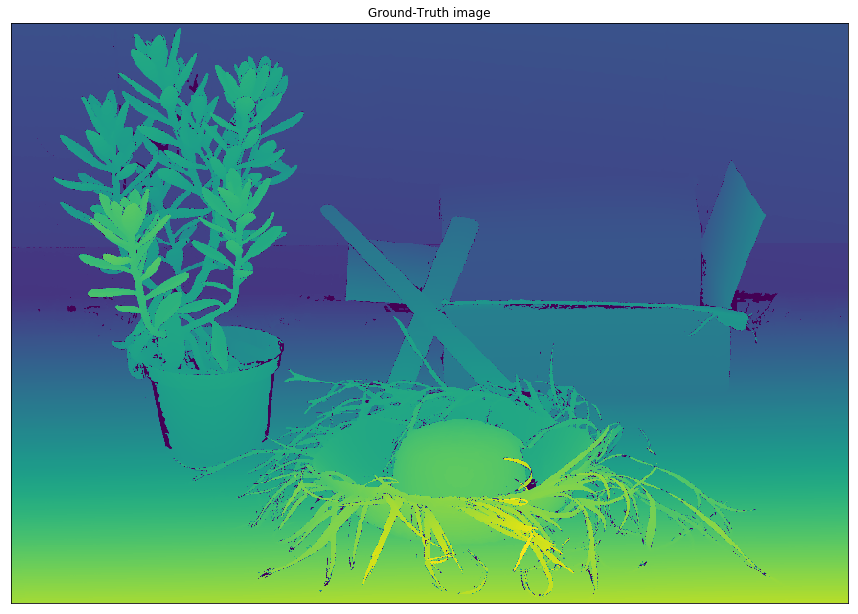

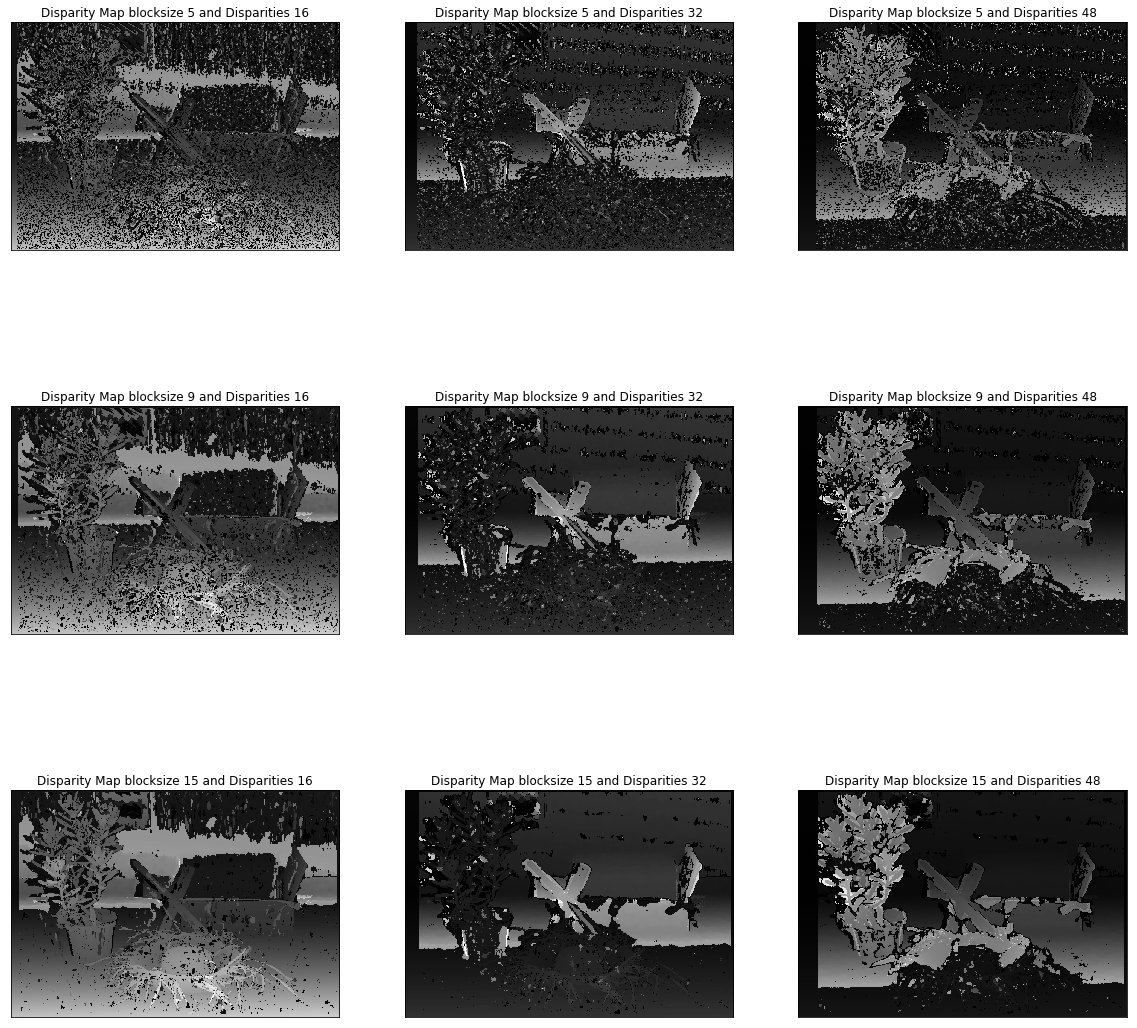

In [127]:
# load left and right images
groundtruth = read_pfm("disp0.pfm")
# groundtruth = read_pfm("disp1.pfm")
groundtruth[groundtruth==np.inf] = 0

# resize the ground truth image
groundtruth = cv2.resize(groundtruth, None, fx=0.3, fy=0.3)

# print(disparity[1].shape)

# mse_map = list()
# for disp in disparity:
#     disp = disparity[0]
#     mse = np.zeros(disp.shape)
#     for x in range(disp.shape[0]):
#         for y in range(disp.shape[1]):
#             d_pixel = disp[x][y]
#             g_pixel = groundtruth[x][y]
#             mse[x][y] = ((d_pixel-g_pixel)**2)
#     mse_map.append(mse)

mse_map = list()
for i in range(9):
    mse_map.append(((disparity[i]-groundtruth)**2))           
        
# print(len(mse_map))
    
plt.figure(figsize=(15,15))
plt.imshow(groundtruth)
plt.title('Ground-Truth image'), plt.xticks([]), plt.yticks([])
    
# print(min(mse))
    
plt.figure(figsize=(20,20))
for i in range(len(points)):
    plt.subplot(331+i), plt.imshow(mse_map[i], cmap="gray")
    plt.title("Disparity Map blocksize %d and Disparities %d" % (points[i]))
    plt.xticks([]), plt.yticks([])
plt.show()

# plt.figure(figsize=(20,20))
# for i in range(len(points)):
#     plt.subplot(331+i), plt.imshow(disparity[i],cmap="gray")
#     plt.title("Disparity Map blocksize %d and Disparities %d\n Mean Squared Difference %d" % (points[i] + (mse[i], )))
#     plt.xticks([]), plt.yticks([])
# plt.show()

##### Comment on the Error-maps

Starting at block size, the increase in blocksize helps to lower the noise around edges. At a higher block size the edges are more defined and are clearly notceable. However is does not aid in displaying points of texture as it smoothes out the objects and it does not differentiate the depth in the image. Therefore when the blocksize is increased too high it smooths out the texture too much.

On the other hand, increase in disparities helps define define the depth of the image and allows to demonstrate where theres are higher depths compared to lower ones. Additionally, it catches points of texture along the the image. For example the plant is an object with a lot of texture and the increase in disparities allow to the the amount of texture to be shown.

Taking a look at the error maps it demonstrates that for the case where we have a block size of 9 and 48 disparities will display the better error map. Looking at the properties of noth the block size and error maps it seems that it's better to have higher disparity but there is a max and min to the blocksize